# VecBallad：民谣，从自然语言到机器语言

民谣是一种文化现象。与流行音乐不同的是，民谣往往反映的是一个民族较为内核的情感流露，与感情色彩和特定习尚密切相关。之前随着赵雷《成都》的热潮兴起，国语民谣的热度得到升温。

人们对民谣的看法不一。喜欢民谣的人来说，听一首民谣仿佛就打开了通往灵魂的路；但对于不感冒的人来说，对比起流行音乐，民谣往往无法抓住人心，也有说法认为，**民谣就是“姑娘”“青春”“北方/南方”“吉他”“流浪”等词汇的任意组装**。

那么，我们好奇，在计算机看来，民谣究竟是什么呢？在这里，你将看到：

+ 数据获取
+ 热词分析（地点/时间）
+ 歌手画像（离散/连续）
+ 风格模仿

## 归档说明
由于涉及代码较多，大部分代码写在目录下，而notebook上可以直接调用节省内容。

+ `checkpoint`存储模型文件（词向量模型）

+ `config`相关配置，如停词表、歌手列表、地图数据、城市及经纬度列表等，供程序加载使用

+ `figures`图片素材

+ `songs`歌词文件。每个歌手一个文件夹。

+ `statistic`统计结果。词表、分词结果、整句结果

+ `vec_ballad`相关代码

## 数据获取
通过爬取网易云歌词数据获得民谣数据库。包含

+ 45位民谣歌手
+ 每位歌手Top 50（有些歌手不足50首单曲）热曲

In [1]:
# 爬虫运行，耗时较长，开注释需谨慎，双核i5约10分钟

from vec_ballad.crawler import NetEaseSongListSpider, NetEaseLyricsSpider
import scrapy

# process = scrapy.crawler.CrawlerProcess({
#     'USER_AGENT': 'Mozilla/4.0 (compatible; MSIE 7.0; Windows NT 5.1)'
# })
# process.crawl(NetEaseSongListSpider, '')
# process.start()

# spider = NetEaseLyricsSpider(root='')
# spider.parse() 

INFO:scrapy.utils.log:Scrapy 1.5.0 started (bot: scrapybot)
2018-06-08 10:30:41 [scrapy.utils.log] INFO: Scrapy 1.5.0 started (bot: scrapybot)
INFO:scrapy.utils.log:Versions: lxml 4.2.1.0, libxml2 2.9.8, cssselect 1.0.3, parsel 1.4.0, w3lib 1.19.0, Twisted 18.4.0, Python 3.6.4 (default, Mar  9 2018, 23:15:12) - [GCC 4.2.1 Compatible Apple LLVM 9.0.0 (clang-900.0.39.2)], pyOpenSSL 17.5.0 (OpenSSL 1.1.0h  27 Mar 2018), cryptography 2.2.2, Platform Darwin-17.5.0-x86_64-i386-64bit
2018-06-08 10:30:41 [scrapy.utils.log] INFO: Versions: lxml 4.2.1.0, libxml2 2.9.8, cssselect 1.0.3, parsel 1.4.0, w3lib 1.19.0, Twisted 18.4.0, Python 3.6.4 (default, Mar  9 2018, 23:15:12) - [GCC 4.2.1 Compatible Apple LLVM 9.0.0 (clang-900.0.39.2)], pyOpenSSL 17.5.0 (OpenSSL 1.1.0h  27 Mar 2018), cryptography 2.2.2, Platform Darwin-17.5.0-x86_64-i386-64bit
INFO:scrapy.crawler:Overridden settings: {'USER_AGENT': 'Mozilla/4.0 (compatible; MSIE 7.0; Windows NT 5.1)'}
2018-06-08 10:30:41 [scrapy.crawler] INFO: Ove

crawling url: https://music.163.com/artist?id=1007170
crawling url: https://music.163.com/artist?id=1039895
crawling url: https://music.163.com/artist?id=8103
crawling url: https://music.163.com/artist?id=1071031
crawling url: https://music.163.com/artist?id=1058228
crawling url: https://music.163.com/artist?id=6731

DEBUG:scrapy.core.engine:Crawled (200) <GET https://music.163.com/artist?id=1007170> (referer: None)
2018-06-08 10:30:41 [scrapy.core.engine] DEBUG: Crawled (200) <GET https://music.163.com/artist?id=1007170> (referer: None)



crawling url: https://music.163.com/artist?id=4592
crawling url: https://music.163.com/artist?id=4903
crawling url: https://music.163.com/artist?id=973004
crawling url: https://music.163.com/artist?id=1083049
crawling url: https://music.163.com/artist?id=5073
crawling url: https://music.163.com/artist?id=3681
crawling url: https://music.163.com/artist?id=12977
crawling url: https://music.163.com/artist?id=7217
crawling url: https://music.163.com/artist?id=6729
crawling url: https://music.163.com/artist?id=4721
crawling url: https://music.163.com/artist?id=10557

DEBUG:scrapy.core.engine:Crawled (200) <GET https://music.163.com/artist?id=973004> (referer: None)
2018-06-08 10:30:42 [scrapy.core.engine] DEBUG: Crawled (200) <GET https://music.163.com/artist?id=973004> (referer: None)



crawling url: https://music.163.com/artist?id=816087

DEBUG:scrapy.core.engine:Crawled (200) <GET https://music.163.com/artist?id=1083049> (referer: None)
2018-06-08 10:30:42 [scrapy.core.engine] DEBUG: Crawled (200) <GET https://music.163.com/artist?id=1083049> (referer: None)



crawling url: https://music.163.com/artist?id=5345

DEBUG:scrapy.core.engine:Crawled (200) <GET https://music.163.com/artist?id=5073> (referer: None)
2018-06-08 10:30:42 [scrapy.core.engine] DEBUG: Crawled (200) <GET https://music.163.com/artist?id=5073> (referer: None)



crawling url: https://music.163.com/artist?id=3683

DEBUG:scrapy.core.engine:Crawled (200) <GET https://music.163.com/artist?id=8103> (referer: None)
2018-06-08 10:30:42 [scrapy.core.engine] DEBUG: Crawled (200) <GET https://music.163.com/artist?id=8103> (referer: None)
DEBUG:scrapy.core.engine:Crawled (200) <GET https://music.163.com/artist?id=3681> (referer: None)
2018-06-08 10:30:43 [scrapy.core.engine] DEBUG: Crawled (200) <GET https://music.163.com/artist?id=3681> (referer: None)



crawling url: https://music.163.com/artist?id=6455
crawling url: https://music.163.com/artist?id=896927

DEBUG:scrapy.core.engine:Crawled (200) <GET https://music.163.com/artist?id=12977> (referer: None)
2018-06-08 10:30:43 [scrapy.core.engine] DEBUG: Crawled (200) <GET https://music.163.com/artist?id=12977> (referer: None)
DEBUG:scrapy.core.engine:Crawled (200) <GET https://music.163.com/artist?id=6729> (referer: None)
2018-06-08 10:30:43 [scrapy.core.engine] DEBUG: Crawled (200) <GET https://music.163.com/artist?id=6729> (referer: None)



crawling url: https://music.163.com/artist?id=802016
crawling url: https://music.163.com/artist?id=1050282

DEBUG:scrapy.core.engine:Crawled (200) <GET https://music.163.com/artist?id=7217> (referer: None)
2018-06-08 10:30:43 [scrapy.core.engine] DEBUG: Crawled (200) <GET https://music.163.com/artist?id=7217> (referer: None)



crawling url: https://music.163.com/artist?id=1047028

DEBUG:scrapy.core.engine:Crawled (200) <GET https://music.163.com/artist?id=4721> (referer: None)
2018-06-08 10:30:43 [scrapy.core.engine] DEBUG: Crawled (200) <GET https://music.163.com/artist?id=4721> (referer: None)



crawling url: https://music.163.com/artist?id=3695

DEBUG:scrapy.core.engine:Crawled (200) <GET https://music.163.com/artist?id=10557> (referer: None)
2018-06-08 10:30:43 [scrapy.core.engine] DEBUG: Crawled (200) <GET https://music.163.com/artist?id=10557> (referer: None)



crawling url: https://music.163.com/artist?id=12437

DEBUG:scrapy.core.engine:Crawled (200) <GET https://music.163.com/artist?id=6731> (referer: None)
2018-06-08 10:30:43 [scrapy.core.engine] DEBUG: Crawled (200) <GET https://music.163.com/artist?id=6731> (referer: None)



crawling url: https://music.163.com/artist?id=711683

DEBUG:scrapy.core.engine:Crawled (200) <GET https://music.163.com/artist?id=816087> (referer: None)
2018-06-08 10:30:43 [scrapy.core.engine] DEBUG: Crawled (200) <GET https://music.163.com/artist?id=816087> (referer: None)



crawling url: https://music.163.com/artist?id=7192

DEBUG:scrapy.core.engine:Crawled (200) <GET https://music.163.com/artist?id=5345> (referer: None)
2018-06-08 10:30:44 [scrapy.core.engine] DEBUG: Crawled (200) <GET https://music.163.com/artist?id=5345> (referer: None)



crawling url: https://music.163.com/artist?id=816103

DEBUG:scrapy.core.engine:Crawled (200) <GET https://music.163.com/artist?id=3683> (referer: None)
2018-06-08 10:30:44 [scrapy.core.engine] DEBUG: Crawled (200) <GET https://music.163.com/artist?id=3683> (referer: None)



crawling url: https://music.163.com/artist?id=11359

DEBUG:scrapy.core.engine:Crawled (200) <GET https://music.163.com/artist?id=6455> (referer: None)
2018-06-08 10:30:44 [scrapy.core.engine] DEBUG: Crawled (200) <GET https://music.163.com/artist?id=6455> (referer: None)



crawling url: https://music.163.com/artist?id=11370

DEBUG:scrapy.core.engine:Crawled (200) <GET https://music.163.com/artist?id=896927> (referer: None)
2018-06-08 10:30:44 [scrapy.core.engine] DEBUG: Crawled (200) <GET https://music.163.com/artist?id=896927> (referer: None)



crawling url: https://music.163.com/artist?id=1205015

DEBUG:scrapy.core.engine:Crawled (200) <GET https://music.163.com/artist?id=802016> (referer: None)
2018-06-08 10:30:44 [scrapy.core.engine] DEBUG: Crawled (200) <GET https://music.163.com/artist?id=802016> (referer: None)



crawling url: https://music.163.com/artist?id=13421

DEBUG:scrapy.core.engine:Crawled (200) <GET https://music.163.com/artist?id=1050282> (referer: None)
2018-06-08 10:30:44 [scrapy.core.engine] DEBUG: Crawled (200) <GET https://music.163.com/artist?id=1050282> (referer: None)



crawling url: https://music.163.com/artist?id=4171

DEBUG:scrapy.core.engine:Crawled (200) <GET https://music.163.com/artist?id=1047028> (referer: None)
2018-06-08 10:30:44 [scrapy.core.engine] DEBUG: Crawled (200) <GET https://music.163.com/artist?id=1047028> (referer: None)



crawling url: https://music.163.com/artist?id=1195028

DEBUG:scrapy.core.engine:Crawled (200) <GET https://music.163.com/artist?id=12437> (referer: None)
2018-06-08 10:30:44 [scrapy.core.engine] DEBUG: Crawled (200) <GET https://music.163.com/artist?id=12437> (referer: None)



crawling url: https://music.163.com/artist?id=5866

DEBUG:scrapy.core.engine:Crawled (200) <GET https://music.163.com/artist?id=3695> (referer: None)
2018-06-08 10:30:44 [scrapy.core.engine] DEBUG: Crawled (200) <GET https://music.163.com/artist?id=3695> (referer: None)
DEBUG:scrapy.core.engine:Crawled (200) <GET https://music.163.com/artist?id=711683> (referer: None)
2018-06-08 10:30:44 [scrapy.core.engine] DEBUG: Crawled (200) <GET https://music.163.com/artist?id=711683> (referer: None)



crawling url: https://music.163.com/artist?id=12059075
crawling url: https://music.163.com/artist?id=12716

DEBUG:scrapy.core.engine:Crawled (200) <GET https://music.163.com/artist?id=1071031> (referer: None)
2018-06-08 10:30:44 [scrapy.core.engine] DEBUG: Crawled (200) <GET https://music.163.com/artist?id=1071031> (referer: None)



crawling url: https://music.163.com/artist?id=6474

DEBUG:scrapy.core.engine:Crawled (200) <GET https://music.163.com/artist?id=816103> (referer: None)
2018-06-08 10:30:44 [scrapy.core.engine] DEBUG: Crawled (200) <GET https://music.163.com/artist?id=816103> (referer: None)



crawling url: https://music.163.com/artist?id=12258472

DEBUG:scrapy.core.engine:Crawled (200) <GET https://music.163.com/artist?id=7192> (referer: None)
2018-06-08 10:30:44 [scrapy.core.engine] DEBUG: Crawled (200) <GET https://music.163.com/artist?id=7192> (referer: None)
DEBUG:scrapy.core.engine:Crawled (200) <GET https://music.163.com/artist?id=11359> (referer: None)
2018-06-08 10:30:45 [scrapy.core.engine] DEBUG: Crawled (200) <GET https://music.163.com/artist?id=11359> (referer: None)



crawling url: https://music.163.com/artist?id=7215
crawling url: https://music.163.com/artist?id=896894

DEBUG:scrapy.core.engine:Crawled (200) <GET https://music.163.com/artist?id=11370> (referer: None)
2018-06-08 10:30:45 [scrapy.core.engine] DEBUG: Crawled (200) <GET https://music.163.com/artist?id=11370> (referer: None)
DEBUG:scrapy.core.engine:Crawled (200) <GET https://music.163.com/artist?id=1205015> (referer: None)
2018-06-08 10:30:45 [scrapy.core.engine] DEBUG: Crawled (200) <GET https://music.163.com/artist?id=1205015> (referer: None)



crawling url: https://music.163.com/artist?id=4934
crawling url: https://music.163.com/artist?id=3071

DEBUG:scrapy.core.engine:Crawled (200) <GET https://music.163.com/artist?id=13421> (referer: None)
2018-06-08 10:30:45 [scrapy.core.engine] DEBUG: Crawled (200) <GET https://music.163.com/artist?id=13421> (referer: None)



crawling url: https://music.163.com/artist?id=13416

DEBUG:scrapy.core.engine:Crawled (200) <GET https://music.163.com/artist?id=4171> (referer: None)
2018-06-08 10:30:45 [scrapy.core.engine] DEBUG: Crawled (200) <GET https://music.163.com/artist?id=4171> (referer: None)
DEBUG:scrapy.core.engine:Crawled (200) <GET https://music.163.com/artist?id=5866> (referer: None)
2018-06-08 10:30:45 [scrapy.core.engine] DEBUG: Crawled (200) <GET https://music.163.com/artist?id=5866> (referer: None)
DEBUG:scrapy.core.engine:Crawled (200) <GET https://music.163.com/artist?id=1195028> (referer: None)
2018-06-08 10:30:45 [scrapy.core.engine] DEBUG: Crawled (200) <GET https://music.163.com/artist?id=1195028> (referer: None)
DEBUG:scrapy.core.engine:Crawled (200) <GET https://music.163.com/artist?id=12059075> (referer: None)
2018-06-08 10:30:45 [scrapy.core.engine] DEBUG: Crawled (200) <GET https://music.163.com/artist?id=12059075> (referer: None)
DEBUG:scrapy.core.engine:Crawled (200) <GET https://music.163.com/artist?id=12716> (referer: None)
2018-06-08 


crawling 陈粒: 小半

DEBUG:urllib3.connectionpool:Starting new HTTP connection (1): music.163.com
2018-06-08 10:30:49 [urllib3.connectionpool] DEBUG: Starting new HTTP connection (1): music.163.com
DEBUG:urllib3.connectionpool:http://music.163.com:80 "GET /api/song/lyric?id=421423806&lv=1&kv=1&tv=-1 HTTP/1.1" 200 None
2018-06-08 10:30:49 [urllib3.connectionpool] DEBUG: http://music.163.com:80 "GET /api/song/lyric?id=421423806&lv=1&kv=1&tv=-1 HTTP/1.1" 200 None



crawling 陈粒: 易燃易爆炸

DEBUG:urllib3.connectionpool:Starting new HTTP connection (1): music.163.com
2018-06-08 10:30:49 [urllib3.connectionpool] DEBUG: Starting new HTTP connection (1): music.163.com
DEBUG:urllib3.connectionpool:http://music.163.com:80 "GET /api/song/lyric?id=30431376&lv=1&kv=1&tv=-1 HTTP/1.1" 200 None
2018-06-08 10:30:50 [urllib3.connectionpool] DEBUG: http://music.163.com:80 "GET /api/song/lyric?id=30431376&lv=1&kv=1&tv=-1 HTTP/1.1" 200 None



crawling 陈粒: 走马

DEBUG:urllib3.connectionpool:Starting new HTTP connection (1): music.163.com
2018-06-08 10:30:50 [urllib3.connectionpool] DEBUG: Starting new HTTP connection (1): music.163.com
DEBUG:urllib3.connectionpool:http://music.163.com:80 "GET /api/song/lyric?id=30431367&lv=1&kv=1&tv=-1 HTTP/1.1" 200 None
2018-06-08 10:30:50 [urllib3.connectionpool] DEBUG: http://music.163.com:80 "GET /api/song/lyric?id=30431367&lv=1&kv=1&tv=-1 HTTP/1.1" 200 None



crawling 陈粒: 虚拟

DEBUG:urllib3.connectionpool:Starting new HTTP connection (1): music.163.com
2018-06-08 10:30:50 [urllib3.connectionpool] DEBUG: Starting new HTTP connection (1): music.163.com
DEBUG:urllib3.connectionpool:http://music.163.com:80 "GET /api/song/lyric?id=421423808&lv=1&kv=1&tv=-1 HTTP/1.1" 200 None
2018-06-08 10:30:50 [urllib3.connectionpool] DEBUG: http://music.163.com:80 "GET /api/song/lyric?id=421423808&lv=1&kv=1&tv=-1 HTTP/1.1" 200 None



crawling 陈粒: 奇妙能力歌

DEBUG:urllib3.connectionpool:Starting new HTTP connection (1): music.163.com
2018-06-08 10:30:50 [urllib3.connectionpool] DEBUG: Starting new HTTP connection (1): music.163.com
DEBUG:urllib3.connectionpool:http://music.163.com:80 "GET /api/song/lyric?id=29431066&lv=1&kv=1&tv=-1 HTTP/1.1" 200 None
2018-06-08 10:30:50 [urllib3.connectionpool] DEBUG: http://music.163.com:80 "GET /api/song/lyric?id=29431066&lv=1&kv=1&tv=-1 HTTP/1.1" 200 None



crawling 陈粒: 光

DEBUG:urllib3.connectionpool:Starting new HTTP connection (1): music.163.com
2018-06-08 10:30:51 [urllib3.connectionpool] DEBUG: Starting new HTTP connection (1): music.163.com
DEBUG:urllib3.connectionpool:http://music.163.com:80 "GET /api/song/lyric?id=30431364&lv=1&kv=1&tv=-1 HTTP/1.1" 200 None
2018-06-08 10:30:51 [urllib3.connectionpool] DEBUG: http://music.163.com:80 "GET /api/song/lyric?id=30431364&lv=1&kv=1&tv=-1 HTTP/1.1" 200 None



crawling 陈粒: 历历万乡

DEBUG:urllib3.connectionpool:Starting new HTTP connection (1): music.163.com
2018-06-08 10:30:51 [urllib3.connectionpool] DEBUG: Starting new HTTP connection (1): music.163.com
DEBUG:urllib3.connectionpool:http://music.163.com:80 "GET /api/song/lyric?id=29535531&lv=1&kv=1&tv=-1 HTTP/1.1" 200 None
2018-06-08 10:30:52 [urllib3.connectionpool] DEBUG: http://music.163.com:80 "GET /api/song/lyric?id=29535531&lv=1&kv=1&tv=-1 HTTP/1.1" 200 None



crawling 陈粒: 性空山

DEBUG:urllib3.connectionpool:Starting new HTTP connection (1): music.163.com
2018-06-08 10:30:52 [urllib3.connectionpool] DEBUG: Starting new HTTP connection (1): music.163.com
DEBUG:urllib3.connectionpool:http://music.163.com:80 "GET /api/song/lyric?id=30051774&lv=1&kv=1&tv=-1 HTTP/1.1" 200 None
2018-06-08 10:30:52 [urllib3.connectionpool] DEBUG: http://music.163.com:80 "GET /api/song/lyric?id=30051774&lv=1&kv=1&tv=-1 HTTP/1.1" 200 None



crawling 陈粒: 祝星

DEBUG:urllib3.connectionpool:Starting new HTTP connection (1): music.163.com
2018-06-08 10:30:52 [urllib3.connectionpool] DEBUG: Starting new HTTP connection (1): music.163.com
DEBUG:urllib3.connectionpool:http://music.163.com:80 "GET /api/song/lyric?id=29753832&lv=1&kv=1&tv=-1 HTTP/1.1" 200 None
2018-06-08 10:30:52 [urllib3.connectionpool] DEBUG: http://music.163.com:80 "GET /api/song/lyric?id=29753832&lv=1&kv=1&tv=-1 HTTP/1.1" 200 None



crawling 陈粒: 种种

DEBUG:urllib3.connectionpool:Starting new HTTP connection (1): music.163.com
2018-06-08 10:30:52 [urllib3.connectionpool] DEBUG: Starting new HTTP connection (1): music.163.com
DEBUG:urllib3.connectionpool:http://music.163.com:80 "GET /api/song/lyric?id=31152310&lv=1&kv=1&tv=-1 HTTP/1.1" 200 None
2018-06-08 10:30:52 [urllib3.connectionpool] DEBUG: http://music.163.com:80 "GET /api/song/lyric?id=31152310&lv=1&kv=1&tv=-1 HTTP/1.1" 200 None



crawling 陈粒: 自渡

DEBUG:urllib3.connectionpool:Starting new HTTP connection (1): music.163.com
2018-06-08 10:30:52 [urllib3.connectionpool] DEBUG: Starting new HTTP connection (1): music.163.com
DEBUG:urllib3.connectionpool:http://music.163.com:80 "GET /api/song/lyric?id=421563717&lv=1&kv=1&tv=-1 HTTP/1.1" 200 None
2018-06-08 10:30:52 [urllib3.connectionpool] DEBUG: http://music.163.com:80 "GET /api/song/lyric?id=421563717&lv=1&kv=1&tv=-1 HTTP/1.1" 200 None



crawling 陈粒: 绝对占有 相对自由

DEBUG:urllib3.connectionpool:Starting new HTTP connection (1): music.163.com
2018-06-08 10:30:52 [urllib3.connectionpool] DEBUG: Starting new HTTP connection (1): music.163.com
DEBUG:urllib3.connectionpool:http://music.163.com:80 "GET /api/song/lyric?id=30431377&lv=1&kv=1&tv=-1 HTTP/1.1" 200 None
2018-06-08 10:30:53 [urllib3.connectionpool] DEBUG: http://music.163.com:80 "GET /api/song/lyric?id=30431377&lv=1&kv=1&tv=-1 HTTP/1.1" 200 None



crawling 陈粒: 如也

DEBUG:urllib3.connectionpool:Starting new HTTP connection (1): music.163.com
2018-06-08 10:30:53 [urllib3.connectionpool] DEBUG: Starting new HTTP connection (1): music.163.com
DEBUG:urllib3.connectionpool:http://music.163.com:80 "GET /api/song/lyric?id=30431374&lv=1&kv=1&tv=-1 HTTP/1.1" 200 None
2018-06-08 10:30:53 [urllib3.connectionpool] DEBUG: http://music.163.com:80 "GET /api/song/lyric?id=30431374&lv=1&kv=1&tv=-1 HTTP/1.1" 200 None



crawling 陈粒: 妙龄童

DEBUG:urllib3.connectionpool:Starting new HTTP connection (1): music.163.com
2018-06-08 10:30:53 [urllib3.connectionpool] DEBUG: Starting new HTTP connection (1): music.163.com
DEBUG:urllib3.connectionpool:http://music.163.com:80 "GET /api/song/lyric?id=29979822&lv=1&kv=1&tv=-1 HTTP/1.1" 200 None
2018-06-08 10:30:53 [urllib3.connectionpool] DEBUG: http://music.163.com:80 "GET /api/song/lyric?id=29979822&lv=1&kv=1&tv=-1 HTTP/1.1" 200 None



crawling 陈粒: 芳草地

DEBUG:urllib3.connectionpool:Starting new HTTP connection (1): music.163.com
2018-06-08 10:30:53 [urllib3.connectionpool] DEBUG: Starting new HTTP connection (1): music.163.com
DEBUG:urllib3.connectionpool:http://music.163.com:80 "GET /api/song/lyric?id=421563711&lv=1&kv=1&tv=-1 HTTP/1.1" 200 None
2018-06-08 10:30:53 [urllib3.connectionpool] DEBUG: http://music.163.com:80 "GET /api/song/lyric?id=421563711&lv=1&kv=1&tv=-1 HTTP/1.1" 200 None



crawling 陈粒: 不灭

DEBUG:urllib3.connectionpool:Starting new HTTP connection (1): music.163.com
2018-06-08 10:30:53 [urllib3.connectionpool] DEBUG: Starting new HTTP connection (1): music.163.com
DEBUG:urllib3.connectionpool:http://music.163.com:80 "GET /api/song/lyric?id=30431365&lv=1&kv=1&tv=-1 HTTP/1.1" 200 None
2018-06-08 10:30:53 [urllib3.connectionpool] DEBUG: http://music.163.com:80 "GET /api/song/lyric?id=30431365&lv=1&kv=1&tv=-1 HTTP/1.1" 200 None



crawling 陈粒: 桥豆麻袋

DEBUG:urllib3.connectionpool:Starting new HTTP connection (1): music.163.com
2018-06-08 10:30:53 [urllib3.connectionpool] DEBUG: Starting new HTTP connection (1): music.163.com
DEBUG:urllib3.connectionpool:http://music.163.com:80 "GET /api/song/lyric?id=421563713&lv=1&kv=1&tv=-1 HTTP/1.1" 200 None
2018-06-08 10:30:53 [urllib3.connectionpool] DEBUG: http://music.163.com:80 "GET /api/song/lyric?id=421563713&lv=1&kv=1&tv=-1 HTTP/1.1" 200 None



crawling 陈粒: 当我在这里

DEBUG:urllib3.connectionpool:Starting new HTTP connection (1): music.163.com
2018-06-08 10:30:53 [urllib3.connectionpool] DEBUG: Starting new HTTP connection (1): music.163.com
DEBUG:urllib3.connectionpool:http://music.163.com:80 "GET /api/song/lyric?id=442315773&lv=1&kv=1&tv=-1 HTTP/1.1" 200 None
2018-06-08 10:30:53 [urllib3.connectionpool] DEBUG: http://music.163.com:80 "GET /api/song/lyric?id=442315773&lv=1&kv=1&tv=-1 HTTP/1.1" 200 None



crawling 陈粒: 戏台

DEBUG:urllib3.connectionpool:Starting new HTTP connection (1): music.163.com
2018-06-08 10:30:53 [urllib3.connectionpool] DEBUG: Starting new HTTP connection (1): music.163.com
DEBUG:urllib3.connectionpool:http://music.163.com:80 "GET /api/song/lyric?id=461301042&lv=1&kv=1&tv=-1 HTTP/1.1" 200 None
2018-06-08 10:30:53 [urllib3.connectionpool] DEBUG: http://music.163.com:80 "GET /api/song/lyric?id=461301042&lv=1&kv=1&tv=-1 HTTP/1.1" 200 None



crawling 陈粒: 七楼

DEBUG:urllib3.connectionpool:Starting new HTTP connection (1): music.163.com
2018-06-08 10:30:53 [urllib3.connectionpool] DEBUG: Starting new HTTP connection (1): music.163.com
DEBUG:urllib3.connectionpool:http://music.163.com:80 "GET /api/song/lyric?id=30431373&lv=1&kv=1&tv=-1 HTTP/1.1" 200 None
2018-06-08 10:30:53 [urllib3.connectionpool] DEBUG: http://music.163.com:80 "GET /api/song/lyric?id=30431373&lv=1&kv=1&tv=-1 HTTP/1.1" 200 None



crawling 陈粒: 花开

DEBUG:urllib3.connectionpool:Starting new HTTP connection (1): music.163.com
2018-06-08 10:30:53 [urllib3.connectionpool] DEBUG: Starting new HTTP connection (1): music.163.com
DEBUG:urllib3.connectionpool:http://music.163.com:80 "GET /api/song/lyric?id=545592498&lv=1&kv=1&tv=-1 HTTP/1.1" 200 None
2018-06-08 10:30:53 [urllib3.connectionpool] DEBUG: http://music.163.com:80 "GET /api/song/lyric?id=545592498&lv=1&kv=1&tv=-1 HTTP/1.1" 200 None



crawling 陈粒: 远辰

DEBUG:urllib3.connectionpool:Starting new HTTP connection (1): music.163.com
2018-06-08 10:30:53 [urllib3.connectionpool] DEBUG: Starting new HTTP connection (1): music.163.com
DEBUG:urllib3.connectionpool:http://music.163.com:80 "GET /api/song/lyric?id=33525647&lv=1&kv=1&tv=-1 HTTP/1.1" 200 None
2018-06-08 10:30:56 [urllib3.connectionpool] DEBUG: http://music.163.com:80 "GET /api/song/lyric?id=33525647&lv=1&kv=1&tv=-1 HTTP/1.1" 200 None



crawling 陈粒: 正趣果上果

DEBUG:urllib3.connectionpool:Starting new HTTP connection (1): music.163.com
2018-06-08 10:30:56 [urllib3.connectionpool] DEBUG: Starting new HTTP connection (1): music.163.com
DEBUG:urllib3.connectionpool:http://music.163.com:80 "GET /api/song/lyric?id=30431370&lv=1&kv=1&tv=-1 HTTP/1.1" 200 None
2018-06-08 10:30:56 [urllib3.connectionpool] DEBUG: http://music.163.com:80 "GET /api/song/lyric?id=30431370&lv=1&kv=1&tv=-1 HTTP/1.1" 200 None



crawling 陈粒: 睡吧

DEBUG:urllib3.connectionpool:Starting new HTTP connection (1): music.163.com
2018-06-08 10:30:56 [urllib3.connectionpool] DEBUG: Starting new HTTP connection (1): music.163.com
DEBUG:urllib3.connectionpool:http://music.163.com:80 "GET /api/song/lyric?id=421563718&lv=1&kv=1&tv=-1 HTTP/1.1" 200 None
2018-06-08 10:30:56 [urllib3.connectionpool] DEBUG: http://music.163.com:80 "GET /api/song/lyric?id=421563718&lv=1&kv=1&tv=-1 HTTP/1.1" 200 None



crawling 陈粒: 大梦

DEBUG:urllib3.connectionpool:Starting new HTTP connection (1): music.163.com
2018-06-08 10:30:56 [urllib3.connectionpool] DEBUG: Starting new HTTP connection (1): music.163.com
DEBUG:urllib3.connectionpool:http://music.163.com:80 "GET /api/song/lyric?id=421563715&lv=1&kv=1&tv=-1 HTTP/1.1" 200 None
2018-06-08 10:30:56 [urllib3.connectionpool] DEBUG: http://music.163.com:80 "GET /api/song/lyric?id=421563715&lv=1&kv=1&tv=-1 HTTP/1.1" 200 None



crawling 陈粒: 没完

DEBUG:urllib3.connectionpool:Starting new HTTP connection (1): music.163.com
2018-06-08 10:30:56 [urllib3.connectionpool] DEBUG: Starting new HTTP connection (1): music.163.com
DEBUG:urllib3.connectionpool:http://music.163.com:80 "GET /api/song/lyric?id=29812654&lv=1&kv=1&tv=-1 HTTP/1.1" 200 None
2018-06-08 10:30:56 [urllib3.connectionpool] DEBUG: http://music.163.com:80 "GET /api/song/lyric?id=29812654&lv=1&kv=1&tv=-1 HTTP/1.1" 200 None



crawling 陈粒: 脱缰

DEBUG:urllib3.connectionpool:Starting new HTTP connection (1): music.163.com
2018-06-08 10:30:56 [urllib3.connectionpool] DEBUG: Starting new HTTP connection (1): music.163.com
DEBUG:urllib3.connectionpool:http://music.163.com:80 "GET /api/song/lyric?id=30431369&lv=1&kv=1&tv=-1 HTTP/1.1" 200 None
2018-06-08 10:30:56 [urllib3.connectionpool] DEBUG: http://music.163.com:80 "GET /api/song/lyric?id=30431369&lv=1&kv=1&tv=-1 HTTP/1.1" 200 None



crawling 陈粒: ★

DEBUG:urllib3.connectionpool:Starting new HTTP connection (1): music.163.com
2018-06-08 10:30:56 [urllib3.connectionpool] DEBUG: Starting new HTTP connection (1): music.163.com
DEBUG:urllib3.connectionpool:http://music.163.com:80 "GET /api/song/lyric?id=29753852&lv=1&kv=1&tv=-1 HTTP/1.1" 200 None
2018-06-08 10:30:56 [urllib3.connectionpool] DEBUG: http://music.163.com:80 "GET /api/song/lyric?id=29753852&lv=1&kv=1&tv=-1 HTTP/1.1" 200 None



crawling 陈粒: 绝对占有，相对自由

DEBUG:urllib3.connectionpool:Starting new HTTP connection (1): music.163.com
2018-06-08 10:30:56 [urllib3.connectionpool] DEBUG: Starting new HTTP connection (1): music.163.com
DEBUG:urllib3.connectionpool:http://music.163.com:80 "GET /api/song/lyric?id=29431061&lv=1&kv=1&tv=-1 HTTP/1.1" 200 None
2018-06-08 10:30:56 [urllib3.connectionpool] DEBUG: http://music.163.com:80 "GET /api/song/lyric?id=29431061&lv=1&kv=1&tv=-1 HTTP/1.1" 200 None



crawling 陈粒: COSMOS

DEBUG:urllib3.connectionpool:Starting new HTTP connection (1): music.163.com
2018-06-08 10:30:56 [urllib3.connectionpool] DEBUG: Starting new HTTP connection (1): music.163.com
DEBUG:urllib3.connectionpool:http://music.163.com:80 "GET /api/song/lyric?id=521784136&lv=1&kv=1&tv=-1 HTTP/1.1" 200 None
2018-06-08 10:30:56 [urllib3.connectionpool] DEBUG: http://music.163.com:80 "GET /api/song/lyric?id=521784136&lv=1&kv=1&tv=-1 HTTP/1.1" 200 None



crawling 陈粒: 不妙

DEBUG:urllib3.connectionpool:Starting new HTTP connection (1): music.163.com
2018-06-08 10:30:56 [urllib3.connectionpool] DEBUG: Starting new HTTP connection (1): music.163.com
DEBUG:urllib3.connectionpool:http://music.163.com:80 "GET /api/song/lyric?id=31789055&lv=1&kv=1&tv=-1 HTTP/1.1" 200 None
2018-06-08 10:30:56 [urllib3.connectionpool] DEBUG: http://music.163.com:80 "GET /api/song/lyric?id=31789055&lv=1&kv=1&tv=-1 HTTP/1.1" 200 None



crawling 陈粒: 五言

DEBUG:urllib3.connectionpool:Starting new HTTP connection (1): music.163.com
2018-06-08 10:30:57 [urllib3.connectionpool] DEBUG: Starting new HTTP connection (1): music.163.com
DEBUG:urllib3.connectionpool:http://music.163.com:80 "GET /api/song/lyric?id=30431372&lv=1&kv=1&tv=-1 HTTP/1.1" 200 None
2018-06-08 10:30:57 [urllib3.connectionpool] DEBUG: http://music.163.com:80 "GET /api/song/lyric?id=30431372&lv=1&kv=1&tv=-1 HTTP/1.1" 200 None



crawling 陈粒: 爱若

DEBUG:urllib3.connectionpool:Starting new HTTP connection (1): music.163.com
2018-06-08 10:30:57 [urllib3.connectionpool] DEBUG: Starting new HTTP connection (1): music.163.com
DEBUG:urllib3.connectionpool:http://music.163.com:80 "GET /api/song/lyric?id=36308884&lv=1&kv=1&tv=-1 HTTP/1.1" 200 None
2018-06-08 10:30:57 [urllib3.connectionpool] DEBUG: http://music.163.com:80 "GET /api/song/lyric?id=36308884&lv=1&kv=1&tv=-1 HTTP/1.1" 200 None



crawling 陈粒: 新年快乐

DEBUG:urllib3.connectionpool:Starting new HTTP connection (1): music.163.com
2018-06-08 10:30:57 [urllib3.connectionpool] DEBUG: Starting new HTTP connection (1): music.163.com
DEBUG:urllib3.connectionpool:http://music.163.com:80 "GET /api/song/lyric?id=524148556&lv=1&kv=1&tv=-1 HTTP/1.1" 200 None
2018-06-08 10:30:57 [urllib3.connectionpool] DEBUG: http://music.163.com:80 "GET /api/song/lyric?id=524148556&lv=1&kv=1&tv=-1 HTTP/1.1" 200 None



crawling 陈粒: 贪得

DEBUG:urllib3.connectionpool:Starting new HTTP connection (1): music.163.com
2018-06-08 10:30:57 [urllib3.connectionpool] DEBUG: Starting new HTTP connection (1): music.163.com
DEBUG:urllib3.connectionpool:http://music.163.com:80 "GET /api/song/lyric?id=30431378&lv=1&kv=1&tv=-1 HTTP/1.1" 200 None
2018-06-08 10:30:57 [urllib3.connectionpool] DEBUG: http://music.163.com:80 "GET /api/song/lyric?id=30431378&lv=1&kv=1&tv=-1 HTTP/1.1" 200 None



crawling 陈粒: 怪情歌

DEBUG:urllib3.connectionpool:Starting new HTTP connection (1): music.163.com
2018-06-08 10:30:57 [urllib3.connectionpool] DEBUG: Starting new HTTP connection (1): music.163.com
DEBUG:urllib3.connectionpool:http://music.163.com:80 "GET /api/song/lyric?id=30051773&lv=1&kv=1&tv=-1 HTTP/1.1" 200 None
2018-06-08 10:30:57 [urllib3.connectionpool] DEBUG: http://music.163.com:80 "GET /api/song/lyric?id=30051773&lv=1&kv=1&tv=-1 HTTP/1.1" 200 None



crawling 陈粒: My Dear Art

DEBUG:urllib3.connectionpool:Starting new HTTP connection (1): music.163.com
2018-06-08 10:30:57 [urllib3.connectionpool] DEBUG: Starting new HTTP connection (1): music.163.com
DEBUG:urllib3.connectionpool:http://music.163.com:80 "GET /api/song/lyric?id=473440304&lv=1&kv=1&tv=-1 HTTP/1.1" 200 None
2018-06-08 10:30:57 [urllib3.connectionpool] DEBUG: http://music.163.com:80 "GET /api/song/lyric?id=473440304&lv=1&kv=1&tv=-1 HTTP/1.1" 200 None



crawling 陈粒: 好在

DEBUG:urllib3.connectionpool:Starting new HTTP connection (1): music.163.com
2018-06-08 10:30:57 [urllib3.connectionpool] DEBUG: Starting new HTTP connection (1): music.163.com
DEBUG:urllib3.connectionpool:http://music.163.com:80 "GET /api/song/lyric?id=463840571&lv=1&kv=1&tv=-1 HTTP/1.1" 200 None
2018-06-08 10:30:57 [urllib3.connectionpool] DEBUG: http://music.163.com:80 "GET /api/song/lyric?id=463840571&lv=1&kv=1&tv=-1 HTTP/1.1" 200 None



crawling 陈粒: 怪不得

DEBUG:urllib3.connectionpool:Starting new HTTP connection (1): music.163.com
2018-06-08 10:30:57 [urllib3.connectionpool] DEBUG: Starting new HTTP connection (1): music.163.com
DEBUG:urllib3.connectionpool:http://music.163.com:80 "GET /api/song/lyric?id=421563712&lv=1&kv=1&tv=-1 HTTP/1.1" 200 None
2018-06-08 10:30:57 [urllib3.connectionpool] DEBUG: http://music.163.com:80 "GET /api/song/lyric?id=421563712&lv=1&kv=1&tv=-1 HTTP/1.1" 200 None



crawling 陈粒: 任朝暮

DEBUG:urllib3.connectionpool:Starting new HTTP connection (1): music.163.com
2018-06-08 10:30:57 [urllib3.connectionpool] DEBUG: Starting new HTTP connection (1): music.163.com
DEBUG:urllib3.connectionpool:http://music.163.com:80 "GET /api/song/lyric?id=421563714&lv=1&kv=1&tv=-1 HTTP/1.1" 200 None
2018-06-08 10:30:57 [urllib3.connectionpool] DEBUG: http://music.163.com:80 "GET /api/song/lyric?id=421563714&lv=1&kv=1&tv=-1 HTTP/1.1" 200 None



crawling 陈粒: PONY

DEBUG:urllib3.connectionpool:Starting new HTTP connection (1): music.163.com
2018-06-08 10:30:57 [urllib3.connectionpool] DEBUG: Starting new HTTP connection (1): music.163.com
DEBUG:urllib3.connectionpool:http://music.163.com:80 "GET /api/song/lyric?id=29753861&lv=1&kv=1&tv=-1 HTTP/1.1" 200 None
2018-06-08 10:30:57 [urllib3.connectionpool] DEBUG: http://music.163.com:80 "GET /api/song/lyric?id=29753861&lv=1&kv=1&tv=-1 HTTP/1.1" 200 None



crawling 陈粒: 38号大迪曲 

DEBUG:urllib3.connectionpool:Starting new HTTP connection (1): music.163.com
2018-06-08 10:30:57 [urllib3.connectionpool] DEBUG: Starting new HTTP connection (1): music.163.com
DEBUG:urllib3.connectionpool:http://music.163.com:80 "GET /api/song/lyric?id=436147229&lv=1&kv=1&tv=-1 HTTP/1.1" 200 None
2018-06-08 10:30:58 [urllib3.connectionpool] DEBUG: http://music.163.com:80 "GET /api/song/lyric?id=436147229&lv=1&kv=1&tv=-1 HTTP/1.1" 200 None



crawling 陈粒: fuck the rest

DEBUG:urllib3.connectionpool:Starting new HTTP connection (1): music.163.com
2018-06-08 10:30:58 [urllib3.connectionpool] DEBUG: Starting new HTTP connection (1): music.163.com
DEBUG:urllib3.connectionpool:http://music.163.com:80 "GET /api/song/lyric?id=29431060&lv=1&kv=1&tv=-1 HTTP/1.1" 200 None
2018-06-08 10:30:58 [urllib3.connectionpool] DEBUG: http://music.163.com:80 "GET /api/song/lyric?id=29431060&lv=1&kv=1&tv=-1 HTTP/1.1" 200 None



crawling 陈粒: 周游

DEBUG:urllib3.connectionpool:Starting new HTTP connection (1): music.163.com
2018-06-08 10:30:58 [urllib3.connectionpool] DEBUG: Starting new HTTP connection (1): music.163.com
DEBUG:urllib3.connectionpool:http://music.163.com:80 "GET /api/song/lyric?id=447925710&lv=1&kv=1&tv=-1 HTTP/1.1" 200 None
2018-06-08 10:30:58 [urllib3.connectionpool] DEBUG: http://music.163.com:80 "GET /api/song/lyric?id=447925710&lv=1&kv=1&tv=-1 HTTP/1.1" 200 None



crawling 陈粒: 研山图

DEBUG:urllib3.connectionpool:Starting new HTTP connection (1): music.163.com
2018-06-08 10:30:58 [urllib3.connectionpool] DEBUG: Starting new HTTP connection (1): music.163.com
DEBUG:urllib3.connectionpool:http://music.163.com:80 "GET /api/song/lyric?id=528116799&lv=1&kv=1&tv=-1 HTTP/1.1" 200 None
2018-06-08 10:30:58 [urllib3.connectionpool] DEBUG: http://music.163.com:80 "GET /api/song/lyric?id=528116799&lv=1&kv=1&tv=-1 HTTP/1.1" 200 None



crawling 陈粒: 无生无

DEBUG:urllib3.connectionpool:Starting new HTTP connection (1): music.163.com
2018-06-08 10:30:58 [urllib3.connectionpool] DEBUG: Starting new HTTP connection (1): music.163.com
DEBUG:urllib3.connectionpool:http://music.163.com:80 "GET /api/song/lyric?id=421423807&lv=1&kv=1&tv=-1 HTTP/1.1" 200 None
2018-06-08 10:30:58 [urllib3.connectionpool] DEBUG: http://music.163.com:80 "GET /api/song/lyric?id=421423807&lv=1&kv=1&tv=-1 HTTP/1.1" 200 None



crawling 陈粒: 陈粒 - 小半 （RUANCHENGWU Remix）（RuanChengWu / 陈粒 remix）

DEBUG:urllib3.connectionpool:Starting new HTTP connection (1): music.163.com
2018-06-08 10:30:58 [urllib3.connectionpool] DEBUG: Starting new HTTP connection (1): music.163.com
DEBUG:urllib3.connectionpool:http://music.163.com:80 "GET /api/song/lyric?id=487251860&lv=1&kv=1&tv=-1 HTTP/1.1" 200 None
2018-06-08 10:30:58 [urllib3.connectionpool] DEBUG: http://music.163.com:80 "GET /api/song/lyric?id=487251860&lv=1&kv=1&tv=-1 HTTP/1.1" 200 None



crawling 陈粒: 餐桌上的日常

DEBUG:urllib3.connectionpool:Starting new HTTP connection (1): music.163.com
2018-06-08 10:30:58 [urllib3.connectionpool] DEBUG: Starting new HTTP connection (1): music.163.com
DEBUG:urllib3.connectionpool:http://music.163.com:80 "GET /api/song/lyric?id=542667185&lv=1&kv=1&tv=-1 HTTP/1.1" 200 None
2018-06-08 10:30:58 [urllib3.connectionpool] DEBUG: http://music.163.com:80 "GET /api/song/lyric?id=542667185&lv=1&kv=1&tv=-1 HTTP/1.1" 200 None



crawling 陈粒: 你疯狂画画，我就在你身后弹吉他

DEBUG:urllib3.connectionpool:Starting new HTTP connection (1): music.163.com
2018-06-08 10:30:58 [urllib3.connectionpool] DEBUG: Starting new HTTP connection (1): music.163.com
DEBUG:urllib3.connectionpool:http://music.163.com:80 "GET /api/song/lyric?id=29753831&lv=1&kv=1&tv=-1 HTTP/1.1" 200 None
2018-06-08 10:30:58 [urllib3.connectionpool] DEBUG: http://music.163.com:80 "GET /api/song/lyric?id=29753831&lv=1&kv=1&tv=-1 HTTP/1.1" 200 None



crawling 陈粒: 看远方的阳台

DEBUG:urllib3.connectionpool:Starting new HTTP connection (1): music.163.com
2018-06-08 10:30:58 [urllib3.connectionpool] DEBUG: Starting new HTTP connection (1): music.163.com
DEBUG:urllib3.connectionpool:http://music.163.com:80 "GET /api/song/lyric?id=542697160&lv=1&kv=1&tv=-1 HTTP/1.1" 200 None
2018-06-08 10:30:58 [urllib3.connectionpool] DEBUG: http://music.163.com:80 "GET /api/song/lyric?id=542697160&lv=1&kv=1&tv=-1 HTTP/1.1" 200 None



crawling 程璧: 花房姑娘

DEBUG:urllib3.connectionpool:Starting new HTTP connection (1): music.163.com
2018-06-08 10:30:58 [urllib3.connectionpool] DEBUG: Starting new HTTP connection (1): music.163.com
DEBUG:urllib3.connectionpool:http://music.163.com:80 "GET /api/song/lyric?id=31134241&lv=1&kv=1&tv=-1 HTTP/1.1" 200 None
2018-06-08 10:30:59 [urllib3.connectionpool] DEBUG: http://music.163.com:80 "GET /api/song/lyric?id=31134241&lv=1&kv=1&tv=-1 HTTP/1.1" 200 None



crawling 程璧: 山之茶

DEBUG:urllib3.connectionpool:Starting new HTTP connection (1): music.163.com
2018-06-08 10:30:59 [urllib3.connectionpool] DEBUG: Starting new HTTP connection (1): music.163.com
DEBUG:urllib3.connectionpool:http://music.163.com:80 "GET /api/song/lyric?id=557584967&lv=1&kv=1&tv=-1 HTTP/1.1" 200 None
2018-06-08 10:30:59 [urllib3.connectionpool] DEBUG: http://music.163.com:80 "GET /api/song/lyric?id=557584967&lv=1&kv=1&tv=-1 HTTP/1.1" 200 None



crawling 程璧: 当我寂寞的时候

DEBUG:urllib3.connectionpool:Starting new HTTP connection (1): music.163.com
2018-06-08 10:30:59 [urllib3.connectionpool] DEBUG: Starting new HTTP connection (1): music.163.com
DEBUG:urllib3.connectionpool:http://music.163.com:80 "GET /api/song/lyric?id=419250769&lv=1&kv=1&tv=-1 HTTP/1.1" 200 None
2018-06-08 10:30:59 [urllib3.connectionpool] DEBUG: http://music.163.com:80 "GET /api/song/lyric?id=419250769&lv=1&kv=1&tv=-1 HTTP/1.1" 200 None



crawling 程璧: 晴日共剪窗

DEBUG:urllib3.connectionpool:Starting new HTTP connection (1): music.163.com
2018-06-08 10:30:59 [urllib3.connectionpool] DEBUG: Starting new HTTP connection (1): music.163.com
DEBUG:urllib3.connectionpool:http://music.163.com:80 "GET /api/song/lyric?id=28656174&lv=1&kv=1&tv=-1 HTTP/1.1" 200 None
2018-06-08 10:30:59 [urllib3.connectionpool] DEBUG: http://music.163.com:80 "GET /api/song/lyric?id=28656174&lv=1&kv=1&tv=-1 HTTP/1.1" 200 None



crawling 程璧: 光芒

DEBUG:urllib3.connectionpool:Starting new HTTP connection (1): music.163.com
2018-06-08 10:30:59 [urllib3.connectionpool] DEBUG: Starting new HTTP connection (1): music.163.com
DEBUG:urllib3.connectionpool:http://music.163.com:80 "GET /api/song/lyric?id=452997361&lv=1&kv=1&tv=-1 HTTP/1.1" 200 None
2018-06-08 10:30:59 [urllib3.connectionpool] DEBUG: http://music.163.com:80 "GET /api/song/lyric?id=452997361&lv=1&kv=1&tv=-1 HTTP/1.1" 200 None



crawling 程璧: 给猫夏的你

DEBUG:urllib3.connectionpool:Starting new HTTP connection (1): music.163.com
2018-06-08 10:30:59 [urllib3.connectionpool] DEBUG: Starting new HTTP connection (1): music.163.com
DEBUG:urllib3.connectionpool:http://music.163.com:80 "GET /api/song/lyric?id=28656168&lv=1&kv=1&tv=-1 HTTP/1.1" 200 None
2018-06-08 10:30:59 [urllib3.connectionpool] DEBUG: http://music.163.com:80 "GET /api/song/lyric?id=28656168&lv=1&kv=1&tv=-1 HTTP/1.1" 200 None



crawling 程璧: 你们

DEBUG:urllib3.connectionpool:Starting new HTTP connection (1): music.163.com
2018-06-08 10:30:59 [urllib3.connectionpool] DEBUG: Starting new HTTP connection (1): music.163.com
DEBUG:urllib3.connectionpool:http://music.163.com:80 "GET /api/song/lyric?id=28656170&lv=1&kv=1&tv=-1 HTTP/1.1" 200 None
2018-06-08 10:30:59 [urllib3.connectionpool] DEBUG: http://music.163.com:80 "GET /api/song/lyric?id=28656170&lv=1&kv=1&tv=-1 HTTP/1.1" 200 None



crawling 程璧: 我都跟你走

DEBUG:urllib3.connectionpool:Starting new HTTP connection (1): music.163.com
2018-06-08 10:30:59 [urllib3.connectionpool] DEBUG: Starting new HTTP connection (1): music.163.com
DEBUG:urllib3.connectionpool:http://music.163.com:80 "GET /api/song/lyric?id=29429851&lv=1&kv=1&tv=-1 HTTP/1.1" 200 None
2018-06-08 10:30:59 [urllib3.connectionpool] DEBUG: http://music.163.com:80 "GET /api/song/lyric?id=29429851&lv=1&kv=1&tv=-1 HTTP/1.1" 200 None



crawling 程璧: 梅雨

DEBUG:urllib3.connectionpool:Starting new HTTP connection (1): music.163.com
2018-06-08 10:30:59 [urllib3.connectionpool] DEBUG: Starting new HTTP connection (1): music.163.com
DEBUG:urllib3.connectionpool:http://music.163.com:80 "GET /api/song/lyric?id=29777653&lv=1&kv=1&tv=-1 HTTP/1.1" 200 None
2018-06-08 10:30:59 [urllib3.connectionpool] DEBUG: http://music.163.com:80 "GET /api/song/lyric?id=29777653&lv=1&kv=1&tv=-1 HTTP/1.1" 200 None



crawling 程璧: 我的心里是满的

DEBUG:urllib3.connectionpool:Starting new HTTP connection (1): music.163.com
2018-06-08 10:30:59 [urllib3.connectionpool] DEBUG: Starting new HTTP connection (1): music.163.com
DEBUG:urllib3.connectionpool:http://music.163.com:80 "GET /api/song/lyric?id=29429848&lv=1&kv=1&tv=-1 HTTP/1.1" 200 None
2018-06-08 10:31:00 [urllib3.connectionpool] DEBUG: http://music.163.com:80 "GET /api/song/lyric?id=29429848&lv=1&kv=1&tv=-1 HTTP/1.1" 200 None



crawling 程璧: 枯木

DEBUG:urllib3.connectionpool:Starting new HTTP connection (1): music.163.com
2018-06-08 10:31:00 [urllib3.connectionpool] DEBUG: Starting new HTTP connection (1): music.163.com
DEBUG:urllib3.connectionpool:http://music.163.com:80 "GET /api/song/lyric?id=29429853&lv=1&kv=1&tv=-1 HTTP/1.1" 200 None
2018-06-08 10:31:00 [urllib3.connectionpool] DEBUG: http://music.163.com:80 "GET /api/song/lyric?id=29429853&lv=1&kv=1&tv=-1 HTTP/1.1" 200 None



crawling 程璧: Loving You

DEBUG:urllib3.connectionpool:Starting new HTTP connection (1): music.163.com
2018-06-08 10:31:00 [urllib3.connectionpool] DEBUG: Starting new HTTP connection (1): music.163.com
DEBUG:urllib3.connectionpool:http://music.163.com:80 "GET /api/song/lyric?id=28656171&lv=1&kv=1&tv=-1 HTTP/1.1" 200 None
2018-06-08 10:31:00 [urllib3.connectionpool] DEBUG: http://music.163.com:80 "GET /api/song/lyric?id=28656171&lv=1&kv=1&tv=-1 HTTP/1.1" 200 None



crawling 程璧: 房总半岛最南端

DEBUG:urllib3.connectionpool:Starting new HTTP connection (1): music.163.com
2018-06-08 10:31:00 [urllib3.connectionpool] DEBUG: Starting new HTTP connection (1): music.163.com
DEBUG:urllib3.connectionpool:http://music.163.com:80 "GET /api/song/lyric?id=421148874&lv=1&kv=1&tv=-1 HTTP/1.1" 200 None
2018-06-08 10:31:00 [urllib3.connectionpool] DEBUG: http://music.163.com:80 "GET /api/song/lyric?id=421148874&lv=1&kv=1&tv=-1 HTTP/1.1" 200 None



crawling 程璧: 心想唱歌就唱歌

DEBUG:urllib3.connectionpool:Starting new HTTP connection (1): music.163.com
2018-06-08 10:31:00 [urllib3.connectionpool] DEBUG: Starting new HTTP connection (1): music.163.com
DEBUG:urllib3.connectionpool:http://music.163.com:80 "GET /api/song/lyric?id=29429748&lv=1&kv=1&tv=-1 HTTP/1.1" 200 None
2018-06-08 10:31:00 [urllib3.connectionpool] DEBUG: http://music.163.com:80 "GET /api/song/lyric?id=29429748&lv=1&kv=1&tv=-1 HTTP/1.1" 200 None



crawling 程璧: 春的临终

DEBUG:urllib3.connectionpool:Starting new HTTP connection (1): music.163.com
2018-06-08 10:31:00 [urllib3.connectionpool] DEBUG: Starting new HTTP connection (1): music.163.com
DEBUG:urllib3.connectionpool:http://music.163.com:80 "GET /api/song/lyric?id=29429847&lv=1&kv=1&tv=-1 HTTP/1.1" 200 None
2018-06-08 10:31:00 [urllib3.connectionpool] DEBUG: http://music.163.com:80 "GET /api/song/lyric?id=29429847&lv=1&kv=1&tv=-1 HTTP/1.1" 200 None



crawling 程璧: 思故乡

DEBUG:urllib3.connectionpool:Starting new HTTP connection (1): music.163.com
2018-06-08 10:31:00 [urllib3.connectionpool] DEBUG: Starting new HTTP connection (1): music.163.com
DEBUG:urllib3.connectionpool:http://music.163.com:80 "GET /api/song/lyric?id=28656172&lv=1&kv=1&tv=-1 HTTP/1.1" 200 None
2018-06-08 10:31:00 [urllib3.connectionpool] DEBUG: http://music.163.com:80 "GET /api/song/lyric?id=28656172&lv=1&kv=1&tv=-1 HTTP/1.1" 200 None



crawling 程璧: 沖縄民謡×少年的歌

DEBUG:urllib3.connectionpool:Starting new HTTP connection (1): music.163.com
2018-06-08 10:31:00 [urllib3.connectionpool] DEBUG: Starting new HTTP connection (1): music.163.com
DEBUG:urllib3.connectionpool:http://music.163.com:80 "GET /api/song/lyric?id=29777654&lv=1&kv=1&tv=-1 HTTP/1.1" 200 None
2018-06-08 10:31:00 [urllib3.connectionpool] DEBUG: http://music.163.com:80 "GET /api/song/lyric?id=29777654&lv=1&kv=1&tv=-1 HTTP/1.1" 200 None



crawling 程璧: 一个人上路

DEBUG:urllib3.connectionpool:Starting new HTTP connection (1): music.163.com
2018-06-08 10:31:00 [urllib3.connectionpool] DEBUG: Starting new HTTP connection (1): music.163.com
DEBUG:urllib3.connectionpool:http://music.163.com:80 "GET /api/song/lyric?id=28656169&lv=1&kv=1&tv=-1 HTTP/1.1" 200 None
2018-06-08 10:31:00 [urllib3.connectionpool] DEBUG: http://music.163.com:80 "GET /api/song/lyric?id=28656169&lv=1&kv=1&tv=-1 HTTP/1.1" 200 None



crawling 程璧: 我还不能确定

DEBUG:urllib3.connectionpool:Starting new HTTP connection (1): music.163.com
2018-06-08 10:31:00 [urllib3.connectionpool] DEBUG: Starting new HTTP connection (1): music.163.com
DEBUG:urllib3.connectionpool:http://music.163.com:80 "GET /api/song/lyric?id=28656167&lv=1&kv=1&tv=-1 HTTP/1.1" 200 None
2018-06-08 10:31:00 [urllib3.connectionpool] DEBUG: http://music.163.com:80 "GET /api/song/lyric?id=28656167&lv=1&kv=1&tv=-1 HTTP/1.1" 200 None



crawling 程璧: 火车

DEBUG:urllib3.connectionpool:Starting new HTTP connection (1): music.163.com
2018-06-08 10:31:00 [urllib3.connectionpool] DEBUG: Starting new HTTP connection (1): music.163.com
DEBUG:urllib3.connectionpool:http://music.163.com:80 "GET /api/song/lyric?id=29429854&lv=1&kv=1&tv=-1 HTTP/1.1" 200 None
2018-06-08 10:31:01 [urllib3.connectionpool] DEBUG: http://music.163.com:80 "GET /api/song/lyric?id=29429854&lv=1&kv=1&tv=-1 HTTP/1.1" 200 None



crawling 程璧: 人生的意义

DEBUG:urllib3.connectionpool:Starting new HTTP connection (1): music.163.com
2018-06-08 10:31:01 [urllib3.connectionpool] DEBUG: Starting new HTTP connection (1): music.163.com
DEBUG:urllib3.connectionpool:http://music.163.com:80 "GET /api/song/lyric?id=520464276&lv=1&kv=1&tv=-1 HTTP/1.1" 200 None
2018-06-08 10:31:01 [urllib3.connectionpool] DEBUG: http://music.163.com:80 "GET /api/song/lyric?id=520464276&lv=1&kv=1&tv=-1 HTTP/1.1" 200 None



crawling 程璧: 一切

DEBUG:urllib3.connectionpool:Starting new HTTP connection (1): music.163.com
2018-06-08 10:31:01 [urllib3.connectionpool] DEBUG: Starting new HTTP connection (1): music.163.com
DEBUG:urllib3.connectionpool:http://music.163.com:80 "GET /api/song/lyric?id=29429855&lv=1&kv=1&tv=-1 HTTP/1.1" 200 None
2018-06-08 10:31:01 [urllib3.connectionpool] DEBUG: http://music.163.com:80 "GET /api/song/lyric?id=29429855&lv=1&kv=1&tv=-1 HTTP/1.1" 200 None



crawling 程璧: 姑娘在路上

DEBUG:urllib3.connectionpool:Starting new HTTP connection (1): music.163.com
2018-06-08 10:31:01 [urllib3.connectionpool] DEBUG: Starting new HTTP connection (1): music.163.com
DEBUG:urllib3.connectionpool:http://music.163.com:80 "GET /api/song/lyric?id=29429852&lv=1&kv=1&tv=-1 HTTP/1.1" 200 None
2018-06-08 10:31:01 [urllib3.connectionpool] DEBUG: http://music.163.com:80 "GET /api/song/lyric?id=29429852&lv=1&kv=1&tv=-1 HTTP/1.1" 200 None



crawling 程璧: 我和小鸟和铃铛

DEBUG:urllib3.connectionpool:Starting new HTTP connection (1): music.163.com
2018-06-08 10:31:01 [urllib3.connectionpool] DEBUG: Starting new HTTP connection (1): music.163.com
DEBUG:urllib3.connectionpool:http://music.163.com:80 "GET /api/song/lyric?id=420500916&lv=1&kv=1&tv=-1 HTTP/1.1" 200 None
2018-06-08 10:31:01 [urllib3.connectionpool] DEBUG: http://music.163.com:80 "GET /api/song/lyric?id=420500916&lv=1&kv=1&tv=-1 HTTP/1.1" 200 None



crawling 程璧: 这是我安静的样子

DEBUG:urllib3.connectionpool:Starting new HTTP connection (1): music.163.com
2018-06-08 10:31:01 [urllib3.connectionpool] DEBUG: Starting new HTTP connection (1): music.163.com
DEBUG:urllib3.connectionpool:http://music.163.com:80 "GET /api/song/lyric?id=520464277&lv=1&kv=1&tv=-1 HTTP/1.1" 200 None
2018-06-08 10:31:01 [urllib3.connectionpool] DEBUG: http://music.163.com:80 "GET /api/song/lyric?id=520464277&lv=1&kv=1&tv=-1 HTTP/1.1" 200 None



crawling 程璧: 步履不停

DEBUG:urllib3.connectionpool:Starting new HTTP connection (1): music.163.com
2018-06-08 10:31:01 [urllib3.connectionpool] DEBUG: Starting new HTTP connection (1): music.163.com
DEBUG:urllib3.connectionpool:http://music.163.com:80 "GET /api/song/lyric?id=520464280&lv=1&kv=1&tv=-1 HTTP/1.1" 200 None
2018-06-08 10:31:01 [urllib3.connectionpool] DEBUG: http://music.163.com:80 "GET /api/song/lyric?id=520464280&lv=1&kv=1&tv=-1 HTTP/1.1" 200 None



crawling 程璧: 船帆

DEBUG:urllib3.connectionpool:Starting new HTTP connection (1): music.163.com
2018-06-08 10:31:01 [urllib3.connectionpool] DEBUG: Starting new HTTP connection (1): music.163.com
DEBUG:urllib3.connectionpool:http://music.163.com:80 "GET /api/song/lyric?id=422977313&lv=1&kv=1&tv=-1 HTTP/1.1" 200 None
2018-06-08 10:31:01 [urllib3.connectionpool] DEBUG: http://music.163.com:80 "GET /api/song/lyric?id=422977313&lv=1&kv=1&tv=-1 HTTP/1.1" 200 None



crawling 程璧: 去海边

DEBUG:urllib3.connectionpool:Starting new HTTP connection (1): music.163.com
2018-06-08 10:31:01 [urllib3.connectionpool] DEBUG: Starting new HTTP connection (1): music.163.com
DEBUG:urllib3.connectionpool:http://music.163.com:80 "GET /api/song/lyric?id=520464278&lv=1&kv=1&tv=-1 HTTP/1.1" 200 None
2018-06-08 10:31:01 [urllib3.connectionpool] DEBUG: http://music.163.com:80 "GET /api/song/lyric?id=520464278&lv=1&kv=1&tv=-1 HTTP/1.1" 200 None



crawling 程璧: 树啊树

DEBUG:urllib3.connectionpool:Starting new HTTP connection (1): music.163.com
2018-06-08 10:31:01 [urllib3.connectionpool] DEBUG: Starting new HTTP connection (1): music.163.com
DEBUG:urllib3.connectionpool:http://music.163.com:80 "GET /api/song/lyric?id=520464279&lv=1&kv=1&tv=-1 HTTP/1.1" 200 None
2018-06-08 10:31:02 [urllib3.connectionpool] DEBUG: http://music.163.com:80 "GET /api/song/lyric?id=520464279&lv=1&kv=1&tv=-1 HTTP/1.1" 200 None



crawling 程璧: 天上的月你的脸

DEBUG:urllib3.connectionpool:Starting new HTTP connection (1): music.163.com
2018-06-08 10:31:02 [urllib3.connectionpool] DEBUG: Starting new HTTP connection (1): music.163.com
DEBUG:urllib3.connectionpool:http://music.163.com:80 "GET /api/song/lyric?id=29429850&lv=1&kv=1&tv=-1 HTTP/1.1" 200 None
2018-06-08 10:31:02 [urllib3.connectionpool] DEBUG: http://music.163.com:80 "GET /api/song/lyric?id=29429850&lv=1&kv=1&tv=-1 HTTP/1.1" 200 None



crawling 程璧: 穏ヤカナ眠リ (Arranged by Cheng Bi meets Masato Ishinari)

DEBUG:urllib3.connectionpool:Starting new HTTP connection (1): music.163.com
2018-06-08 10:31:02 [urllib3.connectionpool] DEBUG: Starting new HTTP connection (1): music.163.com
DEBUG:urllib3.connectionpool:http://music.163.com:80 "GET /api/song/lyric?id=525120024&lv=1&kv=1&tv=-1 HTTP/1.1" 200 None
2018-06-08 10:31:02 [urllib3.connectionpool] DEBUG: http://music.163.com:80 "GET /api/song/lyric?id=525120024&lv=1&kv=1&tv=-1 HTTP/1.1" 200 None



crawling 程璧: 在你身后

DEBUG:urllib3.connectionpool:Starting new HTTP connection (1): music.163.com
2018-06-08 10:31:02 [urllib3.connectionpool] DEBUG: Starting new HTTP connection (1): music.163.com
DEBUG:urllib3.connectionpool:http://music.163.com:80 "GET /api/song/lyric?id=28656166&lv=1&kv=1&tv=-1 HTTP/1.1" 200 None
2018-06-08 10:31:02 [urllib3.connectionpool] DEBUG: http://music.163.com:80 "GET /api/song/lyric?id=28656166&lv=1&kv=1&tv=-1 HTTP/1.1" 200 None



crawling 程璧: Long Way

DEBUG:urllib3.connectionpool:Starting new HTTP connection (1): music.163.com
2018-06-08 10:31:02 [urllib3.connectionpool] DEBUG: Starting new HTTP connection (1): music.163.com
DEBUG:urllib3.connectionpool:http://music.163.com:80 "GET /api/song/lyric?id=28656173&lv=1&kv=1&tv=-1 HTTP/1.1" 200 None
2018-06-08 10:31:02 [urllib3.connectionpool] DEBUG: http://music.163.com:80 "GET /api/song/lyric?id=28656173&lv=1&kv=1&tv=-1 HTTP/1.1" 200 None



crawling 程璧: 万物有灵

DEBUG:urllib3.connectionpool:Starting new HTTP connection (1): music.163.com
2018-06-08 10:31:02 [urllib3.connectionpool] DEBUG: Starting new HTTP connection (1): music.163.com
DEBUG:urllib3.connectionpool:http://music.163.com:80 "GET /api/song/lyric?id=532940271&lv=1&kv=1&tv=-1 HTTP/1.1" 200 None
2018-06-08 10:31:02 [urllib3.connectionpool] DEBUG: http://music.163.com:80 "GET /api/song/lyric?id=532940271&lv=1&kv=1&tv=-1 HTTP/1.1" 200 None



crawling 程璧: 向着明亮那方

DEBUG:urllib3.connectionpool:Starting new HTTP connection (1): music.163.com
2018-06-08 10:31:02 [urllib3.connectionpool] DEBUG: Starting new HTTP connection (1): music.163.com
DEBUG:urllib3.connectionpool:http://music.163.com:80 "GET /api/song/lyric?id=424057315&lv=1&kv=1&tv=-1 HTTP/1.1" 200 None
2018-06-08 10:31:02 [urllib3.connectionpool] DEBUG: http://music.163.com:80 "GET /api/song/lyric?id=424057315&lv=1&kv=1&tv=-1 HTTP/1.1" 200 None



crawling 程璧: 夜鸟

DEBUG:urllib3.connectionpool:Starting new HTTP connection (1): music.163.com
2018-06-08 10:31:03 [urllib3.connectionpool] DEBUG: Starting new HTTP connection (1): music.163.com
DEBUG:urllib3.connectionpool:http://music.163.com:80 "GET /api/song/lyric?id=29429849&lv=1&kv=1&tv=-1 HTTP/1.1" 200 None
2018-06-08 10:31:03 [urllib3.connectionpool] DEBUG: http://music.163.com:80 "GET /api/song/lyric?id=29429849&lv=1&kv=1&tv=-1 HTTP/1.1" 200 None



crawling 程璧: 手上的麻绳

DEBUG:urllib3.connectionpool:Starting new HTTP connection (1): music.163.com
2018-06-08 10:31:03 [urllib3.connectionpool] DEBUG: Starting new HTTP connection (1): music.163.com
DEBUG:urllib3.connectionpool:http://music.163.com:80 "GET /api/song/lyric?id=401249661&lv=1&kv=1&tv=-1 HTTP/1.1" 200 None
2018-06-08 10:31:03 [urllib3.connectionpool] DEBUG: http://music.163.com:80 "GET /api/song/lyric?id=401249661&lv=1&kv=1&tv=-1 HTTP/1.1" 200 None



crawling 程璧: 初秋

DEBUG:urllib3.connectionpool:Starting new HTTP connection (1): music.163.com
2018-06-08 10:31:03 [urllib3.connectionpool] DEBUG: Starting new HTTP connection (1): music.163.com
DEBUG:urllib3.connectionpool:http://music.163.com:80 "GET /api/song/lyric?id=424060341&lv=1&kv=1&tv=-1 HTTP/1.1" 200 None
2018-06-08 10:31:03 [urllib3.connectionpool] DEBUG: http://music.163.com:80 "GET /api/song/lyric?id=424060341&lv=1&kv=1&tv=-1 HTTP/1.1" 200 None



crawling 程璧: 清唱：泥泞

DEBUG:urllib3.connectionpool:Starting new HTTP connection (1): music.163.com
2018-06-08 10:31:03 [urllib3.connectionpool] DEBUG: Starting new HTTP connection (1): music.163.com
DEBUG:urllib3.connectionpool:http://music.163.com:80 "GET /api/song/lyric?id=424060337&lv=1&kv=1&tv=-1 HTTP/1.1" 200 None
2018-06-08 10:31:03 [urllib3.connectionpool] DEBUG: http://music.163.com:80 "GET /api/song/lyric?id=424060337&lv=1&kv=1&tv=-1 HTTP/1.1" 200 None



crawling 程璧: 薄雾晨钟

DEBUG:urllib3.connectionpool:Starting new HTTP connection (1): music.163.com
2018-06-08 10:31:03 [urllib3.connectionpool] DEBUG: Starting new HTTP connection (1): music.163.com
DEBUG:urllib3.connectionpool:http://music.163.com:80 "GET /api/song/lyric?id=520464282&lv=1&kv=1&tv=-1 HTTP/1.1" 200 None
2018-06-08 10:31:03 [urllib3.connectionpool] DEBUG: http://music.163.com:80 "GET /api/song/lyric?id=520464282&lv=1&kv=1&tv=-1 HTTP/1.1" 200 None



crawling 程璧: 不言的秘密

DEBUG:urllib3.connectionpool:Starting new HTTP connection (1): music.163.com
2018-06-08 10:31:03 [urllib3.connectionpool] DEBUG: Starting new HTTP connection (1): music.163.com
DEBUG:urllib3.connectionpool:http://music.163.com:80 "GET /api/song/lyric?id=520464283&lv=1&kv=1&tv=-1 HTTP/1.1" 200 None
2018-06-08 10:31:03 [urllib3.connectionpool] DEBUG: http://music.163.com:80 "GET /api/song/lyric?id=520464283&lv=1&kv=1&tv=-1 HTTP/1.1" 200 None



crawling 程璧: 念白：外婆的话

DEBUG:urllib3.connectionpool:Starting new HTTP connection (1): music.163.com
2018-06-08 10:31:03 [urllib3.connectionpool] DEBUG: Starting new HTTP connection (1): music.163.com
DEBUG:urllib3.connectionpool:http://music.163.com:80 "GET /api/song/lyric?id=424057317&lv=1&kv=1&tv=-1 HTTP/1.1" 200 None
2018-06-08 10:31:04 [urllib3.connectionpool] DEBUG: http://music.163.com:80 "GET /api/song/lyric?id=424057317&lv=1&kv=1&tv=-1 HTTP/1.1" 200 None



crawling 程璧: 尸骨成为白色刀刃

DEBUG:urllib3.connectionpool:Starting new HTTP connection (1): music.163.com
2018-06-08 10:31:04 [urllib3.connectionpool] DEBUG: Starting new HTTP connection (1): music.163.com
DEBUG:urllib3.connectionpool:http://music.163.com:80 "GET /api/song/lyric?id=520464281&lv=1&kv=1&tv=-1 HTTP/1.1" 200 None
2018-06-08 10:31:04 [urllib3.connectionpool] DEBUG: http://music.163.com:80 "GET /api/song/lyric?id=520464281&lv=1&kv=1&tv=-1 HTTP/1.1" 200 None



crawling 程璧: 序曲：虫声

DEBUG:urllib3.connectionpool:Starting new HTTP connection (1): music.163.com
2018-06-08 10:31:04 [urllib3.connectionpool] DEBUG: Starting new HTTP connection (1): music.163.com
DEBUG:urllib3.connectionpool:http://music.163.com:80 "GET /api/song/lyric?id=424060336&lv=1&kv=1&tv=-1 HTTP/1.1" 200 None
2018-06-08 10:31:04 [urllib3.connectionpool] DEBUG: http://music.163.com:80 "GET /api/song/lyric?id=424060336&lv=1&kv=1&tv=-1 HTTP/1.1" 200 None



crawling 程璧: 自由

DEBUG:urllib3.connectionpool:Starting new HTTP connection (1): music.163.com
2018-06-08 10:31:04 [urllib3.connectionpool] DEBUG: Starting new HTTP connection (1): music.163.com
DEBUG:urllib3.connectionpool:http://music.163.com:80 "GET /api/song/lyric?id=520464284&lv=1&kv=1&tv=-1 HTTP/1.1" 200 None
2018-06-08 10:31:04 [urllib3.connectionpool] DEBUG: http://music.163.com:80 "GET /api/song/lyric?id=520464284&lv=1&kv=1&tv=-1 HTTP/1.1" 200 None



crawling 程璧: 读诗：不可思议的事

DEBUG:urllib3.connectionpool:Starting new HTTP connection (1): music.163.com
2018-06-08 10:31:04 [urllib3.connectionpool] DEBUG: Starting new HTTP connection (1): music.163.com
DEBUG:urllib3.connectionpool:http://music.163.com:80 "GET /api/song/lyric?id=424057316&lv=1&kv=1&tv=-1 HTTP/1.1" 200 None
2018-06-08 10:31:04 [urllib3.connectionpool] DEBUG: http://music.163.com:80 "GET /api/song/lyric?id=424057316&lv=1&kv=1&tv=-1 HTTP/1.1" 200 None



crawling 程璧: 序

DEBUG:urllib3.connectionpool:Starting new HTTP connection (1): music.163.com
2018-06-08 10:31:04 [urllib3.connectionpool] DEBUG: Starting new HTTP connection (1): music.163.com
DEBUG:urllib3.connectionpool:http://music.163.com:80 "GET /api/song/lyric?id=520464275&lv=1&kv=1&tv=-1 HTTP/1.1" 200 None
2018-06-08 10:31:04 [urllib3.connectionpool] DEBUG: http://music.163.com:80 "GET /api/song/lyric?id=520464275&lv=1&kv=1&tv=-1 HTTP/1.1" 200 None



crawling 程璧: 木

DEBUG:urllib3.connectionpool:Starting new HTTP connection (1): music.163.com
2018-06-08 10:31:04 [urllib3.connectionpool] DEBUG: Starting new HTTP connection (1): music.163.com
DEBUG:urllib3.connectionpool:http://music.163.com:80 "GET /api/song/lyric?id=424060338&lv=1&kv=1&tv=-1 HTTP/1.1" 200 None
2018-06-08 10:31:04 [urllib3.connectionpool] DEBUG: http://music.163.com:80 "GET /api/song/lyric?id=424060338&lv=1&kv=1&tv=-1 HTTP/1.1" 200 None



crawling 程璧: 夜

DEBUG:urllib3.connectionpool:Starting new HTTP connection (1): music.163.com
2018-06-08 10:31:04 [urllib3.connectionpool] DEBUG: Starting new HTTP connection (1): music.163.com
DEBUG:urllib3.connectionpool:http://music.163.com:80 "GET /api/song/lyric?id=424057318&lv=1&kv=1&tv=-1 HTTP/1.1" 200 None
2018-06-08 10:31:04 [urllib3.connectionpool] DEBUG: http://music.163.com:80 "GET /api/song/lyric?id=424057318&lv=1&kv=1&tv=-1 HTTP/1.1" 200 None



crawling 程璧: 诗经张大千插图版配乐试听

DEBUG:urllib3.connectionpool:Starting new HTTP connection (1): music.163.com
2018-06-08 10:31:04 [urllib3.connectionpool] DEBUG: Starting new HTTP connection (1): music.163.com
DEBUG:urllib3.connectionpool:http://music.163.com:80 "GET /api/song/lyric?id=517005957&lv=1&kv=1&tv=-1 HTTP/1.1" 200 None
2018-06-08 10:31:04 [urllib3.connectionpool] DEBUG: http://music.163.com:80 "GET /api/song/lyric?id=517005957&lv=1&kv=1&tv=-1 HTTP/1.1" 200 None



crawling 夏小虎: 逝年

DEBUG:urllib3.connectionpool:Starting new HTTP connection (1): music.163.com
2018-06-08 10:31:04 [urllib3.connectionpool] DEBUG: Starting new HTTP connection (1): music.163.com
DEBUG:urllib3.connectionpool:http://music.163.com:80 "GET /api/song/lyric?id=32957955&lv=1&kv=1&tv=-1 HTTP/1.1" 200 None
2018-06-08 10:31:05 [urllib3.connectionpool] DEBUG: http://music.163.com:80 "GET /api/song/lyric?id=32957955&lv=1&kv=1&tv=-1 HTTP/1.1" 200 None



crawling 夏小虎: 人生

DEBUG:urllib3.connectionpool:Starting new HTTP connection (1): music.163.com
2018-06-08 10:31:05 [urllib3.connectionpool] DEBUG: Starting new HTTP connection (1): music.163.com
DEBUG:urllib3.connectionpool:http://music.163.com:80 "GET /api/song/lyric?id=41664790&lv=1&kv=1&tv=-1 HTTP/1.1" 200 None
2018-06-08 10:31:06 [urllib3.connectionpool] DEBUG: http://music.163.com:80 "GET /api/song/lyric?id=41664790&lv=1&kv=1&tv=-1 HTTP/1.1" 200 None



crawling 夏小虎: 我向往远在天涯的梦想

DEBUG:urllib3.connectionpool:Starting new HTTP connection (1): music.163.com
2018-06-08 10:31:06 [urllib3.connectionpool] DEBUG: Starting new HTTP connection (1): music.163.com
DEBUG:urllib3.connectionpool:http://music.163.com:80 "GET /api/song/lyric?id=566865878&lv=1&kv=1&tv=-1 HTTP/1.1" 200 None
2018-06-08 10:31:06 [urllib3.connectionpool] DEBUG: http://music.163.com:80 "GET /api/song/lyric?id=566865878&lv=1&kv=1&tv=-1 HTTP/1.1" 200 None



crawling 夏小虎: 么么

DEBUG:urllib3.connectionpool:Starting new HTTP connection (1): music.163.com
2018-06-08 10:31:06 [urllib3.connectionpool] DEBUG: Starting new HTTP connection (1): music.163.com
DEBUG:urllib3.connectionpool:http://music.163.com:80 "GET /api/song/lyric?id=38582036&lv=1&kv=1&tv=-1 HTTP/1.1" 200 None
2018-06-08 10:31:06 [urllib3.connectionpool] DEBUG: http://music.163.com:80 "GET /api/song/lyric?id=38582036&lv=1&kv=1&tv=-1 HTTP/1.1" 200 None



crawling 夏小虎: 这场名叫人生的旅途

DEBUG:urllib3.connectionpool:Starting new HTTP connection (1): music.163.com
2018-06-08 10:31:06 [urllib3.connectionpool] DEBUG: Starting new HTTP connection (1): music.163.com
DEBUG:urllib3.connectionpool:http://music.163.com:80 "GET /api/song/lyric?id=410042507&lv=1&kv=1&tv=-1 HTTP/1.1" 200 None
2018-06-08 10:31:06 [urllib3.connectionpool] DEBUG: http://music.163.com:80 "GET /api/song/lyric?id=410042507&lv=1&kv=1&tv=-1 HTTP/1.1" 200 None



crawling 夏小虎: 自拔

DEBUG:urllib3.connectionpool:Starting new HTTP connection (1): music.163.com
2018-06-08 10:31:06 [urllib3.connectionpool] DEBUG: Starting new HTTP connection (1): music.163.com
DEBUG:urllib3.connectionpool:http://music.163.com:80 "GET /api/song/lyric?id=406000222&lv=1&kv=1&tv=-1 HTTP/1.1" 200 None
2018-06-08 10:31:06 [urllib3.connectionpool] DEBUG: http://music.163.com:80 "GET /api/song/lyric?id=406000222&lv=1&kv=1&tv=-1 HTTP/1.1" 200 None



crawling 夏小虎: 夕阳下的歌

DEBUG:urllib3.connectionpool:Starting new HTTP connection (1): music.163.com
2018-06-08 10:31:06 [urllib3.connectionpool] DEBUG: Starting new HTTP connection (1): music.163.com
DEBUG:urllib3.connectionpool:http://music.163.com:80 "GET /api/song/lyric?id=411754937&lv=1&kv=1&tv=-1 HTTP/1.1" 200 None
2018-06-08 10:31:06 [urllib3.connectionpool] DEBUG: http://music.163.com:80 "GET /api/song/lyric?id=411754937&lv=1&kv=1&tv=-1 HTTP/1.1" 200 None



crawling 夏小虎: 我这样的年纪

DEBUG:urllib3.connectionpool:Starting new HTTP connection (1): music.163.com
2018-06-08 10:31:06 [urllib3.connectionpool] DEBUG: Starting new HTTP connection (1): music.163.com
DEBUG:urllib3.connectionpool:http://music.163.com:80 "GET /api/song/lyric?id=547996731&lv=1&kv=1&tv=-1 HTTP/1.1" 200 None
2018-06-08 10:31:06 [urllib3.connectionpool] DEBUG: http://music.163.com:80 "GET /api/song/lyric?id=547996731&lv=1&kv=1&tv=-1 HTTP/1.1" 200 None



crawling 夏小虎: 山野

DEBUG:urllib3.connectionpool:Starting new HTTP connection (1): music.163.com
2018-06-08 10:31:06 [urllib3.connectionpool] DEBUG: Starting new HTTP connection (1): music.163.com
DEBUG:urllib3.connectionpool:http://music.163.com:80 "GET /api/song/lyric?id=413831328&lv=1&kv=1&tv=-1 HTTP/1.1" 200 None
2018-06-08 10:31:06 [urllib3.connectionpool] DEBUG: http://music.163.com:80 "GET /api/song/lyric?id=413831328&lv=1&kv=1&tv=-1 HTTP/1.1" 200 None



crawling 夏小虎: 主人

DEBUG:urllib3.connectionpool:Starting new HTTP connection (1): music.163.com
2018-06-08 10:31:06 [urllib3.connectionpool] DEBUG: Starting new HTTP connection (1): music.163.com
DEBUG:urllib3.connectionpool:http://music.163.com:80 "GET /api/song/lyric?id=553306226&lv=1&kv=1&tv=-1 HTTP/1.1" 200 None
2018-06-08 10:31:06 [urllib3.connectionpool] DEBUG: http://music.163.com:80 "GET /api/song/lyric?id=553306226&lv=1&kv=1&tv=-1 HTTP/1.1" 200 None



crawling 夏小虎: 旧时光

DEBUG:urllib3.connectionpool:Starting new HTTP connection (1): music.163.com
2018-06-08 10:31:06 [urllib3.connectionpool] DEBUG: Starting new HTTP connection (1): music.163.com
DEBUG:urllib3.connectionpool:http://music.163.com:80 "GET /api/song/lyric?id=39635939&lv=1&kv=1&tv=-1 HTTP/1.1" 200 None
2018-06-08 10:31:07 [urllib3.connectionpool] DEBUG: http://music.163.com:80 "GET /api/song/lyric?id=39635939&lv=1&kv=1&tv=-1 HTTP/1.1" 200 None



crawling 夏小虎: 约

DEBUG:urllib3.connectionpool:Starting new HTTP connection (1): music.163.com
2018-06-08 10:31:07 [urllib3.connectionpool] DEBUG: Starting new HTTP connection (1): music.163.com
DEBUG:urllib3.connectionpool:http://music.163.com:80 "GET /api/song/lyric?id=417596246&lv=1&kv=1&tv=-1 HTTP/1.1" 200 None
2018-06-08 10:31:07 [urllib3.connectionpool] DEBUG: http://music.163.com:80 "GET /api/song/lyric?id=417596246&lv=1&kv=1&tv=-1 HTTP/1.1" 200 None



crawling 夏小虎: 奔波

DEBUG:urllib3.connectionpool:Starting new HTTP connection (1): music.163.com
2018-06-08 10:31:07 [urllib3.connectionpool] DEBUG: Starting new HTTP connection (1): music.163.com
DEBUG:urllib3.connectionpool:http://music.163.com:80 "GET /api/song/lyric?id=521432449&lv=1&kv=1&tv=-1 HTTP/1.1" 200 None
2018-06-08 10:31:07 [urllib3.connectionpool] DEBUG: http://music.163.com:80 "GET /api/song/lyric?id=521432449&lv=1&kv=1&tv=-1 HTTP/1.1" 200 None



crawling 夏小虎: 九月的歌

DEBUG:urllib3.connectionpool:Starting new HTTP connection (1): music.163.com
2018-06-08 10:31:07 [urllib3.connectionpool] DEBUG: Starting new HTTP connection (1): music.163.com
DEBUG:urllib3.connectionpool:http://music.163.com:80 "GET /api/song/lyric?id=522538639&lv=1&kv=1&tv=-1 HTTP/1.1" 200 None
2018-06-08 10:31:07 [urllib3.connectionpool] DEBUG: http://music.163.com:80 "GET /api/song/lyric?id=522538639&lv=1&kv=1&tv=-1 HTTP/1.1" 200 None



crawling 夏小虎: 梦之初

DEBUG:urllib3.connectionpool:Starting new HTTP connection (1): music.163.com
2018-06-08 10:31:07 [urllib3.connectionpool] DEBUG: Starting new HTTP connection (1): music.163.com
DEBUG:urllib3.connectionpool:http://music.163.com:80 "GET /api/song/lyric?id=482286789&lv=1&kv=1&tv=-1 HTTP/1.1" 200 None
2018-06-08 10:31:07 [urllib3.connectionpool] DEBUG: http://music.163.com:80 "GET /api/song/lyric?id=482286789&lv=1&kv=1&tv=-1 HTTP/1.1" 200 None



crawling 夏小虎: 大梦

DEBUG:urllib3.connectionpool:Starting new HTTP connection (1): music.163.com
2018-06-08 10:31:07 [urllib3.connectionpool] DEBUG: Starting new HTTP connection (1): music.163.com
DEBUG:urllib3.connectionpool:http://music.163.com:80 "GET /api/song/lyric?id=487774365&lv=1&kv=1&tv=-1 HTTP/1.1" 200 None
2018-06-08 10:31:07 [urllib3.connectionpool] DEBUG: http://music.163.com:80 "GET /api/song/lyric?id=487774365&lv=1&kv=1&tv=-1 HTTP/1.1" 200 None



crawling 夏小虎: 月乡

DEBUG:urllib3.connectionpool:Starting new HTTP connection (1): music.163.com
2018-06-08 10:31:07 [urllib3.connectionpool] DEBUG: Starting new HTTP connection (1): music.163.com
DEBUG:urllib3.connectionpool:http://music.163.com:80 "GET /api/song/lyric?id=510942761&lv=1&kv=1&tv=-1 HTTP/1.1" 200 None
2018-06-08 10:31:07 [urllib3.connectionpool] DEBUG: http://music.163.com:80 "GET /api/song/lyric?id=510942761&lv=1&kv=1&tv=-1 HTTP/1.1" 200 None



crawling 夏小虎: 忆往不忘

DEBUG:urllib3.connectionpool:Starting new HTTP connection (1): music.163.com
2018-06-08 10:31:07 [urllib3.connectionpool] DEBUG: Starting new HTTP connection (1): music.163.com
DEBUG:urllib3.connectionpool:http://music.163.com:80 "GET /api/song/lyric?id=532262862&lv=1&kv=1&tv=-1 HTTP/1.1" 200 None
2018-06-08 10:31:07 [urllib3.connectionpool] DEBUG: http://music.163.com:80 "GET /api/song/lyric?id=532262862&lv=1&kv=1&tv=-1 HTTP/1.1" 200 None



crawling 夏小虎: 我们在世上流浪

DEBUG:urllib3.connectionpool:Starting new HTTP connection (1): music.163.com
2018-06-08 10:31:07 [urllib3.connectionpool] DEBUG: Starting new HTTP connection (1): music.163.com
DEBUG:urllib3.connectionpool:http://music.163.com:80 "GET /api/song/lyric?id=41633177&lv=1&kv=1&tv=-1 HTTP/1.1" 200 None
2018-06-08 10:31:07 [urllib3.connectionpool] DEBUG: http://music.163.com:80 "GET /api/song/lyric?id=41633177&lv=1&kv=1&tv=-1 HTTP/1.1" 200 None



crawling 夏小虎: 南屏晚钟（Cover 崔萍）

DEBUG:urllib3.connectionpool:Starting new HTTP connection (1): music.163.com
2018-06-08 10:31:07 [urllib3.connectionpool] DEBUG: Starting new HTTP connection (1): music.163.com
DEBUG:urllib3.connectionpool:http://music.163.com:80 "GET /api/song/lyric?id=543923435&lv=1&kv=1&tv=-1 HTTP/1.1" 200 None
2018-06-08 10:31:08 [urllib3.connectionpool] DEBUG: http://music.163.com:80 "GET /api/song/lyric?id=543923435&lv=1&kv=1&tv=-1 HTTP/1.1" 200 None



crawling 夏小虎: 南无阿弥陀佛

DEBUG:urllib3.connectionpool:Starting new HTTP connection (1): music.163.com
2018-06-08 10:31:08 [urllib3.connectionpool] DEBUG: Starting new HTTP connection (1): music.163.com
DEBUG:urllib3.connectionpool:http://music.163.com:80 "GET /api/song/lyric?id=512500132&lv=1&kv=1&tv=-1 HTTP/1.1" 200 None
2018-06-08 10:31:08 [urllib3.connectionpool] DEBUG: http://music.163.com:80 "GET /api/song/lyric?id=512500132&lv=1&kv=1&tv=-1 HTTP/1.1" 200 None



crawling 夏小虎: 四季demo

DEBUG:urllib3.connectionpool:Starting new HTTP connection (1): music.163.com
2018-06-08 10:31:08 [urllib3.connectionpool] DEBUG: Starting new HTTP connection (1): music.163.com
DEBUG:urllib3.connectionpool:http://music.163.com:80 "GET /api/song/lyric?id=437250085&lv=1&kv=1&tv=-1 HTTP/1.1" 200 None
2018-06-08 10:31:08 [urllib3.connectionpool] DEBUG: http://music.163.com:80 "GET /api/song/lyric?id=437250085&lv=1&kv=1&tv=-1 HTTP/1.1" 200 None



crawling 夏小虎: 忏悔文

DEBUG:urllib3.connectionpool:Starting new HTTP connection (1): music.163.com
2018-06-08 10:31:08 [urllib3.connectionpool] DEBUG: Starting new HTTP connection (1): music.163.com
DEBUG:urllib3.connectionpool:http://music.163.com:80 "GET /api/song/lyric?id=523673237&lv=1&kv=1&tv=-1 HTTP/1.1" 200 None
2018-06-08 10:31:08 [urllib3.connectionpool] DEBUG: http://music.163.com:80 "GET /api/song/lyric?id=523673237&lv=1&kv=1&tv=-1 HTTP/1.1" 200 None



crawling 夏小虎: 寂静的春天

DEBUG:urllib3.connectionpool:Starting new HTTP connection (1): music.163.com
2018-06-08 10:31:08 [urllib3.connectionpool] DEBUG: Starting new HTTP connection (1): music.163.com
DEBUG:urllib3.connectionpool:http://music.163.com:80 "GET /api/song/lyric?id=41660306&lv=1&kv=1&tv=-1 HTTP/1.1" 200 None
2018-06-08 10:31:08 [urllib3.connectionpool] DEBUG: http://music.163.com:80 "GET /api/song/lyric?id=41660306&lv=1&kv=1&tv=-1 HTTP/1.1" 200 None



crawling 夏小虎: 善良的狮子

DEBUG:urllib3.connectionpool:Starting new HTTP connection (1): music.163.com
2018-06-08 10:31:08 [urllib3.connectionpool] DEBUG: Starting new HTTP connection (1): music.163.com
DEBUG:urllib3.connectionpool:http://music.163.com:80 "GET /api/song/lyric?id=36150199&lv=1&kv=1&tv=-1 HTTP/1.1" 200 None
2018-06-08 10:31:08 [urllib3.connectionpool] DEBUG: http://music.163.com:80 "GET /api/song/lyric?id=36150199&lv=1&kv=1&tv=-1 HTTP/1.1" 200 None



crawling 夏小虎: 小荃拳之歌（Cover：戴荃）

DEBUG:urllib3.connectionpool:Starting new HTTP connection (1): music.163.com
2018-06-08 10:31:08 [urllib3.connectionpool] DEBUG: Starting new HTTP connection (1): music.163.com
DEBUG:urllib3.connectionpool:http://music.163.com:80 "GET /api/song/lyric?id=468687489&lv=1&kv=1&tv=-1 HTTP/1.1" 200 None
2018-06-08 10:31:08 [urllib3.connectionpool] DEBUG: http://music.163.com:80 "GET /api/song/lyric?id=468687489&lv=1&kv=1&tv=-1 HTTP/1.1" 200 None



crawling 宋冬野: 安和桥

DEBUG:urllib3.connectionpool:Starting new HTTP connection (1): music.163.com
2018-06-08 10:31:08 [urllib3.connectionpool] DEBUG: Starting new HTTP connection (1): music.163.com
DEBUG:urllib3.connectionpool:http://music.163.com:80 "GET /api/song/lyric?id=27646205&lv=1&kv=1&tv=-1 HTTP/1.1" 200 None
2018-06-08 10:31:08 [urllib3.connectionpool] DEBUG: http://music.163.com:80 "GET /api/song/lyric?id=27646205&lv=1&kv=1&tv=-1 HTTP/1.1" 200 None



crawling 宋冬野: 斑马，斑马

DEBUG:urllib3.connectionpool:Starting new HTTP connection (1): music.163.com
2018-06-08 10:31:08 [urllib3.connectionpool] DEBUG: Starting new HTTP connection (1): music.163.com
DEBUG:urllib3.connectionpool:http://music.163.com:80 "GET /api/song/lyric?id=27646199&lv=1&kv=1&tv=-1 HTTP/1.1" 200 None
2018-06-08 10:31:08 [urllib3.connectionpool] DEBUG: http://music.163.com:80 "GET /api/song/lyric?id=27646199&lv=1&kv=1&tv=-1 HTTP/1.1" 200 None



crawling 宋冬野: 董小姐

DEBUG:urllib3.connectionpool:Starting new HTTP connection (1): music.163.com
2018-06-08 10:31:08 [urllib3.connectionpool] DEBUG: Starting new HTTP connection (1): music.163.com
DEBUG:urllib3.connectionpool:http://music.163.com:80 "GET /api/song/lyric?id=27646198&lv=1&kv=1&tv=-1 HTTP/1.1" 200 None
2018-06-08 10:31:08 [urllib3.connectionpool] DEBUG: http://music.163.com:80 "GET /api/song/lyric?id=27646198&lv=1&kv=1&tv=-1 HTTP/1.1" 200 None



crawling 宋冬野: 莉莉安

DEBUG:urllib3.connectionpool:Starting new HTTP connection (1): music.163.com
2018-06-08 10:31:08 [urllib3.connectionpool] DEBUG: Starting new HTTP connection (1): music.163.com
DEBUG:urllib3.connectionpool:http://music.163.com:80 "GET /api/song/lyric?id=27646196&lv=1&kv=1&tv=-1 HTTP/1.1" 200 None
2018-06-08 10:31:09 [urllib3.connectionpool] DEBUG: http://music.163.com:80 "GET /api/song/lyric?id=27646196&lv=1&kv=1&tv=-1 HTTP/1.1" 200 None



crawling 宋冬野: 郭源潮

DEBUG:urllib3.connectionpool:Starting new HTTP connection (1): music.163.com
2018-06-08 10:31:09 [urllib3.connectionpool] DEBUG: Starting new HTTP connection (1): music.163.com
DEBUG:urllib3.connectionpool:http://music.163.com:80 "GET /api/song/lyric?id=477251491&lv=1&kv=1&tv=-1 HTTP/1.1" 200 None
2018-06-08 10:31:09 [urllib3.connectionpool] DEBUG: http://music.163.com:80 "GET /api/song/lyric?id=477251491&lv=1&kv=1&tv=-1 HTTP/1.1" 200 None



crawling 宋冬野: 平淡日子里的刺

DEBUG:urllib3.connectionpool:Starting new HTTP connection (1): music.163.com
2018-06-08 10:31:09 [urllib3.connectionpool] DEBUG: Starting new HTTP connection (1): music.163.com
DEBUG:urllib3.connectionpool:http://music.163.com:80 "GET /api/song/lyric?id=27808295&lv=1&kv=1&tv=-1 HTTP/1.1" 200 None
2018-06-08 10:31:09 [urllib3.connectionpool] DEBUG: http://music.163.com:80 "GET /api/song/lyric?id=27808295&lv=1&kv=1&tv=-1 HTTP/1.1" 200 None



crawling 宋冬野: 鸽子

DEBUG:urllib3.connectionpool:Starting new HTTP connection (1): music.163.com
2018-06-08 10:31:09 [urllib3.connectionpool] DEBUG: Starting new HTTP connection (1): music.163.com
DEBUG:urllib3.connectionpool:http://music.163.com:80 "GET /api/song/lyric?id=27646197&lv=1&kv=1&tv=-1 HTTP/1.1" 200 None
2018-06-08 10:31:09 [urllib3.connectionpool] DEBUG: http://music.163.com:80 "GET /api/song/lyric?id=27646197&lv=1&kv=1&tv=-1 HTTP/1.1" 200 None



crawling 宋冬野: 关忆北

DEBUG:urllib3.connectionpool:Starting new HTTP connection (1): music.163.com
2018-06-08 10:31:09 [urllib3.connectionpool] DEBUG: Starting new HTTP connection (1): music.163.com
DEBUG:urllib3.connectionpool:http://music.163.com:80 "GET /api/song/lyric?id=27646202&lv=1&kv=1&tv=-1 HTTP/1.1" 200 None
2018-06-08 10:31:09 [urllib3.connectionpool] DEBUG: http://music.163.com:80 "GET /api/song/lyric?id=27646202&lv=1&kv=1&tv=-1 HTTP/1.1" 200 None



crawling 宋冬野: 空港曲

DEBUG:urllib3.connectionpool:Starting new HTTP connection (1): music.163.com
2018-06-08 10:31:09 [urllib3.connectionpool] DEBUG: Starting new HTTP connection (1): music.163.com
DEBUG:urllib3.connectionpool:http://music.163.com:80 "GET /api/song/lyric?id=473441409&lv=1&kv=1&tv=-1 HTTP/1.1" 200 None
2018-06-08 10:31:09 [urllib3.connectionpool] DEBUG: http://music.163.com:80 "GET /api/song/lyric?id=473441409&lv=1&kv=1&tv=-1 HTTP/1.1" 200 None



crawling 宋冬野: 六层楼

DEBUG:urllib3.connectionpool:Starting new HTTP connection (1): music.163.com
2018-06-08 10:31:09 [urllib3.connectionpool] DEBUG: Starting new HTTP connection (1): music.163.com
DEBUG:urllib3.connectionpool:http://music.163.com:80 "GET /api/song/lyric?id=27646201&lv=1&kv=1&tv=-1 HTTP/1.1" 200 None
2018-06-08 10:31:09 [urllib3.connectionpool] DEBUG: http://music.163.com:80 "GET /api/song/lyric?id=27646201&lv=1&kv=1&tv=-1 HTTP/1.1" 200 None



crawling 宋冬野: 卡比巴拉的海

DEBUG:urllib3.connectionpool:Starting new HTTP connection (1): music.163.com
2018-06-08 10:31:09 [urllib3.connectionpool] DEBUG: Starting new HTTP connection (1): music.163.com
DEBUG:urllib3.connectionpool:http://music.163.com:80 "GET /api/song/lyric?id=27646203&lv=1&kv=1&tv=-1 HTTP/1.1" 200 None
2018-06-08 10:31:09 [urllib3.connectionpool] DEBUG: http://music.163.com:80 "GET /api/song/lyric?id=27646203&lv=1&kv=1&tv=-1 HTTP/1.1" 200 None



crawling 宋冬野: 连衣裙

DEBUG:urllib3.connectionpool:Starting new HTTP connection (1): music.163.com
2018-06-08 10:31:09 [urllib3.connectionpool] DEBUG: Starting new HTTP connection (1): music.163.com
DEBUG:urllib3.connectionpool:http://music.163.com:80 "GET /api/song/lyric?id=27646204&lv=1&kv=1&tv=-1 HTTP/1.1" 200 None
2018-06-08 10:31:09 [urllib3.connectionpool] DEBUG: http://music.163.com:80 "GET /api/song/lyric?id=27646204&lv=1&kv=1&tv=-1 HTTP/1.1" 200 None



crawling 宋冬野: 美人

DEBUG:urllib3.connectionpool:Starting new HTTP connection (1): music.163.com
2018-06-08 10:31:09 [urllib3.connectionpool] DEBUG: Starting new HTTP connection (1): music.163.com
DEBUG:urllib3.connectionpool:http://music.163.com:80 "GET /api/song/lyric?id=28987217&lv=1&kv=1&tv=-1 HTTP/1.1" 200 None
2018-06-08 10:31:09 [urllib3.connectionpool] DEBUG: http://music.163.com:80 "GET /api/song/lyric?id=28987217&lv=1&kv=1&tv=-1 HTTP/1.1" 200 None



crawling 宋冬野: 给抱着盒子的姑娘

DEBUG:urllib3.connectionpool:Starting new HTTP connection (1): music.163.com
2018-06-08 10:31:09 [urllib3.connectionpool] DEBUG: Starting new HTTP connection (1): music.163.com
DEBUG:urllib3.connectionpool:http://music.163.com:80 "GET /api/song/lyric?id=27646195&lv=1&kv=1&tv=-1 HTTP/1.1" 200 None
2018-06-08 10:31:10 [urllib3.connectionpool] DEBUG: http://music.163.com:80 "GET /api/song/lyric?id=27646195&lv=1&kv=1&tv=-1 HTTP/1.1" 200 None



crawling 宋冬野: 嘿,裤衩儿

DEBUG:urllib3.connectionpool:Starting new HTTP connection (1): music.163.com
2018-06-08 10:31:10 [urllib3.connectionpool] DEBUG: Starting new HTTP connection (1): music.163.com
DEBUG:urllib3.connectionpool:http://music.163.com:80 "GET /api/song/lyric?id=28546164&lv=1&kv=1&tv=-1 HTTP/1.1" 200 None
2018-06-08 10:31:10 [urllib3.connectionpool] DEBUG: http://music.163.com:80 "GET /api/song/lyric?id=28546164&lv=1&kv=1&tv=-1 HTTP/1.1" 200 None



crawling 宋冬野: 就在不远的2013年

DEBUG:urllib3.connectionpool:Starting new HTTP connection (1): music.163.com
2018-06-08 10:31:10 [urllib3.connectionpool] DEBUG: Starting new HTTP connection (1): music.163.com
DEBUG:urllib3.connectionpool:http://music.163.com:80 "GET /api/song/lyric?id=27908143&lv=1&kv=1&tv=-1 HTTP/1.1" 200 None
2018-06-08 10:31:11 [urllib3.connectionpool] DEBUG: http://music.163.com:80 "GET /api/song/lyric?id=27908143&lv=1&kv=1&tv=-1 HTTP/1.1" 200 None



crawling 宋冬野: Intro…

DEBUG:urllib3.connectionpool:Starting new HTTP connection (1): music.163.com
2018-06-08 10:31:11 [urllib3.connectionpool] DEBUG: Starting new HTTP connection (1): music.163.com
DEBUG:urllib3.connectionpool:http://music.163.com:80 "GET /api/song/lyric?id=27646206&lv=1&kv=1&tv=-1 HTTP/1.1" 200 None
2018-06-08 10:31:12 [urllib3.connectionpool] DEBUG: http://music.163.com:80 "GET /api/song/lyric?id=27646206&lv=1&kv=1&tv=-1 HTTP/1.1" 200 None



crawling 宋冬野: 水果店的老板娘

DEBUG:urllib3.connectionpool:Starting new HTTP connection (1): music.163.com
2018-06-08 10:31:12 [urllib3.connectionpool] DEBUG: Starting new HTTP connection (1): music.163.com
DEBUG:urllib3.connectionpool:http://music.163.com:80 "GET /api/song/lyric?id=27908147&lv=1&kv=1&tv=-1 HTTP/1.1" 200 None
2018-06-08 10:31:12 [urllib3.connectionpool] DEBUG: http://music.163.com:80 "GET /api/song/lyric?id=27908147&lv=1&kv=1&tv=-1 HTTP/1.1" 200 None



crawling 宋冬野: 逼围子又

DEBUG:urllib3.connectionpool:Starting new HTTP connection (1): music.163.com
2018-06-08 10:31:12 [urllib3.connectionpool] DEBUG: Starting new HTTP connection (1): music.163.com
DEBUG:urllib3.connectionpool:http://music.163.com:80 "GET /api/song/lyric?id=31563648&lv=1&kv=1&tv=-1 HTTP/1.1" 200 None
2018-06-08 10:31:14 [urllib3.connectionpool] DEBUG: http://music.163.com:80 "GET /api/song/lyric?id=31563648&lv=1&kv=1&tv=-1 HTTP/1.1" 200 None



crawling 宋冬野: 卡比巴拉的海+春曲

DEBUG:urllib3.connectionpool:Starting new HTTP connection (1): music.163.com
2018-06-08 10:31:14 [urllib3.connectionpool] DEBUG: Starting new HTTP connection (1): music.163.com
DEBUG:urllib3.connectionpool:http://music.163.com:80 "GET /api/song/lyric?id=29771285&lv=1&kv=1&tv=-1 HTTP/1.1" 200 None
2018-06-08 10:31:14 [urllib3.connectionpool] DEBUG: http://music.163.com:80 "GET /api/song/lyric?id=29771285&lv=1&kv=1&tv=-1 HTTP/1.1" 200 None



crawling 宋冬野: 那时那地那一场青春

DEBUG:urllib3.connectionpool:Starting new HTTP connection (1): music.163.com
2018-06-08 10:31:14 [urllib3.connectionpool] DEBUG: Starting new HTTP connection (1): music.163.com
DEBUG:urllib3.connectionpool:http://music.163.com:80 "GET /api/song/lyric?id=29769123&lv=1&kv=1&tv=-1 HTTP/1.1" 200 None
2018-06-08 10:31:14 [urllib3.connectionpool] DEBUG: http://music.163.com:80 "GET /api/song/lyric?id=29769123&lv=1&kv=1&tv=-1 HTTP/1.1" 200 None



crawling 宋冬野: 悲了伤的老王(Live)

DEBUG:urllib3.connectionpool:Starting new HTTP connection (1): music.163.com
2018-06-08 10:31:14 [urllib3.connectionpool] DEBUG: Starting new HTTP connection (1): music.163.com
DEBUG:urllib3.connectionpool:http://music.163.com:80 "GET /api/song/lyric?id=34248840&lv=1&kv=1&tv=-1 HTTP/1.1" 200 None
2018-06-08 10:31:14 [urllib3.connectionpool] DEBUG: http://music.163.com:80 "GET /api/song/lyric?id=34248840&lv=1&kv=1&tv=-1 HTTP/1.1" 200 None



crawling 宋冬野: 梦叶草

DEBUG:urllib3.connectionpool:Starting new HTTP connection (1): music.163.com
2018-06-08 10:31:14 [urllib3.connectionpool] DEBUG: Starting new HTTP connection (1): music.163.com
DEBUG:urllib3.connectionpool:http://music.163.com:80 "GET /api/song/lyric?id=28391607&lv=1&kv=1&tv=-1 HTTP/1.1" 200 None
2018-06-08 10:31:14 [urllib3.connectionpool] DEBUG: http://music.163.com:80 "GET /api/song/lyric?id=28391607&lv=1&kv=1&tv=-1 HTTP/1.1" 200 None



crawling 宋冬野: 连衣裙(Demo)

DEBUG:urllib3.connectionpool:Starting new HTTP connection (1): music.163.com
2018-06-08 10:31:14 [urllib3.connectionpool] DEBUG: Starting new HTTP connection (1): music.163.com
DEBUG:urllib3.connectionpool:http://music.163.com:80 "GET /api/song/lyric?id=32451868&lv=1&kv=1&tv=-1 HTTP/1.1" 200 None
2018-06-08 10:31:14 [urllib3.connectionpool] DEBUG: http://music.163.com:80 "GET /api/song/lyric?id=32451868&lv=1&kv=1&tv=-1 HTTP/1.1" 200 None



crawling 花粥: 纸短情长

DEBUG:urllib3.connectionpool:Starting new HTTP connection (1): music.163.com
2018-06-08 10:31:14 [urllib3.connectionpool] DEBUG: Starting new HTTP connection (1): music.163.com
DEBUG:urllib3.connectionpool:http://music.163.com:80 "GET /api/song/lyric?id=557581284&lv=1&kv=1&tv=-1 HTTP/1.1" 200 None
2018-06-08 10:31:14 [urllib3.connectionpool] DEBUG: http://music.163.com:80 "GET /api/song/lyric?id=557581284&lv=1&kv=1&tv=-1 HTTP/1.1" 200 None



crawling 花粥: 遥不可及的你

DEBUG:urllib3.connectionpool:Starting new HTTP connection (1): music.163.com
2018-06-08 10:31:14 [urllib3.connectionpool] DEBUG: Starting new HTTP connection (1): music.163.com
DEBUG:urllib3.connectionpool:http://music.163.com:80 "GET /api/song/lyric?id=450853439&lv=1&kv=1&tv=-1 HTTP/1.1" 200 None
2018-06-08 10:31:15 [urllib3.connectionpool] DEBUG: http://music.163.com:80 "GET /api/song/lyric?id=450853439&lv=1&kv=1&tv=-1 HTTP/1.1" 200 None



crawling 花粥: 我在十点差三分的时候开始想你

DEBUG:urllib3.connectionpool:Starting new HTTP connection (1): music.163.com
2018-06-08 10:31:15 [urllib3.connectionpool] DEBUG: Starting new HTTP connection (1): music.163.com
DEBUG:urllib3.connectionpool:http://music.163.com:80 "GET /api/song/lyric?id=515383689&lv=1&kv=1&tv=-1 HTTP/1.1" 200 None
2018-06-08 10:31:17 [urllib3.connectionpool] DEBUG: http://music.163.com:80 "GET /api/song/lyric?id=515383689&lv=1&kv=1&tv=-1 HTTP/1.1" 200 None



crawling 花粥: 一腔诗意喂了狗

DEBUG:urllib3.connectionpool:Starting new HTTP connection (1): music.163.com
2018-06-08 10:31:17 [urllib3.connectionpool] DEBUG: Starting new HTTP connection (1): music.163.com
DEBUG:urllib3.connectionpool:http://music.163.com:80 "GET /api/song/lyric?id=460542191&lv=1&kv=1&tv=-1 HTTP/1.1" 200 None
2018-06-08 10:31:20 [urllib3.connectionpool] DEBUG: http://music.163.com:80 "GET /api/song/lyric?id=460542191&lv=1&kv=1&tv=-1 HTTP/1.1" 200 None



crawling 花粥: 去问猫耳朵

DEBUG:urllib3.connectionpool:Starting new HTTP connection (1): music.163.com
2018-06-08 10:31:20 [urllib3.connectionpool] DEBUG: Starting new HTTP connection (1): music.163.com
DEBUG:urllib3.connectionpool:http://music.163.com:80 "GET /api/song/lyric?id=555894912&lv=1&kv=1&tv=-1 HTTP/1.1" 200 None
2018-06-08 10:31:20 [urllib3.connectionpool] DEBUG: http://music.163.com:80 "GET /api/song/lyric?id=555894912&lv=1&kv=1&tv=-1 HTTP/1.1" 200 None



crawling 花粥: 二十岁的某一天

DEBUG:urllib3.connectionpool:Starting new HTTP connection (1): music.163.com
2018-06-08 10:31:20 [urllib3.connectionpool] DEBUG: Starting new HTTP connection (1): music.163.com
DEBUG:urllib3.connectionpool:http://music.163.com:80 "GET /api/song/lyric?id=247172&lv=1&kv=1&tv=-1 HTTP/1.1" 200 None
2018-06-08 10:31:21 [urllib3.connectionpool] DEBUG: http://music.163.com:80 "GET /api/song/lyric?id=247172&lv=1&kv=1&tv=-1 HTTP/1.1" 200 None



crawling 花粥: 略略略

DEBUG:urllib3.connectionpool:Starting new HTTP connection (1): music.163.com
2018-06-08 10:31:21 [urllib3.connectionpool] DEBUG: Starting new HTTP connection (1): music.163.com
DEBUG:urllib3.connectionpool:http://music.163.com:80 "GET /api/song/lyric?id=454131810&lv=1&kv=1&tv=-1 HTTP/1.1" 200 None
2018-06-08 10:31:21 [urllib3.connectionpool] DEBUG: http://music.163.com:80 "GET /api/song/lyric?id=454131810&lv=1&kv=1&tv=-1 HTTP/1.1" 200 None



crawling 花粥: 最美不过是朝晖

DEBUG:urllib3.connectionpool:Starting new HTTP connection (1): music.163.com
2018-06-08 10:31:21 [urllib3.connectionpool] DEBUG: Starting new HTTP connection (1): music.163.com
DEBUG:urllib3.connectionpool:http://music.163.com:80 "GET /api/song/lyric?id=544474415&lv=1&kv=1&tv=-1 HTTP/1.1" 200 None
2018-06-08 10:31:21 [urllib3.connectionpool] DEBUG: http://music.163.com:80 "GET /api/song/lyric?id=544474415&lv=1&kv=1&tv=-1 HTTP/1.1" 200 None



crawling 花粥: 远在北方孤独的鬼

DEBUG:urllib3.connectionpool:Starting new HTTP connection (1): music.163.com
2018-06-08 10:31:21 [urllib3.connectionpool] DEBUG: Starting new HTTP connection (1): music.163.com
DEBUG:urllib3.connectionpool:http://music.163.com:80 "GET /api/song/lyric?id=247177&lv=1&kv=1&tv=-1 HTTP/1.1" 200 None
2018-06-08 10:31:22 [urllib3.connectionpool] DEBUG: http://music.163.com:80 "GET /api/song/lyric?id=247177&lv=1&kv=1&tv=-1 HTTP/1.1" 200 None



crawling 花粥: 只不过是

DEBUG:urllib3.connectionpool:Starting new HTTP connection (1): music.163.com
2018-06-08 10:31:22 [urllib3.connectionpool] DEBUG: Starting new HTTP connection (1): music.163.com
DEBUG:urllib3.connectionpool:http://music.163.com:80 "GET /api/song/lyric?id=419373705&lv=1&kv=1&tv=-1 HTTP/1.1" 200 None
2018-06-08 10:31:23 [urllib3.connectionpool] DEBUG: http://music.163.com:80 "GET /api/song/lyric?id=419373705&lv=1&kv=1&tv=-1 HTTP/1.1" 200 None



crawling 花粥: 南来北往

DEBUG:urllib3.connectionpool:Starting new HTTP connection (1): music.163.com
2018-06-08 10:31:23 [urllib3.connectionpool] DEBUG: Starting new HTTP connection (1): music.163.com
DEBUG:urllib3.connectionpool:http://music.163.com:80 "GET /api/song/lyric?id=419375655&lv=1&kv=1&tv=-1 HTTP/1.1" 200 None
2018-06-08 10:31:24 [urllib3.connectionpool] DEBUG: http://music.163.com:80 "GET /api/song/lyric?id=419375655&lv=1&kv=1&tv=-1 HTTP/1.1" 200 None



crawling 花粥: 小相思（demo）

DEBUG:urllib3.connectionpool:Starting new HTTP connection (1): music.163.com
2018-06-08 10:31:24 [urllib3.connectionpool] DEBUG: Starting new HTTP connection (1): music.163.com
DEBUG:urllib3.connectionpool:http://music.163.com:80 "GET /api/song/lyric?id=419375586&lv=1&kv=1&tv=-1 HTTP/1.1" 200 None
2018-06-08 10:31:25 [urllib3.connectionpool] DEBUG: http://music.163.com:80 "GET /api/song/lyric?id=419375586&lv=1&kv=1&tv=-1 HTTP/1.1" 200 None



crawling 花粥: 再也看不见海

DEBUG:urllib3.connectionpool:Starting new HTTP connection (1): music.163.com
2018-06-08 10:31:25 [urllib3.connectionpool] DEBUG: Starting new HTTP connection (1): music.163.com
DEBUG:urllib3.connectionpool:http://music.163.com:80 "GET /api/song/lyric?id=555895808&lv=1&kv=1&tv=-1 HTTP/1.1" 200 None
2018-06-08 10:31:25 [urllib3.connectionpool] DEBUG: http://music.163.com:80 "GET /api/song/lyric?id=555895808&lv=1&kv=1&tv=-1 HTTP/1.1" 200 None



crawling 花粥: 长岛

DEBUG:urllib3.connectionpool:Starting new HTTP connection (1): music.163.com
2018-06-08 10:31:25 [urllib3.connectionpool] DEBUG: Starting new HTTP connection (1): music.163.com
DEBUG:urllib3.connectionpool:http://music.163.com:80 "GET /api/song/lyric?id=419373910&lv=1&kv=1&tv=-1 HTTP/1.1" 200 None
2018-06-08 10:31:27 [urllib3.connectionpool] DEBUG: http://music.163.com:80 "GET /api/song/lyric?id=419373910&lv=1&kv=1&tv=-1 HTTP/1.1" 200 None



crawling 花粥: 碌碌

DEBUG:urllib3.connectionpool:Starting new HTTP connection (1): music.163.com
2018-06-08 10:31:27 [urllib3.connectionpool] DEBUG: Starting new HTTP connection (1): music.163.com
DEBUG:urllib3.connectionpool:http://music.163.com:80 "GET /api/song/lyric?id=518167926&lv=1&kv=1&tv=-1 HTTP/1.1" 200 None
2018-06-08 10:31:27 [urllib3.connectionpool] DEBUG: http://music.163.com:80 "GET /api/song/lyric?id=518167926&lv=1&kv=1&tv=-1 HTTP/1.1" 200 None



crawling 花粥: 杀死那朵花

DEBUG:urllib3.connectionpool:Starting new HTTP connection (1): music.163.com
2018-06-08 10:31:27 [urllib3.connectionpool] DEBUG: Starting new HTTP connection (1): music.163.com
DEBUG:urllib3.connectionpool:http://music.163.com:80 "GET /api/song/lyric?id=460542144&lv=1&kv=1&tv=-1 HTTP/1.1" 200 None
2018-06-08 10:31:28 [urllib3.connectionpool] DEBUG: http://music.163.com:80 "GET /api/song/lyric?id=460542144&lv=1&kv=1&tv=-1 HTTP/1.1" 200 None



crawling 花粥: 分手炮

DEBUG:urllib3.connectionpool:Starting new HTTP connection (1): music.163.com
2018-06-08 10:31:28 [urllib3.connectionpool] DEBUG: Starting new HTTP connection (1): music.163.com
DEBUG:urllib3.connectionpool:http://music.163.com:80 "GET /api/song/lyric?id=29843286&lv=1&kv=1&tv=-1 HTTP/1.1" 200 None
2018-06-08 10:31:28 [urllib3.connectionpool] DEBUG: http://music.163.com:80 "GET /api/song/lyric?id=29843286&lv=1&kv=1&tv=-1 HTTP/1.1" 200 None



crawling 花粥: 我们总是在寻找

DEBUG:urllib3.connectionpool:Starting new HTTP connection (1): music.163.com
2018-06-08 10:31:28 [urllib3.connectionpool] DEBUG: Starting new HTTP connection (1): music.163.com
DEBUG:urllib3.connectionpool:http://music.163.com:80 "GET /api/song/lyric?id=247165&lv=1&kv=1&tv=-1 HTTP/1.1" 200 None
2018-06-08 10:31:28 [urllib3.connectionpool] DEBUG: http://music.163.com:80 "GET /api/song/lyric?id=247165&lv=1&kv=1&tv=-1 HTTP/1.1" 200 None



crawling 花粥: 妖魔山游记

DEBUG:urllib3.connectionpool:Starting new HTTP connection (1): music.163.com
2018-06-08 10:31:28 [urllib3.connectionpool] DEBUG: Starting new HTTP connection (1): music.163.com
DEBUG:urllib3.connectionpool:http://music.163.com:80 "GET /api/song/lyric?id=514543271&lv=1&kv=1&tv=-1 HTTP/1.1" 200 None
2018-06-08 10:31:28 [urllib3.connectionpool] DEBUG: http://music.163.com:80 "GET /api/song/lyric?id=514543271&lv=1&kv=1&tv=-1 HTTP/1.1" 200 None



crawling 花粥: 猫都瞧不起我

DEBUG:urllib3.connectionpool:Starting new HTTP connection (1): music.163.com
2018-06-08 10:31:28 [urllib3.connectionpool] DEBUG: Starting new HTTP connection (1): music.163.com
DEBUG:urllib3.connectionpool:http://music.163.com:80 "GET /api/song/lyric?id=514761233&lv=1&kv=1&tv=-1 HTTP/1.1" 200 None
2018-06-08 10:31:28 [urllib3.connectionpool] DEBUG: http://music.163.com:80 "GET /api/song/lyric?id=514761233&lv=1&kv=1&tv=-1 HTTP/1.1" 200 None



crawling 花粥: 一首情歌

DEBUG:urllib3.connectionpool:Starting new HTTP connection (1): music.163.com
2018-06-08 10:31:28 [urllib3.connectionpool] DEBUG: Starting new HTTP connection (1): music.163.com
DEBUG:urllib3.connectionpool:http://music.163.com:80 "GET /api/song/lyric?id=419375658&lv=1&kv=1&tv=-1 HTTP/1.1" 200 None
2018-06-08 10:31:28 [urllib3.connectionpool] DEBUG: http://music.163.com:80 "GET /api/song/lyric?id=419375658&lv=1&kv=1&tv=-1 HTTP/1.1" 200 None



crawling 花粥: 喵

DEBUG:urllib3.connectionpool:Starting new HTTP connection (1): music.163.com
2018-06-08 10:31:28 [urllib3.connectionpool] DEBUG: Starting new HTTP connection (1): music.163.com
DEBUG:urllib3.connectionpool:http://music.163.com:80 "GET /api/song/lyric?id=419375654&lv=1&kv=1&tv=-1 HTTP/1.1" 200 None
2018-06-08 10:31:28 [urllib3.connectionpool] DEBUG: http://music.163.com:80 "GET /api/song/lyric?id=419375654&lv=1&kv=1&tv=-1 HTTP/1.1" 200 None



crawling 花粥: 夏季八谈

DEBUG:urllib3.connectionpool:Starting new HTTP connection (1): music.163.com
2018-06-08 10:31:28 [urllib3.connectionpool] DEBUG: Starting new HTTP connection (1): music.163.com
DEBUG:urllib3.connectionpool:http://music.163.com:80 "GET /api/song/lyric?id=555896676&lv=1&kv=1&tv=-1 HTTP/1.1" 200 None
2018-06-08 10:31:29 [urllib3.connectionpool] DEBUG: http://music.163.com:80 "GET /api/song/lyric?id=555896676&lv=1&kv=1&tv=-1 HTTP/1.1" 200 None



crawling 花粥: 画

DEBUG:urllib3.connectionpool:Starting new HTTP connection (1): music.163.com
2018-06-08 10:31:29 [urllib3.connectionpool] DEBUG: Starting new HTTP connection (1): music.163.com
DEBUG:urllib3.connectionpool:http://music.163.com:80 "GET /api/song/lyric?id=27514447&lv=1&kv=1&tv=-1 HTTP/1.1" 200 None
2018-06-08 10:31:29 [urllib3.connectionpool] DEBUG: http://music.163.com:80 "GET /api/song/lyric?id=27514447&lv=1&kv=1&tv=-1 HTTP/1.1" 200 None



crawling 花粥: 北方爷们

DEBUG:urllib3.connectionpool:Starting new HTTP connection (1): music.163.com
2018-06-08 10:31:29 [urllib3.connectionpool] DEBUG: Starting new HTTP connection (1): music.163.com
DEBUG:urllib3.connectionpool:http://music.163.com:80 "GET /api/song/lyric?id=33599118&lv=1&kv=1&tv=-1 HTTP/1.1" 200 None
2018-06-08 10:31:31 [urllib3.connectionpool] DEBUG: http://music.163.com:80 "GET /api/song/lyric?id=33599118&lv=1&kv=1&tv=-1 HTTP/1.1" 200 None



crawling 花粥: 深夜鱼塘

DEBUG:urllib3.connectionpool:Starting new HTTP connection (1): music.163.com
2018-06-08 10:31:31 [urllib3.connectionpool] DEBUG: Starting new HTTP connection (1): music.163.com
DEBUG:urllib3.connectionpool:http://music.163.com:80 "GET /api/song/lyric?id=450852451&lv=1&kv=1&tv=-1 HTTP/1.1" 200 None
2018-06-08 10:31:31 [urllib3.connectionpool] DEBUG: http://music.163.com:80 "GET /api/song/lyric?id=450852451&lv=1&kv=1&tv=-1 HTTP/1.1" 200 None



crawling 花粥: 得过且过

DEBUG:urllib3.connectionpool:Starting new HTTP connection (1): music.163.com
2018-06-08 10:31:31 [urllib3.connectionpool] DEBUG: Starting new HTTP connection (1): music.163.com
DEBUG:urllib3.connectionpool:http://music.163.com:80 "GET /api/song/lyric?id=402070789&lv=1&kv=1&tv=-1 HTTP/1.1" 200 None
2018-06-08 10:31:31 [urllib3.connectionpool] DEBUG: http://music.163.com:80 "GET /api/song/lyric?id=402070789&lv=1&kv=1&tv=-1 HTTP/1.1" 200 None



crawling 花粥: 屌丝之歌

DEBUG:urllib3.connectionpool:Starting new HTTP connection (1): music.163.com
2018-06-08 10:31:31 [urllib3.connectionpool] DEBUG: Starting new HTTP connection (1): music.163.com
DEBUG:urllib3.connectionpool:http://music.163.com:80 "GET /api/song/lyric?id=247173&lv=1&kv=1&tv=-1 HTTP/1.1" 200 None
2018-06-08 10:31:32 [urllib3.connectionpool] DEBUG: http://music.163.com:80 "GET /api/song/lyric?id=247173&lv=1&kv=1&tv=-1 HTTP/1.1" 200 None



crawling 花粥: 花房姑娘

DEBUG:urllib3.connectionpool:Starting new HTTP connection (1): music.163.com
2018-06-08 10:31:32 [urllib3.connectionpool] DEBUG: Starting new HTTP connection (1): music.163.com
DEBUG:urllib3.connectionpool:http://music.163.com:80 "GET /api/song/lyric?id=419375591&lv=1&kv=1&tv=-1 HTTP/1.1" 200 None
2018-06-08 10:31:32 [urllib3.connectionpool] DEBUG: http://music.163.com:80 "GET /api/song/lyric?id=419375591&lv=1&kv=1&tv=-1 HTTP/1.1" 200 None



crawling 花粥: 还好有你

DEBUG:urllib3.connectionpool:Starting new HTTP connection (1): music.163.com
2018-06-08 10:31:32 [urllib3.connectionpool] DEBUG: Starting new HTTP connection (1): music.163.com
DEBUG:urllib3.connectionpool:http://music.163.com:80 "GET /api/song/lyric?id=419837130&lv=1&kv=1&tv=-1 HTTP/1.1" 200 None
2018-06-08 10:31:33 [urllib3.connectionpool] DEBUG: http://music.163.com:80 "GET /api/song/lyric?id=419837130&lv=1&kv=1&tv=-1 HTTP/1.1" 200 None



crawling 花粥: 小毛驴

DEBUG:urllib3.connectionpool:Starting new HTTP connection (1): music.163.com
2018-06-08 10:31:33 [urllib3.connectionpool] DEBUG: Starting new HTTP connection (1): music.163.com
DEBUG:urllib3.connectionpool:http://music.163.com:80 "GET /api/song/lyric?id=27514448&lv=1&kv=1&tv=-1 HTTP/1.1" 200 None
2018-06-08 10:31:34 [urllib3.connectionpool] DEBUG: http://music.163.com:80 "GET /api/song/lyric?id=27514448&lv=1&kv=1&tv=-1 HTTP/1.1" 200 None



crawling 花粥: 十月一场

DEBUG:urllib3.connectionpool:Starting new HTTP connection (1): music.163.com
2018-06-08 10:31:34 [urllib3.connectionpool] DEBUG: Starting new HTTP connection (1): music.163.com
DEBUG:urllib3.connectionpool:http://music.163.com:80 "GET /api/song/lyric?id=514761232&lv=1&kv=1&tv=-1 HTTP/1.1" 200 None
2018-06-08 10:31:34 [urllib3.connectionpool] DEBUG: http://music.163.com:80 "GET /api/song/lyric?id=514761232&lv=1&kv=1&tv=-1 HTTP/1.1" 200 None



crawling 花粥: 在路上

DEBUG:urllib3.connectionpool:Starting new HTTP connection (1): music.163.com
2018-06-08 10:31:34 [urllib3.connectionpool] DEBUG: Starting new HTTP connection (1): music.163.com
DEBUG:urllib3.connectionpool:http://music.163.com:80 "GET /api/song/lyric?id=247162&lv=1&kv=1&tv=-1 HTTP/1.1" 200 None
2018-06-08 10:31:34 [urllib3.connectionpool] DEBUG: http://music.163.com:80 "GET /api/song/lyric?id=247162&lv=1&kv=1&tv=-1 HTTP/1.1" 200 None



crawling 花粥: 少年你在哪里

DEBUG:urllib3.connectionpool:Starting new HTTP connection (1): music.163.com
2018-06-08 10:31:34 [urllib3.connectionpool] DEBUG: Starting new HTTP connection (1): music.163.com
DEBUG:urllib3.connectionpool:http://music.163.com:80 "GET /api/song/lyric?id=247166&lv=1&kv=1&tv=-1 HTTP/1.1" 200 None
2018-06-08 10:31:34 [urllib3.connectionpool] DEBUG: http://music.163.com:80 "GET /api/song/lyric?id=247166&lv=1&kv=1&tv=-1 HTTP/1.1" 200 None



crawling 花粥: 西安

DEBUG:urllib3.connectionpool:Starting new HTTP connection (1): music.163.com
2018-06-08 10:31:34 [urllib3.connectionpool] DEBUG: Starting new HTTP connection (1): music.163.com
DEBUG:urllib3.connectionpool:http://music.163.com:80 "GET /api/song/lyric?id=29825639&lv=1&kv=1&tv=-1 HTTP/1.1" 200 None
2018-06-08 10:31:36 [urllib3.connectionpool] DEBUG: http://music.163.com:80 "GET /api/song/lyric?id=29825639&lv=1&kv=1&tv=-1 HTTP/1.1" 200 None



crawling 花粥: 你笑起来好美丽

DEBUG:urllib3.connectionpool:Starting new HTTP connection (1): music.163.com
2018-06-08 10:31:36 [urllib3.connectionpool] DEBUG: Starting new HTTP connection (1): music.163.com
DEBUG:urllib3.connectionpool:http://music.163.com:80 "GET /api/song/lyric?id=29825438&lv=1&kv=1&tv=-1 HTTP/1.1" 200 None
2018-06-08 10:31:38 [urllib3.connectionpool] DEBUG: http://music.163.com:80 "GET /api/song/lyric?id=29825438&lv=1&kv=1&tv=-1 HTTP/1.1" 200 None



crawling 花粥: 妈妈要我出嫁

DEBUG:urllib3.connectionpool:Starting new HTTP connection (1): music.163.com
2018-06-08 10:31:38 [urllib3.connectionpool] DEBUG: Starting new HTTP connection (1): music.163.com
DEBUG:urllib3.connectionpool:http://music.163.com:80 "GET /api/song/lyric?id=247169&lv=1&kv=1&tv=-1 HTTP/1.1" 200 None
2018-06-08 10:31:41 [urllib3.connectionpool] DEBUG: http://music.163.com:80 "GET /api/song/lyric?id=247169&lv=1&kv=1&tv=-1 HTTP/1.1" 200 None



crawling 花粥: 锁

DEBUG:urllib3.connectionpool:Starting new HTTP connection (1): music.163.com
2018-06-08 10:31:41 [urllib3.connectionpool] DEBUG: Starting new HTTP connection (1): music.163.com
DEBUG:urllib3.connectionpool:http://music.163.com:80 "GET /api/song/lyric?id=454132698&lv=1&kv=1&tv=-1 HTTP/1.1" 200 None
2018-06-08 10:31:41 [urllib3.connectionpool] DEBUG: http://music.163.com:80 "GET /api/song/lyric?id=454132698&lv=1&kv=1&tv=-1 HTTP/1.1" 200 None



crawling 花粥: 悲了催的姑娘

DEBUG:urllib3.connectionpool:Starting new HTTP connection (1): music.163.com
2018-06-08 10:31:41 [urllib3.connectionpool] DEBUG: Starting new HTTP connection (1): music.163.com
DEBUG:urllib3.connectionpool:http://music.163.com:80 "GET /api/song/lyric?id=27514449&lv=1&kv=1&tv=-1 HTTP/1.1" 200 None
2018-06-08 10:31:41 [urllib3.connectionpool] DEBUG: http://music.163.com:80 "GET /api/song/lyric?id=27514449&lv=1&kv=1&tv=-1 HTTP/1.1" 200 None



crawling 花粥: 给未来的你

DEBUG:urllib3.connectionpool:Starting new HTTP connection (1): music.163.com
2018-06-08 10:31:41 [urllib3.connectionpool] DEBUG: Starting new HTTP connection (1): music.163.com
DEBUG:urllib3.connectionpool:http://music.163.com:80 "GET /api/song/lyric?id=29843288&lv=1&kv=1&tv=-1 HTTP/1.1" 200 None
2018-06-08 10:31:41 [urllib3.connectionpool] DEBUG: http://music.163.com:80 "GET /api/song/lyric?id=29843288&lv=1&kv=1&tv=-1 HTTP/1.1" 200 None



crawling 花粥: 我想带你去美丽的春天（Island Remix）

DEBUG:urllib3.connectionpool:Starting new HTTP connection (1): music.163.com
2018-06-08 10:31:41 [urllib3.connectionpool] DEBUG: Starting new HTTP connection (1): music.163.com
DEBUG:urllib3.connectionpool:http://music.163.com:80 "GET /api/song/lyric?id=461042495&lv=1&kv=1&tv=-1 HTTP/1.1" 200 None
2018-06-08 10:31:41 [urllib3.connectionpool] DEBUG: http://music.163.com:80 "GET /api/song/lyric?id=461042495&lv=1&kv=1&tv=-1 HTTP/1.1" 200 None



crawling 花粥: 七八年

DEBUG:urllib3.connectionpool:Starting new HTTP connection (1): music.163.com
2018-06-08 10:31:41 [urllib3.connectionpool] DEBUG: Starting new HTTP connection (1): music.163.com
DEBUG:urllib3.connectionpool:http://music.163.com:80 "GET /api/song/lyric?id=454131780&lv=1&kv=1&tv=-1 HTTP/1.1" 200 None
2018-06-08 10:31:45 [urllib3.connectionpool] DEBUG: http://music.163.com:80 "GET /api/song/lyric?id=454131780&lv=1&kv=1&tv=-1 HTTP/1.1" 200 None



crawling 花粥: 三天

DEBUG:urllib3.connectionpool:Starting new HTTP connection (1): music.163.com
2018-06-08 10:31:45 [urllib3.connectionpool] DEBUG: Starting new HTTP connection (1): music.163.com
DEBUG:urllib3.connectionpool:http://music.163.com:80 "GET /api/song/lyric?id=402070790&lv=1&kv=1&tv=-1 HTTP/1.1" 200 None
2018-06-08 10:31:45 [urllib3.connectionpool] DEBUG: http://music.163.com:80 "GET /api/song/lyric?id=402070790&lv=1&kv=1&tv=-1 HTTP/1.1" 200 None



crawling 花粥: 另一个孤独的歌者

DEBUG:urllib3.connectionpool:Starting new HTTP connection (1): music.163.com
2018-06-08 10:31:45 [urllib3.connectionpool] DEBUG: Starting new HTTP connection (1): music.163.com
DEBUG:urllib3.connectionpool:http://music.163.com:80 "GET /api/song/lyric?id=450110104&lv=1&kv=1&tv=-1 HTTP/1.1" 200 None
2018-06-08 10:31:45 [urllib3.connectionpool] DEBUG: http://music.163.com:80 "GET /api/song/lyric?id=450110104&lv=1&kv=1&tv=-1 HTTP/1.1" 200 None



crawling 花粥: 你难过可它早晚会好

DEBUG:urllib3.connectionpool:Starting new HTTP connection (1): music.163.com
2018-06-08 10:31:45 [urllib3.connectionpool] DEBUG: Starting new HTTP connection (1): music.163.com
DEBUG:urllib3.connectionpool:http://music.163.com:80 "GET /api/song/lyric?id=27514450&lv=1&kv=1&tv=-1 HTTP/1.1" 200 None
2018-06-08 10:31:46 [urllib3.connectionpool] DEBUG: http://music.163.com:80 "GET /api/song/lyric?id=27514450&lv=1&kv=1&tv=-1 HTTP/1.1" 200 None



crawling 花粥: 你需要什么

DEBUG:urllib3.connectionpool:Starting new HTTP connection (1): music.163.com
2018-06-08 10:31:46 [urllib3.connectionpool] DEBUG: Starting new HTTP connection (1): music.163.com
DEBUG:urllib3.connectionpool:http://music.163.com:80 "GET /api/song/lyric?id=247168&lv=1&kv=1&tv=-1 HTTP/1.1" 200 None
2018-06-08 10:31:46 [urllib3.connectionpool] DEBUG: http://music.163.com:80 "GET /api/song/lyric?id=247168&lv=1&kv=1&tv=-1 HTTP/1.1" 200 None



crawling 花粥: 国王不在家

DEBUG:urllib3.connectionpool:Starting new HTTP connection (1): music.163.com
2018-06-08 10:31:46 [urllib3.connectionpool] DEBUG: Starting new HTTP connection (1): music.163.com
DEBUG:urllib3.connectionpool:http://music.163.com:80 "GET /api/song/lyric?id=29843291&lv=1&kv=1&tv=-1 HTTP/1.1" 200 None
2018-06-08 10:31:46 [urllib3.connectionpool] DEBUG: http://music.163.com:80 "GET /api/song/lyric?id=29843291&lv=1&kv=1&tv=-1 HTTP/1.1" 200 None



crawling 花粥: 老王别害怕

DEBUG:urllib3.connectionpool:Starting new HTTP connection (1): music.163.com
2018-06-08 10:31:46 [urllib3.connectionpool] DEBUG: Starting new HTTP connection (1): music.163.com
DEBUG:urllib3.connectionpool:http://music.163.com:80 "GET /api/song/lyric?id=402073760&lv=1&kv=1&tv=-1 HTTP/1.1" 200 None
2018-06-08 10:31:47 [urllib3.connectionpool] DEBUG: http://music.163.com:80 "GET /api/song/lyric?id=402073760&lv=1&kv=1&tv=-1 HTTP/1.1" 200 None



crawling 花粥: 我总是没钱

DEBUG:urllib3.connectionpool:Starting new HTTP connection (1): music.163.com
2018-06-08 10:31:47 [urllib3.connectionpool] DEBUG: Starting new HTTP connection (1): music.163.com
DEBUG:urllib3.connectionpool:http://music.163.com:80 "GET /api/song/lyric?id=419374714&lv=1&kv=1&tv=-1 HTTP/1.1" 200 None
2018-06-08 10:31:50 [urllib3.connectionpool] DEBUG: http://music.163.com:80 "GET /api/song/lyric?id=419374714&lv=1&kv=1&tv=-1 HTTP/1.1" 200 None



crawling 花粥: 她

DEBUG:urllib3.connectionpool:Starting new HTTP connection (1): music.163.com
2018-06-08 10:31:50 [urllib3.connectionpool] DEBUG: Starting new HTTP connection (1): music.163.com
DEBUG:urllib3.connectionpool:http://music.163.com:80 "GET /api/song/lyric?id=402070792&lv=1&kv=1&tv=-1 HTTP/1.1" 200 None
2018-06-08 10:31:51 [urllib3.connectionpool] DEBUG: http://music.163.com:80 "GET /api/song/lyric?id=402070792&lv=1&kv=1&tv=-1 HTTP/1.1" 200 None



crawling 李志: 天空之城

DEBUG:urllib3.connectionpool:Starting new HTTP connection (1): music.163.com
2018-06-08 10:31:51 [urllib3.connectionpool] DEBUG: Starting new HTTP connection (1): music.163.com
DEBUG:urllib3.connectionpool:http://music.163.com:80 "GET /api/song/lyric?id=26508186&lv=1&kv=1&tv=-1 HTTP/1.1" 200 None
2018-06-08 10:31:51 [urllib3.connectionpool] DEBUG: http://music.163.com:80 "GET /api/song/lyric?id=26508186&lv=1&kv=1&tv=-1 HTTP/1.1" 200 None



crawling 李志: 关于郑州的记忆

DEBUG:urllib3.connectionpool:Starting new HTTP connection (1): music.163.com
2018-06-08 10:31:51 [urllib3.connectionpool] DEBUG: Starting new HTTP connection (1): music.163.com
DEBUG:urllib3.connectionpool:http://music.163.com:80 "GET /api/song/lyric?id=25867002&lv=1&kv=1&tv=-1 HTTP/1.1" 200 None
2018-06-08 10:31:52 [urllib3.connectionpool] DEBUG: http://music.163.com:80 "GET /api/song/lyric?id=25867002&lv=1&kv=1&tv=-1 HTTP/1.1" 200 None



crawling 李志: 梵高先生

DEBUG:urllib3.connectionpool:Starting new HTTP connection (1): music.163.com
2018-06-08 10:31:52 [urllib3.connectionpool] DEBUG: Starting new HTTP connection (1): music.163.com
DEBUG:urllib3.connectionpool:http://music.163.com:80 "GET /api/song/lyric?id=26508240&lv=1&kv=1&tv=-1 HTTP/1.1" 200 None
2018-06-08 10:31:55 [urllib3.connectionpool] DEBUG: http://music.163.com:80 "GET /api/song/lyric?id=26508240&lv=1&kv=1&tv=-1 HTTP/1.1" 200 None



crawling 李志: 和你在一起

DEBUG:urllib3.connectionpool:Starting new HTTP connection (1): music.163.com
2018-06-08 10:31:55 [urllib3.connectionpool] DEBUG: Starting new HTTP connection (1): music.163.com
DEBUG:urllib3.connectionpool:http://music.163.com:80 "GET /api/song/lyric?id=26523120&lv=1&kv=1&tv=-1 HTTP/1.1" 200 None
2018-06-08 10:31:56 [urllib3.connectionpool] DEBUG: http://music.163.com:80 "GET /api/song/lyric?id=26523120&lv=1&kv=1&tv=-1 HTTP/1.1" 200 None



crawling 李志: 你离开了南京，从此没有人和我说话

DEBUG:urllib3.connectionpool:Starting new HTTP connection (1): music.163.com
2018-06-08 10:31:56 [urllib3.connectionpool] DEBUG: Starting new HTTP connection (1): music.163.com
DEBUG:urllib3.connectionpool:http://music.163.com:80 "GET /api/song/lyric?id=26508242&lv=1&kv=1&tv=-1 HTTP/1.1" 200 None
2018-06-08 10:31:56 [urllib3.connectionpool] DEBUG: http://music.163.com:80 "GET /api/song/lyric?id=26508242&lv=1&kv=1&tv=-1 HTTP/1.1" 200 None



crawling 李志: 山阴路的夏天

DEBUG:urllib3.connectionpool:Starting new HTTP connection (1): music.163.com
2018-06-08 10:31:56 [urllib3.connectionpool] DEBUG: Starting new HTTP connection (1): music.163.com
DEBUG:urllib3.connectionpool:http://music.163.com:80 "GET /api/song/lyric?id=26508232&lv=1&kv=1&tv=-1 HTTP/1.1" 200 None
2018-06-08 10:31:56 [urllib3.connectionpool] DEBUG: http://music.163.com:80 "GET /api/song/lyric?id=26508232&lv=1&kv=1&tv=-1 HTTP/1.1" 200 None



crawling 李志: 热河

DEBUG:urllib3.connectionpool:Starting new HTTP connection (1): music.163.com
2018-06-08 10:31:56 [urllib3.connectionpool] DEBUG: Starting new HTTP connection (1): music.163.com
DEBUG:urllib3.connectionpool:http://music.163.com:80 "GET /api/song/lyric?id=29724295&lv=1&kv=1&tv=-1 HTTP/1.1" 200 None
2018-06-08 10:31:57 [urllib3.connectionpool] DEBUG: http://music.163.com:80 "GET /api/song/lyric?id=29724295&lv=1&kv=1&tv=-1 HTTP/1.1" 200 None



crawling 李志: 米店

DEBUG:urllib3.connectionpool:Starting new HTTP connection (1): music.163.com
2018-06-08 10:31:57 [urllib3.connectionpool] DEBUG: Starting new HTTP connection (1): music.163.com
DEBUG:urllib3.connectionpool:http://music.163.com:80 "GET /api/song/lyric?id=26522011&lv=1&kv=1&tv=-1 HTTP/1.1" 200 None
2018-06-08 10:31:57 [urllib3.connectionpool] DEBUG: http://music.163.com:80 "GET /api/song/lyric?id=26522011&lv=1&kv=1&tv=-1 HTTP/1.1" 200 None



crawling 李志: 定西

DEBUG:urllib3.connectionpool:Starting new HTTP connection (1): music.163.com
2018-06-08 10:31:57 [urllib3.connectionpool] DEBUG: Starting new HTTP connection (1): music.163.com
DEBUG:urllib3.connectionpool:http://music.163.com:80 "GET /api/song/lyric?id=29724292&lv=1&kv=1&tv=-1 HTTP/1.1" 200 None
2018-06-08 10:31:59 [urllib3.connectionpool] DEBUG: http://music.163.com:80 "GET /api/song/lyric?id=29724292&lv=1&kv=1&tv=-1 HTTP/1.1" 200 None



crawling 李志: 忽然

DEBUG:urllib3.connectionpool:Starting new HTTP connection (1): music.163.com
2018-06-08 10:31:59 [urllib3.connectionpool] DEBUG: Starting new HTTP connection (1): music.163.com
DEBUG:urllib3.connectionpool:http://music.163.com:80 "GET /api/song/lyric?id=26353044&lv=1&kv=1&tv=-1 HTTP/1.1" 200 None
2018-06-08 10:32:00 [urllib3.connectionpool] DEBUG: http://music.163.com:80 "GET /api/song/lyric?id=26353044&lv=1&kv=1&tv=-1 HTTP/1.1" 200 None



crawling 李志: 寻找

DEBUG:urllib3.connectionpool:Starting new HTTP connection (1): music.163.com
2018-06-08 10:32:00 [urllib3.connectionpool] DEBUG: Starting new HTTP connection (1): music.163.com
DEBUG:urllib3.connectionpool:http://music.163.com:80 "GET /api/song/lyric?id=26508228&lv=1&kv=1&tv=-1 HTTP/1.1" 200 None
2018-06-08 10:32:00 [urllib3.connectionpool] DEBUG: http://music.163.com:80 "GET /api/song/lyric?id=26508228&lv=1&kv=1&tv=-1 HTTP/1.1" 200 None



crawling 李志: 和你在一起2013版[Live]

DEBUG:urllib3.connectionpool:Starting new HTTP connection (1): music.163.com
2018-06-08 10:32:00 [urllib3.connectionpool] DEBUG: Starting new HTTP connection (1): music.163.com
DEBUG:urllib3.connectionpool:http://music.163.com:80 "GET /api/song/lyric?id=28406900&lv=1&kv=1&tv=-1 HTTP/1.1" 200 None
2018-06-08 10:32:00 [urllib3.connectionpool] DEBUG: http://music.163.com:80 "GET /api/song/lyric?id=28406900&lv=1&kv=1&tv=-1 HTTP/1.1" 200 None



crawling 李志: 热河 2015现场版

DEBUG:urllib3.connectionpool:Starting new HTTP connection (1): music.163.com
2018-06-08 10:32:00 [urllib3.connectionpool] DEBUG: Starting new HTTP connection (1): music.163.com
DEBUG:urllib3.connectionpool:http://music.163.com:80 "GET /api/song/lyric?id=34200934&lv=1&kv=1&tv=-1 HTTP/1.1" 200 None
2018-06-08 10:32:00 [urllib3.connectionpool] DEBUG: http://music.163.com:80 "GET /api/song/lyric?id=34200934&lv=1&kv=1&tv=-1 HTTP/1.1" 200 None



crawling 李志: 墙上的向日葵(2014i/O版)

DEBUG:urllib3.connectionpool:Starting new HTTP connection (1): music.163.com
2018-06-08 10:32:00 [urllib3.connectionpool] DEBUG: Starting new HTTP connection (1): music.163.com
DEBUG:urllib3.connectionpool:http://music.163.com:80 "GET /api/song/lyric?id=30212877&lv=1&kv=1&tv=-1 HTTP/1.1" 200 None
2018-06-08 10:32:01 [urllib3.connectionpool] DEBUG: http://music.163.com:80 "GET /api/song/lyric?id=30212877&lv=1&kv=1&tv=-1 HTTP/1.1" 200 None



crawling 李志: 送别

DEBUG:urllib3.connectionpool:Starting new HTTP connection (1): music.163.com
2018-06-08 10:32:01 [urllib3.connectionpool] DEBUG: Starting new HTTP connection (1): music.163.com
DEBUG:urllib3.connectionpool:http://music.163.com:80 "GET /api/song/lyric?id=435948318&lv=1&kv=1&tv=-1 HTTP/1.1" 200 None
2018-06-08 10:32:01 [urllib3.connectionpool] DEBUG: http://music.163.com:80 "GET /api/song/lyric?id=435948318&lv=1&kv=1&tv=-1 HTTP/1.1" 200 None



crawling 李志: 鸵鸟&天空之城&我们不能失去信仰(2014i/O版)

DEBUG:urllib3.connectionpool:Starting new HTTP connection (1): music.163.com
2018-06-08 10:32:01 [urllib3.connectionpool] DEBUG: Starting new HTTP connection (1): music.163.com
DEBUG:urllib3.connectionpool:http://music.163.com:80 "GET /api/song/lyric?id=30967318&lv=1&kv=1&tv=-1 HTTP/1.1" 200 None
2018-06-08 10:32:01 [urllib3.connectionpool] DEBUG: http://music.163.com:80 "GET /api/song/lyric?id=30967318&lv=1&kv=1&tv=-1 HTTP/1.1" 200 None



crawling 李志: 结婚

DEBUG:urllib3.connectionpool:Starting new HTTP connection (1): music.163.com
2018-06-08 10:32:01 [urllib3.connectionpool] DEBUG: Starting new HTTP connection (1): music.163.com
DEBUG:urllib3.connectionpool:http://music.163.com:80 "GET /api/song/lyric?id=26508184&lv=1&kv=1&tv=-1 HTTP/1.1" 200 None
2018-06-08 10:32:01 [urllib3.connectionpool] DEBUG: http://music.163.com:80 "GET /api/song/lyric?id=26508184&lv=1&kv=1&tv=-1 HTTP/1.1" 200 None



crawling 李志: 这个世界会好吗 (2016 unplugged)

DEBUG:urllib3.connectionpool:Starting new HTTP connection (1): music.163.com
2018-06-08 10:32:01 [urllib3.connectionpool] DEBUG: Starting new HTTP connection (1): music.163.com
DEBUG:urllib3.connectionpool:http://music.163.com:80 "GET /api/song/lyric?id=424474915&lv=1&kv=1&tv=-1 HTTP/1.1" 200 None
2018-06-08 10:32:01 [urllib3.connectionpool] DEBUG: http://music.163.com:80 "GET /api/song/lyric?id=424474915&lv=1&kv=1&tv=-1 HTTP/1.1" 200 None



crawling 李志: 谁他妈没织过毛衣

DEBUG:urllib3.connectionpool:Starting new HTTP connection (1): music.163.com
2018-06-08 10:32:01 [urllib3.connectionpool] DEBUG: Starting new HTTP connection (1): music.163.com
DEBUG:urllib3.connectionpool:http://music.163.com:80 "GET /api/song/lyric?id=28590174&lv=1&kv=1&tv=-1 HTTP/1.1" 200 None
2018-06-08 10:32:01 [urllib3.connectionpool] DEBUG: http://music.163.com:80 "GET /api/song/lyric?id=28590174&lv=1&kv=1&tv=-1 HTTP/1.1" 200 None



crawling 李志: 你离开了南京，从此没有人和我说话 2015现场版

DEBUG:urllib3.connectionpool:Starting new HTTP connection (1): music.163.com
2018-06-08 10:32:01 [urllib3.connectionpool] DEBUG: Starting new HTTP connection (1): music.163.com
DEBUG:urllib3.connectionpool:http://music.163.com:80 "GET /api/song/lyric?id=34200930&lv=1&kv=1&tv=-1 HTTP/1.1" 200 None
2018-06-08 10:32:01 [urllib3.connectionpool] DEBUG: http://music.163.com:80 "GET /api/song/lyric?id=34200930&lv=1&kv=1&tv=-1 HTTP/1.1" 200 None



crawling 李志: 杭州

DEBUG:urllib3.connectionpool:Starting new HTTP connection (1): music.163.com
2018-06-08 10:32:01 [urllib3.connectionpool] DEBUG: Starting new HTTP connection (1): music.163.com
DEBUG:urllib3.connectionpool:http://music.163.com:80 "GET /api/song/lyric?id=26508235&lv=1&kv=1&tv=-1 HTTP/1.1" 200 None
2018-06-08 10:32:01 [urllib3.connectionpool] DEBUG: http://music.163.com:80 "GET /api/song/lyric?id=26508235&lv=1&kv=1&tv=-1 HTTP/1.1" 200 None



crawling 李志: 再见

DEBUG:urllib3.connectionpool:Starting new HTTP connection (1): music.163.com
2018-06-08 10:32:01 [urllib3.connectionpool] DEBUG: Starting new HTTP connection (1): music.163.com
DEBUG:urllib3.connectionpool:http://music.163.com:80 "GET /api/song/lyric?id=26522014&lv=1&kv=1&tv=-1 HTTP/1.1" 200 None
2018-06-08 10:32:01 [urllib3.connectionpool] DEBUG: http://music.163.com:80 "GET /api/song/lyric?id=26522014&lv=1&kv=1&tv=-1 HTTP/1.1" 200 None



crawling 李志: 听妈妈讲那过去的事情

DEBUG:urllib3.connectionpool:Starting new HTTP connection (1): music.163.com
2018-06-08 10:32:01 [urllib3.connectionpool] DEBUG: Starting new HTTP connection (1): music.163.com
DEBUG:urllib3.connectionpool:http://music.163.com:80 "GET /api/song/lyric?id=26522009&lv=1&kv=1&tv=-1 HTTP/1.1" 200 None
2018-06-08 10:32:01 [urllib3.connectionpool] DEBUG: http://music.163.com:80 "GET /api/song/lyric?id=26522009&lv=1&kv=1&tv=-1 HTTP/1.1" 200 None



crawling 李志: 回答

DEBUG:urllib3.connectionpool:Starting new HTTP connection (1): music.163.com
2018-06-08 10:32:01 [urllib3.connectionpool] DEBUG: Starting new HTTP connection (1): music.163.com
DEBUG:urllib3.connectionpool:http://music.163.com:80 "GET /api/song/lyric?id=478490652&lv=1&kv=1&tv=-1 HTTP/1.1" 200 None
2018-06-08 10:32:02 [urllib3.connectionpool] DEBUG: http://music.163.com:80 "GET /api/song/lyric?id=478490652&lv=1&kv=1&tv=-1 HTTP/1.1" 200 None



crawling 李志: 被禁忌的游戏

DEBUG:urllib3.connectionpool:Starting new HTTP connection (1): music.163.com
2018-06-08 10:32:02 [urllib3.connectionpool] DEBUG: Starting new HTTP connection (1): music.163.com
DEBUG:urllib3.connectionpool:http://music.163.com:80 "GET /api/song/lyric?id=26508205&lv=1&kv=1&tv=-1 HTTP/1.1" 200 None
2018-06-08 10:32:02 [urllib3.connectionpool] DEBUG: http://music.163.com:80 "GET /api/song/lyric?id=26508205&lv=1&kv=1&tv=-1 HTTP/1.1" 200 None



crawling 李志: 苍井空

DEBUG:urllib3.connectionpool:Starting new HTTP connection (1): music.163.com
2018-06-08 10:32:02 [urllib3.connectionpool] DEBUG: Starting new HTTP connection (1): music.163.com
DEBUG:urllib3.connectionpool:http://music.163.com:80 "GET /api/song/lyric?id=26508183&lv=1&kv=1&tv=-1 HTTP/1.1" 200 None
2018-06-08 10:32:02 [urllib3.connectionpool] DEBUG: http://music.163.com:80 "GET /api/song/lyric?id=26508183&lv=1&kv=1&tv=-1 HTTP/1.1" 200 None



crawling 李志: 离婚 (相信未来版)

DEBUG:urllib3.connectionpool:Starting new HTTP connection (1): music.163.com
2018-06-08 10:32:02 [urllib3.connectionpool] DEBUG: Starting new HTTP connection (1): music.163.com
DEBUG:urllib3.connectionpool:http://music.163.com:80 "GET /api/song/lyric?id=551337619&lv=1&kv=1&tv=-1 HTTP/1.1" 200 None
2018-06-08 10:32:02 [urllib3.connectionpool] DEBUG: http://music.163.com:80 "GET /api/song/lyric?id=551337619&lv=1&kv=1&tv=-1 HTTP/1.1" 200 None



crawling 李志: 想起了她

DEBUG:urllib3.connectionpool:Starting new HTTP connection (1): music.163.com
2018-06-08 10:32:02 [urllib3.connectionpool] DEBUG: Starting new HTTP connection (1): music.163.com
DEBUG:urllib3.connectionpool:http://music.163.com:80 "GET /api/song/lyric?id=26508244&lv=1&kv=1&tv=-1 HTTP/1.1" 200 None
2018-06-08 10:32:02 [urllib3.connectionpool] DEBUG: http://music.163.com:80 "GET /api/song/lyric?id=26508244&lv=1&kv=1&tv=-1 HTTP/1.1" 200 None



crawling 李志: 尽头

DEBUG:urllib3.connectionpool:Starting new HTTP connection (1): music.163.com
2018-06-08 10:32:02 [urllib3.connectionpool] DEBUG: Starting new HTTP connection (1): music.163.com
DEBUG:urllib3.connectionpool:http://music.163.com:80 "GET /api/song/lyric?id=478490647&lv=1&kv=1&tv=-1 HTTP/1.1" 200 None
2018-06-08 10:32:02 [urllib3.connectionpool] DEBUG: http://music.163.com:80 "GET /api/song/lyric?id=478490647&lv=1&kv=1&tv=-1 HTTP/1.1" 200 None



crawling 李志: 黑色信封 (2016 unplugged)

DEBUG:urllib3.connectionpool:Starting new HTTP connection (1): music.163.com
2018-06-08 10:32:02 [urllib3.connectionpool] DEBUG: Starting new HTTP connection (1): music.163.com
DEBUG:urllib3.connectionpool:http://music.163.com:80 "GET /api/song/lyric?id=424474911&lv=1&kv=1&tv=-1 HTTP/1.1" 200 None
2018-06-08 10:32:02 [urllib3.connectionpool] DEBUG: http://music.163.com:80 "GET /api/song/lyric?id=424474911&lv=1&kv=1&tv=-1 HTTP/1.1" 200 None



crawling 李志: 热河 (相信未来版)

DEBUG:urllib3.connectionpool:Starting new HTTP connection (1): music.163.com
2018-06-08 10:32:02 [urllib3.connectionpool] DEBUG: Starting new HTTP connection (1): music.163.com
DEBUG:urllib3.connectionpool:http://music.163.com:80 "GET /api/song/lyric?id=551338613&lv=1&kv=1&tv=-1 HTTP/1.1" 200 None
2018-06-08 10:32:02 [urllib3.connectionpool] DEBUG: http://music.163.com:80 "GET /api/song/lyric?id=551338613&lv=1&kv=1&tv=-1 HTTP/1.1" 200 None



crawling 李志: 兰花草

DEBUG:urllib3.connectionpool:Starting new HTTP connection (1): music.163.com
2018-06-08 10:32:02 [urllib3.connectionpool] DEBUG: Starting new HTTP connection (1): music.163.com
DEBUG:urllib3.connectionpool:http://music.163.com:80 "GET /api/song/lyric?id=435948312&lv=1&kv=1&tv=-1 HTTP/1.1" 200 None
2018-06-08 10:32:02 [urllib3.connectionpool] DEBUG: http://music.163.com:80 "GET /api/song/lyric?id=435948312&lv=1&kv=1&tv=-1 HTTP/1.1" 200 None



crawling 李志: 这个世界会好吗2015

DEBUG:urllib3.connectionpool:Starting new HTTP connection (1): music.163.com
2018-06-08 10:32:02 [urllib3.connectionpool] DEBUG: Starting new HTTP connection (1): music.163.com
DEBUG:urllib3.connectionpool:http://music.163.com:80 "GET /api/song/lyric?id=31381877&lv=1&kv=1&tv=-1 HTTP/1.1" 200 None
2018-06-08 10:32:03 [urllib3.connectionpool] DEBUG: http://music.163.com:80 "GET /api/song/lyric?id=31381877&lv=1&kv=1&tv=-1 HTTP/1.1" 200 None



crawling 李志: 鸵鸟

DEBUG:urllib3.connectionpool:Starting new HTTP connection (1): music.163.com
2018-06-08 10:32:03 [urllib3.connectionpool] DEBUG: Starting new HTTP connection (1): music.163.com
DEBUG:urllib3.connectionpool:http://music.163.com:80 "GET /api/song/lyric?id=26508185&lv=1&kv=1&tv=-1 HTTP/1.1" 200 None
2018-06-08 10:32:04 [urllib3.connectionpool] DEBUG: http://music.163.com:80 "GET /api/song/lyric?id=26508185&lv=1&kv=1&tv=-1 HTTP/1.1" 200 None



crawling 李志: Hey Jude

DEBUG:urllib3.connectionpool:Starting new HTTP connection (1): music.163.com
2018-06-08 10:32:04 [urllib3.connectionpool] DEBUG: Starting new HTTP connection (1): music.163.com
DEBUG:urllib3.connectionpool:http://music.163.com:80 "GET /api/song/lyric?id=435948315&lv=1&kv=1&tv=-1 HTTP/1.1" 200 None
2018-06-08 10:32:04 [urllib3.connectionpool] DEBUG: http://music.163.com:80 "GET /api/song/lyric?id=435948315&lv=1&kv=1&tv=-1 HTTP/1.1" 200 None



crawling 李志: 妈妈

DEBUG:urllib3.connectionpool:Starting new HTTP connection (1): music.163.com
2018-06-08 10:32:04 [urllib3.connectionpool] DEBUG: Starting new HTTP connection (1): music.163.com
DEBUG:urllib3.connectionpool:http://music.163.com:80 "GET /api/song/lyric?id=26523123&lv=1&kv=1&tv=-1 HTTP/1.1" 200 None
2018-06-08 10:32:04 [urllib3.connectionpool] DEBUG: http://music.163.com:80 "GET /api/song/lyric?id=26523123&lv=1&kv=1&tv=-1 HTTP/1.1" 200 None



crawling 李志: 九月

DEBUG:urllib3.connectionpool:Starting new HTTP connection (1): music.163.com
2018-06-08 10:32:04 [urllib3.connectionpool] DEBUG: Starting new HTTP connection (1): music.163.com
DEBUG:urllib3.connectionpool:http://music.163.com:80 "GET /api/song/lyric?id=26508221&lv=1&kv=1&tv=-1 HTTP/1.1" 200 None
2018-06-08 10:32:04 [urllib3.connectionpool] DEBUG: http://music.163.com:80 "GET /api/song/lyric?id=26508221&lv=1&kv=1&tv=-1 HTTP/1.1" 200 None



crawling 李志: 蜗牛与黄鹂鸟

DEBUG:urllib3.connectionpool:Starting new HTTP connection (1): music.163.com
2018-06-08 10:32:04 [urllib3.connectionpool] DEBUG: Starting new HTTP connection (1): music.163.com
DEBUG:urllib3.connectionpool:http://music.163.com:80 "GET /api/song/lyric?id=435948311&lv=1&kv=1&tv=-1 HTTP/1.1" 200 None
2018-06-08 10:32:04 [urllib3.connectionpool] DEBUG: http://music.163.com:80 "GET /api/song/lyric?id=435948311&lv=1&kv=1&tv=-1 HTTP/1.1" 200 None



crawling 李志: 春末的南方城市 (2016 unplugged)

DEBUG:urllib3.connectionpool:Starting new HTTP connection (1): music.163.com
2018-06-08 10:32:04 [urllib3.connectionpool] DEBUG: Starting new HTTP connection (1): music.163.com
DEBUG:urllib3.connectionpool:http://music.163.com:80 "GET /api/song/lyric?id=424474922&lv=1&kv=1&tv=-1 HTTP/1.1" 200 None
2018-06-08 10:32:04 [urllib3.connectionpool] DEBUG: http://music.163.com:80 "GET /api/song/lyric?id=424474922&lv=1&kv=1&tv=-1 HTTP/1.1" 200 None



crawling 李志: 不多

DEBUG:urllib3.connectionpool:Starting new HTTP connection (1): music.163.com
2018-06-08 10:32:04 [urllib3.connectionpool] DEBUG: Starting new HTTP connection (1): music.163.com
DEBUG:urllib3.connectionpool:http://music.163.com:80 "GET /api/song/lyric?id=29724294&lv=1&kv=1&tv=-1 HTTP/1.1" 200 None
2018-06-08 10:32:04 [urllib3.connectionpool] DEBUG: http://music.163.com:80 "GET /api/song/lyric?id=29724294&lv=1&kv=1&tv=-1 HTTP/1.1" 200 None



crawling 李志: 关于郑州的记忆 (相信未来版)

DEBUG:urllib3.connectionpool:Starting new HTTP connection (1): music.163.com
2018-06-08 10:32:04 [urllib3.connectionpool] DEBUG: Starting new HTTP connection (1): music.163.com
DEBUG:urllib3.connectionpool:http://music.163.com:80 "GET /api/song/lyric?id=551335618&lv=1&kv=1&tv=-1 HTTP/1.1" 200 None
2018-06-08 10:32:04 [urllib3.connectionpool] DEBUG: http://music.163.com:80 "GET /api/song/lyric?id=551335618&lv=1&kv=1&tv=-1 HTTP/1.1" 200 None



crawling 李志: 离婚

DEBUG:urllib3.connectionpool:Starting new HTTP connection (1): music.163.com
2018-06-08 10:32:04 [urllib3.connectionpool] DEBUG: Starting new HTTP connection (1): music.163.com
DEBUG:urllib3.connectionpool:http://music.163.com:80 "GET /api/song/lyric?id=26508209&lv=1&kv=1&tv=-1 HTTP/1.1" 200 None
2018-06-08 10:32:06 [urllib3.connectionpool] DEBUG: http://music.163.com:80 "GET /api/song/lyric?id=26508209&lv=1&kv=1&tv=-1 HTTP/1.1" 200 None



crawling 李志: 铅笔

DEBUG:urllib3.connectionpool:Starting new HTTP connection (1): music.163.com
2018-06-08 10:32:06 [urllib3.connectionpool] DEBUG: Starting new HTTP connection (1): music.163.com
DEBUG:urllib3.connectionpool:http://music.163.com:80 "GET /api/song/lyric?id=478490649&lv=1&kv=1&tv=-1 HTTP/1.1" 200 None
2018-06-08 10:32:06 [urllib3.connectionpool] DEBUG: http://music.163.com:80 "GET /api/song/lyric?id=478490649&lv=1&kv=1&tv=-1 HTTP/1.1" 200 None



crawling 李志: 序曲

DEBUG:urllib3.connectionpool:Starting new HTTP connection (1): music.163.com
2018-06-08 10:32:06 [urllib3.connectionpool] DEBUG: Starting new HTTP connection (1): music.163.com
DEBUG:urllib3.connectionpool:http://music.163.com:80 "GET /api/song/lyric?id=478491639&lv=1&kv=1&tv=-1 HTTP/1.1" 200 None
2018-06-08 10:32:06 [urllib3.connectionpool] DEBUG: http://music.163.com:80 "GET /api/song/lyric?id=478491639&lv=1&kv=1&tv=-1 HTTP/1.1" 200 None



crawling 李志: 鼠说

DEBUG:urllib3.connectionpool:Starting new HTTP connection (1): music.163.com
2018-06-08 10:32:06 [urllib3.connectionpool] DEBUG: Starting new HTTP connection (1): music.163.com
DEBUG:urllib3.connectionpool:http://music.163.com:80 "GET /api/song/lyric?id=29724291&lv=1&kv=1&tv=-1 HTTP/1.1" 200 None
2018-06-08 10:32:08 [urllib3.connectionpool] DEBUG: http://music.163.com:80 "GET /api/song/lyric?id=29724291&lv=1&kv=1&tv=-1 HTTP/1.1" 200 None



crawling 李志: 门

DEBUG:urllib3.connectionpool:Starting new HTTP connection (1): music.163.com
2018-06-08 10:32:08 [urllib3.connectionpool] DEBUG: Starting new HTTP connection (1): music.163.com
DEBUG:urllib3.connectionpool:http://music.163.com:80 "GET /api/song/lyric?id=26508230&lv=1&kv=1&tv=-1 HTTP/1.1" 200 None
2018-06-08 10:32:12 [urllib3.connectionpool] DEBUG: http://music.163.com:80 "GET /api/song/lyric?id=26508230&lv=1&kv=1&tv=-1 HTTP/1.1" 200 None



crawling 李志: 董卓瑶

DEBUG:urllib3.connectionpool:Starting new HTTP connection (1): music.163.com
2018-06-08 10:32:12 [urllib3.connectionpool] DEBUG: Starting new HTTP connection (1): music.163.com
DEBUG:urllib3.connectionpool:http://music.163.com:80 "GET /api/song/lyric?id=26508239&lv=1&kv=1&tv=-1 HTTP/1.1" 200 None
2018-06-08 10:32:12 [urllib3.connectionpool] DEBUG: http://music.163.com:80 "GET /api/song/lyric?id=26508239&lv=1&kv=1&tv=-1 HTTP/1.1" 200 None



crawling 李志: 采蘑菇的小姑娘

DEBUG:urllib3.connectionpool:Starting new HTTP connection (1): music.163.com
2018-06-08 10:32:12 [urllib3.connectionpool] DEBUG: Starting new HTTP connection (1): music.163.com
DEBUG:urllib3.connectionpool:http://music.163.com:80 "GET /api/song/lyric?id=435948316&lv=1&kv=1&tv=-1 HTTP/1.1" 200 None
2018-06-08 10:32:12 [urllib3.connectionpool] DEBUG: http://music.163.com:80 "GET /api/song/lyric?id=435948316&lv=1&kv=1&tv=-1 HTTP/1.1" 200 None



crawling 李志: 离婚 2015现场版

DEBUG:urllib3.connectionpool:Starting new HTTP connection (1): music.163.com
2018-06-08 10:32:12 [urllib3.connectionpool] DEBUG: Starting new HTTP connection (1): music.163.com
DEBUG:urllib3.connectionpool:http://music.163.com:80 "GET /api/song/lyric?id=34200935&lv=1&kv=1&tv=-1 HTTP/1.1" 200 None
2018-06-08 10:32:14 [urllib3.connectionpool] DEBUG: http://music.163.com:80 "GET /api/song/lyric?id=34200935&lv=1&kv=1&tv=-1 HTTP/1.1" 200 None



crawling 李志: 爱

DEBUG:urllib3.connectionpool:Starting new HTTP connection (1): music.163.com
2018-06-08 10:32:14 [urllib3.connectionpool] DEBUG: Starting new HTTP connection (1): music.163.com
DEBUG:urllib3.connectionpool:http://music.163.com:80 "GET /api/song/lyric?id=26508188&lv=1&kv=1&tv=-1 HTTP/1.1" 200 None
2018-06-08 10:32:14 [urllib3.connectionpool] DEBUG: http://music.163.com:80 "GET /api/song/lyric?id=26508188&lv=1&kv=1&tv=-1 HTTP/1.1" 200 None



crawling 逃跑计划: 夜空中最亮的星

DEBUG:urllib3.connectionpool:Starting new HTTP connection (1): music.163.com
2018-06-08 10:32:14 [urllib3.connectionpool] DEBUG: Starting new HTTP connection (1): music.163.com
DEBUG:urllib3.connectionpool:http://music.163.com:80 "GET /api/song/lyric?id=25706282&lv=1&kv=1&tv=-1 HTTP/1.1" 200 None
2018-06-08 10:32:15 [urllib3.connectionpool] DEBUG: http://music.163.com:80 "GET /api/song/lyric?id=25706282&lv=1&kv=1&tv=-1 HTTP/1.1" 200 None



crawling 逃跑计划: 一万次悲伤

DEBUG:urllib3.connectionpool:Starting new HTTP connection (1): music.163.com
2018-06-08 10:32:15 [urllib3.connectionpool] DEBUG: Starting new HTTP connection (1): music.163.com
DEBUG:urllib3.connectionpool:http://music.163.com:80 "GET /api/song/lyric?id=25706279&lv=1&kv=1&tv=-1 HTTP/1.1" 200 None
2018-06-08 10:32:15 [urllib3.connectionpool] DEBUG: http://music.163.com:80 "GET /api/song/lyric?id=25706279&lv=1&kv=1&tv=-1 HTTP/1.1" 200 None



crawling 逃跑计划: 再见,再见

DEBUG:urllib3.connectionpool:Starting new HTTP connection (1): music.163.com
2018-06-08 10:32:15 [urllib3.connectionpool] DEBUG: Starting new HTTP connection (1): music.163.com
DEBUG:urllib3.connectionpool:http://music.163.com:80 "GET /api/song/lyric?id=25706285&lv=1&kv=1&tv=-1 HTTP/1.1" 200 None
2018-06-08 10:32:15 [urllib3.connectionpool] DEBUG: http://music.163.com:80 "GET /api/song/lyric?id=25706285&lv=1&kv=1&tv=-1 HTTP/1.1" 200 None



crawling 逃跑计划: 再飞行

DEBUG:urllib3.connectionpool:Starting new HTTP connection (1): music.163.com
2018-06-08 10:32:15 [urllib3.connectionpool] DEBUG: Starting new HTTP connection (1): music.163.com
DEBUG:urllib3.connectionpool:http://music.163.com:80 "GET /api/song/lyric?id=28267530&lv=1&kv=1&tv=-1 HTTP/1.1" 200 None
2018-06-08 10:32:15 [urllib3.connectionpool] DEBUG: http://music.163.com:80 "GET /api/song/lyric?id=28267530&lv=1&kv=1&tv=-1 HTTP/1.1" 200 None



crawling 逃跑计划: 闪光的回忆

DEBUG:urllib3.connectionpool:Starting new HTTP connection (1): music.163.com
2018-06-08 10:32:15 [urllib3.connectionpool] DEBUG: Starting new HTTP connection (1): music.163.com
DEBUG:urllib3.connectionpool:http://music.163.com:80 "GET /api/song/lyric?id=484057003&lv=1&kv=1&tv=-1 HTTP/1.1" 200 None
2018-06-08 10:32:16 [urllib3.connectionpool] DEBUG: http://music.163.com:80 "GET /api/song/lyric?id=484057003&lv=1&kv=1&tv=-1 HTTP/1.1" 200 None



crawling 逃跑计划: 阳光照进回忆里

DEBUG:urllib3.connectionpool:Starting new HTTP connection (1): music.163.com
2018-06-08 10:32:16 [urllib3.connectionpool] DEBUG: Starting new HTTP connection (1): music.163.com
DEBUG:urllib3.connectionpool:http://music.163.com:80 "GET /api/song/lyric?id=25706277&lv=1&kv=1&tv=-1 HTTP/1.1" 200 None
2018-06-08 10:32:16 [urllib3.connectionpool] DEBUG: http://music.163.com:80 "GET /api/song/lyric?id=25706277&lv=1&kv=1&tv=-1 HTTP/1.1" 200 None



crawling 逃跑计划: 重来

DEBUG:urllib3.connectionpool:Starting new HTTP connection (1): music.163.com
2018-06-08 10:32:16 [urllib3.connectionpool] DEBUG: Starting new HTTP connection (1): music.163.com
DEBUG:urllib3.connectionpool:http://music.163.com:80 "GET /api/song/lyric?id=415793539&lv=1&kv=1&tv=-1 HTTP/1.1" 200 None
2018-06-08 10:32:16 [urllib3.connectionpool] DEBUG: http://music.163.com:80 "GET /api/song/lyric?id=415793539&lv=1&kv=1&tv=-1 HTTP/1.1" 200 None



crawling 逃跑计划: 一万次悲伤 (Live版)

DEBUG:urllib3.connectionpool:Starting new HTTP connection (1): music.163.com
2018-06-08 10:32:16 [urllib3.connectionpool] DEBUG: Starting new HTTP connection (1): music.163.com
DEBUG:urllib3.connectionpool:http://music.163.com:80 "GET /api/song/lyric?id=553544145&lv=1&kv=1&tv=-1 HTTP/1.1" 200 None
2018-06-08 10:32:16 [urllib3.connectionpool] DEBUG: http://music.163.com:80 "GET /api/song/lyric?id=553544145&lv=1&kv=1&tv=-1 HTTP/1.1" 200 None



crawling 逃跑计划: 哪里是你的拥抱

DEBUG:urllib3.connectionpool:Starting new HTTP connection (1): music.163.com
2018-06-08 10:32:16 [urllib3.connectionpool] DEBUG: Starting new HTTP connection (1): music.163.com
DEBUG:urllib3.connectionpool:http://music.163.com:80 "GET /api/song/lyric?id=25706283&lv=1&kv=1&tv=-1 HTTP/1.1" 200 None
2018-06-08 10:32:16 [urllib3.connectionpool] DEBUG: http://music.163.com:80 "GET /api/song/lyric?id=25706283&lv=1&kv=1&tv=-1 HTTP/1.1" 200 None



crawling 逃跑计划: 青春没有终点

DEBUG:urllib3.connectionpool:Starting new HTTP connection (1): music.163.com
2018-06-08 10:32:16 [urllib3.connectionpool] DEBUG: Starting new HTTP connection (1): music.163.com
DEBUG:urllib3.connectionpool:http://music.163.com:80 "GET /api/song/lyric?id=27907997&lv=1&kv=1&tv=-1 HTTP/1.1" 200 None
2018-06-08 10:32:16 [urllib3.connectionpool] DEBUG: http://music.163.com:80 "GET /api/song/lyric?id=27907997&lv=1&kv=1&tv=-1 HTTP/1.1" 200 None



crawling 逃跑计划: Chemical Bus

DEBUG:urllib3.connectionpool:Starting new HTTP connection (1): music.163.com
2018-06-08 10:32:16 [urllib3.connectionpool] DEBUG: Starting new HTTP connection (1): music.163.com
DEBUG:urllib3.connectionpool:http://music.163.com:80 "GET /api/song/lyric?id=25706284&lv=1&kv=1&tv=-1 HTTP/1.1" 200 None
2018-06-08 10:32:17 [urllib3.connectionpool] DEBUG: http://music.163.com:80 "GET /api/song/lyric?id=25706284&lv=1&kv=1&tv=-1 HTTP/1.1" 200 None



crawling 逃跑计划: Like A Bird

DEBUG:urllib3.connectionpool:Starting new HTTP connection (1): music.163.com
2018-06-08 10:32:17 [urllib3.connectionpool] DEBUG: Starting new HTTP connection (1): music.163.com
DEBUG:urllib3.connectionpool:http://music.163.com:80 "GET /api/song/lyric?id=415793542&lv=1&kv=1&tv=-1 HTTP/1.1" 200 None
2018-06-08 10:32:17 [urllib3.connectionpool] DEBUG: http://music.163.com:80 "GET /api/song/lyric?id=415793542&lv=1&kv=1&tv=-1 HTTP/1.1" 200 None



crawling 逃跑计划: Shine

DEBUG:urllib3.connectionpool:Starting new HTTP connection (1): music.163.com
2018-06-08 10:32:17 [urllib3.connectionpool] DEBUG: Starting new HTTP connection (1): music.163.com
DEBUG:urllib3.connectionpool:http://music.163.com:80 "GET /api/song/lyric?id=486188474&lv=1&kv=1&tv=-1 HTTP/1.1" 200 None
2018-06-08 10:32:18 [urllib3.connectionpool] DEBUG: http://music.163.com:80 "GET /api/song/lyric?id=486188474&lv=1&kv=1&tv=-1 HTTP/1.1" 200 None



crawling 逃跑计划: 时代之梦

DEBUG:urllib3.connectionpool:Starting new HTTP connection (1): music.163.com
2018-06-08 10:32:18 [urllib3.connectionpool] DEBUG: Starting new HTTP connection (1): music.163.com
DEBUG:urllib3.connectionpool:http://music.163.com:80 "GET /api/song/lyric?id=415793541&lv=1&kv=1&tv=-1 HTTP/1.1" 200 None
2018-06-08 10:32:25 [urllib3.connectionpool] DEBUG: http://music.163.com:80 "GET /api/song/lyric?id=415793541&lv=1&kv=1&tv=-1 HTTP/1.1" 200 None



crawling 逃跑计划: 直到有一天

DEBUG:urllib3.connectionpool:Starting new HTTP connection (1): music.163.com
2018-06-08 10:32:25 [urllib3.connectionpool] DEBUG: Starting new HTTP connection (1): music.163.com
DEBUG:urllib3.connectionpool:http://music.163.com:80 "GET /api/song/lyric?id=28765023&lv=1&kv=1&tv=-1 HTTP/1.1" 200 None
2018-06-08 10:32:25 [urllib3.connectionpool] DEBUG: http://music.163.com:80 "GET /api/song/lyric?id=28765023&lv=1&kv=1&tv=-1 HTTP/1.1" 200 None



crawling 逃跑计划: Is This Love

DEBUG:urllib3.connectionpool:Starting new HTTP connection (1): music.163.com
2018-06-08 10:32:25 [urllib3.connectionpool] DEBUG: Starting new HTTP connection (1): music.163.com
DEBUG:urllib3.connectionpool:http://music.163.com:80 "GET /api/song/lyric?id=25706276&lv=1&kv=1&tv=-1 HTTP/1.1" 200 None
2018-06-08 10:32:25 [urllib3.connectionpool] DEBUG: http://music.163.com:80 "GET /api/song/lyric?id=25706276&lv=1&kv=1&tv=-1 HTTP/1.1" 200 None



crawling 逃跑计划: Sorry (Live版)

DEBUG:urllib3.connectionpool:Starting new HTTP connection (1): music.163.com
2018-06-08 10:32:25 [urllib3.connectionpool] DEBUG: Starting new HTTP connection (1): music.163.com
DEBUG:urllib3.connectionpool:http://music.163.com:80 "GET /api/song/lyric?id=553544144&lv=1&kv=1&tv=-1 HTTP/1.1" 200 None
2018-06-08 10:32:27 [urllib3.connectionpool] DEBUG: http://music.163.com:80 "GET /api/song/lyric?id=553544144&lv=1&kv=1&tv=-1 HTTP/1.1" 200 None



crawling 逃跑计划: 结婚

DEBUG:urllib3.connectionpool:Starting new HTTP connection (1): music.163.com
2018-06-08 10:32:27 [urllib3.connectionpool] DEBUG: Starting new HTTP connection (1): music.163.com
DEBUG:urllib3.connectionpool:http://music.163.com:80 "GET /api/song/lyric?id=25706281&lv=1&kv=1&tv=-1 HTTP/1.1" 200 None
2018-06-08 10:32:27 [urllib3.connectionpool] DEBUG: http://music.163.com:80 "GET /api/song/lyric?id=25706281&lv=1&kv=1&tv=-1 HTTP/1.1" 200 None



crawling 逃跑计划: 重来 (Live版)

DEBUG:urllib3.connectionpool:Starting new HTTP connection (1): music.163.com
2018-06-08 10:32:27 [urllib3.connectionpool] DEBUG: Starting new HTTP connection (1): music.163.com
DEBUG:urllib3.connectionpool:http://music.163.com:80 "GET /api/song/lyric?id=553546141&lv=1&kv=1&tv=-1 HTTP/1.1" 200 None
2018-06-08 10:32:28 [urllib3.connectionpool] DEBUG: http://music.163.com:80 "GET /api/song/lyric?id=553546141&lv=1&kv=1&tv=-1 HTTP/1.1" 200 None



crawling 逃跑计划: Wonderful (live)

DEBUG:urllib3.connectionpool:Starting new HTTP connection (1): music.163.com
2018-06-08 10:32:28 [urllib3.connectionpool] DEBUG: Starting new HTTP connection (1): music.163.com
DEBUG:urllib3.connectionpool:http://music.163.com:80 "GET /api/song/lyric?id=28560031&lv=1&kv=1&tv=-1 HTTP/1.1" 200 None
2018-06-08 10:32:28 [urllib3.connectionpool] DEBUG: http://music.163.com:80 "GET /api/song/lyric?id=28560031&lv=1&kv=1&tv=-1 HTTP/1.1" 200 None



crawling 逃跑计划: 08年我们结婚

DEBUG:urllib3.connectionpool:Starting new HTTP connection (1): music.163.com
2018-06-08 10:32:28 [urllib3.connectionpool] DEBUG: Starting new HTTP connection (1): music.163.com
DEBUG:urllib3.connectionpool:http://music.163.com:80 "GET /api/song/lyric?id=25707147&lv=1&kv=1&tv=-1 HTTP/1.1" 200 None
2018-06-08 10:32:28 [urllib3.connectionpool] DEBUG: http://music.163.com:80 "GET /api/song/lyric?id=25707147&lv=1&kv=1&tv=-1 HTTP/1.1" 200 None



crawling 逃跑计划: 因为理想

DEBUG:urllib3.connectionpool:Starting new HTTP connection (1): music.163.com
2018-06-08 10:32:28 [urllib3.connectionpool] DEBUG: Starting new HTTP connection (1): music.163.com
DEBUG:urllib3.connectionpool:http://music.163.com:80 "GET /api/song/lyric?id=28765032&lv=1&kv=1&tv=-1 HTTP/1.1" 200 None
2018-06-08 10:32:28 [urllib3.connectionpool] DEBUG: http://music.163.com:80 "GET /api/song/lyric?id=28765032&lv=1&kv=1&tv=-1 HTTP/1.1" 200 None



crawling 逃跑计划: Apple

DEBUG:urllib3.connectionpool:Starting new HTTP connection (1): music.163.com
2018-06-08 10:32:28 [urllib3.connectionpool] DEBUG: Starting new HTTP connection (1): music.163.com
DEBUG:urllib3.connectionpool:http://music.163.com:80 "GET /api/song/lyric?id=25706280&lv=1&kv=1&tv=-1 HTTP/1.1" 200 None
2018-06-08 10:32:28 [urllib3.connectionpool] DEBUG: http://music.163.com:80 "GET /api/song/lyric?id=25706280&lv=1&kv=1&tv=-1 HTTP/1.1" 200 None



crawling 逃跑计划: Take Me Away

DEBUG:urllib3.connectionpool:Starting new HTTP connection (1): music.163.com
2018-06-08 10:32:28 [urllib3.connectionpool] DEBUG: Starting new HTTP connection (1): music.163.com
DEBUG:urllib3.connectionpool:http://music.163.com:80 "GET /api/song/lyric?id=25707145&lv=1&kv=1&tv=-1 HTTP/1.1" 200 None
2018-06-08 10:32:28 [urllib3.connectionpool] DEBUG: http://music.163.com:80 "GET /api/song/lyric?id=25707145&lv=1&kv=1&tv=-1 HTTP/1.1" 200 None



crawling 逃跑计划: 再见再见(钢琴版)

DEBUG:urllib3.connectionpool:Starting new HTTP connection (1): music.163.com
2018-06-08 10:32:28 [urllib3.connectionpool] DEBUG: Starting new HTTP connection (1): music.163.com
DEBUG:urllib3.connectionpool:http://music.163.com:80 "GET /api/song/lyric?id=25707148&lv=1&kv=1&tv=-1 HTTP/1.1" 200 None
2018-06-08 10:32:28 [urllib3.connectionpool] DEBUG: http://music.163.com:80 "GET /api/song/lyric?id=25707148&lv=1&kv=1&tv=-1 HTTP/1.1" 200 None



crawling 逃跑计划: Wonderful (Live版)

DEBUG:urllib3.connectionpool:Starting new HTTP connection (1): music.163.com
2018-06-08 10:32:28 [urllib3.connectionpool] DEBUG: Starting new HTTP connection (1): music.163.com
DEBUG:urllib3.connectionpool:http://music.163.com:80 "GET /api/song/lyric?id=553544146&lv=1&kv=1&tv=-1 HTTP/1.1" 200 None
2018-06-08 10:32:28 [urllib3.connectionpool] DEBUG: http://music.163.com:80 "GET /api/song/lyric?id=553544146&lv=1&kv=1&tv=-1 HTTP/1.1" 200 None



crawling 逃跑计划: Is this love

DEBUG:urllib3.connectionpool:Starting new HTTP connection (1): music.163.com
2018-06-08 10:32:28 [urllib3.connectionpool] DEBUG: Starting new HTTP connection (1): music.163.com
DEBUG:urllib3.connectionpool:http://music.163.com:80 "GET /api/song/lyric?id=5246556&lv=1&kv=1&tv=-1 HTTP/1.1" 200 None
2018-06-08 10:32:29 [urllib3.connectionpool] DEBUG: http://music.163.com:80 "GET /api/song/lyric?id=5246556&lv=1&kv=1&tv=-1 HTTP/1.1" 200 None



crawling 逃跑计划: Merry Christmas (Live版)

DEBUG:urllib3.connectionpool:Starting new HTTP connection (1): music.163.com
2018-06-08 10:32:29 [urllib3.connectionpool] DEBUG: Starting new HTTP connection (1): music.163.com
DEBUG:urllib3.connectionpool:http://music.163.com:80 "GET /api/song/lyric?id=553543157&lv=1&kv=1&tv=-1 HTTP/1.1" 200 None
2018-06-08 10:32:30 [urllib3.connectionpool] DEBUG: http://music.163.com:80 "GET /api/song/lyric?id=553543157&lv=1&kv=1&tv=-1 HTTP/1.1" 200 None



crawling 逃跑计划: Chemical Bus (Live版)

DEBUG:urllib3.connectionpool:Starting new HTTP connection (1): music.163.com
2018-06-08 10:32:30 [urllib3.connectionpool] DEBUG: Starting new HTTP connection (1): music.163.com
DEBUG:urllib3.connectionpool:http://music.163.com:80 "GET /api/song/lyric?id=553543156&lv=1&kv=1&tv=-1 HTTP/1.1" 200 None
2018-06-08 10:32:30 [urllib3.connectionpool] DEBUG: http://music.163.com:80 "GET /api/song/lyric?id=553543156&lv=1&kv=1&tv=-1 HTTP/1.1" 200 None



crawling 逃跑计划: Like a Bird (Live版)

DEBUG:urllib3.connectionpool:Starting new HTTP connection (1): music.163.com
2018-06-08 10:32:30 [urllib3.connectionpool] DEBUG: Starting new HTTP connection (1): music.163.com
DEBUG:urllib3.connectionpool:http://music.163.com:80 "GET /api/song/lyric?id=553544143&lv=1&kv=1&tv=-1 HTTP/1.1" 200 None
2018-06-08 10:32:30 [urllib3.connectionpool] DEBUG: http://music.163.com:80 "GET /api/song/lyric?id=553544143&lv=1&kv=1&tv=-1 HTTP/1.1" 200 None



crawling 逃跑计划: 时代之梦 (Live版)

DEBUG:urllib3.connectionpool:Starting new HTTP connection (1): music.163.com
2018-06-08 10:32:30 [urllib3.connectionpool] DEBUG: Starting new HTTP connection (1): music.163.com
DEBUG:urllib3.connectionpool:http://music.163.com:80 "GET /api/song/lyric?id=553534133&lv=1&kv=1&tv=-1 HTTP/1.1" 200 None
2018-06-08 10:32:30 [urllib3.connectionpool] DEBUG: http://music.163.com:80 "GET /api/song/lyric?id=553534133&lv=1&kv=1&tv=-1 HTTP/1.1" 200 None



crawling 逃跑计划: AlanWei/逃跑计划-DjEwen/Faded夜空中最亮的星合成版Remix（Msshup）（DjEwen/逃跑计划 Remix）

DEBUG:urllib3.connectionpool:Starting new HTTP connection (1): music.163.com
2018-06-08 10:32:30 [urllib3.connectionpool] DEBUG: Starting new HTTP connection (1): music.163.com
DEBUG:urllib3.connectionpool:http://music.163.com:80 "GET /api/song/lyric?id=570291381&lv=1&kv=1&tv=-1 HTTP/1.1" 200 None
2018-06-08 10:32:30 [urllib3.connectionpool] DEBUG: http://music.163.com:80 "GET /api/song/lyric?id=570291381&lv=1&kv=1&tv=-1 HTTP/1.1" 200 None



crawling 赵照: 当你老了

DEBUG:urllib3.connectionpool:Starting new HTTP connection (1): music.163.com
2018-06-08 10:32:30 [urllib3.connectionpool] DEBUG: Starting new HTTP connection (1): music.163.com
DEBUG:urllib3.connectionpool:http://music.163.com:80 "GET /api/song/lyric?id=26090100&lv=1&kv=1&tv=-1 HTTP/1.1" 200 None
2018-06-08 10:32:31 [urllib3.connectionpool] DEBUG: http://music.163.com:80 "GET /api/song/lyric?id=26090100&lv=1&kv=1&tv=-1 HTTP/1.1" 200 None



crawling 赵照: 你就是我最想要的丫头

DEBUG:urllib3.connectionpool:Starting new HTTP connection (1): music.163.com
2018-06-08 10:32:31 [urllib3.connectionpool] DEBUG: Starting new HTTP connection (1): music.163.com
DEBUG:urllib3.connectionpool:http://music.163.com:80 "GET /api/song/lyric?id=202342&lv=1&kv=1&tv=-1 HTTP/1.1" 200 None
2018-06-08 10:32:31 [urllib3.connectionpool] DEBUG: http://music.163.com:80 "GET /api/song/lyric?id=202342&lv=1&kv=1&tv=-1 HTTP/1.1" 200 None



crawling 赵照: 声律启蒙

DEBUG:urllib3.connectionpool:Starting new HTTP connection (1): music.163.com
2018-06-08 10:32:31 [urllib3.connectionpool] DEBUG: Starting new HTTP connection (1): music.163.com
DEBUG:urllib3.connectionpool:http://music.163.com:80 "GET /api/song/lyric?id=31654492&lv=1&kv=1&tv=-1 HTTP/1.1" 200 None
2018-06-08 10:32:31 [urllib3.connectionpool] DEBUG: http://music.163.com:80 "GET /api/song/lyric?id=31654492&lv=1&kv=1&tv=-1 HTTP/1.1" 200 None



crawling 赵照: 福建如你

DEBUG:urllib3.connectionpool:Starting new HTTP connection (1): music.163.com
2018-06-08 10:32:31 [urllib3.connectionpool] DEBUG: Starting new HTTP connection (1): music.163.com
DEBUG:urllib3.connectionpool:http://music.163.com:80 "GET /api/song/lyric?id=534067125&lv=1&kv=1&tv=-1 HTTP/1.1" 200 None
2018-06-08 10:32:31 [urllib3.connectionpool] DEBUG: http://music.163.com:80 "GET /api/song/lyric?id=534067125&lv=1&kv=1&tv=-1 HTTP/1.1" 200 None



crawling 赵照: 一把破吉他1999

DEBUG:urllib3.connectionpool:Starting new HTTP connection (1): music.163.com
2018-06-08 10:32:32 [urllib3.connectionpool] DEBUG: Starting new HTTP connection (1): music.163.com
DEBUG:urllib3.connectionpool:http://music.163.com:80 "GET /api/song/lyric?id=32785269&lv=1&kv=1&tv=-1 HTTP/1.1" 200 None
2018-06-08 10:32:32 [urllib3.connectionpool] DEBUG: http://music.163.com:80 "GET /api/song/lyric?id=32785269&lv=1&kv=1&tv=-1 HTTP/1.1" 200 None



crawling 赵照: 在冬天和奶奶一起晒太阳

DEBUG:urllib3.connectionpool:Starting new HTTP connection (1): music.163.com
2018-06-08 10:32:32 [urllib3.connectionpool] DEBUG: Starting new HTTP connection (1): music.163.com
DEBUG:urllib3.connectionpool:http://music.163.com:80 "GET /api/song/lyric?id=202341&lv=1&kv=1&tv=-1 HTTP/1.1" 200 None
2018-06-08 10:32:32 [urllib3.connectionpool] DEBUG: http://music.163.com:80 "GET /api/song/lyric?id=202341&lv=1&kv=1&tv=-1 HTTP/1.1" 200 None



crawling 赵照: 梦回家乡

DEBUG:urllib3.connectionpool:Starting new HTTP connection (1): music.163.com
2018-06-08 10:32:32 [urllib3.connectionpool] DEBUG: Starting new HTTP connection (1): music.163.com
DEBUG:urllib3.connectionpool:http://music.163.com:80 "GET /api/song/lyric?id=25986020&lv=1&kv=1&tv=-1 HTTP/1.1" 200 None
2018-06-08 10:32:33 [urllib3.connectionpool] DEBUG: http://music.163.com:80 "GET /api/song/lyric?id=25986020&lv=1&kv=1&tv=-1 HTTP/1.1" 200 None



crawling 赵照: 犀安路999号

DEBUG:urllib3.connectionpool:Starting new HTTP connection (1): music.163.com
2018-06-08 10:32:33 [urllib3.connectionpool] DEBUG: Starting new HTTP connection (1): music.163.com
DEBUG:urllib3.connectionpool:http://music.163.com:80 "GET /api/song/lyric?id=411315552&lv=1&kv=1&tv=-1 HTTP/1.1" 200 None
2018-06-08 10:32:33 [urllib3.connectionpool] DEBUG: http://music.163.com:80 "GET /api/song/lyric?id=411315552&lv=1&kv=1&tv=-1 HTTP/1.1" 200 None



crawling 赵照: 花下面的根

DEBUG:urllib3.connectionpool:Starting new HTTP connection (1): music.163.com
2018-06-08 10:32:33 [urllib3.connectionpool] DEBUG: Starting new HTTP connection (1): music.163.com
DEBUG:urllib3.connectionpool:http://music.163.com:80 "GET /api/song/lyric?id=570334132&lv=1&kv=1&tv=-1 HTTP/1.1" 200 None
2018-06-08 10:32:34 [urllib3.connectionpool] DEBUG: http://music.163.com:80 "GET /api/song/lyric?id=570334132&lv=1&kv=1&tv=-1 HTTP/1.1" 200 None



crawling 赵照: 慢慢的

DEBUG:urllib3.connectionpool:Starting new HTTP connection (1): music.163.com
2018-06-08 10:32:34 [urllib3.connectionpool] DEBUG: Starting new HTTP connection (1): music.163.com
DEBUG:urllib3.connectionpool:http://music.163.com:80 "GET /api/song/lyric?id=202325&lv=1&kv=1&tv=-1 HTTP/1.1" 200 None
2018-06-08 10:32:37 [urllib3.connectionpool] DEBUG: http://music.163.com:80 "GET /api/song/lyric?id=202325&lv=1&kv=1&tv=-1 HTTP/1.1" 200 None



crawling 赵照: 你就是我想要的丫头

DEBUG:urllib3.connectionpool:Starting new HTTP connection (1): music.163.com
2018-06-08 10:32:37 [urllib3.connectionpool] DEBUG: Starting new HTTP connection (1): music.163.com
DEBUG:urllib3.connectionpool:http://music.163.com:80 "GET /api/song/lyric?id=141609&lv=1&kv=1&tv=-1 HTTP/1.1" 200 None
2018-06-08 10:32:37 [urllib3.connectionpool] DEBUG: http://music.163.com:80 "GET /api/song/lyric?id=141609&lv=1&kv=1&tv=-1 HTTP/1.1" 200 None



crawling 赵照: 舍不得过

DEBUG:urllib3.connectionpool:Starting new HTTP connection (1): music.163.com
2018-06-08 10:32:37 [urllib3.connectionpool] DEBUG: Starting new HTTP connection (1): music.163.com
DEBUG:urllib3.connectionpool:http://music.163.com:80 "GET /api/song/lyric?id=30870581&lv=1&kv=1&tv=-1 HTTP/1.1" 200 None
2018-06-08 10:32:37 [urllib3.connectionpool] DEBUG: http://music.163.com:80 "GET /api/song/lyric?id=30870581&lv=1&kv=1&tv=-1 HTTP/1.1" 200 None



crawling 赵照: 火车开往落日

DEBUG:urllib3.connectionpool:Starting new HTTP connection (1): music.163.com
2018-06-08 10:32:37 [urllib3.connectionpool] DEBUG: Starting new HTTP connection (1): music.163.com
DEBUG:urllib3.connectionpool:http://music.163.com:80 "GET /api/song/lyric?id=25986025&lv=1&kv=1&tv=-1 HTTP/1.1" 200 None
2018-06-08 10:32:37 [urllib3.connectionpool] DEBUG: http://music.163.com:80 "GET /api/song/lyric?id=25986025&lv=1&kv=1&tv=-1 HTTP/1.1" 200 None



crawling 赵照: 无论

DEBUG:urllib3.connectionpool:Starting new HTTP connection (1): music.163.com
2018-06-08 10:32:37 [urllib3.connectionpool] DEBUG: Starting new HTTP connection (1): music.163.com
DEBUG:urllib3.connectionpool:http://music.163.com:80 "GET /api/song/lyric?id=554241667&lv=1&kv=1&tv=-1 HTTP/1.1" 200 None
2018-06-08 10:32:38 [urllib3.connectionpool] DEBUG: http://music.163.com:80 "GET /api/song/lyric?id=554241667&lv=1&kv=1&tv=-1 HTTP/1.1" 200 None



crawling 赵照:  一字歌

DEBUG:urllib3.connectionpool:Starting new HTTP connection (1): music.163.com
2018-06-08 10:32:38 [urllib3.connectionpool] DEBUG: Starting new HTTP connection (1): music.163.com
DEBUG:urllib3.connectionpool:http://music.163.com:80 "GET /api/song/lyric?id=534540441&lv=1&kv=1&tv=-1 HTTP/1.1" 200 None
2018-06-08 10:32:38 [urllib3.connectionpool] DEBUG: http://music.163.com:80 "GET /api/song/lyric?id=534540441&lv=1&kv=1&tv=-1 HTTP/1.1" 200 None



crawling 赵照: 伊萨贝拉

DEBUG:urllib3.connectionpool:Starting new HTTP connection (1): music.163.com
2018-06-08 10:32:38 [urllib3.connectionpool] DEBUG: Starting new HTTP connection (1): music.163.com
DEBUG:urllib3.connectionpool:http://music.163.com:80 "GET /api/song/lyric?id=35447187&lv=1&kv=1&tv=-1 HTTP/1.1" 200 None
2018-06-08 10:32:38 [urllib3.connectionpool] DEBUG: http://music.163.com:80 "GET /api/song/lyric?id=35447187&lv=1&kv=1&tv=-1 HTTP/1.1" 200 None



crawling 赵照: 在山上

DEBUG:urllib3.connectionpool:Starting new HTTP connection (1): music.163.com
2018-06-08 10:32:38 [urllib3.connectionpool] DEBUG: Starting new HTTP connection (1): music.163.com
DEBUG:urllib3.connectionpool:http://music.163.com:80 "GET /api/song/lyric?id=202327&lv=1&kv=1&tv=-1 HTTP/1.1" 200 None
2018-06-08 10:32:38 [urllib3.connectionpool] DEBUG: http://music.163.com:80 "GET /api/song/lyric?id=202327&lv=1&kv=1&tv=-1 HTTP/1.1" 200 None



crawling 赵照: 山东

DEBUG:urllib3.connectionpool:Starting new HTTP connection (1): music.163.com
2018-06-08 10:32:38 [urllib3.connectionpool] DEBUG: Starting new HTTP connection (1): music.163.com
DEBUG:urllib3.connectionpool:http://music.163.com:80 "GET /api/song/lyric?id=25986027&lv=1&kv=1&tv=-1 HTTP/1.1" 200 None
2018-06-08 10:32:38 [urllib3.connectionpool] DEBUG: http://music.163.com:80 "GET /api/song/lyric?id=25986027&lv=1&kv=1&tv=-1 HTTP/1.1" 200 None



crawling 赵照: 寄生虫

DEBUG:urllib3.connectionpool:Starting new HTTP connection (1): music.163.com
2018-06-08 10:32:38 [urllib3.connectionpool] DEBUG: Starting new HTTP connection (1): music.163.com
DEBUG:urllib3.connectionpool:http://music.163.com:80 "GET /api/song/lyric?id=202336&lv=1&kv=1&tv=-1 HTTP/1.1" 200 None
2018-06-08 10:32:38 [urllib3.connectionpool] DEBUG: http://music.163.com:80 "GET /api/song/lyric?id=202336&lv=1&kv=1&tv=-1 HTTP/1.1" 200 None



crawling 赵照: 月凉如水的夜

DEBUG:urllib3.connectionpool:Starting new HTTP connection (1): music.163.com
2018-06-08 10:32:38 [urllib3.connectionpool] DEBUG: Starting new HTTP connection (1): music.163.com
DEBUG:urllib3.connectionpool:http://music.163.com:80 "GET /api/song/lyric?id=202338&lv=1&kv=1&tv=-1 HTTP/1.1" 200 None
2018-06-08 10:32:38 [urllib3.connectionpool] DEBUG: http://music.163.com:80 "GET /api/song/lyric?id=202338&lv=1&kv=1&tv=-1 HTTP/1.1" 200 None



crawling 赵照: 扑火

DEBUG:urllib3.connectionpool:Starting new HTTP connection (1): music.163.com
2018-06-08 10:32:38 [urllib3.connectionpool] DEBUG: Starting new HTTP connection (1): music.163.com
DEBUG:urllib3.connectionpool:http://music.163.com:80 "GET /api/song/lyric?id=202334&lv=1&kv=1&tv=-1 HTTP/1.1" 200 None
2018-06-08 10:32:38 [urllib3.connectionpool] DEBUG: http://music.163.com:80 "GET /api/song/lyric?id=202334&lv=1&kv=1&tv=-1 HTTP/1.1" 200 None



crawling 赵照: 一棵树

DEBUG:urllib3.connectionpool:Starting new HTTP connection (1): music.163.com
2018-06-08 10:32:38 [urllib3.connectionpool] DEBUG: Starting new HTTP connection (1): music.163.com
DEBUG:urllib3.connectionpool:http://music.163.com:80 "GET /api/song/lyric?id=25986022&lv=1&kv=1&tv=-1 HTTP/1.1" 200 None
2018-06-08 10:32:39 [urllib3.connectionpool] DEBUG: http://music.163.com:80 "GET /api/song/lyric?id=25986022&lv=1&kv=1&tv=-1 HTTP/1.1" 200 None



crawling 赵照: 回家吃饭

DEBUG:urllib3.connectionpool:Starting new HTTP connection (1): music.163.com
2018-06-08 10:32:39 [urllib3.connectionpool] DEBUG: Starting new HTTP connection (1): music.163.com
DEBUG:urllib3.connectionpool:http://music.163.com:80 "GET /api/song/lyric?id=30500520&lv=1&kv=1&tv=-1 HTTP/1.1" 200 None
2018-06-08 10:32:39 [urllib3.connectionpool] DEBUG: http://music.163.com:80 "GET /api/song/lyric?id=30500520&lv=1&kv=1&tv=-1 HTTP/1.1" 200 None



crawling 赵照: 今晚的月亮

DEBUG:urllib3.connectionpool:Starting new HTTP connection (1): music.163.com
2018-06-08 10:32:39 [urllib3.connectionpool] DEBUG: Starting new HTTP connection (1): music.163.com
DEBUG:urllib3.connectionpool:http://music.163.com:80 "GET /api/song/lyric?id=34875092&lv=1&kv=1&tv=-1 HTTP/1.1" 200 None
2018-06-08 10:32:39 [urllib3.connectionpool] DEBUG: http://music.163.com:80 "GET /api/song/lyric?id=34875092&lv=1&kv=1&tv=-1 HTTP/1.1" 200 None



crawling 赵照: 禁欲先生

DEBUG:urllib3.connectionpool:Starting new HTTP connection (1): music.163.com
2018-06-08 10:32:39 [urllib3.connectionpool] DEBUG: Starting new HTTP connection (1): music.163.com
DEBUG:urllib3.connectionpool:http://music.163.com:80 "GET /api/song/lyric?id=25986024&lv=1&kv=1&tv=-1 HTTP/1.1" 200 None
2018-06-08 10:32:39 [urllib3.connectionpool] DEBUG: http://music.163.com:80 "GET /api/song/lyric?id=25986024&lv=1&kv=1&tv=-1 HTTP/1.1" 200 None



crawling 赵照: 骑驴

DEBUG:urllib3.connectionpool:Starting new HTTP connection (1): music.163.com
2018-06-08 10:32:39 [urllib3.connectionpool] DEBUG: Starting new HTTP connection (1): music.163.com
DEBUG:urllib3.connectionpool:http://music.163.com:80 "GET /api/song/lyric?id=202321&lv=1&kv=1&tv=-1 HTTP/1.1" 200 None
2018-06-08 10:32:42 [urllib3.connectionpool] DEBUG: http://music.163.com:80 "GET /api/song/lyric?id=202321&lv=1&kv=1&tv=-1 HTTP/1.1" 200 None



crawling 赵照: 冬藏 - 无词版

DEBUG:urllib3.connectionpool:Starting new HTTP connection (1): music.163.com
2018-06-08 10:32:42 [urllib3.connectionpool] DEBUG: Starting new HTTP connection (1): music.163.com
DEBUG:urllib3.connectionpool:http://music.163.com:80 "GET /api/song/lyric?id=37095073&lv=1&kv=1&tv=-1 HTTP/1.1" 200 None
2018-06-08 10:32:43 [urllib3.connectionpool] DEBUG: http://music.163.com:80 "GET /api/song/lyric?id=37095073&lv=1&kv=1&tv=-1 HTTP/1.1" 200 None



crawling 赵照: 一朵

DEBUG:urllib3.connectionpool:Starting new HTTP connection (1): music.163.com
2018-06-08 10:32:43 [urllib3.connectionpool] DEBUG: Starting new HTTP connection (1): music.163.com
DEBUG:urllib3.connectionpool:http://music.163.com:80 "GET /api/song/lyric?id=29819603&lv=1&kv=1&tv=-1 HTTP/1.1" 200 None
2018-06-08 10:32:44 [urllib3.connectionpool] DEBUG: http://music.163.com:80 "GET /api/song/lyric?id=29819603&lv=1&kv=1&tv=-1 HTTP/1.1" 200 None



crawling 赵照: 飞来飞去

DEBUG:urllib3.connectionpool:Starting new HTTP connection (1): music.163.com
2018-06-08 10:32:44 [urllib3.connectionpool] DEBUG: Starting new HTTP connection (1): music.163.com
DEBUG:urllib3.connectionpool:http://music.163.com:80 "GET /api/song/lyric?id=202329&lv=1&kv=1&tv=-1 HTTP/1.1" 200 None
2018-06-08 10:32:44 [urllib3.connectionpool] DEBUG: http://music.163.com:80 "GET /api/song/lyric?id=202329&lv=1&kv=1&tv=-1 HTTP/1.1" 200 None



crawling 赵照: 在火光中唱歌

DEBUG:urllib3.connectionpool:Starting new HTTP connection (1): music.163.com
2018-06-08 10:32:44 [urllib3.connectionpool] DEBUG: Starting new HTTP connection (1): music.163.com
DEBUG:urllib3.connectionpool:http://music.163.com:80 "GET /api/song/lyric?id=33187518&lv=1&kv=1&tv=-1 HTTP/1.1" 200 None
2018-06-08 10:32:44 [urllib3.connectionpool] DEBUG: http://music.163.com:80 "GET /api/song/lyric?id=33187518&lv=1&kv=1&tv=-1 HTTP/1.1" 200 None



crawling 赵照: 秋雨夜

DEBUG:urllib3.connectionpool:Starting new HTTP connection (1): music.163.com
2018-06-08 10:32:44 [urllib3.connectionpool] DEBUG: Starting new HTTP connection (1): music.163.com
DEBUG:urllib3.connectionpool:http://music.163.com:80 "GET /api/song/lyric?id=25986019&lv=1&kv=1&tv=-1 HTTP/1.1" 200 None
2018-06-08 10:32:45 [urllib3.connectionpool] DEBUG: http://music.163.com:80 "GET /api/song/lyric?id=25986019&lv=1&kv=1&tv=-1 HTTP/1.1" 200 None



crawling 赵照: 船长

DEBUG:urllib3.connectionpool:Starting new HTTP connection (1): music.163.com
2018-06-08 10:32:45 [urllib3.connectionpool] DEBUG: Starting new HTTP connection (1): music.163.com
DEBUG:urllib3.connectionpool:http://music.163.com:80 "GET /api/song/lyric?id=25986023&lv=1&kv=1&tv=-1 HTTP/1.1" 200 None
2018-06-08 10:32:46 [urllib3.connectionpool] DEBUG: http://music.163.com:80 "GET /api/song/lyric?id=25986023&lv=1&kv=1&tv=-1 HTTP/1.1" 200 None



crawling 赵照: 阳光的碎片

DEBUG:urllib3.connectionpool:Starting new HTTP connection (1): music.163.com
2018-06-08 10:32:46 [urllib3.connectionpool] DEBUG: Starting new HTTP connection (1): music.163.com
DEBUG:urllib3.connectionpool:http://music.163.com:80 "GET /api/song/lyric?id=202339&lv=1&kv=1&tv=-1 HTTP/1.1" 200 None
2018-06-08 10:32:46 [urllib3.connectionpool] DEBUG: http://music.163.com:80 "GET /api/song/lyric?id=202339&lv=1&kv=1&tv=-1 HTTP/1.1" 200 None



crawling 赵照: 这一切绝不是真的

DEBUG:urllib3.connectionpool:Starting new HTTP connection (1): music.163.com
2018-06-08 10:32:46 [urllib3.connectionpool] DEBUG: Starting new HTTP connection (1): music.163.com
DEBUG:urllib3.connectionpool:http://music.163.com:80 "GET /api/song/lyric?id=28111147&lv=1&kv=1&tv=-1 HTTP/1.1" 200 None
2018-06-08 10:32:46 [urllib3.connectionpool] DEBUG: http://music.163.com:80 "GET /api/song/lyric?id=28111147&lv=1&kv=1&tv=-1 HTTP/1.1" 200 None



crawling 赵照: 喝醉的笛子

DEBUG:urllib3.connectionpool:Starting new HTTP connection (1): music.163.com
2018-06-08 10:32:46 [urllib3.connectionpool] DEBUG: Starting new HTTP connection (1): music.163.com
DEBUG:urllib3.connectionpool:http://music.163.com:80 "GET /api/song/lyric?id=25986021&lv=1&kv=1&tv=-1 HTTP/1.1" 200 None
2018-06-08 10:32:46 [urllib3.connectionpool] DEBUG: http://music.163.com:80 "GET /api/song/lyric?id=25986021&lv=1&kv=1&tv=-1 HTTP/1.1" 200 None



crawling 赵照: 折断的骨头

DEBUG:urllib3.connectionpool:Starting new HTTP connection (1): music.163.com
2018-06-08 10:32:46 [urllib3.connectionpool] DEBUG: Starting new HTTP connection (1): music.163.com
DEBUG:urllib3.connectionpool:http://music.163.com:80 "GET /api/song/lyric?id=202323&lv=1&kv=1&tv=-1 HTTP/1.1" 200 None
2018-06-08 10:32:46 [urllib3.connectionpool] DEBUG: http://music.163.com:80 "GET /api/song/lyric?id=202323&lv=1&kv=1&tv=-1 HTTP/1.1" 200 None



crawling 赵照: 黑丫山上小葫芦

DEBUG:urllib3.connectionpool:Starting new HTTP connection (1): music.163.com
2018-06-08 10:32:46 [urllib3.connectionpool] DEBUG: Starting new HTTP connection (1): music.163.com
DEBUG:urllib3.connectionpool:http://music.163.com:80 "GET /api/song/lyric?id=25986029&lv=1&kv=1&tv=-1 HTTP/1.1" 200 None
2018-06-08 10:32:46 [urllib3.connectionpool] DEBUG: http://music.163.com:80 "GET /api/song/lyric?id=25986029&lv=1&kv=1&tv=-1 HTTP/1.1" 200 None



crawling 赵照: 矫情的伤悲

DEBUG:urllib3.connectionpool:Starting new HTTP connection (1): music.163.com
2018-06-08 10:32:46 [urllib3.connectionpool] DEBUG: Starting new HTTP connection (1): music.163.com
DEBUG:urllib3.connectionpool:http://music.163.com:80 "GET /api/song/lyric?id=25986026&lv=1&kv=1&tv=-1 HTTP/1.1" 200 None
2018-06-08 10:32:46 [urllib3.connectionpool] DEBUG: http://music.163.com:80 "GET /api/song/lyric?id=25986026&lv=1&kv=1&tv=-1 HTTP/1.1" 200 None



crawling 赵照: 在冬天

DEBUG:urllib3.connectionpool:Starting new HTTP connection (1): music.163.com
2018-06-08 10:32:46 [urllib3.connectionpool] DEBUG: Starting new HTTP connection (1): music.163.com
DEBUG:urllib3.connectionpool:http://music.163.com:80 "GET /api/song/lyric?id=28885453&lv=1&kv=1&tv=-1 HTTP/1.1" 200 None
2018-06-08 10:32:49 [urllib3.connectionpool] DEBUG: http://music.163.com:80 "GET /api/song/lyric?id=28885453&lv=1&kv=1&tv=-1 HTTP/1.1" 200 None



crawling 赵照: 大风之舞

DEBUG:urllib3.connectionpool:Starting new HTTP connection (1): music.163.com
2018-06-08 10:32:49 [urllib3.connectionpool] DEBUG: Starting new HTTP connection (1): music.163.com
DEBUG:urllib3.connectionpool:http://music.163.com:80 "GET /api/song/lyric?id=25986028&lv=1&kv=1&tv=-1 HTTP/1.1" 200 None
2018-06-08 10:32:49 [urllib3.connectionpool] DEBUG: http://music.163.com:80 "GET /api/song/lyric?id=25986028&lv=1&kv=1&tv=-1 HTTP/1.1" 200 None



crawling 赵照: 赶路

DEBUG:urllib3.connectionpool:Starting new HTTP connection (1): music.163.com
2018-06-08 10:32:49 [urllib3.connectionpool] DEBUG: Starting new HTTP connection (1): music.163.com
DEBUG:urllib3.connectionpool:http://music.163.com:80 "GET /api/song/lyric?id=202332&lv=1&kv=1&tv=-1 HTTP/1.1" 200 None
2018-06-08 10:32:50 [urllib3.connectionpool] DEBUG: http://music.163.com:80 "GET /api/song/lyric?id=202332&lv=1&kv=1&tv=-1 HTTP/1.1" 200 None



crawling 赵照: 过期荷尔蒙

DEBUG:urllib3.connectionpool:Starting new HTTP connection (1): music.163.com
2018-06-08 10:32:50 [urllib3.connectionpool] DEBUG: Starting new HTTP connection (1): music.163.com
DEBUG:urllib3.connectionpool:http://music.163.com:80 "GET /api/song/lyric?id=444524033&lv=1&kv=1&tv=-1 HTTP/1.1" 200 None
2018-06-08 10:32:50 [urllib3.connectionpool] DEBUG: http://music.163.com:80 "GET /api/song/lyric?id=444524033&lv=1&kv=1&tv=-1 HTTP/1.1" 200 None



crawling 赵照: 启程

DEBUG:urllib3.connectionpool:Starting new HTTP connection (1): music.163.com
2018-06-08 10:32:50 [urllib3.connectionpool] DEBUG: Starting new HTTP connection (1): music.163.com
DEBUG:urllib3.connectionpool:http://music.163.com:80 "GET /api/song/lyric?id=461124289&lv=1&kv=1&tv=-1 HTTP/1.1" 200 None
2018-06-08 10:32:50 [urllib3.connectionpool] DEBUG: http://music.163.com:80 "GET /api/song/lyric?id=461124289&lv=1&kv=1&tv=-1 HTTP/1.1" 200 None



crawling 赵照: 一树桃花开

DEBUG:urllib3.connectionpool:Starting new HTTP connection (1): music.163.com
2018-06-08 10:32:50 [urllib3.connectionpool] DEBUG: Starting new HTTP connection (1): music.163.com
DEBUG:urllib3.connectionpool:http://music.163.com:80 "GET /api/song/lyric?id=490595997&lv=1&kv=1&tv=-1 HTTP/1.1" 200 None
2018-06-08 10:32:50 [urllib3.connectionpool] DEBUG: http://music.163.com:80 "GET /api/song/lyric?id=490595997&lv=1&kv=1&tv=-1 HTTP/1.1" 200 None



crawling 赵照: 1980年代的爱情

DEBUG:urllib3.connectionpool:Starting new HTTP connection (1): music.163.com
2018-06-08 10:32:50 [urllib3.connectionpool] DEBUG: Starting new HTTP connection (1): music.163.com
DEBUG:urllib3.connectionpool:http://music.163.com:80 "GET /api/song/lyric?id=34586841&lv=1&kv=1&tv=-1 HTTP/1.1" 200 None
2018-06-08 10:32:50 [urllib3.connectionpool] DEBUG: http://music.163.com:80 "GET /api/song/lyric?id=34586841&lv=1&kv=1&tv=-1 HTTP/1.1" 200 None



crawling 赵照: 唱一首悲伤的歌 就当我为你送行了

DEBUG:urllib3.connectionpool:Starting new HTTP connection (1): music.163.com
2018-06-08 10:32:50 [urllib3.connectionpool] DEBUG: Starting new HTTP connection (1): music.163.com
DEBUG:urllib3.connectionpool:http://music.163.com:80 "GET /api/song/lyric?id=482796264&lv=1&kv=1&tv=-1 HTTP/1.1" 200 None
2018-06-08 10:32:50 [urllib3.connectionpool] DEBUG: http://music.163.com:80 "GET /api/song/lyric?id=482796264&lv=1&kv=1&tv=-1 HTTP/1.1" 200 None



crawling 赵照: 大桥边

DEBUG:urllib3.connectionpool:Starting new HTTP connection (1): music.163.com
2018-06-08 10:32:50 [urllib3.connectionpool] DEBUG: Starting new HTTP connection (1): music.163.com
DEBUG:urllib3.connectionpool:http://music.163.com:80 "GET /api/song/lyric?id=476987419&lv=1&kv=1&tv=-1 HTTP/1.1" 200 None
2018-06-08 10:32:50 [urllib3.connectionpool] DEBUG: http://music.163.com:80 "GET /api/song/lyric?id=476987419&lv=1&kv=1&tv=-1 HTTP/1.1" 200 None



crawling 赵照: 一匹白马

DEBUG:urllib3.connectionpool:Starting new HTTP connection (1): music.163.com
2018-06-08 10:32:50 [urllib3.connectionpool] DEBUG: Starting new HTTP connection (1): music.163.com
DEBUG:urllib3.connectionpool:http://music.163.com:80 "GET /api/song/lyric?id=476990345&lv=1&kv=1&tv=-1 HTTP/1.1" 200 None
2018-06-08 10:32:51 [urllib3.connectionpool] DEBUG: http://music.163.com:80 "GET /api/song/lyric?id=476990345&lv=1&kv=1&tv=-1 HTTP/1.1" 200 None



crawling 赵照: 爱情火枪

DEBUG:urllib3.connectionpool:Starting new HTTP connection (1): music.163.com
2018-06-08 10:32:51 [urllib3.connectionpool] DEBUG: Starting new HTTP connection (1): music.163.com
DEBUG:urllib3.connectionpool:http://music.163.com:80 "GET /api/song/lyric?id=482796247&lv=1&kv=1&tv=-1 HTTP/1.1" 200 None
2018-06-08 10:32:51 [urllib3.connectionpool] DEBUG: http://music.163.com:80 "GET /api/song/lyric?id=482796247&lv=1&kv=1&tv=-1 HTTP/1.1" 200 None



crawling 赵照: 粽香（五芳斋＃心中的粽味＃主题曲）

DEBUG:urllib3.connectionpool:Starting new HTTP connection (1): music.163.com
2018-06-08 10:32:51 [urllib3.connectionpool] DEBUG: Starting new HTTP connection (1): music.163.com
DEBUG:urllib3.connectionpool:http://music.163.com:80 "GET /api/song/lyric?id=478029510&lv=1&kv=1&tv=-1 HTTP/1.1" 200 None
2018-06-08 10:32:51 [urllib3.connectionpool] DEBUG: http://music.163.com:80 "GET /api/song/lyric?id=478029510&lv=1&kv=1&tv=-1 HTTP/1.1" 200 None



crawling 陈绮贞: 我喜欢上你时的内心活动

DEBUG:urllib3.connectionpool:Starting new HTTP connection (1): music.163.com
2018-06-08 10:32:51 [urllib3.connectionpool] DEBUG: Starting new HTTP connection (1): music.163.com
DEBUG:urllib3.connectionpool:http://music.163.com:80 "GET /api/song/lyric?id=471403427&lv=1&kv=1&tv=-1 HTTP/1.1" 200 None
2018-06-08 10:32:51 [urllib3.connectionpool] DEBUG: http://music.163.com:80 "GET /api/song/lyric?id=471403427&lv=1&kv=1&tv=-1 HTTP/1.1" 200 None



crawling 陈绮贞: 旅行的意义

DEBUG:urllib3.connectionpool:Starting new HTTP connection (1): music.163.com
2018-06-08 10:32:51 [urllib3.connectionpool] DEBUG: Starting new HTTP connection (1): music.163.com
DEBUG:urllib3.connectionpool:http://music.163.com:80 "GET /api/song/lyric?id=209326&lv=1&kv=1&tv=-1 HTTP/1.1" 200 None
2018-06-08 10:32:52 [urllib3.connectionpool] DEBUG: http://music.163.com:80 "GET /api/song/lyric?id=209326&lv=1&kv=1&tv=-1 HTTP/1.1" 200 None



crawling 陈绮贞: 鱼

DEBUG:urllib3.connectionpool:Starting new HTTP connection (1): music.163.com
2018-06-08 10:32:52 [urllib3.connectionpool] DEBUG: Starting new HTTP connection (1): music.163.com
DEBUG:urllib3.connectionpool:http://music.163.com:80 "GET /api/song/lyric?id=209115&lv=1&kv=1&tv=-1 HTTP/1.1" 200 None
2018-06-08 10:32:52 [urllib3.connectionpool] DEBUG: http://music.163.com:80 "GET /api/song/lyric?id=209115&lv=1&kv=1&tv=-1 HTTP/1.1" 200 None



crawling 陈绮贞: 天天想你

DEBUG:urllib3.connectionpool:Starting new HTTP connection (1): music.163.com
2018-06-08 10:32:52 [urllib3.connectionpool] DEBUG: Starting new HTTP connection (1): music.163.com
DEBUG:urllib3.connectionpool:http://music.163.com:80 "GET /api/song/lyric?id=26348068&lv=1&kv=1&tv=-1 HTTP/1.1" 200 None
2018-06-08 10:32:54 [urllib3.connectionpool] DEBUG: http://music.163.com:80 "GET /api/song/lyric?id=26348068&lv=1&kv=1&tv=-1 HTTP/1.1" 200 None



crawling 陈绮贞: 太阳

DEBUG:urllib3.connectionpool:Starting new HTTP connection (1): music.163.com
2018-06-08 10:32:54 [urllib3.connectionpool] DEBUG: Starting new HTTP connection (1): music.163.com
DEBUG:urllib3.connectionpool:http://music.163.com:80 "GET /api/song/lyric?id=209112&lv=1&kv=1&tv=-1 HTTP/1.1" 200 None
2018-06-08 10:32:56 [urllib3.connectionpool] DEBUG: http://music.163.com:80 "GET /api/song/lyric?id=209112&lv=1&kv=1&tv=-1 HTTP/1.1" 200 None



crawling 陈绮贞: 太多

DEBUG:urllib3.connectionpool:Starting new HTTP connection (1): music.163.com
2018-06-08 10:32:56 [urllib3.connectionpool] DEBUG: Starting new HTTP connection (1): music.163.com
DEBUG:urllib3.connectionpool:http://music.163.com:80 "GET /api/song/lyric?id=209238&lv=1&kv=1&tv=-1 HTTP/1.1" 200 None
2018-06-08 10:32:56 [urllib3.connectionpool] DEBUG: http://music.163.com:80 "GET /api/song/lyric?id=209238&lv=1&kv=1&tv=-1 HTTP/1.1" 200 None



crawling 陈绮贞: 距离

DEBUG:urllib3.connectionpool:Starting new HTTP connection (1): music.163.com
2018-06-08 10:32:56 [urllib3.connectionpool] DEBUG: Starting new HTTP connection (1): music.163.com
DEBUG:urllib3.connectionpool:http://music.163.com:80 "GET /api/song/lyric?id=209118&lv=1&kv=1&tv=-1 HTTP/1.1" 200 None
2018-06-08 10:32:57 [urllib3.connectionpool] DEBUG: http://music.163.com:80 "GET /api/song/lyric?id=209118&lv=1&kv=1&tv=-1 HTTP/1.1" 200 None



crawling 陈绮贞: 失败者的飞翔

DEBUG:urllib3.connectionpool:Starting new HTTP connection (1): music.163.com
2018-06-08 10:32:57 [urllib3.connectionpool] DEBUG: Starting new HTTP connection (1): music.163.com
DEBUG:urllib3.connectionpool:http://music.163.com:80 "GET /api/song/lyric?id=209126&lv=1&kv=1&tv=-1 HTTP/1.1" 200 None
2018-06-08 10:32:58 [urllib3.connectionpool] DEBUG: http://music.163.com:80 "GET /api/song/lyric?id=209126&lv=1&kv=1&tv=-1 HTTP/1.1" 200 None



crawling 陈绮贞: 下个星期去英国

DEBUG:urllib3.connectionpool:Starting new HTTP connection (1): music.163.com
2018-06-08 10:32:58 [urllib3.connectionpool] DEBUG: Starting new HTTP connection (1): music.163.com
DEBUG:urllib3.connectionpool:http://music.163.com:80 "GET /api/song/lyric?id=209129&lv=1&kv=1&tv=-1 HTTP/1.1" 200 None
2018-06-08 10:32:58 [urllib3.connectionpool] DEBUG: http://music.163.com:80 "GET /api/song/lyric?id=209129&lv=1&kv=1&tv=-1 HTTP/1.1" 200 None



crawling 陈绮贞: 告诉我

DEBUG:urllib3.connectionpool:Starting new HTTP connection (1): music.163.com
2018-06-08 10:32:58 [urllib3.connectionpool] DEBUG: Starting new HTTP connection (1): music.163.com
DEBUG:urllib3.connectionpool:http://music.163.com:80 "GET /api/song/lyric?id=209494&lv=1&kv=1&tv=-1 HTTP/1.1" 200 None
2018-06-08 10:32:58 [urllib3.connectionpool] DEBUG: http://music.163.com:80 "GET /api/song/lyric?id=209494&lv=1&kv=1&tv=-1 HTTP/1.1" 200 None



crawling 陈绮贞: 华丽的冒险

DEBUG:urllib3.connectionpool:Starting new HTTP connection (1): music.163.com
2018-06-08 10:32:58 [urllib3.connectionpool] DEBUG: Starting new HTTP connection (1): music.163.com
DEBUG:urllib3.connectionpool:http://music.163.com:80 "GET /api/song/lyric?id=209235&lv=1&kv=1&tv=-1 HTTP/1.1" 200 None
2018-06-08 10:32:59 [urllib3.connectionpool] DEBUG: http://music.163.com:80 "GET /api/song/lyric?id=209235&lv=1&kv=1&tv=-1 HTTP/1.1" 200 None



crawling 陈绮贞: 还是会寂寞

DEBUG:urllib3.connectionpool:Starting new HTTP connection (1): music.163.com
2018-06-08 10:32:59 [urllib3.connectionpool] DEBUG: Starting new HTTP connection (1): music.163.com
DEBUG:urllib3.connectionpool:http://music.163.com:80 "GET /api/song/lyric?id=209478&lv=1&kv=1&tv=-1 HTTP/1.1" 200 None
2018-06-08 10:32:59 [urllib3.connectionpool] DEBUG: http://music.163.com:80 "GET /api/song/lyric?id=209478&lv=1&kv=1&tv=-1 HTTP/1.1" 200 None



crawling 陈绮贞: 送别

DEBUG:urllib3.connectionpool:Starting new HTTP connection (1): music.163.com
2018-06-08 10:32:59 [urllib3.connectionpool] DEBUG: Starting new HTTP connection (1): music.163.com
DEBUG:urllib3.connectionpool:http://music.163.com:80 "GET /api/song/lyric?id=209216&lv=1&kv=1&tv=-1 HTTP/1.1" 200 None
2018-06-08 10:32:59 [urllib3.connectionpool] DEBUG: http://music.163.com:80 "GET /api/song/lyric?id=209216&lv=1&kv=1&tv=-1 HTTP/1.1" 200 None



crawling 陈绮贞: 表面的和平

DEBUG:urllib3.connectionpool:Starting new HTTP connection (1): music.163.com
2018-06-08 10:32:59 [urllib3.connectionpool] DEBUG: Starting new HTTP connection (1): music.163.com
DEBUG:urllib3.connectionpool:http://music.163.com:80 "GET /api/song/lyric?id=209251&lv=1&kv=1&tv=-1 HTTP/1.1" 200 None
2018-06-08 10:33:00 [urllib3.connectionpool] DEBUG: http://music.163.com:80 "GET /api/song/lyric?id=209251&lv=1&kv=1&tv=-1 HTTP/1.1" 200 None



crawling 陈绮贞: 太聪明

DEBUG:urllib3.connectionpool:Starting new HTTP connection (1): music.163.com
2018-06-08 10:33:00 [urllib3.connectionpool] DEBUG: Starting new HTTP connection (1): music.163.com
DEBUG:urllib3.connectionpool:http://music.163.com:80 "GET /api/song/lyric?id=209397&lv=1&kv=1&tv=-1 HTTP/1.1" 200 None
2018-06-08 10:33:00 [urllib3.connectionpool] DEBUG: http://music.163.com:80 "GET /api/song/lyric?id=209397&lv=1&kv=1&tv=-1 HTTP/1.1" 200 None



crawling 陈绮贞: 小步舞曲

DEBUG:urllib3.connectionpool:Starting new HTTP connection (1): music.163.com
2018-06-08 10:33:00 [urllib3.connectionpool] DEBUG: Starting new HTTP connection (1): music.163.com
DEBUG:urllib3.connectionpool:http://music.163.com:80 "GET /api/song/lyric?id=209400&lv=1&kv=1&tv=-1 HTTP/1.1" 200 None
2018-06-08 10:33:02 [urllib3.connectionpool] DEBUG: http://music.163.com:80 "GET /api/song/lyric?id=209400&lv=1&kv=1&tv=-1 HTTP/1.1" 200 None



crawling 陈绮贞: 烟火

DEBUG:urllib3.connectionpool:Starting new HTTP connection (1): music.163.com
2018-06-08 10:33:02 [urllib3.connectionpool] DEBUG: Starting new HTTP connection (1): music.163.com
DEBUG:urllib3.connectionpool:http://music.163.com:80 "GET /api/song/lyric?id=209137&lv=1&kv=1&tv=-1 HTTP/1.1" 200 None
2018-06-08 10:33:03 [urllib3.connectionpool] DEBUG: http://music.163.com:80 "GET /api/song/lyric?id=209137&lv=1&kv=1&tv=-1 HTTP/1.1" 200 None



crawling 陈绮贞: after 17

DEBUG:urllib3.connectionpool:Starting new HTTP connection (1): music.163.com
2018-06-08 10:33:03 [urllib3.connectionpool] DEBUG: Starting new HTTP connection (1): music.163.com
DEBUG:urllib3.connectionpool:http://music.163.com:80 "GET /api/song/lyric?id=209314&lv=1&kv=1&tv=-1 HTTP/1.1" 200 None
2018-06-08 10:33:03 [urllib3.connectionpool] DEBUG: http://music.163.com:80 "GET /api/song/lyric?id=209314&lv=1&kv=1&tv=-1 HTTP/1.1" 200 None



crawling 陈绮贞: Self

DEBUG:urllib3.connectionpool:Starting new HTTP connection (1): music.163.com
2018-06-08 10:33:03 [urllib3.connectionpool] DEBUG: Starting new HTTP connection (1): music.163.com
DEBUG:urllib3.connectionpool:http://music.163.com:80 "GET /api/song/lyric?id=209245&lv=1&kv=1&tv=-1 HTTP/1.1" 200 None
2018-06-08 10:33:03 [urllib3.connectionpool] DEBUG: http://music.163.com:80 "GET /api/song/lyric?id=209245&lv=1&kv=1&tv=-1 HTTP/1.1" 200 None



crawling 陈绮贞: 狂恋

DEBUG:urllib3.connectionpool:Starting new HTTP connection (1): music.163.com
2018-06-08 10:33:03 [urllib3.connectionpool] DEBUG: Starting new HTTP connection (1): music.163.com
DEBUG:urllib3.connectionpool:http://music.163.com:80 "GET /api/song/lyric?id=209109&lv=1&kv=1&tv=-1 HTTP/1.1" 200 None
2018-06-08 10:33:04 [urllib3.connectionpool] DEBUG: http://music.163.com:80 "GET /api/song/lyric?id=209109&lv=1&kv=1&tv=-1 HTTP/1.1" 200 None



crawling 陈绮贞: 流浪者之歌

DEBUG:urllib3.connectionpool:Starting new HTTP connection (1): music.163.com
2018-06-08 10:33:04 [urllib3.connectionpool] DEBUG: Starting new HTTP connection (1): music.163.com
DEBUG:urllib3.connectionpool:http://music.163.com:80 "GET /api/song/lyric?id=28018273&lv=1&kv=1&tv=-1 HTTP/1.1" 200 None
2018-06-08 10:33:04 [urllib3.connectionpool] DEBUG: http://music.163.com:80 "GET /api/song/lyric?id=28018273&lv=1&kv=1&tv=-1 HTTP/1.1" 200 None



crawling 陈绮贞: 微凉的你

DEBUG:urllib3.connectionpool:Starting new HTTP connection (1): music.163.com
2018-06-08 10:33:04 [urllib3.connectionpool] DEBUG: Starting new HTTP connection (1): music.163.com
DEBUG:urllib3.connectionpool:http://music.163.com:80 "GET /api/song/lyric?id=209528&lv=1&kv=1&tv=-1 HTTP/1.1" 200 None
2018-06-08 10:33:04 [urllib3.connectionpool] DEBUG: http://music.163.com:80 "GET /api/song/lyric?id=209528&lv=1&kv=1&tv=-1 HTTP/1.1" 200 None



crawling 陈绮贞: 被动(Live)

DEBUG:urllib3.connectionpool:Starting new HTTP connection (1): music.163.com
2018-06-08 10:33:04 [urllib3.connectionpool] DEBUG: Starting new HTTP connection (1): music.163.com
DEBUG:urllib3.connectionpool:http://music.163.com:80 "GET /api/song/lyric?id=29750958&lv=1&kv=1&tv=-1 HTTP/1.1" 200 None
2018-06-08 10:33:04 [urllib3.connectionpool] DEBUG: http://music.163.com:80 "GET /api/song/lyric?id=29750958&lv=1&kv=1&tv=-1 HTTP/1.1" 200 None



crawling 陈绮贞: 坐火车到传说中的湘南海岸

DEBUG:urllib3.connectionpool:Starting new HTTP connection (1): music.163.com
2018-06-08 10:33:04 [urllib3.connectionpool] DEBUG: Starting new HTTP connection (1): music.163.com
DEBUG:urllib3.connectionpool:http://music.163.com:80 "GET /api/song/lyric?id=209429&lv=1&kv=1&tv=-1 HTTP/1.1" 200 None
2018-06-08 10:33:04 [urllib3.connectionpool] DEBUG: http://music.163.com:80 "GET /api/song/lyric?id=209429&lv=1&kv=1&tv=-1 HTTP/1.1" 200 None



crawling 陈绮贞: 沙漏

DEBUG:urllib3.connectionpool:Starting new HTTP connection (1): music.163.com
2018-06-08 10:33:04 [urllib3.connectionpool] DEBUG: Starting new HTTP connection (1): music.163.com
DEBUG:urllib3.connectionpool:http://music.163.com:80 "GET /api/song/lyric?id=28068841&lv=1&kv=1&tv=-1 HTTP/1.1" 200 None
2018-06-08 10:33:04 [urllib3.connectionpool] DEBUG: http://music.163.com:80 "GET /api/song/lyric?id=28068841&lv=1&kv=1&tv=-1 HTTP/1.1" 200 None



crawling 陈绮贞: 家

DEBUG:urllib3.connectionpool:Starting new HTTP connection (1): music.163.com
2018-06-08 10:33:04 [urllib3.connectionpool] DEBUG: Starting new HTTP connection (1): music.163.com
DEBUG:urllib3.connectionpool:http://music.163.com:80 "GET /api/song/lyric?id=28068843&lv=1&kv=1&tv=-1 HTTP/1.1" 200 None
2018-06-08 10:33:05 [urllib3.connectionpool] DEBUG: http://music.163.com:80 "GET /api/song/lyric?id=28068843&lv=1&kv=1&tv=-1 HTTP/1.1" 200 None



crawling 陈绮贞: 花的姿态

DEBUG:urllib3.connectionpool:Starting new HTTP connection (1): music.163.com
2018-06-08 10:33:05 [urllib3.connectionpool] DEBUG: Starting new HTTP connection (1): music.163.com
DEBUG:urllib3.connectionpool:http://music.163.com:80 "GET /api/song/lyric?id=209243&lv=1&kv=1&tv=-1 HTTP/1.1" 200 None
2018-06-08 10:33:05 [urllib3.connectionpool] DEBUG: http://music.163.com:80 "GET /api/song/lyric?id=209243&lv=1&kv=1&tv=-1 HTTP/1.1" 200 None



crawling 陈绮贞: 一首歌,让你带回去

DEBUG:urllib3.connectionpool:Starting new HTTP connection (1): music.163.com
2018-06-08 10:33:05 [urllib3.connectionpool] DEBUG: Starting new HTTP connection (1): music.163.com
DEBUG:urllib3.connectionpool:http://music.163.com:80 "GET /api/song/lyric?id=209140&lv=1&kv=1&tv=-1 HTTP/1.1" 200 None
2018-06-08 10:33:05 [urllib3.connectionpool] DEBUG: http://music.163.com:80 "GET /api/song/lyric?id=209140&lv=1&kv=1&tv=-1 HTTP/1.1" 200 None



crawling 陈绮贞: 雨水一盒

DEBUG:urllib3.connectionpool:Starting new HTTP connection (1): music.163.com
2018-06-08 10:33:05 [urllib3.connectionpool] DEBUG: Starting new HTTP connection (1): music.163.com
DEBUG:urllib3.connectionpool:http://music.163.com:80 "GET /api/song/lyric?id=27965451&lv=1&kv=1&tv=-1 HTTP/1.1" 200 None
2018-06-08 10:33:05 [urllib3.connectionpool] DEBUG: http://music.163.com:80 "GET /api/song/lyric?id=27965451&lv=1&kv=1&tv=-1 HTTP/1.1" 200 None



crawling 陈绮贞: 蜉蝣

DEBUG:urllib3.connectionpool:Starting new HTTP connection (1): music.163.com
2018-06-08 10:33:05 [urllib3.connectionpool] DEBUG: Starting new HTTP connection (1): music.163.com
DEBUG:urllib3.connectionpool:http://music.163.com:80 "GET /api/song/lyric?id=209028&lv=1&kv=1&tv=-1 HTTP/1.1" 200 None
2018-06-08 10:33:05 [urllib3.connectionpool] DEBUG: http://music.163.com:80 "GET /api/song/lyric?id=209028&lv=1&kv=1&tv=-1 HTTP/1.1" 200 None



crawling 陈绮贞: 腐朽

DEBUG:urllib3.connectionpool:Starting new HTTP connection (1): music.163.com
2018-06-08 10:33:05 [urllib3.connectionpool] DEBUG: Starting new HTTP connection (1): music.163.com
DEBUG:urllib3.connectionpool:http://music.163.com:80 "GET /api/song/lyric?id=209230&lv=1&kv=1&tv=-1 HTTP/1.1" 200 None
2018-06-08 10:33:05 [urllib3.connectionpool] DEBUG: http://music.163.com:80 "GET /api/song/lyric?id=209230&lv=1&kv=1&tv=-1 HTTP/1.1" 200 None



crawling 陈绮贞: 倔强爱情的胜利

DEBUG:urllib3.connectionpool:Starting new HTTP connection (1): music.163.com
2018-06-08 10:33:05 [urllib3.connectionpool] DEBUG: Starting new HTTP connection (1): music.163.com
DEBUG:urllib3.connectionpool:http://music.163.com:80 "GET /api/song/lyric?id=209123&lv=1&kv=1&tv=-1 HTTP/1.1" 200 None
2018-06-08 10:33:05 [urllib3.connectionpool] DEBUG: http://music.163.com:80 "GET /api/song/lyric?id=209123&lv=1&kv=1&tv=-1 HTTP/1.1" 200 None



crawling 陈绮贞: 躺在你的衣柜

DEBUG:urllib3.connectionpool:Starting new HTTP connection (1): music.163.com
2018-06-08 10:33:05 [urllib3.connectionpool] DEBUG: Starting new HTTP connection (1): music.163.com
DEBUG:urllib3.connectionpool:http://music.163.com:80 "GET /api/song/lyric?id=26348053&lv=1&kv=1&tv=-1 HTTP/1.1" 200 None
2018-06-08 10:33:05 [urllib3.connectionpool] DEBUG: http://music.163.com:80 "GET /api/song/lyric?id=26348053&lv=1&kv=1&tv=-1 HTTP/1.1" 200 None



crawling 陈绮贞: 一起去巴黎

DEBUG:urllib3.connectionpool:Starting new HTTP connection (1): music.163.com
2018-06-08 10:33:05 [urllib3.connectionpool] DEBUG: Starting new HTTP connection (1): music.163.com
DEBUG:urllib3.connectionpool:http://music.163.com:80 "GET /api/song/lyric?id=26348061&lv=1&kv=1&tv=-1 HTTP/1.1" 200 None
2018-06-08 10:33:05 [urllib3.connectionpool] DEBUG: http://music.163.com:80 "GET /api/song/lyric?id=26348061&lv=1&kv=1&tv=-1 HTTP/1.1" 200 None



crawling 陈绮贞: (失明前)我想记得的四十七件事

DEBUG:urllib3.connectionpool:Starting new HTTP connection (1): music.163.com
2018-06-08 10:33:05 [urllib3.connectionpool] DEBUG: Starting new HTTP connection (1): music.163.com
DEBUG:urllib3.connectionpool:http://music.163.com:80 "GET /api/song/lyric?id=103375&lv=1&kv=1&tv=-1 HTTP/1.1" 200 None
2018-06-08 10:33:06 [urllib3.connectionpool] DEBUG: http://music.163.com:80 "GET /api/song/lyric?id=103375&lv=1&kv=1&tv=-1 HTTP/1.1" 200 None



crawling 陈绮贞: 小小校歌

DEBUG:urllib3.connectionpool:Starting new HTTP connection (1): music.163.com
2018-06-08 10:33:06 [urllib3.connectionpool] DEBUG: Starting new HTTP connection (1): music.163.com
DEBUG:urllib3.connectionpool:http://music.163.com:80 "GET /api/song/lyric?id=209316&lv=1&kv=1&tv=-1 HTTP/1.1" 200 None
2018-06-08 10:33:06 [urllib3.connectionpool] DEBUG: http://music.163.com:80 "GET /api/song/lyric?id=209316&lv=1&kv=1&tv=-1 HTTP/1.1" 200 None



crawling 陈绮贞: 倒数

DEBUG:urllib3.connectionpool:Starting new HTTP connection (1): music.163.com
2018-06-08 10:33:06 [urllib3.connectionpool] DEBUG: Starting new HTTP connection (1): music.163.com
DEBUG:urllib3.connectionpool:http://music.163.com:80 "GET /api/song/lyric?id=28068840&lv=1&kv=1&tv=-1 HTTP/1.1" 200 None
2018-06-08 10:33:06 [urllib3.connectionpool] DEBUG: http://music.163.com:80 "GET /api/song/lyric?id=28068840&lv=1&kv=1&tv=-1 HTTP/1.1" 200 None



crawling 陈绮贞: 我喜欢木村拓哉

DEBUG:urllib3.connectionpool:Starting new HTTP connection (1): music.163.com
2018-06-08 10:33:06 [urllib3.connectionpool] DEBUG: Starting new HTTP connection (1): music.163.com
DEBUG:urllib3.connectionpool:http://music.163.com:80 "GET /api/song/lyric?id=209433&lv=1&kv=1&tv=-1 HTTP/1.1" 200 None
2018-06-08 10:33:06 [urllib3.connectionpool] DEBUG: http://music.163.com:80 "GET /api/song/lyric?id=209433&lv=1&kv=1&tv=-1 HTTP/1.1" 200 None



crawling 陈绮贞: 80%完美的日子

DEBUG:urllib3.connectionpool:Starting new HTTP connection (1): music.163.com
2018-06-08 10:33:06 [urllib3.connectionpool] DEBUG: Starting new HTTP connection (1): music.163.com
DEBUG:urllib3.connectionpool:http://music.163.com:80 "GET /api/song/lyric?id=209248&lv=1&kv=1&tv=-1 HTTP/1.1" 200 None
2018-06-08 10:33:06 [urllib3.connectionpool] DEBUG: http://music.163.com:80 "GET /api/song/lyric?id=209248&lv=1&kv=1&tv=-1 HTTP/1.1" 200 None



crawling 陈绮贞: 西风的话

DEBUG:urllib3.connectionpool:Starting new HTTP connection (1): music.163.com
2018-06-08 10:33:06 [urllib3.connectionpool] DEBUG: Starting new HTTP connection (1): music.163.com
DEBUG:urllib3.connectionpool:http://music.163.com:80 "GET /api/song/lyric?id=209212&lv=1&kv=1&tv=-1 HTTP/1.1" 200 None
2018-06-08 10:33:06 [urllib3.connectionpool] DEBUG: http://music.163.com:80 "GET /api/song/lyric?id=209212&lv=1&kv=1&tv=-1 HTTP/1.1" 200 None



crawling 陈绮贞: 慢歌一

DEBUG:urllib3.connectionpool:Starting new HTTP connection (1): music.163.com
2018-06-08 10:33:06 [urllib3.connectionpool] DEBUG: Starting new HTTP connection (1): music.163.com
DEBUG:urllib3.connectionpool:http://music.163.com:80 "GET /api/song/lyric?id=26348065&lv=1&kv=1&tv=-1 HTTP/1.1" 200 None
2018-06-08 10:33:06 [urllib3.connectionpool] DEBUG: http://music.163.com:80 "GET /api/song/lyric?id=26348065&lv=1&kv=1&tv=-1 HTTP/1.1" 200 None



crawling 陈绮贞: 九份的咖啡店

DEBUG:urllib3.connectionpool:Starting new HTTP connection (1): music.163.com
2018-06-08 10:33:06 [urllib3.connectionpool] DEBUG: Starting new HTTP connection (1): music.163.com
DEBUG:urllib3.connectionpool:http://music.163.com:80 "GET /api/song/lyric?id=209268&lv=1&kv=1&tv=-1 HTTP/1.1" 200 None
2018-06-08 10:33:06 [urllib3.connectionpool] DEBUG: http://music.163.com:80 "GET /api/song/lyric?id=209268&lv=1&kv=1&tv=-1 HTTP/1.1" 200 None



crawling 陈绮贞: 偶然与巧合

DEBUG:urllib3.connectionpool:Starting new HTTP connection (1): music.163.com
2018-06-08 10:33:06 [urllib3.connectionpool] DEBUG: Starting new HTTP connection (1): music.163.com
DEBUG:urllib3.connectionpool:http://music.163.com:80 "GET /api/song/lyric?id=29774411&lv=1&kv=1&tv=-1 HTTP/1.1" 200 None
2018-06-08 10:33:07 [urllib3.connectionpool] DEBUG: http://music.163.com:80 "GET /api/song/lyric?id=29774411&lv=1&kv=1&tv=-1 HTTP/1.1" 200 None



crawling 陈绮贞: La Vie En Rose

DEBUG:urllib3.connectionpool:Starting new HTTP connection (1): music.163.com
2018-06-08 10:33:07 [urllib3.connectionpool] DEBUG: Starting new HTTP connection (1): music.163.com
DEBUG:urllib3.connectionpool:http://music.163.com:80 "GET /api/song/lyric?id=26348060&lv=1&kv=1&tv=-1 HTTP/1.1" 200 None
2018-06-08 10:33:07 [urllib3.connectionpool] DEBUG: http://music.163.com:80 "GET /api/song/lyric?id=26348060&lv=1&kv=1&tv=-1 HTTP/1.1" 200 None



crawling 陈绮贞: 小尘埃

DEBUG:urllib3.connectionpool:Starting new HTTP connection (1): music.163.com
2018-06-08 10:33:07 [urllib3.connectionpool] DEBUG: Starting new HTTP connection (1): music.163.com
DEBUG:urllib3.connectionpool:http://music.163.com:80 "GET /api/song/lyric?id=26348047&lv=1&kv=1&tv=-1 HTTP/1.1" 200 None
2018-06-08 10:33:07 [urllib3.connectionpool] DEBUG: http://music.163.com:80 "GET /api/song/lyric?id=26348047&lv=1&kv=1&tv=-1 HTTP/1.1" 200 None



crawling 陈绮贞: 我们连觉也没睡决定连夜赶去拜访艾立克克莱普顿

DEBUG:urllib3.connectionpool:Starting new HTTP connection (1): music.163.com
2018-06-08 10:33:07 [urllib3.connectionpool] DEBUG: Starting new HTTP connection (1): music.163.com
DEBUG:urllib3.connectionpool:http://music.163.com:80 "GET /api/song/lyric?id=209459&lv=1&kv=1&tv=-1 HTTP/1.1" 200 None
2018-06-08 10:33:07 [urllib3.connectionpool] DEBUG: http://music.163.com:80 "GET /api/song/lyric?id=209459&lv=1&kv=1&tv=-1 HTTP/1.1" 200 None



crawling 陈绮贞: 漂着

DEBUG:urllib3.connectionpool:Starting new HTTP connection (1): music.163.com
2018-06-08 10:33:07 [urllib3.connectionpool] DEBUG: Starting new HTTP connection (1): music.163.com
DEBUG:urllib3.connectionpool:http://music.163.com:80 "GET /api/song/lyric?id=26348054&lv=1&kv=1&tv=-1 HTTP/1.1" 200 None
2018-06-08 10:33:07 [urllib3.connectionpool] DEBUG: http://music.163.com:80 "GET /api/song/lyric?id=26348054&lv=1&kv=1&tv=-1 HTTP/1.1" 200 None



crawling 陈绮贞: Pussy

DEBUG:urllib3.connectionpool:Starting new HTTP connection (1): music.163.com
2018-06-08 10:33:07 [urllib3.connectionpool] DEBUG: Starting new HTTP connection (1): music.163.com
DEBUG:urllib3.connectionpool:http://music.163.com:80 "GET /api/song/lyric?id=209205&lv=1&kv=1&tv=-1 HTTP/1.1" 200 None
2018-06-08 10:33:07 [urllib3.connectionpool] DEBUG: http://music.163.com:80 "GET /api/song/lyric?id=209205&lv=1&kv=1&tv=-1 HTTP/1.1" 200 None



crawling 陈绮贞: 海浪

DEBUG:urllib3.connectionpool:Starting new HTTP connection (1): music.163.com
2018-06-08 10:33:07 [urllib3.connectionpool] DEBUG: Starting new HTTP connection (1): music.163.com
DEBUG:urllib3.connectionpool:http://music.163.com:80 "GET /api/song/lyric?id=29774412&lv=1&kv=1&tv=-1 HTTP/1.1" 200 None
2018-06-08 10:33:07 [urllib3.connectionpool] DEBUG: http://music.163.com:80 "GET /api/song/lyric?id=29774412&lv=1&kv=1&tv=-1 HTTP/1.1" 200 None



crawling 陈绮贞: 吉他手

DEBUG:urllib3.connectionpool:Starting new HTTP connection (1): music.163.com
2018-06-08 10:33:07 [urllib3.connectionpool] DEBUG: Starting new HTTP connection (1): music.163.com
DEBUG:urllib3.connectionpool:http://music.163.com:80 "GET /api/song/lyric?id=5239091&lv=1&kv=1&tv=-1 HTTP/1.1" 200 None
2018-06-08 10:33:07 [urllib3.connectionpool] DEBUG: http://music.163.com:80 "GET /api/song/lyric?id=5239091&lv=1&kv=1&tv=-1 HTTP/1.1" 200 None



crawling 朴树: 平凡之路

DEBUG:urllib3.connectionpool:Starting new HTTP connection (1): music.163.com
2018-06-08 10:33:07 [urllib3.connectionpool] DEBUG: Starting new HTTP connection (1): music.163.com
DEBUG:urllib3.connectionpool:http://music.163.com:80 "GET /api/song/lyric?id=28815250&lv=1&kv=1&tv=-1 HTTP/1.1" 200 None
2018-06-08 10:33:07 [urllib3.connectionpool] DEBUG: http://music.163.com:80 "GET /api/song/lyric?id=28815250&lv=1&kv=1&tv=-1 HTTP/1.1" 200 None



crawling 朴树: 那些花儿

DEBUG:urllib3.connectionpool:Starting new HTTP connection (1): music.163.com
2018-06-08 10:33:07 [urllib3.connectionpool] DEBUG: Starting new HTTP connection (1): music.163.com
DEBUG:urllib3.connectionpool:http://music.163.com:80 "GET /api/song/lyric?id=139377&lv=1&kv=1&tv=-1 HTTP/1.1" 200 None
2018-06-08 10:33:07 [urllib3.connectionpool] DEBUG: http://music.163.com:80 "GET /api/song/lyric?id=139377&lv=1&kv=1&tv=-1 HTTP/1.1" 200 None



crawling 朴树: 送别

DEBUG:urllib3.connectionpool:Starting new HTTP connection (1): music.163.com
2018-06-08 10:33:07 [urllib3.connectionpool] DEBUG: Starting new HTTP connection (1): music.163.com
DEBUG:urllib3.connectionpool:http://music.163.com:80 "GET /api/song/lyric?id=26090155&lv=1&kv=1&tv=-1 HTTP/1.1" 200 None
2018-06-08 10:33:08 [urllib3.connectionpool] DEBUG: http://music.163.com:80 "GET /api/song/lyric?id=26090155&lv=1&kv=1&tv=-1 HTTP/1.1" 200 None



crawling 朴树: 清白之年

DEBUG:urllib3.connectionpool:Starting new HTTP connection (1): music.163.com
2018-06-08 10:33:08 [urllib3.connectionpool] DEBUG: Starting new HTTP connection (1): music.163.com
DEBUG:urllib3.connectionpool:http://music.163.com:80 "GET /api/song/lyric?id=475072295&lv=1&kv=1&tv=-1 HTTP/1.1" 200 None
2018-06-08 10:33:08 [urllib3.connectionpool] DEBUG: http://music.163.com:80 "GET /api/song/lyric?id=475072295&lv=1&kv=1&tv=-1 HTTP/1.1" 200 None



crawling 朴树: 生如夏花

DEBUG:urllib3.connectionpool:Starting new HTTP connection (1): music.163.com
2018-06-08 10:33:08 [urllib3.connectionpool] DEBUG: Starting new HTTP connection (1): music.163.com
DEBUG:urllib3.connectionpool:http://music.163.com:80 "GET /api/song/lyric?id=139357&lv=1&kv=1&tv=-1 HTTP/1.1" 200 None
2018-06-08 10:33:09 [urllib3.connectionpool] DEBUG: http://music.163.com:80 "GET /api/song/lyric?id=139357&lv=1&kv=1&tv=-1 HTTP/1.1" 200 None



crawling 朴树: 白桦林

DEBUG:urllib3.connectionpool:Starting new HTTP connection (1): music.163.com
2018-06-08 10:33:09 [urllib3.connectionpool] DEBUG: Starting new HTTP connection (1): music.163.com
DEBUG:urllib3.connectionpool:http://music.163.com:80 "GET /api/song/lyric?id=139385&lv=1&kv=1&tv=-1 HTTP/1.1" 200 None
2018-06-08 10:33:09 [urllib3.connectionpool] DEBUG: http://music.163.com:80 "GET /api/song/lyric?id=139385&lv=1&kv=1&tv=-1 HTTP/1.1" 200 None



crawling 朴树: 猎户星座

DEBUG:urllib3.connectionpool:Starting new HTTP connection (1): music.163.com
2018-06-08 10:33:09 [urllib3.connectionpool] DEBUG: Starting new HTTP connection (1): music.163.com
DEBUG:urllib3.connectionpool:http://music.163.com:80 "GET /api/song/lyric?id=518896134&lv=1&kv=1&tv=-1 HTTP/1.1" 200 None
2018-06-08 10:33:09 [urllib3.connectionpool] DEBUG: http://music.163.com:80 "GET /api/song/lyric?id=518896134&lv=1&kv=1&tv=-1 HTTP/1.1" 200 None



crawling 朴树: No Fear In My Heart

DEBUG:urllib3.connectionpool:Starting new HTTP connection (1): music.163.com
2018-06-08 10:33:09 [urllib3.connectionpool] DEBUG: Starting new HTTP connection (1): music.163.com
DEBUG:urllib3.connectionpool:http://music.163.com:80 "GET /api/song/lyric?id=484732973&lv=1&kv=1&tv=-1 HTTP/1.1" 200 None
2018-06-08 10:33:09 [urllib3.connectionpool] DEBUG: http://music.163.com:80 "GET /api/song/lyric?id=484732973&lv=1&kv=1&tv=-1 HTTP/1.1" 200 None



crawling 朴树: Baby ，До свидания

DEBUG:urllib3.connectionpool:Starting new HTTP connection (1): music.163.com
2018-06-08 10:33:09 [urllib3.connectionpool] DEBUG: Starting new HTTP connection (1): music.163.com
DEBUG:urllib3.connectionpool:http://music.163.com:80 "GET /api/song/lyric?id=442869386&lv=1&kv=1&tv=-1 HTTP/1.1" 200 None
2018-06-08 10:33:09 [urllib3.connectionpool] DEBUG: http://music.163.com:80 "GET /api/song/lyric?id=442869386&lv=1&kv=1&tv=-1 HTTP/1.1" 200 None



crawling 朴树: 且听风吟

DEBUG:urllib3.connectionpool:Starting new HTTP connection (1): music.163.com
2018-06-08 10:33:09 [urllib3.connectionpool] DEBUG: Starting new HTTP connection (1): music.163.com
DEBUG:urllib3.connectionpool:http://music.163.com:80 "GET /api/song/lyric?id=139359&lv=1&kv=1&tv=-1 HTTP/1.1" 200 None
2018-06-08 10:33:09 [urllib3.connectionpool] DEBUG: http://music.163.com:80 "GET /api/song/lyric?id=139359&lv=1&kv=1&tv=-1 HTTP/1.1" 200 None



crawling 朴树: 在木星

DEBUG:urllib3.connectionpool:Starting new HTTP connection (1): music.163.com
2018-06-08 10:33:09 [urllib3.connectionpool] DEBUG: Starting new HTTP connection (1): music.163.com
DEBUG:urllib3.connectionpool:http://music.163.com:80 "GET /api/song/lyric?id=33419478&lv=1&kv=1&tv=-1 HTTP/1.1" 200 None
2018-06-08 10:33:09 [urllib3.connectionpool] DEBUG: http://music.163.com:80 "GET /api/song/lyric?id=33419478&lv=1&kv=1&tv=-1 HTTP/1.1" 200 None



crawling 朴树: 好好地

DEBUG:urllib3.connectionpool:Starting new HTTP connection (1): music.163.com
2018-06-08 10:33:09 [urllib3.connectionpool] DEBUG: Starting new HTTP connection (1): music.163.com
DEBUG:urllib3.connectionpool:http://music.163.com:80 "GET /api/song/lyric?id=35345951&lv=1&kv=1&tv=-1 HTTP/1.1" 200 None
2018-06-08 10:33:09 [urllib3.connectionpool] DEBUG: http://music.163.com:80 "GET /api/song/lyric?id=35345951&lv=1&kv=1&tv=-1 HTTP/1.1" 200 None



crawling 朴树: 她在睡梦中

DEBUG:urllib3.connectionpool:Starting new HTTP connection (1): music.163.com
2018-06-08 10:33:09 [urllib3.connectionpool] DEBUG: Starting new HTTP connection (1): music.163.com
DEBUG:urllib3.connectionpool:http://music.163.com:80 "GET /api/song/lyric?id=139361&lv=1&kv=1&tv=-1 HTTP/1.1" 200 None
2018-06-08 10:33:10 [urllib3.connectionpool] DEBUG: http://music.163.com:80 "GET /api/song/lyric?id=139361&lv=1&kv=1&tv=-1 HTTP/1.1" 200 None



crawling 朴树: New Boy

DEBUG:urllib3.connectionpool:Starting new HTTP connection (1): music.163.com
2018-06-08 10:33:10 [urllib3.connectionpool] DEBUG: Starting new HTTP connection (1): music.163.com
DEBUG:urllib3.connectionpool:http://music.163.com:80 "GET /api/song/lyric?id=139371&lv=1&kv=1&tv=-1 HTTP/1.1" 200 None
2018-06-08 10:33:10 [urllib3.connectionpool] DEBUG: http://music.163.com:80 "GET /api/song/lyric?id=139371&lv=1&kv=1&tv=-1 HTTP/1.1" 200 None



crawling 朴树: 在希望的田野上

DEBUG:urllib3.connectionpool:Starting new HTTP connection (1): music.163.com
2018-06-08 10:33:10 [urllib3.connectionpool] DEBUG: Starting new HTTP connection (1): music.163.com
DEBUG:urllib3.connectionpool:http://music.163.com:80 "GET /api/song/lyric?id=139375&lv=1&kv=1&tv=-1 HTTP/1.1" 200 None
2018-06-08 10:33:10 [urllib3.connectionpool] DEBUG: http://music.163.com:80 "GET /api/song/lyric?id=139375&lv=1&kv=1&tv=-1 HTTP/1.1" 200 None



crawling 朴树: 旅途

DEBUG:urllib3.connectionpool:Starting new HTTP connection (1): music.163.com
2018-06-08 10:33:10 [urllib3.connectionpool] DEBUG: Starting new HTTP connection (1): music.163.com
DEBUG:urllib3.connectionpool:http://music.163.com:80 "GET /api/song/lyric?id=139381&lv=1&kv=1&tv=-1 HTTP/1.1" 200 None
2018-06-08 10:33:10 [urllib3.connectionpool] DEBUG: http://music.163.com:80 "GET /api/song/lyric?id=139381&lv=1&kv=1&tv=-1 HTTP/1.1" 200 None



crawling 朴树: 我爱你，再见

DEBUG:urllib3.connectionpool:Starting new HTTP connection (1): music.163.com
2018-06-08 10:33:10 [urllib3.connectionpool] DEBUG: Starting new HTTP connection (1): music.163.com
DEBUG:urllib3.connectionpool:http://music.163.com:80 "GET /api/song/lyric?id=139342&lv=1&kv=1&tv=-1 HTTP/1.1" 200 None
2018-06-08 10:33:10 [urllib3.connectionpool] DEBUG: http://music.163.com:80 "GET /api/song/lyric?id=139342&lv=1&kv=1&tv=-1 HTTP/1.1" 200 None



crawling 朴树: The fear in my heart

DEBUG:urllib3.connectionpool:Starting new HTTP connection (1): music.163.com
2018-06-08 10:33:10 [urllib3.connectionpool] DEBUG: Starting new HTTP connection (1): music.163.com
DEBUG:urllib3.connectionpool:http://music.163.com:80 "GET /api/song/lyric?id=475073280&lv=1&kv=1&tv=-1 HTTP/1.1" 200 None
2018-06-08 10:33:10 [urllib3.connectionpool] DEBUG: http://music.163.com:80 "GET /api/song/lyric?id=475073280&lv=1&kv=1&tv=-1 HTTP/1.1" 200 None



crawling 朴树: Forever Young

DEBUG:urllib3.connectionpool:Starting new HTTP connection (1): music.163.com
2018-06-08 10:33:10 [urllib3.connectionpool] DEBUG: Starting new HTTP connection (1): music.163.com
DEBUG:urllib3.connectionpool:http://music.163.com:80 "GET /api/song/lyric?id=518894128&lv=1&kv=1&tv=-1 HTTP/1.1" 200 None
2018-06-08 10:33:10 [urllib3.connectionpool] DEBUG: http://music.163.com:80 "GET /api/song/lyric?id=518894128&lv=1&kv=1&tv=-1 HTTP/1.1" 200 None



crawling 朴树: 永隔一江水

DEBUG:urllib3.connectionpool:Starting new HTTP connection (1): music.163.com
2018-06-08 10:33:10 [urllib3.connectionpool] DEBUG: Starting new HTTP connection (1): music.163.com
DEBUG:urllib3.connectionpool:http://music.163.com:80 "GET /api/song/lyric?id=29732733&lv=1&kv=1&tv=-1 HTTP/1.1" 200 None
2018-06-08 10:33:10 [urllib3.connectionpool] DEBUG: http://music.163.com:80 "GET /api/song/lyric?id=29732733&lv=1&kv=1&tv=-1 HTTP/1.1" 200 None



crawling 朴树: Colorful Days

DEBUG:urllib3.connectionpool:Starting new HTTP connection (1): music.163.com
2018-06-08 10:33:10 [urllib3.connectionpool] DEBUG: Starting new HTTP connection (1): music.163.com
DEBUG:urllib3.connectionpool:http://music.163.com:80 "GET /api/song/lyric?id=139351&lv=1&kv=1&tv=-1 HTTP/1.1" 200 None
2018-06-08 10:33:10 [urllib3.connectionpool] DEBUG: http://music.163.com:80 "GET /api/song/lyric?id=139351&lv=1&kv=1&tv=-1 HTTP/1.1" 200 None



crawling 朴树: 狗屁青春

DEBUG:urllib3.connectionpool:Starting new HTTP connection (1): music.163.com
2018-06-08 10:33:10 [urllib3.connectionpool] DEBUG: Starting new HTTP connection (1): music.163.com
DEBUG:urllib3.connectionpool:http://music.163.com:80 "GET /api/song/lyric?id=475073277&lv=1&kv=1&tv=-1 HTTP/1.1" 200 None
2018-06-08 10:33:11 [urllib3.connectionpool] DEBUG: http://music.163.com:80 "GET /api/song/lyric?id=475073277&lv=1&kv=1&tv=-1 HTTP/1.1" 200 None



crawling 朴树: Never knows tomorrow

DEBUG:urllib3.connectionpool:Starting new HTTP connection (1): music.163.com
2018-06-08 10:33:11 [urllib3.connectionpool] DEBUG: Starting new HTTP connection (1): music.163.com
DEBUG:urllib3.connectionpool:http://music.163.com:80 "GET /api/song/lyric?id=475072294&lv=1&kv=1&tv=-1 HTTP/1.1" 200 None
2018-06-08 10:33:11 [urllib3.connectionpool] DEBUG: http://music.163.com:80 "GET /api/song/lyric?id=475072294&lv=1&kv=1&tv=-1 HTTP/1.1" 200 None



crawling 朴树: 空帆船

DEBUG:urllib3.connectionpool:Starting new HTTP connection (1): music.163.com
2018-06-08 10:33:11 [urllib3.connectionpool] DEBUG: Starting new HTTP connection (1): music.163.com
DEBUG:urllib3.connectionpool:http://music.163.com:80 "GET /api/song/lyric?id=518894126&lv=1&kv=1&tv=-1 HTTP/1.1" 200 None
2018-06-08 10:33:11 [urllib3.connectionpool] DEBUG: http://music.163.com:80 "GET /api/song/lyric?id=518894126&lv=1&kv=1&tv=-1 HTTP/1.1" 200 None



crawling 朴树: Forever young

DEBUG:urllib3.connectionpool:Starting new HTTP connection (1): music.163.com
2018-06-08 10:33:11 [urllib3.connectionpool] DEBUG: Starting new HTTP connection (1): music.163.com
DEBUG:urllib3.connectionpool:http://music.163.com:80 "GET /api/song/lyric?id=475073278&lv=1&kv=1&tv=-1 HTTP/1.1" 200 None
2018-06-08 10:33:11 [urllib3.connectionpool] DEBUG: http://music.163.com:80 "GET /api/song/lyric?id=475073278&lv=1&kv=1&tv=-1 HTTP/1.1" 200 None



crawling 朴树: 既然我们是兄弟

DEBUG:urllib3.connectionpool:Starting new HTTP connection (1): music.163.com
2018-06-08 10:33:11 [urllib3.connectionpool] DEBUG: Starting new HTTP connection (1): music.163.com
DEBUG:urllib3.connectionpool:http://music.163.com:80 "GET /api/song/lyric?id=34248413&lv=1&kv=1&tv=-1 HTTP/1.1" 200 None
2018-06-08 10:33:11 [urllib3.connectionpool] DEBUG: http://music.163.com:80 "GET /api/song/lyric?id=34248413&lv=1&kv=1&tv=-1 HTTP/1.1" 200 None



crawling 朴树: 傲慢的上校

DEBUG:urllib3.connectionpool:Starting new HTTP connection (1): music.163.com
2018-06-08 10:33:11 [urllib3.connectionpool] DEBUG: Starting new HTTP connection (1): music.163.com
DEBUG:urllib3.connectionpool:http://music.163.com:80 "GET /api/song/lyric?id=139345&lv=1&kv=1&tv=-1 HTTP/1.1" 200 None
2018-06-08 10:33:11 [urllib3.connectionpool] DEBUG: http://music.163.com:80 "GET /api/song/lyric?id=139345&lv=1&kv=1&tv=-1 HTTP/1.1" 200 None



crawling 朴树: 冲出你的窗口

DEBUG:urllib3.connectionpool:Starting new HTTP connection (1): music.163.com
2018-06-08 10:33:11 [urllib3.connectionpool] DEBUG: Starting new HTTP connection (1): music.163.com
DEBUG:urllib3.connectionpool:http://music.163.com:80 "GET /api/song/lyric?id=139366&lv=1&kv=1&tv=-1 HTTP/1.1" 200 None
2018-06-08 10:33:11 [urllib3.connectionpool] DEBUG: http://music.163.com:80 "GET /api/song/lyric?id=139366&lv=1&kv=1&tv=-1 HTTP/1.1" 200 None



crawling 朴树: 傻子才悲伤

DEBUG:urllib3.connectionpool:Starting new HTTP connection (1): music.163.com
2018-06-08 10:33:11 [urllib3.connectionpool] DEBUG: Starting new HTTP connection (1): music.163.com
DEBUG:urllib3.connectionpool:http://music.163.com:80 "GET /api/song/lyric?id=139339&lv=1&kv=1&tv=-1 HTTP/1.1" 200 None
2018-06-08 10:33:11 [urllib3.connectionpool] DEBUG: http://music.163.com:80 "GET /api/song/lyric?id=139339&lv=1&kv=1&tv=-1 HTTP/1.1" 200 None



crawling 朴树: Never Knows Tomorrow

DEBUG:urllib3.connectionpool:Starting new HTTP connection (1): music.163.com
2018-06-08 10:33:11 [urllib3.connectionpool] DEBUG: Starting new HTTP connection (1): music.163.com
DEBUG:urllib3.connectionpool:http://music.163.com:80 "GET /api/song/lyric?id=518895138&lv=1&kv=1&tv=-1 HTTP/1.1" 200 None
2018-06-08 10:33:11 [urllib3.connectionpool] DEBUG: http://music.163.com:80 "GET /api/song/lyric?id=518895138&lv=1&kv=1&tv=-1 HTTP/1.1" 200 None



crawling 朴树: 活着

DEBUG:urllib3.connectionpool:Starting new HTTP connection (1): music.163.com
2018-06-08 10:33:12 [urllib3.connectionpool] DEBUG: Starting new HTTP connection (1): music.163.com
DEBUG:urllib3.connectionpool:http://music.163.com:80 "GET /api/song/lyric?id=139387&lv=1&kv=1&tv=-1 HTTP/1.1" 200 None
2018-06-08 10:33:12 [urllib3.connectionpool] DEBUG: http://music.163.com:80 "GET /api/song/lyric?id=139387&lv=1&kv=1&tv=-1 HTTP/1.1" 200 None



crawling 朴树: 九月

DEBUG:urllib3.connectionpool:Starting new HTTP connection (1): music.163.com
2018-06-08 10:33:12 [urllib3.connectionpool] DEBUG: Starting new HTTP connection (1): music.163.com
DEBUG:urllib3.connectionpool:http://music.163.com:80 "GET /api/song/lyric?id=139390&lv=1&kv=1&tv=-1 HTTP/1.1" 200 None
2018-06-08 10:33:12 [urllib3.connectionpool] DEBUG: http://music.163.com:80 "GET /api/song/lyric?id=139390&lv=1&kv=1&tv=-1 HTTP/1.1" 200 None



crawling 朴树: 火车开往冬天

DEBUG:urllib3.connectionpool:Starting new HTTP connection (1): music.163.com
2018-06-08 10:33:12 [urllib3.connectionpool] DEBUG: Starting new HTTP connection (1): music.163.com
DEBUG:urllib3.connectionpool:http://music.163.com:80 "GET /api/song/lyric?id=139391&lv=1&kv=1&tv=-1 HTTP/1.1" 200 None
2018-06-08 10:33:12 [urllib3.connectionpool] DEBUG: http://music.163.com:80 "GET /api/song/lyric?id=139391&lv=1&kv=1&tv=-1 HTTP/1.1" 200 None



crawling 朴树: XX青春

DEBUG:urllib3.connectionpool:Starting new HTTP connection (1): music.163.com
2018-06-08 10:33:12 [urllib3.connectionpool] DEBUG: Starting new HTTP connection (1): music.163.com
DEBUG:urllib3.connectionpool:http://music.163.com:80 "GET /api/song/lyric?id=518904116&lv=1&kv=1&tv=-1 HTTP/1.1" 200 None
2018-06-08 10:33:12 [urllib3.connectionpool] DEBUG: http://music.163.com:80 "GET /api/song/lyric?id=518904116&lv=1&kv=1&tv=-1 HTTP/1.1" 200 None



crawling 朴树: 别，千万别

DEBUG:urllib3.connectionpool:Starting new HTTP connection (1): music.163.com
2018-06-08 10:33:12 [urllib3.connectionpool] DEBUG: Starting new HTTP connection (1): music.163.com
DEBUG:urllib3.connectionpool:http://music.163.com:80 "GET /api/song/lyric?id=139383&lv=1&kv=1&tv=-1 HTTP/1.1" 200 None
2018-06-08 10:33:13 [urllib3.connectionpool] DEBUG: http://music.163.com:80 "GET /api/song/lyric?id=139383&lv=1&kv=1&tv=-1 HTTP/1.1" 200 None



crawling 朴树: Track 07

DEBUG:urllib3.connectionpool:Starting new HTTP connection (1): music.163.com
2018-06-08 10:33:13 [urllib3.connectionpool] DEBUG: Starting new HTTP connection (1): music.163.com
DEBUG:urllib3.connectionpool:http://music.163.com:80 "GET /api/song/lyric?id=518904117&lv=1&kv=1&tv=-1 HTTP/1.1" 200 None
2018-06-08 10:33:13 [urllib3.connectionpool] DEBUG: http://music.163.com:80 "GET /api/song/lyric?id=518904117&lv=1&kv=1&tv=-1 HTTP/1.1" 200 None



crawling 朴树: 来不及

DEBUG:urllib3.connectionpool:Starting new HTTP connection (1): music.163.com
2018-06-08 10:33:13 [urllib3.connectionpool] DEBUG: Starting new HTTP connection (1): music.163.com
DEBUG:urllib3.connectionpool:http://music.163.com:80 "GET /api/song/lyric?id=139348&lv=1&kv=1&tv=-1 HTTP/1.1" 200 None
2018-06-08 10:33:13 [urllib3.connectionpool] DEBUG: http://music.163.com:80 "GET /api/song/lyric?id=139348&lv=1&kv=1&tv=-1 HTTP/1.1" 200 None



crawling 朴树: Hey，我在

DEBUG:urllib3.connectionpool:Starting new HTTP connection (1): music.163.com
2018-06-08 10:33:13 [urllib3.connectionpool] DEBUG: Starting new HTTP connection (1): music.163.com
DEBUG:urllib3.connectionpool:http://music.163.com:80 "GET /api/song/lyric?id=139328&lv=1&kv=1&tv=-1 HTTP/1.1" 200 None
2018-06-08 10:33:13 [urllib3.connectionpool] DEBUG: http://music.163.com:80 "GET /api/song/lyric?id=139328&lv=1&kv=1&tv=-1 HTTP/1.1" 200 None



crawling 朴树: 我去2000年

DEBUG:urllib3.connectionpool:Starting new HTTP connection (1): music.163.com
2018-06-08 10:33:13 [urllib3.connectionpool] DEBUG: Starting new HTTP connection (1): music.163.com
DEBUG:urllib3.connectionpool:http://music.163.com:80 "GET /api/song/lyric?id=139379&lv=1&kv=1&tv=-1 HTTP/1.1" 200 None
2018-06-08 10:33:17 [urllib3.connectionpool] DEBUG: http://music.163.com:80 "GET /api/song/lyric?id=139379&lv=1&kv=1&tv=-1 HTTP/1.1" 200 None



crawling 朴树: Radio In My Head

DEBUG:urllib3.connectionpool:Starting new HTTP connection (1): music.163.com
2018-06-08 10:33:17 [urllib3.connectionpool] DEBUG: Starting new HTTP connection (1): music.163.com
DEBUG:urllib3.connectionpool:http://music.163.com:80 "GET /api/song/lyric?id=139334&lv=1&kv=1&tv=-1 HTTP/1.1" 200 None
2018-06-08 10:33:21 [urllib3.connectionpool] DEBUG: http://music.163.com:80 "GET /api/song/lyric?id=139334&lv=1&kv=1&tv=-1 HTTP/1.1" 200 None



crawling 朴树: 妈妈，我...

DEBUG:urllib3.connectionpool:Starting new HTTP connection (1): music.163.com
2018-06-08 10:33:21 [urllib3.connectionpool] DEBUG: Starting new HTTP connection (1): music.163.com
DEBUG:urllib3.connectionpool:http://music.163.com:80 "GET /api/song/lyric?id=139373&lv=1&kv=1&tv=-1 HTTP/1.1" 200 None
2018-06-08 10:33:25 [urllib3.connectionpool] DEBUG: http://music.163.com:80 "GET /api/song/lyric?id=139373&lv=1&kv=1&tv=-1 HTTP/1.1" 200 None



crawling 朴树: 召唤

DEBUG:urllib3.connectionpool:Starting new HTTP connection (1): music.163.com
2018-06-08 10:33:25 [urllib3.connectionpool] DEBUG: Starting new HTTP connection (1): music.163.com
DEBUG:urllib3.connectionpool:http://music.163.com:80 "GET /api/song/lyric?id=139389&lv=1&kv=1&tv=-1 HTTP/1.1" 200 None
2018-06-08 10:33:25 [urllib3.connectionpool] DEBUG: http://music.163.com:80 "GET /api/song/lyric?id=139389&lv=1&kv=1&tv=-1 HTTP/1.1" 200 None



crawling 朴树: 今夜的滋味

DEBUG:urllib3.connectionpool:Starting new HTTP connection (1): music.163.com
2018-06-08 10:33:25 [urllib3.connectionpool] DEBUG: Starting new HTTP connection (1): music.163.com
DEBUG:urllib3.connectionpool:http://music.163.com:80 "GET /api/song/lyric?id=139353&lv=1&kv=1&tv=-1 HTTP/1.1" 200 None
2018-06-08 10:33:25 [urllib3.connectionpool] DEBUG: http://music.163.com:80 "GET /api/song/lyric?id=139353&lv=1&kv=1&tv=-1 HTTP/1.1" 200 None



crawling 朴树: 世界尽头

DEBUG:urllib3.connectionpool:Starting new HTTP connection (1): music.163.com
2018-06-08 10:33:25 [urllib3.connectionpool] DEBUG: Starting new HTTP connection (1): music.163.com
DEBUG:urllib3.connectionpool:http://music.163.com:80 "GET /api/song/lyric?id=191328&lv=1&kv=1&tv=-1 HTTP/1.1" 200 None
2018-06-08 10:33:26 [urllib3.connectionpool] DEBUG: http://music.163.com:80 "GET /api/song/lyric?id=191328&lv=1&kv=1&tv=-1 HTTP/1.1" 200 None



crawling 朴树: La Perte (失去)

DEBUG:urllib3.connectionpool:Starting new HTTP connection (1): music.163.com
2018-06-08 10:33:26 [urllib3.connectionpool] DEBUG: Starting new HTTP connection (1): music.163.com
DEBUG:urllib3.connectionpool:http://music.163.com:80 "GET /api/song/lyric?id=139360&lv=1&kv=1&tv=-1 HTTP/1.1" 200 None
2018-06-08 10:33:27 [urllib3.connectionpool] DEBUG: http://music.163.com:80 "GET /api/song/lyric?id=139360&lv=1&kv=1&tv=-1 HTTP/1.1" 200 None



crawling 朴树: 苏珊的舞鞋

DEBUG:urllib3.connectionpool:Starting new HTTP connection (1): music.163.com
2018-06-08 10:33:27 [urllib3.connectionpool] DEBUG: Starting new HTTP connection (1): music.163.com
DEBUG:urllib3.connectionpool:http://music.163.com:80 "GET /api/song/lyric?id=139355&lv=1&kv=1&tv=-1 HTTP/1.1" 200 None
2018-06-08 10:33:27 [urllib3.connectionpool] DEBUG: http://music.163.com:80 "GET /api/song/lyric?id=139355&lv=1&kv=1&tv=-1 HTTP/1.1" 200 None



crawling 朴树: 别, 千万别

DEBUG:urllib3.connectionpool:Starting new HTTP connection (1): music.163.com
2018-06-08 10:33:27 [urllib3.connectionpool] DEBUG: Starting new HTTP connection (1): music.163.com
DEBUG:urllib3.connectionpool:http://music.163.com:80 "GET /api/song/lyric?id=28996925&lv=1&kv=1&tv=-1 HTTP/1.1" 200 None
2018-06-08 10:33:32 [urllib3.connectionpool] DEBUG: http://music.163.com:80 "GET /api/song/lyric?id=28996925&lv=1&kv=1&tv=-1 HTTP/1.1" 200 None



crawling 朴树: 生如夏花+平凡之路

DEBUG:urllib3.connectionpool:Starting new HTTP connection (1): music.163.com
2018-06-08 10:33:32 [urllib3.connectionpool] DEBUG: Starting new HTTP connection (1): music.163.com
DEBUG:urllib3.connectionpool:http://music.163.com:80 "GET /api/song/lyric?id=526464651&lv=1&kv=1&tv=-1 HTTP/1.1" 200 None
2018-06-08 10:33:32 [urllib3.connectionpool] DEBUG: http://music.163.com:80 "GET /api/song/lyric?id=526464651&lv=1&kv=1&tv=-1 HTTP/1.1" 200 None



crawling 朴树: 妈妈, 我...

DEBUG:urllib3.connectionpool:Starting new HTTP connection (1): music.163.com
2018-06-08 10:33:32 [urllib3.connectionpool] DEBUG: Starting new HTTP connection (1): music.163.com
DEBUG:urllib3.connectionpool:http://music.163.com:80 "GET /api/song/lyric?id=28996920&lv=1&kv=1&tv=-1 HTTP/1.1" 200 None
2018-06-08 10:33:36 [urllib3.connectionpool] DEBUG: http://music.163.com:80 "GET /api/song/lyric?id=28996920&lv=1&kv=1&tv=-1 HTTP/1.1" 200 None



crawling 朴树: X X青春 (Live版)

DEBUG:urllib3.connectionpool:Starting new HTTP connection (1): music.163.com
2018-06-08 10:33:36 [urllib3.connectionpool] DEBUG: Starting new HTTP connection (1): music.163.com
DEBUG:urllib3.connectionpool:http://music.163.com:80 "GET /api/song/lyric?id=553543176&lv=1&kv=1&tv=-1 HTTP/1.1" 200 None
2018-06-08 10:33:36 [urllib3.connectionpool] DEBUG: http://music.163.com:80 "GET /api/song/lyric?id=553543176&lv=1&kv=1&tv=-1 HTTP/1.1" 200 None



crawling 张悬: 喜欢

DEBUG:urllib3.connectionpool:Starting new HTTP connection (1): music.163.com
2018-06-08 10:33:36 [urllib3.connectionpool] DEBUG: Starting new HTTP connection (1): music.163.com
DEBUG:urllib3.connectionpool:http://music.163.com:80 "GET /api/song/lyric?id=326719&lv=1&kv=1&tv=-1 HTTP/1.1" 200 None
2018-06-08 10:33:36 [urllib3.connectionpool] DEBUG: http://music.163.com:80 "GET /api/song/lyric?id=326719&lv=1&kv=1&tv=-1 HTTP/1.1" 200 None



crawling 张悬: 宝贝 (in a day)

DEBUG:urllib3.connectionpool:Starting new HTTP connection (1): music.163.com
2018-06-08 10:33:36 [urllib3.connectionpool] DEBUG: Starting new HTTP connection (1): music.163.com
DEBUG:urllib3.connectionpool:http://music.163.com:80 "GET /api/song/lyric?id=326738&lv=1&kv=1&tv=-1 HTTP/1.1" 200 None
2018-06-08 10:33:37 [urllib3.connectionpool] DEBUG: http://music.163.com:80 "GET /api/song/lyric?id=326738&lv=1&kv=1&tv=-1 HTTP/1.1" 200 None



crawling 张悬: 关于我爱你

DEBUG:urllib3.connectionpool:Starting new HTTP connection (1): music.163.com
2018-06-08 10:33:37 [urllib3.connectionpool] DEBUG: Starting new HTTP connection (1): music.163.com
DEBUG:urllib3.connectionpool:http://music.163.com:80 "GET /api/song/lyric?id=326705&lv=1&kv=1&tv=-1 HTTP/1.1" 200 None
2018-06-08 10:33:37 [urllib3.connectionpool] DEBUG: http://music.163.com:80 "GET /api/song/lyric?id=326705&lv=1&kv=1&tv=-1 HTTP/1.1" 200 None



crawling 张悬: 城市

DEBUG:urllib3.connectionpool:Starting new HTTP connection (1): music.163.com
2018-06-08 10:33:37 [urllib3.connectionpool] DEBUG: Starting new HTTP connection (1): music.163.com
DEBUG:urllib3.connectionpool:http://music.163.com:80 "GET /api/song/lyric?id=326712&lv=1&kv=1&tv=-1 HTTP/1.1" 200 None
2018-06-08 10:33:37 [urllib3.connectionpool] DEBUG: http://music.163.com:80 "GET /api/song/lyric?id=326712&lv=1&kv=1&tv=-1 HTTP/1.1" 200 None



crawling 张悬: 南国的孩子

DEBUG:urllib3.connectionpool:Starting new HTTP connection (1): music.163.com
2018-06-08 10:33:37 [urllib3.connectionpool] DEBUG: Starting new HTTP connection (1): music.163.com
DEBUG:urllib3.connectionpool:http://music.163.com:80 "GET /api/song/lyric?id=326708&lv=1&kv=1&tv=-1 HTTP/1.1" 200 None
2018-06-08 10:33:37 [urllib3.connectionpool] DEBUG: http://music.163.com:80 "GET /api/song/lyric?id=326708&lv=1&kv=1&tv=-1 HTTP/1.1" 200 None



crawling 张悬: 蓝天白云

DEBUG:urllib3.connectionpool:Starting new HTTP connection (1): music.163.com
2018-06-08 10:33:37 [urllib3.connectionpool] DEBUG: Starting new HTTP connection (1): music.163.com
DEBUG:urllib3.connectionpool:http://music.163.com:80 "GET /api/song/lyric?id=326697&lv=1&kv=1&tv=-1 HTTP/1.1" 200 None
2018-06-08 10:33:37 [urllib3.connectionpool] DEBUG: http://music.163.com:80 "GET /api/song/lyric?id=326697&lv=1&kv=1&tv=-1 HTTP/1.1" 200 None



crawling 张悬: Scream

DEBUG:urllib3.connectionpool:Starting new HTTP connection (1): music.163.com
2018-06-08 10:33:37 [urllib3.connectionpool] DEBUG: Starting new HTTP connection (1): music.163.com
DEBUG:urllib3.connectionpool:http://music.163.com:80 "GET /api/song/lyric?id=326728&lv=1&kv=1&tv=-1 HTTP/1.1" 200 None
2018-06-08 10:33:37 [urllib3.connectionpool] DEBUG: http://music.163.com:80 "GET /api/song/lyric?id=326728&lv=1&kv=1&tv=-1 HTTP/1.1" 200 None



crawling 张悬: 模样

DEBUG:urllib3.connectionpool:Starting new HTTP connection (1): music.163.com
2018-06-08 10:33:37 [urllib3.connectionpool] DEBUG: Starting new HTTP connection (1): music.163.com
DEBUG:urllib3.connectionpool:http://music.163.com:80 "GET /api/song/lyric?id=326723&lv=1&kv=1&tv=-1 HTTP/1.1" 200 None
2018-06-08 10:33:37 [urllib3.connectionpool] DEBUG: http://music.163.com:80 "GET /api/song/lyric?id=326723&lv=1&kv=1&tv=-1 HTTP/1.1" 200 None



crawling 张悬: 儿歌

DEBUG:urllib3.connectionpool:Starting new HTTP connection (1): music.163.com
2018-06-08 10:33:37 [urllib3.connectionpool] DEBUG: Starting new HTTP connection (1): music.163.com
DEBUG:urllib3.connectionpool:http://music.163.com:80 "GET /api/song/lyric?id=326722&lv=1&kv=1&tv=-1 HTTP/1.1" 200 None
2018-06-08 10:33:37 [urllib3.connectionpool] DEBUG: http://music.163.com:80 "GET /api/song/lyric?id=326722&lv=1&kv=1&tv=-1 HTTP/1.1" 200 None



crawling 张悬: Live酒馆300秒

DEBUG:urllib3.connectionpool:Starting new HTTP connection (1): music.163.com
2018-06-08 10:33:37 [urllib3.connectionpool] DEBUG: Starting new HTTP connection (1): music.163.com
DEBUG:urllib3.connectionpool:http://music.163.com:80 "GET /api/song/lyric?id=326734&lv=1&kv=1&tv=-1 HTTP/1.1" 200 None
2018-06-08 10:33:37 [urllib3.connectionpool] DEBUG: http://music.163.com:80 "GET /api/song/lyric?id=326734&lv=1&kv=1&tv=-1 HTTP/1.1" 200 None



crawling 张悬: 亲爱的

DEBUG:urllib3.connectionpool:Starting new HTTP connection (1): music.163.com
2018-06-08 10:33:37 [urllib3.connectionpool] DEBUG: Starting new HTTP connection (1): music.163.com
DEBUG:urllib3.connectionpool:http://music.163.com:80 "GET /api/song/lyric?id=326720&lv=1&kv=1&tv=-1 HTTP/1.1" 200 None
2018-06-08 10:33:37 [urllib3.connectionpool] DEBUG: http://music.163.com:80 "GET /api/song/lyric?id=326720&lv=1&kv=1&tv=-1 HTTP/1.1" 200 None



crawling 张悬: 艳火

DEBUG:urllib3.connectionpool:Starting new HTTP connection (1): music.163.com
2018-06-08 10:33:37 [urllib3.connectionpool] DEBUG: Starting new HTTP connection (1): music.163.com
DEBUG:urllib3.connectionpool:http://music.163.com:80 "GET /api/song/lyric?id=326703&lv=1&kv=1&tv=-1 HTTP/1.1" 200 None
2018-06-08 10:33:38 [urllib3.connectionpool] DEBUG: http://music.163.com:80 "GET /api/song/lyric?id=326703&lv=1&kv=1&tv=-1 HTTP/1.1" 200 None



crawling 张悬: 如何

DEBUG:urllib3.connectionpool:Starting new HTTP connection (1): music.163.com
2018-06-08 10:33:38 [urllib3.connectionpool] DEBUG: Starting new HTTP connection (1): music.163.com
DEBUG:urllib3.connectionpool:http://music.163.com:80 "GET /api/song/lyric?id=326699&lv=1&kv=1&tv=-1 HTTP/1.1" 200 None
2018-06-08 10:33:38 [urllib3.connectionpool] DEBUG: http://music.163.com:80 "GET /api/song/lyric?id=326699&lv=1&kv=1&tv=-1 HTTP/1.1" 200 None



crawling 张悬: 无状态

DEBUG:urllib3.connectionpool:Starting new HTTP connection (1): music.163.com
2018-06-08 10:33:38 [urllib3.connectionpool] DEBUG: Starting new HTTP connection (1): music.163.com
DEBUG:urllib3.connectionpool:http://music.163.com:80 "GET /api/song/lyric?id=326736&lv=1&kv=1&tv=-1 HTTP/1.1" 200 None
2018-06-08 10:33:38 [urllib3.connectionpool] DEBUG: http://music.163.com:80 "GET /api/song/lyric?id=326736&lv=1&kv=1&tv=-1 HTTP/1.1" 200 None



crawling 张悬: 我想你要走了

DEBUG:urllib3.connectionpool:Starting new HTTP connection (1): music.163.com
2018-06-08 10:33:38 [urllib3.connectionpool] DEBUG: Starting new HTTP connection (1): music.163.com
DEBUG:urllib3.connectionpool:http://music.163.com:80 "GET /api/song/lyric?id=326702&lv=1&kv=1&tv=-1 HTTP/1.1" 200 None
2018-06-08 10:33:38 [urllib3.connectionpool] DEBUG: http://music.163.com:80 "GET /api/song/lyric?id=326702&lv=1&kv=1&tv=-1 HTTP/1.1" 200 None



crawling 张悬: Dear you and the boy

DEBUG:urllib3.connectionpool:Starting new HTTP connection (1): music.163.com
2018-06-08 10:33:38 [urllib3.connectionpool] DEBUG: Starting new HTTP connection (1): music.163.com
DEBUG:urllib3.connectionpool:http://music.163.com:80 "GET /api/song/lyric?id=26484112&lv=1&kv=1&tv=-1 HTTP/1.1" 200 None
2018-06-08 10:33:38 [urllib3.connectionpool] DEBUG: http://music.163.com:80 "GET /api/song/lyric?id=26484112&lv=1&kv=1&tv=-1 HTTP/1.1" 200 None



crawling 张悬: 张三的歌

DEBUG:urllib3.connectionpool:Starting new HTTP connection (1): music.163.com
2018-06-08 10:33:38 [urllib3.connectionpool] DEBUG: Starting new HTTP connection (1): music.163.com
DEBUG:urllib3.connectionpool:http://music.163.com:80 "GET /api/song/lyric?id=27566767&lv=1&kv=1&tv=-1 HTTP/1.1" 200 None
2018-06-08 10:33:38 [urllib3.connectionpool] DEBUG: http://music.163.com:80 "GET /api/song/lyric?id=27566767&lv=1&kv=1&tv=-1 HTTP/1.1" 200 None



crawling 张悬: 日子

DEBUG:urllib3.connectionpool:Starting new HTTP connection (1): music.163.com
2018-06-08 10:33:38 [urllib3.connectionpool] DEBUG: Starting new HTTP connection (1): music.163.com
DEBUG:urllib3.connectionpool:http://music.163.com:80 "GET /api/song/lyric?id=326704&lv=1&kv=1&tv=-1 HTTP/1.1" 200 None
2018-06-08 10:33:38 [urllib3.connectionpool] DEBUG: http://music.163.com:80 "GET /api/song/lyric?id=326704&lv=1&kv=1&tv=-1 HTTP/1.1" 200 None



crawling 张悬: 两者

DEBUG:urllib3.connectionpool:Starting new HTTP connection (1): music.163.com
2018-06-08 10:33:38 [urllib3.connectionpool] DEBUG: Starting new HTTP connection (1): music.163.com
DEBUG:urllib3.connectionpool:http://music.163.com:80 "GET /api/song/lyric?id=326698&lv=1&kv=1&tv=-1 HTTP/1.1" 200 None
2018-06-08 10:33:38 [urllib3.connectionpool] DEBUG: http://music.163.com:80 "GET /api/song/lyric?id=326698&lv=1&kv=1&tv=-1 HTTP/1.1" 200 None



crawling 张悬: 就在

DEBUG:urllib3.connectionpool:Starting new HTTP connection (1): music.163.com
2018-06-08 10:33:38 [urllib3.connectionpool] DEBUG: Starting new HTTP connection (1): music.163.com
DEBUG:urllib3.connectionpool:http://music.163.com:80 "GET /api/song/lyric?id=326710&lv=1&kv=1&tv=-1 HTTP/1.1" 200 None
2018-06-08 10:33:38 [urllib3.connectionpool] DEBUG: http://music.163.com:80 "GET /api/song/lyric?id=326710&lv=1&kv=1&tv=-1 HTTP/1.1" 200 None



crawling 张悬: 请你给我好一点的情敌 (Full Live Version)

DEBUG:urllib3.connectionpool:Starting new HTTP connection (1): music.163.com
2018-06-08 10:33:38 [urllib3.connectionpool] DEBUG: Starting new HTTP connection (1): music.163.com
DEBUG:urllib3.connectionpool:http://music.163.com:80 "GET /api/song/lyric?id=27906143&lv=1&kv=1&tv=-1 HTTP/1.1" 200 None
2018-06-08 10:33:38 [urllib3.connectionpool] DEBUG: http://music.163.com:80 "GET /api/song/lyric?id=27906143&lv=1&kv=1&tv=-1 HTTP/1.1" 200 None



crawling 张悬: 董小姐

DEBUG:urllib3.connectionpool:Starting new HTTP connection (1): music.163.com
2018-06-08 10:33:38 [urllib3.connectionpool] DEBUG: Starting new HTTP connection (1): music.163.com
DEBUG:urllib3.connectionpool:http://music.163.com:80 "GET /api/song/lyric?id=28798750&lv=1&kv=1&tv=-1 HTTP/1.1" 200 None
2018-06-08 10:33:39 [urllib3.connectionpool] DEBUG: http://music.163.com:80 "GET /api/song/lyric?id=28798750&lv=1&kv=1&tv=-1 HTTP/1.1" 200 None



crawling 张悬: 信任的样子

DEBUG:urllib3.connectionpool:Starting new HTTP connection (1): music.163.com
2018-06-08 10:33:39 [urllib3.connectionpool] DEBUG: Starting new HTTP connection (1): music.163.com
DEBUG:urllib3.connectionpool:http://music.163.com:80 "GET /api/song/lyric?id=326735&lv=1&kv=1&tv=-1 HTTP/1.1" 200 None
2018-06-08 10:33:39 [urllib3.connectionpool] DEBUG: http://music.163.com:80 "GET /api/song/lyric?id=326735&lv=1&kv=1&tv=-1 HTTP/1.1" 200 None



crawling 张悬: 欲望把眼前的地板铺满

DEBUG:urllib3.connectionpool:Starting new HTTP connection (1): music.163.com
2018-06-08 10:33:39 [urllib3.connectionpool] DEBUG: Starting new HTTP connection (1): music.163.com
DEBUG:urllib3.connectionpool:http://music.163.com:80 "GET /api/song/lyric?id=326725&lv=1&kv=1&tv=-1 HTTP/1.1" 200 None
2018-06-08 10:33:39 [urllib3.connectionpool] DEBUG: http://music.163.com:80 "GET /api/song/lyric?id=326725&lv=1&kv=1&tv=-1 HTTP/1.1" 200 None



crawling 张悬: Ain't My Man

DEBUG:urllib3.connectionpool:Starting new HTTP connection (1): music.163.com
2018-06-08 10:33:39 [urllib3.connectionpool] DEBUG: Starting new HTTP connection (1): music.163.com
DEBUG:urllib3.connectionpool:http://music.163.com:80 "GET /api/song/lyric?id=326732&lv=1&kv=1&tv=-1 HTTP/1.1" 200 None
2018-06-08 10:33:39 [urllib3.connectionpool] DEBUG: http://music.163.com:80 "GET /api/song/lyric?id=326732&lv=1&kv=1&tv=-1 HTTP/1.1" 200 None



crawling 张悬: 并不

DEBUG:urllib3.connectionpool:Starting new HTTP connection (1): music.163.com
2018-06-08 10:33:39 [urllib3.connectionpool] DEBUG: Starting new HTTP connection (1): music.163.com
DEBUG:urllib3.connectionpool:http://music.163.com:80 "GET /api/song/lyric?id=326727&lv=1&kv=1&tv=-1 HTTP/1.1" 200 None
2018-06-08 10:33:39 [urllib3.connectionpool] DEBUG: http://music.163.com:80 "GET /api/song/lyric?id=326727&lv=1&kv=1&tv=-1 HTTP/1.1" 200 None



crawling 张悬: 讨人厌的字

DEBUG:urllib3.connectionpool:Starting new HTTP connection (1): music.163.com
2018-06-08 10:33:39 [urllib3.connectionpool] DEBUG: Starting new HTTP connection (1): music.163.com
DEBUG:urllib3.connectionpool:http://music.163.com:80 "GET /api/song/lyric?id=326724&lv=1&kv=1&tv=-1 HTTP/1.1" 200 None
2018-06-08 10:33:39 [urllib3.connectionpool] DEBUG: http://music.163.com:80 "GET /api/song/lyric?id=326724&lv=1&kv=1&tv=-1 HTTP/1.1" 200 None



crawling 张悬: Malaimo

DEBUG:urllib3.connectionpool:Starting new HTTP connection (1): music.163.com
2018-06-08 10:33:39 [urllib3.connectionpool] DEBUG: Starting new HTTP connection (1): music.163.com
DEBUG:urllib3.connectionpool:http://music.163.com:80 "GET /api/song/lyric?id=326737&lv=1&kv=1&tv=-1 HTTP/1.1" 200 None
2018-06-08 10:33:39 [urllib3.connectionpool] DEBUG: http://music.163.com:80 "GET /api/song/lyric?id=326737&lv=1&kv=1&tv=-1 HTTP/1.1" 200 None



crawling 张悬: Triste

DEBUG:urllib3.connectionpool:Starting new HTTP connection (1): music.163.com
2018-06-08 10:33:39 [urllib3.connectionpool] DEBUG: Starting new HTTP connection (1): music.163.com
DEBUG:urllib3.connectionpool:http://music.163.com:80 "GET /api/song/lyric?id=326701&lv=1&kv=1&tv=-1 HTTP/1.1" 200 None
2018-06-08 10:33:39 [urllib3.connectionpool] DEBUG: http://music.163.com:80 "GET /api/song/lyric?id=326701&lv=1&kv=1&tv=-1 HTTP/1.1" 200 None



crawling 张悬: 巷口

DEBUG:urllib3.connectionpool:Starting new HTTP connection (1): music.163.com
2018-06-08 10:33:39 [urllib3.connectionpool] DEBUG: Starting new HTTP connection (1): music.163.com
DEBUG:urllib3.connectionpool:http://music.163.com:80 "GET /api/song/lyric?id=326714&lv=1&kv=1&tv=-1 HTTP/1.1" 200 None
2018-06-08 10:33:40 [urllib3.connectionpool] DEBUG: http://music.163.com:80 "GET /api/song/lyric?id=326714&lv=1&kv=1&tv=-1 HTTP/1.1" 200 None



crawling 张悬: 岛屿云烟

DEBUG:urllib3.connectionpool:Starting new HTTP connection (1): music.163.com
2018-06-08 10:33:40 [urllib3.connectionpool] DEBUG: Starting new HTTP connection (1): music.163.com
DEBUG:urllib3.connectionpool:http://music.163.com:80 "GET /api/song/lyric?id=326709&lv=1&kv=1&tv=-1 HTTP/1.1" 200 None
2018-06-08 10:33:40 [urllib3.connectionpool] DEBUG: http://music.163.com:80 "GET /api/song/lyric?id=326709&lv=1&kv=1&tv=-1 HTTP/1.1" 200 None



crawling 张悬: 疯狂的阳光

DEBUG:urllib3.connectionpool:Starting new HTTP connection (1): music.163.com
2018-06-08 10:33:40 [urllib3.connectionpool] DEBUG: Starting new HTTP connection (1): music.163.com
DEBUG:urllib3.connectionpool:http://music.163.com:80 "GET /api/song/lyric?id=326696&lv=1&kv=1&tv=-1 HTTP/1.1" 200 None
2018-06-08 10:33:40 [urllib3.connectionpool] DEBUG: http://music.163.com:80 "GET /api/song/lyric?id=326696&lv=1&kv=1&tv=-1 HTTP/1.1" 200 None



crawling 张悬: 危险的, 是

DEBUG:urllib3.connectionpool:Starting new HTTP connection (1): music.163.com
2018-06-08 10:33:40 [urllib3.connectionpool] DEBUG: Starting new HTTP connection (1): music.163.com
DEBUG:urllib3.connectionpool:http://music.163.com:80 "GET /api/song/lyric?id=326700&lv=1&kv=1&tv=-1 HTTP/1.1" 200 None
2018-06-08 10:33:40 [urllib3.connectionpool] DEBUG: http://music.163.com:80 "GET /api/song/lyric?id=326700&lv=1&kv=1&tv=-1 HTTP/1.1" 200 None



crawling 张悬: Love, New Year.

DEBUG:urllib3.connectionpool:Starting new HTTP connection (1): music.163.com
2018-06-08 10:33:40 [urllib3.connectionpool] DEBUG: Starting new HTTP connection (1): music.163.com
DEBUG:urllib3.connectionpool:http://music.163.com:80 "GET /api/song/lyric?id=326713&lv=1&kv=1&tv=-1 HTTP/1.1" 200 None
2018-06-08 10:33:40 [urllib3.connectionpool] DEBUG: http://music.163.com:80 "GET /api/song/lyric?id=326713&lv=1&kv=1&tv=-1 HTTP/1.1" 200 None



crawling 张悬: 自由

DEBUG:urllib3.connectionpool:Starting new HTTP connection (1): music.163.com
2018-06-08 10:33:40 [urllib3.connectionpool] DEBUG: Starting new HTTP connection (1): music.163.com
DEBUG:urllib3.connectionpool:http://music.163.com:80 "GET /api/song/lyric?id=5254337&lv=1&kv=1&tv=-1 HTTP/1.1" 200 None
2018-06-08 10:33:40 [urllib3.connectionpool] DEBUG: http://music.163.com:80 "GET /api/song/lyric?id=5254337&lv=1&kv=1&tv=-1 HTTP/1.1" 200 None



crawling 张悬: Beautiful Woman

DEBUG:urllib3.connectionpool:Starting new HTTP connection (1): music.163.com
2018-06-08 10:33:40 [urllib3.connectionpool] DEBUG: Starting new HTTP connection (1): music.163.com
DEBUG:urllib3.connectionpool:http://music.163.com:80 "GET /api/song/lyric?id=326706&lv=1&kv=1&tv=-1 HTTP/1.1" 200 None
2018-06-08 10:33:40 [urllib3.connectionpool] DEBUG: http://music.163.com:80 "GET /api/song/lyric?id=326706&lv=1&kv=1&tv=-1 HTTP/1.1" 200 None



crawling 张悬: 毕竟

DEBUG:urllib3.connectionpool:Starting new HTTP connection (1): music.163.com
2018-06-08 10:33:40 [urllib3.connectionpool] DEBUG: Starting new HTTP connection (1): music.163.com
DEBUG:urllib3.connectionpool:http://music.163.com:80 "GET /api/song/lyric?id=326717&lv=1&kv=1&tv=-1 HTTP/1.1" 200 None
2018-06-08 10:33:40 [urllib3.connectionpool] DEBUG: http://music.163.com:80 "GET /api/song/lyric?id=326717&lv=1&kv=1&tv=-1 HTTP/1.1" 200 None



crawling 张悬: My Life Will

DEBUG:urllib3.connectionpool:Starting new HTTP connection (1): music.163.com
2018-06-08 10:33:40 [urllib3.connectionpool] DEBUG: Starting new HTTP connection (1): music.163.com
DEBUG:urllib3.connectionpool:http://music.163.com:80 "GET /api/song/lyric?id=326733&lv=1&kv=1&tv=-1 HTTP/1.1" 200 None
2018-06-08 10:33:41 [urllib3.connectionpool] DEBUG: http://music.163.com:80 "GET /api/song/lyric?id=326733&lv=1&kv=1&tv=-1 HTTP/1.1" 200 None



crawling 张悬: While My Guitar Gently Weeps

DEBUG:urllib3.connectionpool:Starting new HTTP connection (1): music.163.com
2018-06-08 10:33:41 [urllib3.connectionpool] DEBUG: Starting new HTTP connection (1): music.163.com
DEBUG:urllib3.connectionpool:http://music.163.com:80 "GET /api/song/lyric?id=25641459&lv=1&kv=1&tv=-1 HTTP/1.1" 200 None
2018-06-08 10:33:41 [urllib3.connectionpool] DEBUG: http://music.163.com:80 "GET /api/song/lyric?id=25641459&lv=1&kv=1&tv=-1 HTTP/1.1" 200 None



crawling 张悬: Stay-牡蛎之歌

DEBUG:urllib3.connectionpool:Starting new HTTP connection (1): music.163.com
2018-06-08 10:33:41 [urllib3.connectionpool] DEBUG: Starting new HTTP connection (1): music.163.com
DEBUG:urllib3.connectionpool:http://music.163.com:80 "GET /api/song/lyric?id=326711&lv=1&kv=1&tv=-1 HTTP/1.1" 200 None
2018-06-08 10:33:41 [urllib3.connectionpool] DEBUG: http://music.163.com:80 "GET /api/song/lyric?id=326711&lv=1&kv=1&tv=-1 HTTP/1.1" 200 None



crawling 张悬: 外婆桥

DEBUG:urllib3.connectionpool:Starting new HTTP connection (1): music.163.com
2018-06-08 10:33:41 [urllib3.connectionpool] DEBUG: Starting new HTTP connection (1): music.163.com
DEBUG:urllib3.connectionpool:http://music.163.com:80 "GET /api/song/lyric?id=28837292&lv=1&kv=1&tv=-1 HTTP/1.1" 200 None
2018-06-08 10:33:41 [urllib3.connectionpool] DEBUG: http://music.163.com:80 "GET /api/song/lyric?id=28837292&lv=1&kv=1&tv=-1 HTTP/1.1" 200 None



crawling 张悬: So?!...

DEBUG:urllib3.connectionpool:Starting new HTTP connection (1): music.163.com
2018-06-08 10:33:41 [urllib3.connectionpool] DEBUG: Starting new HTTP connection (1): music.163.com
DEBUG:urllib3.connectionpool:http://music.163.com:80 "GET /api/song/lyric?id=453927761&lv=1&kv=1&tv=-1 HTTP/1.1" 200 None
2018-06-08 10:33:41 [urllib3.connectionpool] DEBUG: http://music.163.com:80 "GET /api/song/lyric?id=453927761&lv=1&kv=1&tv=-1 HTTP/1.1" 200 None



crawling 张悬: 小小之歌

DEBUG:urllib3.connectionpool:Starting new HTTP connection (1): music.163.com
2018-06-08 10:33:41 [urllib3.connectionpool] DEBUG: Starting new HTTP connection (1): music.163.com
DEBUG:urllib3.connectionpool:http://music.163.com:80 "GET /api/song/lyric?id=28977372&lv=1&kv=1&tv=-1 HTTP/1.1" 200 None
2018-06-08 10:33:41 [urllib3.connectionpool] DEBUG: http://music.163.com:80 "GET /api/song/lyric?id=28977372&lv=1&kv=1&tv=-1 HTTP/1.1" 200 None



crawling 张悬: Gonna Stop

DEBUG:urllib3.connectionpool:Starting new HTTP connection (1): music.163.com
2018-06-08 10:33:41 [urllib3.connectionpool] DEBUG: Starting new HTTP connection (1): music.163.com
DEBUG:urllib3.connectionpool:http://music.163.com:80 "GET /api/song/lyric?id=326721&lv=1&kv=1&tv=-1 HTTP/1.1" 200 None
2018-06-08 10:33:41 [urllib3.connectionpool] DEBUG: http://music.163.com:80 "GET /api/song/lyric?id=326721&lv=1&kv=1&tv=-1 HTTP/1.1" 200 None



crawling 张悬: 简简单单

DEBUG:urllib3.connectionpool:Starting new HTTP connection (1): music.163.com
2018-06-08 10:33:41 [urllib3.connectionpool] DEBUG: Starting new HTTP connection (1): music.163.com
DEBUG:urllib3.connectionpool:http://music.163.com:80 "GET /api/song/lyric?id=27946623&lv=1&kv=1&tv=-1 HTTP/1.1" 200 None
2018-06-08 10:33:41 [urllib3.connectionpool] DEBUG: http://music.163.com:80 "GET /api/song/lyric?id=27946623&lv=1&kv=1&tv=-1 HTTP/1.1" 200 None



crawling 张悬: 嫁祸进行式

DEBUG:urllib3.connectionpool:Starting new HTTP connection (1): music.163.com
2018-06-08 10:33:41 [urllib3.connectionpool] DEBUG: Starting new HTTP connection (1): music.163.com
DEBUG:urllib3.connectionpool:http://music.163.com:80 "GET /api/song/lyric?id=326718&lv=1&kv=1&tv=-1 HTTP/1.1" 200 None
2018-06-08 10:33:41 [urllib3.connectionpool] DEBUG: http://music.163.com:80 "GET /api/song/lyric?id=326718&lv=1&kv=1&tv=-1 HTTP/1.1" 200 None



crawling 张悬: 说说罢了

DEBUG:urllib3.connectionpool:Starting new HTTP connection (1): music.163.com
2018-06-08 10:33:41 [urllib3.connectionpool] DEBUG: Starting new HTTP connection (1): music.163.com
DEBUG:urllib3.connectionpool:http://music.163.com:80 "GET /api/song/lyric?id=32102724&lv=1&kv=1&tv=-1 HTTP/1.1" 200 None
2018-06-08 10:33:42 [urllib3.connectionpool] DEBUG: http://music.163.com:80 "GET /api/song/lyric?id=32102724&lv=1&kv=1&tv=-1 HTTP/1.1" 200 None



crawling 张悬: selling

DEBUG:urllib3.connectionpool:Starting new HTTP connection (1): music.163.com
2018-06-08 10:33:42 [urllib3.connectionpool] DEBUG: Starting new HTTP connection (1): music.163.com
DEBUG:urllib3.connectionpool:http://music.163.com:80 "GET /api/song/lyric?id=326707&lv=1&kv=1&tv=-1 HTTP/1.1" 200 None
2018-06-08 10:33:42 [urllib3.connectionpool] DEBUG: http://music.163.com:80 "GET /api/song/lyric?id=326707&lv=1&kv=1&tv=-1 HTTP/1.1" 200 None



crawling 张悬: 迷惑

DEBUG:urllib3.connectionpool:Starting new HTTP connection (1): music.163.com
2018-06-08 10:33:42 [urllib3.connectionpool] DEBUG: Starting new HTTP connection (1): music.163.com
DEBUG:urllib3.connectionpool:http://music.163.com:80 "GET /api/song/lyric?id=453927760&lv=1&kv=1&tv=-1 HTTP/1.1" 200 None
2018-06-08 10:33:42 [urllib3.connectionpool] DEBUG: http://music.163.com:80 "GET /api/song/lyric?id=453927760&lv=1&kv=1&tv=-1 HTTP/1.1" 200 None



crawling 张悬: Fix you (Live)

DEBUG:urllib3.connectionpool:Starting new HTTP connection (1): music.163.com
2018-06-08 10:33:42 [urllib3.connectionpool] DEBUG: Starting new HTTP connection (1): music.163.com
DEBUG:urllib3.connectionpool:http://music.163.com:80 "GET /api/song/lyric?id=30070974&lv=1&kv=1&tv=-1 HTTP/1.1" 200 None
2018-06-08 10:33:42 [urllib3.connectionpool] DEBUG: http://music.163.com:80 "GET /api/song/lyric?id=30070974&lv=1&kv=1&tv=-1 HTTP/1.1" 200 None



crawling 赵雷: 成都

DEBUG:urllib3.connectionpool:Starting new HTTP connection (1): music.163.com
2018-06-08 10:33:42 [urllib3.connectionpool] DEBUG: Starting new HTTP connection (1): music.163.com
DEBUG:urllib3.connectionpool:http://music.163.com:80 "GET /api/song/lyric?id=436514312&lv=1&kv=1&tv=-1 HTTP/1.1" 200 None
2018-06-08 10:33:42 [urllib3.connectionpool] DEBUG: http://music.163.com:80 "GET /api/song/lyric?id=436514312&lv=1&kv=1&tv=-1 HTTP/1.1" 200 None



crawling 赵雷: 南方姑娘

DEBUG:urllib3.connectionpool:Starting new HTTP connection (1): music.163.com
2018-06-08 10:33:42 [urllib3.connectionpool] DEBUG: Starting new HTTP connection (1): music.163.com
DEBUG:urllib3.connectionpool:http://music.163.com:80 "GET /api/song/lyric?id=202373&lv=1&kv=1&tv=-1 HTTP/1.1" 200 None
2018-06-08 10:33:42 [urllib3.connectionpool] DEBUG: http://music.163.com:80 "GET /api/song/lyric?id=202373&lv=1&kv=1&tv=-1 HTTP/1.1" 200 None



crawling 赵雷: 阿刁

DEBUG:urllib3.connectionpool:Starting new HTTP connection (1): music.163.com
2018-06-08 10:33:42 [urllib3.connectionpool] DEBUG: Starting new HTTP connection (1): music.163.com
DEBUG:urllib3.connectionpool:http://music.163.com:80 "GET /api/song/lyric?id=447925059&lv=1&kv=1&tv=-1 HTTP/1.1" 200 None
2018-06-08 10:33:42 [urllib3.connectionpool] DEBUG: http://music.163.com:80 "GET /api/song/lyric?id=447925059&lv=1&kv=1&tv=-1 HTTP/1.1" 200 None



crawling 赵雷: 画

DEBUG:urllib3.connectionpool:Starting new HTTP connection (1): music.163.com
2018-06-08 10:33:42 [urllib3.connectionpool] DEBUG: Starting new HTTP connection (1): music.163.com
DEBUG:urllib3.connectionpool:http://music.163.com:80 "GET /api/song/lyric?id=202369&lv=1&kv=1&tv=-1 HTTP/1.1" 200 None
2018-06-08 10:33:42 [urllib3.connectionpool] DEBUG: http://music.163.com:80 "GET /api/song/lyric?id=202369&lv=1&kv=1&tv=-1 HTTP/1.1" 200 None



crawling 赵雷: 鼓楼

DEBUG:urllib3.connectionpool:Starting new HTTP connection (1): music.163.com
2018-06-08 10:33:42 [urllib3.connectionpool] DEBUG: Starting new HTTP connection (1): music.163.com
DEBUG:urllib3.connectionpool:http://music.163.com:80 "GET /api/song/lyric?id=447926067&lv=1&kv=1&tv=-1 HTTP/1.1" 200 None
2018-06-08 10:33:42 [urllib3.connectionpool] DEBUG: http://music.163.com:80 "GET /api/song/lyric?id=447926067&lv=1&kv=1&tv=-1 HTTP/1.1" 200 None



crawling 赵雷: 十九岁

DEBUG:urllib3.connectionpool:Starting new HTTP connection (1): music.163.com
2018-06-08 10:33:42 [urllib3.connectionpool] DEBUG: Starting new HTTP connection (1): music.163.com
DEBUG:urllib3.connectionpool:http://music.163.com:80 "GET /api/song/lyric?id=530995556&lv=1&kv=1&tv=-1 HTTP/1.1" 200 None
2018-06-08 10:33:42 [urllib3.connectionpool] DEBUG: http://music.163.com:80 "GET /api/song/lyric?id=530995556&lv=1&kv=1&tv=-1 HTTP/1.1" 200 None



crawling 赵雷: 静下来

DEBUG:urllib3.connectionpool:Starting new HTTP connection (1): music.163.com
2018-06-08 10:33:42 [urllib3.connectionpool] DEBUG: Starting new HTTP connection (1): music.163.com
DEBUG:urllib3.connectionpool:http://music.163.com:80 "GET /api/song/lyric?id=517567264&lv=1&kv=1&tv=-1 HTTP/1.1" 200 None
2018-06-08 10:33:43 [urllib3.connectionpool] DEBUG: http://music.163.com:80 "GET /api/song/lyric?id=517567264&lv=1&kv=1&tv=-1 HTTP/1.1" 200 None



crawling 赵雷: 八十年代的歌

DEBUG:urllib3.connectionpool:Starting new HTTP connection (1): music.163.com
2018-06-08 10:33:43 [urllib3.connectionpool] DEBUG: Starting new HTTP connection (1): music.163.com
DEBUG:urllib3.connectionpool:http://music.163.com:80 "GET /api/song/lyric?id=447925066&lv=1&kv=1&tv=-1 HTTP/1.1" 200 None
2018-06-08 10:33:43 [urllib3.connectionpool] DEBUG: http://music.163.com:80 "GET /api/song/lyric?id=447925066&lv=1&kv=1&tv=-1 HTTP/1.1" 200 None



crawling 赵雷: 让我偷偷看你

DEBUG:urllib3.connectionpool:Starting new HTTP connection (1): music.163.com
2018-06-08 10:33:43 [urllib3.connectionpool] DEBUG: Starting new HTTP connection (1): music.163.com
DEBUG:urllib3.connectionpool:http://music.163.com:80 "GET /api/song/lyric?id=33166602&lv=1&kv=1&tv=-1 HTTP/1.1" 200 None
2018-06-08 10:33:43 [urllib3.connectionpool] DEBUG: http://music.163.com:80 "GET /api/song/lyric?id=33166602&lv=1&kv=1&tv=-1 HTTP/1.1" 200 None



crawling 赵雷: 玛丽

DEBUG:urllib3.connectionpool:Starting new HTTP connection (1): music.163.com
2018-06-08 10:33:43 [urllib3.connectionpool] DEBUG: Starting new HTTP connection (1): music.163.com
DEBUG:urllib3.connectionpool:http://music.163.com:80 "GET /api/song/lyric?id=447925058&lv=1&kv=1&tv=-1 HTTP/1.1" 200 None
2018-06-08 10:33:43 [urllib3.connectionpool] DEBUG: http://music.163.com:80 "GET /api/song/lyric?id=447925058&lv=1&kv=1&tv=-1 HTTP/1.1" 200 None



crawling 赵雷: 朵

DEBUG:urllib3.connectionpool:Starting new HTTP connection (1): music.163.com
2018-06-08 10:33:43 [urllib3.connectionpool] DEBUG: Starting new HTTP connection (1): music.163.com
DEBUG:urllib3.connectionpool:http://music.163.com:80 "GET /api/song/lyric?id=447926063&lv=1&kv=1&tv=-1 HTTP/1.1" 200 None
2018-06-08 10:33:43 [urllib3.connectionpool] DEBUG: http://music.163.com:80 "GET /api/song/lyric?id=447926063&lv=1&kv=1&tv=-1 HTTP/1.1" 200 None



crawling 赵雷: 未给姐姐递出的信

DEBUG:urllib3.connectionpool:Starting new HTTP connection (1): music.163.com
2018-06-08 10:33:43 [urllib3.connectionpool] DEBUG: Starting new HTTP connection (1): music.163.com
DEBUG:urllib3.connectionpool:http://music.163.com:80 "GET /api/song/lyric?id=202368&lv=1&kv=1&tv=-1 HTTP/1.1" 200 None
2018-06-08 10:33:43 [urllib3.connectionpool] DEBUG: http://music.163.com:80 "GET /api/song/lyric?id=202368&lv=1&kv=1&tv=-1 HTTP/1.1" 200 None



crawling 赵雷: 已是两条路上的人

DEBUG:urllib3.connectionpool:Starting new HTTP connection (1): music.163.com
2018-06-08 10:33:43 [urllib3.connectionpool] DEBUG: Starting new HTTP connection (1): music.163.com
DEBUG:urllib3.connectionpool:http://music.163.com:80 "GET /api/song/lyric?id=28111471&lv=1&kv=1&tv=-1 HTTP/1.1" 200 None
2018-06-08 10:33:43 [urllib3.connectionpool] DEBUG: http://music.163.com:80 "GET /api/song/lyric?id=28111471&lv=1&kv=1&tv=-1 HTTP/1.1" 200 None



crawling 赵雷: 孤独

DEBUG:urllib3.connectionpool:Starting new HTTP connection (1): music.163.com
2018-06-08 10:33:43 [urllib3.connectionpool] DEBUG: Starting new HTTP connection (1): music.163.com
DEBUG:urllib3.connectionpool:http://music.163.com:80 "GET /api/song/lyric?id=447925063&lv=1&kv=1&tv=-1 HTTP/1.1" 200 None
2018-06-08 10:33:44 [urllib3.connectionpool] DEBUG: http://music.163.com:80 "GET /api/song/lyric?id=447925063&lv=1&kv=1&tv=-1 HTTP/1.1" 200 None



crawling 赵雷: 我们的时光

DEBUG:urllib3.connectionpool:Starting new HTTP connection (1): music.163.com
2018-06-08 10:33:44 [urllib3.connectionpool] DEBUG: Starting new HTTP connection (1): music.163.com
DEBUG:urllib3.connectionpool:http://music.163.com:80 "GET /api/song/lyric?id=421563096&lv=1&kv=1&tv=-1 HTTP/1.1" 200 None
2018-06-08 10:33:44 [urllib3.connectionpool] DEBUG: http://music.163.com:80 "GET /api/song/lyric?id=421563096&lv=1&kv=1&tv=-1 HTTP/1.1" 200 None



crawling 赵雷: 不开的唇

DEBUG:urllib3.connectionpool:Starting new HTTP connection (1): music.163.com
2018-06-08 10:33:44 [urllib3.connectionpool] DEBUG: Starting new HTTP connection (1): music.163.com
DEBUG:urllib3.connectionpool:http://music.163.com:80 "GET /api/song/lyric?id=202370&lv=1&kv=1&tv=-1 HTTP/1.1" 200 None
2018-06-08 10:33:44 [urllib3.connectionpool] DEBUG: http://music.163.com:80 "GET /api/song/lyric?id=202370&lv=1&kv=1&tv=-1 HTTP/1.1" 200 None



crawling 赵雷: 妈妈

DEBUG:urllib3.connectionpool:Starting new HTTP connection (1): music.163.com
2018-06-08 10:33:44 [urllib3.connectionpool] DEBUG: Starting new HTTP connection (1): music.163.com
DEBUG:urllib3.connectionpool:http://music.163.com:80 "GET /api/song/lyric?id=202377&lv=1&kv=1&tv=-1 HTTP/1.1" 200 None
2018-06-08 10:33:44 [urllib3.connectionpool] DEBUG: http://music.163.com:80 "GET /api/song/lyric?id=202377&lv=1&kv=1&tv=-1 HTTP/1.1" 200 None



crawling 赵雷: 再见北京

DEBUG:urllib3.connectionpool:Starting new HTTP connection (1): music.163.com
2018-06-08 10:33:44 [urllib3.connectionpool] DEBUG: Starting new HTTP connection (1): music.163.com
DEBUG:urllib3.connectionpool:http://music.163.com:80 "GET /api/song/lyric?id=447925067&lv=1&kv=1&tv=-1 HTTP/1.1" 200 None
2018-06-08 10:33:44 [urllib3.connectionpool] DEBUG: http://music.163.com:80 "GET /api/song/lyric?id=447925067&lv=1&kv=1&tv=-1 HTTP/1.1" 200 None



crawling 赵雷: 再也不会去丽江

DEBUG:urllib3.connectionpool:Starting new HTTP connection (1): music.163.com
2018-06-08 10:33:44 [urllib3.connectionpool] DEBUG: Starting new HTTP connection (1): music.163.com
DEBUG:urllib3.connectionpool:http://music.163.com:80 "GET /api/song/lyric?id=34852810&lv=1&kv=1&tv=-1 HTTP/1.1" 200 None
2018-06-08 10:33:44 [urllib3.connectionpool] DEBUG: http://music.163.com:80 "GET /api/song/lyric?id=34852810&lv=1&kv=1&tv=-1 HTTP/1.1" 200 None



crawling 赵雷: 无法长大

DEBUG:urllib3.connectionpool:Starting new HTTP connection (1): music.163.com
2018-06-08 10:33:44 [urllib3.connectionpool] DEBUG: Starting new HTTP connection (1): music.163.com
DEBUG:urllib3.connectionpool:http://music.163.com:80 "GET /api/song/lyric?id=447925070&lv=1&kv=1&tv=-1 HTTP/1.1" 200 None
2018-06-08 10:33:44 [urllib3.connectionpool] DEBUG: http://music.163.com:80 "GET /api/song/lyric?id=447925070&lv=1&kv=1&tv=-1 HTTP/1.1" 200 None



crawling 赵雷: 背影

DEBUG:urllib3.connectionpool:Starting new HTTP connection (1): music.163.com
2018-06-08 10:33:44 [urllib3.connectionpool] DEBUG: Starting new HTTP connection (1): music.163.com
DEBUG:urllib3.connectionpool:http://music.163.com:80 "GET /api/song/lyric?id=202376&lv=1&kv=1&tv=-1 HTTP/1.1" 200 None
2018-06-08 10:33:44 [urllib3.connectionpool] DEBUG: http://music.163.com:80 "GET /api/song/lyric?id=202376&lv=1&kv=1&tv=-1 HTTP/1.1" 200 None



crawling 赵雷: 人家

DEBUG:urllib3.connectionpool:Starting new HTTP connection (1): music.163.com
2018-06-08 10:33:44 [urllib3.connectionpool] DEBUG: Starting new HTTP connection (1): music.163.com
DEBUG:urllib3.connectionpool:http://music.163.com:80 "GET /api/song/lyric?id=202367&lv=1&kv=1&tv=-1 HTTP/1.1" 200 None
2018-06-08 10:33:44 [urllib3.connectionpool] DEBUG: http://music.163.com:80 "GET /api/song/lyric?id=202367&lv=1&kv=1&tv=-1 HTTP/1.1" 200 None



crawling 赵雷: 窑上路

DEBUG:urllib3.connectionpool:Starting new HTTP connection (1): music.163.com
2018-06-08 10:33:44 [urllib3.connectionpool] DEBUG: Starting new HTTP connection (1): music.163.com
DEBUG:urllib3.connectionpool:http://music.163.com:80 "GET /api/song/lyric?id=447926068&lv=1&kv=1&tv=-1 HTTP/1.1" 200 None
2018-06-08 10:33:44 [urllib3.connectionpool] DEBUG: http://music.163.com:80 "GET /api/song/lyric?id=447926068&lv=1&kv=1&tv=-1 HTTP/1.1" 200 None



crawling 赵雷: 家乡

DEBUG:urllib3.connectionpool:Starting new HTTP connection (1): music.163.com
2018-06-08 10:33:45 [urllib3.connectionpool] DEBUG: Starting new HTTP connection (1): music.163.com
DEBUG:urllib3.connectionpool:http://music.163.com:80 "GET /api/song/lyric?id=482636194&lv=1&kv=1&tv=-1 HTTP/1.1" 200 None
2018-06-08 10:33:45 [urllib3.connectionpool] DEBUG: http://music.163.com:80 "GET /api/song/lyric?id=482636194&lv=1&kv=1&tv=-1 HTTP/1.1" 200 None



crawling 赵雷: 赵小雷

DEBUG:urllib3.connectionpool:Starting new HTTP connection (1): music.163.com
2018-06-08 10:33:45 [urllib3.connectionpool] DEBUG: Starting new HTTP connection (1): music.163.com
DEBUG:urllib3.connectionpool:http://music.163.com:80 "GET /api/song/lyric?id=202371&lv=1&kv=1&tv=-1 HTTP/1.1" 200 None
2018-06-08 10:33:45 [urllib3.connectionpool] DEBUG: http://music.163.com:80 "GET /api/song/lyric?id=202371&lv=1&kv=1&tv=-1 HTTP/1.1" 200 None



crawling 赵雷: 开往北京的火车

DEBUG:urllib3.connectionpool:Starting new HTTP connection (1): music.163.com
2018-06-08 10:33:45 [urllib3.connectionpool] DEBUG: Starting new HTTP connection (1): music.163.com
DEBUG:urllib3.connectionpool:http://music.163.com:80 "GET /api/song/lyric?id=202375&lv=1&kv=1&tv=-1 HTTP/1.1" 200 None
2018-06-08 10:33:45 [urllib3.connectionpool] DEBUG: http://music.163.com:80 "GET /api/song/lyric?id=202375&lv=1&kv=1&tv=-1 HTTP/1.1" 200 None



crawling 赵雷: 往事只能回味

DEBUG:urllib3.connectionpool:Starting new HTTP connection (1): music.163.com
2018-06-08 10:33:45 [urllib3.connectionpool] DEBUG: Starting new HTTP connection (1): music.163.com
DEBUG:urllib3.connectionpool:http://music.163.com:80 "GET /api/song/lyric?id=433018045&lv=1&kv=1&tv=-1 HTTP/1.1" 200 None
2018-06-08 10:33:45 [urllib3.connectionpool] DEBUG: http://music.163.com:80 "GET /api/song/lyric?id=433018045&lv=1&kv=1&tv=-1 HTTP/1.1" 200 None



crawling 赵雷: 民谣

DEBUG:urllib3.connectionpool:Starting new HTTP connection (1): music.163.com
2018-06-08 10:33:45 [urllib3.connectionpool] DEBUG: Starting new HTTP connection (1): music.163.com
DEBUG:urllib3.connectionpool:http://music.163.com:80 "GET /api/song/lyric?id=433018041&lv=1&kv=1&tv=-1 HTTP/1.1" 200 None
2018-06-08 10:33:45 [urllib3.connectionpool] DEBUG: http://music.163.com:80 "GET /api/song/lyric?id=433018041&lv=1&kv=1&tv=-1 HTTP/1.1" 200 None



crawling 赵雷: 未给姐姐递出的信 

DEBUG:urllib3.connectionpool:Starting new HTTP connection (1): music.163.com
2018-06-08 10:33:45 [urllib3.connectionpool] DEBUG: Starting new HTTP connection (1): music.163.com
DEBUG:urllib3.connectionpool:http://music.163.com:80 "GET /api/song/lyric?id=29810320&lv=1&kv=1&tv=-1 HTTP/1.1" 200 None
2018-06-08 10:33:45 [urllib3.connectionpool] DEBUG: http://music.163.com:80 "GET /api/song/lyric?id=29810320&lv=1&kv=1&tv=-1 HTTP/1.1" 200 None



crawling 赵雷: Over

DEBUG:urllib3.connectionpool:Starting new HTTP connection (1): music.163.com
2018-06-08 10:33:45 [urllib3.connectionpool] DEBUG: Starting new HTTP connection (1): music.163.com
DEBUG:urllib3.connectionpool:http://music.163.com:80 "GET /api/song/lyric?id=202374&lv=1&kv=1&tv=-1 HTTP/1.1" 200 None
2018-06-08 10:33:45 [urllib3.connectionpool] DEBUG: http://music.163.com:80 "GET /api/song/lyric?id=202374&lv=1&kv=1&tv=-1 HTTP/1.1" 200 None



crawling 赵雷: 夏天

DEBUG:urllib3.connectionpool:Starting new HTTP connection (1): music.163.com
2018-06-08 10:33:45 [urllib3.connectionpool] DEBUG: Starting new HTTP connection (1): music.163.com
DEBUG:urllib3.connectionpool:http://music.163.com:80 "GET /api/song/lyric?id=432792905&lv=1&kv=1&tv=-1 HTTP/1.1" 200 None
2018-06-08 10:33:45 [urllib3.connectionpool] DEBUG: http://music.163.com:80 "GET /api/song/lyric?id=432792905&lv=1&kv=1&tv=-1 HTTP/1.1" 200 None



crawling 赵雷: 凭什么说爱你

DEBUG:urllib3.connectionpool:Starting new HTTP connection (1): music.163.com
2018-06-08 10:33:45 [urllib3.connectionpool] DEBUG: Starting new HTTP connection (1): music.163.com
DEBUG:urllib3.connectionpool:http://music.163.com:80 "GET /api/song/lyric?id=432792901&lv=1&kv=1&tv=-1 HTTP/1.1" 200 None
2018-06-08 10:33:45 [urllib3.connectionpool] DEBUG: http://music.163.com:80 "GET /api/song/lyric?id=432792901&lv=1&kv=1&tv=-1 HTTP/1.1" 200 None



crawling 赵雷: 米店

DEBUG:urllib3.connectionpool:Starting new HTTP connection (1): music.163.com
2018-06-08 10:33:45 [urllib3.connectionpool] DEBUG: Starting new HTTP connection (1): music.163.com
DEBUG:urllib3.connectionpool:http://music.163.com:80 "GET /api/song/lyric?id=31460216&lv=1&kv=1&tv=-1 HTTP/1.1" 200 None
2018-06-08 10:33:46 [urllib3.connectionpool] DEBUG: http://music.163.com:80 "GET /api/song/lyric?id=31460216&lv=1&kv=1&tv=-1 HTTP/1.1" 200 None



crawling 赵雷: 逆流而上

DEBUG:urllib3.connectionpool:Starting new HTTP connection (1): music.163.com
2018-06-08 10:33:46 [urllib3.connectionpool] DEBUG: Starting new HTTP connection (1): music.163.com
DEBUG:urllib3.connectionpool:http://music.163.com:80 "GET /api/song/lyric?id=433018046&lv=1&kv=1&tv=-1 HTTP/1.1" 200 None
2018-06-08 10:33:46 [urllib3.connectionpool] DEBUG: http://music.163.com:80 "GET /api/song/lyric?id=433018046&lv=1&kv=1&tv=-1 HTTP/1.1" 200 None



crawling 赵雷: 爱人你在哪里

DEBUG:urllib3.connectionpool:Starting new HTTP connection (1): music.163.com
2018-06-08 10:33:46 [urllib3.connectionpool] DEBUG: Starting new HTTP connection (1): music.163.com
DEBUG:urllib3.connectionpool:http://music.163.com:80 "GET /api/song/lyric?id=433018044&lv=1&kv=1&tv=-1 HTTP/1.1" 200 None
2018-06-08 10:33:46 [urllib3.connectionpool] DEBUG: http://music.163.com:80 "GET /api/song/lyric?id=433018044&lv=1&kv=1&tv=-1 HTTP/1.1" 200 None



crawling 赵雷: 飞来飞去

DEBUG:urllib3.connectionpool:Starting new HTTP connection (1): music.163.com
2018-06-08 10:33:46 [urllib3.connectionpool] DEBUG: Starting new HTTP connection (1): music.163.com
DEBUG:urllib3.connectionpool:http://music.163.com:80 "GET /api/song/lyric?id=433018047&lv=1&kv=1&tv=-1 HTTP/1.1" 200 None
2018-06-08 10:33:46 [urllib3.connectionpool] DEBUG: http://music.163.com:80 "GET /api/song/lyric?id=433018047&lv=1&kv=1&tv=-1 HTTP/1.1" 200 None



crawling 赵雷: 朵儿 (Live版)

DEBUG:urllib3.connectionpool:Starting new HTTP connection (1): music.163.com
2018-06-08 10:33:46 [urllib3.connectionpool] DEBUG: Starting new HTTP connection (1): music.163.com
DEBUG:urllib3.connectionpool:http://music.163.com:80 "GET /api/song/lyric?id=553546118&lv=1&kv=1&tv=-1 HTTP/1.1" 200 None
2018-06-08 10:33:46 [urllib3.connectionpool] DEBUG: http://music.163.com:80 "GET /api/song/lyric?id=553546118&lv=1&kv=1&tv=-1 HTTP/1.1" 200 None



crawling 赵雷: 何必

DEBUG:urllib3.connectionpool:Starting new HTTP connection (1): music.163.com
2018-06-08 10:33:46 [urllib3.connectionpool] DEBUG: Starting new HTTP connection (1): music.163.com
DEBUG:urllib3.connectionpool:http://music.163.com:80 "GET /api/song/lyric?id=432792904&lv=1&kv=1&tv=-1 HTTP/1.1" 200 None
2018-06-08 10:33:46 [urllib3.connectionpool] DEBUG: http://music.163.com:80 "GET /api/song/lyric?id=432792904&lv=1&kv=1&tv=-1 HTTP/1.1" 200 None



crawling 赵雷: 塔吉汗

DEBUG:urllib3.connectionpool:Starting new HTTP connection (1): music.163.com
2018-06-08 10:33:46 [urllib3.connectionpool] DEBUG: Starting new HTTP connection (1): music.163.com
DEBUG:urllib3.connectionpool:http://music.163.com:80 "GET /api/song/lyric?id=432792903&lv=1&kv=1&tv=-1 HTTP/1.1" 200 None
2018-06-08 10:33:46 [urllib3.connectionpool] DEBUG: http://music.163.com:80 "GET /api/song/lyric?id=432792903&lv=1&kv=1&tv=-1 HTTP/1.1" 200 None



crawling 赵雷: 三十岁的女人 (Live版)

DEBUG:urllib3.connectionpool:Starting new HTTP connection (1): music.163.com
2018-06-08 10:33:46 [urllib3.connectionpool] DEBUG: Starting new HTTP connection (1): music.163.com
DEBUG:urllib3.connectionpool:http://music.163.com:80 "GET /api/song/lyric?id=553544126&lv=1&kv=1&tv=-1 HTTP/1.1" 200 None
2018-06-08 10:33:46 [urllib3.connectionpool] DEBUG: http://music.163.com:80 "GET /api/song/lyric?id=553544126&lv=1&kv=1&tv=-1 HTTP/1.1" 200 None



crawling 赵雷: 理想 (Live版)

DEBUG:urllib3.connectionpool:Starting new HTTP connection (1): music.163.com
2018-06-08 10:33:46 [urllib3.connectionpool] DEBUG: Starting new HTTP connection (1): music.163.com
DEBUG:urllib3.connectionpool:http://music.163.com:80 "GET /api/song/lyric?id=553546119&lv=1&kv=1&tv=-1 HTTP/1.1" 200 None
2018-06-08 10:33:46 [urllib3.connectionpool] DEBUG: http://music.163.com:80 "GET /api/song/lyric?id=553546119&lv=1&kv=1&tv=-1 HTTP/1.1" 200 None



crawling 赵雷: 梦中的哈德森 (Live版)

DEBUG:urllib3.connectionpool:Starting new HTTP connection (1): music.163.com
2018-06-08 10:33:46 [urllib3.connectionpool] DEBUG: Starting new HTTP connection (1): music.163.com
DEBUG:urllib3.connectionpool:http://music.163.com:80 "GET /api/song/lyric?id=553534114&lv=1&kv=1&tv=-1 HTTP/1.1" 200 None
2018-06-08 10:33:46 [urllib3.connectionpool] DEBUG: http://music.163.com:80 "GET /api/song/lyric?id=553534114&lv=1&kv=1&tv=-1 HTTP/1.1" 200 None



crawling 赵雷: 月亮粑粑 (Live)

DEBUG:urllib3.connectionpool:Starting new HTTP connection (1): music.163.com
2018-06-08 10:33:46 [urllib3.connectionpool] DEBUG: Starting new HTTP connection (1): music.163.com
DEBUG:urllib3.connectionpool:http://music.163.com:80 "GET /api/song/lyric?id=460628183&lv=1&kv=1&tv=-1 HTTP/1.1" 200 None
2018-06-08 10:33:47 [urllib3.connectionpool] DEBUG: http://music.163.com:80 "GET /api/song/lyric?id=460628183&lv=1&kv=1&tv=-1 HTTP/1.1" 200 None



crawling 李晋: 扬州

DEBUG:urllib3.connectionpool:Starting new HTTP connection (1): music.163.com
2018-06-08 10:33:47 [urllib3.connectionpool] DEBUG: Starting new HTTP connection (1): music.163.com
DEBUG:urllib3.connectionpool:http://music.163.com:80 "GET /api/song/lyric?id=28940204&lv=1&kv=1&tv=-1 HTTP/1.1" 200 None
2018-06-08 10:33:47 [urllib3.connectionpool] DEBUG: http://music.163.com:80 "GET /api/song/lyric?id=28940204&lv=1&kv=1&tv=-1 HTTP/1.1" 200 None



crawling 李晋: 窗外花开

DEBUG:urllib3.connectionpool:Starting new HTTP connection (1): music.163.com
2018-06-08 10:33:47 [urllib3.connectionpool] DEBUG: Starting new HTTP connection (1): music.163.com
DEBUG:urllib3.connectionpool:http://music.163.com:80 "GET /api/song/lyric?id=28940200&lv=1&kv=1&tv=-1 HTTP/1.1" 200 None
2018-06-08 10:33:47 [urllib3.connectionpool] DEBUG: http://music.163.com:80 "GET /api/song/lyric?id=28940200&lv=1&kv=1&tv=-1 HTTP/1.1" 200 None



crawling 李晋: 纪念深秋

DEBUG:urllib3.connectionpool:Starting new HTTP connection (1): music.163.com
2018-06-08 10:33:47 [urllib3.connectionpool] DEBUG: Starting new HTTP connection (1): music.163.com
DEBUG:urllib3.connectionpool:http://music.163.com:80 "GET /api/song/lyric?id=569526016&lv=1&kv=1&tv=-1 HTTP/1.1" 200 None
2018-06-08 10:33:47 [urllib3.connectionpool] DEBUG: http://music.163.com:80 "GET /api/song/lyric?id=569526016&lv=1&kv=1&tv=-1 HTTP/1.1" 200 None



crawling 李晋: 安阳安阳

DEBUG:urllib3.connectionpool:Starting new HTTP connection (1): music.163.com
2018-06-08 10:33:47 [urllib3.connectionpool] DEBUG: Starting new HTTP connection (1): music.163.com
DEBUG:urllib3.connectionpool:http://music.163.com:80 "GET /api/song/lyric?id=28940201&lv=1&kv=1&tv=-1 HTTP/1.1" 200 None
2018-06-08 10:33:47 [urllib3.connectionpool] DEBUG: http://music.163.com:80 "GET /api/song/lyric?id=28940201&lv=1&kv=1&tv=-1 HTTP/1.1" 200 None



crawling 李晋: 春天

DEBUG:urllib3.connectionpool:Starting new HTTP connection (1): music.163.com
2018-06-08 10:33:47 [urllib3.connectionpool] DEBUG: Starting new HTTP connection (1): music.163.com
DEBUG:urllib3.connectionpool:http://music.163.com:80 "GET /api/song/lyric?id=28940199&lv=1&kv=1&tv=-1 HTTP/1.1" 200 None
2018-06-08 10:33:47 [urllib3.connectionpool] DEBUG: http://music.163.com:80 "GET /api/song/lyric?id=28940199&lv=1&kv=1&tv=-1 HTTP/1.1" 200 None



crawling 李晋: 十月迷城

DEBUG:urllib3.connectionpool:Starting new HTTP connection (1): music.163.com
2018-06-08 10:33:47 [urllib3.connectionpool] DEBUG: Starting new HTTP connection (1): music.163.com
DEBUG:urllib3.connectionpool:http://music.163.com:80 "GET /api/song/lyric?id=28940202&lv=1&kv=1&tv=-1 HTTP/1.1" 200 None
2018-06-08 10:33:47 [urllib3.connectionpool] DEBUG: http://music.163.com:80 "GET /api/song/lyric?id=28940202&lv=1&kv=1&tv=-1 HTTP/1.1" 200 None



crawling 李晋: 没有时间了

DEBUG:urllib3.connectionpool:Starting new HTTP connection (1): music.163.com
2018-06-08 10:33:47 [urllib3.connectionpool] DEBUG: Starting new HTTP connection (1): music.163.com
DEBUG:urllib3.connectionpool:http://music.163.com:80 "GET /api/song/lyric?id=28940205&lv=1&kv=1&tv=-1 HTTP/1.1" 200 None
2018-06-08 10:33:47 [urllib3.connectionpool] DEBUG: http://music.163.com:80 "GET /api/song/lyric?id=28940205&lv=1&kv=1&tv=-1 HTTP/1.1" 200 None



crawling 李晋: 当我老了那一天

DEBUG:urllib3.connectionpool:Starting new HTTP connection (1): music.163.com
2018-06-08 10:33:47 [urllib3.connectionpool] DEBUG: Starting new HTTP connection (1): music.163.com
DEBUG:urllib3.connectionpool:http://music.163.com:80 "GET /api/song/lyric?id=28940198&lv=1&kv=1&tv=-1 HTTP/1.1" 200 None
2018-06-08 10:33:47 [urllib3.connectionpool] DEBUG: http://music.163.com:80 "GET /api/song/lyric?id=28940198&lv=1&kv=1&tv=-1 HTTP/1.1" 200 None



crawling 李晋: 短歌

DEBUG:urllib3.connectionpool:Starting new HTTP connection (1): music.163.com
2018-06-08 10:33:48 [urllib3.connectionpool] DEBUG: Starting new HTTP connection (1): music.163.com
DEBUG:urllib3.connectionpool:http://music.163.com:80 "GET /api/song/lyric?id=565425000&lv=1&kv=1&tv=-1 HTTP/1.1" 200 None
2018-06-08 10:33:48 [urllib3.connectionpool] DEBUG: http://music.163.com:80 "GET /api/song/lyric?id=565425000&lv=1&kv=1&tv=-1 HTTP/1.1" 200 None



crawling 李晋: 倘若

DEBUG:urllib3.connectionpool:Starting new HTTP connection (1): music.163.com
2018-06-08 10:33:48 [urllib3.connectionpool] DEBUG: Starting new HTTP connection (1): music.163.com
DEBUG:urllib3.connectionpool:http://music.163.com:80 "GET /api/song/lyric?id=526615407&lv=1&kv=1&tv=-1 HTTP/1.1" 200 None
2018-06-08 10:33:48 [urllib3.connectionpool] DEBUG: http://music.163.com:80 "GET /api/song/lyric?id=526615407&lv=1&kv=1&tv=-1 HTTP/1.1" 200 None



crawling 李晋: 镜子

DEBUG:urllib3.connectionpool:Starting new HTTP connection (1): music.163.com
2018-06-08 10:33:48 [urllib3.connectionpool] DEBUG: Starting new HTTP connection (1): music.163.com
DEBUG:urllib3.connectionpool:http://music.163.com:80 "GET /api/song/lyric?id=28940203&lv=1&kv=1&tv=-1 HTTP/1.1" 200 None
2018-06-08 10:33:50 [urllib3.connectionpool] DEBUG: http://music.163.com:80 "GET /api/song/lyric?id=28940203&lv=1&kv=1&tv=-1 HTTP/1.1" 200 None



crawling 李晋: 城长

DEBUG:urllib3.connectionpool:Starting new HTTP connection (1): music.163.com
2018-06-08 10:33:50 [urllib3.connectionpool] DEBUG: Starting new HTTP connection (1): music.163.com
DEBUG:urllib3.connectionpool:http://music.163.com:80 "GET /api/song/lyric?id=39442054&lv=1&kv=1&tv=-1 HTTP/1.1" 200 None
2018-06-08 10:33:51 [urllib3.connectionpool] DEBUG: http://music.163.com:80 "GET /api/song/lyric?id=39442054&lv=1&kv=1&tv=-1 HTTP/1.1" 200 None



crawling 李晋: 听话

DEBUG:urllib3.connectionpool:Starting new HTTP connection (1): music.163.com
2018-06-08 10:33:53 [urllib3.connectionpool] DEBUG: Starting new HTTP connection (1): music.163.com
DEBUG:urllib3.connectionpool:http://music.163.com:80 "GET /api/song/lyric?id=434022764&lv=1&kv=1&tv=-1 HTTP/1.1" 200 None
2018-06-08 10:33:53 [urllib3.connectionpool] DEBUG: http://music.163.com:80 "GET /api/song/lyric?id=434022764&lv=1&kv=1&tv=-1 HTTP/1.1" 200 None



crawling 李晋: 青春长歌

DEBUG:urllib3.connectionpool:Starting new HTTP connection (1): music.163.com
2018-06-08 10:33:53 [urllib3.connectionpool] DEBUG: Starting new HTTP connection (1): music.163.com
DEBUG:urllib3.connectionpool:http://music.163.com:80 "GET /api/song/lyric?id=571494629&lv=1&kv=1&tv=-1 HTTP/1.1" 200 None
2018-06-08 10:33:56 [urllib3.connectionpool] DEBUG: http://music.163.com:80 "GET /api/song/lyric?id=571494629&lv=1&kv=1&tv=-1 HTTP/1.1" 200 None



crawling 李晋: 艾利-先行版

DEBUG:urllib3.connectionpool:Starting new HTTP connection (1): music.163.com
2018-06-08 10:33:56 [urllib3.connectionpool] DEBUG: Starting new HTTP connection (1): music.163.com
DEBUG:urllib3.connectionpool:http://music.163.com:80 "GET /api/song/lyric?id=489138564&lv=1&kv=1&tv=-1 HTTP/1.1" 200 None
2018-06-08 10:33:56 [urllib3.connectionpool] DEBUG: http://music.163.com:80 "GET /api/song/lyric?id=489138564&lv=1&kv=1&tv=-1 HTTP/1.1" 200 None



crawling 李晋: 给X-网易独享版

DEBUG:urllib3.connectionpool:Starting new HTTP connection (1): music.163.com
2018-06-08 10:33:56 [urllib3.connectionpool] DEBUG: Starting new HTTP connection (1): music.163.com
DEBUG:urllib3.connectionpool:http://music.163.com:80 "GET /api/song/lyric?id=541163599&lv=1&kv=1&tv=-1 HTTP/1.1" 200 None
2018-06-08 10:33:56 [urllib3.connectionpool] DEBUG: http://music.163.com:80 "GET /api/song/lyric?id=541163599&lv=1&kv=1&tv=-1 HTTP/1.1" 200 None



crawling 李晋: 梦年少-琵琶版

DEBUG:urllib3.connectionpool:Starting new HTTP connection (1): music.163.com
2018-06-08 10:33:56 [urllib3.connectionpool] DEBUG: Starting new HTTP connection (1): music.163.com
DEBUG:urllib3.connectionpool:http://music.163.com:80 "GET /api/song/lyric?id=488936454&lv=1&kv=1&tv=-1 HTTP/1.1" 200 None
2018-06-08 10:33:56 [urllib3.connectionpool] DEBUG: http://music.163.com:80 "GET /api/song/lyric?id=488936454&lv=1&kv=1&tv=-1 HTTP/1.1" 200 None



crawling 李晋: 梦年少-先行版

DEBUG:urllib3.connectionpool:Starting new HTTP connection (1): music.163.com
2018-06-08 10:33:56 [urllib3.connectionpool] DEBUG: Starting new HTTP connection (1): music.163.com
DEBUG:urllib3.connectionpool:http://music.163.com:80 "GET /api/song/lyric?id=485388296&lv=1&kv=1&tv=-1 HTTP/1.1" 200 None
2018-06-08 10:33:56 [urllib3.connectionpool] DEBUG: http://music.163.com:80 "GET /api/song/lyric?id=485388296&lv=1&kv=1&tv=-1 HTTP/1.1" 200 None



crawling 李晋: 算了

DEBUG:urllib3.connectionpool:Starting new HTTP connection (1): music.163.com
2018-06-08 10:33:56 [urllib3.connectionpool] DEBUG: Starting new HTTP connection (1): music.163.com
DEBUG:urllib3.connectionpool:http://music.163.com:80 "GET /api/song/lyric?id=506018686&lv=1&kv=1&tv=-1 HTTP/1.1" 200 None
2018-06-08 10:33:56 [urllib3.connectionpool] DEBUG: http://music.163.com:80 "GET /api/song/lyric?id=506018686&lv=1&kv=1&tv=-1 HTTP/1.1" 200 None



crawling 李晋: 同学模样

DEBUG:urllib3.connectionpool:Starting new HTTP connection (1): music.163.com
2018-06-08 10:33:56 [urllib3.connectionpool] DEBUG: Starting new HTTP connection (1): music.163.com
DEBUG:urllib3.connectionpool:http://music.163.com:80 "GET /api/song/lyric?id=37778134&lv=1&kv=1&tv=-1 HTTP/1.1" 200 None
2018-06-08 10:33:57 [urllib3.connectionpool] DEBUG: http://music.163.com:80 "GET /api/song/lyric?id=37778134&lv=1&kv=1&tv=-1 HTTP/1.1" 200 None



crawling 李晋: 安阳安阳-现场版

DEBUG:urllib3.connectionpool:Starting new HTTP connection (1): music.163.com
2018-06-08 10:33:57 [urllib3.connectionpool] DEBUG: Starting new HTTP connection (1): music.163.com
DEBUG:urllib3.connectionpool:http://music.163.com:80 "GET /api/song/lyric?id=471908428&lv=1&kv=1&tv=-1 HTTP/1.1" 200 None
2018-06-08 10:33:57 [urllib3.connectionpool] DEBUG: http://music.163.com:80 "GET /api/song/lyric?id=471908428&lv=1&kv=1&tv=-1 HTTP/1.1" 200 None



crawling 李晋: 扬州-现场版

DEBUG:urllib3.connectionpool:Starting new HTTP connection (1): music.163.com
2018-06-08 10:33:57 [urllib3.connectionpool] DEBUG: Starting new HTTP connection (1): music.163.com
DEBUG:urllib3.connectionpool:http://music.163.com:80 "GET /api/song/lyric?id=515763101&lv=1&kv=1&tv=-1 HTTP/1.1" 200 None
2018-06-08 10:33:57 [urllib3.connectionpool] DEBUG: http://music.163.com:80 "GET /api/song/lyric?id=515763101&lv=1&kv=1&tv=-1 HTTP/1.1" 200 None



crawling 李晋: 没有时间了-现场版

DEBUG:urllib3.connectionpool:Starting new HTTP connection (1): music.163.com
2018-06-08 10:33:57 [urllib3.connectionpool] DEBUG: Starting new HTTP connection (1): music.163.com
DEBUG:urllib3.connectionpool:http://music.163.com:80 "GET /api/song/lyric?id=515979472&lv=1&kv=1&tv=-1 HTTP/1.1" 200 None
2018-06-08 10:33:57 [urllib3.connectionpool] DEBUG: http://music.163.com:80 "GET /api/song/lyric?id=515979472&lv=1&kv=1&tv=-1 HTTP/1.1" 200 None



crawling 李晋: 追风 专辑版

DEBUG:urllib3.connectionpool:Starting new HTTP connection (1): music.163.com
2018-06-08 10:33:57 [urllib3.connectionpool] DEBUG: Starting new HTTP connection (1): music.163.com
DEBUG:urllib3.connectionpool:http://music.163.com:80 "GET /api/song/lyric?id=558706457&lv=1&kv=1&tv=-1 HTTP/1.1" 200 None
2018-06-08 10:33:57 [urllib3.connectionpool] DEBUG: http://music.163.com:80 "GET /api/song/lyric?id=558706457&lv=1&kv=1&tv=-1 HTTP/1.1" 200 None



crawling 李晋: 梦年少Demo

DEBUG:urllib3.connectionpool:Starting new HTTP connection (1): music.163.com
2018-06-08 10:33:57 [urllib3.connectionpool] DEBUG: Starting new HTTP connection (1): music.163.com
DEBUG:urllib3.connectionpool:http://music.163.com:80 "GET /api/song/lyric?id=484474032&lv=1&kv=1&tv=-1 HTTP/1.1" 200 None
2018-06-08 10:33:57 [urllib3.connectionpool] DEBUG: http://music.163.com:80 "GET /api/song/lyric?id=484474032&lv=1&kv=1&tv=-1 HTTP/1.1" 200 None



crawling 李晋: 同学模样-现场版

DEBUG:urllib3.connectionpool:Starting new HTTP connection (1): music.163.com
2018-06-08 10:33:57 [urllib3.connectionpool] DEBUG: Starting new HTTP connection (1): music.163.com
DEBUG:urllib3.connectionpool:http://music.163.com:80 "GET /api/song/lyric?id=515978672&lv=1&kv=1&tv=-1 HTTP/1.1" 200 None
2018-06-08 10:33:59 [urllib3.connectionpool] DEBUG: http://music.163.com:80 "GET /api/song/lyric?id=515978672&lv=1&kv=1&tv=-1 HTTP/1.1" 200 None



crawling 李晋: 梦年少-伴奏

DEBUG:urllib3.connectionpool:Starting new HTTP connection (1): music.163.com
2018-06-08 10:33:59 [urllib3.connectionpool] DEBUG: Starting new HTTP connection (1): music.163.com
DEBUG:urllib3.connectionpool:http://music.163.com:80 "GET /api/song/lyric?id=487938349&lv=1&kv=1&tv=-1 HTTP/1.1" 200 None
2018-06-08 10:33:59 [urllib3.connectionpool] DEBUG: http://music.163.com:80 "GET /api/song/lyric?id=487938349&lv=1&kv=1&tv=-1 HTTP/1.1" 200 None



crawling 李晋: 行空 专辑版

DEBUG:urllib3.connectionpool:Starting new HTTP connection (1): music.163.com
2018-06-08 10:33:59 [urllib3.connectionpool] DEBUG: Starting new HTTP connection (1): music.163.com
DEBUG:urllib3.connectionpool:http://music.163.com:80 "GET /api/song/lyric?id=558706385&lv=1&kv=1&tv=-1 HTTP/1.1" 200 None
2018-06-08 10:33:59 [urllib3.connectionpool] DEBUG: http://music.163.com:80 "GET /api/song/lyric?id=558706385&lv=1&kv=1&tv=-1 HTTP/1.1" 200 None



crawling 李晋: 第99只乌鸦 Guitar版

DEBUG:urllib3.connectionpool:Starting new HTTP connection (1): music.163.com
2018-06-08 10:33:59 [urllib3.connectionpool] DEBUG: Starting new HTTP connection (1): music.163.com
DEBUG:urllib3.connectionpool:http://music.163.com:80 "GET /api/song/lyric?id=558709319&lv=1&kv=1&tv=-1 HTTP/1.1" 200 None
2018-06-08 10:34:01 [urllib3.connectionpool] DEBUG: http://music.163.com:80 "GET /api/song/lyric?id=558709319&lv=1&kv=1&tv=-1 HTTP/1.1" 200 None



crawling 万晓利: 女儿情

DEBUG:urllib3.connectionpool:Starting new HTTP connection (1): music.163.com
2018-06-08 10:34:01 [urllib3.connectionpool] DEBUG: Starting new HTTP connection (1): music.163.com
DEBUG:urllib3.connectionpool:http://music.163.com:80 "GET /api/song/lyric?id=27538254&lv=1&kv=1&tv=-1 HTTP/1.1" 200 None
2018-06-08 10:34:01 [urllib3.connectionpool] DEBUG: http://music.163.com:80 "GET /api/song/lyric?id=27538254&lv=1&kv=1&tv=-1 HTTP/1.1" 200 None



crawling 万晓利: 这一切没有想像的那么糟

DEBUG:urllib3.connectionpool:Starting new HTTP connection (1): music.163.com
2018-06-08 10:34:01 [urllib3.connectionpool] DEBUG: Starting new HTTP connection (1): music.163.com
DEBUG:urllib3.connectionpool:http://music.163.com:80 "GET /api/song/lyric?id=155780&lv=1&kv=1&tv=-1 HTTP/1.1" 200 None
2018-06-08 10:34:05 [urllib3.connectionpool] DEBUG: http://music.163.com:80 "GET /api/song/lyric?id=155780&lv=1&kv=1&tv=-1 HTTP/1.1" 200 None



crawling 万晓利: 答案

DEBUG:urllib3.connectionpool:Starting new HTTP connection (1): music.163.com
2018-06-08 10:34:05 [urllib3.connectionpool] DEBUG: Starting new HTTP connection (1): music.163.com
DEBUG:urllib3.connectionpool:http://music.163.com:80 "GET /api/song/lyric?id=481537120&lv=1&kv=1&tv=-1 HTTP/1.1" 200 None
2018-06-08 10:34:05 [urllib3.connectionpool] DEBUG: http://music.163.com:80 "GET /api/song/lyric?id=481537120&lv=1&kv=1&tv=-1 HTTP/1.1" 200 None



crawling 万晓利: 陀螺

DEBUG:urllib3.connectionpool:Starting new HTTP connection (1): music.163.com
2018-06-08 10:34:05 [urllib3.connectionpool] DEBUG: Starting new HTTP connection (1): music.163.com
DEBUG:urllib3.connectionpool:http://music.163.com:80 "GET /api/song/lyric?id=155753&lv=1&kv=1&tv=-1 HTTP/1.1" 200 None
2018-06-08 10:34:05 [urllib3.connectionpool] DEBUG: http://music.163.com:80 "GET /api/song/lyric?id=155753&lv=1&kv=1&tv=-1 HTTP/1.1" 200 None



crawling 万晓利: 鸟语

DEBUG:urllib3.connectionpool:Starting new HTTP connection (1): music.163.com
2018-06-08 10:34:05 [urllib3.connectionpool] DEBUG: Starting new HTTP connection (1): music.163.com
DEBUG:urllib3.connectionpool:http://music.163.com:80 "GET /api/song/lyric?id=155754&lv=1&kv=1&tv=-1 HTTP/1.1" 200 None
2018-06-08 10:34:05 [urllib3.connectionpool] DEBUG: http://music.163.com:80 "GET /api/song/lyric?id=155754&lv=1&kv=1&tv=-1 HTTP/1.1" 200 None



crawling 万晓利: 达摩流浪者

DEBUG:urllib3.connectionpool:Starting new HTTP connection (1): music.163.com
2018-06-08 10:34:05 [urllib3.connectionpool] DEBUG: Starting new HTTP connection (1): music.163.com
DEBUG:urllib3.connectionpool:http://music.163.com:80 "GET /api/song/lyric?id=155755&lv=1&kv=1&tv=-1 HTTP/1.1" 200 None
2018-06-08 10:34:05 [urllib3.connectionpool] DEBUG: http://music.163.com:80 "GET /api/song/lyric?id=155755&lv=1&kv=1&tv=-1 HTTP/1.1" 200 None



crawling 万晓利: 你，来替我做个梦

DEBUG:urllib3.connectionpool:Starting new HTTP connection (1): music.163.com
2018-06-08 10:34:05 [urllib3.connectionpool] DEBUG: Starting new HTTP connection (1): music.163.com
DEBUG:urllib3.connectionpool:http://music.163.com:80 "GET /api/song/lyric?id=476254256&lv=1&kv=1&tv=-1 HTTP/1.1" 200 None
2018-06-08 10:34:05 [urllib3.connectionpool] DEBUG: http://music.163.com:80 "GET /api/song/lyric?id=476254256&lv=1&kv=1&tv=-1 HTTP/1.1" 200 None



crawling 万晓利: 狐狸

DEBUG:urllib3.connectionpool:Starting new HTTP connection (1): music.163.com
2018-06-08 10:34:05 [urllib3.connectionpool] DEBUG: Starting new HTTP connection (1): music.163.com
DEBUG:urllib3.connectionpool:http://music.163.com:80 "GET /api/song/lyric?id=155790&lv=1&kv=1&tv=-1 HTTP/1.1" 200 None
2018-06-08 10:34:05 [urllib3.connectionpool] DEBUG: http://music.163.com:80 "GET /api/song/lyric?id=155790&lv=1&kv=1&tv=-1 HTTP/1.1" 200 None



crawling 万晓利: 痛，也不能

DEBUG:urllib3.connectionpool:Starting new HTTP connection (1): music.163.com
2018-06-08 10:34:05 [urllib3.connectionpool] DEBUG: Starting new HTTP connection (1): music.163.com
DEBUG:urllib3.connectionpool:http://music.163.com:80 "GET /api/song/lyric?id=509106155&lv=1&kv=1&tv=-1 HTTP/1.1" 200 None
2018-06-08 10:34:06 [urllib3.connectionpool] DEBUG: http://music.163.com:80 "GET /api/song/lyric?id=509106155&lv=1&kv=1&tv=-1 HTTP/1.1" 200 None



crawling 万晓利: 没有方向的方向

DEBUG:urllib3.connectionpool:Starting new HTTP connection (1): music.163.com
2018-06-08 10:34:06 [urllib3.connectionpool] DEBUG: Starting new HTTP connection (1): music.163.com
DEBUG:urllib3.connectionpool:http://music.163.com:80 "GET /api/song/lyric?id=516655059&lv=1&kv=1&tv=-1 HTTP/1.1" 200 None
2018-06-08 10:34:06 [urllib3.connectionpool] DEBUG: http://music.163.com:80 "GET /api/song/lyric?id=516655059&lv=1&kv=1&tv=-1 HTTP/1.1" 200 None



crawling 万晓利: 这一切没有想象的那么糟

DEBUG:urllib3.connectionpool:Starting new HTTP connection (1): music.163.com
2018-06-08 10:34:06 [urllib3.connectionpool] DEBUG: Starting new HTTP connection (1): music.163.com
DEBUG:urllib3.connectionpool:http://music.163.com:80 "GET /api/song/lyric?id=5240791&lv=1&kv=1&tv=-1 HTTP/1.1" 200 None
2018-06-08 10:34:06 [urllib3.connectionpool] DEBUG: http://music.163.com:80 "GET /api/song/lyric?id=5240791&lv=1&kv=1&tv=-1 HTTP/1.1" 200 None



crawling 万晓利: 流氓

DEBUG:urllib3.connectionpool:Starting new HTTP connection (1): music.163.com
2018-06-08 10:34:06 [urllib3.connectionpool] DEBUG: Starting new HTTP connection (1): music.163.com
DEBUG:urllib3.connectionpool:http://music.163.com:80 "GET /api/song/lyric?id=155804&lv=1&kv=1&tv=-1 HTTP/1.1" 200 None
2018-06-08 10:34:06 [urllib3.connectionpool] DEBUG: http://music.163.com:80 "GET /api/song/lyric?id=155804&lv=1&kv=1&tv=-1 HTTP/1.1" 200 None



crawling 万晓利: 姑娘啊 你真傻

DEBUG:urllib3.connectionpool:Starting new HTTP connection (1): music.163.com
2018-06-08 10:34:06 [urllib3.connectionpool] DEBUG: Starting new HTTP connection (1): music.163.com
DEBUG:urllib3.connectionpool:http://music.163.com:80 "GET /api/song/lyric?id=155797&lv=1&kv=1&tv=-1 HTTP/1.1" 200 None
2018-06-08 10:34:06 [urllib3.connectionpool] DEBUG: http://music.163.com:80 "GET /api/song/lyric?id=155797&lv=1&kv=1&tv=-1 HTTP/1.1" 200 None



crawling 万晓利: 抽根烟 喝杯酒

DEBUG:urllib3.connectionpool:Starting new HTTP connection (1): music.163.com
2018-06-08 10:34:06 [urllib3.connectionpool] DEBUG: Starting new HTTP connection (1): music.163.com
DEBUG:urllib3.connectionpool:http://music.163.com:80 "GET /api/song/lyric?id=31912118&lv=1&kv=1&tv=-1 HTTP/1.1" 200 None
2018-06-08 10:34:06 [urllib3.connectionpool] DEBUG: http://music.163.com:80 "GET /api/song/lyric?id=31912118&lv=1&kv=1&tv=-1 HTTP/1.1" 200 None



crawling 万晓利: 上村，57

DEBUG:urllib3.connectionpool:Starting new HTTP connection (1): music.163.com
2018-06-08 10:34:06 [urllib3.connectionpool] DEBUG: Starting new HTTP connection (1): music.163.com
DEBUG:urllib3.connectionpool:http://music.163.com:80 "GET /api/song/lyric?id=513356887&lv=1&kv=1&tv=-1 HTTP/1.1" 200 None
2018-06-08 10:34:08 [urllib3.connectionpool] DEBUG: http://music.163.com:80 "GET /api/song/lyric?id=513356887&lv=1&kv=1&tv=-1 HTTP/1.1" 200 None



crawling 万晓利: 库布齐

DEBUG:urllib3.connectionpool:Starting new HTTP connection (1): music.163.com
2018-06-08 10:34:08 [urllib3.connectionpool] DEBUG: Starting new HTTP connection (1): music.163.com
DEBUG:urllib3.connectionpool:http://music.163.com:80 "GET /api/song/lyric?id=487587158&lv=1&kv=1&tv=-1 HTTP/1.1" 200 None
2018-06-08 10:34:08 [urllib3.connectionpool] DEBUG: http://music.163.com:80 "GET /api/song/lyric?id=487587158&lv=1&kv=1&tv=-1 HTTP/1.1" 200 None



crawling 万晓利: 却也是蜜茶

DEBUG:urllib3.connectionpool:Starting new HTTP connection (1): music.163.com
2018-06-08 10:34:08 [urllib3.connectionpool] DEBUG: Starting new HTTP connection (1): music.163.com
DEBUG:urllib3.connectionpool:http://music.163.com:80 "GET /api/song/lyric?id=516653057&lv=1&kv=1&tv=-1 HTTP/1.1" 200 None
2018-06-08 10:34:08 [urllib3.connectionpool] DEBUG: http://music.163.com:80 "GET /api/song/lyric?id=516653057&lv=1&kv=1&tv=-1 HTTP/1.1" 200 None



crawling 万晓利: 墓床(顾城)

DEBUG:urllib3.connectionpool:Starting new HTTP connection (1): music.163.com
2018-06-08 10:34:08 [urllib3.connectionpool] DEBUG: Starting new HTTP connection (1): music.163.com
DEBUG:urllib3.connectionpool:http://music.163.com:80 "GET /api/song/lyric?id=5255805&lv=1&kv=1&tv=-1 HTTP/1.1" 200 None
2018-06-08 10:34:09 [urllib3.connectionpool] DEBUG: http://music.163.com:80 "GET /api/song/lyric?id=5255805&lv=1&kv=1&tv=-1 HTTP/1.1" 200 None



crawling 万晓利: 老狗

DEBUG:urllib3.connectionpool:Starting new HTTP connection (1): music.163.com
2018-06-08 10:34:09 [urllib3.connectionpool] DEBUG: Starting new HTTP connection (1): music.163.com
DEBUG:urllib3.connectionpool:http://music.163.com:80 "GET /api/song/lyric?id=31246097&lv=1&kv=1&tv=-1 HTTP/1.1" 200 None
2018-06-08 10:34:09 [urllib3.connectionpool] DEBUG: http://music.163.com:80 "GET /api/song/lyric?id=31246097&lv=1&kv=1&tv=-1 HTTP/1.1" 200 None



crawling 万晓利: 小狗布鲁斯

DEBUG:urllib3.connectionpool:Starting new HTTP connection (1): music.163.com
2018-06-08 10:34:09 [urllib3.connectionpool] DEBUG: Starting new HTTP connection (1): music.163.com
DEBUG:urllib3.connectionpool:http://music.163.com:80 "GET /api/song/lyric?id=509726846&lv=1&kv=1&tv=-1 HTTP/1.1" 200 None
2018-06-08 10:34:09 [urllib3.connectionpool] DEBUG: http://music.163.com:80 "GET /api/song/lyric?id=509726846&lv=1&kv=1&tv=-1 HTTP/1.1" 200 None



crawling 万晓利: 北方的北方

DEBUG:urllib3.connectionpool:Starting new HTTP connection (1): music.163.com
2018-06-08 10:34:09 [urllib3.connectionpool] DEBUG: Starting new HTTP connection (1): music.163.com
DEBUG:urllib3.connectionpool:http://music.163.com:80 "GET /api/song/lyric?id=27552654&lv=1&kv=1&tv=-1 HTTP/1.1" 200 None
2018-06-08 10:34:09 [urllib3.connectionpool] DEBUG: http://music.163.com:80 "GET /api/song/lyric?id=27552654&lv=1&kv=1&tv=-1 HTTP/1.1" 200 None



crawling 万晓利: 和解吧 姑娘

DEBUG:urllib3.connectionpool:Starting new HTTP connection (1): music.163.com
2018-06-08 10:34:09 [urllib3.connectionpool] DEBUG: Starting new HTTP connection (1): music.163.com
DEBUG:urllib3.connectionpool:http://music.163.com:80 "GET /api/song/lyric?id=27552649&lv=1&kv=1&tv=-1 HTTP/1.1" 200 None
2018-06-08 10:34:20 [urllib3.connectionpool] DEBUG: http://music.163.com:80 "GET /api/song/lyric?id=27552649&lv=1&kv=1&tv=-1 HTTP/1.1" 200 None



crawling 万晓利: 孤独鸟

DEBUG:urllib3.connectionpool:Starting new HTTP connection (1): music.163.com
2018-06-08 10:34:20 [urllib3.connectionpool] DEBUG: Starting new HTTP connection (1): music.163.com
DEBUG:urllib3.connectionpool:http://music.163.com:80 "GET /api/song/lyric?id=31246096&lv=1&kv=1&tv=-1 HTTP/1.1" 200 None
2018-06-08 10:34:20 [urllib3.connectionpool] DEBUG: http://music.163.com:80 "GET /api/song/lyric?id=31246096&lv=1&kv=1&tv=-1 HTTP/1.1" 200 None



crawling 万晓利: 妈妈

DEBUG:urllib3.connectionpool:Starting new HTTP connection (1): music.163.com
2018-06-08 10:34:20 [urllib3.connectionpool] DEBUG: Starting new HTTP connection (1): music.163.com
DEBUG:urllib3.connectionpool:http://music.163.com:80 "GET /api/song/lyric?id=155800&lv=1&kv=1&tv=-1 HTTP/1.1" 200 None
2018-06-08 10:34:20 [urllib3.connectionpool] DEBUG: http://music.163.com:80 "GET /api/song/lyric?id=155800&lv=1&kv=1&tv=-1 HTTP/1.1" 200 None



crawling 万晓利: 时光灯

DEBUG:urllib3.connectionpool:Starting new HTTP connection (1): music.163.com
2018-06-08 10:34:20 [urllib3.connectionpool] DEBUG: Starting new HTTP connection (1): music.163.com
DEBUG:urllib3.connectionpool:http://music.163.com:80 "GET /api/song/lyric?id=155767&lv=1&kv=1&tv=-1 HTTP/1.1" 200 None
2018-06-08 10:34:20 [urllib3.connectionpool] DEBUG: http://music.163.com:80 "GET /api/song/lyric?id=155767&lv=1&kv=1&tv=-1 HTTP/1.1" 200 None



crawling 万晓利: 土豆

DEBUG:urllib3.connectionpool:Starting new HTTP connection (1): music.163.com
2018-06-08 10:34:20 [urllib3.connectionpool] DEBUG: Starting new HTTP connection (1): music.163.com
DEBUG:urllib3.connectionpool:http://music.163.com:80 "GET /api/song/lyric?id=31246091&lv=1&kv=1&tv=-1 HTTP/1.1" 200 None
2018-06-08 10:34:21 [urllib3.connectionpool] DEBUG: http://music.163.com:80 "GET /api/song/lyric?id=31246091&lv=1&kv=1&tv=-1 HTTP/1.1" 200 None



crawling 万晓利: 魔鬼天使

DEBUG:urllib3.connectionpool:Starting new HTTP connection (1): music.163.com
2018-06-08 10:34:21 [urllib3.connectionpool] DEBUG: Starting new HTTP connection (1): music.163.com
DEBUG:urllib3.connectionpool:http://music.163.com:80 "GET /api/song/lyric?id=516657049&lv=1&kv=1&tv=-1 HTTP/1.1" 200 None
2018-06-08 10:34:21 [urllib3.connectionpool] DEBUG: http://music.163.com:80 "GET /api/song/lyric?id=516657049&lv=1&kv=1&tv=-1 HTTP/1.1" 200 None



crawling 万晓利: 城堡

DEBUG:urllib3.connectionpool:Starting new HTTP connection (1): music.163.com
2018-06-08 10:34:21 [urllib3.connectionpool] DEBUG: Starting new HTTP connection (1): music.163.com
DEBUG:urllib3.connectionpool:http://music.163.com:80 "GET /api/song/lyric?id=155776&lv=1&kv=1&tv=-1 HTTP/1.1" 200 None
2018-06-08 10:34:21 [urllib3.connectionpool] DEBUG: http://music.163.com:80 "GET /api/song/lyric?id=155776&lv=1&kv=1&tv=-1 HTTP/1.1" 200 None



crawling 万晓利: 父亲

DEBUG:urllib3.connectionpool:Starting new HTTP connection (1): music.163.com
2018-06-08 10:34:21 [urllib3.connectionpool] DEBUG: Starting new HTTP connection (1): music.163.com
DEBUG:urllib3.connectionpool:http://music.163.com:80 "GET /api/song/lyric?id=27552647&lv=1&kv=1&tv=-1 HTTP/1.1" 200 None
2018-06-08 10:34:22 [urllib3.connectionpool] DEBUG: http://music.163.com:80 "GET /api/song/lyric?id=27552647&lv=1&kv=1&tv=-1 HTTP/1.1" 200 None



crawling 万晓利: 失

DEBUG:urllib3.connectionpool:Starting new HTTP connection (1): music.163.com
2018-06-08 10:34:22 [urllib3.connectionpool] DEBUG: Starting new HTTP connection (1): music.163.com
DEBUG:urllib3.connectionpool:http://music.163.com:80 "GET /api/song/lyric?id=155763&lv=1&kv=1&tv=-1 HTTP/1.1" 200 None
2018-06-08 10:34:22 [urllib3.connectionpool] DEBUG: http://music.163.com:80 "GET /api/song/lyric?id=155763&lv=1&kv=1&tv=-1 HTTP/1.1" 200 None



crawling 万晓利: 操场

DEBUG:urllib3.connectionpool:Starting new HTTP connection (1): music.163.com
2018-06-08 10:34:22 [urllib3.connectionpool] DEBUG: Starting new HTTP connection (1): music.163.com
DEBUG:urllib3.connectionpool:http://music.163.com:80 "GET /api/song/lyric?id=31246083&lv=1&kv=1&tv=-1 HTTP/1.1" 200 None
2018-06-08 10:34:22 [urllib3.connectionpool] DEBUG: http://music.163.com:80 "GET /api/song/lyric?id=31246083&lv=1&kv=1&tv=-1 HTTP/1.1" 200 None



crawling 万晓利: 空对空

DEBUG:urllib3.connectionpool:Starting new HTTP connection (1): music.163.com
2018-06-08 10:34:22 [urllib3.connectionpool] DEBUG: Starting new HTTP connection (1): music.163.com
DEBUG:urllib3.connectionpool:http://music.163.com:80 "GET /api/song/lyric?id=31246093&lv=1&kv=1&tv=-1 HTTP/1.1" 200 None
2018-06-08 10:34:25 [urllib3.connectionpool] DEBUG: http://music.163.com:80 "GET /api/song/lyric?id=31246093&lv=1&kv=1&tv=-1 HTTP/1.1" 200 None



crawling 万晓利: 下岗了

DEBUG:urllib3.connectionpool:Starting new HTTP connection (1): music.163.com
2018-06-08 10:34:26 [urllib3.connectionpool] DEBUG: Starting new HTTP connection (1): music.163.com
DEBUG:urllib3.connectionpool:http://music.163.com:80 "GET /api/song/lyric?id=155807&lv=1&kv=1&tv=-1 HTTP/1.1" 200 None
2018-06-08 10:34:29 [urllib3.connectionpool] DEBUG: http://music.163.com:80 "GET /api/song/lyric?id=155807&lv=1&kv=1&tv=-1 HTTP/1.1" 200 None



crawling 万晓利: 初夏

DEBUG:urllib3.connectionpool:Starting new HTTP connection (1): music.163.com
2018-06-08 10:34:29 [urllib3.connectionpool] DEBUG: Starting new HTTP connection (1): music.163.com
DEBUG:urllib3.connectionpool:http://music.163.com:80 "GET /api/song/lyric?id=31246087&lv=1&kv=1&tv=-1 HTTP/1.1" 200 None
2018-06-08 10:34:29 [urllib3.connectionpool] DEBUG: http://music.163.com:80 "GET /api/song/lyric?id=31246087&lv=1&kv=1&tv=-1 HTTP/1.1" 200 None



crawling 万晓利: 丝绒蝴蝶

DEBUG:urllib3.connectionpool:Starting new HTTP connection (1): music.163.com
2018-06-08 10:34:29 [urllib3.connectionpool] DEBUG: Starting new HTTP connection (1): music.163.com
DEBUG:urllib3.connectionpool:http://music.163.com:80 "GET /api/song/lyric?id=31246095&lv=1&kv=1&tv=-1 HTTP/1.1" 200 None
2018-06-08 10:34:30 [urllib3.connectionpool] DEBUG: http://music.163.com:80 "GET /api/song/lyric?id=31246095&lv=1&kv=1&tv=-1 HTTP/1.1" 200 None



crawling 万晓利: 大坝上的奔跑

DEBUG:urllib3.connectionpool:Starting new HTTP connection (1): music.163.com
2018-06-08 10:34:30 [urllib3.connectionpool] DEBUG: Starting new HTTP connection (1): music.163.com
DEBUG:urllib3.connectionpool:http://music.163.com:80 "GET /api/song/lyric?id=27552651&lv=1&kv=1&tv=-1 HTTP/1.1" 200 None
2018-06-08 10:34:30 [urllib3.connectionpool] DEBUG: http://music.163.com:80 "GET /api/song/lyric?id=27552651&lv=1&kv=1&tv=-1 HTTP/1.1" 200 None



crawling 万晓利: 七扎

DEBUG:urllib3.connectionpool:Starting new HTTP connection (1): music.163.com
2018-06-08 10:34:30 [urllib3.connectionpool] DEBUG: Starting new HTTP connection (1): music.163.com
DEBUG:urllib3.connectionpool:http://music.163.com:80 "GET /api/song/lyric?id=155802&lv=1&kv=1&tv=-1 HTTP/1.1" 200 None
2018-06-08 10:34:30 [urllib3.connectionpool] DEBUG: http://music.163.com:80 "GET /api/song/lyric?id=155802&lv=1&kv=1&tv=-1 HTTP/1.1" 200 None



crawling 万晓利: 水

DEBUG:urllib3.connectionpool:Starting new HTTP connection (1): music.163.com
2018-06-08 10:34:30 [urllib3.connectionpool] DEBUG: Starting new HTTP connection (1): music.163.com
DEBUG:urllib3.connectionpool:http://music.163.com:80 "GET /api/song/lyric?id=27552652&lv=1&kv=1&tv=-1 HTTP/1.1" 200 None
2018-06-08 10:34:31 [urllib3.connectionpool] DEBUG: http://music.163.com:80 "GET /api/song/lyric?id=27552652&lv=1&kv=1&tv=-1 HTTP/1.1" 200 None



crawling 万晓利: 回到森林的鸟

DEBUG:urllib3.connectionpool:Starting new HTTP connection (1): music.163.com
2018-06-08 10:34:31 [urllib3.connectionpool] DEBUG: Starting new HTTP connection (1): music.163.com
DEBUG:urllib3.connectionpool:http://music.163.com:80 "GET /api/song/lyric?id=27552653&lv=1&kv=1&tv=-1 HTTP/1.1" 200 None
2018-06-08 10:34:31 [urllib3.connectionpool] DEBUG: http://music.163.com:80 "GET /api/song/lyric?id=27552653&lv=1&kv=1&tv=-1 HTTP/1.1" 200 None



crawling 万晓利: 台阶下

DEBUG:urllib3.connectionpool:Starting new HTTP connection (1): music.163.com
2018-06-08 10:34:31 [urllib3.connectionpool] DEBUG: Starting new HTTP connection (1): music.163.com
DEBUG:urllib3.connectionpool:http://music.163.com:80 "GET /api/song/lyric?id=155772&lv=1&kv=1&tv=-1 HTTP/1.1" 200 None
2018-06-08 10:34:31 [urllib3.connectionpool] DEBUG: http://music.163.com:80 "GET /api/song/lyric?id=155772&lv=1&kv=1&tv=-1 HTTP/1.1" 200 None



crawling 万晓利: 水城

DEBUG:urllib3.connectionpool:Starting new HTTP connection (1): music.163.com
2018-06-08 10:34:31 [urllib3.connectionpool] DEBUG: Starting new HTTP connection (1): music.163.com
DEBUG:urllib3.connectionpool:http://music.163.com:80 "GET /api/song/lyric?id=31246092&lv=1&kv=1&tv=-1 HTTP/1.1" 200 None
2018-06-08 10:34:31 [urllib3.connectionpool] DEBUG: http://music.163.com:80 "GET /api/song/lyric?id=31246092&lv=1&kv=1&tv=-1 HTTP/1.1" 200 None



crawling 万晓利: 等等，难道他需要一件快乐的外套

DEBUG:urllib3.connectionpool:Starting new HTTP connection (1): music.163.com
2018-06-08 10:34:31 [urllib3.connectionpool] DEBUG: Starting new HTTP connection (1): music.163.com
DEBUG:urllib3.connectionpool:http://music.163.com:80 "GET /api/song/lyric?id=516657050&lv=1&kv=1&tv=-1 HTTP/1.1" 200 None
2018-06-08 10:34:31 [urllib3.connectionpool] DEBUG: http://music.163.com:80 "GET /api/song/lyric?id=516657050&lv=1&kv=1&tv=-1 HTTP/1.1" 200 None



crawling 万晓利: 听松鼠妈妈的话

DEBUG:urllib3.connectionpool:Starting new HTTP connection (1): music.163.com
2018-06-08 10:34:31 [urllib3.connectionpool] DEBUG: Starting new HTTP connection (1): music.163.com
DEBUG:urllib3.connectionpool:http://music.163.com:80 "GET /api/song/lyric?id=27552648&lv=1&kv=1&tv=-1 HTTP/1.1" 200 None
2018-06-08 10:34:33 [urllib3.connectionpool] DEBUG: http://music.163.com:80 "GET /api/song/lyric?id=27552648&lv=1&kv=1&tv=-1 HTTP/1.1" 200 None



crawling 万晓利: 冬天的天空

DEBUG:urllib3.connectionpool:Starting new HTTP connection (1): music.163.com
2018-06-08 10:34:33 [urllib3.connectionpool] DEBUG: Starting new HTTP connection (1): music.163.com
DEBUG:urllib3.connectionpool:http://music.163.com:80 "GET /api/song/lyric?id=155758&lv=1&kv=1&tv=-1 HTTP/1.1" 200 None
2018-06-08 10:34:33 [urllib3.connectionpool] DEBUG: http://music.163.com:80 "GET /api/song/lyric?id=155758&lv=1&kv=1&tv=-1 HTTP/1.1" 200 None



crawling 万晓利: 不要问星星有几颗

DEBUG:urllib3.connectionpool:Starting new HTTP connection (1): music.163.com
2018-06-08 10:34:33 [urllib3.connectionpool] DEBUG: Starting new HTTP connection (1): music.163.com
DEBUG:urllib3.connectionpool:http://music.163.com:80 "GET /api/song/lyric?id=27552645&lv=1&kv=1&tv=-1 HTTP/1.1" 200 None
2018-06-08 10:34:34 [urllib3.connectionpool] DEBUG: http://music.163.com:80 "GET /api/song/lyric?id=27552645&lv=1&kv=1&tv=-1 HTTP/1.1" 200 None



crawling 万晓利: 走过来 走过去

DEBUG:urllib3.connectionpool:Starting new HTTP connection (1): music.163.com
2018-06-08 10:34:34 [urllib3.connectionpool] DEBUG: Starting new HTTP connection (1): music.163.com
DEBUG:urllib3.connectionpool:http://music.163.com:80 "GET /api/song/lyric?id=155818&lv=1&kv=1&tv=-1 HTTP/1.1" 200 None
2018-06-08 10:34:38 [urllib3.connectionpool] DEBUG: http://music.163.com:80 "GET /api/song/lyric?id=155818&lv=1&kv=1&tv=-1 HTTP/1.1" 200 None



crawling 万晓利: 太阳看起来圆圆的

DEBUG:urllib3.connectionpool:Starting new HTTP connection (1): music.163.com
2018-06-08 10:34:38 [urllib3.connectionpool] DEBUG: Starting new HTTP connection (1): music.163.com
DEBUG:urllib3.connectionpool:http://music.163.com:80 "GET /api/song/lyric?id=31246100&lv=1&kv=1&tv=-1 HTTP/1.1" 200 None
2018-06-08 10:34:38 [urllib3.connectionpool] DEBUG: http://music.163.com:80 "GET /api/song/lyric?id=31246100&lv=1&kv=1&tv=-1 HTTP/1.1" 200 None



crawling 万晓利: 除夕

DEBUG:urllib3.connectionpool:Starting new HTTP connection (1): music.163.com
2018-06-08 10:34:38 [urllib3.connectionpool] DEBUG: Starting new HTTP connection (1): music.163.com
DEBUG:urllib3.connectionpool:http://music.163.com:80 "GET /api/song/lyric?id=27552646&lv=1&kv=1&tv=-1 HTTP/1.1" 200 None
2018-06-08 10:34:38 [urllib3.connectionpool] DEBUG: http://music.163.com:80 "GET /api/song/lyric?id=27552646&lv=1&kv=1&tv=-1 HTTP/1.1" 200 None



crawling 万晓利: 夏末

DEBUG:urllib3.connectionpool:Starting new HTTP connection (1): music.163.com
2018-06-08 10:34:38 [urllib3.connectionpool] DEBUG: Starting new HTTP connection (1): music.163.com
DEBUG:urllib3.connectionpool:http://music.163.com:80 "GET /api/song/lyric?id=31246094&lv=1&kv=1&tv=-1 HTTP/1.1" 200 None
2018-06-08 10:34:38 [urllib3.connectionpool] DEBUG: http://music.163.com:80 "GET /api/song/lyric?id=31246094&lv=1&kv=1&tv=-1 HTTP/1.1" 200 None



crawling 万晓利: 走过来走过去

DEBUG:urllib3.connectionpool:Starting new HTTP connection (1): music.163.com
2018-06-08 10:34:38 [urllib3.connectionpool] DEBUG: Starting new HTTP connection (1): music.163.com
DEBUG:urllib3.connectionpool:http://music.163.com:80 "GET /api/song/lyric?id=5246549&lv=1&kv=1&tv=-1 HTTP/1.1" 200 None
2018-06-08 10:34:38 [urllib3.connectionpool] DEBUG: http://music.163.com:80 "GET /api/song/lyric?id=5246549&lv=1&kv=1&tv=-1 HTTP/1.1" 200 None



crawling 李宗盛: 山丘 (Live)

DEBUG:urllib3.connectionpool:Starting new HTTP connection (1): music.163.com
2018-06-08 10:34:38 [urllib3.connectionpool] DEBUG: Starting new HTTP connection (1): music.163.com
DEBUG:urllib3.connectionpool:http://music.163.com:80 "GET /api/song/lyric?id=407002091&lv=1&kv=1&tv=-1 HTTP/1.1" 200 None
2018-06-08 10:34:38 [urllib3.connectionpool] DEBUG: http://music.163.com:80 "GET /api/song/lyric?id=407002091&lv=1&kv=1&tv=-1 HTTP/1.1" 200 None



crawling 李宗盛: 给自己的歌

DEBUG:urllib3.connectionpool:Starting new HTTP connection (1): music.163.com
2018-06-08 10:34:38 [urllib3.connectionpool] DEBUG: Starting new HTTP connection (1): music.163.com
DEBUG:urllib3.connectionpool:http://music.163.com:80 "GET /api/song/lyric?id=394670&lv=1&kv=1&tv=-1 HTTP/1.1" 200 None
2018-06-08 10:34:39 [urllib3.connectionpool] DEBUG: http://music.163.com:80 "GET /api/song/lyric?id=394670&lv=1&kv=1&tv=-1 HTTP/1.1" 200 None



crawling 李宗盛: 当爱已成往事

DEBUG:urllib3.connectionpool:Starting new HTTP connection (1): music.163.com
2018-06-08 10:34:39 [urllib3.connectionpool] DEBUG: Starting new HTTP connection (1): music.163.com
DEBUG:urllib3.connectionpool:http://music.163.com:80 "GET /api/song/lyric?id=5255662&lv=1&kv=1&tv=-1 HTTP/1.1" 200 None
2018-06-08 10:34:39 [urllib3.connectionpool] DEBUG: http://music.163.com:80 "GET /api/song/lyric?id=5255662&lv=1&kv=1&tv=-1 HTTP/1.1" 200 None



crawling 李宗盛: 爱的代价

DEBUG:urllib3.connectionpool:Starting new HTTP connection (1): music.163.com
2018-06-08 10:34:39 [urllib3.connectionpool] DEBUG: Starting new HTTP connection (1): music.163.com
DEBUG:urllib3.connectionpool:http://music.163.com:80 "GET /api/song/lyric?id=108299&lv=1&kv=1&tv=-1 HTTP/1.1" 200 None
2018-06-08 10:34:39 [urllib3.connectionpool] DEBUG: http://music.163.com:80 "GET /api/song/lyric?id=108299&lv=1&kv=1&tv=-1 HTTP/1.1" 200 None



crawling 李宗盛: 鬼迷心窍

DEBUG:urllib3.connectionpool:Starting new HTTP connection (1): music.163.com
2018-06-08 10:34:39 [urllib3.connectionpool] DEBUG: Starting new HTTP connection (1): music.163.com
DEBUG:urllib3.connectionpool:http://music.163.com:80 "GET /api/song/lyric?id=108740&lv=1&kv=1&tv=-1 HTTP/1.1" 200 None
2018-06-08 10:34:40 [urllib3.connectionpool] DEBUG: http://music.163.com:80 "GET /api/song/lyric?id=108740&lv=1&kv=1&tv=-1 HTTP/1.1" 200 None



crawling 李宗盛: 凡人歌

DEBUG:urllib3.connectionpool:Starting new HTTP connection (1): music.163.com
2018-06-08 10:34:40 [urllib3.connectionpool] DEBUG: Starting new HTTP connection (1): music.163.com
DEBUG:urllib3.connectionpool:http://music.163.com:80 "GET /api/song/lyric?id=108697&lv=1&kv=1&tv=-1 HTTP/1.1" 200 None
2018-06-08 10:34:40 [urllib3.connectionpool] DEBUG: http://music.163.com:80 "GET /api/song/lyric?id=108697&lv=1&kv=1&tv=-1 HTTP/1.1" 200 None



crawling 李宗盛: 问 - 现场版

DEBUG:urllib3.connectionpool:Starting new HTTP connection (1): music.163.com
2018-06-08 10:34:40 [urllib3.connectionpool] DEBUG: Starting new HTTP connection (1): music.163.com
DEBUG:urllib3.connectionpool:http://music.163.com:80 "GET /api/song/lyric?id=34248479&lv=1&kv=1&tv=-1 HTTP/1.1" 200 None
2018-06-08 10:34:40 [urllib3.connectionpool] DEBUG: http://music.163.com:80 "GET /api/song/lyric?id=34248479&lv=1&kv=1&tv=-1 HTTP/1.1" 200 None



crawling 李宗盛: 我是真的爱你

DEBUG:urllib3.connectionpool:Starting new HTTP connection (1): music.163.com
2018-06-08 10:34:40 [urllib3.connectionpool] DEBUG: Starting new HTTP connection (1): music.163.com
DEBUG:urllib3.connectionpool:http://music.163.com:80 "GET /api/song/lyric?id=108303&lv=1&kv=1&tv=-1 HTTP/1.1" 200 None
2018-06-08 10:34:40 [urllib3.connectionpool] DEBUG: http://music.163.com:80 "GET /api/song/lyric?id=108303&lv=1&kv=1&tv=-1 HTTP/1.1" 200 None



crawling 李宗盛: 匆匆 - live

DEBUG:urllib3.connectionpool:Starting new HTTP connection (1): music.163.com
2018-06-08 10:34:40 [urllib3.connectionpool] DEBUG: Starting new HTTP connection (1): music.163.com
DEBUG:urllib3.connectionpool:http://music.163.com:80 "GET /api/song/lyric?id=29932455&lv=1&kv=1&tv=-1 HTTP/1.1" 200 None
2018-06-08 10:34:40 [urllib3.connectionpool] DEBUG: http://music.163.com:80 "GET /api/song/lyric?id=29932455&lv=1&kv=1&tv=-1 HTTP/1.1" 200 None



crawling 李宗盛: 寂寞难耐

DEBUG:urllib3.connectionpool:Starting new HTTP connection (1): music.163.com
2018-06-08 10:34:40 [urllib3.connectionpool] DEBUG: Starting new HTTP connection (1): music.163.com
DEBUG:urllib3.connectionpool:http://music.163.com:80 "GET /api/song/lyric?id=109014&lv=1&kv=1&tv=-1 HTTP/1.1" 200 None
2018-06-08 10:34:40 [urllib3.connectionpool] DEBUG: http://music.163.com:80 "GET /api/song/lyric?id=109014&lv=1&kv=1&tv=-1 HTTP/1.1" 200 None



crawling 李宗盛: 凭着爱+再回首(Live) - live

DEBUG:urllib3.connectionpool:Starting new HTTP connection (1): music.163.com
2018-06-08 10:34:40 [urllib3.connectionpool] DEBUG: Starting new HTTP connection (1): music.163.com
DEBUG:urllib3.connectionpool:http://music.163.com:80 "GET /api/song/lyric?id=110767&lv=1&kv=1&tv=-1 HTTP/1.1" 200 None
2018-06-08 10:34:40 [urllib3.connectionpool] DEBUG: http://music.163.com:80 "GET /api/song/lyric?id=110767&lv=1&kv=1&tv=-1 HTTP/1.1" 200 None



crawling 李宗盛: 采红菱 - live版

DEBUG:urllib3.connectionpool:Starting new HTTP connection (1): music.163.com
2018-06-08 10:34:40 [urllib3.connectionpool] DEBUG: Starting new HTTP connection (1): music.163.com
DEBUG:urllib3.connectionpool:http://music.163.com:80 "GET /api/song/lyric?id=33668078&lv=1&kv=1&tv=-1 HTTP/1.1" 200 None
2018-06-08 10:34:40 [urllib3.connectionpool] DEBUG: http://music.163.com:80 "GET /api/song/lyric?id=33668078&lv=1&kv=1&tv=-1 HTTP/1.1" 200 None



crawling 李宗盛: 你走你的路

DEBUG:urllib3.connectionpool:Starting new HTTP connection (1): music.163.com
2018-06-08 10:34:40 [urllib3.connectionpool] DEBUG: Starting new HTTP connection (1): music.163.com
DEBUG:urllib3.connectionpool:http://music.163.com:80 "GET /api/song/lyric?id=210838&lv=1&kv=1&tv=-1 HTTP/1.1" 200 None
2018-06-08 10:34:40 [urllib3.connectionpool] DEBUG: http://music.163.com:80 "GET /api/song/lyric?id=210838&lv=1&kv=1&tv=-1 HTTP/1.1" 200 None



crawling 李宗盛: 读你

DEBUG:urllib3.connectionpool:Starting new HTTP connection (1): music.163.com
2018-06-08 10:34:40 [urllib3.connectionpool] DEBUG: Starting new HTTP connection (1): music.163.com
DEBUG:urllib3.connectionpool:http://music.163.com:80 "GET /api/song/lyric?id=32977647&lv=1&kv=1&tv=-1 HTTP/1.1" 200 None
2018-06-08 10:34:41 [urllib3.connectionpool] DEBUG: http://music.163.com:80 "GET /api/song/lyric?id=32977647&lv=1&kv=1&tv=-1 HTTP/1.1" 200 None



crawling 李宗盛: 最爱(Live) - live

DEBUG:urllib3.connectionpool:Starting new HTTP connection (1): music.163.com
2018-06-08 10:34:41 [urllib3.connectionpool] DEBUG: Starting new HTTP connection (1): music.163.com
DEBUG:urllib3.connectionpool:http://music.163.com:80 "GET /api/song/lyric?id=110765&lv=1&kv=1&tv=-1 HTTP/1.1" 200 None
2018-06-08 10:34:41 [urllib3.connectionpool] DEBUG: http://music.163.com:80 "GET /api/song/lyric?id=110765&lv=1&kv=1&tv=-1 HTTP/1.1" 200 None



crawling 李宗盛: 再回首

DEBUG:urllib3.connectionpool:Starting new HTTP connection (1): music.163.com
2018-06-08 10:34:41 [urllib3.connectionpool] DEBUG: Starting new HTTP connection (1): music.163.com
DEBUG:urllib3.connectionpool:http://music.163.com:80 "GET /api/song/lyric?id=108626&lv=1&kv=1&tv=-1 HTTP/1.1" 200 None
2018-06-08 10:34:41 [urllib3.connectionpool] DEBUG: http://music.163.com:80 "GET /api/song/lyric?id=108626&lv=1&kv=1&tv=-1 HTTP/1.1" 200 None



crawling 李宗盛: 最近比较烦

DEBUG:urllib3.connectionpool:Starting new HTTP connection (1): music.163.com
2018-06-08 10:34:41 [urllib3.connectionpool] DEBUG: Starting new HTTP connection (1): music.163.com
DEBUG:urllib3.connectionpool:http://music.163.com:80 "GET /api/song/lyric?id=186908&lv=1&kv=1&tv=-1 HTTP/1.1" 200 None
2018-06-08 10:34:41 [urllib3.connectionpool] DEBUG: http://music.163.com:80 "GET /api/song/lyric?id=186908&lv=1&kv=1&tv=-1 HTTP/1.1" 200 None



crawling 李宗盛: 遇见另一个自己

DEBUG:urllib3.connectionpool:Starting new HTTP connection (1): music.163.com
2018-06-08 10:34:41 [urllib3.connectionpool] DEBUG: Starting new HTTP connection (1): music.163.com
DEBUG:urllib3.connectionpool:http://music.163.com:80 "GET /api/song/lyric?id=277615&lv=1&kv=1&tv=-1 HTTP/1.1" 200 None
2018-06-08 10:34:41 [urllib3.connectionpool] DEBUG: http://music.163.com:80 "GET /api/song/lyric?id=277615&lv=1&kv=1&tv=-1 HTTP/1.1" 200 None



crawling 李宗盛: 给所有单身女子

DEBUG:urllib3.connectionpool:Starting new HTTP connection (1): music.163.com
2018-06-08 10:34:41 [urllib3.connectionpool] DEBUG: Starting new HTTP connection (1): music.163.com
DEBUG:urllib3.connectionpool:http://music.163.com:80 "GET /api/song/lyric?id=108967&lv=1&kv=1&tv=-1 HTTP/1.1" 200 None
2018-06-08 10:34:41 [urllib3.connectionpool] DEBUG: http://music.163.com:80 "GET /api/song/lyric?id=108967&lv=1&kv=1&tv=-1 HTTP/1.1" 200 None



crawling 李宗盛: 17岁女生的温柔

DEBUG:urllib3.connectionpool:Starting new HTTP connection (1): music.163.com
2018-06-08 10:34:41 [urllib3.connectionpool] DEBUG: Starting new HTTP connection (1): music.163.com
DEBUG:urllib3.connectionpool:http://music.163.com:80 "GET /api/song/lyric?id=109021&lv=1&kv=1&tv=-1 HTTP/1.1" 200 None
2018-06-08 10:34:41 [urllib3.connectionpool] DEBUG: http://music.163.com:80 "GET /api/song/lyric?id=109021&lv=1&kv=1&tv=-1 HTTP/1.1" 200 None



crawling 李宗盛: 听见有人叫你宝贝

DEBUG:urllib3.connectionpool:Starting new HTTP connection (1): music.163.com
2018-06-08 10:34:41 [urllib3.connectionpool] DEBUG: Starting new HTTP connection (1): music.163.com
DEBUG:urllib3.connectionpool:http://music.163.com:80 "GET /api/song/lyric?id=108331&lv=1&kv=1&tv=-1 HTTP/1.1" 200 None
2018-06-08 10:34:41 [urllib3.connectionpool] DEBUG: http://music.163.com:80 "GET /api/song/lyric?id=108331&lv=1&kv=1&tv=-1 HTTP/1.1" 200 None



crawling 李宗盛: 爱情少尉

DEBUG:urllib3.connectionpool:Starting new HTTP connection (1): music.163.com
2018-06-08 10:34:41 [urllib3.connectionpool] DEBUG: Starting new HTTP connection (1): music.163.com
DEBUG:urllib3.connectionpool:http://music.163.com:80 "GET /api/song/lyric?id=108955&lv=1&kv=1&tv=-1 HTTP/1.1" 200 None
2018-06-08 10:34:41 [urllib3.connectionpool] DEBUG: http://music.163.com:80 "GET /api/song/lyric?id=108955&lv=1&kv=1&tv=-1 HTTP/1.1" 200 None



crawling 李宗盛: 一个人

DEBUG:urllib3.connectionpool:Starting new HTTP connection (1): music.163.com
2018-06-08 10:34:41 [urllib3.connectionpool] DEBUG: Starting new HTTP connection (1): music.163.com
DEBUG:urllib3.connectionpool:http://music.163.com:80 "GET /api/song/lyric?id=109018&lv=1&kv=1&tv=-1 HTTP/1.1" 200 None
2018-06-08 10:34:42 [urllib3.connectionpool] DEBUG: http://music.163.com:80 "GET /api/song/lyric?id=109018&lv=1&kv=1&tv=-1 HTTP/1.1" 200 None



crawling 李宗盛: 壮志在我胸

DEBUG:urllib3.connectionpool:Starting new HTTP connection (1): music.163.com
2018-06-08 10:34:42 [urllib3.connectionpool] DEBUG: Starting new HTTP connection (1): music.163.com
DEBUG:urllib3.connectionpool:http://music.163.com:80 "GET /api/song/lyric?id=406730718&lv=1&kv=1&tv=-1 HTTP/1.1" 200 None
2018-06-08 10:34:42 [urllib3.connectionpool] DEBUG: http://music.163.com:80 "GET /api/song/lyric?id=406730718&lv=1&kv=1&tv=-1 HTTP/1.1" 200 None



crawling 李宗盛: 明明白白我的心 (Live)

DEBUG:urllib3.connectionpool:Starting new HTTP connection (1): music.163.com
2018-06-08 10:34:42 [urllib3.connectionpool] DEBUG: Starting new HTTP connection (1): music.163.com
DEBUG:urllib3.connectionpool:http://music.163.com:80 "GET /api/song/lyric?id=406907098&lv=1&kv=1&tv=-1 HTTP/1.1" 200 None
2018-06-08 10:34:42 [urllib3.connectionpool] DEBUG: http://music.163.com:80 "GET /api/song/lyric?id=406907098&lv=1&kv=1&tv=-1 HTTP/1.1" 200 None



crawling 李宗盛: 生命中的精灵

DEBUG:urllib3.connectionpool:Starting new HTTP connection (1): music.163.com
2018-06-08 10:34:42 [urllib3.connectionpool] DEBUG: Starting new HTTP connection (1): music.163.com
DEBUG:urllib3.connectionpool:http://music.163.com:80 "GET /api/song/lyric?id=108998&lv=1&kv=1&tv=-1 HTTP/1.1" 200 None
2018-06-08 10:34:42 [urllib3.connectionpool] DEBUG: http://music.163.com:80 "GET /api/song/lyric?id=108998&lv=1&kv=1&tv=-1 HTTP/1.1" 200 None



crawling 李宗盛: 因为寂寞

DEBUG:urllib3.connectionpool:Starting new HTTP connection (1): music.163.com
2018-06-08 10:34:42 [urllib3.connectionpool] DEBUG: Starting new HTTP connection (1): music.163.com
DEBUG:urllib3.connectionpool:http://music.163.com:80 "GET /api/song/lyric?id=108808&lv=1&kv=1&tv=-1 HTTP/1.1" 200 None
2018-06-08 10:34:42 [urllib3.connectionpool] DEBUG: http://music.163.com:80 "GET /api/song/lyric?id=108808&lv=1&kv=1&tv=-1 HTTP/1.1" 200 None



crawling 李宗盛: 和自己赛跑的人

DEBUG:urllib3.connectionpool:Starting new HTTP connection (1): music.163.com
2018-06-08 10:34:42 [urllib3.connectionpool] DEBUG: Starting new HTTP connection (1): music.163.com
DEBUG:urllib3.connectionpool:http://music.163.com:80 "GET /api/song/lyric?id=108959&lv=1&kv=1&tv=-1 HTTP/1.1" 200 None
2018-06-08 10:34:42 [urllib3.connectionpool] DEBUG: http://music.163.com:80 "GET /api/song/lyric?id=108959&lv=1&kv=1&tv=-1 HTTP/1.1" 200 None



crawling 李宗盛: 如风往事

DEBUG:urllib3.connectionpool:Starting new HTTP connection (1): music.163.com
2018-06-08 10:34:42 [urllib3.connectionpool] DEBUG: Starting new HTTP connection (1): music.163.com
DEBUG:urllib3.connectionpool:http://music.163.com:80 "GET /api/song/lyric?id=108461&lv=1&kv=1&tv=-1 HTTP/1.1" 200 None
2018-06-08 10:34:42 [urllib3.connectionpool] DEBUG: http://music.163.com:80 "GET /api/song/lyric?id=108461&lv=1&kv=1&tv=-1 HTTP/1.1" 200 None



crawling 李宗盛: 如果你要离去

DEBUG:urllib3.connectionpool:Starting new HTTP connection (1): music.163.com
2018-06-08 10:34:42 [urllib3.connectionpool] DEBUG: Starting new HTTP connection (1): music.163.com
DEBUG:urllib3.connectionpool:http://music.163.com:80 "GET /api/song/lyric?id=109011&lv=1&kv=1&tv=-1 HTTP/1.1" 200 None
2018-06-08 10:34:42 [urllib3.connectionpool] DEBUG: http://music.163.com:80 "GET /api/song/lyric?id=109011&lv=1&kv=1&tv=-1 HTTP/1.1" 200 None



crawling 李宗盛: 开场白

DEBUG:urllib3.connectionpool:Starting new HTTP connection (1): music.163.com
2018-06-08 10:34:42 [urllib3.connectionpool] DEBUG: Starting new HTTP connection (1): music.163.com
DEBUG:urllib3.connectionpool:http://music.163.com:80 "GET /api/song/lyric?id=108995&lv=1&kv=1&tv=-1 HTTP/1.1" 200 None
2018-06-08 10:34:43 [urllib3.connectionpool] DEBUG: http://music.163.com:80 "GET /api/song/lyric?id=108995&lv=1&kv=1&tv=-1 HTTP/1.1" 200 None



crawling 李宗盛: 阿宗三件事

DEBUG:urllib3.connectionpool:Starting new HTTP connection (1): music.163.com
2018-06-08 10:34:43 [urllib3.connectionpool] DEBUG: Starting new HTTP connection (1): music.163.com
DEBUG:urllib3.connectionpool:http://music.163.com:80 "GET /api/song/lyric?id=5284273&lv=1&kv=1&tv=-1 HTTP/1.1" 200 None
2018-06-08 10:34:44 [urllib3.connectionpool] DEBUG: http://music.163.com:80 "GET /api/song/lyric?id=5284273&lv=1&kv=1&tv=-1 HTTP/1.1" 200 None



crawling 李宗盛: 台北孤儿

DEBUG:urllib3.connectionpool:Starting new HTTP connection (1): music.163.com
2018-06-08 10:34:44 [urllib3.connectionpool] DEBUG: Starting new HTTP connection (1): music.163.com
DEBUG:urllib3.connectionpool:http://music.163.com:80 "GET /api/song/lyric?id=28274182&lv=1&kv=1&tv=-1 HTTP/1.1" 200 None
2018-06-08 10:34:44 [urllib3.connectionpool] DEBUG: http://music.163.com:80 "GET /api/song/lyric?id=28274182&lv=1&kv=1&tv=-1 HTTP/1.1" 200 None



crawling 李宗盛: 风柜来的人

DEBUG:urllib3.connectionpool:Starting new HTTP connection (1): music.163.com
2018-06-08 10:34:44 [urllib3.connectionpool] DEBUG: Starting new HTTP connection (1): music.163.com
DEBUG:urllib3.connectionpool:http://music.163.com:80 "GET /api/song/lyric?id=109004&lv=1&kv=1&tv=-1 HTTP/1.1" 200 None
2018-06-08 10:34:44 [urllib3.connectionpool] DEBUG: http://music.163.com:80 "GET /api/song/lyric?id=109004&lv=1&kv=1&tv=-1 HTTP/1.1" 200 None



crawling 李宗盛: 李宗盛独白

DEBUG:urllib3.connectionpool:Starting new HTTP connection (1): music.163.com
2018-06-08 10:34:44 [urllib3.connectionpool] DEBUG: Starting new HTTP connection (1): music.163.com
DEBUG:urllib3.connectionpool:http://music.163.com:80 "GET /api/song/lyric?id=5282359&lv=1&kv=1&tv=-1 HTTP/1.1" 200 None
2018-06-08 10:34:44 [urllib3.connectionpool] DEBUG: http://music.163.com:80 "GET /api/song/lyric?id=5282359&lv=1&kv=1&tv=-1 HTTP/1.1" 200 None



crawling 李宗盛: 远行

DEBUG:urllib3.connectionpool:Starting new HTTP connection (1): music.163.com
2018-06-08 10:34:44 [urllib3.connectionpool] DEBUG: Starting new HTTP connection (1): music.163.com
DEBUG:urllib3.connectionpool:http://music.163.com:80 "GET /api/song/lyric?id=108901&lv=1&kv=1&tv=-1 HTTP/1.1" 200 None
2018-06-08 10:34:44 [urllib3.connectionpool] DEBUG: http://music.163.com:80 "GET /api/song/lyric?id=108901&lv=1&kv=1&tv=-1 HTTP/1.1" 200 None



crawling 李宗盛: 没有人知道

DEBUG:urllib3.connectionpool:Starting new HTTP connection (1): music.163.com
2018-06-08 10:34:44 [urllib3.connectionpool] DEBUG: Starting new HTTP connection (1): music.163.com
DEBUG:urllib3.connectionpool:http://music.163.com:80 "GET /api/song/lyric?id=109001&lv=1&kv=1&tv=-1 HTTP/1.1" 200 None
2018-06-08 10:34:44 [urllib3.connectionpool] DEBUG: http://music.163.com:80 "GET /api/song/lyric?id=109001&lv=1&kv=1&tv=-1 HTTP/1.1" 200 None



crawling 李宗盛: 这样爱你对不对

DEBUG:urllib3.connectionpool:Starting new HTTP connection (1): music.163.com
2018-06-08 10:34:44 [urllib3.connectionpool] DEBUG: Starting new HTTP connection (1): music.163.com
DEBUG:urllib3.connectionpool:http://music.163.com:80 "GET /api/song/lyric?id=108824&lv=1&kv=1&tv=-1 HTTP/1.1" 200 None
2018-06-08 10:34:44 [urllib3.connectionpool] DEBUG: http://music.163.com:80 "GET /api/song/lyric?id=108824&lv=1&kv=1&tv=-1 HTTP/1.1" 200 None



crawling 李宗盛: 爱情有什么道理

DEBUG:urllib3.connectionpool:Starting new HTTP connection (1): music.163.com
2018-06-08 10:34:44 [urllib3.connectionpool] DEBUG: Starting new HTTP connection (1): music.163.com
DEBUG:urllib3.connectionpool:http://music.163.com:80 "GET /api/song/lyric?id=327414&lv=1&kv=1&tv=-1 HTTP/1.1" 200 None
2018-06-08 10:34:44 [urllib3.connectionpool] DEBUG: http://music.163.com:80 "GET /api/song/lyric?id=327414&lv=1&kv=1&tv=-1 HTTP/1.1" 200 None



crawling 李宗盛: 我只想你懂

DEBUG:urllib3.connectionpool:Starting new HTTP connection (1): music.163.com
2018-06-08 10:34:44 [urllib3.connectionpool] DEBUG: Starting new HTTP connection (1): music.163.com
DEBUG:urllib3.connectionpool:http://music.163.com:80 "GET /api/song/lyric?id=5281902&lv=1&kv=1&tv=-1 HTTP/1.1" 200 None
2018-06-08 10:34:44 [urllib3.connectionpool] DEBUG: http://music.163.com:80 "GET /api/song/lyric?id=5281902&lv=1&kv=1&tv=-1 HTTP/1.1" 200 None



crawling 李宗盛: 别说可惜

DEBUG:urllib3.connectionpool:Starting new HTTP connection (1): music.163.com
2018-06-08 10:34:44 [urllib3.connectionpool] DEBUG: Starting new HTTP connection (1): music.163.com
DEBUG:urllib3.connectionpool:http://music.163.com:80 "GET /api/song/lyric?id=108981&lv=1&kv=1&tv=-1 HTTP/1.1" 200 None
2018-06-08 10:34:45 [urllib3.connectionpool] DEBUG: http://music.163.com:80 "GET /api/song/lyric?id=108981&lv=1&kv=1&tv=-1 HTTP/1.1" 200 None



crawling 李宗盛: 锁上记忆

DEBUG:urllib3.connectionpool:Starting new HTTP connection (1): music.163.com
2018-06-08 10:34:45 [urllib3.connectionpool] DEBUG: Starting new HTTP connection (1): music.163.com
DEBUG:urllib3.connectionpool:http://music.163.com:80 "GET /api/song/lyric?id=108963&lv=1&kv=1&tv=-1 HTTP/1.1" 200 None
2018-06-08 10:34:45 [urllib3.connectionpool] DEBUG: http://music.163.com:80 "GET /api/song/lyric?id=108963&lv=1&kv=1&tv=-1 HTTP/1.1" 200 None



crawling 李宗盛: 忙与盲

DEBUG:urllib3.connectionpool:Starting new HTTP connection (1): music.163.com
2018-06-08 10:34:45 [urllib3.connectionpool] DEBUG: Starting new HTTP connection (1): music.163.com
DEBUG:urllib3.connectionpool:http://music.163.com:80 "GET /api/song/lyric?id=108975&lv=1&kv=1&tv=-1 HTTP/1.1" 200 None
2018-06-08 10:34:45 [urllib3.connectionpool] DEBUG: http://music.163.com:80 "GET /api/song/lyric?id=108975&lv=1&kv=1&tv=-1 HTTP/1.1" 200 None



crawling 李宗盛: 我的未来，我的家，我的妻

DEBUG:urllib3.connectionpool:Starting new HTTP connection (1): music.163.com
2018-06-08 10:34:45 [urllib3.connectionpool] DEBUG: Starting new HTTP connection (1): music.163.com
DEBUG:urllib3.connectionpool:http://music.163.com:80 "GET /api/song/lyric?id=108971&lv=1&kv=1&tv=-1 HTTP/1.1" 200 None
2018-06-08 10:34:45 [urllib3.connectionpool] DEBUG: http://music.163.com:80 "GET /api/song/lyric?id=108971&lv=1&kv=1&tv=-1 HTTP/1.1" 200 None



crawling 李宗盛: 那一夜我喝了酒

DEBUG:urllib3.connectionpool:Starting new HTTP connection (1): music.163.com
2018-06-08 10:34:45 [urllib3.connectionpool] DEBUG: Starting new HTTP connection (1): music.163.com
DEBUG:urllib3.connectionpool:http://music.163.com:80 "GET /api/song/lyric?id=108984&lv=1&kv=1&tv=-1 HTTP/1.1" 200 None
2018-06-08 10:34:45 [urllib3.connectionpool] DEBUG: http://music.163.com:80 "GET /api/song/lyric?id=108984&lv=1&kv=1&tv=-1 HTTP/1.1" 200 None



crawling 李宗盛: 不舍的牵绊

DEBUG:urllib3.connectionpool:Starting new HTTP connection (1): music.163.com
2018-06-08 10:34:45 [urllib3.connectionpool] DEBUG: Starting new HTTP connection (1): music.163.com
DEBUG:urllib3.connectionpool:http://music.163.com:80 "GET /api/song/lyric?id=108804&lv=1&kv=1&tv=-1 HTTP/1.1" 200 None
2018-06-08 10:34:49 [urllib3.connectionpool] DEBUG: http://music.163.com:80 "GET /api/song/lyric?id=108804&lv=1&kv=1&tv=-1 HTTP/1.1" 200 None



crawling 李宗盛: 飞

DEBUG:urllib3.connectionpool:Starting new HTTP connection (1): music.163.com
2018-06-08 10:34:49 [urllib3.connectionpool] DEBUG: Starting new HTTP connection (1): music.163.com
DEBUG:urllib3.connectionpool:http://music.163.com:80 "GET /api/song/lyric?id=108835&lv=1&kv=1&tv=-1 HTTP/1.1" 200 None
2018-06-08 10:34:49 [urllib3.connectionpool] DEBUG: http://music.163.com:80 "GET /api/song/lyric?id=108835&lv=1&kv=1&tv=-1 HTTP/1.1" 200 None



crawling 李宗盛: 介绍陈淑桦出场

DEBUG:urllib3.connectionpool:Starting new HTTP connection (1): music.163.com
2018-06-08 10:34:49 [urllib3.connectionpool] DEBUG: Starting new HTTP connection (1): music.163.com
DEBUG:urllib3.connectionpool:http://music.163.com:80 "GET /api/song/lyric?id=5282361&lv=1&kv=1&tv=-1 HTTP/1.1" 200 None
2018-06-08 10:34:49 [urllib3.connectionpool] DEBUG: http://music.163.com:80 "GET /api/song/lyric?id=5282361&lv=1&kv=1&tv=-1 HTTP/1.1" 200 None



crawling 李宗盛: 还以颜色

DEBUG:urllib3.connectionpool:Starting new HTTP connection (1): music.163.com
2018-06-08 10:34:49 [urllib3.connectionpool] DEBUG: Starting new HTTP connection (1): music.163.com
DEBUG:urllib3.connectionpool:http://music.163.com:80 "GET /api/song/lyric?id=5279735&lv=1&kv=1&tv=-1 HTTP/1.1" 200 None
2018-06-08 10:34:49 [urllib3.connectionpool] DEBUG: http://music.163.com:80 "GET /api/song/lyric?id=5279735&lv=1&kv=1&tv=-1 HTTP/1.1" 200 None



crawling 李宗盛: 结束

DEBUG:urllib3.connectionpool:Starting new HTTP connection (1): music.163.com
2018-06-08 10:34:50 [urllib3.connectionpool] DEBUG: Starting new HTTP connection (1): music.163.com
DEBUG:urllib3.connectionpool:http://music.163.com:80 "GET /api/song/lyric?id=330992&lv=1&kv=1&tv=-1 HTTP/1.1" 200 None
2018-06-08 10:34:50 [urllib3.connectionpool] DEBUG: http://music.163.com:80 "GET /api/song/lyric?id=330992&lv=1&kv=1&tv=-1 HTTP/1.1" 200 None



crawling 洪启: 我想，我想

DEBUG:urllib3.connectionpool:Starting new HTTP connection (1): music.163.com
2018-06-08 10:34:50 [urllib3.connectionpool] DEBUG: Starting new HTTP connection (1): music.163.com
DEBUG:urllib3.connectionpool:http://music.163.com:80 "GET /api/song/lyric?id=28138269&lv=1&kv=1&tv=-1 HTTP/1.1" 200 None
2018-06-08 10:34:50 [urllib3.connectionpool] DEBUG: http://music.163.com:80 "GET /api/song/lyric?id=28138269&lv=1&kv=1&tv=-1 HTTP/1.1" 200 None



crawling 洪启: 孤独的人是可耻的

DEBUG:urllib3.connectionpool:Starting new HTTP connection (1): music.163.com
2018-06-08 10:34:50 [urllib3.connectionpool] DEBUG: Starting new HTTP connection (1): music.163.com
DEBUG:urllib3.connectionpool:http://music.163.com:80 "GET /api/song/lyric?id=5279718&lv=1&kv=1&tv=-1 HTTP/1.1" 200 None
2018-06-08 10:34:51 [urllib3.connectionpool] DEBUG: http://music.163.com:80 "GET /api/song/lyric?id=5279718&lv=1&kv=1&tv=-1 HTTP/1.1" 200 None



crawling 洪启: 姐姐

DEBUG:urllib3.connectionpool:Starting new HTTP connection (1): music.163.com
2018-06-08 10:34:51 [urllib3.connectionpool] DEBUG: Starting new HTTP connection (1): music.163.com
DEBUG:urllib3.connectionpool:http://music.163.com:80 "GET /api/song/lyric?id=5269027&lv=1&kv=1&tv=-1 HTTP/1.1" 200 None
2018-06-08 10:34:53 [urllib3.connectionpool] DEBUG: http://music.163.com:80 "GET /api/song/lyric?id=5269027&lv=1&kv=1&tv=-1 HTTP/1.1" 200 None



crawling 洪启: 既然我们是兄弟

DEBUG:urllib3.connectionpool:Starting new HTTP connection (1): music.163.com
2018-06-08 10:34:53 [urllib3.connectionpool] DEBUG: Starting new HTTP connection (1): music.163.com
DEBUG:urllib3.connectionpool:http://music.163.com:80 "GET /api/song/lyric?id=34248413&lv=1&kv=1&tv=-1 HTTP/1.1" 200 None
2018-06-08 10:34:53 [urllib3.connectionpool] DEBUG: http://music.163.com:80 "GET /api/song/lyric?id=34248413&lv=1&kv=1&tv=-1 HTTP/1.1" 200 None



crawling 洪启: 社会主义好

DEBUG:urllib3.connectionpool:Starting new HTTP connection (1): music.163.com
2018-06-08 10:34:53 [urllib3.connectionpool] DEBUG: Starting new HTTP connection (1): music.163.com
DEBUG:urllib3.connectionpool:http://music.163.com:80 "GET /api/song/lyric?id=95651&lv=1&kv=1&tv=-1 HTTP/1.1" 200 None
2018-06-08 10:34:53 [urllib3.connectionpool] DEBUG: http://music.163.com:80 "GET /api/song/lyric?id=95651&lv=1&kv=1&tv=-1 HTTP/1.1" 200 None



crawling 洪启: 蚂蚁 蚂蚁

DEBUG:urllib3.connectionpool:Starting new HTTP connection (1): music.163.com
2018-06-08 10:34:53 [urllib3.connectionpool] DEBUG: Starting new HTTP connection (1): music.163.com
DEBUG:urllib3.connectionpool:http://music.163.com:80 "GET /api/song/lyric?id=5279720&lv=1&kv=1&tv=-1 HTTP/1.1" 200 None
2018-06-08 10:34:53 [urllib3.connectionpool] DEBUG: http://music.163.com:80 "GET /api/song/lyric?id=5279720&lv=1&kv=1&tv=-1 HTTP/1.1" 200 None



crawling 洪启: 西出阳关

DEBUG:urllib3.connectionpool:Starting new HTTP connection (1): music.163.com
2018-06-08 10:34:53 [urllib3.connectionpool] DEBUG: Starting new HTTP connection (1): music.163.com
DEBUG:urllib3.connectionpool:http://music.163.com:80 "GET /api/song/lyric?id=186120&lv=1&kv=1&tv=-1 HTTP/1.1" 200 None
2018-06-08 10:34:55 [urllib3.connectionpool] DEBUG: http://music.163.com:80 "GET /api/song/lyric?id=186120&lv=1&kv=1&tv=-1 HTTP/1.1" 200 None



crawling 洪启: 爱情

DEBUG:urllib3.connectionpool:Starting new HTTP connection (1): music.163.com
2018-06-08 10:34:55 [urllib3.connectionpool] DEBUG: Starting new HTTP connection (1): music.163.com
DEBUG:urllib3.connectionpool:http://music.163.com:80 "GET /api/song/lyric?id=186102&lv=1&kv=1&tv=-1 HTTP/1.1" 200 None
2018-06-08 10:35:00 [urllib3.connectionpool] DEBUG: http://music.163.com:80 "GET /api/song/lyric?id=186102&lv=1&kv=1&tv=-1 HTTP/1.1" 200 None



crawling 洪启: 结婚

DEBUG:urllib3.connectionpool:Starting new HTTP connection (1): music.163.com
2018-06-08 10:35:00 [urllib3.connectionpool] DEBUG: Starting new HTTP connection (1): music.163.com
DEBUG:urllib3.connectionpool:http://music.163.com:80 "GET /api/song/lyric?id=186072&lv=1&kv=1&tv=-1 HTTP/1.1" 200 None
2018-06-08 10:35:01 [urllib3.connectionpool] DEBUG: http://music.163.com:80 "GET /api/song/lyric?id=186072&lv=1&kv=1&tv=-1 HTTP/1.1" 200 None



crawling 洪启: 上苍保佑吃完了饭的人民

DEBUG:urllib3.connectionpool:Starting new HTTP connection (1): music.163.com
2018-06-08 10:35:01 [urllib3.connectionpool] DEBUG: Starting new HTTP connection (1): music.163.com
DEBUG:urllib3.connectionpool:http://music.163.com:80 "GET /api/song/lyric?id=186094&lv=1&kv=1&tv=-1 HTTP/1.1" 200 None
2018-06-08 10:35:01 [urllib3.connectionpool] DEBUG: http://music.163.com:80 "GET /api/song/lyric?id=186094&lv=1&kv=1&tv=-1 HTTP/1.1" 200 None



crawling 洪启: 赵小姐

DEBUG:urllib3.connectionpool:Starting new HTTP connection (1): music.163.com
2018-06-08 10:35:01 [urllib3.connectionpool] DEBUG: Starting new HTTP connection (1): music.163.com
DEBUG:urllib3.connectionpool:http://music.163.com:80 "GET /api/song/lyric?id=186111&lv=1&kv=1&tv=-1 HTTP/1.1" 200 None
2018-06-08 10:35:02 [urllib3.connectionpool] DEBUG: http://music.163.com:80 "GET /api/song/lyric?id=186111&lv=1&kv=1&tv=-1 HTTP/1.1" 200 None



crawling 洪启: 冷暖自知

DEBUG:urllib3.connectionpool:Starting new HTTP connection (1): music.163.com
2018-06-08 10:35:02 [urllib3.connectionpool] DEBUG: Starting new HTTP connection (1): music.163.com
DEBUG:urllib3.connectionpool:http://music.163.com:80 "GET /api/song/lyric?id=186096&lv=1&kv=1&tv=-1 HTTP/1.1" 200 None
2018-06-08 10:35:02 [urllib3.connectionpool] DEBUG: http://music.163.com:80 "GET /api/song/lyric?id=186096&lv=1&kv=1&tv=-1 HTTP/1.1" 200 None



crawling 洪启: 厕所和床

DEBUG:urllib3.connectionpool:Starting new HTTP connection (1): music.163.com
2018-06-08 10:35:02 [urllib3.connectionpool] DEBUG: Starting new HTTP connection (1): music.163.com
DEBUG:urllib3.connectionpool:http://music.163.com:80 "GET /api/song/lyric?id=5279719&lv=1&kv=1&tv=-1 HTTP/1.1" 200 None
2018-06-08 10:35:02 [urllib3.connectionpool] DEBUG: http://music.163.com:80 "GET /api/song/lyric?id=5279719&lv=1&kv=1&tv=-1 HTTP/1.1" 200 None



crawling 洪启: 走吧

DEBUG:urllib3.connectionpool:Starting new HTTP connection (1): music.163.com
2018-06-08 10:35:02 [urllib3.connectionpool] DEBUG: Starting new HTTP connection (1): music.163.com
DEBUG:urllib3.connectionpool:http://music.163.com:80 "GET /api/song/lyric?id=186123&lv=1&kv=1&tv=-1 HTTP/1.1" 200 None
2018-06-08 10:35:02 [urllib3.connectionpool] DEBUG: http://music.163.com:80 "GET /api/song/lyric?id=186123&lv=1&kv=1&tv=-1 HTTP/1.1" 200 None



crawling 洪启: 星星的妈妈

DEBUG:urllib3.connectionpool:Starting new HTTP connection (1): music.163.com
2018-06-08 10:35:02 [urllib3.connectionpool] DEBUG: Starting new HTTP connection (1): music.163.com
DEBUG:urllib3.connectionpool:http://music.163.com:80 "GET /api/song/lyric?id=32019772&lv=1&kv=1&tv=-1 HTTP/1.1" 200 None
2018-06-08 10:35:02 [urllib3.connectionpool] DEBUG: http://music.163.com:80 "GET /api/song/lyric?id=32019772&lv=1&kv=1&tv=-1 HTTP/1.1" 200 None



crawling 洪启: 造飞机的工厂

DEBUG:urllib3.connectionpool:Starting new HTTP connection (1): music.163.com
2018-06-08 10:35:02 [urllib3.connectionpool] DEBUG: Starting new HTTP connection (1): music.163.com
DEBUG:urllib3.connectionpool:http://music.163.com:80 "GET /api/song/lyric?id=186076&lv=1&kv=1&tv=-1 HTTP/1.1" 200 None
2018-06-08 10:35:04 [urllib3.connectionpool] DEBUG: http://music.163.com:80 "GET /api/song/lyric?id=186076&lv=1&kv=1&tv=-1 HTTP/1.1" 200 None



crawling 洪启: Bpmf

DEBUG:urllib3.connectionpool:Starting new HTTP connection (1): music.163.com
2018-06-08 10:35:04 [urllib3.connectionpool] DEBUG: Starting new HTTP connection (1): music.163.com
DEBUG:urllib3.connectionpool:http://music.163.com:80 "GET /api/song/lyric?id=186126&lv=1&kv=1&tv=-1 HTTP/1.1" 200 None
2018-06-08 10:35:05 [urllib3.connectionpool] DEBUG: http://music.163.com:80 "GET /api/song/lyric?id=186126&lv=1&kv=1&tv=-1 HTTP/1.1" 200 None



crawling 洪启: 老张

DEBUG:urllib3.connectionpool:Starting new HTTP connection (1): music.163.com
2018-06-08 10:35:05 [urllib3.connectionpool] DEBUG: Starting new HTTP connection (1): music.163.com
DEBUG:urllib3.connectionpool:http://music.163.com:80 "GET /api/song/lyric?id=186070&lv=1&kv=1&tv=-1 HTTP/1.1" 200 None
2018-06-08 10:35:05 [urllib3.connectionpool] DEBUG: http://music.163.com:80 "GET /api/song/lyric?id=186070&lv=1&kv=1&tv=-1 HTTP/1.1" 200 None



crawling 洪启: 棉花

DEBUG:urllib3.connectionpool:Starting new HTTP connection (1): music.163.com
2018-06-08 10:35:05 [urllib3.connectionpool] DEBUG: Starting new HTTP connection (1): music.163.com
DEBUG:urllib3.connectionpool:http://music.163.com:80 "GET /api/song/lyric?id=186065&lv=1&kv=1&tv=-1 HTTP/1.1" 200 None
2018-06-08 10:35:06 [urllib3.connectionpool] DEBUG: http://music.163.com:80 "GET /api/song/lyric?id=186065&lv=1&kv=1&tv=-1 HTTP/1.1" 200 None



crawling 洪启: 光明大道

DEBUG:urllib3.connectionpool:Starting new HTTP connection (1): music.163.com
2018-06-08 10:35:06 [urllib3.connectionpool] DEBUG: Starting new HTTP connection (1): music.163.com
DEBUG:urllib3.connectionpool:http://music.163.com:80 "GET /api/song/lyric?id=186113&lv=1&kv=1&tv=-1 HTTP/1.1" 200 None
2018-06-08 10:35:06 [urllib3.connectionpool] DEBUG: http://music.163.com:80 "GET /api/song/lyric?id=186113&lv=1&kv=1&tv=-1 HTTP/1.1" 200 None



crawling 洪启: 苍蝇

DEBUG:urllib3.connectionpool:Starting new HTTP connection (1): music.163.com
2018-06-08 10:35:06 [urllib3.connectionpool] DEBUG: Starting new HTTP connection (1): music.163.com
DEBUG:urllib3.connectionpool:http://music.163.com:80 "GET /api/song/lyric?id=186108&lv=1&kv=1&tv=-1 HTTP/1.1" 200 None
2018-06-08 10:35:06 [urllib3.connectionpool] DEBUG: http://music.163.com:80 "GET /api/song/lyric?id=186108&lv=1&kv=1&tv=-1 HTTP/1.1" 200 None



crawling 洪启: 和大伙儿去乘凉

DEBUG:urllib3.connectionpool:Starting new HTTP connection (1): music.163.com
2018-06-08 10:35:06 [urllib3.connectionpool] DEBUG: Starting new HTTP connection (1): music.163.com
DEBUG:urllib3.connectionpool:http://music.163.com:80 "GET /api/song/lyric?id=186100&lv=1&kv=1&tv=-1 HTTP/1.1" 200 None
2018-06-08 10:35:07 [urllib3.connectionpool] DEBUG: http://music.163.com:80 "GET /api/song/lyric?id=186100&lv=1&kv=1&tv=-1 HTTP/1.1" 200 None



crawling 洪启: 卑鄙小人

DEBUG:urllib3.connectionpool:Starting new HTTP connection (1): music.163.com
2018-06-08 10:35:07 [urllib3.connectionpool] DEBUG: Starting new HTTP connection (1): music.163.com
DEBUG:urllib3.connectionpool:http://music.163.com:80 "GET /api/song/lyric?id=186067&lv=1&kv=1&tv=-1 HTTP/1.1" 200 None
2018-06-08 10:35:07 [urllib3.connectionpool] DEBUG: http://music.163.com:80 "GET /api/song/lyric?id=186067&lv=1&kv=1&tv=-1 HTTP/1.1" 200 None



crawling 洪启: 混

DEBUG:urllib3.connectionpool:Starting new HTTP connection (1): music.163.com
2018-06-08 10:35:07 [urllib3.connectionpool] DEBUG: Starting new HTTP connection (1): music.163.com
DEBUG:urllib3.connectionpool:http://music.163.com:80 "GET /api/song/lyric?id=186081&lv=1&kv=1&tv=-1 HTTP/1.1" 200 None
2018-06-08 10:35:07 [urllib3.connectionpool] DEBUG: http://music.163.com:80 "GET /api/song/lyric?id=186081&lv=1&kv=1&tv=-1 HTTP/1.1" 200 None



crawling 洪启: 向日葵

DEBUG:urllib3.connectionpool:Starting new HTTP connection (1): music.163.com
2018-06-08 10:35:07 [urllib3.connectionpool] DEBUG: Starting new HTTP connection (1): music.163.com
DEBUG:urllib3.connectionpool:http://music.163.com:80 "GET /api/song/lyric?id=523658266&lv=1&kv=1&tv=-1 HTTP/1.1" 200 None
2018-06-08 10:35:09 [urllib3.connectionpool] DEBUG: http://music.163.com:80 "GET /api/song/lyric?id=523658266&lv=1&kv=1&tv=-1 HTTP/1.1" 200 None



crawling 洪启: 海边

DEBUG:urllib3.connectionpool:Starting new HTTP connection (1): music.163.com
2018-06-08 10:35:09 [urllib3.connectionpool] DEBUG: Starting new HTTP connection (1): music.163.com
DEBUG:urllib3.connectionpool:http://music.163.com:80 "GET /api/song/lyric?id=523658265&lv=1&kv=1&tv=-1 HTTP/1.1" 200 None
2018-06-08 10:35:09 [urllib3.connectionpool] DEBUG: http://music.163.com:80 "GET /api/song/lyric?id=523658265&lv=1&kv=1&tv=-1 HTTP/1.1" 200 None



crawling 洪启: 我的睫毛都快被吹掉了

DEBUG:urllib3.connectionpool:Starting new HTTP connection (1): music.163.com
2018-06-08 10:35:09 [urllib3.connectionpool] DEBUG: Starting new HTTP connection (1): music.163.com
DEBUG:urllib3.connectionpool:http://music.163.com:80 "GET /api/song/lyric?id=5276534&lv=1&kv=1&tv=-1 HTTP/1.1" 200 None
2018-06-08 10:35:09 [urllib3.connectionpool] DEBUG: http://music.163.com:80 "GET /api/song/lyric?id=5276534&lv=1&kv=1&tv=-1 HTTP/1.1" 200 None



crawling 洪启: 将将将

DEBUG:urllib3.connectionpool:Starting new HTTP connection (1): music.163.com
2018-06-08 10:35:09 [urllib3.connectionpool] DEBUG: Starting new HTTP connection (1): music.163.com
DEBUG:urllib3.connectionpool:http://music.163.com:80 "GET /api/song/lyric?id=186132&lv=1&kv=1&tv=-1 HTTP/1.1" 200 None
2018-06-08 10:35:11 [urllib3.connectionpool] DEBUG: http://music.163.com:80 "GET /api/song/lyric?id=186132&lv=1&kv=1&tv=-1 HTTP/1.1" 200 None



crawling 洪启: 动物园

DEBUG:urllib3.connectionpool:Starting new HTTP connection (1): music.163.com
2018-06-08 10:35:11 [urllib3.connectionpool] DEBUG: Starting new HTTP connection (1): music.163.com
DEBUG:urllib3.connectionpool:http://music.163.com:80 "GET /api/song/lyric?id=186085&lv=1&kv=1&tv=-1 HTTP/1.1" 200 None
2018-06-08 10:35:12 [urllib3.connectionpool] DEBUG: http://music.163.com:80 "GET /api/song/lyric?id=186085&lv=1&kv=1&tv=-1 HTTP/1.1" 200 None



crawling 洪启: 晃动一下

DEBUG:urllib3.connectionpool:Starting new HTTP connection (1): music.163.com
2018-06-08 10:35:12 [urllib3.connectionpool] DEBUG: Starting new HTTP connection (1): music.163.com
DEBUG:urllib3.connectionpool:http://music.163.com:80 "GET /api/song/lyric?id=523658264&lv=1&kv=1&tv=-1 HTTP/1.1" 200 None
2018-06-08 10:35:14 [urllib3.connectionpool] DEBUG: http://music.163.com:80 "GET /api/song/lyric?id=523658264&lv=1&kv=1&tv=-1 HTTP/1.1" 200 None



crawling 洪启: 轻取

DEBUG:urllib3.connectionpool:Starting new HTTP connection (1): music.163.com
2018-06-08 10:35:14 [urllib3.connectionpool] DEBUG: Starting new HTTP connection (1): music.163.com
DEBUG:urllib3.connectionpool:http://music.163.com:80 "GET /api/song/lyric?id=186074&lv=1&kv=1&tv=-1 HTTP/1.1" 200 None
2018-06-08 10:35:14 [urllib3.connectionpool] DEBUG: http://music.163.com:80 "GET /api/song/lyric?id=186074&lv=1&kv=1&tv=-1 HTTP/1.1" 200 None



crawling 洪启: 认识了

DEBUG:urllib3.connectionpool:Starting new HTTP connection (1): music.163.com
2018-06-08 10:35:14 [urllib3.connectionpool] DEBUG: Starting new HTTP connection (1): music.163.com
DEBUG:urllib3.connectionpool:http://music.163.com:80 "GET /api/song/lyric?id=5278190&lv=1&kv=1&tv=-1 HTTP/1.1" 200 None
2018-06-08 10:35:14 [urllib3.connectionpool] DEBUG: http://music.163.com:80 "GET /api/song/lyric?id=5278190&lv=1&kv=1&tv=-1 HTTP/1.1" 200 None



crawling 洪启: 吃苹果

DEBUG:urllib3.connectionpool:Starting new HTTP connection (1): music.163.com
2018-06-08 10:35:14 [urllib3.connectionpool] DEBUG: Starting new HTTP connection (1): music.163.com
DEBUG:urllib3.connectionpool:http://music.163.com:80 "GET /api/song/lyric?id=186078&lv=1&kv=1&tv=-1 HTTP/1.1" 200 None
2018-06-08 10:35:14 [urllib3.connectionpool] DEBUG: http://music.163.com:80 "GET /api/song/lyric?id=186078&lv=1&kv=1&tv=-1 HTTP/1.1" 200 None



crawling 洪启: 到达

DEBUG:urllib3.connectionpool:Starting new HTTP connection (1): music.163.com
2018-06-08 10:35:14 [urllib3.connectionpool] DEBUG: Starting new HTTP connection (1): music.163.com
DEBUG:urllib3.connectionpool:http://music.163.com:80 "GET /api/song/lyric?id=523658268&lv=1&kv=1&tv=-1 HTTP/1.1" 200 None
2018-06-08 10:35:15 [urllib3.connectionpool] DEBUG: http://music.163.com:80 "GET /api/song/lyric?id=523658268&lv=1&kv=1&tv=-1 HTTP/1.1" 200 None



crawling 洪启: 跳

DEBUG:urllib3.connectionpool:Starting new HTTP connection (1): music.163.com
2018-06-08 10:35:15 [urllib3.connectionpool] DEBUG: Starting new HTTP connection (1): music.163.com
DEBUG:urllib3.connectionpool:http://music.163.com:80 "GET /api/song/lyric?id=186083&lv=1&kv=1&tv=-1 HTTP/1.1" 200 None
2018-06-08 10:35:15 [urllib3.connectionpool] DEBUG: http://music.163.com:80 "GET /api/song/lyric?id=186083&lv=1&kv=1&tv=-1 HTTP/1.1" 200 None



crawling 洪启: 这么大

DEBUG:urllib3.connectionpool:Starting new HTTP connection (1): music.163.com
2018-06-08 10:35:15 [urllib3.connectionpool] DEBUG: Starting new HTTP connection (1): music.163.com
DEBUG:urllib3.connectionpool:http://music.163.com:80 "GET /api/song/lyric?id=5275385&lv=1&kv=1&tv=-1 HTTP/1.1" 200 None
2018-06-08 10:35:15 [urllib3.connectionpool] DEBUG: http://music.163.com:80 "GET /api/song/lyric?id=5275385&lv=1&kv=1&tv=-1 HTTP/1.1" 200 None



crawling 洪启: 变行记

DEBUG:urllib3.connectionpool:Starting new HTTP connection (1): music.163.com
2018-06-08 10:35:15 [urllib3.connectionpool] DEBUG: Starting new HTTP connection (1): music.163.com
DEBUG:urllib3.connectionpool:http://music.163.com:80 "GET /api/song/lyric?id=5262808&lv=1&kv=1&tv=-1 HTTP/1.1" 200 None
2018-06-08 10:35:15 [urllib3.connectionpool] DEBUG: http://music.163.com:80 "GET /api/song/lyric?id=5262808&lv=1&kv=1&tv=-1 HTTP/1.1" 200 None



crawling 洪启: 礼物

DEBUG:urllib3.connectionpool:Starting new HTTP connection (1): music.163.com
2018-06-08 10:35:15 [urllib3.connectionpool] DEBUG: Starting new HTTP connection (1): music.163.com
DEBUG:urllib3.connectionpool:http://music.163.com:80 "GET /api/song/lyric?id=5262797&lv=1&kv=1&tv=-1 HTTP/1.1" 200 None
2018-06-08 10:35:15 [urllib3.connectionpool] DEBUG: http://music.163.com:80 "GET /api/song/lyric?id=5262797&lv=1&kv=1&tv=-1 HTTP/1.1" 200 None



crawling 洪启: 侠客行 (Live)

DEBUG:urllib3.connectionpool:Starting new HTTP connection (1): music.163.com
2018-06-08 10:35:15 [urllib3.connectionpool] DEBUG: Starting new HTTP connection (1): music.163.com
DEBUG:urllib3.connectionpool:http://music.163.com:80 "GET /api/song/lyric?id=33937281&lv=1&kv=1&tv=-1 HTTP/1.1" 200 None
2018-06-08 10:35:16 [urllib3.connectionpool] DEBUG: http://music.163.com:80 "GET /api/song/lyric?id=33937281&lv=1&kv=1&tv=-1 HTTP/1.1" 200 None



crawling 洪启: 2013孤独的人是可耻的

DEBUG:urllib3.connectionpool:Starting new HTTP connection (1): music.163.com
2018-06-08 10:35:16 [urllib3.connectionpool] DEBUG: Starting new HTTP connection (1): music.163.com
DEBUG:urllib3.connectionpool:http://music.163.com:80 "GET /api/song/lyric?id=28288181&lv=1&kv=1&tv=-1 HTTP/1.1" 200 None
2018-06-08 10:35:16 [urllib3.connectionpool] DEBUG: http://music.163.com:80 "GET /api/song/lyric?id=28288181&lv=1&kv=1&tv=-1 HTTP/1.1" 200 None



crawling 洪启: 天空角落

DEBUG:urllib3.connectionpool:Starting new HTTP connection (1): music.163.com
2018-06-08 10:35:16 [urllib3.connectionpool] DEBUG: Starting new HTTP connection (1): music.163.com
DEBUG:urllib3.connectionpool:http://music.163.com:80 "GET /api/song/lyric?id=28288184&lv=1&kv=1&tv=-1 HTTP/1.1" 200 None
2018-06-08 10:35:16 [urllib3.connectionpool] DEBUG: http://music.163.com:80 "GET /api/song/lyric?id=28288184&lv=1&kv=1&tv=-1 HTTP/1.1" 200 None



crawling 洪启: 蚂蚁蚂蚁

DEBUG:urllib3.connectionpool:Starting new HTTP connection (1): music.163.com
2018-06-08 10:35:16 [urllib3.connectionpool] DEBUG: Starting new HTTP connection (1): music.163.com
DEBUG:urllib3.connectionpool:http://music.163.com:80 "GET /api/song/lyric?id=5280505&lv=1&kv=1&tv=-1 HTTP/1.1" 200 None
2018-06-08 10:35:16 [urllib3.connectionpool] DEBUG: http://music.163.com:80 "GET /api/song/lyric?id=5280505&lv=1&kv=1&tv=-1 HTTP/1.1" 200 None



crawling 郝云: 高级动物

DEBUG:urllib3.connectionpool:Starting new HTTP connection (1): music.163.com
2018-06-08 10:35:16 [urllib3.connectionpool] DEBUG: Starting new HTTP connection (1): music.163.com
DEBUG:urllib3.connectionpool:http://music.163.com:80 "GET /api/song/lyric?id=36586719&lv=1&kv=1&tv=-1 HTTP/1.1" 200 None
2018-06-08 10:35:16 [urllib3.connectionpool] DEBUG: http://music.163.com:80 "GET /api/song/lyric?id=36586719&lv=1&kv=1&tv=-1 HTTP/1.1" 200 None



crawling 郝云: 在四季里等待

DEBUG:urllib3.connectionpool:Starting new HTTP connection (1): music.163.com
2018-06-08 10:35:16 [urllib3.connectionpool] DEBUG: Starting new HTTP connection (1): music.163.com
DEBUG:urllib3.connectionpool:http://music.163.com:80 "GET /api/song/lyric?id=430208143&lv=1&kv=1&tv=-1 HTTP/1.1" 200 None
2018-06-08 10:35:17 [urllib3.connectionpool] DEBUG: http://music.163.com:80 "GET /api/song/lyric?id=430208143&lv=1&kv=1&tv=-1 HTTP/1.1" 200 None



crawling 郝云: 越过群山

DEBUG:urllib3.connectionpool:Starting new HTTP connection (1): music.163.com
2018-06-08 10:35:17 [urllib3.connectionpool] DEBUG: Starting new HTTP connection (1): music.163.com
DEBUG:urllib3.connectionpool:http://music.163.com:80 "GET /api/song/lyric?id=445844493&lv=1&kv=1&tv=-1 HTTP/1.1" 200 None
2018-06-08 10:35:17 [urllib3.connectionpool] DEBUG: http://music.163.com:80 "GET /api/song/lyric?id=445844493&lv=1&kv=1&tv=-1 HTTP/1.1" 200 None



crawling 郝云: 妈妈的歌谣

DEBUG:urllib3.connectionpool:Starting new HTTP connection (1): music.163.com
2018-06-08 10:35:17 [urllib3.connectionpool] DEBUG: Starting new HTTP connection (1): music.163.com
DEBUG:urllib3.connectionpool:http://music.163.com:80 "GET /api/song/lyric?id=29567055&lv=1&kv=1&tv=-1 HTTP/1.1" 200 None
2018-06-08 10:35:18 [urllib3.connectionpool] DEBUG: http://music.163.com:80 "GET /api/song/lyric?id=29567055&lv=1&kv=1&tv=-1 HTTP/1.1" 200 None



crawling 郝云: 天宫图

DEBUG:urllib3.connectionpool:Starting new HTTP connection (1): music.163.com
2018-06-08 10:35:18 [urllib3.connectionpool] DEBUG: Starting new HTTP connection (1): music.163.com
DEBUG:urllib3.connectionpool:http://music.163.com:80 "GET /api/song/lyric?id=28465036&lv=1&kv=1&tv=-1 HTTP/1.1" 200 None
2018-06-08 10:35:18 [urllib3.connectionpool] DEBUG: http://music.163.com:80 "GET /api/song/lyric?id=28465036&lv=1&kv=1&tv=-1 HTTP/1.1" 200 None



crawling 郝云: 当风儿吹过这里故乡已很遥远

DEBUG:urllib3.connectionpool:Starting new HTTP connection (1): music.163.com
2018-06-08 10:35:18 [urllib3.connectionpool] DEBUG: Starting new HTTP connection (1): music.163.com
DEBUG:urllib3.connectionpool:http://music.163.com:80 "GET /api/song/lyric?id=28308540&lv=1&kv=1&tv=-1 HTTP/1.1" 200 None
2018-06-08 10:35:18 [urllib3.connectionpool] DEBUG: http://music.163.com:80 "GET /api/song/lyric?id=28308540&lv=1&kv=1&tv=-1 HTTP/1.1" 200 None



crawling 郝云: 时间一枪打在我身上 (Live)

DEBUG:urllib3.connectionpool:Starting new HTTP connection (1): music.163.com
2018-06-08 10:35:18 [urllib3.connectionpool] DEBUG: Starting new HTTP connection (1): music.163.com
DEBUG:urllib3.connectionpool:http://music.163.com:80 "GET /api/song/lyric?id=518094079&lv=1&kv=1&tv=-1 HTTP/1.1" 200 None
2018-06-08 10:35:20 [urllib3.connectionpool] DEBUG: http://music.163.com:80 "GET /api/song/lyric?id=518094079&lv=1&kv=1&tv=-1 HTTP/1.1" 200 None



crawling 郝云: 回到拉萨

DEBUG:urllib3.connectionpool:Starting new HTTP connection (1): music.163.com
2018-06-08 10:35:20 [urllib3.connectionpool] DEBUG: Starting new HTTP connection (1): music.163.com
DEBUG:urllib3.connectionpool:http://music.163.com:80 "GET /api/song/lyric?id=30070844&lv=1&kv=1&tv=-1 HTTP/1.1" 200 None
2018-06-08 10:35:20 [urllib3.connectionpool] DEBUG: http://music.163.com:80 "GET /api/song/lyric?id=30070844&lv=1&kv=1&tv=-1 HTTP/1.1" 200 None



crawling 郝云: 星星是夜晚路上的眼睛

DEBUG:urllib3.connectionpool:Starting new HTTP connection (1): music.163.com
2018-06-08 10:35:20 [urllib3.connectionpool] DEBUG: Starting new HTTP connection (1): music.163.com
DEBUG:urllib3.connectionpool:http://music.163.com:80 "GET /api/song/lyric?id=29122801&lv=1&kv=1&tv=-1 HTTP/1.1" 200 None
2018-06-08 10:35:22 [urllib3.connectionpool] DEBUG: http://music.163.com:80 "GET /api/song/lyric?id=29122801&lv=1&kv=1&tv=-1 HTTP/1.1" 200 None



crawling 郝云: 云的方向

DEBUG:urllib3.connectionpool:Starting new HTTP connection (1): music.163.com
2018-06-08 10:35:22 [urllib3.connectionpool] DEBUG: Starting new HTTP connection (1): music.163.com
DEBUG:urllib3.connectionpool:http://music.163.com:80 "GET /api/song/lyric?id=28912315&lv=1&kv=1&tv=-1 HTTP/1.1" 200 None
2018-06-08 10:35:23 [urllib3.connectionpool] DEBUG: http://music.163.com:80 "GET /api/song/lyric?id=28912315&lv=1&kv=1&tv=-1 HTTP/1.1" 200 None



crawling 郝云: 把城市拉回乡下喂狗

DEBUG:urllib3.connectionpool:Starting new HTTP connection (1): music.163.com
2018-06-08 10:35:23 [urllib3.connectionpool] DEBUG: Starting new HTTP connection (1): music.163.com
DEBUG:urllib3.connectionpool:http://music.163.com:80 "GET /api/song/lyric?id=28919048&lv=1&kv=1&tv=-1 HTTP/1.1" 200 None
2018-06-08 10:35:24 [urllib3.connectionpool] DEBUG: http://music.163.com:80 "GET /api/song/lyric?id=28919048&lv=1&kv=1&tv=-1 HTTP/1.1" 200 None



crawling 郝云: 思念

DEBUG:urllib3.connectionpool:Starting new HTTP connection (1): music.163.com
2018-06-08 10:35:24 [urllib3.connectionpool] DEBUG: Starting new HTTP connection (1): music.163.com
DEBUG:urllib3.connectionpool:http://music.163.com:80 "GET /api/song/lyric?id=29122802&lv=1&kv=1&tv=-1 HTTP/1.1" 200 None
2018-06-08 10:35:25 [urllib3.connectionpool] DEBUG: http://music.163.com:80 "GET /api/song/lyric?id=29122802&lv=1&kv=1&tv=-1 HTTP/1.1" 200 None



crawling 郝云: 知了只叫三天

DEBUG:urllib3.connectionpool:Starting new HTTP connection (1): music.163.com
2018-06-08 10:35:25 [urllib3.connectionpool] DEBUG: Starting new HTTP connection (1): music.163.com
DEBUG:urllib3.connectionpool:http://music.163.com:80 "GET /api/song/lyric?id=29122794&lv=1&kv=1&tv=-1 HTTP/1.1" 200 None
2018-06-08 10:35:26 [urllib3.connectionpool] DEBUG: http://music.163.com:80 "GET /api/song/lyric?id=29122794&lv=1&kv=1&tv=-1 HTTP/1.1" 200 None



crawling 郝云: 彷徨

DEBUG:urllib3.connectionpool:Starting new HTTP connection (1): music.163.com
2018-06-08 10:35:26 [urllib3.connectionpool] DEBUG: Starting new HTTP connection (1): music.163.com
DEBUG:urllib3.connectionpool:http://music.163.com:80 "GET /api/song/lyric?id=29535277&lv=1&kv=1&tv=-1 HTTP/1.1" 200 None
2018-06-08 10:35:26 [urllib3.connectionpool] DEBUG: http://music.163.com:80 "GET /api/song/lyric?id=29535277&lv=1&kv=1&tv=-1 HTTP/1.1" 200 None



crawling 郝云: 失去的森林

DEBUG:urllib3.connectionpool:Starting new HTTP connection (1): music.163.com
2018-06-08 10:35:26 [urllib3.connectionpool] DEBUG: Starting new HTTP connection (1): music.163.com
DEBUG:urllib3.connectionpool:http://music.163.com:80 "GET /api/song/lyric?id=29122800&lv=1&kv=1&tv=-1 HTTP/1.1" 200 None
2018-06-08 10:35:26 [urllib3.connectionpool] DEBUG: http://music.163.com:80 "GET /api/song/lyric?id=29122800&lv=1&kv=1&tv=-1 HTTP/1.1" 200 None



crawling 郝云: 原野

DEBUG:urllib3.connectionpool:Starting new HTTP connection (1): music.163.com
2018-06-08 10:35:26 [urllib3.connectionpool] DEBUG: Starting new HTTP connection (1): music.163.com
DEBUG:urllib3.connectionpool:http://music.163.com:80 "GET /api/song/lyric?id=29122799&lv=1&kv=1&tv=-1 HTTP/1.1" 200 None
2018-06-08 10:35:26 [urllib3.connectionpool] DEBUG: http://music.163.com:80 "GET /api/song/lyric?id=29122799&lv=1&kv=1&tv=-1 HTTP/1.1" 200 None



crawling 郝云: 丢鸡

DEBUG:urllib3.connectionpool:Starting new HTTP connection (1): music.163.com
2018-06-08 10:35:26 [urllib3.connectionpool] DEBUG: Starting new HTTP connection (1): music.163.com
DEBUG:urllib3.connectionpool:http://music.163.com:80 "GET /api/song/lyric?id=29122798&lv=1&kv=1&tv=-1 HTTP/1.1" 200 None
2018-06-08 10:35:26 [urllib3.connectionpool] DEBUG: http://music.163.com:80 "GET /api/song/lyric?id=29122798&lv=1&kv=1&tv=-1 HTTP/1.1" 200 None



crawling 郝云: 山魈

DEBUG:urllib3.connectionpool:Starting new HTTP connection (1): music.163.com
2018-06-08 10:35:26 [urllib3.connectionpool] DEBUG: Starting new HTTP connection (1): music.163.com
DEBUG:urllib3.connectionpool:http://music.163.com:80 "GET /api/song/lyric?id=29122793&lv=1&kv=1&tv=-1 HTTP/1.1" 200 None
2018-06-08 10:35:27 [urllib3.connectionpool] DEBUG: http://music.163.com:80 "GET /api/song/lyric?id=29122793&lv=1&kv=1&tv=-1 HTTP/1.1" 200 None



crawling 郝云: 当风儿经过这里 故乡已经很遥远

DEBUG:urllib3.connectionpool:Starting new HTTP connection (1): music.163.com
2018-06-08 10:35:27 [urllib3.connectionpool] DEBUG: Starting new HTTP connection (1): music.163.com
DEBUG:urllib3.connectionpool:http://music.163.com:80 "GET /api/song/lyric?id=28919045&lv=1&kv=1&tv=-1 HTTP/1.1" 200 None
2018-06-08 10:35:27 [urllib3.connectionpool] DEBUG: http://music.163.com:80 "GET /api/song/lyric?id=28919045&lv=1&kv=1&tv=-1 HTTP/1.1" 200 None



crawling 郝云: 投胎记

DEBUG:urllib3.connectionpool:Starting new HTTP connection (1): music.163.com
2018-06-08 10:35:27 [urllib3.connectionpool] DEBUG: Starting new HTTP connection (1): music.163.com
DEBUG:urllib3.connectionpool:http://music.163.com:80 "GET /api/song/lyric?id=29122795&lv=1&kv=1&tv=-1 HTTP/1.1" 200 None
2018-06-08 10:35:27 [urllib3.connectionpool] DEBUG: http://music.163.com:80 "GET /api/song/lyric?id=29122795&lv=1&kv=1&tv=-1 HTTP/1.1" 200 None



crawling 郝云: 赶集

DEBUG:urllib3.connectionpool:Starting new HTTP connection (1): music.163.com
2018-06-08 10:35:27 [urllib3.connectionpool] DEBUG: Starting new HTTP connection (1): music.163.com
DEBUG:urllib3.connectionpool:http://music.163.com:80 "GET /api/song/lyric?id=29122796&lv=1&kv=1&tv=-1 HTTP/1.1" 200 None
2018-06-08 10:35:27 [urllib3.connectionpool] DEBUG: http://music.163.com:80 "GET /api/song/lyric?id=29122796&lv=1&kv=1&tv=-1 HTTP/1.1" 200 None



crawling 郝云: 路上有人在说着他遥远的故乡

DEBUG:urllib3.connectionpool:Starting new HTTP connection (1): music.163.com
2018-06-08 10:35:27 [urllib3.connectionpool] DEBUG: Starting new HTTP connection (1): music.163.com
DEBUG:urllib3.connectionpool:http://music.163.com:80 "GET /api/song/lyric?id=28919046&lv=1&kv=1&tv=-1 HTTP/1.1" 200 None
2018-06-08 10:35:33 [urllib3.connectionpool] DEBUG: http://music.163.com:80 "GET /api/song/lyric?id=28919046&lv=1&kv=1&tv=-1 HTTP/1.1" 200 None



crawling 郝云: 螺髻山

DEBUG:urllib3.connectionpool:Starting new HTTP connection (1): music.163.com
2018-06-08 10:35:33 [urllib3.connectionpool] DEBUG: Starting new HTTP connection (1): music.163.com
DEBUG:urllib3.connectionpool:http://music.163.com:80 "GET /api/song/lyric?id=29122803&lv=1&kv=1&tv=-1 HTTP/1.1" 200 None
2018-06-08 10:35:33 [urllib3.connectionpool] DEBUG: http://music.163.com:80 "GET /api/song/lyric?id=29122803&lv=1&kv=1&tv=-1 HTTP/1.1" 200 None



crawling 郝云: 冬天的村庄

DEBUG:urllib3.connectionpool:Starting new HTTP connection (1): music.163.com
2018-06-08 10:35:33 [urllib3.connectionpool] DEBUG: Starting new HTTP connection (1): music.163.com
DEBUG:urllib3.connectionpool:http://music.163.com:80 "GET /api/song/lyric?id=28919047&lv=1&kv=1&tv=-1 HTTP/1.1" 200 None
2018-06-08 10:35:36 [urllib3.connectionpool] DEBUG: http://music.163.com:80 "GET /api/song/lyric?id=28919047&lv=1&kv=1&tv=-1 HTTP/1.1" 200 None



crawling 郝云: 不要怕&啊杰咯

DEBUG:urllib3.connectionpool:Starting new HTTP connection (1): music.163.com
2018-06-08 10:35:36 [urllib3.connectionpool] DEBUG: Starting new HTTP connection (1): music.163.com
DEBUG:urllib3.connectionpool:http://music.163.com:80 "GET /api/song/lyric?id=571069109&lv=1&kv=1&tv=-1 HTTP/1.1" 200 None
2018-06-08 10:35:36 [urllib3.connectionpool] DEBUG: http://music.163.com:80 "GET /api/song/lyric?id=571069109&lv=1&kv=1&tv=-1 HTTP/1.1" 200 None



crawling 郝云: 我想和你虚度时光

DEBUG:urllib3.connectionpool:Starting new HTTP connection (1): music.163.com
2018-06-08 10:35:36 [urllib3.connectionpool] DEBUG: Starting new HTTP connection (1): music.163.com
DEBUG:urllib3.connectionpool:http://music.163.com:80 "GET /api/song/lyric?id=30706318&lv=1&kv=1&tv=-1 HTTP/1.1" 200 None
2018-06-08 10:35:38 [urllib3.connectionpool] DEBUG: http://music.163.com:80 "GET /api/song/lyric?id=30706318&lv=1&kv=1&tv=-1 HTTP/1.1" 200 None



crawling 郝云: 要死就一定要死在你手里

DEBUG:urllib3.connectionpool:Starting new HTTP connection (1): music.163.com
2018-06-08 10:35:38 [urllib3.connectionpool] DEBUG: Starting new HTTP connection (1): music.163.com
DEBUG:urllib3.connectionpool:http://music.163.com:80 "GET /api/song/lyric?id=28288446&lv=1&kv=1&tv=-1 HTTP/1.1" 200 None
2018-06-08 10:35:38 [urllib3.connectionpool] DEBUG: http://music.163.com:80 "GET /api/song/lyric?id=28288446&lv=1&kv=1&tv=-1 HTTP/1.1" 200 None



crawling 郝云: 月亮与海

DEBUG:urllib3.connectionpool:Starting new HTTP connection (1): music.163.com
2018-06-08 10:35:38 [urllib3.connectionpool] DEBUG: Starting new HTTP connection (1): music.163.com
DEBUG:urllib3.connectionpool:http://music.163.com:80 "GET /api/song/lyric?id=28977136&lv=1&kv=1&tv=-1 HTTP/1.1" 200 None
2018-06-08 10:35:38 [urllib3.connectionpool] DEBUG: http://music.163.com:80 "GET /api/song/lyric?id=28977136&lv=1&kv=1&tv=-1 HTTP/1.1" 200 None



crawling 郝云: 要死就一定要死在你手里 (年度盛典版)

DEBUG:urllib3.connectionpool:Starting new HTTP connection (1): music.163.com
2018-06-08 10:35:38 [urllib3.connectionpool] DEBUG: Starting new HTTP connection (1): music.163.com
DEBUG:urllib3.connectionpool:http://music.163.com:80 "GET /api/song/lyric?id=33933253&lv=1&kv=1&tv=-1 HTTP/1.1" 200 None
2018-06-08 10:35:38 [urllib3.connectionpool] DEBUG: http://music.163.com:80 "GET /api/song/lyric?id=33933253&lv=1&kv=1&tv=-1 HTTP/1.1" 200 None



crawling 郝云: 不要怕(阿姐噜)

DEBUG:urllib3.connectionpool:Starting new HTTP connection (1): music.163.com
2018-06-08 10:35:38 [urllib3.connectionpool] DEBUG: Starting new HTTP connection (1): music.163.com
DEBUG:urllib3.connectionpool:http://music.163.com:80 "GET /api/song/lyric?id=28191637&lv=1&kv=1&tv=-1 HTTP/1.1" 200 None
2018-06-08 10:35:40 [urllib3.connectionpool] DEBUG: http://music.163.com:80 "GET /api/song/lyric?id=28191637&lv=1&kv=1&tv=-1 HTTP/1.1" 200 None



crawling 安来宁: 我的名字叫做安

DEBUG:urllib3.connectionpool:Starting new HTTP connection (1): music.163.com
2018-06-08 10:35:40 [urllib3.connectionpool] DEBUG: Starting new HTTP connection (1): music.163.com
DEBUG:urllib3.connectionpool:http://music.163.com:80 "GET /api/song/lyric?id=28935309&lv=1&kv=1&tv=-1 HTTP/1.1" 200 None
2018-06-08 10:35:40 [urllib3.connectionpool] DEBUG: http://music.163.com:80 "GET /api/song/lyric?id=28935309&lv=1&kv=1&tv=-1 HTTP/1.1" 200 None



crawling 安来宁: 难得 (合唱版)

DEBUG:urllib3.connectionpool:Starting new HTTP connection (1): music.163.com
2018-06-08 10:35:40 [urllib3.connectionpool] DEBUG: Starting new HTTP connection (1): music.163.com
DEBUG:urllib3.connectionpool:http://music.163.com:80 "GET /api/song/lyric?id=486188246&lv=1&kv=1&tv=-1 HTTP/1.1" 200 None
2018-06-08 10:35:40 [urllib3.connectionpool] DEBUG: http://music.163.com:80 "GET /api/song/lyric?id=486188246&lv=1&kv=1&tv=-1 HTTP/1.1" 200 None



crawling 安来宁: 乌兰巴托的夜

DEBUG:urllib3.connectionpool:Starting new HTTP connection (1): music.163.com
2018-06-08 10:35:40 [urllib3.connectionpool] DEBUG: Starting new HTTP connection (1): music.163.com
DEBUG:urllib3.connectionpool:http://music.163.com:80 "GET /api/song/lyric?id=28935312&lv=1&kv=1&tv=-1 HTTP/1.1" 200 None
2018-06-08 10:35:42 [urllib3.connectionpool] DEBUG: http://music.163.com:80 "GET /api/song/lyric?id=28935312&lv=1&kv=1&tv=-1 HTTP/1.1" 200 None



crawling 安来宁: 难得

DEBUG:urllib3.connectionpool:Starting new HTTP connection (1): music.163.com
2018-06-08 10:35:42 [urllib3.connectionpool] DEBUG: Starting new HTTP connection (1): music.163.com
DEBUG:urllib3.connectionpool:http://music.163.com:80 "GET /api/song/lyric?id=28935306&lv=1&kv=1&tv=-1 HTTP/1.1" 200 None
2018-06-08 10:35:42 [urllib3.connectionpool] DEBUG: http://music.163.com:80 "GET /api/song/lyric?id=28935306&lv=1&kv=1&tv=-1 HTTP/1.1" 200 None



crawling 安来宁: 奴隶 

DEBUG:urllib3.connectionpool:Starting new HTTP connection (1): music.163.com
2018-06-08 10:35:42 [urllib3.connectionpool] DEBUG: Starting new HTTP connection (1): music.163.com
DEBUG:urllib3.connectionpool:http://music.163.com:80 "GET /api/song/lyric?id=421423275&lv=1&kv=1&tv=-1 HTTP/1.1" 200 None
2018-06-08 10:35:42 [urllib3.connectionpool] DEBUG: http://music.163.com:80 "GET /api/song/lyric?id=421423275&lv=1&kv=1&tv=-1 HTTP/1.1" 200 None



crawling 安来宁: 混

DEBUG:urllib3.connectionpool:Starting new HTTP connection (1): music.163.com
2018-06-08 10:35:42 [urllib3.connectionpool] DEBUG: Starting new HTTP connection (1): music.163.com
DEBUG:urllib3.connectionpool:http://music.163.com:80 "GET /api/song/lyric?id=28935310&lv=1&kv=1&tv=-1 HTTP/1.1" 200 None
2018-06-08 10:35:44 [urllib3.connectionpool] DEBUG: http://music.163.com:80 "GET /api/song/lyric?id=28935310&lv=1&kv=1&tv=-1 HTTP/1.1" 200 None



crawling 安来宁: 北大荒

DEBUG:urllib3.connectionpool:Starting new HTTP connection (1): music.163.com
2018-06-08 10:35:44 [urllib3.connectionpool] DEBUG: Starting new HTTP connection (1): music.163.com
DEBUG:urllib3.connectionpool:http://music.163.com:80 "GET /api/song/lyric?id=28935307&lv=1&kv=1&tv=-1 HTTP/1.1" 200 None
2018-06-08 10:35:44 [urllib3.connectionpool] DEBUG: http://music.163.com:80 "GET /api/song/lyric?id=28935307&lv=1&kv=1&tv=-1 HTTP/1.1" 200 None



crawling 安来宁: 这个夏天

DEBUG:urllib3.connectionpool:Starting new HTTP connection (1): music.163.com
2018-06-08 10:35:44 [urllib3.connectionpool] DEBUG: Starting new HTTP connection (1): music.163.com
DEBUG:urllib3.connectionpool:http://music.163.com:80 "GET /api/song/lyric?id=28935308&lv=1&kv=1&tv=-1 HTTP/1.1" 200 None
2018-06-08 10:35:44 [urllib3.connectionpool] DEBUG: http://music.163.com:80 "GET /api/song/lyric?id=28935308&lv=1&kv=1&tv=-1 HTTP/1.1" 200 None



crawling 安来宁: 晚安

DEBUG:urllib3.connectionpool:Starting new HTTP connection (1): music.163.com
2018-06-08 10:35:44 [urllib3.connectionpool] DEBUG: Starting new HTTP connection (1): music.163.com
DEBUG:urllib3.connectionpool:http://music.163.com:80 "GET /api/song/lyric?id=442867196&lv=1&kv=1&tv=-1 HTTP/1.1" 200 None
2018-06-08 10:35:44 [urllib3.connectionpool] DEBUG: http://music.163.com:80 "GET /api/song/lyric?id=442867196&lv=1&kv=1&tv=-1 HTTP/1.1" 200 None



crawling 安来宁: 再见文汇路 (2017)

DEBUG:urllib3.connectionpool:Starting new HTTP connection (1): music.163.com
2018-06-08 10:35:44 [urllib3.connectionpool] DEBUG: Starting new HTTP connection (1): music.163.com
DEBUG:urllib3.connectionpool:http://music.163.com:80 "GET /api/song/lyric?id=486194144&lv=1&kv=1&tv=-1 HTTP/1.1" 200 None
2018-06-08 10:35:44 [urllib3.connectionpool] DEBUG: http://music.163.com:80 "GET /api/song/lyric?id=486194144&lv=1&kv=1&tv=-1 HTTP/1.1" 200 None



crawling 安来宁: 九月

DEBUG:urllib3.connectionpool:Starting new HTTP connection (1): music.163.com
2018-06-08 10:35:44 [urllib3.connectionpool] DEBUG: Starting new HTTP connection (1): music.163.com
DEBUG:urllib3.connectionpool:http://music.163.com:80 "GET /api/song/lyric?id=28935311&lv=1&kv=1&tv=-1 HTTP/1.1" 200 None
2018-06-08 10:35:45 [urllib3.connectionpool] DEBUG: http://music.163.com:80 "GET /api/song/lyric?id=28935311&lv=1&kv=1&tv=-1 HTTP/1.1" 200 None



crawling 安来宁: 蹚浑水 

DEBUG:urllib3.connectionpool:Starting new HTTP connection (1): music.163.com
2018-06-08 10:35:45 [urllib3.connectionpool] DEBUG: Starting new HTTP connection (1): music.163.com
DEBUG:urllib3.connectionpool:http://music.163.com:80 "GET /api/song/lyric?id=429261886&lv=1&kv=1&tv=-1 HTTP/1.1" 200 None
2018-06-08 10:35:45 [urllib3.connectionpool] DEBUG: http://music.163.com:80 "GET /api/song/lyric?id=429261886&lv=1&kv=1&tv=-1 HTTP/1.1" 200 None



crawling 安来宁: 再见文汇路

DEBUG:urllib3.connectionpool:Starting new HTTP connection (1): music.163.com
2018-06-08 10:35:45 [urllib3.connectionpool] DEBUG: Starting new HTTP connection (1): music.163.com
DEBUG:urllib3.connectionpool:http://music.163.com:80 "GET /api/song/lyric?id=28935305&lv=1&kv=1&tv=-1 HTTP/1.1" 200 None
2018-06-08 10:35:45 [urllib3.connectionpool] DEBUG: http://music.163.com:80 "GET /api/song/lyric?id=28935305&lv=1&kv=1&tv=-1 HTTP/1.1" 200 None



crawling 安来宁: 快乐王子

DEBUG:urllib3.connectionpool:Starting new HTTP connection (1): music.163.com
2018-06-08 10:35:45 [urllib3.connectionpool] DEBUG: Starting new HTTP connection (1): music.163.com
DEBUG:urllib3.connectionpool:http://music.163.com:80 "GET /api/song/lyric?id=28935315&lv=1&kv=1&tv=-1 HTTP/1.1" 200 None
2018-06-08 10:35:45 [urllib3.connectionpool] DEBUG: http://music.163.com:80 "GET /api/song/lyric?id=28935315&lv=1&kv=1&tv=-1 HTTP/1.1" 200 None



crawling 安来宁: 九月(致敬海子)

DEBUG:urllib3.connectionpool:Starting new HTTP connection (1): music.163.com
2018-06-08 10:35:45 [urllib3.connectionpool] DEBUG: Starting new HTTP connection (1): music.163.com
DEBUG:urllib3.connectionpool:http://music.163.com:80 "GET /api/song/lyric?id=27501034&lv=1&kv=1&tv=-1 HTTP/1.1" 200 None
2018-06-08 10:35:45 [urllib3.connectionpool] DEBUG: http://music.163.com:80 "GET /api/song/lyric?id=27501034&lv=1&kv=1&tv=-1 HTTP/1.1" 200 None



crawling 安来宁: just another heartbroken night

DEBUG:urllib3.connectionpool:Starting new HTTP connection (1): music.163.com
2018-06-08 10:35:45 [urllib3.connectionpool] DEBUG: Starting new HTTP connection (1): music.163.com
DEBUG:urllib3.connectionpool:http://music.163.com:80 "GET /api/song/lyric?id=27501026&lv=1&kv=1&tv=-1 HTTP/1.1" 200 None
2018-06-08 10:35:45 [urllib3.connectionpool] DEBUG: http://music.163.com:80 "GET /api/song/lyric?id=27501026&lv=1&kv=1&tv=-1 HTTP/1.1" 200 None



crawling 安来宁: love at crossroad

DEBUG:urllib3.connectionpool:Starting new HTTP connection (1): music.163.com
2018-06-08 10:35:45 [urllib3.connectionpool] DEBUG: Starting new HTTP connection (1): music.163.com
DEBUG:urllib3.connectionpool:http://music.163.com:80 "GET /api/song/lyric?id=27501025&lv=1&kv=1&tv=-1 HTTP/1.1" 200 None
2018-06-08 10:35:45 [urllib3.connectionpool] DEBUG: http://music.163.com:80 "GET /api/song/lyric?id=27501025&lv=1&kv=1&tv=-1 HTTP/1.1" 200 None



crawling 安来宁: 北大荒 - 2007版

DEBUG:urllib3.connectionpool:Starting new HTTP connection (1): music.163.com
2018-06-08 10:35:45 [urllib3.connectionpool] DEBUG: Starting new HTTP connection (1): music.163.com
DEBUG:urllib3.connectionpool:http://music.163.com:80 "GET /api/song/lyric?id=28935314&lv=1&kv=1&tv=-1 HTTP/1.1" 200 None
2018-06-08 10:35:45 [urllib3.connectionpool] DEBUG: http://music.163.com:80 "GET /api/song/lyric?id=28935314&lv=1&kv=1&tv=-1 HTTP/1.1" 200 None



crawling 安来宁: 北大荒2008

DEBUG:urllib3.connectionpool:Starting new HTTP connection (1): music.163.com
2018-06-08 10:35:46 [urllib3.connectionpool] DEBUG: Starting new HTTP connection (1): music.163.com
DEBUG:urllib3.connectionpool:http://music.163.com:80 "GET /api/song/lyric?id=27501030&lv=1&kv=1&tv=-1 HTTP/1.1" 200 None
2018-06-08 10:35:46 [urllib3.connectionpool] DEBUG: http://music.163.com:80 "GET /api/song/lyric?id=27501030&lv=1&kv=1&tv=-1 HTTP/1.1" 200 None



crawling 安来宁: She talks to angel

DEBUG:urllib3.connectionpool:Starting new HTTP connection (1): music.163.com
2018-06-08 10:35:46 [urllib3.connectionpool] DEBUG: Starting new HTTP connection (1): music.163.com
DEBUG:urllib3.connectionpool:http://music.163.com:80 "GET /api/song/lyric?id=27501031&lv=1&kv=1&tv=-1 HTTP/1.1" 200 None
2018-06-08 10:35:46 [urllib3.connectionpool] DEBUG: http://music.163.com:80 "GET /api/song/lyric?id=27501031&lv=1&kv=1&tv=-1 HTTP/1.1" 200 None



crawling 房东的猫: 云烟成雨

DEBUG:urllib3.connectionpool:Starting new HTTP connection (1): music.163.com
2018-06-08 10:35:46 [urllib3.connectionpool] DEBUG: Starting new HTTP connection (1): music.163.com
DEBUG:urllib3.connectionpool:http://music.163.com:80 "GET /api/song/lyric?id=513360721&lv=1&kv=1&tv=-1 HTTP/1.1" 200 None
2018-06-08 10:35:46 [urllib3.connectionpool] DEBUG: http://music.163.com:80 "GET /api/song/lyric?id=513360721&lv=1&kv=1&tv=-1 HTTP/1.1" 200 None



crawling 房东的猫: 美好事物

DEBUG:urllib3.connectionpool:Starting new HTTP connection (1): music.163.com
2018-06-08 10:35:46 [urllib3.connectionpool] DEBUG: Starting new HTTP connection (1): music.163.com
DEBUG:urllib3.connectionpool:http://music.163.com:80 "GET /api/song/lyric?id=417596830&lv=1&kv=1&tv=-1 HTTP/1.1" 200 None
2018-06-08 10:35:46 [urllib3.connectionpool] DEBUG: http://music.163.com:80 "GET /api/song/lyric?id=417596830&lv=1&kv=1&tv=-1 HTTP/1.1" 200 None



crawling 房东的猫: 秋酿

DEBUG:urllib3.connectionpool:Starting new HTTP connection (1): music.163.com
2018-06-08 10:35:46 [urllib3.connectionpool] DEBUG: Starting new HTTP connection (1): music.163.com
DEBUG:urllib3.connectionpool:http://music.163.com:80 "GET /api/song/lyric?id=30635613&lv=1&kv=1&tv=-1 HTTP/1.1" 200 None
2018-06-08 10:35:46 [urllib3.connectionpool] DEBUG: http://music.163.com:80 "GET /api/song/lyric?id=30635613&lv=1&kv=1&tv=-1 HTTP/1.1" 200 None



crawling 房东的猫: 下一站茶山刘

DEBUG:urllib3.connectionpool:Starting new HTTP connection (1): music.163.com
2018-06-08 10:35:46 [urllib3.connectionpool] DEBUG: Starting new HTTP connection (1): music.163.com
DEBUG:urllib3.connectionpool:http://music.163.com:80 "GET /api/song/lyric?id=486188245&lv=1&kv=1&tv=-1 HTTP/1.1" 200 None
2018-06-08 10:35:46 [urllib3.connectionpool] DEBUG: http://music.163.com:80 "GET /api/song/lyric?id=486188245&lv=1&kv=1&tv=-1 HTTP/1.1" 200 None



crawling 房东的猫: 你是我最愚蠢的一次浪漫

DEBUG:urllib3.connectionpool:Starting new HTTP connection (1): music.163.com
2018-06-08 10:35:46 [urllib3.connectionpool] DEBUG: Starting new HTTP connection (1): music.163.com
DEBUG:urllib3.connectionpool:http://music.163.com:80 "GET /api/song/lyric?id=502103677&lv=1&kv=1&tv=-1 HTTP/1.1" 200 None
2018-06-08 10:35:47 [urllib3.connectionpool] DEBUG: http://music.163.com:80 "GET /api/song/lyric?id=502103677&lv=1&kv=1&tv=-1 HTTP/1.1" 200 None



crawling 房东的猫: 如常

DEBUG:urllib3.connectionpool:Starting new HTTP connection (1): music.163.com
2018-06-08 10:35:47 [urllib3.connectionpool] DEBUG: Starting new HTTP connection (1): music.163.com
DEBUG:urllib3.connectionpool:http://music.163.com:80 "GET /api/song/lyric?id=544713530&lv=1&kv=1&tv=-1 HTTP/1.1" 200 None
2018-06-08 10:35:47 [urllib3.connectionpool] DEBUG: http://music.163.com:80 "GET /api/song/lyric?id=544713530&lv=1&kv=1&tv=-1 HTTP/1.1" 200 None



crawling 房东的猫: 斑马斑马 - 翻唱

DEBUG:urllib3.connectionpool:Starting new HTTP connection (1): music.163.com
2018-06-08 10:35:47 [urllib3.connectionpool] DEBUG: Starting new HTTP connection (1): music.163.com
DEBUG:urllib3.connectionpool:http://music.163.com:80 "GET /api/song/lyric?id=30814948&lv=1&kv=1&tv=-1 HTTP/1.1" 200 None
2018-06-08 10:35:47 [urllib3.connectionpool] DEBUG: http://music.163.com:80 "GET /api/song/lyric?id=30814948&lv=1&kv=1&tv=-1 HTTP/1.1" 200 None



crawling 房东的猫: 柔软

DEBUG:urllib3.connectionpool:Starting new HTTP connection (1): music.163.com
2018-06-08 10:35:47 [urllib3.connectionpool] DEBUG: Starting new HTTP connection (1): music.163.com
DEBUG:urllib3.connectionpool:http://music.163.com:80 "GET /api/song/lyric?id=546724668&lv=1&kv=1&tv=-1 HTTP/1.1" 200 None
2018-06-08 10:35:48 [urllib3.connectionpool] DEBUG: http://music.163.com:80 "GET /api/song/lyric?id=546724668&lv=1&kv=1&tv=-1 HTTP/1.1" 200 None



crawling 房东的猫: 爱你就像爱生命

DEBUG:urllib3.connectionpool:Starting new HTTP connection (1): music.163.com
2018-06-08 10:35:48 [urllib3.connectionpool] DEBUG: Starting new HTTP connection (1): music.163.com
DEBUG:urllib3.connectionpool:http://music.163.com:80 "GET /api/song/lyric?id=427016671&lv=1&kv=1&tv=-1 HTTP/1.1" 200 None
2018-06-08 10:35:48 [urllib3.connectionpool] DEBUG: http://music.163.com:80 "GET /api/song/lyric?id=427016671&lv=1&kv=1&tv=-1 HTTP/1.1" 200 None



crawling 房东的猫: 等我们老了，就定居在重庆

DEBUG:urllib3.connectionpool:Starting new HTTP connection (1): music.163.com
2018-06-08 10:35:48 [urllib3.connectionpool] DEBUG: Starting new HTTP connection (1): music.163.com
DEBUG:urllib3.connectionpool:http://music.163.com:80 "GET /api/song/lyric?id=529319768&lv=1&kv=1&tv=-1 HTTP/1.1" 200 None
2018-06-08 10:35:49 [urllib3.connectionpool] DEBUG: http://music.163.com:80 "GET /api/song/lyric?id=529319768&lv=1&kv=1&tv=-1 HTTP/1.1" 200 None



crawling 房东的猫: 白

DEBUG:urllib3.connectionpool:Starting new HTTP connection (1): music.163.com
2018-06-08 10:35:49 [urllib3.connectionpool] DEBUG: Starting new HTTP connection (1): music.163.com
DEBUG:urllib3.connectionpool:http://music.163.com:80 "GET /api/song/lyric?id=526470574&lv=1&kv=1&tv=-1 HTTP/1.1" 200 None
2018-06-08 10:35:49 [urllib3.connectionpool] DEBUG: http://music.163.com:80 "GET /api/song/lyric?id=526470574&lv=1&kv=1&tv=-1 HTTP/1.1" 200 None



crawling 房东的猫: 不知归期的故人

DEBUG:urllib3.connectionpool:Starting new HTTP connection (1): music.163.com
2018-06-08 10:35:49 [urllib3.connectionpool] DEBUG: Starting new HTTP connection (1): music.163.com
DEBUG:urllib3.connectionpool:http://music.163.com:80 "GET /api/song/lyric?id=455345723&lv=1&kv=1&tv=-1 HTTP/1.1" 200 None
2018-06-08 10:35:49 [urllib3.connectionpool] DEBUG: http://music.163.com:80 "GET /api/song/lyric?id=455345723&lv=1&kv=1&tv=-1 HTTP/1.1" 200 None



crawling 房东的猫: 往往

DEBUG:urllib3.connectionpool:Starting new HTTP connection (1): music.163.com
2018-06-08 10:35:49 [urllib3.connectionpool] DEBUG: Starting new HTTP connection (1): music.163.com
DEBUG:urllib3.connectionpool:http://music.163.com:80 "GET /api/song/lyric?id=430787597&lv=1&kv=1&tv=-1 HTTP/1.1" 200 None
2018-06-08 10:35:49 [urllib3.connectionpool] DEBUG: http://music.163.com:80 "GET /api/song/lyric?id=430787597&lv=1&kv=1&tv=-1 HTTP/1.1" 200 None



crawling 房东的猫: 所以来吧

DEBUG:urllib3.connectionpool:Starting new HTTP connection (1): music.163.com
2018-06-08 10:35:49 [urllib3.connectionpool] DEBUG: Starting new HTTP connection (1): music.163.com
DEBUG:urllib3.connectionpool:http://music.163.com:80 "GET /api/song/lyric?id=451991164&lv=1&kv=1&tv=-1 HTTP/1.1" 200 None
2018-06-08 10:35:50 [urllib3.connectionpool] DEBUG: http://music.163.com:80 "GET /api/song/lyric?id=451991164&lv=1&kv=1&tv=-1 HTTP/1.1" 200 None



crawling 房东的猫: 简情歌 （吉他版）

DEBUG:urllib3.connectionpool:Starting new HTTP connection (1): music.163.com
2018-06-08 10:35:50 [urllib3.connectionpool] DEBUG: Starting new HTTP connection (1): music.163.com
DEBUG:urllib3.connectionpool:http://music.163.com:80 "GET /api/song/lyric?id=413829644&lv=1&kv=1&tv=-1 HTTP/1.1" 200 None
2018-06-08 10:35:50 [urllib3.connectionpool] DEBUG: http://music.163.com:80 "GET /api/song/lyric?id=413829644&lv=1&kv=1&tv=-1 HTTP/1.1" 200 None



crawling 房东的猫: 独一

DEBUG:urllib3.connectionpool:Starting new HTTP connection (1): music.163.com
2018-06-08 10:35:50 [urllib3.connectionpool] DEBUG: Starting new HTTP connection (1): music.163.com
DEBUG:urllib3.connectionpool:http://music.163.com:80 "GET /api/song/lyric?id=541480287&lv=1&kv=1&tv=-1 HTTP/1.1" 200 None
2018-06-08 10:35:50 [urllib3.connectionpool] DEBUG: http://music.163.com:80 "GET /api/song/lyric?id=541480287&lv=1&kv=1&tv=-1 HTTP/1.1" 200 None



crawling 房东的猫: 我们向往着哪里

DEBUG:urllib3.connectionpool:Starting new HTTP connection (1): music.163.com
2018-06-08 10:35:50 [urllib3.connectionpool] DEBUG: Starting new HTTP connection (1): music.163.com
DEBUG:urllib3.connectionpool:http://music.163.com:80 "GET /api/song/lyric?id=490602330&lv=1&kv=1&tv=-1 HTTP/1.1" 200 None
2018-06-08 10:35:50 [urllib3.connectionpool] DEBUG: http://music.163.com:80 "GET /api/song/lyric?id=490602330&lv=1&kv=1&tv=-1 HTTP/1.1" 200 None



crawling 房东的猫: 短叹

DEBUG:urllib3.connectionpool:Starting new HTTP connection (1): music.163.com
2018-06-08 10:35:50 [urllib3.connectionpool] DEBUG: Starting new HTTP connection (1): music.163.com
DEBUG:urllib3.connectionpool:http://music.163.com:80 "GET /api/song/lyric?id=443967407&lv=1&kv=1&tv=-1 HTTP/1.1" 200 None
2018-06-08 10:35:50 [urllib3.connectionpool] DEBUG: http://music.163.com:80 "GET /api/song/lyric?id=443967407&lv=1&kv=1&tv=-1 HTTP/1.1" 200 None



crawling 房东的猫: 八月十五

DEBUG:urllib3.connectionpool:Starting new HTTP connection (1): music.163.com
2018-06-08 10:35:50 [urllib3.connectionpool] DEBUG: Starting new HTTP connection (1): music.163.com
DEBUG:urllib3.connectionpool:http://music.163.com:80 "GET /api/song/lyric?id=430026599&lv=1&kv=1&tv=-1 HTTP/1.1" 200 None
2018-06-08 10:35:51 [urllib3.connectionpool] DEBUG: http://music.163.com:80 "GET /api/song/lyric?id=430026599&lv=1&kv=1&tv=-1 HTTP/1.1" 200 None



crawling 房东的猫: 美好事物 (2017)

DEBUG:urllib3.connectionpool:Starting new HTTP connection (1): music.163.com
2018-06-08 10:35:51 [urllib3.connectionpool] DEBUG: Starting new HTTP connection (1): music.163.com
DEBUG:urllib3.connectionpool:http://music.163.com:80 "GET /api/song/lyric?id=454435312&lv=1&kv=1&tv=-1 HTTP/1.1" 200 None
2018-06-08 10:35:51 [urllib3.connectionpool] DEBUG: http://music.163.com:80 "GET /api/song/lyric?id=454435312&lv=1&kv=1&tv=-1 HTTP/1.1" 200 None



crawling 房东的猫: 远去的飞鸟

DEBUG:urllib3.connectionpool:Starting new HTTP connection (1): music.163.com
2018-06-08 10:35:51 [urllib3.connectionpool] DEBUG: Starting new HTTP connection (1): music.163.com
DEBUG:urllib3.connectionpool:http://music.163.com:80 "GET /api/song/lyric?id=548648155&lv=1&kv=1&tv=-1 HTTP/1.1" 200 None
2018-06-08 10:35:51 [urllib3.connectionpool] DEBUG: http://music.163.com:80 "GET /api/song/lyric?id=548648155&lv=1&kv=1&tv=-1 HTTP/1.1" 200 None



crawling 房东的猫: 难得 (合唱版)

DEBUG:urllib3.connectionpool:Starting new HTTP connection (1): music.163.com
2018-06-08 10:35:51 [urllib3.connectionpool] DEBUG: Starting new HTTP connection (1): music.163.com
DEBUG:urllib3.connectionpool:http://music.163.com:80 "GET /api/song/lyric?id=486188246&lv=1&kv=1&tv=-1 HTTP/1.1" 200 None
2018-06-08 10:35:51 [urllib3.connectionpool] DEBUG: http://music.163.com:80 "GET /api/song/lyric?id=486188246&lv=1&kv=1&tv=-1 HTTP/1.1" 200 None



crawling 房东的猫: 躺在我怀中

DEBUG:urllib3.connectionpool:Starting new HTTP connection (1): music.163.com
2018-06-08 10:35:51 [urllib3.connectionpool] DEBUG: Starting new HTTP connection (1): music.163.com
DEBUG:urllib3.connectionpool:http://music.163.com:80 "GET /api/song/lyric?id=537150725&lv=1&kv=1&tv=-1 HTTP/1.1" 200 None
2018-06-08 10:35:51 [urllib3.connectionpool] DEBUG: http://music.163.com:80 "GET /api/song/lyric?id=537150725&lv=1&kv=1&tv=-1 HTTP/1.1" 200 None



crawling 房东的猫: 秋又来了

DEBUG:urllib3.connectionpool:Starting new HTTP connection (1): music.163.com
2018-06-08 10:35:51 [urllib3.connectionpool] DEBUG: Starting new HTTP connection (1): music.163.com
DEBUG:urllib3.connectionpool:http://music.163.com:80 "GET /api/song/lyric?id=516823195&lv=1&kv=1&tv=-1 HTTP/1.1" 200 None
2018-06-08 10:35:51 [urllib3.connectionpool] DEBUG: http://music.163.com:80 "GET /api/song/lyric?id=516823195&lv=1&kv=1&tv=-1 HTTP/1.1" 200 None



crawling 房东的猫: 100 days

DEBUG:urllib3.connectionpool:Starting new HTTP connection (1): music.163.com
2018-06-08 10:35:51 [urllib3.connectionpool] DEBUG: Starting new HTTP connection (1): music.163.com
DEBUG:urllib3.connectionpool:http://music.163.com:80 "GET /api/song/lyric?id=30814154&lv=1&kv=1&tv=-1 HTTP/1.1" 200 None
2018-06-08 10:35:51 [urllib3.connectionpool] DEBUG: http://music.163.com:80 "GET /api/song/lyric?id=30814154&lv=1&kv=1&tv=-1 HTTP/1.1" 200 None



crawling 房东的猫: 简情歌 (钢琴版)

DEBUG:urllib3.connectionpool:Starting new HTTP connection (1): music.163.com
2018-06-08 10:35:51 [urllib3.connectionpool] DEBUG: Starting new HTTP connection (1): music.163.com
DEBUG:urllib3.connectionpool:http://music.163.com:80 "GET /api/song/lyric?id=437311310&lv=1&kv=1&tv=-1 HTTP/1.1" 200 None
2018-06-08 10:35:52 [urllib3.connectionpool] DEBUG: http://music.163.com:80 "GET /api/song/lyric?id=437311310&lv=1&kv=1&tv=-1 HTTP/1.1" 200 None



crawling 刘昰: 我在二月的春风里遇见了你

DEBUG:urllib3.connectionpool:Starting new HTTP connection (1): music.163.com
2018-06-08 10:35:52 [urllib3.connectionpool] DEBUG: Starting new HTTP connection (1): music.163.com
DEBUG:urllib3.connectionpool:http://music.163.com:80 "GET /api/song/lyric?id=413074278&lv=1&kv=1&tv=-1 HTTP/1.1" 200 None
2018-06-08 10:35:52 [urllib3.connectionpool] DEBUG: http://music.163.com:80 "GET /api/song/lyric?id=413074278&lv=1&kv=1&tv=-1 HTTP/1.1" 200 None



crawling 刘昰: 阁楼上的猫

DEBUG:urllib3.connectionpool:Starting new HTTP connection (1): music.163.com
2018-06-08 10:35:52 [urllib3.connectionpool] DEBUG: Starting new HTTP connection (1): music.163.com
DEBUG:urllib3.connectionpool:http://music.163.com:80 "GET /api/song/lyric?id=40257975&lv=1&kv=1&tv=-1 HTTP/1.1" 200 None
2018-06-08 10:35:52 [urllib3.connectionpool] DEBUG: http://music.163.com:80 "GET /api/song/lyric?id=40257975&lv=1&kv=1&tv=-1 HTTP/1.1" 200 None



crawling 刘昰: 麻雀

DEBUG:urllib3.connectionpool:Starting new HTTP connection (1): music.163.com
2018-06-08 10:35:52 [urllib3.connectionpool] DEBUG: Starting new HTTP connection (1): music.163.com
DEBUG:urllib3.connectionpool:http://music.163.com:80 "GET /api/song/lyric?id=433059105&lv=1&kv=1&tv=-1 HTTP/1.1" 200 None
2018-06-08 10:35:52 [urllib3.connectionpool] DEBUG: http://music.163.com:80 "GET /api/song/lyric?id=433059105&lv=1&kv=1&tv=-1 HTTP/1.1" 200 None



crawling 刘昰: 大我五岁的姑娘

DEBUG:urllib3.connectionpool:Starting new HTTP connection (1): music.163.com
2018-06-08 10:35:52 [urllib3.connectionpool] DEBUG: Starting new HTTP connection (1): music.163.com
DEBUG:urllib3.connectionpool:http://music.163.com:80 "GET /api/song/lyric?id=404459082&lv=1&kv=1&tv=-1 HTTP/1.1" 200 None
2018-06-08 10:35:53 [urllib3.connectionpool] DEBUG: http://music.163.com:80 "GET /api/song/lyric?id=404459082&lv=1&kv=1&tv=-1 HTTP/1.1" 200 None



crawling 刘昰: 安静的为你歌唱

DEBUG:urllib3.connectionpool:Starting new HTTP connection (1): music.163.com
2018-06-08 10:35:53 [urllib3.connectionpool] DEBUG: Starting new HTTP connection (1): music.163.com
DEBUG:urllib3.connectionpool:http://music.163.com:80 "GET /api/song/lyric?id=31256373&lv=1&kv=1&tv=-1 HTTP/1.1" 200 None
2018-06-08 10:35:53 [urllib3.connectionpool] DEBUG: http://music.163.com:80 "GET /api/song/lyric?id=31256373&lv=1&kv=1&tv=-1 HTTP/1.1" 200 None



crawling 刘昰: 男孩和女孩

DEBUG:urllib3.connectionpool:Starting new HTTP connection (1): music.163.com
2018-06-08 10:35:53 [urllib3.connectionpool] DEBUG: Starting new HTTP connection (1): music.163.com
DEBUG:urllib3.connectionpool:http://music.163.com:80 "GET /api/song/lyric?id=488990473&lv=1&kv=1&tv=-1 HTTP/1.1" 200 None
2018-06-08 10:35:53 [urllib3.connectionpool] DEBUG: http://music.163.com:80 "GET /api/song/lyric?id=488990473&lv=1&kv=1&tv=-1 HTTP/1.1" 200 None



crawling 刘昰: 别

DEBUG:urllib3.connectionpool:Starting new HTTP connection (1): music.163.com
2018-06-08 10:35:53 [urllib3.connectionpool] DEBUG: Starting new HTTP connection (1): music.163.com
DEBUG:urllib3.connectionpool:http://music.163.com:80 "GET /api/song/lyric?id=466171413&lv=1&kv=1&tv=-1 HTTP/1.1" 200 None
2018-06-08 10:35:53 [urllib3.connectionpool] DEBUG: http://music.163.com:80 "GET /api/song/lyric?id=466171413&lv=1&kv=1&tv=-1 HTTP/1.1" 200 None



crawling 刘昰: 长春的夜

DEBUG:urllib3.connectionpool:Starting new HTTP connection (1): music.163.com
2018-06-08 10:35:53 [urllib3.connectionpool] DEBUG: Starting new HTTP connection (1): music.163.com
DEBUG:urllib3.connectionpool:http://music.163.com:80 "GET /api/song/lyric?id=436394125&lv=1&kv=1&tv=-1 HTTP/1.1" 200 None
2018-06-08 10:35:54 [urllib3.connectionpool] DEBUG: http://music.163.com:80 "GET /api/song/lyric?id=436394125&lv=1&kv=1&tv=-1 HTTP/1.1" 200 None



crawling 刘昰: 我们就这样走吧

DEBUG:urllib3.connectionpool:Starting new HTTP connection (1): music.163.com
2018-06-08 10:35:54 [urllib3.connectionpool] DEBUG: Starting new HTTP connection (1): music.163.com
DEBUG:urllib3.connectionpool:http://music.163.com:80 "GET /api/song/lyric?id=40257290&lv=1&kv=1&tv=-1 HTTP/1.1" 200 None
2018-06-08 10:35:54 [urllib3.connectionpool] DEBUG: http://music.163.com:80 "GET /api/song/lyric?id=40257290&lv=1&kv=1&tv=-1 HTTP/1.1" 200 None



crawling 刘昰: 青春应该在路上

DEBUG:urllib3.connectionpool:Starting new HTTP connection (1): music.163.com
2018-06-08 10:35:54 [urllib3.connectionpool] DEBUG: Starting new HTTP connection (1): music.163.com
DEBUG:urllib3.connectionpool:http://music.163.com:80 "GET /api/song/lyric?id=38574730&lv=1&kv=1&tv=-1 HTTP/1.1" 200 None
2018-06-08 10:35:54 [urllib3.connectionpool] DEBUG: http://music.163.com:80 "GET /api/song/lyric?id=38574730&lv=1&kv=1&tv=-1 HTTP/1.1" 200 None



crawling 刘昰: 成都（Cover 赵雷）

DEBUG:urllib3.connectionpool:Starting new HTTP connection (1): music.163.com
2018-06-08 10:35:54 [urllib3.connectionpool] DEBUG: Starting new HTTP connection (1): music.163.com
DEBUG:urllib3.connectionpool:http://music.163.com:80 "GET /api/song/lyric?id=30964879&lv=1&kv=1&tv=-1 HTTP/1.1" 200 None
2018-06-08 10:35:54 [urllib3.connectionpool] DEBUG: http://music.163.com:80 "GET /api/song/lyric?id=30964879&lv=1&kv=1&tv=-1 HTTP/1.1" 200 None



crawling 刘昰: 才情聚

DEBUG:urllib3.connectionpool:Starting new HTTP connection (1): music.163.com
2018-06-08 10:35:54 [urllib3.connectionpool] DEBUG: Starting new HTTP connection (1): music.163.com
DEBUG:urllib3.connectionpool:http://music.163.com:80 "GET /api/song/lyric?id=436046273&lv=1&kv=1&tv=-1 HTTP/1.1" 200 None
2018-06-08 10:35:54 [urllib3.connectionpool] DEBUG: http://music.163.com:80 "GET /api/song/lyric?id=436046273&lv=1&kv=1&tv=-1 HTTP/1.1" 200 None



crawling 牛奶咖啡: 咖喱咖喱

DEBUG:urllib3.connectionpool:Starting new HTTP connection (1): music.163.com
2018-06-08 10:35:55 [urllib3.connectionpool] DEBUG: Starting new HTTP connection (1): music.163.com
DEBUG:urllib3.connectionpool:http://music.163.com:80 "GET /api/song/lyric?id=476987525&lv=1&kv=1&tv=-1 HTTP/1.1" 200 None
2018-06-08 10:35:55 [urllib3.connectionpool] DEBUG: http://music.163.com:80 "GET /api/song/lyric?id=476987525&lv=1&kv=1&tv=-1 HTTP/1.1" 200 None



crawling 牛奶咖啡: 明天你好

DEBUG:urllib3.connectionpool:Starting new HTTP connection (1): music.163.com
2018-06-08 10:35:55 [urllib3.connectionpool] DEBUG: Starting new HTTP connection (1): music.163.com
DEBUG:urllib3.connectionpool:http://music.163.com:80 "GET /api/song/lyric?id=33756016&lv=1&kv=1&tv=-1 HTTP/1.1" 200 None
2018-06-08 10:35:55 [urllib3.connectionpool] DEBUG: http://music.163.com:80 "GET /api/song/lyric?id=33756016&lv=1&kv=1&tv=-1 HTTP/1.1" 200 None



crawling 牛奶咖啡: 越长大越孤单

DEBUG:urllib3.connectionpool:Starting new HTTP connection (1): music.163.com
2018-06-08 10:35:55 [urllib3.connectionpool] DEBUG: Starting new HTTP connection (1): music.163.com
DEBUG:urllib3.connectionpool:http://music.163.com:80 "GET /api/song/lyric?id=368800&lv=1&kv=1&tv=-1 HTTP/1.1" 200 None
2018-06-08 10:35:55 [urllib3.connectionpool] DEBUG: http://music.163.com:80 "GET /api/song/lyric?id=368800&lv=1&kv=1&tv=-1 HTTP/1.1" 200 None



crawling 牛奶咖啡: 明天，你好

DEBUG:urllib3.connectionpool:Starting new HTTP connection (1): music.163.com
2018-06-08 10:35:55 [urllib3.connectionpool] DEBUG: Starting new HTTP connection (1): music.163.com
DEBUG:urllib3.connectionpool:http://music.163.com:80 "GET /api/song/lyric?id=368727&lv=1&kv=1&tv=-1 HTTP/1.1" 200 None
2018-06-08 10:35:56 [urllib3.connectionpool] DEBUG: http://music.163.com:80 "GET /api/song/lyric?id=368727&lv=1&kv=1&tv=-1 HTTP/1.1" 200 None



crawling 牛奶咖啡: 两小无猜

DEBUG:urllib3.connectionpool:Starting new HTTP connection (1): music.163.com
2018-06-08 10:35:56 [urllib3.connectionpool] DEBUG: Starting new HTTP connection (1): music.163.com
DEBUG:urllib3.connectionpool:http://music.163.com:80 "GET /api/song/lyric?id=431357924&lv=1&kv=1&tv=-1 HTTP/1.1" 200 None
2018-06-08 10:35:56 [urllib3.connectionpool] DEBUG: http://music.163.com:80 "GET /api/song/lyric?id=431357924&lv=1&kv=1&tv=-1 HTTP/1.1" 200 None



crawling 牛奶咖啡: 从你的全世界路过

DEBUG:urllib3.connectionpool:Starting new HTTP connection (1): music.163.com
2018-06-08 10:35:56 [urllib3.connectionpool] DEBUG: Starting new HTTP connection (1): music.163.com
DEBUG:urllib3.connectionpool:http://music.163.com:80 "GET /api/song/lyric?id=400679753&lv=1&kv=1&tv=-1 HTTP/1.1" 200 None
2018-06-08 10:35:56 [urllib3.connectionpool] DEBUG: http://music.163.com:80 "GET /api/song/lyric?id=400679753&lv=1&kv=1&tv=-1 HTTP/1.1" 200 None



crawling 牛奶咖啡: 一个人的风景

DEBUG:urllib3.connectionpool:Starting new HTTP connection (1): music.163.com
2018-06-08 10:35:56 [urllib3.connectionpool] DEBUG: Starting new HTTP connection (1): music.163.com
DEBUG:urllib3.connectionpool:http://music.163.com:80 "GET /api/song/lyric?id=484732869&lv=1&kv=1&tv=-1 HTTP/1.1" 200 None
2018-06-08 10:35:56 [urllib3.connectionpool] DEBUG: http://music.163.com:80 "GET /api/song/lyric?id=484732869&lv=1&kv=1&tv=-1 HTTP/1.1" 200 None



crawling 牛奶咖啡: 早上好

DEBUG:urllib3.connectionpool:Starting new HTTP connection (1): music.163.com
2018-06-08 10:35:56 [urllib3.connectionpool] DEBUG: Starting new HTTP connection (1): music.163.com
DEBUG:urllib3.connectionpool:http://music.163.com:80 "GET /api/song/lyric?id=368751&lv=1&kv=1&tv=-1 HTTP/1.1" 200 None
2018-06-08 10:35:56 [urllib3.connectionpool] DEBUG: http://music.163.com:80 "GET /api/song/lyric?id=368751&lv=1&kv=1&tv=-1 HTTP/1.1" 200 None



crawling 牛奶咖啡: 星星

DEBUG:urllib3.connectionpool:Starting new HTTP connection (1): music.163.com
2018-06-08 10:35:56 [urllib3.connectionpool] DEBUG: Starting new HTTP connection (1): music.163.com
DEBUG:urllib3.connectionpool:http://music.163.com:80 "GET /api/song/lyric?id=28936510&lv=1&kv=1&tv=-1 HTTP/1.1" 200 None
2018-06-08 10:35:56 [urllib3.connectionpool] DEBUG: http://music.163.com:80 "GET /api/song/lyric?id=28936510&lv=1&kv=1&tv=-1 HTTP/1.1" 200 None



crawling 牛奶咖啡: 忘了牵手

DEBUG:urllib3.connectionpool:Starting new HTTP connection (1): music.163.com
2018-06-08 10:35:56 [urllib3.connectionpool] DEBUG: Starting new HTTP connection (1): music.163.com
DEBUG:urllib3.connectionpool:http://music.163.com:80 "GET /api/song/lyric?id=34072463&lv=1&kv=1&tv=-1 HTTP/1.1" 200 None
2018-06-08 10:35:57 [urllib3.connectionpool] DEBUG: http://music.163.com:80 "GET /api/song/lyric?id=34072463&lv=1&kv=1&tv=-1 HTTP/1.1" 200 None



crawling 牛奶咖啡: 偶尔还是会想起你

DEBUG:urllib3.connectionpool:Starting new HTTP connection (1): music.163.com
2018-06-08 10:35:57 [urllib3.connectionpool] DEBUG: Starting new HTTP connection (1): music.163.com
DEBUG:urllib3.connectionpool:http://music.163.com:80 "GET /api/song/lyric?id=28773540&lv=1&kv=1&tv=-1 HTTP/1.1" 200 None
2018-06-08 10:35:57 [urllib3.connectionpool] DEBUG: http://music.163.com:80 "GET /api/song/lyric?id=28773540&lv=1&kv=1&tv=-1 HTTP/1.1" 200 None



crawling 牛奶咖啡: 城市的天空

DEBUG:urllib3.connectionpool:Starting new HTTP connection (1): music.163.com
2018-06-08 10:35:57 [urllib3.connectionpool] DEBUG: Starting new HTTP connection (1): music.163.com
DEBUG:urllib3.connectionpool:http://music.163.com:80 "GET /api/song/lyric?id=22854014&lv=1&kv=1&tv=-1 HTTP/1.1" 200 None
2018-06-08 10:35:57 [urllib3.connectionpool] DEBUG: http://music.163.com:80 "GET /api/song/lyric?id=22854014&lv=1&kv=1&tv=-1 HTTP/1.1" 200 None



crawling 牛奶咖啡: 蝶恋花

DEBUG:urllib3.connectionpool:Starting new HTTP connection (1): music.163.com
2018-06-08 10:35:57 [urllib3.connectionpool] DEBUG: Starting new HTTP connection (1): music.163.com
DEBUG:urllib3.connectionpool:http://music.163.com:80 "GET /api/song/lyric?id=368812&lv=1&kv=1&tv=-1 HTTP/1.1" 200 None
2018-06-08 10:35:58 [urllib3.connectionpool] DEBUG: http://music.163.com:80 "GET /api/song/lyric?id=368812&lv=1&kv=1&tv=-1 HTTP/1.1" 200 None



crawling 牛奶咖啡: 燃烧吧！小宇宙

DEBUG:urllib3.connectionpool:Starting new HTTP connection (1): music.163.com
2018-06-08 10:35:58 [urllib3.connectionpool] DEBUG: Starting new HTTP connection (1): music.163.com
DEBUG:urllib3.connectionpool:http://music.163.com:80 "GET /api/song/lyric?id=368832&lv=1&kv=1&tv=-1 HTTP/1.1" 200 None
2018-06-08 10:35:58 [urllib3.connectionpool] DEBUG: http://music.163.com:80 "GET /api/song/lyric?id=368832&lv=1&kv=1&tv=-1 HTTP/1.1" 200 None



crawling 牛奶咖啡: 快乐星猫

DEBUG:urllib3.connectionpool:Starting new HTTP connection (1): music.163.com
2018-06-08 10:35:58 [urllib3.connectionpool] DEBUG: Starting new HTTP connection (1): music.163.com
DEBUG:urllib3.connectionpool:http://music.163.com:80 "GET /api/song/lyric?id=5251825&lv=1&kv=1&tv=-1 HTTP/1.1" 200 None
2018-06-08 10:35:58 [urllib3.connectionpool] DEBUG: http://music.163.com:80 "GET /api/song/lyric?id=5251825&lv=1&kv=1&tv=-1 HTTP/1.1" 200 None



crawling 牛奶咖啡: Next World

DEBUG:urllib3.connectionpool:Starting new HTTP connection (1): music.163.com
2018-06-08 10:35:58 [urllib3.connectionpool] DEBUG: Starting new HTTP connection (1): music.163.com
DEBUG:urllib3.connectionpool:http://music.163.com:80 "GET /api/song/lyric?id=368720&lv=1&kv=1&tv=-1 HTTP/1.1" 200 None
2018-06-08 10:35:58 [urllib3.connectionpool] DEBUG: http://music.163.com:80 "GET /api/song/lyric?id=368720&lv=1&kv=1&tv=-1 HTTP/1.1" 200 None



crawling 牛奶咖啡: 暖春

DEBUG:urllib3.connectionpool:Starting new HTTP connection (1): music.163.com
2018-06-08 10:35:58 [urllib3.connectionpool] DEBUG: Starting new HTTP connection (1): music.163.com
DEBUG:urllib3.connectionpool:http://music.163.com:80 "GET /api/song/lyric?id=409646271&lv=1&kv=1&tv=-1 HTTP/1.1" 200 None
2018-06-08 10:35:58 [urllib3.connectionpool] DEBUG: http://music.163.com:80 "GET /api/song/lyric?id=409646271&lv=1&kv=1&tv=-1 HTTP/1.1" 200 None



crawling 牛奶咖啡: 一起来

DEBUG:urllib3.connectionpool:Starting new HTTP connection (1): music.163.com
2018-06-08 10:35:58 [urllib3.connectionpool] DEBUG: Starting new HTTP connection (1): music.163.com
DEBUG:urllib3.connectionpool:http://music.163.com:80 "GET /api/song/lyric?id=368844&lv=1&kv=1&tv=-1 HTTP/1.1" 200 None
2018-06-08 10:35:58 [urllib3.connectionpool] DEBUG: http://music.163.com:80 "GET /api/song/lyric?id=368844&lv=1&kv=1&tv=-1 HTTP/1.1" 200 None



crawling 牛奶咖啡: Let you go

DEBUG:urllib3.connectionpool:Starting new HTTP connection (1): music.163.com
2018-06-08 10:35:58 [urllib3.connectionpool] DEBUG: Starting new HTTP connection (1): music.163.com
DEBUG:urllib3.connectionpool:http://music.163.com:80 "GET /api/song/lyric?id=399953251&lv=1&kv=1&tv=-1 HTTP/1.1" 200 None
2018-06-08 10:35:58 [urllib3.connectionpool] DEBUG: http://music.163.com:80 "GET /api/song/lyric?id=399953251&lv=1&kv=1&tv=-1 HTTP/1.1" 200 None



crawling 牛奶咖啡: 何必怀念

DEBUG:urllib3.connectionpool:Starting new HTTP connection (1): music.163.com
2018-06-08 10:35:58 [urllib3.connectionpool] DEBUG: Starting new HTTP connection (1): music.163.com
DEBUG:urllib3.connectionpool:http://music.163.com:80 "GET /api/song/lyric?id=28949446&lv=1&kv=1&tv=-1 HTTP/1.1" 200 None
2018-06-08 10:35:58 [urllib3.connectionpool] DEBUG: http://music.163.com:80 "GET /api/song/lyric?id=28949446&lv=1&kv=1&tv=-1 HTTP/1.1" 200 None



crawling 牛奶咖啡: 逝去的歌 (Live)

DEBUG:urllib3.connectionpool:Starting new HTTP connection (1): music.163.com
2018-06-08 10:35:58 [urllib3.connectionpool] DEBUG: Starting new HTTP connection (1): music.163.com
DEBUG:urllib3.connectionpool:http://music.163.com:80 "GET /api/song/lyric?id=518895908&lv=1&kv=1&tv=-1 HTTP/1.1" 200 None
2018-06-08 10:35:58 [urllib3.connectionpool] DEBUG: http://music.163.com:80 "GET /api/song/lyric?id=518895908&lv=1&kv=1&tv=-1 HTTP/1.1" 200 None



crawling 牛奶咖啡: 旅客

DEBUG:urllib3.connectionpool:Starting new HTTP connection (1): music.163.com
2018-06-08 10:35:58 [urllib3.connectionpool] DEBUG: Starting new HTTP connection (1): music.163.com
DEBUG:urllib3.connectionpool:http://music.163.com:80 "GET /api/song/lyric?id=22854012&lv=1&kv=1&tv=-1 HTTP/1.1" 200 None
2018-06-08 10:35:59 [urllib3.connectionpool] DEBUG: http://music.163.com:80 "GET /api/song/lyric?id=22854012&lv=1&kv=1&tv=-1 HTTP/1.1" 200 None



crawling 牛奶咖啡: 月亮上的花园

DEBUG:urllib3.connectionpool:Starting new HTTP connection (1): music.163.com
2018-06-08 10:35:59 [urllib3.connectionpool] DEBUG: Starting new HTTP connection (1): music.163.com
DEBUG:urllib3.connectionpool:http://music.163.com:80 "GET /api/song/lyric?id=368858&lv=1&kv=1&tv=-1 HTTP/1.1" 200 None
2018-06-08 10:35:59 [urllib3.connectionpool] DEBUG: http://music.163.com:80 "GET /api/song/lyric?id=368858&lv=1&kv=1&tv=-1 HTTP/1.1" 200 None



crawling 牛奶咖啡: 我们只差一点点

DEBUG:urllib3.connectionpool:Starting new HTTP connection (1): music.163.com
2018-06-08 10:35:59 [urllib3.connectionpool] DEBUG: Starting new HTTP connection (1): music.163.com
DEBUG:urllib3.connectionpool:http://music.163.com:80 "GET /api/song/lyric?id=36921341&lv=1&kv=1&tv=-1 HTTP/1.1" 200 None
2018-06-08 10:35:59 [urllib3.connectionpool] DEBUG: http://music.163.com:80 "GET /api/song/lyric?id=36921341&lv=1&kv=1&tv=-1 HTTP/1.1" 200 None



crawling 牛奶咖啡: 如果明天

DEBUG:urllib3.connectionpool:Starting new HTTP connection (1): music.163.com
2018-06-08 10:35:59 [urllib3.connectionpool] DEBUG: Starting new HTTP connection (1): music.163.com
DEBUG:urllib3.connectionpool:http://music.163.com:80 "GET /api/song/lyric?id=368803&lv=1&kv=1&tv=-1 HTTP/1.1" 200 None
2018-06-08 10:35:59 [urllib3.connectionpool] DEBUG: http://music.163.com:80 "GET /api/song/lyric?id=368803&lv=1&kv=1&tv=-1 HTTP/1.1" 200 None



crawling 牛奶咖啡: 你不能爱我

DEBUG:urllib3.connectionpool:Starting new HTTP connection (1): music.163.com
2018-06-08 10:35:59 [urllib3.connectionpool] DEBUG: Starting new HTTP connection (1): music.163.com
DEBUG:urllib3.connectionpool:http://music.163.com:80 "GET /api/song/lyric?id=22854011&lv=1&kv=1&tv=-1 HTTP/1.1" 200 None
2018-06-08 10:35:59 [urllib3.connectionpool] DEBUG: http://music.163.com:80 "GET /api/song/lyric?id=22854011&lv=1&kv=1&tv=-1 HTTP/1.1" 200 None



crawling 牛奶咖啡: 我不想说再见 (最寒冷的季节)

DEBUG:urllib3.connectionpool:Starting new HTTP connection (1): music.163.com
2018-06-08 10:35:59 [urllib3.connectionpool] DEBUG: Starting new HTTP connection (1): music.163.com
DEBUG:urllib3.connectionpool:http://music.163.com:80 "GET /api/song/lyric?id=368767&lv=1&kv=1&tv=-1 HTTP/1.1" 200 None
2018-06-08 10:35:59 [urllib3.connectionpool] DEBUG: http://music.163.com:80 "GET /api/song/lyric?id=368767&lv=1&kv=1&tv=-1 HTTP/1.1" 200 None



crawling 牛奶咖啡: 习惯了寂寞

DEBUG:urllib3.connectionpool:Starting new HTTP connection (1): music.163.com
2018-06-08 10:35:59 [urllib3.connectionpool] DEBUG: Starting new HTTP connection (1): music.163.com
DEBUG:urllib3.connectionpool:http://music.163.com:80 "GET /api/song/lyric?id=368758&lv=1&kv=1&tv=-1 HTTP/1.1" 200 None
2018-06-08 10:35:59 [urllib3.connectionpool] DEBUG: http://music.163.com:80 "GET /api/song/lyric?id=368758&lv=1&kv=1&tv=-1 HTTP/1.1" 200 None



crawling 牛奶咖啡: 忆中人

DEBUG:urllib3.connectionpool:Starting new HTTP connection (1): music.163.com
2018-06-08 10:35:59 [urllib3.connectionpool] DEBUG: Starting new HTTP connection (1): music.163.com
DEBUG:urllib3.connectionpool:http://music.163.com:80 "GET /api/song/lyric?id=38392815&lv=1&kv=1&tv=-1 HTTP/1.1" 200 None
2018-06-08 10:35:59 [urllib3.connectionpool] DEBUG: http://music.163.com:80 "GET /api/song/lyric?id=38392815&lv=1&kv=1&tv=-1 HTTP/1.1" 200 None



crawling 牛奶咖啡: 没时间

DEBUG:urllib3.connectionpool:Starting new HTTP connection (1): music.163.com
2018-06-08 10:35:59 [urllib3.connectionpool] DEBUG: Starting new HTTP connection (1): music.163.com
DEBUG:urllib3.connectionpool:http://music.163.com:80 "GET /api/song/lyric?id=368747&lv=1&kv=1&tv=-1 HTTP/1.1" 200 None
2018-06-08 10:35:59 [urllib3.connectionpool] DEBUG: http://music.163.com:80 "GET /api/song/lyric?id=368747&lv=1&kv=1&tv=-1 HTTP/1.1" 200 None



crawling 牛奶咖啡: Bonus:快乐星猫

DEBUG:urllib3.connectionpool:Starting new HTTP connection (1): music.163.com
2018-06-08 10:35:59 [urllib3.connectionpool] DEBUG: Starting new HTTP connection (1): music.163.com
DEBUG:urllib3.connectionpool:http://music.163.com:80 "GET /api/song/lyric?id=368825&lv=1&kv=1&tv=-1 HTTP/1.1" 200 None
2018-06-08 10:36:00 [urllib3.connectionpool] DEBUG: http://music.163.com:80 "GET /api/song/lyric?id=368825&lv=1&kv=1&tv=-1 HTTP/1.1" 200 None



crawling 牛奶咖啡: 离开的理由

DEBUG:urllib3.connectionpool:Starting new HTTP connection (1): music.163.com
2018-06-08 10:36:00 [urllib3.connectionpool] DEBUG: Starting new HTTP connection (1): music.163.com
DEBUG:urllib3.connectionpool:http://music.163.com:80 "GET /api/song/lyric?id=368732&lv=1&kv=1&tv=-1 HTTP/1.1" 200 None
2018-06-08 10:36:00 [urllib3.connectionpool] DEBUG: http://music.163.com:80 "GET /api/song/lyric?id=368732&lv=1&kv=1&tv=-1 HTTP/1.1" 200 None



crawling 牛奶咖啡: 咖喱咖啡

DEBUG:urllib3.connectionpool:Starting new HTTP connection (1): music.163.com
2018-06-08 10:36:00 [urllib3.connectionpool] DEBUG: Starting new HTTP connection (1): music.163.com
DEBUG:urllib3.connectionpool:http://music.163.com:80 "GET /api/song/lyric?id=368809&lv=1&kv=1&tv=-1 HTTP/1.1" 200 None
2018-06-08 10:36:00 [urllib3.connectionpool] DEBUG: http://music.163.com:80 "GET /api/song/lyric?id=368809&lv=1&kv=1&tv=-1 HTTP/1.1" 200 None



crawling 牛奶咖啡: 只有我们知道的地方

DEBUG:urllib3.connectionpool:Starting new HTTP connection (1): music.163.com
2018-06-08 10:36:00 [urllib3.connectionpool] DEBUG: Starting new HTTP connection (1): music.163.com
DEBUG:urllib3.connectionpool:http://music.163.com:80 "GET /api/song/lyric?id=368838&lv=1&kv=1&tv=-1 HTTP/1.1" 200 None
2018-06-08 10:36:00 [urllib3.connectionpool] DEBUG: http://music.163.com:80 "GET /api/song/lyric?id=368838&lv=1&kv=1&tv=-1 HTTP/1.1" 200 None



crawling 牛奶咖啡: 幸运星

DEBUG:urllib3.connectionpool:Starting new HTTP connection (1): music.163.com
2018-06-08 10:36:00 [urllib3.connectionpool] DEBUG: Starting new HTTP connection (1): music.163.com
DEBUG:urllib3.connectionpool:http://music.163.com:80 "GET /api/song/lyric?id=368754&lv=1&kv=1&tv=-1 HTTP/1.1" 200 None
2018-06-08 10:36:00 [urllib3.connectionpool] DEBUG: http://music.163.com:80 "GET /api/song/lyric?id=368754&lv=1&kv=1&tv=-1 HTTP/1.1" 200 None



crawling 牛奶咖啡: 去寻找

DEBUG:urllib3.connectionpool:Starting new HTTP connection (1): music.163.com
2018-06-08 10:36:00 [urllib3.connectionpool] DEBUG: Starting new HTTP connection (1): music.163.com
DEBUG:urllib3.connectionpool:http://music.163.com:80 "GET /api/song/lyric?id=368725&lv=1&kv=1&tv=-1 HTTP/1.1" 200 None
2018-06-08 10:36:00 [urllib3.connectionpool] DEBUG: http://music.163.com:80 "GET /api/song/lyric?id=368725&lv=1&kv=1&tv=-1 HTTP/1.1" 200 None



crawling 牛奶咖啡: Lasia (雀巢牛奶广告歌)

DEBUG:urllib3.connectionpool:Starting new HTTP connection (1): music.163.com
2018-06-08 10:36:00 [urllib3.connectionpool] DEBUG: Starting new HTTP connection (1): music.163.com
DEBUG:urllib3.connectionpool:http://music.163.com:80 "GET /api/song/lyric?id=368835&lv=1&kv=1&tv=-1 HTTP/1.1" 200 None
2018-06-08 10:36:00 [urllib3.connectionpool] DEBUG: http://music.163.com:80 "GET /api/song/lyric?id=368835&lv=1&kv=1&tv=-1 HTTP/1.1" 200 None



crawling 牛奶咖啡: 爱.是我们

DEBUG:urllib3.connectionpool:Starting new HTTP connection (1): music.163.com
2018-06-08 10:36:00 [urllib3.connectionpool] DEBUG: Starting new HTTP connection (1): music.163.com
DEBUG:urllib3.connectionpool:http://music.163.com:80 "GET /api/song/lyric?id=29600720&lv=1&kv=1&tv=-1 HTTP/1.1" 200 None
2018-06-08 10:36:00 [urllib3.connectionpool] DEBUG: http://music.163.com:80 "GET /api/song/lyric?id=29600720&lv=1&kv=1&tv=-1 HTTP/1.1" 200 None



crawling 牛奶咖啡: 唱歌给你听

DEBUG:urllib3.connectionpool:Starting new HTTP connection (1): music.163.com
2018-06-08 10:36:00 [urllib3.connectionpool] DEBUG: Starting new HTTP connection (1): music.163.com
DEBUG:urllib3.connectionpool:http://music.163.com:80 "GET /api/song/lyric?id=27927950&lv=1&kv=1&tv=-1 HTTP/1.1" 200 None
2018-06-08 10:36:01 [urllib3.connectionpool] DEBUG: http://music.163.com:80 "GET /api/song/lyric?id=27927950&lv=1&kv=1&tv=-1 HTTP/1.1" 200 None



crawling 牛奶咖啡: 小王子

DEBUG:urllib3.connectionpool:Starting new HTTP connection (1): music.163.com
2018-06-08 10:36:01 [urllib3.connectionpool] DEBUG: Starting new HTTP connection (1): music.163.com
DEBUG:urllib3.connectionpool:http://music.163.com:80 "GET /api/song/lyric?id=368854&lv=1&kv=1&tv=-1 HTTP/1.1" 200 None
2018-06-08 10:36:01 [urllib3.connectionpool] DEBUG: http://music.163.com:80 "GET /api/song/lyric?id=368854&lv=1&kv=1&tv=-1 HTTP/1.1" 200 None



crawling 牛奶咖啡: 听我对你说

DEBUG:urllib3.connectionpool:Starting new HTTP connection (1): music.163.com
2018-06-08 10:36:01 [urllib3.connectionpool] DEBUG: Starting new HTTP connection (1): music.163.com
DEBUG:urllib3.connectionpool:http://music.163.com:80 "GET /api/song/lyric?id=33522389&lv=1&kv=1&tv=-1 HTTP/1.1" 200 None
2018-06-08 10:36:01 [urllib3.connectionpool] DEBUG: http://music.163.com:80 "GET /api/song/lyric?id=33522389&lv=1&kv=1&tv=-1 HTTP/1.1" 200 None



crawling 牛奶咖啡: 爱的旋律

DEBUG:urllib3.connectionpool:Starting new HTTP connection (1): music.163.com
2018-06-08 10:36:01 [urllib3.connectionpool] DEBUG: Starting new HTTP connection (1): music.163.com
DEBUG:urllib3.connectionpool:http://music.163.com:80 "GET /api/song/lyric?id=368815&lv=1&kv=1&tv=-1 HTTP/1.1" 200 None
2018-06-08 10:36:01 [urllib3.connectionpool] DEBUG: http://music.163.com:80 "GET /api/song/lyric?id=368815&lv=1&kv=1&tv=-1 HTTP/1.1" 200 None



crawling 牛奶咖啡: 穿越珊瑚海

DEBUG:urllib3.connectionpool:Starting new HTTP connection (1): music.163.com
2018-06-08 10:36:01 [urllib3.connectionpool] DEBUG: Starting new HTTP connection (1): music.163.com
DEBUG:urllib3.connectionpool:http://music.163.com:80 "GET /api/song/lyric?id=368797&lv=1&kv=1&tv=-1 HTTP/1.1" 200 None
2018-06-08 10:36:01 [urllib3.connectionpool] DEBUG: http://music.163.com:80 "GET /api/song/lyric?id=368797&lv=1&kv=1&tv=-1 HTTP/1.1" 200 None



crawling 牛奶咖啡: 信仰年轻

DEBUG:urllib3.connectionpool:Starting new HTTP connection (1): music.163.com
2018-06-08 10:36:01 [urllib3.connectionpool] DEBUG: Starting new HTTP connection (1): music.163.com
DEBUG:urllib3.connectionpool:http://music.163.com:80 "GET /api/song/lyric?id=28936511&lv=1&kv=1&tv=-1 HTTP/1.1" 200 None
2018-06-08 10:36:01 [urllib3.connectionpool] DEBUG: http://music.163.com:80 "GET /api/song/lyric?id=28936511&lv=1&kv=1&tv=-1 HTTP/1.1" 200 None



crawling 牛奶咖啡: 完美生活

DEBUG:urllib3.connectionpool:Starting new HTTP connection (1): music.163.com
2018-06-08 10:36:01 [urllib3.connectionpool] DEBUG: Starting new HTTP connection (1): music.163.com
DEBUG:urllib3.connectionpool:http://music.163.com:80 "GET /api/song/lyric?id=368821&lv=1&kv=1&tv=-1 HTTP/1.1" 200 None
2018-06-08 10:36:01 [urllib3.connectionpool] DEBUG: http://music.163.com:80 "GET /api/song/lyric?id=368821&lv=1&kv=1&tv=-1 HTTP/1.1" 200 None



crawling 牛奶咖啡: 音乐让我说

DEBUG:urllib3.connectionpool:Starting new HTTP connection (1): music.163.com
2018-06-08 10:36:01 [urllib3.connectionpool] DEBUG: Starting new HTTP connection (1): music.163.com
DEBUG:urllib3.connectionpool:http://music.163.com:80 "GET /api/song/lyric?id=29760078&lv=1&kv=1&tv=-1 HTTP/1.1" 200 None
2018-06-08 10:36:01 [urllib3.connectionpool] DEBUG: http://music.163.com:80 "GET /api/song/lyric?id=29760078&lv=1&kv=1&tv=-1 HTTP/1.1" 200 None



crawling 牛奶咖啡: 为你加油 

DEBUG:urllib3.connectionpool:Starting new HTTP connection (1): music.163.com
2018-06-08 10:36:01 [urllib3.connectionpool] DEBUG: Starting new HTTP connection (1): music.163.com
DEBUG:urllib3.connectionpool:http://music.163.com:80 "GET /api/song/lyric?id=29751468&lv=1&kv=1&tv=-1 HTTP/1.1" 200 None
2018-06-08 10:36:02 [urllib3.connectionpool] DEBUG: http://music.163.com:80 "GET /api/song/lyric?id=29751468&lv=1&kv=1&tv=-1 HTTP/1.1" 200 None



crawling 牛奶咖啡: 夜

DEBUG:urllib3.connectionpool:Starting new HTTP connection (1): music.163.com
2018-06-08 10:36:02 [urllib3.connectionpool] DEBUG: Starting new HTTP connection (1): music.163.com
DEBUG:urllib3.connectionpool:http://music.163.com:80 "GET /api/song/lyric?id=368823&lv=1&kv=1&tv=-1 HTTP/1.1" 200 None
2018-06-08 10:36:02 [urllib3.connectionpool] DEBUG: http://music.163.com:80 "GET /api/song/lyric?id=368823&lv=1&kv=1&tv=-1 HTTP/1.1" 200 None



crawling 牛奶咖啡: 小丑

DEBUG:urllib3.connectionpool:Starting new HTTP connection (1): music.163.com
2018-06-08 10:36:02 [urllib3.connectionpool] DEBUG: Starting new HTTP connection (1): music.163.com
DEBUG:urllib3.connectionpool:http://music.163.com:80 "GET /api/song/lyric?id=368819&lv=1&kv=1&tv=-1 HTTP/1.1" 200 None
2018-06-08 10:36:02 [urllib3.connectionpool] DEBUG: http://music.163.com:80 "GET /api/song/lyric?id=368819&lv=1&kv=1&tv=-1 HTTP/1.1" 200 None



crawling 牛奶咖啡: 我不是Rock N'Roll

DEBUG:urllib3.connectionpool:Starting new HTTP connection (1): music.163.com
2018-06-08 10:36:02 [urllib3.connectionpool] DEBUG: Starting new HTTP connection (1): music.163.com
DEBUG:urllib3.connectionpool:http://music.163.com:80 "GET /api/song/lyric?id=368806&lv=1&kv=1&tv=-1 HTTP/1.1" 200 None
2018-06-08 10:36:02 [urllib3.connectionpool] DEBUG: http://music.163.com:80 "GET /api/song/lyric?id=368806&lv=1&kv=1&tv=-1 HTTP/1.1" 200 None



crawling 李健: 贝加尔湖畔

DEBUG:urllib3.connectionpool:Starting new HTTP connection (1): music.163.com
2018-06-08 10:36:02 [urllib3.connectionpool] DEBUG: Starting new HTTP connection (1): music.163.com
DEBUG:urllib3.connectionpool:http://music.163.com:80 "GET /api/song/lyric?id=109998&lv=1&kv=1&tv=-1 HTTP/1.1" 200 None
2018-06-08 10:36:02 [urllib3.connectionpool] DEBUG: http://music.163.com:80 "GET /api/song/lyric?id=109998&lv=1&kv=1&tv=-1 HTTP/1.1" 200 None



crawling 李健: 假如爱有天意

DEBUG:urllib3.connectionpool:Starting new HTTP connection (1): music.163.com
2018-06-08 10:36:02 [urllib3.connectionpool] DEBUG: Starting new HTTP connection (1): music.163.com
DEBUG:urllib3.connectionpool:http://music.163.com:80 "GET /api/song/lyric?id=33248189&lv=1&kv=1&tv=-1 HTTP/1.1" 200 None
2018-06-08 10:36:02 [urllib3.connectionpool] DEBUG: http://music.163.com:80 "GET /api/song/lyric?id=33248189&lv=1&kv=1&tv=-1 HTTP/1.1" 200 None



crawling 李健: 风吹麦浪

DEBUG:urllib3.connectionpool:Starting new HTTP connection (1): music.163.com
2018-06-08 10:36:02 [urllib3.connectionpool] DEBUG: Starting new HTTP connection (1): music.163.com
DEBUG:urllib3.connectionpool:http://music.163.com:80 "GET /api/song/lyric?id=25714332&lv=1&kv=1&tv=-1 HTTP/1.1" 200 None
2018-06-08 10:36:02 [urllib3.connectionpool] DEBUG: http://music.163.com:80 "GET /api/song/lyric?id=25714332&lv=1&kv=1&tv=-1 HTTP/1.1" 200 None



crawling 李健: 车站 (Live)

DEBUG:urllib3.connectionpool:Starting new HTTP connection (1): music.163.com
2018-06-08 10:36:02 [urllib3.connectionpool] DEBUG: Starting new HTTP connection (1): music.163.com
DEBUG:urllib3.connectionpool:http://music.163.com:80 "GET /api/song/lyric?id=31877636&lv=1&kv=1&tv=-1 HTTP/1.1" 200 None
2018-06-08 10:36:02 [urllib3.connectionpool] DEBUG: http://music.163.com:80 "GET /api/song/lyric?id=31877636&lv=1&kv=1&tv=-1 HTTP/1.1" 200 None



crawling 李健: 青春再见

DEBUG:urllib3.connectionpool:Starting new HTTP connection (1): music.163.com
2018-06-08 10:36:02 [urllib3.connectionpool] DEBUG: Starting new HTTP connection (1): music.163.com
DEBUG:urllib3.connectionpool:http://music.163.com:80 "GET /api/song/lyric?id=26494128&lv=1&kv=1&tv=-1 HTTP/1.1" 200 None
2018-06-08 10:36:02 [urllib3.connectionpool] DEBUG: http://music.163.com:80 "GET /api/song/lyric?id=26494128&lv=1&kv=1&tv=-1 HTTP/1.1" 200 None



crawling 李健: 美若黎明

DEBUG:urllib3.connectionpool:Starting new HTTP connection (1): music.163.com
2018-06-08 10:36:02 [urllib3.connectionpool] DEBUG: Starting new HTTP connection (1): music.163.com
DEBUG:urllib3.connectionpool:http://music.163.com:80 "GET /api/song/lyric?id=33668985&lv=1&kv=1&tv=-1 HTTP/1.1" 200 None
2018-06-08 10:36:02 [urllib3.connectionpool] DEBUG: http://music.163.com:80 "GET /api/song/lyric?id=33668985&lv=1&kv=1&tv=-1 HTTP/1.1" 200 None



crawling 李健: 袖手旁观 (Live)

DEBUG:urllib3.connectionpool:Starting new HTTP connection (1): music.163.com
2018-06-08 10:36:02 [urllib3.connectionpool] DEBUG: Starting new HTTP connection (1): music.163.com
DEBUG:urllib3.connectionpool:http://music.163.com:80 "GET /api/song/lyric?id=31877484&lv=1&kv=1&tv=-1 HTTP/1.1" 200 None
2018-06-08 10:36:03 [urllib3.connectionpool] DEBUG: http://music.163.com:80 "GET /api/song/lyric?id=31877484&lv=1&kv=1&tv=-1 HTTP/1.1" 200 None



crawling 李健: 当你老了 (Live)

DEBUG:urllib3.connectionpool:Starting new HTTP connection (1): music.163.com
2018-06-08 10:36:03 [urllib3.connectionpool] DEBUG: Starting new HTTP connection (1): music.163.com
DEBUG:urllib3.connectionpool:http://music.163.com:80 "GET /api/song/lyric?id=31877536&lv=1&kv=1&tv=-1 HTTP/1.1" 200 None
2018-06-08 10:36:03 [urllib3.connectionpool] DEBUG: http://music.163.com:80 "GET /api/song/lyric?id=31877536&lv=1&kv=1&tv=-1 HTTP/1.1" 200 None



crawling 李健: 一往情深的恋人

DEBUG:urllib3.connectionpool:Starting new HTTP connection (1): music.163.com
2018-06-08 10:36:03 [urllib3.connectionpool] DEBUG: Starting new HTTP connection (1): music.163.com
DEBUG:urllib3.connectionpool:http://music.163.com:80 "GET /api/song/lyric?id=110065&lv=1&kv=1&tv=-1 HTTP/1.1" 200 None
2018-06-08 10:36:03 [urllib3.connectionpool] DEBUG: http://music.163.com:80 "GET /api/song/lyric?id=110065&lv=1&kv=1&tv=-1 HTTP/1.1" 200 None



crawling 李健: 雾中列车

DEBUG:urllib3.connectionpool:Starting new HTTP connection (1): music.163.com
2018-06-08 10:36:03 [urllib3.connectionpool] DEBUG: Starting new HTTP connection (1): music.163.com
DEBUG:urllib3.connectionpool:http://music.163.com:80 "GET /api/song/lyric?id=525241956&lv=1&kv=1&tv=-1 HTTP/1.1" 200 None
2018-06-08 10:36:03 [urllib3.connectionpool] DEBUG: http://music.163.com:80 "GET /api/song/lyric?id=525241956&lv=1&kv=1&tv=-1 HTTP/1.1" 200 None



crawling 李健: 在水一方 (Live)

DEBUG:urllib3.connectionpool:Starting new HTTP connection (1): music.163.com
2018-06-08 10:36:03 [urllib3.connectionpool] DEBUG: Starting new HTTP connection (1): music.163.com
DEBUG:urllib3.connectionpool:http://music.163.com:80 "GET /api/song/lyric?id=31877400&lv=1&kv=1&tv=-1 HTTP/1.1" 200 None
2018-06-08 10:36:03 [urllib3.connectionpool] DEBUG: http://music.163.com:80 "GET /api/song/lyric?id=31877400&lv=1&kv=1&tv=-1 HTTP/1.1" 200 None



crawling 李健: 深海之寻

DEBUG:urllib3.connectionpool:Starting new HTTP connection (1): music.163.com
2018-06-08 10:36:03 [urllib3.connectionpool] DEBUG: Starting new HTTP connection (1): music.163.com
DEBUG:urllib3.connectionpool:http://music.163.com:80 "GET /api/song/lyric?id=33856275&lv=1&kv=1&tv=-1 HTTP/1.1" 200 None
2018-06-08 10:36:03 [urllib3.connectionpool] DEBUG: http://music.163.com:80 "GET /api/song/lyric?id=33856275&lv=1&kv=1&tv=-1 HTTP/1.1" 200 None



crawling 李健: 我愿人长久

DEBUG:urllib3.connectionpool:Starting new HTTP connection (1): music.163.com
2018-06-08 10:36:03 [urllib3.connectionpool] DEBUG: Starting new HTTP connection (1): music.163.com
DEBUG:urllib3.connectionpool:http://music.163.com:80 "GET /api/song/lyric?id=110026&lv=1&kv=1&tv=-1 HTTP/1.1" 200 None
2018-06-08 10:36:03 [urllib3.connectionpool] DEBUG: http://music.163.com:80 "GET /api/song/lyric?id=110026&lv=1&kv=1&tv=-1 HTTP/1.1" 200 None



crawling 李健: 向往

DEBUG:urllib3.connectionpool:Starting new HTTP connection (1): music.163.com
2018-06-08 10:36:03 [urllib3.connectionpool] DEBUG: Starting new HTTP connection (1): music.163.com
DEBUG:urllib3.connectionpool:http://music.163.com:80 "GET /api/song/lyric?id=459139262&lv=1&kv=1&tv=-1 HTTP/1.1" 200 None
2018-06-08 10:36:03 [urllib3.connectionpool] DEBUG: http://music.163.com:80 "GET /api/song/lyric?id=459139262&lv=1&kv=1&tv=-1 HTTP/1.1" 200 None



crawling 李健: 我始终爱你

DEBUG:urllib3.connectionpool:Starting new HTTP connection (1): music.163.com
2018-06-08 10:36:03 [urllib3.connectionpool] DEBUG: Starting new HTTP connection (1): music.163.com
DEBUG:urllib3.connectionpool:http://music.163.com:80 "GET /api/song/lyric?id=5250173&lv=1&kv=1&tv=-1 HTTP/1.1" 200 None
2018-06-08 10:36:03 [urllib3.connectionpool] DEBUG: http://music.163.com:80 "GET /api/song/lyric?id=5250173&lv=1&kv=1&tv=-1 HTTP/1.1" 200 None



crawling 李健: 苏幕遮·碧云天

DEBUG:urllib3.connectionpool:Starting new HTTP connection (1): music.163.com
2018-06-08 10:36:03 [urllib3.connectionpool] DEBUG: Starting new HTTP connection (1): music.163.com
DEBUG:urllib3.connectionpool:http://music.163.com:80 "GET /api/song/lyric?id=496298378&lv=1&kv=1&tv=-1 HTTP/1.1" 200 None
2018-06-08 10:36:03 [urllib3.connectionpool] DEBUG: http://music.163.com:80 "GET /api/song/lyric?id=496298378&lv=1&kv=1&tv=-1 HTTP/1.1" 200 None



crawling 李健: 眷恋

DEBUG:urllib3.connectionpool:Starting new HTTP connection (1): music.163.com
2018-06-08 10:36:03 [urllib3.connectionpool] DEBUG: Starting new HTTP connection (1): music.163.com
DEBUG:urllib3.connectionpool:http://music.163.com:80 "GET /api/song/lyric?id=110002&lv=1&kv=1&tv=-1 HTTP/1.1" 200 None
2018-06-08 10:36:04 [urllib3.connectionpool] DEBUG: http://music.163.com:80 "GET /api/song/lyric?id=110002&lv=1&kv=1&tv=-1 HTTP/1.1" 200 None



crawling 李健: 故乡山川

DEBUG:urllib3.connectionpool:Starting new HTTP connection (1): music.163.com
2018-06-08 10:36:04 [urllib3.connectionpool] DEBUG: Starting new HTTP connection (1): music.163.com
DEBUG:urllib3.connectionpool:http://music.163.com:80 "GET /api/song/lyric?id=110083&lv=1&kv=1&tv=-1 HTTP/1.1" 200 None
2018-06-08 10:36:04 [urllib3.connectionpool] DEBUG: http://music.163.com:80 "GET /api/song/lyric?id=110083&lv=1&kv=1&tv=-1 HTTP/1.1" 200 None



crawling 李健: 尘缘 (live)

DEBUG:urllib3.connectionpool:Starting new HTTP connection (1): music.163.com
2018-06-08 10:36:04 [urllib3.connectionpool] DEBUG: Starting new HTTP connection (1): music.163.com
DEBUG:urllib3.connectionpool:http://music.163.com:80 "GET /api/song/lyric?id=31877562&lv=1&kv=1&tv=-1 HTTP/1.1" 200 None
2018-06-08 10:36:04 [urllib3.connectionpool] DEBUG: http://music.163.com:80 "GET /api/song/lyric?id=31877562&lv=1&kv=1&tv=-1 HTTP/1.1" 200 None



crawling 李健: 临江仙·夜归临皋

DEBUG:urllib3.connectionpool:Starting new HTTP connection (1): music.163.com
2018-06-08 10:36:04 [urllib3.connectionpool] DEBUG: Starting new HTTP connection (1): music.163.com
DEBUG:urllib3.connectionpool:http://music.163.com:80 "GET /api/song/lyric?id=497745722&lv=1&kv=1&tv=-1 HTTP/1.1" 200 None
2018-06-08 10:36:04 [urllib3.connectionpool] DEBUG: http://music.163.com:80 "GET /api/song/lyric?id=497745722&lv=1&kv=1&tv=-1 HTTP/1.1" 200 None



crawling 李健: 日落之前

DEBUG:urllib3.connectionpool:Starting new HTTP connection (1): music.163.com
2018-06-08 10:36:04 [urllib3.connectionpool] DEBUG: Starting new HTTP connection (1): music.163.com
DEBUG:urllib3.connectionpool:http://music.163.com:80 "GET /api/song/lyric?id=33856276&lv=1&kv=1&tv=-1 HTTP/1.1" 200 None
2018-06-08 10:36:04 [urllib3.connectionpool] DEBUG: http://music.163.com:80 "GET /api/song/lyric?id=33856276&lv=1&kv=1&tv=-1 HTTP/1.1" 200 None



crawling 李健: 今天是你的生日，妈妈 (Live)

DEBUG:urllib3.connectionpool:Starting new HTTP connection (1): music.163.com
2018-06-08 10:36:04 [urllib3.connectionpool] DEBUG: Starting new HTTP connection (1): music.163.com
DEBUG:urllib3.connectionpool:http://music.163.com:80 "GET /api/song/lyric?id=31877523&lv=1&kv=1&tv=-1 HTTP/1.1" 200 None
2018-06-08 10:36:04 [urllib3.connectionpool] DEBUG: http://music.163.com:80 "GET /api/song/lyric?id=31877523&lv=1&kv=1&tv=-1 HTTP/1.1" 200 None



crawling 李健: 沧海轻舟

DEBUG:urllib3.connectionpool:Starting new HTTP connection (1): music.163.com
2018-06-08 10:36:04 [urllib3.connectionpool] DEBUG: Starting new HTTP connection (1): music.163.com
DEBUG:urllib3.connectionpool:http://music.163.com:80 "GET /api/song/lyric?id=33856277&lv=1&kv=1&tv=-1 HTTP/1.1" 200 None
2018-06-08 10:36:04 [urllib3.connectionpool] DEBUG: http://music.163.com:80 "GET /api/song/lyric?id=33856277&lv=1&kv=1&tv=-1 HTTP/1.1" 200 None



crawling 李健: 消失的月光

DEBUG:urllib3.connectionpool:Starting new HTTP connection (1): music.163.com
2018-06-08 10:36:04 [urllib3.connectionpool] DEBUG: Starting new HTTP connection (1): music.163.com
DEBUG:urllib3.connectionpool:http://music.163.com:80 "GET /api/song/lyric?id=33856280&lv=1&kv=1&tv=-1 HTTP/1.1" 200 None
2018-06-08 10:36:04 [urllib3.connectionpool] DEBUG: http://music.163.com:80 "GET /api/song/lyric?id=33856280&lv=1&kv=1&tv=-1 HTTP/1.1" 200 None



crawling 李健: 依然在路上

DEBUG:urllib3.connectionpool:Starting new HTTP connection (1): music.163.com
2018-06-08 10:36:04 [urllib3.connectionpool] DEBUG: Starting new HTTP connection (1): music.163.com
DEBUG:urllib3.connectionpool:http://music.163.com:80 "GET /api/song/lyric?id=109994&lv=1&kv=1&tv=-1 HTTP/1.1" 200 None
2018-06-08 10:36:04 [urllib3.connectionpool] DEBUG: http://music.163.com:80 "GET /api/song/lyric?id=109994&lv=1&kv=1&tv=-1 HTTP/1.1" 200 None



crawling 李健: 迷雾

DEBUG:urllib3.connectionpool:Starting new HTTP connection (1): music.163.com
2018-06-08 10:36:04 [urllib3.connectionpool] DEBUG: Starting new HTTP connection (1): music.163.com
DEBUG:urllib3.connectionpool:http://music.163.com:80 "GET /api/song/lyric?id=33856282&lv=1&kv=1&tv=-1 HTTP/1.1" 200 None
2018-06-08 10:36:05 [urllib3.connectionpool] DEBUG: http://music.163.com:80 "GET /api/song/lyric?id=33856282&lv=1&kv=1&tv=-1 HTTP/1.1" 200 None



crawling 李健: 故乡山川 + 乌苏里船歌(Live)

DEBUG:urllib3.connectionpool:Starting new HTTP connection (1): music.163.com
2018-06-08 10:36:05 [urllib3.connectionpool] DEBUG: Starting new HTTP connection (1): music.163.com
DEBUG:urllib3.connectionpool:http://music.163.com:80 "GET /api/song/lyric?id=31877606&lv=1&kv=1&tv=-1 HTTP/1.1" 200 None
2018-06-08 10:36:05 [urllib3.connectionpool] DEBUG: http://music.163.com:80 "GET /api/song/lyric?id=31877606&lv=1&kv=1&tv=-1 HTTP/1.1" 200 None



crawling 李健: 雨后初晴

DEBUG:urllib3.connectionpool:Starting new HTTP connection (1): music.163.com
2018-06-08 10:36:05 [urllib3.connectionpool] DEBUG: Starting new HTTP connection (1): music.163.com
DEBUG:urllib3.connectionpool:http://music.163.com:80 "GET /api/song/lyric?id=33856278&lv=1&kv=1&tv=-1 HTTP/1.1" 200 None
2018-06-08 10:36:05 [urllib3.connectionpool] DEBUG: http://music.163.com:80 "GET /api/song/lyric?id=33856278&lv=1&kv=1&tv=-1 HTTP/1.1" 200 None



crawling 李健: 被遗忘的传奇般的温柔

DEBUG:urllib3.connectionpool:Starting new HTTP connection (1): music.163.com
2018-06-08 10:36:05 [urllib3.connectionpool] DEBUG: Starting new HTTP connection (1): music.163.com
DEBUG:urllib3.connectionpool:http://music.163.com:80 "GET /api/song/lyric?id=487590188&lv=1&kv=1&tv=-1 HTTP/1.1" 200 None
2018-06-08 10:36:05 [urllib3.connectionpool] DEBUG: http://music.163.com:80 "GET /api/song/lyric?id=487590188&lv=1&kv=1&tv=-1 HTTP/1.1" 200 None



crawling 李健: 谢谢你

DEBUG:urllib3.connectionpool:Starting new HTTP connection (1): music.163.com
2018-06-08 10:36:05 [urllib3.connectionpool] DEBUG: Starting new HTTP connection (1): music.163.com
DEBUG:urllib3.connectionpool:http://music.163.com:80 "GET /api/song/lyric?id=110013&lv=1&kv=1&tv=-1 HTTP/1.1" 200 None
2018-06-08 10:36:05 [urllib3.connectionpool] DEBUG: http://music.163.com:80 "GET /api/song/lyric?id=110013&lv=1&kv=1&tv=-1 HTTP/1.1" 200 None



crawling 李健: 心升明月

DEBUG:urllib3.connectionpool:Starting new HTTP connection (1): music.163.com
2018-06-08 10:36:05 [urllib3.connectionpool] DEBUG: Starting new HTTP connection (1): music.163.com
DEBUG:urllib3.connectionpool:http://music.163.com:80 "GET /api/song/lyric?id=109968&lv=1&kv=1&tv=-1 HTTP/1.1" 200 None
2018-06-08 10:36:05 [urllib3.connectionpool] DEBUG: http://music.163.com:80 "GET /api/song/lyric?id=109968&lv=1&kv=1&tv=-1 HTTP/1.1" 200 None



crawling 李健: 陀螺

DEBUG:urllib3.connectionpool:Starting new HTTP connection (1): music.163.com
2018-06-08 10:36:05 [urllib3.connectionpool] DEBUG: Starting new HTTP connection (1): music.163.com
DEBUG:urllib3.connectionpool:http://music.163.com:80 "GET /api/song/lyric?id=31877546&lv=1&kv=1&tv=-1 HTTP/1.1" 200 None
2018-06-08 10:36:05 [urllib3.connectionpool] DEBUG: http://music.163.com:80 "GET /api/song/lyric?id=31877546&lv=1&kv=1&tv=-1 HTTP/1.1" 200 None



crawling 李健: 义气

DEBUG:urllib3.connectionpool:Starting new HTTP connection (1): music.163.com
2018-06-08 10:36:05 [urllib3.connectionpool] DEBUG: Starting new HTTP connection (1): music.163.com
DEBUG:urllib3.connectionpool:http://music.163.com:80 "GET /api/song/lyric?id=28406753&lv=1&kv=1&tv=-1 HTTP/1.1" 200 None
2018-06-08 10:36:05 [urllib3.connectionpool] DEBUG: http://music.163.com:80 "GET /api/song/lyric?id=28406753&lv=1&kv=1&tv=-1 HTTP/1.1" 200 None



crawling 李健: 草原之夜

DEBUG:urllib3.connectionpool:Starting new HTTP connection (1): music.163.com
2018-06-08 10:36:05 [urllib3.connectionpool] DEBUG: Starting new HTTP connection (1): music.163.com
DEBUG:urllib3.connectionpool:http://music.163.com:80 "GET /api/song/lyric?id=448520455&lv=1&kv=1&tv=-1 HTTP/1.1" 200 None
2018-06-08 10:36:05 [urllib3.connectionpool] DEBUG: http://music.163.com:80 "GET /api/song/lyric?id=448520455&lv=1&kv=1&tv=-1 HTTP/1.1" 200 None



crawling 李健: 风吹黄昏

DEBUG:urllib3.connectionpool:Starting new HTTP connection (1): music.163.com
2018-06-08 10:36:05 [urllib3.connectionpool] DEBUG: Starting new HTTP connection (1): music.163.com
DEBUG:urllib3.connectionpool:http://music.163.com:80 "GET /api/song/lyric?id=33856281&lv=1&kv=1&tv=-1 HTTP/1.1" 200 None
2018-06-08 10:36:06 [urllib3.connectionpool] DEBUG: http://music.163.com:80 "GET /api/song/lyric?id=33856281&lv=1&kv=1&tv=-1 HTTP/1.1" 200 None



crawling 李健: 璀璨

DEBUG:urllib3.connectionpool:Starting new HTTP connection (1): music.163.com
2018-06-08 10:36:06 [urllib3.connectionpool] DEBUG: Starting new HTTP connection (1): music.163.com
DEBUG:urllib3.connectionpool:http://music.163.com:80 "GET /api/song/lyric?id=110060&lv=1&kv=1&tv=-1 HTTP/1.1" 200 None
2018-06-08 10:36:06 [urllib3.connectionpool] DEBUG: http://music.163.com:80 "GET /api/song/lyric?id=110060&lv=1&kv=1&tv=-1 HTTP/1.1" 200 None



crawling 李健: 我始终在这里(But I Still Love You)

DEBUG:urllib3.connectionpool:Starting new HTTP connection (1): music.163.com
2018-06-08 10:36:06 [urllib3.connectionpool] DEBUG: Starting new HTTP connection (1): music.163.com
DEBUG:urllib3.connectionpool:http://music.163.com:80 "GET /api/song/lyric?id=109978&lv=1&kv=1&tv=-1 HTTP/1.1" 200 None
2018-06-08 10:36:06 [urllib3.connectionpool] DEBUG: http://music.163.com:80 "GET /api/song/lyric?id=109978&lv=1&kv=1&tv=-1 HTTP/1.1" 200 None



crawling 李健: 舍得

DEBUG:urllib3.connectionpool:Starting new HTTP connection (1): music.163.com
2018-06-08 10:36:06 [urllib3.connectionpool] DEBUG: Starting new HTTP connection (1): music.163.com
DEBUG:urllib3.connectionpool:http://music.163.com:80 "GET /api/song/lyric?id=109986&lv=1&kv=1&tv=-1 HTTP/1.1" 200 None
2018-06-08 10:36:06 [urllib3.connectionpool] DEBUG: http://music.163.com:80 "GET /api/song/lyric?id=109986&lv=1&kv=1&tv=-1 HTTP/1.1" 200 None



crawling 李健: 有没有人告诉你 + 酒干倘卖无 + 月亮代表我的心 + 风吹麦浪

DEBUG:urllib3.connectionpool:Starting new HTTP connection (1): music.163.com
2018-06-08 10:36:06 [urllib3.connectionpool] DEBUG: Starting new HTTP connection (1): music.163.com
DEBUG:urllib3.connectionpool:http://music.163.com:80 "GET /api/song/lyric?id=450222630&lv=1&kv=1&tv=-1 HTTP/1.1" 200 None
2018-06-08 10:36:06 [urllib3.connectionpool] DEBUG: http://music.163.com:80 "GET /api/song/lyric?id=450222630&lv=1&kv=1&tv=-1 HTTP/1.1" 200 None



crawling 李健: 当有天老去

DEBUG:urllib3.connectionpool:Starting new HTTP connection (1): music.163.com
2018-06-08 10:36:06 [urllib3.connectionpool] DEBUG: Starting new HTTP connection (1): music.163.com
DEBUG:urllib3.connectionpool:http://music.163.com:80 "GET /api/song/lyric?id=110041&lv=1&kv=1&tv=-1 HTTP/1.1" 200 None
2018-06-08 10:36:06 [urllib3.connectionpool] DEBUG: http://music.163.com:80 "GET /api/song/lyric?id=110041&lv=1&kv=1&tv=-1 HTTP/1.1" 200 None



crawling 李健: Feeling Good

DEBUG:urllib3.connectionpool:Starting new HTTP connection (1): music.163.com
2018-06-08 10:36:06 [urllib3.connectionpool] DEBUG: Starting new HTTP connection (1): music.163.com
DEBUG:urllib3.connectionpool:http://music.163.com:80 "GET /api/song/lyric?id=409931493&lv=1&kv=1&tv=-1 HTTP/1.1" 200 None
2018-06-08 10:36:06 [urllib3.connectionpool] DEBUG: http://music.163.com:80 "GET /api/song/lyric?id=409931493&lv=1&kv=1&tv=-1 HTTP/1.1" 200 None



crawling 李健: 众妙

DEBUG:urllib3.connectionpool:Starting new HTTP connection (1): music.163.com
2018-06-08 10:36:06 [urllib3.connectionpool] DEBUG: Starting new HTTP connection (1): music.163.com
DEBUG:urllib3.connectionpool:http://music.163.com:80 "GET /api/song/lyric?id=33856279&lv=1&kv=1&tv=-1 HTTP/1.1" 200 None
2018-06-08 10:36:06 [urllib3.connectionpool] DEBUG: http://music.163.com:80 "GET /api/song/lyric?id=33856279&lv=1&kv=1&tv=-1 HTTP/1.1" 200 None



crawling 李健: 朋友 + 和自己赛跑的人(Live)

DEBUG:urllib3.connectionpool:Starting new HTTP connection (1): music.163.com
2018-06-08 10:36:06 [urllib3.connectionpool] DEBUG: Starting new HTTP connection (1): music.163.com
DEBUG:urllib3.connectionpool:http://music.163.com:80 "GET /api/song/lyric?id=31877608&lv=1&kv=1&tv=-1 HTTP/1.1" 200 None
2018-06-08 10:36:09 [urllib3.connectionpool] DEBUG: http://music.163.com:80 "GET /api/song/lyric?id=31877608&lv=1&kv=1&tv=-1 HTTP/1.1" 200 None



crawling 李健: 凌晨两点

DEBUG:urllib3.connectionpool:Starting new HTTP connection (1): music.163.com
2018-06-08 10:36:09 [urllib3.connectionpool] DEBUG: Starting new HTTP connection (1): music.163.com
DEBUG:urllib3.connectionpool:http://music.163.com:80 "GET /api/song/lyric?id=110009&lv=1&kv=1&tv=-1 HTTP/1.1" 200 None
2018-06-08 10:36:09 [urllib3.connectionpool] DEBUG: http://music.163.com:80 "GET /api/song/lyric?id=110009&lv=1&kv=1&tv=-1 HTTP/1.1" 200 None



crawling 李健: 完美坚持

DEBUG:urllib3.connectionpool:Starting new HTTP connection (1): music.163.com
2018-06-08 10:36:09 [urllib3.connectionpool] DEBUG: Starting new HTTP connection (1): music.163.com
DEBUG:urllib3.connectionpool:http://music.163.com:80 "GET /api/song/lyric?id=110075&lv=1&kv=1&tv=-1 HTTP/1.1" 200 None
2018-06-08 10:36:09 [urllib3.connectionpool] DEBUG: http://music.163.com:80 "GET /api/song/lyric?id=110075&lv=1&kv=1&tv=-1 HTTP/1.1" 200 None



crawling 李健: 珍爱深深

DEBUG:urllib3.connectionpool:Starting new HTTP connection (1): music.163.com
2018-06-08 10:36:09 [urllib3.connectionpool] DEBUG: Starting new HTTP connection (1): music.163.com
DEBUG:urllib3.connectionpool:http://music.163.com:80 "GET /api/song/lyric?id=109990&lv=1&kv=1&tv=-1 HTTP/1.1" 200 None
2018-06-08 10:36:09 [urllib3.connectionpool] DEBUG: http://music.163.com:80 "GET /api/song/lyric?id=109990&lv=1&kv=1&tv=-1 HTTP/1.1" 200 None



crawling 李健: 真情

DEBUG:urllib3.connectionpool:Starting new HTTP connection (1): music.163.com
2018-06-08 10:36:09 [urllib3.connectionpool] DEBUG: Starting new HTTP connection (1): music.163.com
DEBUG:urllib3.connectionpool:http://music.163.com:80 "GET /api/song/lyric?id=5250177&lv=1&kv=1&tv=-1 HTTP/1.1" 200 None
2018-06-08 10:36:09 [urllib3.connectionpool] DEBUG: http://music.163.com:80 "GET /api/song/lyric?id=5250177&lv=1&kv=1&tv=-1 HTTP/1.1" 200 None



crawling 李健: 爱的四季

DEBUG:urllib3.connectionpool:Starting new HTTP connection (1): music.163.com
2018-06-08 10:36:09 [urllib3.connectionpool] DEBUG: Starting new HTTP connection (1): music.163.com
DEBUG:urllib3.connectionpool:http://music.163.com:80 "GET /api/song/lyric?id=110091&lv=1&kv=1&tv=-1 HTTP/1.1" 200 None
2018-06-08 10:36:09 [urllib3.connectionpool] DEBUG: http://music.163.com:80 "GET /api/song/lyric?id=110091&lv=1&kv=1&tv=-1 HTTP/1.1" 200 None



crawling 李健: 回到从前

DEBUG:urllib3.connectionpool:Starting new HTTP connection (1): music.163.com
2018-06-08 10:36:09 [urllib3.connectionpool] DEBUG: Starting new HTTP connection (1): music.163.com
DEBUG:urllib3.connectionpool:http://music.163.com:80 "GET /api/song/lyric?id=109982&lv=1&kv=1&tv=-1 HTTP/1.1" 200 None
2018-06-08 10:36:10 [urllib3.connectionpool] DEBUG: http://music.163.com:80 "GET /api/song/lyric?id=109982&lv=1&kv=1&tv=-1 HTTP/1.1" 200 None



crawling 李健: Color Me Love

DEBUG:urllib3.connectionpool:Starting new HTTP connection (1): music.163.com
2018-06-08 10:36:10 [urllib3.connectionpool] DEBUG: Starting new HTTP connection (1): music.163.com
DEBUG:urllib3.connectionpool:http://music.163.com:80 "GET /api/song/lyric?id=109973&lv=1&kv=1&tv=-1 HTTP/1.1" 200 None
2018-06-08 10:36:13 [urllib3.connectionpool] DEBUG: http://music.163.com:80 "GET /api/song/lyric?id=109973&lv=1&kv=1&tv=-1 HTTP/1.1" 200 None



crawling 好妹妹: 不说再见

DEBUG:urllib3.connectionpool:Starting new HTTP connection (1): music.163.com
2018-06-08 10:36:13 [urllib3.connectionpool] DEBUG: Starting new HTTP connection (1): music.163.com
DEBUG:urllib3.connectionpool:http://music.163.com:80 "GET /api/song/lyric?id=399354289&lv=1&kv=1&tv=-1 HTTP/1.1" 200 None
2018-06-08 10:36:15 [urllib3.connectionpool] DEBUG: http://music.163.com:80 "GET /api/song/lyric?id=399354289&lv=1&kv=1&tv=-1 HTTP/1.1" 200 None



crawling 好妹妹: 啊朋友 再见

DEBUG:urllib3.connectionpool:Starting new HTTP connection (1): music.163.com
2018-06-08 10:36:15 [urllib3.connectionpool] DEBUG: Starting new HTTP connection (1): music.163.com
DEBUG:urllib3.connectionpool:http://music.163.com:80 "GET /api/song/lyric?id=28267047&lv=1&kv=1&tv=-1 HTTP/1.1" 200 None
2018-06-08 10:36:15 [urllib3.connectionpool] DEBUG: http://music.163.com:80 "GET /api/song/lyric?id=28267047&lv=1&kv=1&tv=-1 HTTP/1.1" 200 None



crawling 好妹妹: 我说今晚月光那么美,你说是的

DEBUG:urllib3.connectionpool:Starting new HTTP connection (1): music.163.com
2018-06-08 10:36:15 [urllib3.connectionpool] DEBUG: Starting new HTTP connection (1): music.163.com
DEBUG:urllib3.connectionpool:http://music.163.com:80 "GET /api/song/lyric?id=26427666&lv=1&kv=1&tv=-1 HTTP/1.1" 200 None
2018-06-08 10:36:15 [urllib3.connectionpool] DEBUG: http://music.163.com:80 "GET /api/song/lyric?id=26427666&lv=1&kv=1&tv=-1 HTTP/1.1" 200 None



crawling 好妹妹: 往事只能回味

DEBUG:urllib3.connectionpool:Starting new HTTP connection (1): music.163.com
2018-06-08 10:36:15 [urllib3.connectionpool] DEBUG: Starting new HTTP connection (1): music.163.com
DEBUG:urllib3.connectionpool:http://music.163.com:80 "GET /api/song/lyric?id=29414460&lv=1&kv=1&tv=-1 HTTP/1.1" 200 None
2018-06-08 10:36:15 [urllib3.connectionpool] DEBUG: http://music.163.com:80 "GET /api/song/lyric?id=29414460&lv=1&kv=1&tv=-1 HTTP/1.1" 200 None



crawling 好妹妹: 谎话情歌

DEBUG:urllib3.connectionpool:Starting new HTTP connection (1): music.163.com
2018-06-08 10:36:15 [urllib3.connectionpool] DEBUG: Starting new HTTP connection (1): music.163.com
DEBUG:urllib3.connectionpool:http://music.163.com:80 "GET /api/song/lyric?id=412911786&lv=1&kv=1&tv=-1 HTTP/1.1" 200 None
2018-06-08 10:36:17 [urllib3.connectionpool] DEBUG: http://music.163.com:80 "GET /api/song/lyric?id=412911786&lv=1&kv=1&tv=-1 HTTP/1.1" 200 None



crawling 好妹妹: 你曾是少年

DEBUG:urllib3.connectionpool:Starting new HTTP connection (1): music.163.com
2018-06-08 10:36:17 [urllib3.connectionpool] DEBUG: Starting new HTTP connection (1): music.163.com
DEBUG:urllib3.connectionpool:http://music.163.com:80 "GET /api/song/lyric?id=26427663&lv=1&kv=1&tv=-1 HTTP/1.1" 200 None
2018-06-08 10:36:20 [urllib3.connectionpool] DEBUG: http://music.163.com:80 "GET /api/song/lyric?id=26427663&lv=1&kv=1&tv=-1 HTTP/1.1" 200 None



crawling 好妹妹: 我在未来等你

DEBUG:urllib3.connectionpool:Starting new HTTP connection (1): music.163.com
2018-06-08 10:36:20 [urllib3.connectionpool] DEBUG: Starting new HTTP connection (1): music.163.com
DEBUG:urllib3.connectionpool:http://music.163.com:80 "GET /api/song/lyric?id=526470685&lv=1&kv=1&tv=-1 HTTP/1.1" 200 None
2018-06-08 10:36:20 [urllib3.connectionpool] DEBUG: http://music.163.com:80 "GET /api/song/lyric?id=526470685&lv=1&kv=1&tv=-1 HTTP/1.1" 200 None



crawling 好妹妹: 一个人的北京

DEBUG:urllib3.connectionpool:Starting new HTTP connection (1): music.163.com
2018-06-08 10:36:20 [urllib3.connectionpool] DEBUG: Starting new HTTP connection (1): music.163.com
DEBUG:urllib3.connectionpool:http://music.163.com:80 "GET /api/song/lyric?id=26427662&lv=1&kv=1&tv=-1 HTTP/1.1" 200 None
2018-06-08 10:36:22 [urllib3.connectionpool] DEBUG: http://music.163.com:80 "GET /api/song/lyric?id=26427662&lv=1&kv=1&tv=-1 HTTP/1.1" 200 None



crawling 好妹妹: 我愿意为你轻轻歌唱

DEBUG:urllib3.connectionpool:Starting new HTTP connection (1): music.163.com
2018-06-08 10:36:22 [urllib3.connectionpool] DEBUG: Starting new HTTP connection (1): music.163.com
DEBUG:urllib3.connectionpool:http://music.163.com:80 "GET /api/song/lyric?id=545799648&lv=1&kv=1&tv=-1 HTTP/1.1" 200 None
2018-06-08 10:36:22 [urllib3.connectionpool] DEBUG: http://music.163.com:80 "GET /api/song/lyric?id=545799648&lv=1&kv=1&tv=-1 HTTP/1.1" 200 None



crawling 好妹妹: 青城山下白素贞

DEBUG:urllib3.connectionpool:Starting new HTTP connection (1): music.163.com
2018-06-08 10:36:22 [urllib3.connectionpool] DEBUG: Starting new HTTP connection (1): music.163.com
DEBUG:urllib3.connectionpool:http://music.163.com:80 "GET /api/song/lyric?id=26145724&lv=1&kv=1&tv=-1 HTTP/1.1" 200 None
2018-06-08 10:36:22 [urllib3.connectionpool] DEBUG: http://music.163.com:80 "GET /api/song/lyric?id=26145724&lv=1&kv=1&tv=-1 HTTP/1.1" 200 None



crawling 好妹妹: 我也可以是流浪诗人

DEBUG:urllib3.connectionpool:Starting new HTTP connection (1): music.163.com
2018-06-08 10:36:22 [urllib3.connectionpool] DEBUG: Starting new HTTP connection (1): music.163.com
DEBUG:urllib3.connectionpool:http://music.163.com:80 "GET /api/song/lyric?id=33166563&lv=1&kv=1&tv=-1 HTTP/1.1" 200 None
2018-06-08 10:36:23 [urllib3.connectionpool] DEBUG: http://music.163.com:80 "GET /api/song/lyric?id=33166563&lv=1&kv=1&tv=-1 HTTP/1.1" 200 None



crawling 好妹妹: 月 

DEBUG:urllib3.connectionpool:Starting new HTTP connection (1): music.163.com
2018-06-08 10:36:23 [urllib3.connectionpool] DEBUG: Starting new HTTP connection (1): music.163.com
DEBUG:urllib3.connectionpool:http://music.163.com:80 "GET /api/song/lyric?id=429769229&lv=1&kv=1&tv=-1 HTTP/1.1" 200 None
2018-06-08 10:36:23 [urllib3.connectionpool] DEBUG: http://music.163.com:80 "GET /api/song/lyric?id=429769229&lv=1&kv=1&tv=-1 HTTP/1.1" 200 None



crawling 好妹妹: 送情郎

DEBUG:urllib3.connectionpool:Starting new HTTP connection (1): music.163.com
2018-06-08 10:36:23 [urllib3.connectionpool] DEBUG: Starting new HTTP connection (1): music.163.com
DEBUG:urllib3.connectionpool:http://music.163.com:80 "GET /api/song/lyric?id=459720276&lv=1&kv=1&tv=-1 HTTP/1.1" 200 None
2018-06-08 10:36:24 [urllib3.connectionpool] DEBUG: http://music.163.com:80 "GET /api/song/lyric?id=459720276&lv=1&kv=1&tv=-1 HTTP/1.1" 200 None



crawling 好妹妹: 相思赋予谁

DEBUG:urllib3.connectionpool:Starting new HTTP connection (1): music.163.com
2018-06-08 10:36:27 [urllib3.connectionpool] DEBUG: Starting new HTTP connection (1): music.163.com
DEBUG:urllib3.connectionpool:http://music.163.com:80 "GET /api/song/lyric?id=26145725&lv=1&kv=1&tv=-1 HTTP/1.1" 200 None
2018-06-08 10:36:29 [urllib3.connectionpool] DEBUG: http://music.163.com:80 "GET /api/song/lyric?id=26145725&lv=1&kv=1&tv=-1 HTTP/1.1" 200 None



crawling 好妹妹: 你飞到城市另一边

DEBUG:urllib3.connectionpool:Starting new HTTP connection (1): music.163.com
2018-06-08 10:36:29 [urllib3.connectionpool] DEBUG: Starting new HTTP connection (1): music.163.com
DEBUG:urllib3.connectionpool:http://music.163.com:80 "GET /api/song/lyric?id=26145723&lv=1&kv=1&tv=-1 HTTP/1.1" 200 None
2018-06-08 10:36:29 [urllib3.connectionpool] DEBUG: http://music.163.com:80 "GET /api/song/lyric?id=26145723&lv=1&kv=1&tv=-1 HTTP/1.1" 200 None



crawling 好妹妹: 我到外地去看你

DEBUG:urllib3.connectionpool:Starting new HTTP connection (1): music.163.com
2018-06-08 10:36:29 [urllib3.connectionpool] DEBUG: Starting new HTTP connection (1): music.163.com
DEBUG:urllib3.connectionpool:http://music.163.com:80 "GET /api/song/lyric?id=26217406&lv=1&kv=1&tv=-1 HTTP/1.1" 200 None
2018-06-08 10:36:31 [urllib3.connectionpool] DEBUG: http://music.163.com:80 "GET /api/song/lyric?id=26217406&lv=1&kv=1&tv=-1 HTTP/1.1" 200 None



crawling 好妹妹: 十八岁给我一个姑娘

DEBUG:urllib3.connectionpool:Starting new HTTP connection (1): music.163.com
2018-06-08 10:36:31 [urllib3.connectionpool] DEBUG: Starting new HTTP connection (1): music.163.com
DEBUG:urllib3.connectionpool:http://music.163.com:80 "GET /api/song/lyric?id=546730643&lv=1&kv=1&tv=-1 HTTP/1.1" 200 None
2018-06-08 10:36:33 [urllib3.connectionpool] DEBUG: http://music.163.com:80 "GET /api/song/lyric?id=546730643&lv=1&kv=1&tv=-1 HTTP/1.1" 200 None



crawling 好妹妹: 晚风

DEBUG:urllib3.connectionpool:Starting new HTTP connection (1): music.163.com
2018-06-08 10:36:33 [urllib3.connectionpool] DEBUG: Starting new HTTP connection (1): music.163.com
DEBUG:urllib3.connectionpool:http://music.163.com:80 "GET /api/song/lyric?id=26427658&lv=1&kv=1&tv=-1 HTTP/1.1" 200 None
2018-06-08 10:36:33 [urllib3.connectionpool] DEBUG: http://music.163.com:80 "GET /api/song/lyric?id=26427658&lv=1&kv=1&tv=-1 HTTP/1.1" 200 None



crawling 好妹妹: 新年快乐

DEBUG:urllib3.connectionpool:Starting new HTTP connection (1): music.163.com
2018-06-08 10:36:33 [urllib3.connectionpool] DEBUG: Starting new HTTP connection (1): music.163.com
DEBUG:urllib3.connectionpool:http://music.163.com:80 "GET /api/song/lyric?id=524148556&lv=1&kv=1&tv=-1 HTTP/1.1" 200 None
2018-06-08 10:36:33 [urllib3.connectionpool] DEBUG: http://music.163.com:80 "GET /api/song/lyric?id=524148556&lv=1&kv=1&tv=-1 HTTP/1.1" 200 None



crawling 好妹妹: 如期

DEBUG:urllib3.connectionpool:Starting new HTTP connection (1): music.163.com
2018-06-08 10:36:33 [urllib3.connectionpool] DEBUG: Starting new HTTP connection (1): music.163.com
DEBUG:urllib3.connectionpool:http://music.163.com:80 "GET /api/song/lyric?id=532776403&lv=1&kv=1&tv=-1 HTTP/1.1" 200 None
2018-06-08 10:36:33 [urllib3.connectionpool] DEBUG: http://music.163.com:80 "GET /api/song/lyric?id=532776403&lv=1&kv=1&tv=-1 HTTP/1.1" 200 None



crawling 好妹妹: 冬

DEBUG:urllib3.connectionpool:Starting new HTTP connection (1): music.163.com
2018-06-08 10:36:33 [urllib3.connectionpool] DEBUG: Starting new HTTP connection (1): music.163.com
DEBUG:urllib3.connectionpool:http://music.163.com:80 "GET /api/song/lyric?id=26145721&lv=1&kv=1&tv=-1 HTTP/1.1" 200 None
2018-06-08 10:36:33 [urllib3.connectionpool] DEBUG: http://music.163.com:80 "GET /api/song/lyric?id=26145721&lv=1&kv=1&tv=-1 HTTP/1.1" 200 None



crawling 好妹妹: 清平调

DEBUG:urllib3.connectionpool:Starting new HTTP connection (1): music.163.com
2018-06-08 10:36:33 [urllib3.connectionpool] DEBUG: Starting new HTTP connection (1): music.163.com
DEBUG:urllib3.connectionpool:http://music.163.com:80 "GET /api/song/lyric?id=29414459&lv=1&kv=1&tv=-1 HTTP/1.1" 200 None
2018-06-08 10:36:33 [urllib3.connectionpool] DEBUG: http://music.163.com:80 "GET /api/song/lyric?id=29414459&lv=1&kv=1&tv=-1 HTTP/1.1" 200 None



crawling 好妹妹: 女儿情(Live)

DEBUG:urllib3.connectionpool:Starting new HTTP connection (1): music.163.com
2018-06-08 10:36:33 [urllib3.connectionpool] DEBUG: Starting new HTTP connection (1): music.163.com
DEBUG:urllib3.connectionpool:http://music.163.com:80 "GET /api/song/lyric?id=29307342&lv=1&kv=1&tv=-1 HTTP/1.1" 200 None
2018-06-08 10:36:33 [urllib3.connectionpool] DEBUG: http://music.163.com:80 "GET /api/song/lyric?id=29307342&lv=1&kv=1&tv=-1 HTTP/1.1" 200 None



crawling 好妹妹: 原来那天的阳光

DEBUG:urllib3.connectionpool:Starting new HTTP connection (1): music.163.com
2018-06-08 10:36:33 [urllib3.connectionpool] DEBUG: Starting new HTTP connection (1): music.163.com
DEBUG:urllib3.connectionpool:http://music.163.com:80 "GET /api/song/lyric?id=26145726&lv=1&kv=1&tv=-1 HTTP/1.1" 200 None
2018-06-08 10:36:34 [urllib3.connectionpool] DEBUG: http://music.163.com:80 "GET /api/song/lyric?id=26145726&lv=1&kv=1&tv=-1 HTTP/1.1" 200 None



crawling 好妹妹: 微风曲

DEBUG:urllib3.connectionpool:Starting new HTTP connection (1): music.163.com
2018-06-08 10:36:34 [urllib3.connectionpool] DEBUG: Starting new HTTP connection (1): music.163.com
DEBUG:urllib3.connectionpool:http://music.163.com:80 "GET /api/song/lyric?id=399343763&lv=1&kv=1&tv=-1 HTTP/1.1" 200 None
2018-06-08 10:36:34 [urllib3.connectionpool] DEBUG: http://music.163.com:80 "GET /api/song/lyric?id=399343763&lv=1&kv=1&tv=-1 HTTP/1.1" 200 None



crawling 好妹妹: 昨天的你的现在的未来

DEBUG:urllib3.connectionpool:Starting new HTTP connection (1): music.163.com
2018-06-08 10:36:34 [urllib3.connectionpool] DEBUG: Starting new HTTP connection (1): music.163.com
DEBUG:urllib3.connectionpool:http://music.163.com:80 "GET /api/song/lyric?id=26145728&lv=1&kv=1&tv=-1 HTTP/1.1" 200 None
2018-06-08 10:36:34 [urllib3.connectionpool] DEBUG: http://music.163.com:80 "GET /api/song/lyric?id=26145728&lv=1&kv=1&tv=-1 HTTP/1.1" 200 None



crawling 好妹妹: 祝天下所有的情侣都是失散多年的兄妹

DEBUG:urllib3.connectionpool:Starting new HTTP connection (1): music.163.com
2018-06-08 10:36:34 [urllib3.connectionpool] DEBUG: Starting new HTTP connection (1): music.163.com
DEBUG:urllib3.connectionpool:http://music.163.com:80 "GET /api/song/lyric?id=26217408&lv=1&kv=1&tv=-1 HTTP/1.1" 200 None
2018-06-08 10:36:34 [urllib3.connectionpool] DEBUG: http://music.163.com:80 "GET /api/song/lyric?id=26217408&lv=1&kv=1&tv=-1 HTTP/1.1" 200 None



crawling 好妹妹: 像你这样的朋友

DEBUG:urllib3.connectionpool:Starting new HTTP connection (1): music.163.com
2018-06-08 10:36:34 [urllib3.connectionpool] DEBUG: Starting new HTTP connection (1): music.163.com
DEBUG:urllib3.connectionpool:http://music.163.com:80 "GET /api/song/lyric?id=415793625&lv=1&kv=1&tv=-1 HTTP/1.1" 200 None
2018-06-08 10:36:34 [urllib3.connectionpool] DEBUG: http://music.163.com:80 "GET /api/song/lyric?id=415793625&lv=1&kv=1&tv=-1 HTTP/1.1" 200 None



crawling 好妹妹: 离别的车站

DEBUG:urllib3.connectionpool:Starting new HTTP connection (1): music.163.com
2018-06-08 10:36:34 [urllib3.connectionpool] DEBUG: Starting new HTTP connection (1): music.163.com
DEBUG:urllib3.connectionpool:http://music.163.com:80 "GET /api/song/lyric?id=30953645&lv=1&kv=1&tv=-1 HTTP/1.1" 200 None
2018-06-08 10:36:34 [urllib3.connectionpool] DEBUG: http://music.163.com:80 "GET /api/song/lyric?id=30953645&lv=1&kv=1&tv=-1 HTTP/1.1" 200 None



crawling 好妹妹: 我们去过许多地方

DEBUG:urllib3.connectionpool:Starting new HTTP connection (1): music.163.com
2018-06-08 10:36:34 [urllib3.connectionpool] DEBUG: Starting new HTTP connection (1): music.163.com
DEBUG:urllib3.connectionpool:http://music.163.com:80 "GET /api/song/lyric?id=456175582&lv=1&kv=1&tv=-1 HTTP/1.1" 200 None
2018-06-08 10:36:34 [urllib3.connectionpool] DEBUG: http://music.163.com:80 "GET /api/song/lyric?id=456175582&lv=1&kv=1&tv=-1 HTTP/1.1" 200 None



crawling 好妹妹: 38号大迪曲 

DEBUG:urllib3.connectionpool:Starting new HTTP connection (1): music.163.com
2018-06-08 10:36:34 [urllib3.connectionpool] DEBUG: Starting new HTTP connection (1): music.163.com
DEBUG:urllib3.connectionpool:http://music.163.com:80 "GET /api/song/lyric?id=436147229&lv=1&kv=1&tv=-1 HTTP/1.1" 200 None
2018-06-08 10:36:34 [urllib3.connectionpool] DEBUG: http://music.163.com:80 "GET /api/song/lyric?id=436147229&lv=1&kv=1&tv=-1 HTTP/1.1" 200 None



crawling 好妹妹: 送你一朵山茶花

DEBUG:urllib3.connectionpool:Starting new HTTP connection (1): music.163.com
2018-06-08 10:36:34 [urllib3.connectionpool] DEBUG: Starting new HTTP connection (1): music.163.com
DEBUG:urllib3.connectionpool:http://music.163.com:80 "GET /api/song/lyric?id=28302100&lv=1&kv=1&tv=-1 HTTP/1.1" 200 None
2018-06-08 10:36:34 [urllib3.connectionpool] DEBUG: http://music.163.com:80 "GET /api/song/lyric?id=28302100&lv=1&kv=1&tv=-1 HTTP/1.1" 200 None



crawling 好妹妹: 普通人

DEBUG:urllib3.connectionpool:Starting new HTTP connection (1): music.163.com
2018-06-08 10:36:34 [urllib3.connectionpool] DEBUG: Starting new HTTP connection (1): music.163.com
DEBUG:urllib3.connectionpool:http://music.163.com:80 "GET /api/song/lyric?id=35847032&lv=1&kv=1&tv=-1 HTTP/1.1" 200 None
2018-06-08 10:36:35 [urllib3.connectionpool] DEBUG: http://music.163.com:80 "GET /api/song/lyric?id=35847032&lv=1&kv=1&tv=-1 HTTP/1.1" 200 None



crawling 好妹妹: 一封家书

DEBUG:urllib3.connectionpool:Starting new HTTP connection (1): music.163.com
2018-06-08 10:36:35 [urllib3.connectionpool] DEBUG: Starting new HTTP connection (1): music.163.com
DEBUG:urllib3.connectionpool:http://music.163.com:80 "GET /api/song/lyric?id=39940048&lv=1&kv=1&tv=-1 HTTP/1.1" 200 None
2018-06-08 10:36:35 [urllib3.connectionpool] DEBUG: http://music.163.com:80 "GET /api/song/lyric?id=39940048&lv=1&kv=1&tv=-1 HTTP/1.1" 200 None



crawling 好妹妹: 我可是你手中那一朵鲜花

DEBUG:urllib3.connectionpool:Starting new HTTP connection (1): music.163.com
2018-06-08 10:36:35 [urllib3.connectionpool] DEBUG: Starting new HTTP connection (1): music.163.com
DEBUG:urllib3.connectionpool:http://music.163.com:80 "GET /api/song/lyric?id=29328045&lv=1&kv=1&tv=-1 HTTP/1.1" 200 None
2018-06-08 10:36:35 [urllib3.connectionpool] DEBUG: http://music.163.com:80 "GET /api/song/lyric?id=29328045&lv=1&kv=1&tv=-1 HTTP/1.1" 200 None



crawling 好妹妹: 高级动物

DEBUG:urllib3.connectionpool:Starting new HTTP connection (1): music.163.com
2018-06-08 10:36:35 [urllib3.connectionpool] DEBUG: Starting new HTTP connection (1): music.163.com
DEBUG:urllib3.connectionpool:http://music.163.com:80 "GET /api/song/lyric?id=36586719&lv=1&kv=1&tv=-1 HTTP/1.1" 200 None
2018-06-08 10:36:35 [urllib3.connectionpool] DEBUG: http://music.163.com:80 "GET /api/song/lyric?id=36586719&lv=1&kv=1&tv=-1 HTTP/1.1" 200 None



crawling 好妹妹: 红豆词

DEBUG:urllib3.connectionpool:Starting new HTTP connection (1): music.163.com
2018-06-08 10:36:35 [urllib3.connectionpool] DEBUG: Starting new HTTP connection (1): music.163.com
DEBUG:urllib3.connectionpool:http://music.163.com:80 "GET /api/song/lyric?id=444269612&lv=1&kv=1&tv=-1 HTTP/1.1" 200 None
2018-06-08 10:36:35 [urllib3.connectionpool] DEBUG: http://music.163.com:80 "GET /api/song/lyric?id=444269612&lv=1&kv=1&tv=-1 HTTP/1.1" 200 None



crawling 好妹妹: 关联

DEBUG:urllib3.connectionpool:Starting new HTTP connection (1): music.163.com
2018-06-08 10:36:35 [urllib3.connectionpool] DEBUG: Starting new HTTP connection (1): music.163.com
DEBUG:urllib3.connectionpool:http://music.163.com:80 "GET /api/song/lyric?id=26145722&lv=1&kv=1&tv=-1 HTTP/1.1" 200 None
2018-06-08 10:36:35 [urllib3.connectionpool] DEBUG: http://music.163.com:80 "GET /api/song/lyric?id=26145722&lv=1&kv=1&tv=-1 HTTP/1.1" 200 None



crawling 好妹妹: 风从海面吹过来

DEBUG:urllib3.connectionpool:Starting new HTTP connection (1): music.163.com
2018-06-08 10:36:35 [urllib3.connectionpool] DEBUG: Starting new HTTP connection (1): music.163.com
DEBUG:urllib3.connectionpool:http://music.163.com:80 "GET /api/song/lyric?id=26427653&lv=1&kv=1&tv=-1 HTTP/1.1" 200 None
2018-06-08 10:36:35 [urllib3.connectionpool] DEBUG: http://music.163.com:80 "GET /api/song/lyric?id=26427653&lv=1&kv=1&tv=-1 HTTP/1.1" 200 None



crawling 好妹妹: 西窗的雨

DEBUG:urllib3.connectionpool:Starting new HTTP connection (1): music.163.com
2018-06-08 10:36:35 [urllib3.connectionpool] DEBUG: Starting new HTTP connection (1): music.163.com
DEBUG:urllib3.connectionpool:http://music.163.com:80 "GET /api/song/lyric?id=399342750&lv=1&kv=1&tv=-1 HTTP/1.1" 200 None
2018-06-08 10:36:35 [urllib3.connectionpool] DEBUG: http://music.163.com:80 "GET /api/song/lyric?id=399342750&lv=1&kv=1&tv=-1 HTTP/1.1" 200 None



crawling 好妹妹: 不要问我过得好不好

DEBUG:urllib3.connectionpool:Starting new HTTP connection (1): music.163.com
2018-06-08 10:36:35 [urllib3.connectionpool] DEBUG: Starting new HTTP connection (1): music.163.com
DEBUG:urllib3.connectionpool:http://music.163.com:80 "GET /api/song/lyric?id=32451229&lv=1&kv=1&tv=-1 HTTP/1.1" 200 None
2018-06-08 10:36:35 [urllib3.connectionpool] DEBUG: http://music.163.com:80 "GET /api/song/lyric?id=32451229&lv=1&kv=1&tv=-1 HTTP/1.1" 200 None



crawling 好妹妹: 归乡

DEBUG:urllib3.connectionpool:Starting new HTTP connection (1): music.163.com
2018-06-08 10:36:35 [urllib3.connectionpool] DEBUG: Starting new HTTP connection (1): music.163.com
DEBUG:urllib3.connectionpool:http://music.163.com:80 "GET /api/song/lyric?id=35270141&lv=1&kv=1&tv=-1 HTTP/1.1" 200 None
2018-06-08 10:36:35 [urllib3.connectionpool] DEBUG: http://music.163.com:80 "GET /api/song/lyric?id=35270141&lv=1&kv=1&tv=-1 HTTP/1.1" 200 None



crawling 好妹妹: 给自己的信

DEBUG:urllib3.connectionpool:Starting new HTTP connection (1): music.163.com
2018-06-08 10:36:35 [urllib3.connectionpool] DEBUG: Starting new HTTP connection (1): music.163.com
DEBUG:urllib3.connectionpool:http://music.163.com:80 "GET /api/song/lyric?id=456175578&lv=1&kv=1&tv=-1 HTTP/1.1" 200 None
2018-06-08 10:36:36 [urllib3.connectionpool] DEBUG: http://music.163.com:80 "GET /api/song/lyric?id=456175578&lv=1&kv=1&tv=-1 HTTP/1.1" 200 None



crawling 好妹妹: 五月的你

DEBUG:urllib3.connectionpool:Starting new HTTP connection (1): music.163.com
2018-06-08 10:36:36 [urllib3.connectionpool] DEBUG: Starting new HTTP connection (1): music.163.com
DEBUG:urllib3.connectionpool:http://music.163.com:80 "GET /api/song/lyric?id=414586299&lv=1&kv=1&tv=-1 HTTP/1.1" 200 None
2018-06-08 10:36:36 [urllib3.connectionpool] DEBUG: http://music.163.com:80 "GET /api/song/lyric?id=414586299&lv=1&kv=1&tv=-1 HTTP/1.1" 200 None



crawling 好妹妹: 不如听一首歌

DEBUG:urllib3.connectionpool:Starting new HTTP connection (1): music.163.com
2018-06-08 10:36:36 [urllib3.connectionpool] DEBUG: Starting new HTTP connection (1): music.163.com
DEBUG:urllib3.connectionpool:http://music.163.com:80 "GET /api/song/lyric?id=450041168&lv=1&kv=1&tv=-1 HTTP/1.1" 200 None
2018-06-08 10:36:36 [urllib3.connectionpool] DEBUG: http://music.163.com:80 "GET /api/song/lyric?id=450041168&lv=1&kv=1&tv=-1 HTTP/1.1" 200 None



crawling 好妹妹: 梦

DEBUG:urllib3.connectionpool:Starting new HTTP connection (1): music.163.com
2018-06-08 10:36:36 [urllib3.connectionpool] DEBUG: Starting new HTTP connection (1): music.163.com
DEBUG:urllib3.connectionpool:http://music.163.com:80 "GET /api/song/lyric?id=399343764&lv=1&kv=1&tv=-1 HTTP/1.1" 200 None
2018-06-08 10:36:36 [urllib3.connectionpool] DEBUG: http://music.163.com:80 "GET /api/song/lyric?id=399343764&lv=1&kv=1&tv=-1 HTTP/1.1" 200 None



crawling 好妹妹:  往事只能回味 

DEBUG:urllib3.connectionpool:Starting new HTTP connection (1): music.163.com
2018-06-08 10:36:36 [urllib3.connectionpool] DEBUG: Starting new HTTP connection (1): music.163.com
DEBUG:urllib3.connectionpool:http://music.163.com:80 "GET /api/song/lyric?id=38679344&lv=1&kv=1&tv=-1 HTTP/1.1" 200 None
2018-06-08 10:36:36 [urllib3.connectionpool] DEBUG: http://music.163.com:80 "GET /api/song/lyric?id=38679344&lv=1&kv=1&tv=-1 HTTP/1.1" 200 None



crawling 好妹妹: 周一的清晨还在下雨

DEBUG:urllib3.connectionpool:Starting new HTTP connection (1): music.163.com
2018-06-08 10:36:36 [urllib3.connectionpool] DEBUG: Starting new HTTP connection (1): music.163.com
DEBUG:urllib3.connectionpool:http://music.163.com:80 "GET /api/song/lyric?id=26145727&lv=1&kv=1&tv=-1 HTTP/1.1" 200 None
2018-06-08 10:36:36 [urllib3.connectionpool] DEBUG: http://music.163.com:80 "GET /api/song/lyric?id=26145727&lv=1&kv=1&tv=-1 HTTP/1.1" 200 None



crawling 好妹妹: 抉择

DEBUG:urllib3.connectionpool:Starting new HTTP connection (1): music.163.com
2018-06-08 10:36:36 [urllib3.connectionpool] DEBUG: Starting new HTTP connection (1): music.163.com
DEBUG:urllib3.connectionpool:http://music.163.com:80 "GET /api/song/lyric?id=29414455&lv=1&kv=1&tv=-1 HTTP/1.1" 200 None
2018-06-08 10:36:36 [urllib3.connectionpool] DEBUG: http://music.163.com:80 "GET /api/song/lyric?id=29414455&lv=1&kv=1&tv=-1 HTTP/1.1" 200 None



crawling 好妹妹: 周末我们去海边

DEBUG:urllib3.connectionpool:Starting new HTTP connection (1): music.163.com
2018-06-08 10:36:36 [urllib3.connectionpool] DEBUG: Starting new HTTP connection (1): music.163.com
DEBUG:urllib3.connectionpool:http://music.163.com:80 "GET /api/song/lyric?id=28308953&lv=1&kv=1&tv=-1 HTTP/1.1" 200 None
2018-06-08 10:36:36 [urllib3.connectionpool] DEBUG: http://music.163.com:80 "GET /api/song/lyric?id=28308953&lv=1&kv=1&tv=-1 HTTP/1.1" 200 None



crawling Jam: 七月上

DEBUG:urllib3.connectionpool:Starting new HTTP connection (1): music.163.com
2018-06-08 10:36:36 [urllib3.connectionpool] DEBUG: Starting new HTTP connection (1): music.163.com
DEBUG:urllib3.connectionpool:http://music.163.com:80 "GET /api/song/lyric?id=31445554&lv=1&kv=1&tv=-1 HTTP/1.1" 200 None
2018-06-08 10:36:36 [urllib3.connectionpool] DEBUG: http://music.163.com:80 "GET /api/song/lyric?id=31445554&lv=1&kv=1&tv=-1 HTTP/1.1" 200 None



crawling Jam: 不露声色

DEBUG:urllib3.connectionpool:Starting new HTTP connection (1): music.163.com
2018-06-08 10:36:37 [urllib3.connectionpool] DEBUG: Starting new HTTP connection (1): music.163.com
DEBUG:urllib3.connectionpool:http://music.163.com:80 "GET /api/song/lyric?id=470759757&lv=1&kv=1&tv=-1 HTTP/1.1" 200 None
2018-06-08 10:36:37 [urllib3.connectionpool] DEBUG: http://music.163.com:80 "GET /api/song/lyric?id=470759757&lv=1&kv=1&tv=-1 HTTP/1.1" 200 None



crawling Jam: 差三岁

DEBUG:urllib3.connectionpool:Starting new HTTP connection (1): music.163.com
2018-06-08 10:36:37 [urllib3.connectionpool] DEBUG: Starting new HTTP connection (1): music.163.com
DEBUG:urllib3.connectionpool:http://music.163.com:80 "GET /api/song/lyric?id=34380998&lv=1&kv=1&tv=-1 HTTP/1.1" 200 None
2018-06-08 10:36:37 [urllib3.connectionpool] DEBUG: http://music.163.com:80 "GET /api/song/lyric?id=34380998&lv=1&kv=1&tv=-1 HTTP/1.1" 200 None



crawling Jam: 南

DEBUG:urllib3.connectionpool:Starting new HTTP connection (1): music.163.com
2018-06-08 10:36:37 [urllib3.connectionpool] DEBUG: Starting new HTTP connection (1): music.163.com
DEBUG:urllib3.connectionpool:http://music.163.com:80 "GET /api/song/lyric?id=31673404&lv=1&kv=1&tv=-1 HTTP/1.1" 200 None
2018-06-08 10:36:37 [urllib3.connectionpool] DEBUG: http://music.163.com:80 "GET /api/song/lyric?id=31673404&lv=1&kv=1&tv=-1 HTTP/1.1" 200 None



crawling Jam: 梦里梦外

DEBUG:urllib3.connectionpool:Starting new HTTP connection (1): music.163.com
2018-06-08 10:36:37 [urllib3.connectionpool] DEBUG: Starting new HTTP connection (1): music.163.com
DEBUG:urllib3.connectionpool:http://music.163.com:80 "GET /api/song/lyric?id=32845031&lv=1&kv=1&tv=-1 HTTP/1.1" 200 None
2018-06-08 10:36:37 [urllib3.connectionpool] DEBUG: http://music.163.com:80 "GET /api/song/lyric?id=32845031&lv=1&kv=1&tv=-1 HTTP/1.1" 200 None



crawling Jam: 世界之大

DEBUG:urllib3.connectionpool:Starting new HTTP connection (1): music.163.com
2018-06-08 10:36:37 [urllib3.connectionpool] DEBUG: Starting new HTTP connection (1): music.163.com
DEBUG:urllib3.connectionpool:http://music.163.com:80 "GET /api/song/lyric?id=409654168&lv=1&kv=1&tv=-1 HTTP/1.1" 200 None
2018-06-08 10:36:37 [urllib3.connectionpool] DEBUG: http://music.163.com:80 "GET /api/song/lyric?id=409654168&lv=1&kv=1&tv=-1 HTTP/1.1" 200 None



crawling Jam: 虚度年华

DEBUG:urllib3.connectionpool:Starting new HTTP connection (1): music.163.com
2018-06-08 10:36:37 [urllib3.connectionpool] DEBUG: Starting new HTTP connection (1): music.163.com
DEBUG:urllib3.connectionpool:http://music.163.com:80 "GET /api/song/lyric?id=32531114&lv=1&kv=1&tv=-1 HTTP/1.1" 200 None
2018-06-08 10:36:37 [urllib3.connectionpool] DEBUG: http://music.163.com:80 "GET /api/song/lyric?id=32531114&lv=1&kv=1&tv=-1 HTTP/1.1" 200 None



crawling Jam: 城

DEBUG:urllib3.connectionpool:Starting new HTTP connection (1): music.163.com
2018-06-08 10:36:37 [urllib3.connectionpool] DEBUG: Starting new HTTP connection (1): music.163.com
DEBUG:urllib3.connectionpool:http://music.163.com:80 "GET /api/song/lyric?id=32083439&lv=1&kv=1&tv=-1 HTTP/1.1" 200 None
2018-06-08 10:36:37 [urllib3.connectionpool] DEBUG: http://music.163.com:80 "GET /api/song/lyric?id=32083439&lv=1&kv=1&tv=-1 HTTP/1.1" 200 None



crawling Jam: 我也不知为何流下了眼泪

DEBUG:urllib3.connectionpool:Starting new HTTP connection (1): music.163.com
2018-06-08 10:36:37 [urllib3.connectionpool] DEBUG: Starting new HTTP connection (1): music.163.com
DEBUG:urllib3.connectionpool:http://music.163.com:80 "GET /api/song/lyric?id=33920425&lv=1&kv=1&tv=-1 HTTP/1.1" 200 None
2018-06-08 10:36:37 [urllib3.connectionpool] DEBUG: http://music.163.com:80 "GET /api/song/lyric?id=33920425&lv=1&kv=1&tv=-1 HTTP/1.1" 200 None



crawling Jam: 带不走的风景

DEBUG:urllib3.connectionpool:Starting new HTTP connection (1): music.163.com
2018-06-08 10:36:37 [urllib3.connectionpool] DEBUG: Starting new HTTP connection (1): music.163.com
DEBUG:urllib3.connectionpool:http://music.163.com:80 "GET /api/song/lyric?id=39635694&lv=1&kv=1&tv=-1 HTTP/1.1" 200 None
2018-06-08 10:36:37 [urllib3.connectionpool] DEBUG: http://music.163.com:80 "GET /api/song/lyric?id=39635694&lv=1&kv=1&tv=-1 HTTP/1.1" 200 None



crawling Jam: 忧伤的过往

DEBUG:urllib3.connectionpool:Starting new HTTP connection (1): music.163.com
2018-06-08 10:36:37 [urllib3.connectionpool] DEBUG: Starting new HTTP connection (1): music.163.com
DEBUG:urllib3.connectionpool:http://music.163.com:80 "GET /api/song/lyric?id=31445441&lv=1&kv=1&tv=-1 HTTP/1.1" 200 None
2018-06-08 10:36:38 [urllib3.connectionpool] DEBUG: http://music.163.com:80 "GET /api/song/lyric?id=31445441&lv=1&kv=1&tv=-1 HTTP/1.1" 200 None



crawling Jam: 南瓜饼子店

DEBUG:urllib3.connectionpool:Starting new HTTP connection (1): music.163.com
2018-06-08 10:36:38 [urllib3.connectionpool] DEBUG: Starting new HTTP connection (1): music.163.com
DEBUG:urllib3.connectionpool:http://music.163.com:80 "GET /api/song/lyric?id=36117834&lv=1&kv=1&tv=-1 HTTP/1.1" 200 None
2018-06-08 10:36:38 [urllib3.connectionpool] DEBUG: http://music.163.com:80 "GET /api/song/lyric?id=36117834&lv=1&kv=1&tv=-1 HTTP/1.1" 200 None



crawling Jam: 拾墙

DEBUG:urllib3.connectionpool:Starting new HTTP connection (1): music.163.com
2018-06-08 10:36:38 [urllib3.connectionpool] DEBUG: Starting new HTTP connection (1): music.163.com
DEBUG:urllib3.connectionpool:http://music.163.com:80 "GET /api/song/lyric?id=31445151&lv=1&kv=1&tv=-1 HTTP/1.1" 200 None
2018-06-08 10:36:38 [urllib3.connectionpool] DEBUG: http://music.163.com:80 "GET /api/song/lyric?id=31445151&lv=1&kv=1&tv=-1 HTTP/1.1" 200 None



crawling Jam: 不争的时世

DEBUG:urllib3.connectionpool:Starting new HTTP connection (1): music.163.com
2018-06-08 10:36:38 [urllib3.connectionpool] DEBUG: Starting new HTTP connection (1): music.163.com
DEBUG:urllib3.connectionpool:http://music.163.com:80 "GET /api/song/lyric?id=35678784&lv=1&kv=1&tv=-1 HTTP/1.1" 200 None
2018-06-08 10:36:38 [urllib3.connectionpool] DEBUG: http://music.163.com:80 "GET /api/song/lyric?id=35678784&lv=1&kv=1&tv=-1 HTTP/1.1" 200 None



crawling Jam: 直到有天我会死去

DEBUG:urllib3.connectionpool:Starting new HTTP connection (1): music.163.com
2018-06-08 10:36:38 [urllib3.connectionpool] DEBUG: Starting new HTTP connection (1): music.163.com
DEBUG:urllib3.connectionpool:http://music.163.com:80 "GET /api/song/lyric?id=31256860&lv=1&kv=1&tv=-1 HTTP/1.1" 200 None
2018-06-08 10:36:38 [urllib3.connectionpool] DEBUG: http://music.163.com:80 "GET /api/song/lyric?id=31256860&lv=1&kv=1&tv=-1 HTTP/1.1" 200 None



crawling Jam: 欲望的篝火慢慢靠近我

DEBUG:urllib3.connectionpool:Starting new HTTP connection (1): music.163.com
2018-06-08 10:36:38 [urllib3.connectionpool] DEBUG: Starting new HTTP connection (1): music.163.com
DEBUG:urllib3.connectionpool:http://music.163.com:80 "GET /api/song/lyric?id=34381108&lv=1&kv=1&tv=-1 HTTP/1.1" 200 None
2018-06-08 10:36:38 [urllib3.connectionpool] DEBUG: http://music.163.com:80 "GET /api/song/lyric?id=34381108&lv=1&kv=1&tv=-1 HTTP/1.1" 200 None



crawling Jam: Invaded (Charming Horses Remix Edit)

DEBUG:urllib3.connectionpool:Starting new HTTP connection (1): music.163.com
2018-06-08 10:36:38 [urllib3.connectionpool] DEBUG: Starting new HTTP connection (1): music.163.com
DEBUG:urllib3.connectionpool:http://music.163.com:80 "GET /api/song/lyric?id=481764671&lv=1&kv=1&tv=-1 HTTP/1.1" 200 None
2018-06-08 10:36:38 [urllib3.connectionpool] DEBUG: http://music.163.com:80 "GET /api/song/lyric?id=481764671&lv=1&kv=1&tv=-1 HTTP/1.1" 200 None



crawling Jam: One of Us (Radio Mix)

DEBUG:urllib3.connectionpool:Starting new HTTP connection (1): music.163.com
2018-06-08 10:36:38 [urllib3.connectionpool] DEBUG: Starting new HTTP connection (1): music.163.com
DEBUG:urllib3.connectionpool:http://music.163.com:80 "GET /api/song/lyric?id=432142304&lv=1&kv=1&tv=-1 HTTP/1.1" 200 None
2018-06-08 10:36:38 [urllib3.connectionpool] DEBUG: http://music.163.com:80 "GET /api/song/lyric?id=432142304&lv=1&kv=1&tv=-1 HTTP/1.1" 200 None



crawling Jam: Invaded

DEBUG:urllib3.connectionpool:Starting new HTTP connection (1): music.163.com
2018-06-08 10:36:38 [urllib3.connectionpool] DEBUG: Starting new HTTP connection (1): music.163.com
DEBUG:urllib3.connectionpool:http://music.163.com:80 "GET /api/song/lyric?id=481764672&lv=1&kv=1&tv=-1 HTTP/1.1" 200 None
2018-06-08 10:36:38 [urllib3.connectionpool] DEBUG: http://music.163.com:80 "GET /api/song/lyric?id=481764672&lv=1&kv=1&tv=-1 HTTP/1.1" 200 None



crawling Jam: Invaded (Charming Horses Remix)

DEBUG:urllib3.connectionpool:Starting new HTTP connection (1): music.163.com
2018-06-08 10:36:38 [urllib3.connectionpool] DEBUG: Starting new HTTP connection (1): music.163.com
DEBUG:urllib3.connectionpool:http://music.163.com:80 "GET /api/song/lyric?id=481764674&lv=1&kv=1&tv=-1 HTTP/1.1" 200 None
2018-06-08 10:36:39 [urllib3.connectionpool] DEBUG: http://music.163.com:80 "GET /api/song/lyric?id=481764674&lv=1&kv=1&tv=-1 HTTP/1.1" 200 None



crawling Jam: Invaded (Jam's Alternative Mix)

DEBUG:urllib3.connectionpool:Starting new HTTP connection (1): music.163.com
2018-06-08 10:36:39 [urllib3.connectionpool] DEBUG: Starting new HTTP connection (1): music.163.com
DEBUG:urllib3.connectionpool:http://music.163.com:80 "GET /api/song/lyric?id=481764673&lv=1&kv=1&tv=-1 HTTP/1.1" 200 None
2018-06-08 10:36:39 [urllib3.connectionpool] DEBUG: http://music.163.com:80 "GET /api/song/lyric?id=481764673&lv=1&kv=1&tv=-1 HTTP/1.1" 200 None



crawling Jam: One of Us (Extended Mix)

DEBUG:urllib3.connectionpool:Starting new HTTP connection (1): music.163.com
2018-06-08 10:36:39 [urllib3.connectionpool] DEBUG: Starting new HTTP connection (1): music.163.com
DEBUG:urllib3.connectionpool:http://music.163.com:80 "GET /api/song/lyric?id=432142305&lv=1&kv=1&tv=-1 HTTP/1.1" 200 None
2018-06-08 10:36:39 [urllib3.connectionpool] DEBUG: http://music.163.com:80 "GET /api/song/lyric?id=432142305&lv=1&kv=1&tv=-1 HTTP/1.1" 200 None



crawling Jam: One of Us (Charming Horses Remix)

DEBUG:urllib3.connectionpool:Starting new HTTP connection (1): music.163.com
2018-06-08 10:36:39 [urllib3.connectionpool] DEBUG: Starting new HTTP connection (1): music.163.com
DEBUG:urllib3.connectionpool:http://music.163.com:80 "GET /api/song/lyric?id=432142307&lv=1&kv=1&tv=-1 HTTP/1.1" 200 None
2018-06-08 10:36:39 [urllib3.connectionpool] DEBUG: http://music.163.com:80 "GET /api/song/lyric?id=432142307&lv=1&kv=1&tv=-1 HTTP/1.1" 200 None



crawling Jam: One of Us (Charming Horses Remix Edit)

DEBUG:urllib3.connectionpool:Starting new HTTP connection (1): music.163.com
2018-06-08 10:36:39 [urllib3.connectionpool] DEBUG: Starting new HTTP connection (1): music.163.com
DEBUG:urllib3.connectionpool:http://music.163.com:80 "GET /api/song/lyric?id=432142306&lv=1&kv=1&tv=-1 HTTP/1.1" 200 None
2018-06-08 10:36:39 [urllib3.connectionpool] DEBUG: http://music.163.com:80 "GET /api/song/lyric?id=432142306&lv=1&kv=1&tv=-1 HTTP/1.1" 200 None



crawling 纣王老胡: 涩

DEBUG:urllib3.connectionpool:Starting new HTTP connection (1): music.163.com
2018-06-08 10:36:39 [urllib3.connectionpool] DEBUG: Starting new HTTP connection (1): music.163.com
DEBUG:urllib3.connectionpool:http://music.163.com:80 "GET /api/song/lyric?id=28310930&lv=1&kv=1&tv=-1 HTTP/1.1" 200 None
2018-06-08 10:36:39 [urllib3.connectionpool] DEBUG: http://music.163.com:80 "GET /api/song/lyric?id=28310930&lv=1&kv=1&tv=-1 HTTP/1.1" 200 None



crawling 纣王老胡: 无能为力

DEBUG:urllib3.connectionpool:Starting new HTTP connection (1): music.163.com
2018-06-08 10:36:39 [urllib3.connectionpool] DEBUG: Starting new HTTP connection (1): music.163.com
DEBUG:urllib3.connectionpool:http://music.163.com:80 "GET /api/song/lyric?id=28310935&lv=1&kv=1&tv=-1 HTTP/1.1" 200 None
2018-06-08 10:36:39 [urllib3.connectionpool] DEBUG: http://music.163.com:80 "GET /api/song/lyric?id=28310935&lv=1&kv=1&tv=-1 HTTP/1.1" 200 None



crawling 纣王老胡: 梦旅途

DEBUG:urllib3.connectionpool:Starting new HTTP connection (1): music.163.com
2018-06-08 10:36:39 [urllib3.connectionpool] DEBUG: Starting new HTTP connection (1): music.163.com
DEBUG:urllib3.connectionpool:http://music.163.com:80 "GET /api/song/lyric?id=569631985&lv=1&kv=1&tv=-1 HTTP/1.1" 200 None
2018-06-08 10:36:39 [urllib3.connectionpool] DEBUG: http://music.163.com:80 "GET /api/song/lyric?id=569631985&lv=1&kv=1&tv=-1 HTTP/1.1" 200 None



crawling 纣王老胡: 眼泪

DEBUG:urllib3.connectionpool:Starting new HTTP connection (1): music.163.com
2018-06-08 10:36:39 [urllib3.connectionpool] DEBUG: Starting new HTTP connection (1): music.163.com
DEBUG:urllib3.connectionpool:http://music.163.com:80 "GET /api/song/lyric?id=28310938&lv=1&kv=1&tv=-1 HTTP/1.1" 200 None
2018-06-08 10:36:39 [urllib3.connectionpool] DEBUG: http://music.163.com:80 "GET /api/song/lyric?id=28310938&lv=1&kv=1&tv=-1 HTTP/1.1" 200 None



crawling 纣王老胡: 十字路口

DEBUG:urllib3.connectionpool:Starting new HTTP connection (1): music.163.com
2018-06-08 10:36:39 [urllib3.connectionpool] DEBUG: Starting new HTTP connection (1): music.163.com
DEBUG:urllib3.connectionpool:http://music.163.com:80 "GET /api/song/lyric?id=28310936&lv=1&kv=1&tv=-1 HTTP/1.1" 200 None
2018-06-08 10:36:39 [urllib3.connectionpool] DEBUG: http://music.163.com:80 "GET /api/song/lyric?id=28310936&lv=1&kv=1&tv=-1 HTTP/1.1" 200 None



crawling 纣王老胡: 匆匆

DEBUG:urllib3.connectionpool:Starting new HTTP connection (1): music.163.com
2018-06-08 10:36:39 [urllib3.connectionpool] DEBUG: Starting new HTTP connection (1): music.163.com
DEBUG:urllib3.connectionpool:http://music.163.com:80 "GET /api/song/lyric?id=35476773&lv=1&kv=1&tv=-1 HTTP/1.1" 200 None
2018-06-08 10:36:40 [urllib3.connectionpool] DEBUG: http://music.163.com:80 "GET /api/song/lyric?id=35476773&lv=1&kv=1&tv=-1 HTTP/1.1" 200 None



crawling 纣王老胡: 那个喝醉的夜晚挡不住我们的步伐

DEBUG:urllib3.connectionpool:Starting new HTTP connection (1): music.163.com
2018-06-08 10:36:40 [urllib3.connectionpool] DEBUG: Starting new HTTP connection (1): music.163.com
DEBUG:urllib3.connectionpool:http://music.163.com:80 "GET /api/song/lyric?id=27566189&lv=1&kv=1&tv=-1 HTTP/1.1" 200 None
2018-06-08 10:36:40 [urllib3.connectionpool] DEBUG: http://music.163.com:80 "GET /api/song/lyric?id=27566189&lv=1&kv=1&tv=-1 HTTP/1.1" 200 None



crawling 纣王老胡: 自然与你有关

DEBUG:urllib3.connectionpool:Starting new HTTP connection (1): music.163.com
2018-06-08 10:36:40 [urllib3.connectionpool] DEBUG: Starting new HTTP connection (1): music.163.com
DEBUG:urllib3.connectionpool:http://music.163.com:80 "GET /api/song/lyric?id=453569179&lv=1&kv=1&tv=-1 HTTP/1.1" 200 None
2018-06-08 10:36:40 [urllib3.connectionpool] DEBUG: http://music.163.com:80 "GET /api/song/lyric?id=453569179&lv=1&kv=1&tv=-1 HTTP/1.1" 200 None



crawling 纣王老胡: 偶然

DEBUG:urllib3.connectionpool:Starting new HTTP connection (1): music.163.com
2018-06-08 10:36:40 [urllib3.connectionpool] DEBUG: Starting new HTTP connection (1): music.163.com
DEBUG:urllib3.connectionpool:http://music.163.com:80 "GET /api/song/lyric?id=557183937&lv=1&kv=1&tv=-1 HTTP/1.1" 200 None
2018-06-08 10:36:40 [urllib3.connectionpool] DEBUG: http://music.163.com:80 "GET /api/song/lyric?id=557183937&lv=1&kv=1&tv=-1 HTTP/1.1" 200 None



crawling 纣王老胡: 随风而去的是承诺

DEBUG:urllib3.connectionpool:Starting new HTTP connection (1): music.163.com
2018-06-08 10:36:40 [urllib3.connectionpool] DEBUG: Starting new HTTP connection (1): music.163.com
DEBUG:urllib3.connectionpool:http://music.163.com:80 "GET /api/song/lyric?id=28590441&lv=1&kv=1&tv=-1 HTTP/1.1" 200 None
2018-06-08 10:36:40 [urllib3.connectionpool] DEBUG: http://music.163.com:80 "GET /api/song/lyric?id=28590441&lv=1&kv=1&tv=-1 HTTP/1.1" 200 None



crawling 纣王老胡: 磨剪子戗菜刀

DEBUG:urllib3.connectionpool:Starting new HTTP connection (1): music.163.com
2018-06-08 10:36:40 [urllib3.connectionpool] DEBUG: Starting new HTTP connection (1): music.163.com
DEBUG:urllib3.connectionpool:http://music.163.com:80 "GET /api/song/lyric?id=28310934&lv=1&kv=1&tv=-1 HTTP/1.1" 200 None
2018-06-08 10:36:40 [urllib3.connectionpool] DEBUG: http://music.163.com:80 "GET /api/song/lyric?id=28310934&lv=1&kv=1&tv=-1 HTTP/1.1" 200 None



crawling 纣王老胡: 把她放在遥远

DEBUG:urllib3.connectionpool:Starting new HTTP connection (1): music.163.com
2018-06-08 10:36:40 [urllib3.connectionpool] DEBUG: Starting new HTTP connection (1): music.163.com
DEBUG:urllib3.connectionpool:http://music.163.com:80 "GET /api/song/lyric?id=41651238&lv=1&kv=1&tv=-1 HTTP/1.1" 200 None
2018-06-08 10:36:40 [urllib3.connectionpool] DEBUG: http://music.163.com:80 "GET /api/song/lyric?id=41651238&lv=1&kv=1&tv=-1 HTTP/1.1" 200 None



crawling 纣王老胡: 该

DEBUG:urllib3.connectionpool:Starting new HTTP connection (1): music.163.com
2018-06-08 10:36:40 [urllib3.connectionpool] DEBUG: Starting new HTTP connection (1): music.163.com
DEBUG:urllib3.connectionpool:http://music.163.com:80 "GET /api/song/lyric?id=41656432&lv=1&kv=1&tv=-1 HTTP/1.1" 200 None
2018-06-08 10:36:40 [urllib3.connectionpool] DEBUG: http://music.163.com:80 "GET /api/song/lyric?id=41656432&lv=1&kv=1&tv=-1 HTTP/1.1" 200 None



crawling 纣王老胡: 离散

DEBUG:urllib3.connectionpool:Starting new HTTP connection (1): music.163.com
2018-06-08 10:36:40 [urllib3.connectionpool] DEBUG: Starting new HTTP connection (1): music.163.com
DEBUG:urllib3.connectionpool:http://music.163.com:80 "GET /api/song/lyric?id=27562655&lv=1&kv=1&tv=-1 HTTP/1.1" 200 None
2018-06-08 10:36:40 [urllib3.connectionpool] DEBUG: http://music.163.com:80 "GET /api/song/lyric?id=27562655&lv=1&kv=1&tv=-1 HTTP/1.1" 200 None



crawling 纣王老胡: 做猪总比做狗好

DEBUG:urllib3.connectionpool:Starting new HTTP connection (1): music.163.com
2018-06-08 10:36:40 [urllib3.connectionpool] DEBUG: Starting new HTTP connection (1): music.163.com
DEBUG:urllib3.connectionpool:http://music.163.com:80 "GET /api/song/lyric?id=41657607&lv=1&kv=1&tv=-1 HTTP/1.1" 200 None
2018-06-08 10:36:41 [urllib3.connectionpool] DEBUG: http://music.163.com:80 "GET /api/song/lyric?id=41657607&lv=1&kv=1&tv=-1 HTTP/1.1" 200 None



crawling 纣王老胡: 梦旅途DEMO

DEBUG:urllib3.connectionpool:Starting new HTTP connection (1): music.163.com
2018-06-08 10:36:41 [urllib3.connectionpool] DEBUG: Starting new HTTP connection (1): music.163.com
DEBUG:urllib3.connectionpool:http://music.163.com:80 "GET /api/song/lyric?id=476022798&lv=1&kv=1&tv=-1 HTTP/1.1" 200 None
2018-06-08 10:36:41 [urllib3.connectionpool] DEBUG: http://music.163.com:80 "GET /api/song/lyric?id=476022798&lv=1&kv=1&tv=-1 HTTP/1.1" 200 None



crawling 纣王老胡: 文艺青年

DEBUG:urllib3.connectionpool:Starting new HTTP connection (1): music.163.com
2018-06-08 10:36:41 [urllib3.connectionpool] DEBUG: Starting new HTTP connection (1): music.163.com
DEBUG:urllib3.connectionpool:http://music.163.com:80 "GET /api/song/lyric?id=28310937&lv=1&kv=1&tv=-1 HTTP/1.1" 200 None
2018-06-08 10:36:41 [urllib3.connectionpool] DEBUG: http://music.163.com:80 "GET /api/song/lyric?id=28310937&lv=1&kv=1&tv=-1 HTTP/1.1" 200 None



crawling 纣王老胡: 高跟鞋

DEBUG:urllib3.connectionpool:Starting new HTTP connection (1): music.163.com
2018-06-08 10:36:41 [urllib3.connectionpool] DEBUG: Starting new HTTP connection (1): music.163.com
DEBUG:urllib3.connectionpool:http://music.163.com:80 "GET /api/song/lyric?id=413074280&lv=1&kv=1&tv=-1 HTTP/1.1" 200 None
2018-06-08 10:36:41 [urllib3.connectionpool] DEBUG: http://music.163.com:80 "GET /api/song/lyric?id=413074280&lv=1&kv=1&tv=-1 HTTP/1.1" 200 None



crawling 纣王老胡: 陌生兄弟

DEBUG:urllib3.connectionpool:Starting new HTTP connection (1): music.163.com
2018-06-08 10:36:41 [urllib3.connectionpool] DEBUG: Starting new HTTP connection (1): music.163.com
DEBUG:urllib3.connectionpool:http://music.163.com:80 "GET /api/song/lyric?id=28310939&lv=1&kv=1&tv=-1 HTTP/1.1" 200 None
2018-06-08 10:36:41 [urllib3.connectionpool] DEBUG: http://music.163.com:80 "GET /api/song/lyric?id=28310939&lv=1&kv=1&tv=-1 HTTP/1.1" 200 None



crawling 纣王老胡: 我可以提前离开

DEBUG:urllib3.connectionpool:Starting new HTTP connection (1): music.163.com
2018-06-08 10:36:41 [urllib3.connectionpool] DEBUG: Starting new HTTP connection (1): music.163.com
DEBUG:urllib3.connectionpool:http://music.163.com:80 "GET /api/song/lyric?id=28310941&lv=1&kv=1&tv=-1 HTTP/1.1" 200 None
2018-06-08 10:36:41 [urllib3.connectionpool] DEBUG: http://music.163.com:80 "GET /api/song/lyric?id=28310941&lv=1&kv=1&tv=-1 HTTP/1.1" 200 None



crawling 纣王老胡: 友谊胡同

DEBUG:urllib3.connectionpool:Starting new HTTP connection (1): music.163.com
2018-06-08 10:36:41 [urllib3.connectionpool] DEBUG: Starting new HTTP connection (1): music.163.com
DEBUG:urllib3.connectionpool:http://music.163.com:80 "GET /api/song/lyric?id=415086760&lv=1&kv=1&tv=-1 HTTP/1.1" 200 None
2018-06-08 10:36:41 [urllib3.connectionpool] DEBUG: http://music.163.com:80 "GET /api/song/lyric?id=415086760&lv=1&kv=1&tv=-1 HTTP/1.1" 200 None



crawling 纣王老胡: 顺其自然

DEBUG:urllib3.connectionpool:Starting new HTTP connection (1): music.163.com
2018-06-08 10:36:41 [urllib3.connectionpool] DEBUG: Starting new HTTP connection (1): music.163.com
DEBUG:urllib3.connectionpool:http://music.163.com:80 "GET /api/song/lyric?id=413830574&lv=1&kv=1&tv=-1 HTTP/1.1" 200 None
2018-06-08 10:36:41 [urllib3.connectionpool] DEBUG: http://music.163.com:80 "GET /api/song/lyric?id=413830574&lv=1&kv=1&tv=-1 HTTP/1.1" 200 None



crawling 纣王老胡: 北极光

DEBUG:urllib3.connectionpool:Starting new HTTP connection (1): music.163.com
2018-06-08 10:36:41 [urllib3.connectionpool] DEBUG: Starting new HTTP connection (1): music.163.com
DEBUG:urllib3.connectionpool:http://music.163.com:80 "GET /api/song/lyric?id=413831329&lv=1&kv=1&tv=-1 HTTP/1.1" 200 None
2018-06-08 10:36:41 [urllib3.connectionpool] DEBUG: http://music.163.com:80 "GET /api/song/lyric?id=413831329&lv=1&kv=1&tv=-1 HTTP/1.1" 200 None



crawling 纣王老胡: 你我同在

DEBUG:urllib3.connectionpool:Starting new HTTP connection (1): music.163.com
2018-06-08 10:36:41 [urllib3.connectionpool] DEBUG: Starting new HTTP connection (1): music.163.com
DEBUG:urllib3.connectionpool:http://music.163.com:80 "GET /api/song/lyric?id=28310933&lv=1&kv=1&tv=-1 HTTP/1.1" 200 None
2018-06-08 10:36:42 [urllib3.connectionpool] DEBUG: http://music.163.com:80 "GET /api/song/lyric?id=28310933&lv=1&kv=1&tv=-1 HTTP/1.1" 200 None



crawling 纣王老胡: 噩梦成真

DEBUG:urllib3.connectionpool:Starting new HTTP connection (1): music.163.com
2018-06-08 10:36:42 [urllib3.connectionpool] DEBUG: Starting new HTTP connection (1): music.163.com
DEBUG:urllib3.connectionpool:http://music.163.com:80 "GET /api/song/lyric?id=28310932&lv=1&kv=1&tv=-1 HTTP/1.1" 200 None
2018-06-08 10:36:42 [urllib3.connectionpool] DEBUG: http://music.163.com:80 "GET /api/song/lyric?id=28310932&lv=1&kv=1&tv=-1 HTTP/1.1" 200 None



crawling 纣王老胡: 梦里的歌

DEBUG:urllib3.connectionpool:Starting new HTTP connection (1): music.163.com
2018-06-08 10:36:42 [urllib3.connectionpool] DEBUG: Starting new HTTP connection (1): music.163.com
DEBUG:urllib3.connectionpool:http://music.163.com:80 "GET /api/song/lyric?id=416385466&lv=1&kv=1&tv=-1 HTTP/1.1" 200 None
2018-06-08 10:36:42 [urllib3.connectionpool] DEBUG: http://music.163.com:80 "GET /api/song/lyric?id=416385466&lv=1&kv=1&tv=-1 HTTP/1.1" 200 None



crawling 纣王老胡: 主人

DEBUG:urllib3.connectionpool:Starting new HTTP connection (1): music.163.com
2018-06-08 10:36:42 [urllib3.connectionpool] DEBUG: Starting new HTTP connection (1): music.163.com
DEBUG:urllib3.connectionpool:http://music.163.com:80 "GET /api/song/lyric?id=415086013&lv=1&kv=1&tv=-1 HTTP/1.1" 200 None
2018-06-08 10:36:42 [urllib3.connectionpool] DEBUG: http://music.163.com:80 "GET /api/song/lyric?id=415086013&lv=1&kv=1&tv=-1 HTTP/1.1" 200 None



crawling 纣王老胡: 胡同的秘密

DEBUG:urllib3.connectionpool:Starting new HTTP connection (1): music.163.com
2018-06-08 10:36:42 [urllib3.connectionpool] DEBUG: Starting new HTTP connection (1): music.163.com
DEBUG:urllib3.connectionpool:http://music.163.com:80 "GET /api/song/lyric?id=407764112&lv=1&kv=1&tv=-1 HTTP/1.1" 200 None
2018-06-08 10:36:42 [urllib3.connectionpool] DEBUG: http://music.163.com:80 "GET /api/song/lyric?id=407764112&lv=1&kv=1&tv=-1 HTTP/1.1" 200 None



crawling 纣王老胡: 蓝(Intro)

DEBUG:urllib3.connectionpool:Starting new HTTP connection (1): music.163.com
2018-06-08 10:36:42 [urllib3.connectionpool] DEBUG: Starting new HTTP connection (1): music.163.com
DEBUG:urllib3.connectionpool:http://music.163.com:80 "GET /api/song/lyric?id=416892114&lv=1&kv=1&tv=-1 HTTP/1.1" 200 None
2018-06-08 10:36:42 [urllib3.connectionpool] DEBUG: http://music.163.com:80 "GET /api/song/lyric?id=416892114&lv=1&kv=1&tv=-1 HTTP/1.1" 200 None



crawling 白安: 半调子人生 (Demo)

DEBUG:urllib3.connectionpool:Starting new HTTP connection (1): music.163.com
2018-06-08 10:36:42 [urllib3.connectionpool] DEBUG: Starting new HTTP connection (1): music.163.com
DEBUG:urllib3.connectionpool:http://music.163.com:80 "GET /api/song/lyric?id=35470054&lv=1&kv=1&tv=-1 HTTP/1.1" 200 None
2018-06-08 10:36:42 [urllib3.connectionpool] DEBUG: http://music.163.com:80 "GET /api/song/lyric?id=35470054&lv=1&kv=1&tv=-1 HTTP/1.1" 200 None



crawling 白安: 麦田捕手 (Demo)

DEBUG:urllib3.connectionpool:Starting new HTTP connection (1): music.163.com
2018-06-08 10:36:42 [urllib3.connectionpool] DEBUG: Starting new HTTP connection (1): music.163.com
DEBUG:urllib3.connectionpool:http://music.163.com:80 "GET /api/song/lyric?id=35470057&lv=1&kv=1&tv=-1 HTTP/1.1" 200 None
2018-06-08 10:36:42 [urllib3.connectionpool] DEBUG: http://music.163.com:80 "GET /api/song/lyric?id=35470057&lv=1&kv=1&tv=-1 HTTP/1.1" 200 None



crawling 白安: 斑马线 (Demo)

DEBUG:urllib3.connectionpool:Starting new HTTP connection (1): music.163.com
2018-06-08 10:36:43 [urllib3.connectionpool] DEBUG: Starting new HTTP connection (1): music.163.com
DEBUG:urllib3.connectionpool:http://music.163.com:80 "GET /api/song/lyric?id=35470052&lv=1&kv=1&tv=-1 HTTP/1.1" 200 None
2018-06-08 10:36:43 [urllib3.connectionpool] DEBUG: http://music.163.com:80 "GET /api/song/lyric?id=35470052&lv=1&kv=1&tv=-1 HTTP/1.1" 200 None



crawling 白安: Bird (Demo)

DEBUG:urllib3.connectionpool:Starting new HTTP connection (1): music.163.com
2018-06-08 10:36:43 [urllib3.connectionpool] DEBUG: Starting new HTTP connection (1): music.163.com
DEBUG:urllib3.connectionpool:http://music.163.com:80 "GET /api/song/lyric?id=35470058&lv=1&kv=1&tv=-1 HTTP/1.1" 200 None
2018-06-08 10:36:43 [urllib3.connectionpool] DEBUG: http://music.163.com:80 "GET /api/song/lyric?id=35470058&lv=1&kv=1&tv=-1 HTTP/1.1" 200 None



crawling 白安: 默剧 (Demo)

DEBUG:urllib3.connectionpool:Starting new HTTP connection (1): music.163.com
2018-06-08 10:36:43 [urllib3.connectionpool] DEBUG: Starting new HTTP connection (1): music.163.com
DEBUG:urllib3.connectionpool:http://music.163.com:80 "GET /api/song/lyric?id=35470056&lv=1&kv=1&tv=-1 HTTP/1.1" 200 None
2018-06-08 10:36:43 [urllib3.connectionpool] DEBUG: http://music.163.com:80 "GET /api/song/lyric?id=35470056&lv=1&kv=1&tv=-1 HTTP/1.1" 200 None



crawling 白安: 无力 (Demo)

DEBUG:urllib3.connectionpool:Starting new HTTP connection (1): music.163.com
2018-06-08 10:36:43 [urllib3.connectionpool] DEBUG: Starting new HTTP connection (1): music.163.com
DEBUG:urllib3.connectionpool:http://music.163.com:80 "GET /api/song/lyric?id=35470053&lv=1&kv=1&tv=-1 HTTP/1.1" 200 None
2018-06-08 10:36:43 [urllib3.connectionpool] DEBUG: http://music.163.com:80 "GET /api/song/lyric?id=35470053&lv=1&kv=1&tv=-1 HTTP/1.1" 200 None



crawling 白安: I'll Be Alright (Demo)

DEBUG:urllib3.connectionpool:Starting new HTTP connection (1): music.163.com
2018-06-08 10:36:43 [urllib3.connectionpool] DEBUG: Starting new HTTP connection (1): music.163.com
DEBUG:urllib3.connectionpool:http://music.163.com:80 "GET /api/song/lyric?id=35470055&lv=1&kv=1&tv=-1 HTTP/1.1" 200 None
2018-06-08 10:36:43 [urllib3.connectionpool] DEBUG: http://music.163.com:80 "GET /api/song/lyric?id=35470055&lv=1&kv=1&tv=-1 HTTP/1.1" 200 None



crawling 白安: Somewhere

DEBUG:urllib3.connectionpool:Starting new HTTP connection (1): music.163.com
2018-06-08 10:36:43 [urllib3.connectionpool] DEBUG: Starting new HTTP connection (1): music.163.com
DEBUG:urllib3.connectionpool:http://music.163.com:80 "GET /api/song/lyric?id=63395&lv=1&kv=1&tv=-1 HTTP/1.1" 200 None
2018-06-08 10:36:43 [urllib3.connectionpool] DEBUG: http://music.163.com:80 "GET /api/song/lyric?id=63395&lv=1&kv=1&tv=-1 HTTP/1.1" 200 None



crawling 白安: TerroristParty

DEBUG:urllib3.connectionpool:Starting new HTTP connection (1): music.163.com
2018-06-08 10:36:43 [urllib3.connectionpool] DEBUG: Starting new HTTP connection (1): music.163.com
DEBUG:urllib3.connectionpool:http://music.163.com:80 "GET /api/song/lyric?id=526652564&lv=1&kv=1&tv=-1 HTTP/1.1" 200 None
2018-06-08 10:36:43 [urllib3.connectionpool] DEBUG: http://music.163.com:80 "GET /api/song/lyric?id=526652564&lv=1&kv=1&tv=-1 HTTP/1.1" 200 None



crawling 白安: TheLastParty

DEBUG:urllib3.connectionpool:Starting new HTTP connection (1): music.163.com
2018-06-08 10:36:43 [urllib3.connectionpool] DEBUG: Starting new HTTP connection (1): music.163.com
DEBUG:urllib3.connectionpool:http://music.163.com:80 "GET /api/song/lyric?id=526652565&lv=1&kv=1&tv=-1 HTTP/1.1" 200 None
2018-06-08 10:36:43 [urllib3.connectionpool] DEBUG: http://music.163.com:80 "GET /api/song/lyric?id=526652565&lv=1&kv=1&tv=-1 HTTP/1.1" 200 None



crawling 白安: 是什么让我遇见这样的你

DEBUG:urllib3.connectionpool:Starting new HTTP connection (1): music.163.com
2018-06-08 10:36:43 [urllib3.connectionpool] DEBUG: Starting new HTTP connection (1): music.163.com
DEBUG:urllib3.connectionpool:http://music.163.com:80 "GET /api/song/lyric?id=25657410&lv=1&kv=1&tv=-1 HTTP/1.1" 200 None
2018-06-08 10:36:44 [urllib3.connectionpool] DEBUG: http://music.163.com:80 "GET /api/song/lyric?id=25657410&lv=1&kv=1&tv=-1 HTTP/1.1" 200 None



crawling 白安: 麦田捕手

DEBUG:urllib3.connectionpool:Starting new HTTP connection (1): music.163.com
2018-06-08 10:36:44 [urllib3.connectionpool] DEBUG: Starting new HTTP connection (1): music.163.com
DEBUG:urllib3.connectionpool:http://music.163.com:80 "GET /api/song/lyric?id=25657401&lv=1&kv=1&tv=-1 HTTP/1.1" 200 None
2018-06-08 10:36:44 [urllib3.connectionpool] DEBUG: http://music.163.com:80 "GET /api/song/lyric?id=25657401&lv=1&kv=1&tv=-1 HTTP/1.1" 200 None



crawling 白安: 由我们主宰 The World Is Ours

DEBUG:urllib3.connectionpool:Starting new HTTP connection (1): music.163.com
2018-06-08 10:36:44 [urllib3.connectionpool] DEBUG: Starting new HTTP connection (1): music.163.com
DEBUG:urllib3.connectionpool:http://music.163.com:80 "GET /api/song/lyric?id=28731742&lv=1&kv=1&tv=-1 HTTP/1.1" 200 None
2018-06-08 10:36:44 [urllib3.connectionpool] DEBUG: http://music.163.com:80 "GET /api/song/lyric?id=28731742&lv=1&kv=1&tv=-1 HTTP/1.1" 200 None



crawling 白安: 我只想在乎我在乎的

DEBUG:urllib3.connectionpool:Starting new HTTP connection (1): music.163.com
2018-06-08 10:36:44 [urllib3.connectionpool] DEBUG: Starting new HTTP connection (1): music.163.com
DEBUG:urllib3.connectionpool:http://music.163.com:80 "GET /api/song/lyric?id=25657407&lv=1&kv=1&tv=-1 HTTP/1.1" 200 None
2018-06-08 10:36:44 [urllib3.connectionpool] DEBUG: http://music.163.com:80 "GET /api/song/lyric?id=25657407&lv=1&kv=1&tv=-1 HTTP/1.1" 200 None



crawling 白安: 若你真的有想过

DEBUG:urllib3.connectionpool:Starting new HTTP connection (1): music.163.com
2018-06-08 10:36:44 [urllib3.connectionpool] DEBUG: Starting new HTTP connection (1): music.163.com
DEBUG:urllib3.connectionpool:http://music.163.com:80 "GET /api/song/lyric?id=29005866&lv=1&kv=1&tv=-1 HTTP/1.1" 200 None
2018-06-08 10:36:44 [urllib3.connectionpool] DEBUG: http://music.163.com:80 "GET /api/song/lyric?id=29005866&lv=1&kv=1&tv=-1 HTTP/1.1" 200 None



crawling 白安: 倒着走

DEBUG:urllib3.connectionpool:Starting new HTTP connection (1): music.163.com
2018-06-08 10:36:44 [urllib3.connectionpool] DEBUG: Starting new HTTP connection (1): music.163.com
DEBUG:urllib3.connectionpool:http://music.163.com:80 "GET /api/song/lyric?id=25657403&lv=1&kv=1&tv=-1 HTTP/1.1" 200 None
2018-06-08 10:36:44 [urllib3.connectionpool] DEBUG: http://music.163.com:80 "GET /api/song/lyric?id=25657403&lv=1&kv=1&tv=-1 HTTP/1.1" 200 None



crawling 白安: 放空

DEBUG:urllib3.connectionpool:Starting new HTTP connection (1): music.163.com
2018-06-08 10:36:44 [urllib3.connectionpool] DEBUG: Starting new HTTP connection (1): music.163.com
DEBUG:urllib3.connectionpool:http://music.163.com:80 "GET /api/song/lyric?id=25657408&lv=1&kv=1&tv=-1 HTTP/1.1" 200 None
2018-06-08 10:36:44 [urllib3.connectionpool] DEBUG: http://music.163.com:80 "GET /api/song/lyric?id=25657408&lv=1&kv=1&tv=-1 HTTP/1.1" 200 None



crawling 白安: 接下来是什么

DEBUG:urllib3.connectionpool:Starting new HTTP connection (1): music.163.com
2018-06-08 10:36:44 [urllib3.connectionpool] DEBUG: Starting new HTTP connection (1): music.163.com
DEBUG:urllib3.connectionpool:http://music.163.com:80 "GET /api/song/lyric?id=28832451&lv=1&kv=1&tv=-1 HTTP/1.1" 200 None
2018-06-08 10:36:44 [urllib3.connectionpool] DEBUG: http://music.163.com:80 "GET /api/song/lyric?id=28832451&lv=1&kv=1&tv=-1 HTTP/1.1" 200 None



crawling 白安: 兜风

DEBUG:urllib3.connectionpool:Starting new HTTP connection (1): music.163.com
2018-06-08 10:36:44 [urllib3.connectionpool] DEBUG: Starting new HTTP connection (1): music.163.com
DEBUG:urllib3.connectionpool:http://music.163.com:80 "GET /api/song/lyric?id=25657402&lv=1&kv=1&tv=-1 HTTP/1.1" 200 None
2018-06-08 10:36:45 [urllib3.connectionpool] DEBUG: http://music.163.com:80 "GET /api/song/lyric?id=25657402&lv=1&kv=1&tv=-1 HTTP/1.1" 200 None



crawling 白安: 不听

DEBUG:urllib3.connectionpool:Starting new HTTP connection (1): music.163.com
2018-06-08 10:36:45 [urllib3.connectionpool] DEBUG: Starting new HTTP connection (1): music.163.com
DEBUG:urllib3.connectionpool:http://music.163.com:80 "GET /api/song/lyric?id=25657404&lv=1&kv=1&tv=-1 HTTP/1.1" 200 None
2018-06-08 10:36:45 [urllib3.connectionpool] DEBUG: http://music.163.com:80 "GET /api/song/lyric?id=25657404&lv=1&kv=1&tv=-1 HTTP/1.1" 200 None



crawling 白安: 哑剧

DEBUG:urllib3.connectionpool:Starting new HTTP connection (1): music.163.com
2018-06-08 10:36:45 [urllib3.connectionpool] DEBUG: Starting new HTTP connection (1): music.163.com
DEBUG:urllib3.connectionpool:http://music.163.com:80 "GET /api/song/lyric?id=25657405&lv=1&kv=1&tv=-1 HTTP/1.1" 200 None
2018-06-08 10:36:45 [urllib3.connectionpool] DEBUG: http://music.163.com:80 "GET /api/song/lyric?id=25657405&lv=1&kv=1&tv=-1 HTTP/1.1" 200 None



crawling 白安: Bird

DEBUG:urllib3.connectionpool:Starting new HTTP connection (1): music.163.com
2018-06-08 10:36:45 [urllib3.connectionpool] DEBUG: Starting new HTTP connection (1): music.163.com
DEBUG:urllib3.connectionpool:http://music.163.com:80 "GET /api/song/lyric?id=25657406&lv=1&kv=1&tv=-1 HTTP/1.1" 200 None
2018-06-08 10:36:45 [urllib3.connectionpool] DEBUG: http://music.163.com:80 "GET /api/song/lyric?id=25657406&lv=1&kv=1&tv=-1 HTTP/1.1" 200 None



crawling 白安: 难爱

DEBUG:urllib3.connectionpool:Starting new HTTP connection (1): music.163.com
2018-06-08 10:36:45 [urllib3.connectionpool] DEBUG: Starting new HTTP connection (1): music.163.com
DEBUG:urllib3.connectionpool:http://music.163.com:80 "GET /api/song/lyric?id=25657409&lv=1&kv=1&tv=-1 HTTP/1.1" 200 None
2018-06-08 10:36:45 [urllib3.connectionpool] DEBUG: http://music.163.com:80 "GET /api/song/lyric?id=25657409&lv=1&kv=1&tv=-1 HTTP/1.1" 200 None



crawling 白安: 对与错

DEBUG:urllib3.connectionpool:Starting new HTTP connection (1): music.163.com
2018-06-08 10:36:45 [urllib3.connectionpool] DEBUG: Starting new HTTP connection (1): music.163.com
DEBUG:urllib3.connectionpool:http://music.163.com:80 "GET /api/song/lyric?id=29129434&lv=1&kv=1&tv=-1 HTTP/1.1" 200 None
2018-06-08 10:36:45 [urllib3.connectionpool] DEBUG: http://music.163.com:80 "GET /api/song/lyric?id=29129434&lv=1&kv=1&tv=-1 HTTP/1.1" 200 None



crawling 白安: 半调子人生

DEBUG:urllib3.connectionpool:Starting new HTTP connection (1): music.163.com
2018-06-08 10:36:45 [urllib3.connectionpool] DEBUG: Starting new HTTP connection (1): music.163.com
DEBUG:urllib3.connectionpool:http://music.163.com:80 "GET /api/song/lyric?id=29129435&lv=1&kv=1&tv=-1 HTTP/1.1" 200 None
2018-06-08 10:36:45 [urllib3.connectionpool] DEBUG: http://music.163.com:80 "GET /api/song/lyric?id=29129435&lv=1&kv=1&tv=-1 HTTP/1.1" 200 None



crawling 白安: 我也想成为她

DEBUG:urllib3.connectionpool:Starting new HTTP connection (1): music.163.com
2018-06-08 10:36:45 [urllib3.connectionpool] DEBUG: Starting new HTTP connection (1): music.163.com
DEBUG:urllib3.connectionpool:http://music.163.com:80 "GET /api/song/lyric?id=29129436&lv=1&kv=1&tv=-1 HTTP/1.1" 200 None
2018-06-08 10:36:45 [urllib3.connectionpool] DEBUG: http://music.163.com:80 "GET /api/song/lyric?id=29129436&lv=1&kv=1&tv=-1 HTTP/1.1" 200 None



crawling 白安: 寻找精灵

DEBUG:urllib3.connectionpool:Starting new HTTP connection (1): music.163.com
2018-06-08 10:36:45 [urllib3.connectionpool] DEBUG: Starting new HTTP connection (1): music.163.com
DEBUG:urllib3.connectionpool:http://music.163.com:80 "GET /api/song/lyric?id=29129437&lv=1&kv=1&tv=-1 HTTP/1.1" 200 None
2018-06-08 10:36:45 [urllib3.connectionpool] DEBUG: http://music.163.com:80 "GET /api/song/lyric?id=29129437&lv=1&kv=1&tv=-1 HTTP/1.1" 200 None



crawling 白安: 就当做明天还很遥远

DEBUG:urllib3.connectionpool:Starting new HTTP connection (1): music.163.com
2018-06-08 10:36:45 [urllib3.connectionpool] DEBUG: Starting new HTTP connection (1): music.163.com
DEBUG:urllib3.connectionpool:http://music.163.com:80 "GET /api/song/lyric?id=29129438&lv=1&kv=1&tv=-1 HTTP/1.1" 200 None
2018-06-08 10:36:46 [urllib3.connectionpool] DEBUG: http://music.163.com:80 "GET /api/song/lyric?id=29129438&lv=1&kv=1&tv=-1 HTTP/1.1" 200 None



crawling 白安: 换房子

DEBUG:urllib3.connectionpool:Starting new HTTP connection (1): music.163.com
2018-06-08 10:36:46 [urllib3.connectionpool] DEBUG: Starting new HTTP connection (1): music.163.com
DEBUG:urllib3.connectionpool:http://music.163.com:80 "GET /api/song/lyric?id=29129439&lv=1&kv=1&tv=-1 HTTP/1.1" 200 None
2018-06-08 10:36:46 [urllib3.connectionpool] DEBUG: http://music.163.com:80 "GET /api/song/lyric?id=29129439&lv=1&kv=1&tv=-1 HTTP/1.1" 200 None



crawling 白安: 安慰

DEBUG:urllib3.connectionpool:Starting new HTTP connection (1): music.163.com
2018-06-08 10:36:46 [urllib3.connectionpool] DEBUG: Starting new HTTP connection (1): music.163.com
DEBUG:urllib3.connectionpool:http://music.163.com:80 "GET /api/song/lyric?id=29129440&lv=1&kv=1&tv=-1 HTTP/1.1" 200 None
2018-06-08 10:36:46 [urllib3.connectionpool] DEBUG: http://music.163.com:80 "GET /api/song/lyric?id=29129440&lv=1&kv=1&tv=-1 HTTP/1.1" 200 None



crawling 白安: Don’t Go

DEBUG:urllib3.connectionpool:Starting new HTTP connection (1): music.163.com
2018-06-08 10:36:46 [urllib3.connectionpool] DEBUG: Starting new HTTP connection (1): music.163.com
DEBUG:urllib3.connectionpool:http://music.163.com:80 "GET /api/song/lyric?id=29129441&lv=1&kv=1&tv=-1 HTTP/1.1" 200 None
2018-06-08 10:36:48 [urllib3.connectionpool] DEBUG: http://music.163.com:80 "GET /api/song/lyric?id=29129441&lv=1&kv=1&tv=-1 HTTP/1.1" 200 None



crawling 白安: 我的地方

DEBUG:urllib3.connectionpool:Starting new HTTP connection (1): music.163.com
2018-06-08 10:36:48 [urllib3.connectionpool] DEBUG: Starting new HTTP connection (1): music.163.com
DEBUG:urllib3.connectionpool:http://music.163.com:80 "GET /api/song/lyric?id=29710889&lv=1&kv=1&tv=-1 HTTP/1.1" 200 None
2018-06-08 10:36:48 [urllib3.connectionpool] DEBUG: http://music.163.com:80 "GET /api/song/lyric?id=29710889&lv=1&kv=1&tv=-1 HTTP/1.1" 200 None



crawling 达达: 南方

DEBUG:urllib3.connectionpool:Starting new HTTP connection (1): music.163.com
2018-06-08 10:36:48 [urllib3.connectionpool] DEBUG: Starting new HTTP connection (1): music.163.com
DEBUG:urllib3.connectionpool:http://music.163.com:80 "GET /api/song/lyric?id=350838&lv=1&kv=1&tv=-1 HTTP/1.1" 200 None
2018-06-08 10:36:48 [urllib3.connectionpool] DEBUG: http://music.163.com:80 "GET /api/song/lyric?id=350838&lv=1&kv=1&tv=-1 HTTP/1.1" 200 None



crawling 达达: Song F

DEBUG:urllib3.connectionpool:Starting new HTTP connection (1): music.163.com
2018-06-08 10:36:48 [urllib3.connectionpool] DEBUG: Starting new HTTP connection (1): music.163.com
DEBUG:urllib3.connectionpool:http://music.163.com:80 "GET /api/song/lyric?id=350830&lv=1&kv=1&tv=-1 HTTP/1.1" 200 None
2018-06-08 10:36:48 [urllib3.connectionpool] DEBUG: http://music.163.com:80 "GET /api/song/lyric?id=350830&lv=1&kv=1&tv=-1 HTTP/1.1" 200 None



crawling 达达: 黄金时代

DEBUG:urllib3.connectionpool:Starting new HTTP connection (1): music.163.com
2018-06-08 10:36:48 [urllib3.connectionpool] DEBUG: Starting new HTTP connection (1): music.163.com
DEBUG:urllib3.connectionpool:http://music.163.com:80 "GET /api/song/lyric?id=350840&lv=1&kv=1&tv=-1 HTTP/1.1" 200 None
2018-06-08 10:36:48 [urllib3.connectionpool] DEBUG: http://music.163.com:80 "GET /api/song/lyric?id=350840&lv=1&kv=1&tv=-1 HTTP/1.1" 200 None



crawling 达达: 不经意间

DEBUG:urllib3.connectionpool:Starting new HTTP connection (1): music.163.com
2018-06-08 10:36:48 [urllib3.connectionpool] DEBUG: Starting new HTTP connection (1): music.163.com
DEBUG:urllib3.connectionpool:http://music.163.com:80 "GET /api/song/lyric?id=350824&lv=1&kv=1&tv=-1 HTTP/1.1" 200 None
2018-06-08 10:36:48 [urllib3.connectionpool] DEBUG: http://music.163.com:80 "GET /api/song/lyric?id=350824&lv=1&kv=1&tv=-1 HTTP/1.1" 200 None



crawling 达达: 不经意间 (Live)

DEBUG:urllib3.connectionpool:Starting new HTTP connection (1): music.163.com
2018-06-08 10:36:48 [urllib3.connectionpool] DEBUG: Starting new HTTP connection (1): music.163.com
DEBUG:urllib3.connectionpool:http://music.163.com:80 "GET /api/song/lyric?id=350794&lv=1&kv=1&tv=-1 HTTP/1.1" 200 None
2018-06-08 10:36:50 [urllib3.connectionpool] DEBUG: http://music.163.com:80 "GET /api/song/lyric?id=350794&lv=1&kv=1&tv=-1 HTTP/1.1" 200 None



crawling 达达: 南方 (Live)

DEBUG:urllib3.connectionpool:Starting new HTTP connection (1): music.163.com
2018-06-08 10:36:50 [urllib3.connectionpool] DEBUG: Starting new HTTP connection (1): music.163.com
DEBUG:urllib3.connectionpool:http://music.163.com:80 "GET /api/song/lyric?id=350802&lv=1&kv=1&tv=-1 HTTP/1.1" 200 None
2018-06-08 10:36:50 [urllib3.connectionpool] DEBUG: http://music.163.com:80 "GET /api/song/lyric?id=350802&lv=1&kv=1&tv=-1 HTTP/1.1" 200 None



crawling 达达: 我的天使

DEBUG:urllib3.connectionpool:Starting new HTTP connection (1): music.163.com
2018-06-08 10:36:50 [urllib3.connectionpool] DEBUG: Starting new HTTP connection (1): music.163.com
DEBUG:urllib3.connectionpool:http://music.163.com:80 "GET /api/song/lyric?id=350850&lv=1&kv=1&tv=-1 HTTP/1.1" 200 None
2018-06-08 10:36:50 [urllib3.connectionpool] DEBUG: http://music.163.com:80 "GET /api/song/lyric?id=350850&lv=1&kv=1&tv=-1 HTTP/1.1" 200 None



crawling 达达: 等待

DEBUG:urllib3.connectionpool:Starting new HTTP connection (1): music.163.com
2018-06-08 10:36:50 [urllib3.connectionpool] DEBUG: Starting new HTTP connection (1): music.163.com
DEBUG:urllib3.connectionpool:http://music.163.com:80 "GET /api/song/lyric?id=350834&lv=1&kv=1&tv=-1 HTTP/1.1" 200 None
2018-06-08 10:36:51 [urllib3.connectionpool] DEBUG: http://music.163.com:80 "GET /api/song/lyric?id=350834&lv=1&kv=1&tv=-1 HTTP/1.1" 200 None



crawling 达达: 浮出水面

DEBUG:urllib3.connectionpool:Starting new HTTP connection (1): music.163.com
2018-06-08 10:36:51 [urllib3.connectionpool] DEBUG: Starting new HTTP connection (1): music.163.com
DEBUG:urllib3.connectionpool:http://music.163.com:80 "GET /api/song/lyric?id=350836&lv=1&kv=1&tv=-1 HTTP/1.1" 200 None
2018-06-08 10:36:51 [urllib3.connectionpool] DEBUG: http://music.163.com:80 "GET /api/song/lyric?id=350836&lv=1&kv=1&tv=-1 HTTP/1.1" 200 None



crawling 达达: 无双

DEBUG:urllib3.connectionpool:Starting new HTTP connection (1): music.163.com
2018-06-08 10:36:51 [urllib3.connectionpool] DEBUG: Starting new HTTP connection (1): music.163.com
DEBUG:urllib3.connectionpool:http://music.163.com:80 "GET /api/song/lyric?id=350828&lv=1&kv=1&tv=-1 HTTP/1.1" 200 None
2018-06-08 10:36:51 [urllib3.connectionpool] DEBUG: http://music.163.com:80 "GET /api/song/lyric?id=350828&lv=1&kv=1&tv=-1 HTTP/1.1" 200 None



crawling 达达: 收音机之恋

DEBUG:urllib3.connectionpool:Starting new HTTP connection (1): music.163.com
2018-06-08 10:36:51 [urllib3.connectionpool] DEBUG: Starting new HTTP connection (1): music.163.com
DEBUG:urllib3.connectionpool:http://music.163.com:80 "GET /api/song/lyric?id=350841&lv=1&kv=1&tv=-1 HTTP/1.1" 200 None
2018-06-08 10:36:51 [urllib3.connectionpool] DEBUG: http://music.163.com:80 "GET /api/song/lyric?id=350841&lv=1&kv=1&tv=-1 HTTP/1.1" 200 None



crawling 达达: 化学心情下的爱情反应

DEBUG:urllib3.connectionpool:Starting new HTTP connection (1): music.163.com
2018-06-08 10:36:51 [urllib3.connectionpool] DEBUG: Starting new HTTP connection (1): music.163.com
DEBUG:urllib3.connectionpool:http://music.163.com:80 "GET /api/song/lyric?id=350848&lv=1&kv=1&tv=-1 HTTP/1.1" 200 None
2018-06-08 10:36:51 [urllib3.connectionpool] DEBUG: http://music.163.com:80 "GET /api/song/lyric?id=350848&lv=1&kv=1&tv=-1 HTTP/1.1" 200 None



crawling 达达: 巴巴罗萨

DEBUG:urllib3.connectionpool:Starting new HTTP connection (1): music.163.com
2018-06-08 10:36:51 [urllib3.connectionpool] DEBUG: Starting new HTTP connection (1): music.163.com
DEBUG:urllib3.connectionpool:http://music.163.com:80 "GET /api/song/lyric?id=350826&lv=1&kv=1&tv=-1 HTTP/1.1" 200 None
2018-06-08 10:36:51 [urllib3.connectionpool] DEBUG: http://music.163.com:80 "GET /api/song/lyric?id=350826&lv=1&kv=1&tv=-1 HTTP/1.1" 200 None



crawling 达达: 节日快乐

DEBUG:urllib3.connectionpool:Starting new HTTP connection (1): music.163.com
2018-06-08 10:36:51 [urllib3.connectionpool] DEBUG: Starting new HTTP connection (1): music.163.com
DEBUG:urllib3.connectionpool:http://music.163.com:80 "GET /api/song/lyric?id=350854&lv=1&kv=1&tv=-1 HTTP/1.1" 200 None
2018-06-08 10:36:51 [urllib3.connectionpool] DEBUG: http://music.163.com:80 "GET /api/song/lyric?id=350854&lv=1&kv=1&tv=-1 HTTP/1.1" 200 None



crawling 达达: 午夜说再见

DEBUG:urllib3.connectionpool:Starting new HTTP connection (1): music.163.com
2018-06-08 10:36:51 [urllib3.connectionpool] DEBUG: Starting new HTTP connection (1): music.163.com
DEBUG:urllib3.connectionpool:http://music.163.com:80 "GET /api/song/lyric?id=350832&lv=1&kv=1&tv=-1 HTTP/1.1" 200 None
2018-06-08 10:36:51 [urllib3.connectionpool] DEBUG: http://music.163.com:80 "GET /api/song/lyric?id=350832&lv=1&kv=1&tv=-1 HTTP/1.1" 200 None



crawling 达达: Song F (Live)

DEBUG:urllib3.connectionpool:Starting new HTTP connection (1): music.163.com
2018-06-08 10:36:51 [urllib3.connectionpool] DEBUG: Starting new HTTP connection (1): music.163.com
DEBUG:urllib3.connectionpool:http://music.163.com:80 "GET /api/song/lyric?id=350810&lv=1&kv=1&tv=-1 HTTP/1.1" 200 None
2018-06-08 10:36:52 [urllib3.connectionpool] DEBUG: http://music.163.com:80 "GET /api/song/lyric?id=350810&lv=1&kv=1&tv=-1 HTTP/1.1" 200 None



crawling 达达: 1999

DEBUG:urllib3.connectionpool:Starting new HTTP connection (1): music.163.com
2018-06-08 10:36:52 [urllib3.connectionpool] DEBUG: Starting new HTTP connection (1): music.163.com
DEBUG:urllib3.connectionpool:http://music.163.com:80 "GET /api/song/lyric?id=350860&lv=1&kv=1&tv=-1 HTTP/1.1" 200 None
2018-06-08 10:36:52 [urllib3.connectionpool] DEBUG: http://music.163.com:80 "GET /api/song/lyric?id=350860&lv=1&kv=1&tv=-1 HTTP/1.1" 200 None



crawling 达达: 瞬间

DEBUG:urllib3.connectionpool:Starting new HTTP connection (1): music.163.com
2018-06-08 10:36:52 [urllib3.connectionpool] DEBUG: Starting new HTTP connection (1): music.163.com
DEBUG:urllib3.connectionpool:http://music.163.com:80 "GET /api/song/lyric?id=350852&lv=1&kv=1&tv=-1 HTTP/1.1" 200 None
2018-06-08 10:36:52 [urllib3.connectionpool] DEBUG: http://music.163.com:80 "GET /api/song/lyric?id=350852&lv=1&kv=1&tv=-1 HTTP/1.1" 200 None



crawling 达达: Intro

DEBUG:urllib3.connectionpool:Starting new HTTP connection (1): music.163.com
2018-06-08 10:36:52 [urllib3.connectionpool] DEBUG: Starting new HTTP connection (1): music.163.com
DEBUG:urllib3.connectionpool:http://music.163.com:80 "GET /api/song/lyric?id=30512366&lv=1&kv=1&tv=-1 HTTP/1.1" 200 None
2018-06-08 10:36:52 [urllib3.connectionpool] DEBUG: http://music.163.com:80 "GET /api/song/lyric?id=30512366&lv=1&kv=1&tv=-1 HTTP/1.1" 200 None



crawling 达达: 荒诞

DEBUG:urllib3.connectionpool:Starting new HTTP connection (1): music.163.com
2018-06-08 10:36:52 [urllib3.connectionpool] DEBUG: Starting new HTTP connection (1): music.163.com
DEBUG:urllib3.connectionpool:http://music.163.com:80 "GET /api/song/lyric?id=350862&lv=1&kv=1&tv=-1 HTTP/1.1" 200 None
2018-06-08 10:36:52 [urllib3.connectionpool] DEBUG: http://music.163.com:80 "GET /api/song/lyric?id=350862&lv=1&kv=1&tv=-1 HTTP/1.1" 200 None



crawling 达达: Rocklife

DEBUG:urllib3.connectionpool:Starting new HTTP connection (1): music.163.com
2018-06-08 10:36:52 [urllib3.connectionpool] DEBUG: Starting new HTTP connection (1): music.163.com
DEBUG:urllib3.connectionpool:http://music.163.com:80 "GET /api/song/lyric?id=350842&lv=1&kv=1&tv=-1 HTTP/1.1" 200 None
2018-06-08 10:36:52 [urllib3.connectionpool] DEBUG: http://music.163.com:80 "GET /api/song/lyric?id=350842&lv=1&kv=1&tv=-1 HTTP/1.1" 200 None



crawling 达达: 五分儿

DEBUG:urllib3.connectionpool:Starting new HTTP connection (1): music.163.com
2018-06-08 10:36:52 [urllib3.connectionpool] DEBUG: Starting new HTTP connection (1): music.163.com
DEBUG:urllib3.connectionpool:http://music.163.com:80 "GET /api/song/lyric?id=350864&lv=1&kv=1&tv=-1 HTTP/1.1" 200 None
2018-06-08 10:36:52 [urllib3.connectionpool] DEBUG: http://music.163.com:80 "GET /api/song/lyric?id=350864&lv=1&kv=1&tv=-1 HTTP/1.1" 200 None



crawling 达达: UNO

DEBUG:urllib3.connectionpool:Starting new HTTP connection (1): music.163.com
2018-06-08 10:36:52 [urllib3.connectionpool] DEBUG: Starting new HTTP connection (1): music.163.com
DEBUG:urllib3.connectionpool:http://music.163.com:80 "GET /api/song/lyric?id=350866&lv=1&kv=1&tv=-1 HTTP/1.1" 200 None
2018-06-08 10:36:52 [urllib3.connectionpool] DEBUG: http://music.163.com:80 "GET /api/song/lyric?id=350866&lv=1&kv=1&tv=-1 HTTP/1.1" 200 None



crawling 达达: 玩偶

DEBUG:urllib3.connectionpool:Starting new HTTP connection (1): music.163.com
2018-06-08 10:36:52 [urllib3.connectionpool] DEBUG: Starting new HTTP connection (1): music.163.com
DEBUG:urllib3.connectionpool:http://music.163.com:80 "GET /api/song/lyric?id=350858&lv=1&kv=1&tv=-1 HTTP/1.1" 200 None
2018-06-08 10:36:53 [urllib3.connectionpool] DEBUG: http://music.163.com:80 "GET /api/song/lyric?id=350858&lv=1&kv=1&tv=-1 HTTP/1.1" 200 None



crawling 达达: 毛病

DEBUG:urllib3.connectionpool:Starting new HTTP connection (1): music.163.com
2018-06-08 10:36:53 [urllib3.connectionpool] DEBUG: Starting new HTTP connection (1): music.163.com
DEBUG:urllib3.connectionpool:http://music.163.com:80 "GET /api/song/lyric?id=350861&lv=1&kv=1&tv=-1 HTTP/1.1" 200 None
2018-06-08 10:36:53 [urllib3.connectionpool] DEBUG: http://music.163.com:80 "GET /api/song/lyric?id=350861&lv=1&kv=1&tv=-1 HTTP/1.1" 200 None



crawling 达达: 我的天使 (Live)

DEBUG:urllib3.connectionpool:Starting new HTTP connection (1): music.163.com
2018-06-08 10:36:53 [urllib3.connectionpool] DEBUG: Starting new HTTP connection (1): music.163.com
DEBUG:urllib3.connectionpool:http://music.163.com:80 "GET /api/song/lyric?id=350814&lv=1&kv=1&tv=-1 HTTP/1.1" 200 None
2018-06-08 10:36:53 [urllib3.connectionpool] DEBUG: http://music.163.com:80 "GET /api/song/lyric?id=350814&lv=1&kv=1&tv=-1 HTTP/1.1" 200 None



crawling 达达: 暴雨

DEBUG:urllib3.connectionpool:Starting new HTTP connection (1): music.163.com
2018-06-08 10:36:53 [urllib3.connectionpool] DEBUG: Starting new HTTP connection (1): music.163.com
DEBUG:urllib3.connectionpool:http://music.163.com:80 "GET /api/song/lyric?id=350856&lv=1&kv=1&tv=-1 HTTP/1.1" 200 None
2018-06-08 10:36:53 [urllib3.connectionpool] DEBUG: http://music.163.com:80 "GET /api/song/lyric?id=350856&lv=1&kv=1&tv=-1 HTTP/1.1" 200 None



crawling 达达: 无双 (Live)

DEBUG:urllib3.connectionpool:Starting new HTTP connection (1): music.163.com
2018-06-08 10:36:53 [urllib3.connectionpool] DEBUG: Starting new HTTP connection (1): music.163.com
DEBUG:urllib3.connectionpool:http://music.163.com:80 "GET /api/song/lyric?id=350795&lv=1&kv=1&tv=-1 HTTP/1.1" 200 None
2018-06-08 10:36:53 [urllib3.connectionpool] DEBUG: http://music.163.com:80 "GET /api/song/lyric?id=350795&lv=1&kv=1&tv=-1 HTTP/1.1" 200 None



crawling 达达: 树叶 (Live)

DEBUG:urllib3.connectionpool:Starting new HTTP connection (1): music.163.com
2018-06-08 10:36:53 [urllib3.connectionpool] DEBUG: Starting new HTTP connection (1): music.163.com
DEBUG:urllib3.connectionpool:http://music.163.com:80 "GET /api/song/lyric?id=350808&lv=1&kv=1&tv=-1 HTTP/1.1" 200 None
2018-06-08 10:36:53 [urllib3.connectionpool] DEBUG: http://music.163.com:80 "GET /api/song/lyric?id=350808&lv=1&kv=1&tv=-1 HTTP/1.1" 200 None



crawling 达达: 像傻瓜一样

DEBUG:urllib3.connectionpool:Starting new HTTP connection (1): music.163.com
2018-06-08 10:36:53 [urllib3.connectionpool] DEBUG: Starting new HTTP connection (1): music.163.com
DEBUG:urllib3.connectionpool:http://music.163.com:80 "GET /api/song/lyric?id=27906038&lv=1&kv=1&tv=-1 HTTP/1.1" 200 None
2018-06-08 10:36:53 [urllib3.connectionpool] DEBUG: http://music.163.com:80 "GET /api/song/lyric?id=27906038&lv=1&kv=1&tv=-1 HTTP/1.1" 200 None



crawling 达达: 巴巴罗萨 (Live)

DEBUG:urllib3.connectionpool:Starting new HTTP connection (1): music.163.com
2018-06-08 10:36:53 [urllib3.connectionpool] DEBUG: Starting new HTTP connection (1): music.163.com
DEBUG:urllib3.connectionpool:http://music.163.com:80 "GET /api/song/lyric?id=350798&lv=1&kv=1&tv=-1 HTTP/1.1" 200 None
2018-06-08 10:36:53 [urllib3.connectionpool] DEBUG: http://music.163.com:80 "GET /api/song/lyric?id=350798&lv=1&kv=1&tv=-1 HTTP/1.1" 200 None



crawling 达达: 等待 (Live)

DEBUG:urllib3.connectionpool:Starting new HTTP connection (1): music.163.com
2018-06-08 10:36:53 [urllib3.connectionpool] DEBUG: Starting new HTTP connection (1): music.163.com
DEBUG:urllib3.connectionpool:http://music.163.com:80 "GET /api/song/lyric?id=350804&lv=1&kv=1&tv=-1 HTTP/1.1" 200 None
2018-06-08 10:36:54 [urllib3.connectionpool] DEBUG: http://music.163.com:80 "GET /api/song/lyric?id=350804&lv=1&kv=1&tv=-1 HTTP/1.1" 200 None



crawling 达达: 浮出水面 (Live)

DEBUG:urllib3.connectionpool:Starting new HTTP connection (1): music.163.com
2018-06-08 10:36:54 [urllib3.connectionpool] DEBUG: Starting new HTTP connection (1): music.163.com
DEBUG:urllib3.connectionpool:http://music.163.com:80 "GET /api/song/lyric?id=350812&lv=1&kv=1&tv=-1 HTTP/1.1" 200 None
2018-06-08 10:36:54 [urllib3.connectionpool] DEBUG: http://music.163.com:80 "GET /api/song/lyric?id=350812&lv=1&kv=1&tv=-1 HTTP/1.1" 200 None



crawling 达达: 瞬间 (Live)

DEBUG:urllib3.connectionpool:Starting new HTTP connection (1): music.163.com
2018-06-08 10:36:54 [urllib3.connectionpool] DEBUG: Starting new HTTP connection (1): music.163.com
DEBUG:urllib3.connectionpool:http://music.163.com:80 "GET /api/song/lyric?id=350796&lv=1&kv=1&tv=-1 HTTP/1.1" 200 None
2018-06-08 10:36:54 [urllib3.connectionpool] DEBUG: http://music.163.com:80 "GET /api/song/lyric?id=350796&lv=1&kv=1&tv=-1 HTTP/1.1" 200 None



crawling 达达: 1999 (Live)

DEBUG:urllib3.connectionpool:Starting new HTTP connection (1): music.163.com
2018-06-08 10:36:54 [urllib3.connectionpool] DEBUG: Starting new HTTP connection (1): music.163.com
DEBUG:urllib3.connectionpool:http://music.163.com:80 "GET /api/song/lyric?id=350793&lv=1&kv=1&tv=-1 HTTP/1.1" 200 None
2018-06-08 10:36:54 [urllib3.connectionpool] DEBUG: http://music.163.com:80 "GET /api/song/lyric?id=350793&lv=1&kv=1&tv=-1 HTTP/1.1" 200 None



crawling 达达: 窗花 (Live)

DEBUG:urllib3.connectionpool:Starting new HTTP connection (1): music.163.com
2018-06-08 10:36:54 [urllib3.connectionpool] DEBUG: Starting new HTTP connection (1): music.163.com
DEBUG:urllib3.connectionpool:http://music.163.com:80 "GET /api/song/lyric?id=350820&lv=1&kv=1&tv=-1 HTTP/1.1" 200 None
2018-06-08 10:36:54 [urllib3.connectionpool] DEBUG: http://music.163.com:80 "GET /api/song/lyric?id=350820&lv=1&kv=1&tv=-1 HTTP/1.1" 200 None



crawling 达达: 化学心情下的爱情反应 (Live)

DEBUG:urllib3.connectionpool:Starting new HTTP connection (1): music.163.com
2018-06-08 10:36:54 [urllib3.connectionpool] DEBUG: Starting new HTTP connection (1): music.163.com
DEBUG:urllib3.connectionpool:http://music.163.com:80 "GET /api/song/lyric?id=350821&lv=1&kv=1&tv=-1 HTTP/1.1" 200 None
2018-06-08 10:36:54 [urllib3.connectionpool] DEBUG: http://music.163.com:80 "GET /api/song/lyric?id=350821&lv=1&kv=1&tv=-1 HTTP/1.1" 200 None



crawling 达达: 玩偶 (Live)

DEBUG:urllib3.connectionpool:Starting new HTTP connection (1): music.163.com
2018-06-08 10:36:54 [urllib3.connectionpool] DEBUG: Starting new HTTP connection (1): music.163.com
DEBUG:urllib3.connectionpool:http://music.163.com:80 "GET /api/song/lyric?id=350800&lv=1&kv=1&tv=-1 HTTP/1.1" 200 None
2018-06-08 10:36:54 [urllib3.connectionpool] DEBUG: http://music.163.com:80 "GET /api/song/lyric?id=350800&lv=1&kv=1&tv=-1 HTTP/1.1" 200 None



crawling 达达: 午夜说再见 (Live)

DEBUG:urllib3.connectionpool:Starting new HTTP connection (1): music.163.com
2018-06-08 10:36:54 [urllib3.connectionpool] DEBUG: Starting new HTTP connection (1): music.163.com
DEBUG:urllib3.connectionpool:http://music.163.com:80 "GET /api/song/lyric?id=350807&lv=1&kv=1&tv=-1 HTTP/1.1" 200 None
2018-06-08 10:36:54 [urllib3.connectionpool] DEBUG: http://music.163.com:80 "GET /api/song/lyric?id=350807&lv=1&kv=1&tv=-1 HTTP/1.1" 200 None



crawling 达达: 暴雨 (Live)

DEBUG:urllib3.connectionpool:Starting new HTTP connection (1): music.163.com
2018-06-08 10:36:54 [urllib3.connectionpool] DEBUG: Starting new HTTP connection (1): music.163.com
DEBUG:urllib3.connectionpool:http://music.163.com:80 "GET /api/song/lyric?id=350819&lv=1&kv=1&tv=-1 HTTP/1.1" 200 None
2018-06-08 10:36:55 [urllib3.connectionpool] DEBUG: http://music.163.com:80 "GET /api/song/lyric?id=350819&lv=1&kv=1&tv=-1 HTTP/1.1" 200 None



crawling 达达: Lollipop Sound (Dj Alexsprinter Mash Up)

DEBUG:urllib3.connectionpool:Starting new HTTP connection (1): music.163.com
2018-06-08 10:36:55 [urllib3.connectionpool] DEBUG: Starting new HTTP connection (1): music.163.com
DEBUG:urllib3.connectionpool:http://music.163.com:80 "GET /api/song/lyric?id=26201804&lv=1&kv=1&tv=-1 HTTP/1.1" 200 None
2018-06-08 10:36:55 [urllib3.connectionpool] DEBUG: http://music.163.com:80 "GET /api/song/lyric?id=26201804&lv=1&kv=1&tv=-1 HTTP/1.1" 200 None



crawling 达达: 荒诞 (Live)

DEBUG:urllib3.connectionpool:Starting new HTTP connection (1): music.163.com
2018-06-08 10:36:55 [urllib3.connectionpool] DEBUG: Starting new HTTP connection (1): music.163.com
DEBUG:urllib3.connectionpool:http://music.163.com:80 "GET /api/song/lyric?id=350816&lv=1&kv=1&tv=-1 HTTP/1.1" 200 None
2018-06-08 10:36:55 [urllib3.connectionpool] DEBUG: http://music.163.com:80 "GET /api/song/lyric?id=350816&lv=1&kv=1&tv=-1 HTTP/1.1" 200 None



crawling 达达: Rock Life (Live)

DEBUG:urllib3.connectionpool:Starting new HTTP connection (1): music.163.com
2018-06-08 10:36:55 [urllib3.connectionpool] DEBUG: Starting new HTTP connection (1): music.163.com
DEBUG:urllib3.connectionpool:http://music.163.com:80 "GET /api/song/lyric?id=350818&lv=1&kv=1&tv=-1 HTTP/1.1" 200 None
2018-06-08 10:36:55 [urllib3.connectionpool] DEBUG: http://music.163.com:80 "GET /api/song/lyric?id=350818&lv=1&kv=1&tv=-1 HTTP/1.1" 200 None



crawling 达达: After

DEBUG:urllib3.connectionpool:Starting new HTTP connection (1): music.163.com
2018-06-08 10:36:55 [urllib3.connectionpool] DEBUG: Starting new HTTP connection (1): music.163.com
DEBUG:urllib3.connectionpool:http://music.163.com:80 "GET /api/song/lyric?id=528897519&lv=1&kv=1&tv=-1 HTTP/1.1" 200 None
2018-06-08 10:36:55 [urllib3.connectionpool] DEBUG: http://music.163.com:80 "GET /api/song/lyric?id=528897519&lv=1&kv=1&tv=-1 HTTP/1.1" 200 None



crawling 达达: 大声说出口

DEBUG:urllib3.connectionpool:Starting new HTTP connection (1): music.163.com
2018-06-08 10:36:55 [urllib3.connectionpool] DEBUG: Starting new HTTP connection (1): music.163.com
DEBUG:urllib3.connectionpool:http://music.163.com:80 "GET /api/song/lyric?id=527173541&lv=1&kv=1&tv=-1 HTTP/1.1" 200 None
2018-06-08 10:36:55 [urllib3.connectionpool] DEBUG: http://music.163.com:80 "GET /api/song/lyric?id=527173541&lv=1&kv=1&tv=-1 HTTP/1.1" 200 None



crawling 丢火车: 晚安

DEBUG:urllib3.connectionpool:Starting new HTTP connection (1): music.163.com
2018-06-08 10:36:55 [urllib3.connectionpool] DEBUG: Starting new HTTP connection (1): music.163.com
DEBUG:urllib3.connectionpool:http://music.163.com:80 "GET /api/song/lyric?id=34923114&lv=1&kv=1&tv=-1 HTTP/1.1" 200 None
2018-06-08 10:36:55 [urllib3.connectionpool] DEBUG: http://music.163.com:80 "GET /api/song/lyric?id=34923114&lv=1&kv=1&tv=-1 HTTP/1.1" 200 None



crawling 丢火车: 白兰鸽巡游记

DEBUG:urllib3.connectionpool:Starting new HTTP connection (1): music.163.com
2018-06-08 10:36:55 [urllib3.connectionpool] DEBUG: Starting new HTTP connection (1): music.163.com
DEBUG:urllib3.connectionpool:http://music.163.com:80 "GET /api/song/lyric?id=29593805&lv=1&kv=1&tv=-1 HTTP/1.1" 200 None
2018-06-08 10:36:55 [urllib3.connectionpool] DEBUG: http://music.163.com:80 "GET /api/song/lyric?id=29593805&lv=1&kv=1&tv=-1 HTTP/1.1" 200 None



crawling 丢火车: 风景

DEBUG:urllib3.connectionpool:Starting new HTTP connection (1): music.163.com
2018-06-08 10:36:55 [urllib3.connectionpool] DEBUG: Starting new HTTP connection (1): music.163.com
DEBUG:urllib3.connectionpool:http://music.163.com:80 "GET /api/song/lyric?id=533017717&lv=1&kv=1&tv=-1 HTTP/1.1" 200 None
2018-06-08 10:36:55 [urllib3.connectionpool] DEBUG: http://music.163.com:80 "GET /api/song/lyric?id=533017717&lv=1&kv=1&tv=-1 HTTP/1.1" 200 None



crawling 丢火车: 茶底世界

DEBUG:urllib3.connectionpool:Starting new HTTP connection (1): music.163.com
2018-06-08 10:36:55 [urllib3.connectionpool] DEBUG: Starting new HTTP connection (1): music.163.com
DEBUG:urllib3.connectionpool:http://music.163.com:80 "GET /api/song/lyric?id=27591444&lv=1&kv=1&tv=-1 HTTP/1.1" 200 None
2018-06-08 10:36:56 [urllib3.connectionpool] DEBUG: http://music.163.com:80 "GET /api/song/lyric?id=27591444&lv=1&kv=1&tv=-1 HTTP/1.1" 200 None



crawling 丢火车: Hello Hello

DEBUG:urllib3.connectionpool:Starting new HTTP connection (1): music.163.com
2018-06-08 10:36:56 [urllib3.connectionpool] DEBUG: Starting new HTTP connection (1): music.163.com
DEBUG:urllib3.connectionpool:http://music.163.com:80 "GET /api/song/lyric?id=557581040&lv=1&kv=1&tv=-1 HTTP/1.1" 200 None
2018-06-08 10:36:56 [urllib3.connectionpool] DEBUG: http://music.163.com:80 "GET /api/song/lyric?id=557581040&lv=1&kv=1&tv=-1 HTTP/1.1" 200 None



crawling 丢火车: 秋城

DEBUG:urllib3.connectionpool:Starting new HTTP connection (1): music.163.com
2018-06-08 10:36:56 [urllib3.connectionpool] DEBUG: Starting new HTTP connection (1): music.163.com
DEBUG:urllib3.connectionpool:http://music.163.com:80 "GET /api/song/lyric?id=473940941&lv=1&kv=1&tv=-1 HTTP/1.1" 200 None
2018-06-08 10:36:58 [urllib3.connectionpool] DEBUG: http://music.163.com:80 "GET /api/song/lyric?id=473940941&lv=1&kv=1&tv=-1 HTTP/1.1" 200 None



crawling 丢火车: 瑞秋

DEBUG:urllib3.connectionpool:Starting new HTTP connection (1): music.163.com
2018-06-08 10:36:58 [urllib3.connectionpool] DEBUG: Starting new HTTP connection (1): music.163.com
DEBUG:urllib3.connectionpool:http://music.163.com:80 "GET /api/song/lyric?id=565966093&lv=1&kv=1&tv=-1 HTTP/1.1" 200 None
2018-06-08 10:37:00 [urllib3.connectionpool] DEBUG: http://music.163.com:80 "GET /api/song/lyric?id=565966093&lv=1&kv=1&tv=-1 HTTP/1.1" 200 None



crawling 丢火车: 生日快乐

DEBUG:urllib3.connectionpool:Starting new HTTP connection (1): music.163.com
2018-06-08 10:37:00 [urllib3.connectionpool] DEBUG: Starting new HTTP connection (1): music.163.com
DEBUG:urllib3.connectionpool:http://music.163.com:80 "GET /api/song/lyric?id=514765420&lv=1&kv=1&tv=-1 HTTP/1.1" 200 None
2018-06-08 10:37:00 [urllib3.connectionpool] DEBUG: http://music.163.com:80 "GET /api/song/lyric?id=514765420&lv=1&kv=1&tv=-1 HTTP/1.1" 200 None



crawling 丢火车: 如斯 

DEBUG:urllib3.connectionpool:Starting new HTTP connection (1): music.163.com
2018-06-08 10:37:00 [urllib3.connectionpool] DEBUG: Starting new HTTP connection (1): music.163.com
DEBUG:urllib3.connectionpool:http://music.163.com:80 "GET /api/song/lyric?id=432698064&lv=1&kv=1&tv=-1 HTTP/1.1" 200 None
2018-06-08 10:37:00 [urllib3.connectionpool] DEBUG: http://music.163.com:80 "GET /api/song/lyric?id=432698064&lv=1&kv=1&tv=-1 HTTP/1.1" 200 None



crawling 丢火车: 我的世界因你而改变

DEBUG:urllib3.connectionpool:Starting new HTTP connection (1): music.163.com
2018-06-08 10:37:00 [urllib3.connectionpool] DEBUG: Starting new HTTP connection (1): music.163.com
DEBUG:urllib3.connectionpool:http://music.163.com:80 "GET /api/song/lyric?id=29738941&lv=1&kv=1&tv=-1 HTTP/1.1" 200 None
2018-06-08 10:37:02 [urllib3.connectionpool] DEBUG: http://music.163.com:80 "GET /api/song/lyric?id=29738941&lv=1&kv=1&tv=-1 HTTP/1.1" 200 None



crawling 丢火车: 卡尔加里路

DEBUG:urllib3.connectionpool:Starting new HTTP connection (1): music.163.com
2018-06-08 10:37:02 [urllib3.connectionpool] DEBUG: Starting new HTTP connection (1): music.163.com
DEBUG:urllib3.connectionpool:http://music.163.com:80 "GET /api/song/lyric?id=29593807&lv=1&kv=1&tv=-1 HTTP/1.1" 200 None
2018-06-08 10:37:05 [urllib3.connectionpool] DEBUG: http://music.163.com:80 "GET /api/song/lyric?id=29593807&lv=1&kv=1&tv=-1 HTTP/1.1" 200 None



crawling 丢火车: 无限可能

DEBUG:urllib3.connectionpool:Starting new HTTP connection (1): music.163.com
2018-06-08 10:37:05 [urllib3.connectionpool] DEBUG: Starting new HTTP connection (1): music.163.com
DEBUG:urllib3.connectionpool:http://music.163.com:80 "GET /api/song/lyric?id=351303&lv=1&kv=1&tv=-1 HTTP/1.1" 200 None
2018-06-08 10:37:07 [urllib3.connectionpool] DEBUG: http://music.163.com:80 "GET /api/song/lyric?id=351303&lv=1&kv=1&tv=-1 HTTP/1.1" 200 None



crawling 丢火车: 火车日记

DEBUG:urllib3.connectionpool:Starting new HTTP connection (1): music.163.com
2018-06-08 10:37:07 [urllib3.connectionpool] DEBUG: Starting new HTTP connection (1): music.163.com
DEBUG:urllib3.connectionpool:http://music.163.com:80 "GET /api/song/lyric?id=351285&lv=1&kv=1&tv=-1 HTTP/1.1" 200 None
2018-06-08 10:37:07 [urllib3.connectionpool] DEBUG: http://music.163.com:80 "GET /api/song/lyric?id=351285&lv=1&kv=1&tv=-1 HTTP/1.1" 200 None



crawling 丢火车: 茶底世界[新版]

DEBUG:urllib3.connectionpool:Starting new HTTP connection (1): music.163.com
2018-06-08 10:37:07 [urllib3.connectionpool] DEBUG: Starting new HTTP connection (1): music.163.com
DEBUG:urllib3.connectionpool:http://music.163.com:80 "GET /api/song/lyric?id=29593806&lv=1&kv=1&tv=-1 HTTP/1.1" 200 None
2018-06-08 10:37:07 [urllib3.connectionpool] DEBUG: http://music.163.com:80 "GET /api/song/lyric?id=29593806&lv=1&kv=1&tv=-1 HTTP/1.1" 200 None



crawling 丢火车: 角落

DEBUG:urllib3.connectionpool:Starting new HTTP connection (1): music.163.com
2018-06-08 10:37:07 [urllib3.connectionpool] DEBUG: Starting new HTTP connection (1): music.163.com
DEBUG:urllib3.connectionpool:http://music.163.com:80 "GET /api/song/lyric?id=351288&lv=1&kv=1&tv=-1 HTTP/1.1" 200 None
2018-06-08 10:37:07 [urllib3.connectionpool] DEBUG: http://music.163.com:80 "GET /api/song/lyric?id=351288&lv=1&kv=1&tv=-1 HTTP/1.1" 200 None



crawling 丢火车: 帽儿山

DEBUG:urllib3.connectionpool:Starting new HTTP connection (1): music.163.com
2018-06-08 10:37:07 [urllib3.connectionpool] DEBUG: Starting new HTTP connection (1): music.163.com
DEBUG:urllib3.connectionpool:http://music.163.com:80 "GET /api/song/lyric?id=29593808&lv=1&kv=1&tv=-1 HTTP/1.1" 200 None
2018-06-08 10:37:10 [urllib3.connectionpool] DEBUG: http://music.163.com:80 "GET /api/song/lyric?id=29593808&lv=1&kv=1&tv=-1 HTTP/1.1" 200 None



crawling 丢火车: 游歌

DEBUG:urllib3.connectionpool:Starting new HTTP connection (1): music.163.com
2018-06-08 10:37:10 [urllib3.connectionpool] DEBUG: Starting new HTTP connection (1): music.163.com
DEBUG:urllib3.connectionpool:http://music.163.com:80 "GET /api/song/lyric?id=29593809&lv=1&kv=1&tv=-1 HTTP/1.1" 200 None
2018-06-08 10:37:10 [urllib3.connectionpool] DEBUG: http://music.163.com:80 "GET /api/song/lyric?id=29593809&lv=1&kv=1&tv=-1 HTTP/1.1" 200 None



crawling 丢火车: 呼吸

DEBUG:urllib3.connectionpool:Starting new HTTP connection (1): music.163.com
2018-06-08 10:37:10 [urllib3.connectionpool] DEBUG: Starting new HTTP connection (1): music.163.com
DEBUG:urllib3.connectionpool:http://music.163.com:80 "GET /api/song/lyric?id=351294&lv=1&kv=1&tv=-1 HTTP/1.1" 200 None
2018-06-08 10:37:13 [urllib3.connectionpool] DEBUG: http://music.163.com:80 "GET /api/song/lyric?id=351294&lv=1&kv=1&tv=-1 HTTP/1.1" 200 None



crawling 丢火车: 沙子

DEBUG:urllib3.connectionpool:Starting new HTTP connection (1): music.163.com
2018-06-08 10:37:13 [urllib3.connectionpool] DEBUG: Starting new HTTP connection (1): music.163.com
DEBUG:urllib3.connectionpool:http://music.163.com:80 "GET /api/song/lyric?id=27591447&lv=1&kv=1&tv=-1 HTTP/1.1" 200 None
2018-06-08 10:37:13 [urllib3.connectionpool] DEBUG: http://music.163.com:80 "GET /api/song/lyric?id=27591447&lv=1&kv=1&tv=-1 HTTP/1.1" 200 None



crawling 丢火车: 孩子的脸

DEBUG:urllib3.connectionpool:Starting new HTTP connection (1): music.163.com
2018-06-08 10:37:13 [urllib3.connectionpool] DEBUG: Starting new HTTP connection (1): music.163.com
DEBUG:urllib3.connectionpool:http://music.163.com:80 "GET /api/song/lyric?id=351301&lv=1&kv=1&tv=-1 HTTP/1.1" 200 None
2018-06-08 10:37:13 [urllib3.connectionpool] DEBUG: http://music.163.com:80 "GET /api/song/lyric?id=351301&lv=1&kv=1&tv=-1 HTTP/1.1" 200 None



crawling 丢火车: 王二小

DEBUG:urllib3.connectionpool:Starting new HTTP connection (1): music.163.com
2018-06-08 10:37:13 [urllib3.connectionpool] DEBUG: Starting new HTTP connection (1): music.163.com
DEBUG:urllib3.connectionpool:http://music.163.com:80 "GET /api/song/lyric?id=28892577&lv=1&kv=1&tv=-1 HTTP/1.1" 200 None
2018-06-08 10:37:13 [urllib3.connectionpool] DEBUG: http://music.163.com:80 "GET /api/song/lyric?id=28892577&lv=1&kv=1&tv=-1 HTTP/1.1" 200 None



crawling 丢火车: 昆虫幻想

DEBUG:urllib3.connectionpool:Starting new HTTP connection (1): music.163.com
2018-06-08 10:37:13 [urllib3.connectionpool] DEBUG: Starting new HTTP connection (1): music.163.com
DEBUG:urllib3.connectionpool:http://music.163.com:80 "GET /api/song/lyric?id=351297&lv=1&kv=1&tv=-1 HTTP/1.1" 200 None
2018-06-08 10:37:13 [urllib3.connectionpool] DEBUG: http://music.163.com:80 "GET /api/song/lyric?id=351297&lv=1&kv=1&tv=-1 HTTP/1.1" 200 None



crawling 丢火车: 定时清醒

DEBUG:urllib3.connectionpool:Starting new HTTP connection (1): music.163.com
2018-06-08 10:37:13 [urllib3.connectionpool] DEBUG: Starting new HTTP connection (1): music.163.com
DEBUG:urllib3.connectionpool:http://music.163.com:80 "GET /api/song/lyric?id=27591448&lv=1&kv=1&tv=-1 HTTP/1.1" 200 None
2018-06-08 10:37:15 [urllib3.connectionpool] DEBUG: http://music.163.com:80 "GET /api/song/lyric?id=27591448&lv=1&kv=1&tv=-1 HTTP/1.1" 200 None



crawling 丢火车: 香水之旅

DEBUG:urllib3.connectionpool:Starting new HTTP connection (1): music.163.com
2018-06-08 10:37:15 [urllib3.connectionpool] DEBUG: Starting new HTTP connection (1): music.163.com
DEBUG:urllib3.connectionpool:http://music.163.com:80 "GET /api/song/lyric?id=351291&lv=1&kv=1&tv=-1 HTTP/1.1" 200 None
2018-06-08 10:37:15 [urllib3.connectionpool] DEBUG: http://music.163.com:80 "GET /api/song/lyric?id=351291&lv=1&kv=1&tv=-1 HTTP/1.1" 200 None



crawling 丢火车: 凋谢之前(民谣版)

DEBUG:urllib3.connectionpool:Starting new HTTP connection (1): music.163.com
2018-06-08 10:37:15 [urllib3.connectionpool] DEBUG: Starting new HTTP connection (1): music.163.com
DEBUG:urllib3.connectionpool:http://music.163.com:80 "GET /api/song/lyric?id=27591450&lv=1&kv=1&tv=-1 HTTP/1.1" 200 None
2018-06-08 10:37:15 [urllib3.connectionpool] DEBUG: http://music.163.com:80 "GET /api/song/lyric?id=27591450&lv=1&kv=1&tv=-1 HTTP/1.1" 200 None



crawling 丢火车: 漂浮

DEBUG:urllib3.connectionpool:Starting new HTTP connection (1): music.163.com
2018-06-08 10:37:15 [urllib3.connectionpool] DEBUG: Starting new HTTP connection (1): music.163.com
DEBUG:urllib3.connectionpool:http://music.163.com:80 "GET /api/song/lyric?id=351299&lv=1&kv=1&tv=-1 HTTP/1.1" 200 None
2018-06-08 10:37:15 [urllib3.connectionpool] DEBUG: http://music.163.com:80 "GET /api/song/lyric?id=351299&lv=1&kv=1&tv=-1 HTTP/1.1" 200 None



crawling 丢火车: 凋谢之前

DEBUG:urllib3.connectionpool:Starting new HTTP connection (1): music.163.com
2018-06-08 10:37:15 [urllib3.connectionpool] DEBUG: Starting new HTTP connection (1): music.163.com
DEBUG:urllib3.connectionpool:http://music.163.com:80 "GET /api/song/lyric?id=27591445&lv=1&kv=1&tv=-1 HTTP/1.1" 200 None
2018-06-08 10:37:15 [urllib3.connectionpool] DEBUG: http://music.163.com:80 "GET /api/song/lyric?id=27591445&lv=1&kv=1&tv=-1 HTTP/1.1" 200 None



crawling 丢火车: 火车日记(Accompaniment)

DEBUG:urllib3.connectionpool:Starting new HTTP connection (1): music.163.com
2018-06-08 10:37:15 [urllib3.connectionpool] DEBUG: Starting new HTTP connection (1): music.163.com
DEBUG:urllib3.connectionpool:http://music.163.com:80 "GET /api/song/lyric?id=351306&lv=1&kv=1&tv=-1 HTTP/1.1" 200 None
2018-06-08 10:37:15 [urllib3.connectionpool] DEBUG: http://music.163.com:80 "GET /api/song/lyric?id=351306&lv=1&kv=1&tv=-1 HTTP/1.1" 200 None



crawling 丢火车: 迷乱

DEBUG:urllib3.connectionpool:Starting new HTTP connection (1): music.163.com
2018-06-08 10:37:15 [urllib3.connectionpool] DEBUG: Starting new HTTP connection (1): music.163.com
DEBUG:urllib3.connectionpool:http://music.163.com:80 "GET /api/song/lyric?id=27591449&lv=1&kv=1&tv=-1 HTTP/1.1" 200 None
2018-06-08 10:37:16 [urllib3.connectionpool] DEBUG: http://music.163.com:80 "GET /api/song/lyric?id=27591449&lv=1&kv=1&tv=-1 HTTP/1.1" 200 None



crawling 丢火车: 染色体

DEBUG:urllib3.connectionpool:Starting new HTTP connection (1): music.163.com
2018-06-08 10:37:16 [urllib3.connectionpool] DEBUG: Starting new HTTP connection (1): music.163.com
DEBUG:urllib3.connectionpool:http://music.163.com:80 "GET /api/song/lyric?id=27591446&lv=1&kv=1&tv=-1 HTTP/1.1" 200 None
2018-06-08 10:37:16 [urllib3.connectionpool] DEBUG: http://music.163.com:80 "GET /api/song/lyric?id=27591446&lv=1&kv=1&tv=-1 HTTP/1.1" 200 None



crawling 丢火车: 茶底世界(Remix) - remix

DEBUG:urllib3.connectionpool:Starting new HTTP connection (1): music.163.com
2018-06-08 10:37:16 [urllib3.connectionpool] DEBUG: Starting new HTTP connection (1): music.163.com
DEBUG:urllib3.connectionpool:http://music.163.com:80 "GET /api/song/lyric?id=27591451&lv=1&kv=1&tv=-1 HTTP/1.1" 200 None
2018-06-08 10:37:16 [urllib3.connectionpool] DEBUG: http://music.163.com:80 "GET /api/song/lyric?id=27591451&lv=1&kv=1&tv=-1 HTTP/1.1" 200 None



crawling 丢火车: 角落(Accompaniment)

DEBUG:urllib3.connectionpool:Starting new HTTP connection (1): music.163.com
2018-06-08 10:37:16 [urllib3.connectionpool] DEBUG: Starting new HTTP connection (1): music.163.com
DEBUG:urllib3.connectionpool:http://music.163.com:80 "GET /api/song/lyric?id=351309&lv=1&kv=1&tv=-1 HTTP/1.1" 200 None
2018-06-08 10:37:18 [urllib3.connectionpool] DEBUG: http://music.163.com:80 "GET /api/song/lyric?id=351309&lv=1&kv=1&tv=-1 HTTP/1.1" 200 None



crawling 丢火车: 我的生命只有过一次意义

DEBUG:urllib3.connectionpool:Starting new HTTP connection (1): music.163.com
2018-06-08 10:37:18 [urllib3.connectionpool] DEBUG: Starting new HTTP connection (1): music.163.com
DEBUG:urllib3.connectionpool:http://music.163.com:80 "GET /api/song/lyric?id=491294426&lv=1&kv=1&tv=-1 HTTP/1.1" 200 None
2018-06-08 10:37:19 [urllib3.connectionpool] DEBUG: http://music.163.com:80 "GET /api/song/lyric?id=491294426&lv=1&kv=1&tv=-1 HTTP/1.1" 200 None



crawling 丢火车: 陪你听全世界

DEBUG:urllib3.connectionpool:Starting new HTTP connection (1): music.163.com
2018-06-08 10:37:19 [urllib3.connectionpool] DEBUG: Starting new HTTP connection (1): music.163.com
DEBUG:urllib3.connectionpool:http://music.163.com:80 "GET /api/song/lyric?id=496298883&lv=1&kv=1&tv=-1 HTTP/1.1" 200 None
2018-06-08 10:37:19 [urllib3.connectionpool] DEBUG: http://music.163.com:80 "GET /api/song/lyric?id=496298883&lv=1&kv=1&tv=-1 HTTP/1.1" 200 None



crawling 丢火车: 谜

DEBUG:urllib3.connectionpool:Starting new HTTP connection (1): music.163.com
2018-06-08 10:37:19 [urllib3.connectionpool] DEBUG: Starting new HTTP connection (1): music.163.com
DEBUG:urllib3.connectionpool:http://music.163.com:80 "GET /api/song/lyric?id=499222406&lv=1&kv=1&tv=-1 HTTP/1.1" 200 None
2018-06-08 10:37:19 [urllib3.connectionpool] DEBUG: http://music.163.com:80 "GET /api/song/lyric?id=499222406&lv=1&kv=1&tv=-1 HTTP/1.1" 200 None



crawling 丢火车: 证

DEBUG:urllib3.connectionpool:Starting new HTTP connection (1): music.163.com
2018-06-08 10:37:19 [urllib3.connectionpool] DEBUG: Starting new HTTP connection (1): music.163.com
DEBUG:urllib3.connectionpool:http://music.163.com:80 "GET /api/song/lyric?id=506986352&lv=1&kv=1&tv=-1 HTTP/1.1" 200 None
2018-06-08 10:37:19 [urllib3.connectionpool] DEBUG: http://music.163.com:80 "GET /api/song/lyric?id=506986352&lv=1&kv=1&tv=-1 HTTP/1.1" 200 None



crawling 丢火车: 民国遗事

DEBUG:urllib3.connectionpool:Starting new HTTP connection (1): music.163.com
2018-06-08 10:37:19 [urllib3.connectionpool] DEBUG: Starting new HTTP connection (1): music.163.com
DEBUG:urllib3.connectionpool:http://music.163.com:80 "GET /api/song/lyric?id=553310684&lv=1&kv=1&tv=-1 HTTP/1.1" 200 None
2018-06-08 10:37:21 [urllib3.connectionpool] DEBUG: http://music.163.com:80 "GET /api/song/lyric?id=553310684&lv=1&kv=1&tv=-1 HTTP/1.1" 200 None



crawling 倪健: 北方

DEBUG:urllib3.connectionpool:Starting new HTTP connection (1): music.163.com
2018-06-08 10:37:21 [urllib3.connectionpool] DEBUG: Starting new HTTP connection (1): music.163.com
DEBUG:urllib3.connectionpool:http://music.163.com:80 "GET /api/song/lyric?id=41640165&lv=1&kv=1&tv=-1 HTTP/1.1" 200 None
2018-06-08 10:37:21 [urllib3.connectionpool] DEBUG: http://music.163.com:80 "GET /api/song/lyric?id=41640165&lv=1&kv=1&tv=-1 HTTP/1.1" 200 None



crawling 倪健: 途

DEBUG:urllib3.connectionpool:Starting new HTTP connection (1): music.163.com
2018-06-08 10:37:21 [urllib3.connectionpool] DEBUG: Starting new HTTP connection (1): music.163.com
DEBUG:urllib3.connectionpool:http://music.163.com:80 "GET /api/song/lyric?id=437755447&lv=1&kv=1&tv=-1 HTTP/1.1" 200 None
2018-06-08 10:37:21 [urllib3.connectionpool] DEBUG: http://music.163.com:80 "GET /api/song/lyric?id=437755447&lv=1&kv=1&tv=-1 HTTP/1.1" 200 None



crawling 倪健: 花落知多少

DEBUG:urllib3.connectionpool:Starting new HTTP connection (1): music.163.com
2018-06-08 10:37:21 [urllib3.connectionpool] DEBUG: Starting new HTTP connection (1): music.163.com
DEBUG:urllib3.connectionpool:http://music.163.com:80 "GET /api/song/lyric?id=491294068&lv=1&kv=1&tv=-1 HTTP/1.1" 200 None
2018-06-08 10:37:23 [urllib3.connectionpool] DEBUG: http://music.163.com:80 "GET /api/song/lyric?id=491294068&lv=1&kv=1&tv=-1 HTTP/1.1" 200 None



crawling 倪健: 海乡

DEBUG:urllib3.connectionpool:Starting new HTTP connection (1): music.163.com
2018-06-08 10:37:23 [urllib3.connectionpool] DEBUG: Starting new HTTP connection (1): music.163.com
DEBUG:urllib3.connectionpool:http://music.163.com:80 "GET /api/song/lyric?id=557579166&lv=1&kv=1&tv=-1 HTTP/1.1" 200 None
2018-06-08 10:37:23 [urllib3.connectionpool] DEBUG: http://music.163.com:80 "GET /api/song/lyric?id=557579166&lv=1&kv=1&tv=-1 HTTP/1.1" 200 None



crawling 倪健: 月下的岛屿

DEBUG:urllib3.connectionpool:Starting new HTTP connection (1): music.163.com
2018-06-08 10:37:23 [urllib3.connectionpool] DEBUG: Starting new HTTP connection (1): music.163.com
DEBUG:urllib3.connectionpool:http://music.163.com:80 "GET /api/song/lyric?id=503951983&lv=1&kv=1&tv=-1 HTTP/1.1" 200 None
2018-06-08 10:37:23 [urllib3.connectionpool] DEBUG: http://music.163.com:80 "GET /api/song/lyric?id=503951983&lv=1&kv=1&tv=-1 HTTP/1.1" 200 None



crawling 倪健: 灯笼里的爱情

DEBUG:urllib3.connectionpool:Starting new HTTP connection (1): music.163.com
2018-06-08 10:37:23 [urllib3.connectionpool] DEBUG: Starting new HTTP connection (1): music.163.com
DEBUG:urllib3.connectionpool:http://music.163.com:80 "GET /api/song/lyric?id=503952383&lv=1&kv=1&tv=-1 HTTP/1.1" 200 None
2018-06-08 10:37:23 [urllib3.connectionpool] DEBUG: http://music.163.com:80 "GET /api/song/lyric?id=503952383&lv=1&kv=1&tv=-1 HTTP/1.1" 200 None



crawling 倪健: 谈论孤独

DEBUG:urllib3.connectionpool:Starting new HTTP connection (1): music.163.com
2018-06-08 10:37:23 [urllib3.connectionpool] DEBUG: Starting new HTTP connection (1): music.163.com
DEBUG:urllib3.connectionpool:http://music.163.com:80 "GET /api/song/lyric?id=503960388&lv=1&kv=1&tv=-1 HTTP/1.1" 200 None
2018-06-08 10:37:23 [urllib3.connectionpool] DEBUG: http://music.163.com:80 "GET /api/song/lyric?id=503960388&lv=1&kv=1&tv=-1 HTTP/1.1" 200 None



crawling 倪健: 独上路，无归途

DEBUG:urllib3.connectionpool:Starting new HTTP connection (1): music.163.com
2018-06-08 10:37:23 [urllib3.connectionpool] DEBUG: Starting new HTTP connection (1): music.163.com
DEBUG:urllib3.connectionpool:http://music.163.com:80 "GET /api/song/lyric?id=503959495&lv=1&kv=1&tv=-1 HTTP/1.1" 200 None
2018-06-08 10:37:23 [urllib3.connectionpool] DEBUG: http://music.163.com:80 "GET /api/song/lyric?id=503959495&lv=1&kv=1&tv=-1 HTTP/1.1" 200 None



crawling 倪健: 唐人山

DEBUG:urllib3.connectionpool:Starting new HTTP connection (1): music.163.com
2018-06-08 10:37:23 [urllib3.connectionpool] DEBUG: Starting new HTTP connection (1): music.163.com
DEBUG:urllib3.connectionpool:http://music.163.com:80 "GET /api/song/lyric?id=503953629&lv=1&kv=1&tv=-1 HTTP/1.1" 200 None
2018-06-08 10:37:24 [urllib3.connectionpool] DEBUG: http://music.163.com:80 "GET /api/song/lyric?id=503953629&lv=1&kv=1&tv=-1 HTTP/1.1" 200 None



crawling 腰乐队: 关于安乐死一篇文章摘要

DEBUG:urllib3.connectionpool:Starting new HTTP connection (1): music.163.com
2018-06-08 10:37:24 [urllib3.connectionpool] DEBUG: Starting new HTTP connection (1): music.163.com
DEBUG:urllib3.connectionpool:http://music.163.com:80 "GET /api/song/lyric?id=390713&lv=1&kv=1&tv=-1 HTTP/1.1" 200 None
2018-06-08 10:37:24 [urllib3.connectionpool] DEBUG: http://music.163.com:80 "GET /api/song/lyric?id=390713&lv=1&kv=1&tv=-1 HTTP/1.1" 200 None



crawling 腰乐队: 民族

DEBUG:urllib3.connectionpool:Starting new HTTP connection (1): music.163.com
2018-06-08 10:37:24 [urllib3.connectionpool] DEBUG: Starting new HTTP connection (1): music.163.com
DEBUG:urllib3.connectionpool:http://music.163.com:80 "GET /api/song/lyric?id=390670&lv=1&kv=1&tv=-1 HTTP/1.1" 200 None
2018-06-08 10:37:24 [urllib3.connectionpool] DEBUG: http://music.163.com:80 "GET /api/song/lyric?id=390670&lv=1&kv=1&tv=-1 HTTP/1.1" 200 None



crawling 腰乐队: 我们究竟应该面对谁去歌唱

DEBUG:urllib3.connectionpool:Starting new HTTP connection (1): music.163.com
2018-06-08 10:37:24 [urllib3.connectionpool] DEBUG: Starting new HTTP connection (1): music.163.com
DEBUG:urllib3.connectionpool:http://music.163.com:80 "GET /api/song/lyric?id=390573&lv=1&kv=1&tv=-1 HTTP/1.1" 200 None
2018-06-08 10:37:24 [urllib3.connectionpool] DEBUG: http://music.163.com:80 "GET /api/song/lyric?id=390573&lv=1&kv=1&tv=-1 HTTP/1.1" 200 None



crawling 腰乐队: 爱国青年日记

DEBUG:urllib3.connectionpool:Starting new HTTP connection (1): music.163.com
2018-06-08 10:37:24 [urllib3.connectionpool] DEBUG: Starting new HTTP connection (1): music.163.com
DEBUG:urllib3.connectionpool:http://music.163.com:80 "GET /api/song/lyric?id=390704&lv=1&kv=1&tv=-1 HTTP/1.1" 200 None
2018-06-08 10:37:24 [urllib3.connectionpool] DEBUG: http://music.163.com:80 "GET /api/song/lyric?id=390704&lv=1&kv=1&tv=-1 HTTP/1.1" 200 None



crawling 腰乐队: 可乐

DEBUG:urllib3.connectionpool:Starting new HTTP connection (1): music.163.com
2018-06-08 10:37:24 [urllib3.connectionpool] DEBUG: Starting new HTTP connection (1): music.163.com
DEBUG:urllib3.connectionpool:http://music.163.com:80 "GET /api/song/lyric?id=390683&lv=1&kv=1&tv=-1 HTTP/1.1" 200 None
2018-06-08 10:37:24 [urllib3.connectionpool] DEBUG: http://music.163.com:80 "GET /api/song/lyric?id=390683&lv=1&kv=1&tv=-1 HTTP/1.1" 200 None



crawling 腰乐队: 不完全果皮箱

DEBUG:urllib3.connectionpool:Starting new HTTP connection (1): music.163.com
2018-06-08 10:37:24 [urllib3.connectionpool] DEBUG: Starting new HTTP connection (1): music.163.com
DEBUG:urllib3.connectionpool:http://music.163.com:80 "GET /api/song/lyric?id=5259865&lv=1&kv=1&tv=-1 HTTP/1.1" 200 None
2018-06-08 10:37:24 [urllib3.connectionpool] DEBUG: http://music.163.com:80 "GET /api/song/lyric?id=5259865&lv=1&kv=1&tv=-1 HTTP/1.1" 200 None



crawling 腰乐队: 意淫

DEBUG:urllib3.connectionpool:Starting new HTTP connection (1): music.163.com
2018-06-08 10:37:24 [urllib3.connectionpool] DEBUG: Starting new HTTP connection (1): music.163.com
DEBUG:urllib3.connectionpool:http://music.163.com:80 "GET /api/song/lyric?id=390700&lv=1&kv=1&tv=-1 HTTP/1.1" 200 None
2018-06-08 10:37:24 [urllib3.connectionpool] DEBUG: http://music.163.com:80 "GET /api/song/lyric?id=390700&lv=1&kv=1&tv=-1 HTTP/1.1" 200 None



crawling 腰乐队: 在正常中永生

DEBUG:urllib3.connectionpool:Starting new HTTP connection (1): music.163.com
2018-06-08 10:37:24 [urllib3.connectionpool] DEBUG: Starting new HTTP connection (1): music.163.com
DEBUG:urllib3.connectionpool:http://music.163.com:80 "GET /api/song/lyric?id=390568&lv=1&kv=1&tv=-1 HTTP/1.1" 200 None
2018-06-08 10:37:24 [urllib3.connectionpool] DEBUG: http://music.163.com:80 "GET /api/song/lyric?id=390568&lv=1&kv=1&tv=-1 HTTP/1.1" 200 None



crawling 腰乐队: 紧张

DEBUG:urllib3.connectionpool:Starting new HTTP connection (1): music.163.com
2018-06-08 10:37:24 [urllib3.connectionpool] DEBUG: Starting new HTTP connection (1): music.163.com
DEBUG:urllib3.connectionpool:http://music.163.com:80 "GET /api/song/lyric?id=390667&lv=1&kv=1&tv=-1 HTTP/1.1" 200 None
2018-06-08 10:37:25 [urllib3.connectionpool] DEBUG: http://music.163.com:80 "GET /api/song/lyric?id=390667&lv=1&kv=1&tv=-1 HTTP/1.1" 200 None



crawling 腰乐队: 节选段落的声音

DEBUG:urllib3.connectionpool:Starting new HTTP connection (1): music.163.com
2018-06-08 10:37:25 [urllib3.connectionpool] DEBUG: Starting new HTTP connection (1): music.163.com
DEBUG:urllib3.connectionpool:http://music.163.com:80 "GET /api/song/lyric?id=390595&lv=1&kv=1&tv=-1 HTTP/1.1" 200 None
2018-06-08 10:37:25 [urllib3.connectionpool] DEBUG: http://music.163.com:80 "GET /api/song/lyric?id=390595&lv=1&kv=1&tv=-1 HTTP/1.1" 200 None



crawling 腰乐队: 做一个不客气的旁观者

DEBUG:urllib3.connectionpool:Starting new HTTP connection (1): music.163.com
2018-06-08 10:37:25 [urllib3.connectionpool] DEBUG: Starting new HTTP connection (1): music.163.com
DEBUG:urllib3.connectionpool:http://music.163.com:80 "GET /api/song/lyric?id=390607&lv=1&kv=1&tv=-1 HTTP/1.1" 200 None
2018-06-08 10:37:25 [urllib3.connectionpool] DEBUG: http://music.163.com:80 "GET /api/song/lyric?id=390607&lv=1&kv=1&tv=-1 HTTP/1.1" 200 None



crawling 腰乐队: 小城

DEBUG:urllib3.connectionpool:Starting new HTTP connection (1): music.163.com
2018-06-08 10:37:25 [urllib3.connectionpool] DEBUG: Starting new HTTP connection (1): music.163.com
DEBUG:urllib3.connectionpool:http://music.163.com:80 "GET /api/song/lyric?id=390679&lv=1&kv=1&tv=-1 HTTP/1.1" 200 None
2018-06-08 10:37:25 [urllib3.connectionpool] DEBUG: http://music.163.com:80 "GET /api/song/lyric?id=390679&lv=1&kv=1&tv=-1 HTTP/1.1" 200 None



crawling 腰乐队: 昨天有人在厕所跌倒

DEBUG:urllib3.connectionpool:Starting new HTTP connection (1): music.163.com
2018-06-08 10:37:25 [urllib3.connectionpool] DEBUG: Starting new HTTP connection (1): music.163.com
DEBUG:urllib3.connectionpool:http://music.163.com:80 "GET /api/song/lyric?id=390570&lv=1&kv=1&tv=-1 HTTP/1.1" 200 None
2018-06-08 10:37:25 [urllib3.connectionpool] DEBUG: http://music.163.com:80 "GET /api/song/lyric?id=390570&lv=1&kv=1&tv=-1 HTTP/1.1" 200 None



crawling 腰乐队: 那些我们醒着的清早

DEBUG:urllib3.connectionpool:Starting new HTTP connection (1): music.163.com
2018-06-08 10:37:25 [urllib3.connectionpool] DEBUG: Starting new HTTP connection (1): music.163.com
DEBUG:urllib3.connectionpool:http://music.163.com:80 "GET /api/song/lyric?id=390611&lv=1&kv=1&tv=-1 HTTP/1.1" 200 None
2018-06-08 10:37:25 [urllib3.connectionpool] DEBUG: http://music.163.com:80 "GET /api/song/lyric?id=390611&lv=1&kv=1&tv=-1 HTTP/1.1" 200 None



crawling 腰乐队: 不哭

DEBUG:urllib3.connectionpool:Starting new HTTP connection (1): music.163.com
2018-06-08 10:37:25 [urllib3.connectionpool] DEBUG: Starting new HTTP connection (1): music.163.com
DEBUG:urllib3.connectionpool:http://music.163.com:80 "GET /api/song/lyric?id=390694&lv=1&kv=1&tv=-1 HTTP/1.1" 200 None
2018-06-08 10:37:25 [urllib3.connectionpool] DEBUG: http://music.163.com:80 "GET /api/song/lyric?id=390694&lv=1&kv=1&tv=-1 HTTP/1.1" 200 None



crawling 腰乐队: 出入平安

DEBUG:urllib3.connectionpool:Starting new HTTP connection (1): music.163.com
2018-06-08 10:37:25 [urllib3.connectionpool] DEBUG: Starting new HTTP connection (1): music.163.com
DEBUG:urllib3.connectionpool:http://music.163.com:80 "GET /api/song/lyric?id=390716&lv=1&kv=1&tv=-1 HTTP/1.1" 200 None
2018-06-08 10:37:25 [urllib3.connectionpool] DEBUG: http://music.163.com:80 "GET /api/song/lyric?id=390716&lv=1&kv=1&tv=-1 HTTP/1.1" 200 None



crawling 腰乐队: 相信白旗

DEBUG:urllib3.connectionpool:Starting new HTTP connection (1): music.163.com
2018-06-08 10:37:25 [urllib3.connectionpool] DEBUG: Starting new HTTP connection (1): music.163.com
DEBUG:urllib3.connectionpool:http://music.163.com:80 "GET /api/song/lyric?id=390578&lv=1&kv=1&tv=-1 HTTP/1.1" 200 None
2018-06-08 10:37:25 [urllib3.connectionpool] DEBUG: http://music.163.com:80 "GET /api/song/lyric?id=390578&lv=1&kv=1&tv=-1 HTTP/1.1" 200 None



crawling 腰乐队: 致敬(Tribute To Joy Division)

DEBUG:urllib3.connectionpool:Starting new HTTP connection (1): music.163.com
2018-06-08 10:37:25 [urllib3.connectionpool] DEBUG: Starting new HTTP connection (1): music.163.com
DEBUG:urllib3.connectionpool:http://music.163.com:80 "GET /api/song/lyric?id=390687&lv=1&kv=1&tv=-1 HTTP/1.1" 200 None
2018-06-08 10:37:26 [urllib3.connectionpool] DEBUG: http://music.163.com:80 "GET /api/song/lyric?id=390687&lv=1&kv=1&tv=-1 HTTP/1.1" 200 None



crawling 腰乐队: 日常

DEBUG:urllib3.connectionpool:Starting new HTTP connection (1): music.163.com
2018-06-08 10:37:26 [urllib3.connectionpool] DEBUG: Starting new HTTP connection (1): music.163.com
DEBUG:urllib3.connectionpool:http://music.163.com:80 "GET /api/song/lyric?id=390673&lv=1&kv=1&tv=-1 HTTP/1.1" 200 None
2018-06-08 10:37:26 [urllib3.connectionpool] DEBUG: http://music.163.com:80 "GET /api/song/lyric?id=390673&lv=1&kv=1&tv=-1 HTTP/1.1" 200 None



crawling 腰乐队: 挽歌(继续无人)

DEBUG:urllib3.connectionpool:Starting new HTTP connection (1): music.163.com
2018-06-08 10:37:26 [urllib3.connectionpool] DEBUG: Starting new HTTP connection (1): music.163.com
DEBUG:urllib3.connectionpool:http://music.163.com:80 "GET /api/song/lyric?id=390720&lv=1&kv=1&tv=-1 HTTP/1.1" 200 None
2018-06-08 10:37:26 [urllib3.connectionpool] DEBUG: http://music.163.com:80 "GET /api/song/lyric?id=390720&lv=1&kv=1&tv=-1 HTTP/1.1" 200 None



crawling 腰乐队: 你饿吗

DEBUG:urllib3.connectionpool:Starting new HTTP connection (1): music.163.com
2018-06-08 10:37:26 [urllib3.connectionpool] DEBUG: Starting new HTTP connection (1): music.163.com
DEBUG:urllib3.connectionpool:http://music.163.com:80 "GET /api/song/lyric?id=390593&lv=1&kv=1&tv=-1 HTTP/1.1" 200 None
2018-06-08 10:37:26 [urllib3.connectionpool] DEBUG: http://music.163.com:80 "GET /api/song/lyric?id=390593&lv=1&kv=1&tv=-1 HTTP/1.1" 200 None



crawling 腰乐队: 结束曲不在了

DEBUG:urllib3.connectionpool:Starting new HTTP connection (1): music.163.com
2018-06-08 10:37:26 [urllib3.connectionpool] DEBUG: Starting new HTTP connection (1): music.163.com
DEBUG:urllib3.connectionpool:http://music.163.com:80 "GET /api/song/lyric?id=390563&lv=1&kv=1&tv=-1 HTTP/1.1" 200 None
2018-06-08 10:37:26 [urllib3.connectionpool] DEBUG: http://music.163.com:80 "GET /api/song/lyric?id=390563&lv=1&kv=1&tv=-1 HTTP/1.1" 200 None



crawling 腰乐队: 我们的贡献

DEBUG:urllib3.connectionpool:Starting new HTTP connection (1): music.163.com
2018-06-08 10:37:26 [urllib3.connectionpool] DEBUG: Starting new HTTP connection (1): music.163.com
DEBUG:urllib3.connectionpool:http://music.163.com:80 "GET /api/song/lyric?id=390709&lv=1&kv=1&tv=-1 HTTP/1.1" 200 None
2018-06-08 10:37:26 [urllib3.connectionpool] DEBUG: http://music.163.com:80 "GET /api/song/lyric?id=390709&lv=1&kv=1&tv=-1 HTTP/1.1" 200 None



crawling 腰乐队: 奠

DEBUG:urllib3.connectionpool:Starting new HTTP connection (1): music.163.com
2018-06-08 10:37:26 [urllib3.connectionpool] DEBUG: Starting new HTTP connection (1): music.163.com
DEBUG:urllib3.connectionpool:http://music.163.com:80 "GET /api/song/lyric?id=390585&lv=1&kv=1&tv=-1 HTTP/1.1" 200 None
2018-06-08 10:37:26 [urllib3.connectionpool] DEBUG: http://music.163.com:80 "GET /api/song/lyric?id=390585&lv=1&kv=1&tv=-1 HTTP/1.1" 200 None



crawling 腰乐队: 失语

DEBUG:urllib3.connectionpool:Starting new HTTP connection (1): music.163.com
2018-06-08 10:37:26 [urllib3.connectionpool] DEBUG: Starting new HTTP connection (1): music.163.com
DEBUG:urllib3.connectionpool:http://music.163.com:80 "GET /api/song/lyric?id=390581&lv=1&kv=1&tv=-1 HTTP/1.1" 200 None
2018-06-08 10:37:28 [urllib3.connectionpool] DEBUG: http://music.163.com:80 "GET /api/song/lyric?id=390581&lv=1&kv=1&tv=-1 HTTP/1.1" 200 None



crawling 腰乐队: 严肃

DEBUG:urllib3.connectionpool:Starting new HTTP connection (1): music.163.com
2018-06-08 10:37:28 [urllib3.connectionpool] DEBUG: Starting new HTTP connection (1): music.163.com
DEBUG:urllib3.connectionpool:http://music.163.com:80 "GET /api/song/lyric?id=390681&lv=1&kv=1&tv=-1 HTTP/1.1" 200 None
2018-06-08 10:37:28 [urllib3.connectionpool] DEBUG: http://music.163.com:80 "GET /api/song/lyric?id=390681&lv=1&kv=1&tv=-1 HTTP/1.1" 200 None



crawling 腰乐队: 齿轮花

DEBUG:urllib3.connectionpool:Starting new HTTP connection (1): music.163.com
2018-06-08 10:37:28 [urllib3.connectionpool] DEBUG: Starting new HTTP connection (1): music.163.com
DEBUG:urllib3.connectionpool:http://music.163.com:80 "GET /api/song/lyric?id=390590&lv=1&kv=1&tv=-1 HTTP/1.1" 200 None
2018-06-08 10:37:28 [urllib3.connectionpool] DEBUG: http://music.163.com:80 "GET /api/song/lyric?id=390590&lv=1&kv=1&tv=-1 HTTP/1.1" 200 None



crawling 腰乐队: From 2005.8 Premiere Live

DEBUG:urllib3.connectionpool:Starting new HTTP connection (1): music.163.com
2018-06-08 10:37:28 [urllib3.connectionpool] DEBUG: Starting new HTTP connection (1): music.163.com
DEBUG:urllib3.connectionpool:http://music.163.com:80 "GET /api/song/lyric?id=390604&lv=1&kv=1&tv=-1 HTTP/1.1" 200 None
2018-06-08 10:37:28 [urllib3.connectionpool] DEBUG: http://music.163.com:80 "GET /api/song/lyric?id=390604&lv=1&kv=1&tv=-1 HTTP/1.1" 200 None



crawling 腰乐队: O Including: 2 Tracks

DEBUG:urllib3.connectionpool:Starting new HTTP connection (1): music.163.com
2018-06-08 10:37:28 [urllib3.connectionpool] DEBUG: Starting new HTTP connection (1): music.163.com
DEBUG:urllib3.connectionpool:http://music.163.com:80 "GET /api/song/lyric?id=390599&lv=1&kv=1&tv=-1 HTTP/1.1" 200 None
2018-06-08 10:37:29 [urllib3.connectionpool] DEBUG: http://music.163.com:80 "GET /api/song/lyric?id=390599&lv=1&kv=1&tv=-1 HTTP/1.1" 200 None



crawling 腰乐队: 一个短篇

DEBUG:urllib3.connectionpool:Starting new HTTP connection (1): music.163.com
2018-06-08 10:37:29 [urllib3.connectionpool] DEBUG: Starting new HTTP connection (1): music.163.com
DEBUG:urllib3.connectionpool:http://music.163.com:80 "GET /api/song/lyric?id=28768109&lv=1&kv=1&tv=-1 HTTP/1.1" 200 None
2018-06-08 10:37:29 [urllib3.connectionpool] DEBUG: http://music.163.com:80 "GET /api/song/lyric?id=28768109&lv=1&kv=1&tv=-1 HTTP/1.1" 200 None



crawling 腰乐队: 硬汉

DEBUG:urllib3.connectionpool:Starting new HTTP connection (1): music.163.com
2018-06-08 10:37:29 [urllib3.connectionpool] DEBUG: Starting new HTTP connection (1): music.163.com
DEBUG:urllib3.connectionpool:http://music.163.com:80 "GET /api/song/lyric?id=28768120&lv=1&kv=1&tv=-1 HTTP/1.1" 200 None
2018-06-08 10:37:29 [urllib3.connectionpool] DEBUG: http://music.163.com:80 "GET /api/song/lyric?id=28768120&lv=1&kv=1&tv=-1 HTTP/1.1" 200 None



crawling 腰乐队: 我爱你

DEBUG:urllib3.connectionpool:Starting new HTTP connection (1): music.163.com
2018-06-08 10:37:29 [urllib3.connectionpool] DEBUG: Starting new HTTP connection (1): music.163.com
DEBUG:urllib3.connectionpool:http://music.163.com:80 "GET /api/song/lyric?id=28768121&lv=1&kv=1&tv=-1 HTTP/1.1" 200 None
2018-06-08 10:37:29 [urllib3.connectionpool] DEBUG: http://music.163.com:80 "GET /api/song/lyric?id=28768121&lv=1&kv=1&tv=-1 HTTP/1.1" 200 None



crawling 腰乐队: 情书

DEBUG:urllib3.connectionpool:Starting new HTTP connection (1): music.163.com
2018-06-08 10:37:29 [urllib3.connectionpool] DEBUG: Starting new HTTP connection (1): music.163.com
DEBUG:urllib3.connectionpool:http://music.163.com:80 "GET /api/song/lyric?id=28768107&lv=1&kv=1&tv=-1 HTTP/1.1" 200 None
2018-06-08 10:37:29 [urllib3.connectionpool] DEBUG: http://music.163.com:80 "GET /api/song/lyric?id=28768107&lv=1&kv=1&tv=-1 HTTP/1.1" 200 None



crawling 腰乐队: 公路之光

DEBUG:urllib3.connectionpool:Starting new HTTP connection (1): music.163.com
2018-06-08 10:37:29 [urllib3.connectionpool] DEBUG: Starting new HTTP connection (1): music.163.com
DEBUG:urllib3.connectionpool:http://music.163.com:80 "GET /api/song/lyric?id=390625&lv=1&kv=1&tv=-1 HTTP/1.1" 200 None
2018-06-08 10:37:29 [urllib3.connectionpool] DEBUG: http://music.163.com:80 "GET /api/song/lyric?id=390625&lv=1&kv=1&tv=-1 HTTP/1.1" 200 None



crawling 腰乐队: 晚春

DEBUG:urllib3.connectionpool:Starting new HTTP connection (1): music.163.com
2018-06-08 10:37:29 [urllib3.connectionpool] DEBUG: Starting new HTTP connection (1): music.163.com
DEBUG:urllib3.connectionpool:http://music.163.com:80 "GET /api/song/lyric?id=28768123&lv=1&kv=1&tv=-1 HTTP/1.1" 200 None
2018-06-08 10:37:29 [urllib3.connectionpool] DEBUG: http://music.163.com:80 "GET /api/song/lyric?id=28768123&lv=1&kv=1&tv=-1 HTTP/1.1" 200 None



crawling 腰乐队: 今夜还吹着风

DEBUG:urllib3.connectionpool:Starting new HTTP connection (1): music.163.com
2018-06-08 10:37:29 [urllib3.connectionpool] DEBUG: Starting new HTTP connection (1): music.163.com
DEBUG:urllib3.connectionpool:http://music.163.com:80 "GET /api/song/lyric?id=390649&lv=1&kv=1&tv=-1 HTTP/1.1" 200 None
2018-06-08 10:37:29 [urllib3.connectionpool] DEBUG: http://music.163.com:80 "GET /api/song/lyric?id=390649&lv=1&kv=1&tv=-1 HTTP/1.1" 200 None



crawling 腰乐队: 不只是南方

DEBUG:urllib3.connectionpool:Starting new HTTP connection (1): music.163.com
2018-06-08 10:37:30 [urllib3.connectionpool] DEBUG: Starting new HTTP connection (1): music.163.com
DEBUG:urllib3.connectionpool:http://music.163.com:80 "GET /api/song/lyric?id=28768108&lv=1&kv=1&tv=-1 HTTP/1.1" 200 None
2018-06-08 10:37:30 [urllib3.connectionpool] DEBUG: http://music.163.com:80 "GET /api/song/lyric?id=28768108&lv=1&kv=1&tv=-1 HTTP/1.1" 200 None



crawling 腰乐队: 世界呢分钟

DEBUG:urllib3.connectionpool:Starting new HTTP connection (1): music.163.com
2018-06-08 10:37:30 [urllib3.connectionpool] DEBUG: Starting new HTTP connection (1): music.163.com
DEBUG:urllib3.connectionpool:http://music.163.com:80 "GET /api/song/lyric?id=390654&lv=1&kv=1&tv=-1 HTTP/1.1" 200 None
2018-06-08 10:37:30 [urllib3.connectionpool] DEBUG: http://music.163.com:80 "GET /api/song/lyric?id=390654&lv=1&kv=1&tv=-1 HTTP/1.1" 200 None



crawling 腰乐队: 暑夜

DEBUG:urllib3.connectionpool:Starting new HTTP connection (1): music.163.com
2018-06-08 10:37:30 [urllib3.connectionpool] DEBUG: Starting new HTTP connection (1): music.163.com
DEBUG:urllib3.connectionpool:http://music.163.com:80 "GET /api/song/lyric?id=28768110&lv=1&kv=1&tv=-1 HTTP/1.1" 200 None
2018-06-08 10:37:32 [urllib3.connectionpool] DEBUG: http://music.163.com:80 "GET /api/song/lyric?id=28768110&lv=1&kv=1&tv=-1 HTTP/1.1" 200 None



crawling 腰乐队: 不是情书

DEBUG:urllib3.connectionpool:Starting new HTTP connection (1): music.163.com
2018-06-08 10:37:32 [urllib3.connectionpool] DEBUG: Starting new HTTP connection (1): music.163.com
DEBUG:urllib3.connectionpool:http://music.163.com:80 "GET /api/song/lyric?id=28768111&lv=1&kv=1&tv=-1 HTTP/1.1" 200 None
2018-06-08 10:37:32 [urllib3.connectionpool] DEBUG: http://music.163.com:80 "GET /api/song/lyric?id=28768111&lv=1&kv=1&tv=-1 HTTP/1.1" 200 None



crawling 腰乐队: 在宁静的水坑路

DEBUG:urllib3.connectionpool:Starting new HTTP connection (1): music.163.com
2018-06-08 10:37:32 [urllib3.connectionpool] DEBUG: Starting new HTTP connection (1): music.163.com
DEBUG:urllib3.connectionpool:http://music.163.com:80 "GET /api/song/lyric?id=390629&lv=1&kv=1&tv=-1 HTTP/1.1" 200 None
2018-06-08 10:37:32 [urllib3.connectionpool] DEBUG: http://music.163.com:80 "GET /api/song/lyric?id=390629&lv=1&kv=1&tv=-1 HTTP/1.1" 200 None



crawling 腰乐队: 未定名

DEBUG:urllib3.connectionpool:Starting new HTTP connection (1): music.163.com
2018-06-08 10:37:32 [urllib3.connectionpool] DEBUG: Starting new HTTP connection (1): music.163.com
DEBUG:urllib3.connectionpool:http://music.163.com:80 "GET /api/song/lyric?id=390657&lv=1&kv=1&tv=-1 HTTP/1.1" 200 None
2018-06-08 10:37:32 [urllib3.connectionpool] DEBUG: http://music.163.com:80 "GET /api/song/lyric?id=390657&lv=1&kv=1&tv=-1 HTTP/1.1" 200 None



crawling 腰乐队: K男抒情曲

DEBUG:urllib3.connectionpool:Starting new HTTP connection (1): music.163.com
2018-06-08 10:37:32 [urllib3.connectionpool] DEBUG: Starting new HTTP connection (1): music.163.com
DEBUG:urllib3.connectionpool:http://music.163.com:80 "GET /api/song/lyric?id=390633&lv=1&kv=1&tv=-1 HTTP/1.1" 200 None
2018-06-08 10:37:32 [urllib3.connectionpool] DEBUG: http://music.163.com:80 "GET /api/song/lyric?id=390633&lv=1&kv=1&tv=-1 HTTP/1.1" 200 None



crawling 腰乐队: 海鸥之歌

DEBUG:urllib3.connectionpool:Starting new HTTP connection (1): music.163.com
2018-06-08 10:37:33 [urllib3.connectionpool] DEBUG: Starting new HTTP connection (1): music.163.com
DEBUG:urllib3.connectionpool:http://music.163.com:80 "GET /api/song/lyric?id=390640&lv=1&kv=1&tv=-1 HTTP/1.1" 200 None
2018-06-08 10:37:35 [urllib3.connectionpool] DEBUG: http://music.163.com:80 "GET /api/song/lyric?id=390640&lv=1&kv=1&tv=-1 HTTP/1.1" 200 None



crawling 腰乐队: 高山下的花环

DEBUG:urllib3.connectionpool:Starting new HTTP connection (1): music.163.com
2018-06-08 10:37:35 [urllib3.connectionpool] DEBUG: Starting new HTTP connection (1): music.163.com
DEBUG:urllib3.connectionpool:http://music.163.com:80 "GET /api/song/lyric?id=390643&lv=1&kv=1&tv=-1 HTTP/1.1" 200 None
2018-06-08 10:37:35 [urllib3.connectionpool] DEBUG: http://music.163.com:80 "GET /api/song/lyric?id=390643&lv=1&kv=1&tv=-1 HTTP/1.1" 200 None



crawling 腰乐队: 你的街头在燃烧

DEBUG:urllib3.connectionpool:Starting new HTTP connection (1): music.163.com
2018-06-08 10:37:35 [urllib3.connectionpool] DEBUG: Starting new HTTP connection (1): music.163.com
DEBUG:urllib3.connectionpool:http://music.163.com:80 "GET /api/song/lyric?id=390646&lv=1&kv=1&tv=-1 HTTP/1.1" 200 None
2018-06-08 10:37:35 [urllib3.connectionpool] DEBUG: http://music.163.com:80 "GET /api/song/lyric?id=390646&lv=1&kv=1&tv=-1 HTTP/1.1" 200 None



crawling 腰乐队: 你一定听到了

DEBUG:urllib3.connectionpool:Starting new HTTP connection (1): music.163.com
2018-06-08 10:37:35 [urllib3.connectionpool] DEBUG: Starting new HTTP connection (1): music.163.com
DEBUG:urllib3.connectionpool:http://music.163.com:80 "GET /api/song/lyric?id=390622&lv=1&kv=1&tv=-1 HTTP/1.1" 200 None
2018-06-08 10:37:35 [urllib3.connectionpool] DEBUG: http://music.163.com:80 "GET /api/song/lyric?id=390622&lv=1&kv=1&tv=-1 HTTP/1.1" 200 None



crawling 刘昊霖: 儿时

DEBUG:urllib3.connectionpool:Starting new HTTP connection (1): music.163.com
2018-06-08 10:37:35 [urllib3.connectionpool] DEBUG: Starting new HTTP connection (1): music.163.com
DEBUG:urllib3.connectionpool:http://music.163.com:80 "GET /api/song/lyric?id=407761576&lv=1&kv=1&tv=-1 HTTP/1.1" 200 None
2018-06-08 10:37:37 [urllib3.connectionpool] DEBUG: http://music.163.com:80 "GET /api/song/lyric?id=407761576&lv=1&kv=1&tv=-1 HTTP/1.1" 200 None



crawling 刘昊霖: Landing Guy

DEBUG:urllib3.connectionpool:Starting new HTTP connection (1): music.163.com
2018-06-08 10:37:37 [urllib3.connectionpool] DEBUG: Starting new HTTP connection (1): music.163.com
DEBUG:urllib3.connectionpool:http://music.163.com:80 "GET /api/song/lyric?id=422428548&lv=1&kv=1&tv=-1 HTTP/1.1" 200 None
2018-06-08 10:37:39 [urllib3.connectionpool] DEBUG: http://music.163.com:80 "GET /api/song/lyric?id=422428548&lv=1&kv=1&tv=-1 HTTP/1.1" 200 None



crawling 刘昊霖: 迷藏

DEBUG:urllib3.connectionpool:Starting new HTTP connection (1): music.163.com
2018-06-08 10:37:39 [urllib3.connectionpool] DEBUG: Starting new HTTP connection (1): music.163.com
DEBUG:urllib3.connectionpool:http://music.163.com:80 "GET /api/song/lyric?id=422429521&lv=1&kv=1&tv=-1 HTTP/1.1" 200 None
2018-06-08 10:37:41 [urllib3.connectionpool] DEBUG: http://music.163.com:80 "GET /api/song/lyric?id=422429521&lv=1&kv=1&tv=-1 HTTP/1.1" 200 None



crawling 刘昊霖: 别送我

DEBUG:urllib3.connectionpool:Starting new HTTP connection (1): music.163.com
2018-06-08 10:37:41 [urllib3.connectionpool] DEBUG: Starting new HTTP connection (1): music.163.com
DEBUG:urllib3.connectionpool:http://music.163.com:80 "GET /api/song/lyric?id=456185374&lv=1&kv=1&tv=-1 HTTP/1.1" 200 None
2018-06-08 10:37:41 [urllib3.connectionpool] DEBUG: http://music.163.com:80 "GET /api/song/lyric?id=456185374&lv=1&kv=1&tv=-1 HTTP/1.1" 200 None



crawling 刘昊霖: 淤青

DEBUG:urllib3.connectionpool:Starting new HTTP connection (1): music.163.com
2018-06-08 10:37:41 [urllib3.connectionpool] DEBUG: Starting new HTTP connection (1): music.163.com
DEBUG:urllib3.connectionpool:http://music.163.com:80 "GET /api/song/lyric?id=437755948&lv=1&kv=1&tv=-1 HTTP/1.1" 200 None
2018-06-08 10:37:42 [urllib3.connectionpool] DEBUG: http://music.163.com:80 "GET /api/song/lyric?id=437755948&lv=1&kv=1&tv=-1 HTTP/1.1" 200 None



crawling 刘昊霖: 孤独及其所创造的

DEBUG:urllib3.connectionpool:Starting new HTTP connection (1): music.163.com
2018-06-08 10:37:42 [urllib3.connectionpool] DEBUG: Starting new HTTP connection (1): music.163.com
DEBUG:urllib3.connectionpool:http://music.163.com:80 "GET /api/song/lyric?id=448339199&lv=1&kv=1&tv=-1 HTTP/1.1" 200 None
2018-06-08 10:37:43 [urllib3.connectionpool] DEBUG: http://music.163.com:80 "GET /api/song/lyric?id=448339199&lv=1&kv=1&tv=-1 HTTP/1.1" 200 None



crawling 刘昊霖: Light ( DEMO )

DEBUG:urllib3.connectionpool:Starting new HTTP connection (1): music.163.com
2018-06-08 10:37:43 [urllib3.connectionpool] DEBUG: Starting new HTTP connection (1): music.163.com
DEBUG:urllib3.connectionpool:http://music.163.com:80 "GET /api/song/lyric?id=447239206&lv=1&kv=1&tv=-1 HTTP/1.1" 200 None
2018-06-08 10:37:43 [urllib3.connectionpool] DEBUG: http://music.163.com:80 "GET /api/song/lyric?id=447239206&lv=1&kv=1&tv=-1 HTTP/1.1" 200 None



crawling 刘昊霖: 我来过

DEBUG:urllib3.connectionpool:Starting new HTTP connection (1): music.163.com
2018-06-08 10:37:43 [urllib3.connectionpool] DEBUG: Starting new HTTP connection (1): music.163.com
DEBUG:urllib3.connectionpool:http://music.163.com:80 "GET /api/song/lyric?id=425100934&lv=1&kv=1&tv=-1 HTTP/1.1" 200 None
2018-06-08 10:37:43 [urllib3.connectionpool] DEBUG: http://music.163.com:80 "GET /api/song/lyric?id=425100934&lv=1&kv=1&tv=-1 HTTP/1.1" 200 None



crawling 刘昊霖: 北区楼四

DEBUG:urllib3.connectionpool:Starting new HTTP connection (1): music.163.com
2018-06-08 10:37:43 [urllib3.connectionpool] DEBUG: Starting new HTTP connection (1): music.163.com
DEBUG:urllib3.connectionpool:http://music.163.com:80 "GET /api/song/lyric?id=460228617&lv=1&kv=1&tv=-1 HTTP/1.1" 200 None
2018-06-08 10:37:44 [urllib3.connectionpool] DEBUG: http://music.163.com:80 "GET /api/song/lyric?id=460228617&lv=1&kv=1&tv=-1 HTTP/1.1" 200 None



crawling 刘昊霖: 秋叙道别时

DEBUG:urllib3.connectionpool:Starting new HTTP connection (1): music.163.com
2018-06-08 10:37:44 [urllib3.connectionpool] DEBUG: Starting new HTTP connection (1): music.163.com
DEBUG:urllib3.connectionpool:http://music.163.com:80 "GET /api/song/lyric?id=453872166&lv=1&kv=1&tv=-1 HTTP/1.1" 200 None
2018-06-08 10:37:44 [urllib3.connectionpool] DEBUG: http://music.163.com:80 "GET /api/song/lyric?id=453872166&lv=1&kv=1&tv=-1 HTTP/1.1" 200 None



crawling 刘昊霖: 缝纫机

DEBUG:urllib3.connectionpool:Starting new HTTP connection (1): music.163.com
2018-06-08 10:37:44 [urllib3.connectionpool] DEBUG: Starting new HTTP connection (1): music.163.com
DEBUG:urllib3.connectionpool:http://music.163.com:80 "GET /api/song/lyric?id=412319072&lv=1&kv=1&tv=-1 HTTP/1.1" 200 None
2018-06-08 10:37:44 [urllib3.connectionpool] DEBUG: http://music.163.com:80 "GET /api/song/lyric?id=412319072&lv=1&kv=1&tv=-1 HTTP/1.1" 200 None



crawling 刘昊霖: Colin Wine's Mailbox

DEBUG:urllib3.connectionpool:Starting new HTTP connection (1): music.163.com
2018-06-08 10:37:44 [urllib3.connectionpool] DEBUG: Starting new HTTP connection (1): music.163.com
DEBUG:urllib3.connectionpool:http://music.163.com:80 "GET /api/song/lyric?id=460230616&lv=1&kv=1&tv=-1 HTTP/1.1" 200 None
2018-06-08 10:37:44 [urllib3.connectionpool] DEBUG: http://music.163.com:80 "GET /api/song/lyric?id=460230616&lv=1&kv=1&tv=-1 HTTP/1.1" 200 None



crawling 刘昊霖: 白鸟

DEBUG:urllib3.connectionpool:Starting new HTTP connection (1): music.163.com
2018-06-08 10:37:44 [urllib3.connectionpool] DEBUG: Starting new HTTP connection (1): music.163.com
DEBUG:urllib3.connectionpool:http://music.163.com:80 "GET /api/song/lyric?id=535619999&lv=1&kv=1&tv=-1 HTTP/1.1" 200 None
2018-06-08 10:37:45 [urllib3.connectionpool] DEBUG: http://music.163.com:80 "GET /api/song/lyric?id=535619999&lv=1&kv=1&tv=-1 HTTP/1.1" 200 None



crawling 刘昊霖: 南国小圣诞

DEBUG:urllib3.connectionpool:Starting new HTTP connection (1): music.163.com
2018-06-08 10:37:45 [urllib3.connectionpool] DEBUG: Starting new HTTP connection (1): music.163.com
DEBUG:urllib3.connectionpool:http://music.163.com:80 "GET /api/song/lyric?id=29825996&lv=1&kv=1&tv=-1 HTTP/1.1" 200 None
2018-06-08 10:37:45 [urllib3.connectionpool] DEBUG: http://music.163.com:80 "GET /api/song/lyric?id=29825996&lv=1&kv=1&tv=-1 HTTP/1.1" 200 None



crawling 刘昊霖: 某天下午有一青年爬上XX桥头

DEBUG:urllib3.connectionpool:Starting new HTTP connection (1): music.163.com
2018-06-08 10:37:45 [urllib3.connectionpool] DEBUG: Starting new HTTP connection (1): music.163.com
DEBUG:urllib3.connectionpool:http://music.163.com:80 "GET /api/song/lyric?id=420397572&lv=1&kv=1&tv=-1 HTTP/1.1" 200 None
2018-06-08 10:37:45 [urllib3.connectionpool] DEBUG: http://music.163.com:80 "GET /api/song/lyric?id=420397572&lv=1&kv=1&tv=-1 HTTP/1.1" 200 None



crawling 刘昊霖: 前方 (Live)

DEBUG:urllib3.connectionpool:Starting new HTTP connection (1): music.163.com
2018-06-08 10:37:45 [urllib3.connectionpool] DEBUG: Starting new HTTP connection (1): music.163.com
DEBUG:urllib3.connectionpool:http://music.163.com:80 "GET /api/song/lyric?id=515822019&lv=1&kv=1&tv=-1 HTTP/1.1" 200 None
2018-06-08 10:37:45 [urllib3.connectionpool] DEBUG: http://music.163.com:80 "GET /api/song/lyric?id=515822019&lv=1&kv=1&tv=-1 HTTP/1.1" 200 None



crawling 刘昊霖: 我来过 Piano Version

DEBUG:urllib3.connectionpool:Starting new HTTP connection (1): music.163.com
2018-06-08 10:37:45 [urllib3.connectionpool] DEBUG: Starting new HTTP connection (1): music.163.com
DEBUG:urllib3.connectionpool:http://music.163.com:80 "GET /api/song/lyric?id=425710084&lv=1&kv=1&tv=-1 HTTP/1.1" 200 None
2018-06-08 10:37:45 [urllib3.connectionpool] DEBUG: http://music.163.com:80 "GET /api/song/lyric?id=425710084&lv=1&kv=1&tv=-1 HTTP/1.1" 200 None



crawling 刘昊霖: Sexy music+冬天里的一把火

DEBUG:urllib3.connectionpool:Starting new HTTP connection (1): music.163.com
2018-06-08 10:37:45 [urllib3.connectionpool] DEBUG: Starting new HTTP connection (1): music.163.com
DEBUG:urllib3.connectionpool:http://music.163.com:80 "GET /api/song/lyric?id=25641106&lv=1&kv=1&tv=-1 HTTP/1.1" 200 None
2018-06-08 10:37:45 [urllib3.connectionpool] DEBUG: http://music.163.com:80 "GET /api/song/lyric?id=25641106&lv=1&kv=1&tv=-1 HTTP/1.1" 200 None



crawling 刘昊霖: 我们快忘了

DEBUG:urllib3.connectionpool:Starting new HTTP connection (1): music.163.com
2018-06-08 10:37:45 [urllib3.connectionpool] DEBUG: Starting new HTTP connection (1): music.163.com
DEBUG:urllib3.connectionpool:http://music.163.com:80 "GET /api/song/lyric?id=548146004&lv=1&kv=1&tv=-1 HTTP/1.1" 200 None
2018-06-08 10:37:45 [urllib3.connectionpool] DEBUG: http://music.163.com:80 "GET /api/song/lyric?id=548146004&lv=1&kv=1&tv=-1 HTTP/1.1" 200 None



crawling 刘昊霖: 干杯朋友

DEBUG:urllib3.connectionpool:Starting new HTTP connection (1): music.163.com
2018-06-08 10:37:45 [urllib3.connectionpool] DEBUG: Starting new HTTP connection (1): music.163.com
DEBUG:urllib3.connectionpool:http://music.163.com:80 "GET /api/song/lyric?id=25641242&lv=1&kv=1&tv=-1 HTTP/1.1" 200 None
2018-06-08 10:37:45 [urllib3.connectionpool] DEBUG: http://music.163.com:80 "GET /api/song/lyric?id=25641242&lv=1&kv=1&tv=-1 HTTP/1.1" 200 None



crawling 刘昊霖: 笨小康

DEBUG:urllib3.connectionpool:Starting new HTTP connection (1): music.163.com
2018-06-08 10:37:45 [urllib3.connectionpool] DEBUG: Starting new HTTP connection (1): music.163.com
DEBUG:urllib3.connectionpool:http://music.163.com:80 "GET /api/song/lyric?id=548146005&lv=1&kv=1&tv=-1 HTTP/1.1" 200 None
2018-06-08 10:37:45 [urllib3.connectionpool] DEBUG: http://music.163.com:80 "GET /api/song/lyric?id=548146005&lv=1&kv=1&tv=-1 HTTP/1.1" 200 None



crawling 刘昊霖: 追梦

DEBUG:urllib3.connectionpool:Starting new HTTP connection (1): music.163.com
2018-06-08 10:37:45 [urllib3.connectionpool] DEBUG: Starting new HTTP connection (1): music.163.com
DEBUG:urllib3.connectionpool:http://music.163.com:80 "GET /api/song/lyric?id=548146008&lv=1&kv=1&tv=-1 HTTP/1.1" 200 None
2018-06-08 10:37:46 [urllib3.connectionpool] DEBUG: http://music.163.com:80 "GET /api/song/lyric?id=548146008&lv=1&kv=1&tv=-1 HTTP/1.1" 200 None



crawling 刘昊霖: 幸福的日子

DEBUG:urllib3.connectionpool:Starting new HTTP connection (1): music.163.com
2018-06-08 10:37:46 [urllib3.connectionpool] DEBUG: Starting new HTTP connection (1): music.163.com
DEBUG:urllib3.connectionpool:http://music.163.com:80 "GET /api/song/lyric?id=548146009&lv=1&kv=1&tv=-1 HTTP/1.1" 200 None
2018-06-08 10:37:46 [urllib3.connectionpool] DEBUG: http://music.163.com:80 "GET /api/song/lyric?id=548146009&lv=1&kv=1&tv=-1 HTTP/1.1" 200 None



crawling 小安: 给郁结的诗

DEBUG:urllib3.connectionpool:Starting new HTTP connection (1): music.163.com
2018-06-08 10:37:46 [urllib3.connectionpool] DEBUG: Starting new HTTP connection (1): music.163.com
DEBUG:urllib3.connectionpool:http://music.163.com:80 "GET /api/song/lyric?id=174082&lv=1&kv=1&tv=-1 HTTP/1.1" 200 None
2018-06-08 10:37:46 [urllib3.connectionpool] DEBUG: http://music.163.com:80 "GET /api/song/lyric?id=174082&lv=1&kv=1&tv=-1 HTTP/1.1" 200 None



crawling 小安: 美人

DEBUG:urllib3.connectionpool:Starting new HTTP connection (1): music.163.com
2018-06-08 10:37:46 [urllib3.connectionpool] DEBUG: Starting new HTTP connection (1): music.163.com
DEBUG:urllib3.connectionpool:http://music.163.com:80 "GET /api/song/lyric?id=174079&lv=1&kv=1&tv=-1 HTTP/1.1" 200 None
2018-06-08 10:37:46 [urllib3.connectionpool] DEBUG: http://music.163.com:80 "GET /api/song/lyric?id=174079&lv=1&kv=1&tv=-1 HTTP/1.1" 200 None



crawling 小安: 梦旅人

DEBUG:urllib3.connectionpool:Starting new HTTP connection (1): music.163.com
2018-06-08 10:37:46 [urllib3.connectionpool] DEBUG: Starting new HTTP connection (1): music.163.com
DEBUG:urllib3.connectionpool:http://music.163.com:80 "GET /api/song/lyric?id=496944231&lv=1&kv=1&tv=-1 HTTP/1.1" 200 None
2018-06-08 10:37:46 [urllib3.connectionpool] DEBUG: http://music.163.com:80 "GET /api/song/lyric?id=496944231&lv=1&kv=1&tv=-1 HTTP/1.1" 200 None



crawling 小安: 午后

DEBUG:urllib3.connectionpool:Starting new HTTP connection (1): music.163.com
2018-06-08 10:37:46 [urllib3.connectionpool] DEBUG: Starting new HTTP connection (1): music.163.com
DEBUG:urllib3.connectionpool:http://music.163.com:80 "GET /api/song/lyric?id=174080&lv=1&kv=1&tv=-1 HTTP/1.1" 200 None
2018-06-08 10:37:46 [urllib3.connectionpool] DEBUG: http://music.163.com:80 "GET /api/song/lyric?id=174080&lv=1&kv=1&tv=-1 HTTP/1.1" 200 None



crawling 小安: 夏天故事

DEBUG:urllib3.connectionpool:Starting new HTTP connection (1): music.163.com
2018-06-08 10:37:46 [urllib3.connectionpool] DEBUG: Starting new HTTP connection (1): music.163.com
DEBUG:urllib3.connectionpool:http://music.163.com:80 "GET /api/song/lyric?id=174083&lv=1&kv=1&tv=-1 HTTP/1.1" 200 None
2018-06-08 10:37:46 [urllib3.connectionpool] DEBUG: http://music.163.com:80 "GET /api/song/lyric?id=174083&lv=1&kv=1&tv=-1 HTTP/1.1" 200 None



crawling 小安: 我不知道

DEBUG:urllib3.connectionpool:Starting new HTTP connection (1): music.163.com
2018-06-08 10:37:46 [urllib3.connectionpool] DEBUG: Starting new HTTP connection (1): music.163.com
DEBUG:urllib3.connectionpool:http://music.163.com:80 "GET /api/song/lyric?id=174081&lv=1&kv=1&tv=-1 HTTP/1.1" 200 None
2018-06-08 10:37:46 [urllib3.connectionpool] DEBUG: http://music.163.com:80 "GET /api/song/lyric?id=174081&lv=1&kv=1&tv=-1 HTTP/1.1" 200 None



crawling 小安: 美人（同期录音版）

DEBUG:urllib3.connectionpool:Starting new HTTP connection (1): music.163.com
2018-06-08 10:37:46 [urllib3.connectionpool] DEBUG: Starting new HTTP connection (1): music.163.com
DEBUG:urllib3.connectionpool:http://music.163.com:80 "GET /api/song/lyric?id=497353109&lv=1&kv=1&tv=-1 HTTP/1.1" 200 None
2018-06-08 10:37:46 [urllib3.connectionpool] DEBUG: http://music.163.com:80 "GET /api/song/lyric?id=497353109&lv=1&kv=1&tv=-1 HTTP/1.1" 200 None



crawling 小安: 空房间

DEBUG:urllib3.connectionpool:Starting new HTTP connection (1): music.163.com
2018-06-08 10:37:46 [urllib3.connectionpool] DEBUG: Starting new HTTP connection (1): music.163.com
DEBUG:urllib3.connectionpool:http://music.163.com:80 "GET /api/song/lyric?id=174084&lv=1&kv=1&tv=-1 HTTP/1.1" 200 None
2018-06-08 10:37:47 [urllib3.connectionpool] DEBUG: http://music.163.com:80 "GET /api/song/lyric?id=174084&lv=1&kv=1&tv=-1 HTTP/1.1" 200 None



crawling 小安: 回到从前

DEBUG:urllib3.connectionpool:Starting new HTTP connection (1): music.163.com
2018-06-08 10:37:47 [urllib3.connectionpool] DEBUG: Starting new HTTP connection (1): music.163.com
DEBUG:urllib3.connectionpool:http://music.163.com:80 "GET /api/song/lyric?id=496944250&lv=1&kv=1&tv=-1 HTTP/1.1" 200 None
2018-06-08 10:37:47 [urllib3.connectionpool] DEBUG: http://music.163.com:80 "GET /api/song/lyric?id=496944250&lv=1&kv=1&tv=-1 HTTP/1.1" 200 None



crawling 鹿先森乐队: 春风十里

DEBUG:urllib3.connectionpool:Starting new HTTP connection (1): music.163.com
2018-06-08 10:37:47 [urllib3.connectionpool] DEBUG: Starting new HTTP connection (1): music.163.com
DEBUG:urllib3.connectionpool:http://music.163.com:80 "GET /api/song/lyric?id=38576323&lv=1&kv=1&tv=-1 HTTP/1.1" 200 None
2018-06-08 10:37:47 [urllib3.connectionpool] DEBUG: http://music.163.com:80 "GET /api/song/lyric?id=38576323&lv=1&kv=1&tv=-1 HTTP/1.1" 200 None



crawling 鹿先森乐队: 我们向往着哪里

DEBUG:urllib3.connectionpool:Starting new HTTP connection (1): music.163.com
2018-06-08 10:37:47 [urllib3.connectionpool] DEBUG: Starting new HTTP connection (1): music.163.com
DEBUG:urllib3.connectionpool:http://music.163.com:80 "GET /api/song/lyric?id=490602330&lv=1&kv=1&tv=-1 HTTP/1.1" 200 None
2018-06-08 10:37:47 [urllib3.connectionpool] DEBUG: http://music.163.com:80 "GET /api/song/lyric?id=490602330&lv=1&kv=1&tv=-1 HTTP/1.1" 200 None



crawling 鹿先森乐队: 很久以前

DEBUG:urllib3.connectionpool:Starting new HTTP connection (1): music.163.com
2018-06-08 10:37:47 [urllib3.connectionpool] DEBUG: Starting new HTTP connection (1): music.163.com
DEBUG:urllib3.connectionpool:http://music.163.com:80 "GET /api/song/lyric?id=412493245&lv=1&kv=1&tv=-1 HTTP/1.1" 200 None
2018-06-08 10:37:47 [urllib3.connectionpool] DEBUG: http://music.163.com:80 "GET /api/song/lyric?id=412493245&lv=1&kv=1&tv=-1 HTTP/1.1" 200 None



crawling 鹿先森乐队: 华年

DEBUG:urllib3.connectionpool:Starting new HTTP connection (1): music.163.com
2018-06-08 10:37:47 [urllib3.connectionpool] DEBUG: Starting new HTTP connection (1): music.163.com
DEBUG:urllib3.connectionpool:http://music.163.com:80 "GET /api/song/lyric?id=542667160&lv=1&kv=1&tv=-1 HTTP/1.1" 200 None
2018-06-08 10:37:47 [urllib3.connectionpool] DEBUG: http://music.163.com:80 "GET /api/song/lyric?id=542667160&lv=1&kv=1&tv=-1 HTTP/1.1" 200 None



crawling 鹿先森乐队: 你喜欢海却不喜欢山 

DEBUG:urllib3.connectionpool:Starting new HTTP connection (1): music.163.com
2018-06-08 10:37:47 [urllib3.connectionpool] DEBUG: Starting new HTTP connection (1): music.163.com
DEBUG:urllib3.connectionpool:http://music.163.com:80 "GET /api/song/lyric?id=431259341&lv=1&kv=1&tv=-1 HTTP/1.1" 200 None
2018-06-08 10:37:47 [urllib3.connectionpool] DEBUG: http://music.163.com:80 "GET /api/song/lyric?id=431259341&lv=1&kv=1&tv=-1 HTTP/1.1" 200 None



crawling 鹿先森乐队: 愿长夜里有人陪你说话

DEBUG:urllib3.connectionpool:Starting new HTTP connection (1): music.163.com
2018-06-08 10:37:47 [urllib3.connectionpool] DEBUG: Starting new HTTP connection (1): music.163.com
DEBUG:urllib3.connectionpool:http://music.163.com:80 "GET /api/song/lyric?id=439122550&lv=1&kv=1&tv=-1 HTTP/1.1" 200 None
2018-06-08 10:37:47 [urllib3.connectionpool] DEBUG: http://music.163.com:80 "GET /api/song/lyric?id=439122550&lv=1&kv=1&tv=-1 HTTP/1.1" 200 None



crawling 鹿先森乐队: 晚安

DEBUG:urllib3.connectionpool:Starting new HTTP connection (1): music.163.com
2018-06-08 10:37:47 [urllib3.connectionpool] DEBUG: Starting new HTTP connection (1): music.163.com
DEBUG:urllib3.connectionpool:http://music.163.com:80 "GET /api/song/lyric?id=439122551&lv=1&kv=1&tv=-1 HTTP/1.1" 200 None
2018-06-08 10:37:47 [urllib3.connectionpool] DEBUG: http://music.163.com:80 "GET /api/song/lyric?id=439122551&lv=1&kv=1&tv=-1 HTTP/1.1" 200 None



crawling 鹿先森乐队: 失眠

DEBUG:urllib3.connectionpool:Starting new HTTP connection (1): music.163.com
2018-06-08 10:37:47 [urllib3.connectionpool] DEBUG: Starting new HTTP connection (1): music.163.com
DEBUG:urllib3.connectionpool:http://music.163.com:80 "GET /api/song/lyric?id=439122548&lv=1&kv=1&tv=-1 HTTP/1.1" 200 None
2018-06-08 10:37:47 [urllib3.connectionpool] DEBUG: http://music.163.com:80 "GET /api/song/lyric?id=439122548&lv=1&kv=1&tv=-1 HTTP/1.1" 200 None



crawling 鹿先森乐队: 给大家的歌

DEBUG:urllib3.connectionpool:Starting new HTTP connection (1): music.163.com
2018-06-08 10:37:47 [urllib3.connectionpool] DEBUG: Starting new HTTP connection (1): music.163.com
DEBUG:urllib3.connectionpool:http://music.163.com:80 "GET /api/song/lyric?id=502238220&lv=1&kv=1&tv=-1 HTTP/1.1" 200 None
2018-06-08 10:37:47 [urllib3.connectionpool] DEBUG: http://music.163.com:80 "GET /api/song/lyric?id=502238220&lv=1&kv=1&tv=-1 HTTP/1.1" 200 None



crawling 鹿先森乐队: 我们拥抱亲吻相爱的人

DEBUG:urllib3.connectionpool:Starting new HTTP connection (1): music.163.com
2018-06-08 10:37:48 [urllib3.connectionpool] DEBUG: Starting new HTTP connection (1): music.163.com
DEBUG:urllib3.connectionpool:http://music.163.com:80 "GET /api/song/lyric?id=41637005&lv=1&kv=1&tv=-1 HTTP/1.1" 200 None
2018-06-08 10:37:48 [urllib3.connectionpool] DEBUG: http://music.163.com:80 "GET /api/song/lyric?id=41637005&lv=1&kv=1&tv=-1 HTTP/1.1" 200 None



crawling 鹿先森乐队: 能随心情来听歌

DEBUG:urllib3.connectionpool:Starting new HTTP connection (1): music.163.com
2018-06-08 10:37:48 [urllib3.connectionpool] DEBUG: Starting new HTTP connection (1): music.163.com
DEBUG:urllib3.connectionpool:http://music.163.com:80 "GET /api/song/lyric?id=524149719&lv=1&kv=1&tv=-1 HTTP/1.1" 200 None
2018-06-08 10:37:48 [urllib3.connectionpool] DEBUG: http://music.163.com:80 "GET /api/song/lyric?id=524149719&lv=1&kv=1&tv=-1 HTTP/1.1" 200 None



crawling 鹿先森乐队: 风云日记

DEBUG:urllib3.connectionpool:Starting new HTTP connection (1): music.163.com
2018-06-08 10:37:48 [urllib3.connectionpool] DEBUG: Starting new HTTP connection (1): music.163.com
DEBUG:urllib3.connectionpool:http://music.163.com:80 "GET /api/song/lyric?id=439121527&lv=1&kv=1&tv=-1 HTTP/1.1" 200 None
2018-06-08 10:37:48 [urllib3.connectionpool] DEBUG: http://music.163.com:80 "GET /api/song/lyric?id=439121527&lv=1&kv=1&tv=-1 HTTP/1.1" 200 None



crawling 鹿先森乐队: Time

DEBUG:urllib3.connectionpool:Starting new HTTP connection (1): music.163.com
2018-06-08 10:37:48 [urllib3.connectionpool] DEBUG: Starting new HTTP connection (1): music.163.com
DEBUG:urllib3.connectionpool:http://music.163.com:80 "GET /api/song/lyric?id=439121526&lv=1&kv=1&tv=-1 HTTP/1.1" 200 None
2018-06-08 10:37:48 [urllib3.connectionpool] DEBUG: http://music.163.com:80 "GET /api/song/lyric?id=439121526&lv=1&kv=1&tv=-1 HTTP/1.1" 200 None



crawling 老四叔: 关于南方破碎的理想

DEBUG:urllib3.connectionpool:Starting new HTTP connection (1): music.163.com
2018-06-08 10:37:48 [urllib3.connectionpool] DEBUG: Starting new HTTP connection (1): music.163.com
DEBUG:urllib3.connectionpool:http://music.163.com:80 "GET /api/song/lyric?id=420400344&lv=1&kv=1&tv=-1 HTTP/1.1" 200 None
2018-06-08 10:37:48 [urllib3.connectionpool] DEBUG: http://music.163.com:80 "GET /api/song/lyric?id=420400344&lv=1&kv=1&tv=-1 HTTP/1.1" 200 None



crawling 老四叔: 年少

DEBUG:urllib3.connectionpool:Starting new HTTP connection (1): music.163.com
2018-06-08 10:37:48 [urllib3.connectionpool] DEBUG: Starting new HTTP connection (1): music.163.com
DEBUG:urllib3.connectionpool:http://music.163.com:80 "GET /api/song/lyric?id=519815359&lv=1&kv=1&tv=-1 HTTP/1.1" 200 None
2018-06-08 10:37:48 [urllib3.connectionpool] DEBUG: http://music.163.com:80 "GET /api/song/lyric?id=519815359&lv=1&kv=1&tv=-1 HTTP/1.1" 200 None



crawling 老四叔: 门没锁

DEBUG:urllib3.connectionpool:Starting new HTTP connection (1): music.163.com
2018-06-08 10:37:48 [urllib3.connectionpool] DEBUG: Starting new HTTP connection (1): music.163.com
DEBUG:urllib3.connectionpool:http://music.163.com:80 "GET /api/song/lyric?id=446581590&lv=1&kv=1&tv=-1 HTTP/1.1" 200 None
2018-06-08 10:37:48 [urllib3.connectionpool] DEBUG: http://music.163.com:80 "GET /api/song/lyric?id=446581590&lv=1&kv=1&tv=-1 HTTP/1.1" 200 None



crawling 老四叔: 我的枪声里

DEBUG:urllib3.connectionpool:Starting new HTTP connection (1): music.163.com
2018-06-08 10:37:48 [urllib3.connectionpool] DEBUG: Starting new HTTP connection (1): music.163.com
DEBUG:urllib3.connectionpool:http://music.163.com:80 "GET /api/song/lyric?id=423058882&lv=1&kv=1&tv=-1 HTTP/1.1" 200 None
2018-06-08 10:37:49 [urllib3.connectionpool] DEBUG: http://music.163.com:80 "GET /api/song/lyric?id=423058882&lv=1&kv=1&tv=-1 HTTP/1.1" 200 None



crawling 老四叔: 姑娘

DEBUG:urllib3.connectionpool:Starting new HTTP connection (1): music.163.com
2018-06-08 10:37:49 [urllib3.connectionpool] DEBUG: Starting new HTTP connection (1): music.163.com
DEBUG:urllib3.connectionpool:http://music.163.com:80 "GET /api/song/lyric?id=439625713&lv=1&kv=1&tv=-1 HTTP/1.1" 200 None
2018-06-08 10:37:49 [urllib3.connectionpool] DEBUG: http://music.163.com:80 "GET /api/song/lyric?id=439625713&lv=1&kv=1&tv=-1 HTTP/1.1" 200 None



crawling 老四叔: 孤游

DEBUG:urllib3.connectionpool:Starting new HTTP connection (1): music.163.com
2018-06-08 10:37:49 [urllib3.connectionpool] DEBUG: Starting new HTTP connection (1): music.163.com
DEBUG:urllib3.connectionpool:http://music.163.com:80 "GET /api/song/lyric?id=416966284&lv=1&kv=1&tv=-1 HTTP/1.1" 200 None
2018-06-08 10:37:49 [urllib3.connectionpool] DEBUG: http://music.163.com:80 "GET /api/song/lyric?id=416966284&lv=1&kv=1&tv=-1 HTTP/1.1" 200 None



crawling 老四叔: 晚风

DEBUG:urllib3.connectionpool:Starting new HTTP connection (1): music.163.com
2018-06-08 10:37:49 [urllib3.connectionpool] DEBUG: Starting new HTTP connection (1): music.163.com
DEBUG:urllib3.connectionpool:http://music.163.com:80 "GET /api/song/lyric?id=442016143&lv=1&kv=1&tv=-1 HTTP/1.1" 200 None
2018-06-08 10:37:49 [urllib3.connectionpool] DEBUG: http://music.163.com:80 "GET /api/song/lyric?id=442016143&lv=1&kv=1&tv=-1 HTTP/1.1" 200 None



crawling 老四叔: 城事

DEBUG:urllib3.connectionpool:Starting new HTTP connection (1): music.163.com
2018-06-08 10:37:49 [urllib3.connectionpool] DEBUG: Starting new HTTP connection (1): music.163.com
DEBUG:urllib3.connectionpool:http://music.163.com:80 "GET /api/song/lyric?id=444803110&lv=1&kv=1&tv=-1 HTTP/1.1" 200 None
2018-06-08 10:37:49 [urllib3.connectionpool] DEBUG: http://music.163.com:80 "GET /api/song/lyric?id=444803110&lv=1&kv=1&tv=-1 HTTP/1.1" 200 None



crawling 老四叔: 自挂东南枝（Cover:慕寒）

DEBUG:urllib3.connectionpool:Starting new HTTP connection (1): music.163.com
2018-06-08 10:37:49 [urllib3.connectionpool] DEBUG: Starting new HTTP connection (1): music.163.com
DEBUG:urllib3.connectionpool:http://music.163.com:80 "GET /api/song/lyric?id=459000552&lv=1&kv=1&tv=-1 HTTP/1.1" 200 None
2018-06-08 10:37:49 [urllib3.connectionpool] DEBUG: http://music.163.com:80 "GET /api/song/lyric?id=459000552&lv=1&kv=1&tv=-1 HTTP/1.1" 200 None



crawling 老四叔: 火车

DEBUG:urllib3.connectionpool:Starting new HTTP connection (1): music.163.com
2018-06-08 10:37:49 [urllib3.connectionpool] DEBUG: Starting new HTTP connection (1): music.163.com
DEBUG:urllib3.connectionpool:http://music.163.com:80 "GET /api/song/lyric?id=483443400&lv=1&kv=1&tv=-1 HTTP/1.1" 200 None
2018-06-08 10:37:49 [urllib3.connectionpool] DEBUG: http://music.163.com:80 "GET /api/song/lyric?id=483443400&lv=1&kv=1&tv=-1 HTTP/1.1" 200 None



crawling 老四叔: 关于南方破碎的理想-伴奏

DEBUG:urllib3.connectionpool:Starting new HTTP connection (1): music.163.com
2018-06-08 10:37:49 [urllib3.connectionpool] DEBUG: Starting new HTTP connection (1): music.163.com
DEBUG:urllib3.connectionpool:http://music.163.com:80 "GET /api/song/lyric?id=519820050&lv=1&kv=1&tv=-1 HTTP/1.1" 200 None
2018-06-08 10:37:49 [urllib3.connectionpool] DEBUG: http://music.163.com:80 "GET /api/song/lyric?id=519820050&lv=1&kv=1&tv=-1 HTTP/1.1" 200 None



crawling 老四叔: 童话镇（cover:暗杠）

DEBUG:urllib3.connectionpool:Starting new HTTP connection (1): music.163.com
2018-06-08 10:37:49 [urllib3.connectionpool] DEBUG: Starting new HTTP connection (1): music.163.com
DEBUG:urllib3.connectionpool:http://music.163.com:80 "GET /api/song/lyric?id=447313195&lv=1&kv=1&tv=-1 HTTP/1.1" 200 None
2018-06-08 10:37:49 [urllib3.connectionpool] DEBUG: http://music.163.com:80 "GET /api/song/lyric?id=447313195&lv=1&kv=1&tv=-1 HTTP/1.1" 200 None



crawling 老四叔: 故梦（cover 墨明棋妙）

DEBUG:urllib3.connectionpool:Starting new HTTP connection (1): music.163.com
2018-06-08 10:37:49 [urllib3.connectionpool] DEBUG: Starting new HTTP connection (1): music.163.com
DEBUG:urllib3.connectionpool:http://music.163.com:80 "GET /api/song/lyric?id=459491566&lv=1&kv=1&tv=-1 HTTP/1.1" 200 None
2018-06-08 10:37:50 [urllib3.connectionpool] DEBUG: http://music.163.com:80 "GET /api/song/lyric?id=459491566&lv=1&kv=1&tv=-1 HTTP/1.1" 200 None



crawling 老四叔: 晚风（Cover 好妹妹）

DEBUG:urllib3.connectionpool:Starting new HTTP connection (1): music.163.com
2018-06-08 10:37:50 [urllib3.connectionpool] DEBUG: Starting new HTTP connection (1): music.163.com
DEBUG:urllib3.connectionpool:http://music.163.com:80 "GET /api/song/lyric?id=443643098&lv=1&kv=1&tv=-1 HTTP/1.1" 200 None
2018-06-08 10:37:50 [urllib3.connectionpool] DEBUG: http://music.163.com:80 "GET /api/song/lyric?id=443643098&lv=1&kv=1&tv=-1 HTTP/1.1" 200 None



crawling 老四叔: 城事伴奏

DEBUG:urllib3.connectionpool:Starting new HTTP connection (1): music.163.com
2018-06-08 10:37:50 [urllib3.connectionpool] DEBUG: Starting new HTTP connection (1): music.163.com
DEBUG:urllib3.connectionpool:http://music.163.com:80 "GET /api/song/lyric?id=444706969&lv=1&kv=1&tv=-1 HTTP/1.1" 200 None
2018-06-08 10:37:50 [urllib3.connectionpool] DEBUG: http://music.163.com:80 "GET /api/song/lyric?id=444706969&lv=1&kv=1&tv=-1 HTTP/1.1" 200 None



crawling 老四叔: 年少-伴奏

DEBUG:urllib3.connectionpool:Starting new HTTP connection (1): music.163.com
2018-06-08 10:37:50 [urllib3.connectionpool] DEBUG: Starting new HTTP connection (1): music.163.com
DEBUG:urllib3.connectionpool:http://music.163.com:80 "GET /api/song/lyric?id=519827397&lv=1&kv=1&tv=-1 HTTP/1.1" 200 None
2018-06-08 10:37:50 [urllib3.connectionpool] DEBUG: http://music.163.com:80 "GET /api/song/lyric?id=519827397&lv=1&kv=1&tv=-1 HTTP/1.1" 200 None



crawling 丝袜小姐: 下雨的垦丁

DEBUG:urllib3.connectionpool:Starting new HTTP connection (1): music.163.com
2018-06-08 10:37:50 [urllib3.connectionpool] DEBUG: Starting new HTTP connection (1): music.163.com
DEBUG:urllib3.connectionpool:http://music.163.com:80 "GET /api/song/lyric?id=376324&lv=1&kv=1&tv=-1 HTTP/1.1" 200 None
2018-06-08 10:37:50 [urllib3.connectionpool] DEBUG: http://music.163.com:80 "GET /api/song/lyric?id=376324&lv=1&kv=1&tv=-1 HTTP/1.1" 200 None



crawling 丝袜小姐: 去旅行

DEBUG:urllib3.connectionpool:Starting new HTTP connection (1): music.163.com
2018-06-08 10:37:50 [urllib3.connectionpool] DEBUG: Starting new HTTP connection (1): music.163.com
DEBUG:urllib3.connectionpool:http://music.163.com:80 "GET /api/song/lyric?id=376295&lv=1&kv=1&tv=-1 HTTP/1.1" 200 None
2018-06-08 10:37:50 [urllib3.connectionpool] DEBUG: http://music.163.com:80 "GET /api/song/lyric?id=376295&lv=1&kv=1&tv=-1 HTTP/1.1" 200 None



crawling 丝袜小姐: 南海姑娘

DEBUG:urllib3.connectionpool:Starting new HTTP connection (1): music.163.com
2018-06-08 10:37:50 [urllib3.connectionpool] DEBUG: Starting new HTTP connection (1): music.163.com
DEBUG:urllib3.connectionpool:http://music.163.com:80 "GET /api/song/lyric?id=376358&lv=1&kv=1&tv=-1 HTTP/1.1" 200 None
2018-06-08 10:37:50 [urllib3.connectionpool] DEBUG: http://music.163.com:80 "GET /api/song/lyric?id=376358&lv=1&kv=1&tv=-1 HTTP/1.1" 200 None



crawling 丝袜小姐: In The End

DEBUG:urllib3.connectionpool:Starting new HTTP connection (1): music.163.com
2018-06-08 10:37:50 [urllib3.connectionpool] DEBUG: Starting new HTTP connection (1): music.163.com
DEBUG:urllib3.connectionpool:http://music.163.com:80 "GET /api/song/lyric?id=376278&lv=1&kv=1&tv=-1 HTTP/1.1" 200 None
2018-06-08 10:37:50 [urllib3.connectionpool] DEBUG: http://music.163.com:80 "GET /api/song/lyric?id=376278&lv=1&kv=1&tv=-1 HTTP/1.1" 200 None



crawling 丝袜小姐: 惦惦睡

DEBUG:urllib3.connectionpool:Starting new HTTP connection (1): music.163.com
2018-06-08 10:37:50 [urllib3.connectionpool] DEBUG: Starting new HTTP connection (1): music.163.com
DEBUG:urllib3.connectionpool:http://music.163.com:80 "GET /api/song/lyric?id=543965193&lv=1&kv=1&tv=-1 HTTP/1.1" 200 None
2018-06-08 10:37:50 [urllib3.connectionpool] DEBUG: http://music.163.com:80 "GET /api/song/lyric?id=543965193&lv=1&kv=1&tv=-1 HTTP/1.1" 200 None



crawling 丝袜小姐: 我会在那里跟你说再见

DEBUG:urllib3.connectionpool:Starting new HTTP connection (1): music.163.com
2018-06-08 10:37:50 [urllib3.connectionpool] DEBUG: Starting new HTTP connection (1): music.163.com
DEBUG:urllib3.connectionpool:http://music.163.com:80 "GET /api/song/lyric?id=376293&lv=1&kv=1&tv=-1 HTTP/1.1" 200 None
2018-06-08 10:37:51 [urllib3.connectionpool] DEBUG: http://music.163.com:80 "GET /api/song/lyric?id=376293&lv=1&kv=1&tv=-1 HTTP/1.1" 200 None



crawling 丝袜小姐: 我家也有绿油精

DEBUG:urllib3.connectionpool:Starting new HTTP connection (1): music.163.com
2018-06-08 10:37:51 [urllib3.connectionpool] DEBUG: Starting new HTTP connection (1): music.163.com
DEBUG:urllib3.connectionpool:http://music.163.com:80 "GET /api/song/lyric?id=376300&lv=1&kv=1&tv=-1 HTTP/1.1" 200 None
2018-06-08 10:37:52 [urllib3.connectionpool] DEBUG: http://music.163.com:80 "GET /api/song/lyric?id=376300&lv=1&kv=1&tv=-1 HTTP/1.1" 200 None



crawling 丝袜小姐: 与泰山无关

DEBUG:urllib3.connectionpool:Starting new HTTP connection (1): music.163.com
2018-06-08 10:37:52 [urllib3.connectionpool] DEBUG: Starting new HTTP connection (1): music.163.com
DEBUG:urllib3.connectionpool:http://music.163.com:80 "GET /api/song/lyric?id=376373&lv=1&kv=1&tv=-1 HTTP/1.1" 200 None
2018-06-08 10:37:52 [urllib3.connectionpool] DEBUG: http://music.163.com:80 "GET /api/song/lyric?id=376373&lv=1&kv=1&tv=-1 HTTP/1.1" 200 None



crawling 丝袜小姐: 就好像旅行

DEBUG:urllib3.connectionpool:Starting new HTTP connection (1): music.163.com
2018-06-08 10:37:52 [urllib3.connectionpool] DEBUG: Starting new HTTP connection (1): music.163.com
DEBUG:urllib3.connectionpool:http://music.163.com:80 "GET /api/song/lyric?id=376310&lv=1&kv=1&tv=-1 HTTP/1.1" 200 None
2018-06-08 10:37:52 [urllib3.connectionpool] DEBUG: http://music.163.com:80 "GET /api/song/lyric?id=376310&lv=1&kv=1&tv=-1 HTTP/1.1" 200 None



crawling 丝袜小姐: 国王操场

DEBUG:urllib3.connectionpool:Starting new HTTP connection (1): music.163.com
2018-06-08 10:37:52 [urllib3.connectionpool] DEBUG: Starting new HTTP connection (1): music.163.com
DEBUG:urllib3.connectionpool:http://music.163.com:80 "GET /api/song/lyric?id=376301&lv=1&kv=1&tv=-1 HTTP/1.1" 200 None
2018-06-08 10:37:52 [urllib3.connectionpool] DEBUG: http://music.163.com:80 "GET /api/song/lyric?id=376301&lv=1&kv=1&tv=-1 HTTP/1.1" 200 None



crawling 丝袜小姐: Run Away With Me

DEBUG:urllib3.connectionpool:Starting new HTTP connection (1): music.163.com
2018-06-08 10:37:52 [urllib3.connectionpool] DEBUG: Starting new HTTP connection (1): music.163.com
DEBUG:urllib3.connectionpool:http://music.163.com:80 "GET /api/song/lyric?id=376270&lv=1&kv=1&tv=-1 HTTP/1.1" 200 None
2018-06-08 10:37:52 [urllib3.connectionpool] DEBUG: http://music.163.com:80 "GET /api/song/lyric?id=376270&lv=1&kv=1&tv=-1 HTTP/1.1" 200 None



crawling 丝袜小姐: 心里的魔鬼

DEBUG:urllib3.connectionpool:Starting new HTTP connection (1): music.163.com
2018-06-08 10:37:52 [urllib3.connectionpool] DEBUG: Starting new HTTP connection (1): music.163.com
DEBUG:urllib3.connectionpool:http://music.163.com:80 "GET /api/song/lyric?id=376274&lv=1&kv=1&tv=-1 HTTP/1.1" 200 None
2018-06-08 10:37:52 [urllib3.connectionpool] DEBUG: http://music.163.com:80 "GET /api/song/lyric?id=376274&lv=1&kv=1&tv=-1 HTTP/1.1" 200 None



crawling 丝袜小姐: 傻烂Q行星的寂寞运转

DEBUG:urllib3.connectionpool:Starting new HTTP connection (1): music.163.com
2018-06-08 10:37:52 [urllib3.connectionpool] DEBUG: Starting new HTTP connection (1): music.163.com
DEBUG:urllib3.connectionpool:http://music.163.com:80 "GET /api/song/lyric?id=376298&lv=1&kv=1&tv=-1 HTTP/1.1" 200 None
2018-06-08 10:37:52 [urllib3.connectionpool] DEBUG: http://music.163.com:80 "GET /api/song/lyric?id=376298&lv=1&kv=1&tv=-1 HTTP/1.1" 200 None



crawling 丝袜小姐: 想念

DEBUG:urllib3.connectionpool:Starting new HTTP connection (1): music.163.com
2018-06-08 10:37:52 [urllib3.connectionpool] DEBUG: Starting new HTTP connection (1): music.163.com
DEBUG:urllib3.connectionpool:http://music.163.com:80 "GET /api/song/lyric?id=376364&lv=1&kv=1&tv=-1 HTTP/1.1" 200 None
2018-06-08 10:37:52 [urllib3.connectionpool] DEBUG: http://music.163.com:80 "GET /api/song/lyric?id=376364&lv=1&kv=1&tv=-1 HTTP/1.1" 200 None



crawling 丝袜小姐: 大溪地的梦

DEBUG:urllib3.connectionpool:Starting new HTTP connection (1): music.163.com
2018-06-08 10:37:52 [urllib3.connectionpool] DEBUG: Starting new HTTP connection (1): music.163.com
DEBUG:urllib3.connectionpool:http://music.163.com:80 "GET /api/song/lyric?id=376285&lv=1&kv=1&tv=-1 HTTP/1.1" 200 None
2018-06-08 10:37:52 [urllib3.connectionpool] DEBUG: http://music.163.com:80 "GET /api/song/lyric?id=376285&lv=1&kv=1&tv=-1 HTTP/1.1" 200 None



crawling 丝袜小姐: 梦见VIA

DEBUG:urllib3.connectionpool:Starting new HTTP connection (1): music.163.com
2018-06-08 10:37:52 [urllib3.connectionpool] DEBUG: Starting new HTTP connection (1): music.163.com
DEBUG:urllib3.connectionpool:http://music.163.com:80 "GET /api/song/lyric?id=5256215&lv=1&kv=1&tv=-1 HTTP/1.1" 200 None
2018-06-08 10:37:53 [urllib3.connectionpool] DEBUG: http://music.163.com:80 "GET /api/song/lyric?id=5256215&lv=1&kv=1&tv=-1 HTTP/1.1" 200 None



crawling 丝袜小姐: Solitude

DEBUG:urllib3.connectionpool:Starting new HTTP connection (1): music.163.com
2018-06-08 10:37:53 [urllib3.connectionpool] DEBUG: Starting new HTTP connection (1): music.163.com
DEBUG:urllib3.connectionpool:http://music.163.com:80 "GET /api/song/lyric?id=376289&lv=1&kv=1&tv=-1 HTTP/1.1" 200 None
2018-06-08 10:37:53 [urllib3.connectionpool] DEBUG: http://music.163.com:80 "GET /api/song/lyric?id=376289&lv=1&kv=1&tv=-1 HTTP/1.1" 200 None



crawling 丝袜小姐: 三宝颜

DEBUG:urllib3.connectionpool:Starting new HTTP connection (1): music.163.com
2018-06-08 10:37:53 [urllib3.connectionpool] DEBUG: Starting new HTTP connection (1): music.163.com
DEBUG:urllib3.connectionpool:http://music.163.com:80 "GET /api/song/lyric?id=376343&lv=1&kv=1&tv=-1 HTTP/1.1" 200 None
2018-06-08 10:37:53 [urllib3.connectionpool] DEBUG: http://music.163.com:80 "GET /api/song/lyric?id=376343&lv=1&kv=1&tv=-1 HTTP/1.1" 200 None



crawling 丝袜小姐: 钻石眼女孩

DEBUG:urllib3.connectionpool:Starting new HTTP connection (1): music.163.com
2018-06-08 10:37:53 [urllib3.connectionpool] DEBUG: Starting new HTTP connection (1): music.163.com
DEBUG:urllib3.connectionpool:http://music.163.com:80 "GET /api/song/lyric?id=376351&lv=1&kv=1&tv=-1 HTTP/1.1" 200 None
2018-06-08 10:37:53 [urllib3.connectionpool] DEBUG: http://music.163.com:80 "GET /api/song/lyric?id=376351&lv=1&kv=1&tv=-1 HTTP/1.1" 200 None



crawling 杨力: 那个短发姑娘

DEBUG:urllib3.connectionpool:Starting new HTTP connection (1): music.163.com
2018-06-08 10:37:53 [urllib3.connectionpool] DEBUG: Starting new HTTP connection (1): music.163.com
DEBUG:urllib3.connectionpool:http://music.163.com:80 "GET /api/song/lyric?id=458348749&lv=1&kv=1&tv=-1 HTTP/1.1" 200 None
2018-06-08 10:37:53 [urllib3.connectionpool] DEBUG: http://music.163.com:80 "GET /api/song/lyric?id=458348749&lv=1&kv=1&tv=-1 HTTP/1.1" 200 None



crawling 杨力: 听到看到见不到

DEBUG:urllib3.connectionpool:Starting new HTTP connection (1): music.163.com
2018-06-08 10:37:53 [urllib3.connectionpool] DEBUG: Starting new HTTP connection (1): music.163.com
DEBUG:urllib3.connectionpool:http://music.163.com:80 "GET /api/song/lyric?id=451000607&lv=1&kv=1&tv=-1 HTTP/1.1" 200 None
2018-06-08 10:37:53 [urllib3.connectionpool] DEBUG: http://music.163.com:80 "GET /api/song/lyric?id=451000607&lv=1&kv=1&tv=-1 HTTP/1.1" 200 None



crawling 杨力: 北关

DEBUG:urllib3.connectionpool:Starting new HTTP connection (1): music.163.com
2018-06-08 10:37:53 [urllib3.connectionpool] DEBUG: Starting new HTTP connection (1): music.163.com
DEBUG:urllib3.connectionpool:http://music.163.com:80 "GET /api/song/lyric?id=506268555&lv=1&kv=1&tv=-1 HTTP/1.1" 200 None
2018-06-08 10:37:53 [urllib3.connectionpool] DEBUG: http://music.163.com:80 "GET /api/song/lyric?id=506268555&lv=1&kv=1&tv=-1 HTTP/1.1" 200 None



crawling 杨力: 七楼的黑色羽绒

DEBUG:urllib3.connectionpool:Starting new HTTP connection (1): music.163.com
2018-06-08 10:37:53 [urllib3.connectionpool] DEBUG: Starting new HTTP connection (1): music.163.com
DEBUG:urllib3.connectionpool:http://music.163.com:80 "GET /api/song/lyric?id=543483671&lv=1&kv=1&tv=-1 HTTP/1.1" 200 None
2018-06-08 10:37:53 [urllib3.connectionpool] DEBUG: http://music.163.com:80 "GET /api/song/lyric?id=543483671&lv=1&kv=1&tv=-1 HTTP/1.1" 200 None



crawling 蒋明: 啊朋友 再见

DEBUG:urllib3.connectionpool:Starting new HTTP connection (1): music.163.com
2018-06-08 10:37:53 [urllib3.connectionpool] DEBUG: Starting new HTTP connection (1): music.163.com
DEBUG:urllib3.connectionpool:http://music.163.com:80 "GET /api/song/lyric?id=28267047&lv=1&kv=1&tv=-1 HTTP/1.1" 200 None
2018-06-08 10:37:53 [urllib3.connectionpool] DEBUG: http://music.163.com:80 "GET /api/song/lyric?id=28267047&lv=1&kv=1&tv=-1 HTTP/1.1" 200 None



crawling 蒋明: 远去的飞鸟

DEBUG:urllib3.connectionpool:Starting new HTTP connection (1): music.163.com
2018-06-08 10:37:53 [urllib3.connectionpool] DEBUG: Starting new HTTP connection (1): music.163.com
DEBUG:urllib3.connectionpool:http://music.163.com:80 "GET /api/song/lyric?id=548648155&lv=1&kv=1&tv=-1 HTTP/1.1" 200 None
2018-06-08 10:37:53 [urllib3.connectionpool] DEBUG: http://music.163.com:80 "GET /api/song/lyric?id=548648155&lv=1&kv=1&tv=-1 HTTP/1.1" 200 None



crawling 蒋明: 我想，我想

DEBUG:urllib3.connectionpool:Starting new HTTP connection (1): music.163.com
2018-06-08 10:37:53 [urllib3.connectionpool] DEBUG: Starting new HTTP connection (1): music.163.com
DEBUG:urllib3.connectionpool:http://music.163.com:80 "GET /api/song/lyric?id=28138269&lv=1&kv=1&tv=-1 HTTP/1.1" 200 None
2018-06-08 10:37:54 [urllib3.connectionpool] DEBUG: http://music.163.com:80 "GET /api/song/lyric?id=28138269&lv=1&kv=1&tv=-1 HTTP/1.1" 200 None



crawling 蒋明: 在路上

DEBUG:urllib3.connectionpool:Starting new HTTP connection (1): music.163.com
2018-06-08 10:37:54 [urllib3.connectionpool] DEBUG: Starting new HTTP connection (1): music.163.com
DEBUG:urllib3.connectionpool:http://music.163.com:80 "GET /api/song/lyric?id=28987543&lv=1&kv=1&tv=-1 HTTP/1.1" 200 None
2018-06-08 10:37:54 [urllib3.connectionpool] DEBUG: http://music.163.com:80 "GET /api/song/lyric?id=28987543&lv=1&kv=1&tv=-1 HTTP/1.1" 200 None



crawling 蒋明: 我爱你

DEBUG:urllib3.connectionpool:Starting new HTTP connection (1): music.163.com
2018-06-08 10:37:54 [urllib3.connectionpool] DEBUG: Starting new HTTP connection (1): music.163.com
DEBUG:urllib3.connectionpool:http://music.163.com:80 "GET /api/song/lyric?id=440411527&lv=1&kv=1&tv=-1 HTTP/1.1" 200 None
2018-06-08 10:37:54 [urllib3.connectionpool] DEBUG: http://music.163.com:80 "GET /api/song/lyric?id=440411527&lv=1&kv=1&tv=-1 HTTP/1.1" 200 None



crawling 蒋明: 在路旁

DEBUG:urllib3.connectionpool:Starting new HTTP connection (1): music.163.com
2018-06-08 10:37:54 [urllib3.connectionpool] DEBUG: Starting new HTTP connection (1): music.163.com
DEBUG:urllib3.connectionpool:http://music.163.com:80 "GET /api/song/lyric?id=191261&lv=1&kv=1&tv=-1 HTTP/1.1" 200 None
2018-06-08 10:37:54 [urllib3.connectionpool] DEBUG: http://music.163.com:80 "GET /api/song/lyric?id=191261&lv=1&kv=1&tv=-1 HTTP/1.1" 200 None



crawling 蒋明: 蓝色旅人 

DEBUG:urllib3.connectionpool:Starting new HTTP connection (1): music.163.com
2018-06-08 10:37:55 [urllib3.connectionpool] DEBUG: Starting new HTTP connection (1): music.163.com
DEBUG:urllib3.connectionpool:http://music.163.com:80 "GET /api/song/lyric?id=425295943&lv=1&kv=1&tv=-1 HTTP/1.1" 200 None
2018-06-08 10:37:55 [urllib3.connectionpool] DEBUG: http://music.163.com:80 "GET /api/song/lyric?id=425295943&lv=1&kv=1&tv=-1 HTTP/1.1" 200 None



crawling 蒋明: 她为我编织毛衣

DEBUG:urllib3.connectionpool:Starting new HTTP connection (1): music.163.com
2018-06-08 10:37:55 [urllib3.connectionpool] DEBUG: Starting new HTTP connection (1): music.163.com
DEBUG:urllib3.connectionpool:http://music.163.com:80 "GET /api/song/lyric?id=191163&lv=1&kv=1&tv=-1 HTTP/1.1" 200 None
2018-06-08 10:37:55 [urllib3.connectionpool] DEBUG: http://music.163.com:80 "GET /api/song/lyric?id=191163&lv=1&kv=1&tv=-1 HTTP/1.1" 200 None



crawling 蒋明: 盲人和一位女子去渡海

DEBUG:urllib3.connectionpool:Starting new HTTP connection (1): music.163.com
2018-06-08 10:37:55 [urllib3.connectionpool] DEBUG: Starting new HTTP connection (1): music.163.com
DEBUG:urllib3.connectionpool:http://music.163.com:80 "GET /api/song/lyric?id=429769883&lv=1&kv=1&tv=-1 HTTP/1.1" 200 None
2018-06-08 10:37:55 [urllib3.connectionpool] DEBUG: http://music.163.com:80 "GET /api/song/lyric?id=429769883&lv=1&kv=1&tv=-1 HTTP/1.1" 200 None



crawling 蒋明: 像艳遇一样忧伤

DEBUG:urllib3.connectionpool:Starting new HTTP connection (1): music.163.com
2018-06-08 10:37:55 [urllib3.connectionpool] DEBUG: Starting new HTTP connection (1): music.163.com
DEBUG:urllib3.connectionpool:http://music.163.com:80 "GET /api/song/lyric?id=191120&lv=1&kv=1&tv=-1 HTTP/1.1" 200 None
2018-06-08 10:37:55 [urllib3.connectionpool] DEBUG: http://music.163.com:80 "GET /api/song/lyric?id=191120&lv=1&kv=1&tv=-1 HTTP/1.1" 200 None



crawling 蒋明: 再见了，最爱的人

DEBUG:urllib3.connectionpool:Starting new HTTP connection (1): music.163.com
2018-06-08 10:37:55 [urllib3.connectionpool] DEBUG: Starting new HTTP connection (1): music.163.com
DEBUG:urllib3.connectionpool:http://music.163.com:80 "GET /api/song/lyric?id=191292&lv=1&kv=1&tv=-1 HTTP/1.1" 200 None
2018-06-08 10:37:56 [urllib3.connectionpool] DEBUG: http://music.163.com:80 "GET /api/song/lyric?id=191292&lv=1&kv=1&tv=-1 HTTP/1.1" 200 None



crawling 蒋明: 黑鸟，你在哪里 (木吉他版)

DEBUG:urllib3.connectionpool:Starting new HTTP connection (1): music.163.com
2018-06-08 10:37:56 [urllib3.connectionpool] DEBUG: Starting new HTTP connection (1): music.163.com
DEBUG:urllib3.connectionpool:http://music.163.com:80 "GET /api/song/lyric?id=476990622&lv=1&kv=1&tv=-1 HTTP/1.1" 200 None
2018-06-08 10:37:56 [urllib3.connectionpool] DEBUG: http://music.163.com:80 "GET /api/song/lyric?id=476990622&lv=1&kv=1&tv=-1 HTTP/1.1" 200 None



crawling 蒋明: 武汉这些天一直在下雨

DEBUG:urllib3.connectionpool:Starting new HTTP connection (1): music.163.com
2018-06-08 10:37:56 [urllib3.connectionpool] DEBUG: Starting new HTTP connection (1): music.163.com
DEBUG:urllib3.connectionpool:http://music.163.com:80 "GET /api/song/lyric?id=191184&lv=1&kv=1&tv=-1 HTTP/1.1" 200 None
2018-06-08 10:37:56 [urllib3.connectionpool] DEBUG: http://music.163.com:80 "GET /api/song/lyric?id=191184&lv=1&kv=1&tv=-1 HTTP/1.1" 200 None



crawling 蒋明: 麦田上的乌鸦

DEBUG:urllib3.connectionpool:Starting new HTTP connection (1): music.163.com
2018-06-08 10:37:56 [urllib3.connectionpool] DEBUG: Starting new HTTP connection (1): music.163.com
DEBUG:urllib3.connectionpool:http://music.163.com:80 "GET /api/song/lyric?id=191249&lv=1&kv=1&tv=-1 HTTP/1.1" 200 None
2018-06-08 10:37:56 [urllib3.connectionpool] DEBUG: http://music.163.com:80 "GET /api/song/lyric?id=191249&lv=1&kv=1&tv=-1 HTTP/1.1" 200 None



crawling 蒋明: 上海

DEBUG:urllib3.connectionpool:Starting new HTTP connection (1): music.163.com
2018-06-08 10:37:56 [urllib3.connectionpool] DEBUG: Starting new HTTP connection (1): music.163.com
DEBUG:urllib3.connectionpool:http://music.163.com:80 "GET /api/song/lyric?id=191107&lv=1&kv=1&tv=-1 HTTP/1.1" 200 None
2018-06-08 10:37:56 [urllib3.connectionpool] DEBUG: http://music.163.com:80 "GET /api/song/lyric?id=191107&lv=1&kv=1&tv=-1 HTTP/1.1" 200 None



crawling 蒋明: 沉默的南方姑娘

DEBUG:urllib3.connectionpool:Starting new HTTP connection (1): music.163.com
2018-06-08 10:37:56 [urllib3.connectionpool] DEBUG: Starting new HTTP connection (1): music.163.com
DEBUG:urllib3.connectionpool:http://music.163.com:80 "GET /api/song/lyric?id=26402738&lv=1&kv=1&tv=-1 HTTP/1.1" 200 None
2018-06-08 10:37:56 [urllib3.connectionpool] DEBUG: http://music.163.com:80 "GET /api/song/lyric?id=26402738&lv=1&kv=1&tv=-1 HTTP/1.1" 200 None



crawling 蒋明: 热恋吧，姑娘

DEBUG:urllib3.connectionpool:Starting new HTTP connection (1): music.163.com
2018-06-08 10:37:56 [urllib3.connectionpool] DEBUG: Starting new HTTP connection (1): music.163.com
DEBUG:urllib3.connectionpool:http://music.163.com:80 "GET /api/song/lyric?id=191104&lv=1&kv=1&tv=-1 HTTP/1.1" 200 None
2018-06-08 10:37:56 [urllib3.connectionpool] DEBUG: http://music.163.com:80 "GET /api/song/lyric?id=191104&lv=1&kv=1&tv=-1 HTTP/1.1" 200 None



crawling 蒋明: 山楂树

DEBUG:urllib3.connectionpool:Starting new HTTP connection (1): music.163.com
2018-06-08 10:37:56 [urllib3.connectionpool] DEBUG: Starting new HTTP connection (1): music.163.com
DEBUG:urllib3.connectionpool:http://music.163.com:80 "GET /api/song/lyric?id=191167&lv=1&kv=1&tv=-1 HTTP/1.1" 200 None
2018-06-08 10:37:56 [urllib3.connectionpool] DEBUG: http://music.163.com:80 "GET /api/song/lyric?id=191167&lv=1&kv=1&tv=-1 HTTP/1.1" 200 None



crawling 蒋明: 镜中

DEBUG:urllib3.connectionpool:Starting new HTTP connection (1): music.163.com
2018-06-08 10:37:56 [urllib3.connectionpool] DEBUG: Starting new HTTP connection (1): music.163.com
DEBUG:urllib3.connectionpool:http://music.163.com:80 "GET /api/song/lyric?id=26402740&lv=1&kv=1&tv=-1 HTTP/1.1" 200 None
2018-06-08 10:37:56 [urllib3.connectionpool] DEBUG: http://music.163.com:80 "GET /api/song/lyric?id=26402740&lv=1&kv=1&tv=-1 HTTP/1.1" 200 None



crawling 蒋明: 今天是你的生日，妈妈(original version)

DEBUG:urllib3.connectionpool:Starting new HTTP connection (1): music.163.com
2018-06-08 10:37:56 [urllib3.connectionpool] DEBUG: Starting new HTTP connection (1): music.163.com
DEBUG:urllib3.connectionpool:http://music.163.com:80 "GET /api/song/lyric?id=191274&lv=1&kv=1&tv=-1 HTTP/1.1" 200 None
2018-06-08 10:37:57 [urllib3.connectionpool] DEBUG: http://music.163.com:80 "GET /api/song/lyric?id=191274&lv=1&kv=1&tv=-1 HTTP/1.1" 200 None



crawling 蒋明: 爱情稻草人

DEBUG:urllib3.connectionpool:Starting new HTTP connection (1): music.163.com
2018-06-08 10:37:57 [urllib3.connectionpool] DEBUG: Starting new HTTP connection (1): music.163.com
DEBUG:urllib3.connectionpool:http://music.163.com:80 "GET /api/song/lyric?id=30621747&lv=1&kv=1&tv=-1 HTTP/1.1" 200 None
2018-06-08 10:37:57 [urllib3.connectionpool] DEBUG: http://music.163.com:80 "GET /api/song/lyric?id=30621747&lv=1&kv=1&tv=-1 HTTP/1.1" 200 None



crawling 蒋明: 傻瓜旅行

DEBUG:urllib3.connectionpool:Starting new HTTP connection (1): music.163.com
2018-06-08 10:37:57 [urllib3.connectionpool] DEBUG: Starting new HTTP connection (1): music.163.com
DEBUG:urllib3.connectionpool:http://music.163.com:80 "GET /api/song/lyric?id=191102&lv=1&kv=1&tv=-1 HTTP/1.1" 200 None
2018-06-08 10:37:57 [urllib3.connectionpool] DEBUG: http://music.163.com:80 "GET /api/song/lyric?id=191102&lv=1&kv=1&tv=-1 HTTP/1.1" 200 None



crawling 蒋明: 有一个你知道的人来了又去了

DEBUG:urllib3.connectionpool:Starting new HTTP connection (1): music.163.com
2018-06-08 10:37:57 [urllib3.connectionpool] DEBUG: Starting new HTTP connection (1): music.163.com
DEBUG:urllib3.connectionpool:http://music.163.com:80 "GET /api/song/lyric?id=191138&lv=1&kv=1&tv=-1 HTTP/1.1" 200 None
2018-06-08 10:37:57 [urllib3.connectionpool] DEBUG: http://music.163.com:80 "GET /api/song/lyric?id=191138&lv=1&kv=1&tv=-1 HTTP/1.1" 200 None



crawling 蒋明: 牧歌

DEBUG:urllib3.connectionpool:Starting new HTTP connection (1): music.163.com
2018-06-08 10:37:57 [urllib3.connectionpool] DEBUG: Starting new HTTP connection (1): music.163.com
DEBUG:urllib3.connectionpool:http://music.163.com:80 "GET /api/song/lyric?id=191117&lv=1&kv=1&tv=-1 HTTP/1.1" 200 None
2018-06-08 10:37:57 [urllib3.connectionpool] DEBUG: http://music.163.com:80 "GET /api/song/lyric?id=191117&lv=1&kv=1&tv=-1 HTTP/1.1" 200 None



crawling 蒋明: 大海啊，故乡

DEBUG:urllib3.connectionpool:Starting new HTTP connection (1): music.163.com
2018-06-08 10:37:57 [urllib3.connectionpool] DEBUG: Starting new HTTP connection (1): music.163.com
DEBUG:urllib3.connectionpool:http://music.163.com:80 "GET /api/song/lyric?id=5261050&lv=1&kv=1&tv=-1 HTTP/1.1" 200 None
2018-06-08 10:37:57 [urllib3.connectionpool] DEBUG: http://music.163.com:80 "GET /api/song/lyric?id=5261050&lv=1&kv=1&tv=-1 HTTP/1.1" 200 None



crawling 蒋明: 南锣鼓巷

DEBUG:urllib3.connectionpool:Starting new HTTP connection (1): music.163.com
2018-06-08 10:37:57 [urllib3.connectionpool] DEBUG: Starting new HTTP connection (1): music.163.com
DEBUG:urllib3.connectionpool:http://music.163.com:80 "GET /api/song/lyric?id=191162&lv=1&kv=1&tv=-1 HTTP/1.1" 200 None
2018-06-08 10:37:57 [urllib3.connectionpool] DEBUG: http://music.163.com:80 "GET /api/song/lyric?id=191162&lv=1&kv=1&tv=-1 HTTP/1.1" 200 None



crawling 蒋明: 勋章

DEBUG:urllib3.connectionpool:Starting new HTTP connection (1): music.163.com
2018-06-08 10:37:57 [urllib3.connectionpool] DEBUG: Starting new HTTP connection (1): music.163.com
DEBUG:urllib3.connectionpool:http://music.163.com:80 "GET /api/song/lyric?id=191225&lv=1&kv=1&tv=-1 HTTP/1.1" 200 None
2018-06-08 10:37:57 [urllib3.connectionpool] DEBUG: http://music.163.com:80 "GET /api/song/lyric?id=191225&lv=1&kv=1&tv=-1 HTTP/1.1" 200 None



crawling 蒋明: 被追捕的旅客

DEBUG:urllib3.connectionpool:Starting new HTTP connection (1): music.163.com
2018-06-08 10:37:57 [urllib3.connectionpool] DEBUG: Starting new HTTP connection (1): music.163.com
DEBUG:urllib3.connectionpool:http://music.163.com:80 "GET /api/song/lyric?id=30621743&lv=1&kv=1&tv=-1 HTTP/1.1" 200 None
2018-06-08 10:37:57 [urllib3.connectionpool] DEBUG: http://music.163.com:80 "GET /api/song/lyric?id=30621743&lv=1&kv=1&tv=-1 HTTP/1.1" 200 None



crawling 蒋明: 你好，旅人

DEBUG:urllib3.connectionpool:Starting new HTTP connection (1): music.163.com
2018-06-08 10:37:57 [urllib3.connectionpool] DEBUG: Starting new HTTP connection (1): music.163.com
DEBUG:urllib3.connectionpool:http://music.163.com:80 "GET /api/song/lyric?id=191115&lv=1&kv=1&tv=-1 HTTP/1.1" 200 None
2018-06-08 10:37:57 [urllib3.connectionpool] DEBUG: http://music.163.com:80 "GET /api/song/lyric?id=191115&lv=1&kv=1&tv=-1 HTTP/1.1" 200 None



crawling 蒋明: 读诗远足

DEBUG:urllib3.connectionpool:Starting new HTTP connection (1): music.163.com
2018-06-08 10:37:57 [urllib3.connectionpool] DEBUG: Starting new HTTP connection (1): music.163.com
DEBUG:urllib3.connectionpool:http://music.163.com:80 "GET /api/song/lyric?id=30053917&lv=1&kv=1&tv=-1 HTTP/1.1" 200 None
2018-06-08 10:37:58 [urllib3.connectionpool] DEBUG: http://music.163.com:80 "GET /api/song/lyric?id=30053917&lv=1&kv=1&tv=-1 HTTP/1.1" 200 None



crawling 蒋明: 开往春天的马车

DEBUG:urllib3.connectionpool:Starting new HTTP connection (1): music.163.com
2018-06-08 10:37:58 [urllib3.connectionpool] DEBUG: Starting new HTTP connection (1): music.163.com
DEBUG:urllib3.connectionpool:http://music.163.com:80 "GET /api/song/lyric?id=191161&lv=1&kv=1&tv=-1 HTTP/1.1" 200 None
2018-06-08 10:37:58 [urllib3.connectionpool] DEBUG: http://music.163.com:80 "GET /api/song/lyric?id=191161&lv=1&kv=1&tv=-1 HTTP/1.1" 200 None



crawling 蒋明: 一个人去千叶

DEBUG:urllib3.connectionpool:Starting new HTTP connection (1): music.163.com
2018-06-08 10:37:58 [urllib3.connectionpool] DEBUG: Starting new HTTP connection (1): music.163.com
DEBUG:urllib3.connectionpool:http://music.163.com:80 "GET /api/song/lyric?id=26402744&lv=1&kv=1&tv=-1 HTTP/1.1" 200 None
2018-06-08 10:37:58 [urllib3.connectionpool] DEBUG: http://music.163.com:80 "GET /api/song/lyric?id=26402744&lv=1&kv=1&tv=-1 HTTP/1.1" 200 None



crawling 蒋明: 没有了你，会使更多的原野悲伤

DEBUG:urllib3.connectionpool:Starting new HTTP connection (1): music.163.com
2018-06-08 10:37:58 [urllib3.connectionpool] DEBUG: Starting new HTTP connection (1): music.163.com
DEBUG:urllib3.connectionpool:http://music.163.com:80 "GET /api/song/lyric?id=191170&lv=1&kv=1&tv=-1 HTTP/1.1" 200 None
2018-06-08 10:37:58 [urllib3.connectionpool] DEBUG: http://music.163.com:80 "GET /api/song/lyric?id=191170&lv=1&kv=1&tv=-1 HTTP/1.1" 200 None



crawling 蒋明: 海边的告别

DEBUG:urllib3.connectionpool:Starting new HTTP connection (1): music.163.com
2018-06-08 10:37:58 [urllib3.connectionpool] DEBUG: Starting new HTTP connection (1): music.163.com
DEBUG:urllib3.connectionpool:http://music.163.com:80 "GET /api/song/lyric?id=30621740&lv=1&kv=1&tv=-1 HTTP/1.1" 200 None
2018-06-08 10:37:58 [urllib3.connectionpool] DEBUG: http://music.163.com:80 "GET /api/song/lyric?id=30621740&lv=1&kv=1&tv=-1 HTTP/1.1" 200 None



crawling 蒋明: 冬天

DEBUG:urllib3.connectionpool:Starting new HTTP connection (1): music.163.com
2018-06-08 10:37:58 [urllib3.connectionpool] DEBUG: Starting new HTTP connection (1): music.163.com
DEBUG:urllib3.connectionpool:http://music.163.com:80 "GET /api/song/lyric?id=191124&lv=1&kv=1&tv=-1 HTTP/1.1" 200 None
2018-06-08 10:37:58 [urllib3.connectionpool] DEBUG: http://music.163.com:80 "GET /api/song/lyric?id=191124&lv=1&kv=1&tv=-1 HTTP/1.1" 200 None



crawling 蒋明: 毛主席像章

DEBUG:urllib3.connectionpool:Starting new HTTP connection (1): music.163.com
2018-06-08 10:37:58 [urllib3.connectionpool] DEBUG: Starting new HTTP connection (1): music.163.com
DEBUG:urllib3.connectionpool:http://music.163.com:80 "GET /api/song/lyric?id=191267&lv=1&kv=1&tv=-1 HTTP/1.1" 200 None
2018-06-08 10:37:58 [urllib3.connectionpool] DEBUG: http://music.163.com:80 "GET /api/song/lyric?id=191267&lv=1&kv=1&tv=-1 HTTP/1.1" 200 None



crawling 蒋明: 昨日我从清晨开始等待

DEBUG:urllib3.connectionpool:Starting new HTTP connection (1): music.163.com
2018-06-08 10:37:58 [urllib3.connectionpool] DEBUG: Starting new HTTP connection (1): music.163.com
DEBUG:urllib3.connectionpool:http://music.163.com:80 "GET /api/song/lyric?id=30621741&lv=1&kv=1&tv=-1 HTTP/1.1" 200 None
2018-06-08 10:37:58 [urllib3.connectionpool] DEBUG: http://music.163.com:80 "GET /api/song/lyric?id=30621741&lv=1&kv=1&tv=-1 HTTP/1.1" 200 None



crawling 蒋明: 看得见风景的房间

DEBUG:urllib3.connectionpool:Starting new HTTP connection (1): music.163.com
2018-06-08 10:37:58 [urllib3.connectionpool] DEBUG: Starting new HTTP connection (1): music.163.com
DEBUG:urllib3.connectionpool:http://music.163.com:80 "GET /api/song/lyric?id=191192&lv=1&kv=1&tv=-1 HTTP/1.1" 200 None
2018-06-08 10:37:58 [urllib3.connectionpool] DEBUG: http://music.163.com:80 "GET /api/song/lyric?id=191192&lv=1&kv=1&tv=-1 HTTP/1.1" 200 None



crawling 蒋明: 你是不是别的某个人

DEBUG:urllib3.connectionpool:Starting new HTTP connection (1): music.163.com
2018-06-08 10:37:58 [urllib3.connectionpool] DEBUG: Starting new HTTP connection (1): music.163.com
DEBUG:urllib3.connectionpool:http://music.163.com:80 "GET /api/song/lyric?id=443875389&lv=1&kv=1&tv=-1 HTTP/1.1" 200 None
2018-06-08 10:37:58 [urllib3.connectionpool] DEBUG: http://music.163.com:80 "GET /api/song/lyric?id=443875389&lv=1&kv=1&tv=-1 HTTP/1.1" 200 None



crawling 蒋明: 匍匐鸟

DEBUG:urllib3.connectionpool:Starting new HTTP connection (1): music.163.com
2018-06-08 10:37:58 [urllib3.connectionpool] DEBUG: Starting new HTTP connection (1): music.163.com
DEBUG:urllib3.connectionpool:http://music.163.com:80 "GET /api/song/lyric?id=427419153&lv=1&kv=1&tv=-1 HTTP/1.1" 200 None
2018-06-08 10:37:59 [urllib3.connectionpool] DEBUG: http://music.163.com:80 "GET /api/song/lyric?id=427419153&lv=1&kv=1&tv=-1 HTTP/1.1" 200 None



crawling 蒋明: 爱情万岁

DEBUG:urllib3.connectionpool:Starting new HTTP connection (1): music.163.com
2018-06-08 10:37:59 [urllib3.connectionpool] DEBUG: Starting new HTTP connection (1): music.163.com
DEBUG:urllib3.connectionpool:http://music.163.com:80 "GET /api/song/lyric?id=443876382&lv=1&kv=1&tv=-1 HTTP/1.1" 200 None
2018-06-08 10:37:59 [urllib3.connectionpool] DEBUG: http://music.163.com:80 "GET /api/song/lyric?id=443876382&lv=1&kv=1&tv=-1 HTTP/1.1" 200 None



crawling 蒋明: 不要留我陪你过夜

DEBUG:urllib3.connectionpool:Starting new HTTP connection (1): music.163.com
2018-06-08 10:37:59 [urllib3.connectionpool] DEBUG: Starting new HTTP connection (1): music.163.com
DEBUG:urllib3.connectionpool:http://music.163.com:80 "GET /api/song/lyric?id=191280&lv=1&kv=1&tv=-1 HTTP/1.1" 200 None
2018-06-08 10:37:59 [urllib3.connectionpool] DEBUG: http://music.163.com:80 "GET /api/song/lyric?id=191280&lv=1&kv=1&tv=-1 HTTP/1.1" 200 None



crawling 蒋明: 雕刻时光

DEBUG:urllib3.connectionpool:Starting new HTTP connection (1): music.163.com
2018-06-08 10:37:59 [urllib3.connectionpool] DEBUG: Starting new HTTP connection (1): music.163.com
DEBUG:urllib3.connectionpool:http://music.163.com:80 "GET /api/song/lyric?id=191234&lv=1&kv=1&tv=-1 HTTP/1.1" 200 None
2018-06-08 10:37:59 [urllib3.connectionpool] DEBUG: http://music.163.com:80 "GET /api/song/lyric?id=191234&lv=1&kv=1&tv=-1 HTTP/1.1" 200 None



crawling 蒋明: 弄错的车站

DEBUG:urllib3.connectionpool:Starting new HTTP connection (1): music.163.com
2018-06-08 10:37:59 [urllib3.connectionpool] DEBUG: Starting new HTTP connection (1): music.163.com
DEBUG:urllib3.connectionpool:http://music.163.com:80 "GET /api/song/lyric?id=191210&lv=1&kv=1&tv=-1 HTTP/1.1" 200 None
2018-06-08 10:37:59 [urllib3.connectionpool] DEBUG: http://music.163.com:80 "GET /api/song/lyric?id=191210&lv=1&kv=1&tv=-1 HTTP/1.1" 200 None



crawling 蒋明: 生日，妈妈

DEBUG:urllib3.connectionpool:Starting new HTTP connection (1): music.163.com
2018-06-08 10:37:59 [urllib3.connectionpool] DEBUG: Starting new HTTP connection (1): music.163.com
DEBUG:urllib3.connectionpool:http://music.163.com:80 "GET /api/song/lyric?id=191245&lv=1&kv=1&tv=-1 HTTP/1.1" 200 None
2018-06-08 10:37:59 [urllib3.connectionpool] DEBUG: http://music.163.com:80 "GET /api/song/lyric?id=191245&lv=1&kv=1&tv=-1 HTTP/1.1" 200 None



crawling 蒋明: 雨中曲

DEBUG:urllib3.connectionpool:Starting new HTTP connection (1): music.163.com
2018-06-08 10:37:59 [urllib3.connectionpool] DEBUG: Starting new HTTP connection (1): music.163.com
DEBUG:urllib3.connectionpool:http://music.163.com:80 "GET /api/song/lyric?id=443876384&lv=1&kv=1&tv=-1 HTTP/1.1" 200 None
2018-06-08 10:37:59 [urllib3.connectionpool] DEBUG: http://music.163.com:80 "GET /api/song/lyric?id=443876384&lv=1&kv=1&tv=-1 HTTP/1.1" 200 None



crawling 蒋明: 圣女 

DEBUG:urllib3.connectionpool:Starting new HTTP connection (1): music.163.com
2018-06-08 10:37:59 [urllib3.connectionpool] DEBUG: Starting new HTTP connection (1): music.163.com
DEBUG:urllib3.connectionpool:http://music.163.com:80 "GET /api/song/lyric?id=443875385&lv=1&kv=1&tv=-1 HTTP/1.1" 200 None
2018-06-08 10:37:59 [urllib3.connectionpool] DEBUG: http://music.163.com:80 "GET /api/song/lyric?id=443875385&lv=1&kv=1&tv=-1 HTTP/1.1" 200 None



crawling 蒋明: 澜沧江

DEBUG:urllib3.connectionpool:Starting new HTTP connection (1): music.163.com
2018-06-08 10:37:59 [urllib3.connectionpool] DEBUG: Starting new HTTP connection (1): music.163.com
DEBUG:urllib3.connectionpool:http://music.163.com:80 "GET /api/song/lyric?id=191112&lv=1&kv=1&tv=-1 HTTP/1.1" 200 None
2018-06-08 10:38:00 [urllib3.connectionpool] DEBUG: http://music.163.com:80 "GET /api/song/lyric?id=191112&lv=1&kv=1&tv=-1 HTTP/1.1" 200 None



crawling 蒋明: 吻(Demo) - demo

DEBUG:urllib3.connectionpool:Starting new HTTP connection (1): music.163.com
2018-06-08 10:38:00 [urllib3.connectionpool] DEBUG: Starting new HTTP connection (1): music.163.com
DEBUG:urllib3.connectionpool:http://music.163.com:80 "GET /api/song/lyric?id=191270&lv=1&kv=1&tv=-1 HTTP/1.1" 200 None
2018-06-08 10:38:00 [urllib3.connectionpool] DEBUG: http://music.163.com:80 "GET /api/song/lyric?id=191270&lv=1&kv=1&tv=-1 HTTP/1.1" 200 None



crawling 蒋明: 血疑

DEBUG:urllib3.connectionpool:Starting new HTTP connection (1): music.163.com
2018-06-08 10:38:00 [urllib3.connectionpool] DEBUG: Starting new HTTP connection (1): music.163.com
DEBUG:urllib3.connectionpool:http://music.163.com:80 "GET /api/song/lyric?id=191188&lv=1&kv=1&tv=-1 HTTP/1.1" 200 None
2018-06-08 10:38:00 [urllib3.connectionpool] DEBUG: http://music.163.com:80 "GET /api/song/lyric?id=191188&lv=1&kv=1&tv=-1 HTTP/1.1" 200 None



crawling 贰佰: 玫瑰

DEBUG:urllib3.connectionpool:Starting new HTTP connection (1): music.163.com
2018-06-08 10:38:00 [urllib3.connectionpool] DEBUG: Starting new HTTP connection (1): music.163.com
DEBUG:urllib3.connectionpool:http://music.163.com:80 "GET /api/song/lyric?id=458238990&lv=1&kv=1&tv=-1 HTTP/1.1" 200 None
2018-06-08 10:38:00 [urllib3.connectionpool] DEBUG: http://music.163.com:80 "GET /api/song/lyric?id=458238990&lv=1&kv=1&tv=-1 HTTP/1.1" 200 None



crawling 贰佰: 嘿，抬头！ 

DEBUG:urllib3.connectionpool:Starting new HTTP connection (1): music.163.com
2018-06-08 10:38:00 [urllib3.connectionpool] DEBUG: Starting new HTTP connection (1): music.163.com
DEBUG:urllib3.connectionpool:http://music.163.com:80 "GET /api/song/lyric?id=448317748&lv=1&kv=1&tv=-1 HTTP/1.1" 200 None
2018-06-08 10:38:00 [urllib3.connectionpool] DEBUG: http://music.163.com:80 "GET /api/song/lyric?id=448317748&lv=1&kv=1&tv=-1 HTTP/1.1" 200 None



crawling 贰佰: 狗日的青春

DEBUG:urllib3.connectionpool:Starting new HTTP connection (1): music.163.com
2018-06-08 10:38:00 [urllib3.connectionpool] DEBUG: Starting new HTTP connection (1): music.163.com
DEBUG:urllib3.connectionpool:http://music.163.com:80 "GET /api/song/lyric?id=28310921&lv=1&kv=1&tv=-1 HTTP/1.1" 200 None
2018-06-08 10:38:00 [urllib3.connectionpool] DEBUG: http://music.163.com:80 "GET /api/song/lyric?id=28310921&lv=1&kv=1&tv=-1 HTTP/1.1" 200 None



crawling 贰佰: 我在太原和谁一起假装悲伤

DEBUG:urllib3.connectionpool:Starting new HTTP connection (1): music.163.com
2018-06-08 10:38:00 [urllib3.connectionpool] DEBUG: Starting new HTTP connection (1): music.163.com
DEBUG:urllib3.connectionpool:http://music.163.com:80 "GET /api/song/lyric?id=28310924&lv=1&kv=1&tv=-1 HTTP/1.1" 200 None
2018-06-08 10:38:00 [urllib3.connectionpool] DEBUG: http://music.163.com:80 "GET /api/song/lyric?id=28310924&lv=1&kv=1&tv=-1 HTTP/1.1" 200 None



crawling 贰佰: 阿拉善

DEBUG:urllib3.connectionpool:Starting new HTTP connection (1): music.163.com
2018-06-08 10:38:00 [urllib3.connectionpool] DEBUG: Starting new HTTP connection (1): music.163.com
DEBUG:urllib3.connectionpool:http://music.163.com:80 "GET /api/song/lyric?id=28310922&lv=1&kv=1&tv=-1 HTTP/1.1" 200 None
2018-06-08 10:38:00 [urllib3.connectionpool] DEBUG: http://music.163.com:80 "GET /api/song/lyric?id=28310922&lv=1&kv=1&tv=-1 HTTP/1.1" 200 None



crawling 贰佰: 以梦喂马

DEBUG:urllib3.connectionpool:Starting new HTTP connection (1): music.163.com
2018-06-08 10:38:00 [urllib3.connectionpool] DEBUG: Starting new HTTP connection (1): music.163.com
DEBUG:urllib3.connectionpool:http://music.163.com:80 "GET /api/song/lyric?id=468877074&lv=1&kv=1&tv=-1 HTTP/1.1" 200 None
2018-06-08 10:38:00 [urllib3.connectionpool] DEBUG: http://music.163.com:80 "GET /api/song/lyric?id=468877074&lv=1&kv=1&tv=-1 HTTP/1.1" 200 None



crawling 贰佰: 从夜晚，到清晨

DEBUG:urllib3.connectionpool:Starting new HTTP connection (1): music.163.com
2018-06-08 10:38:00 [urllib3.connectionpool] DEBUG: Starting new HTTP connection (1): music.163.com
DEBUG:urllib3.connectionpool:http://music.163.com:80 "GET /api/song/lyric?id=468878045&lv=1&kv=1&tv=-1 HTTP/1.1" 200 None
2018-06-08 10:38:00 [urllib3.connectionpool] DEBUG: http://music.163.com:80 "GET /api/song/lyric?id=468878045&lv=1&kv=1&tv=-1 HTTP/1.1" 200 None



crawling 贰佰: 妈说

DEBUG:urllib3.connectionpool:Starting new HTTP connection (1): music.163.com
2018-06-08 10:38:00 [urllib3.connectionpool] DEBUG: Starting new HTTP connection (1): music.163.com
DEBUG:urllib3.connectionpool:http://music.163.com:80 "GET /api/song/lyric?id=28310923&lv=1&kv=1&tv=-1 HTTP/1.1" 200 None
2018-06-08 10:38:00 [urllib3.connectionpool] DEBUG: http://music.163.com:80 "GET /api/song/lyric?id=28310923&lv=1&kv=1&tv=-1 HTTP/1.1" 200 None



crawling 贰佰: 的青春

DEBUG:urllib3.connectionpool:Starting new HTTP connection (1): music.163.com
2018-06-08 10:38:00 [urllib3.connectionpool] DEBUG: Starting new HTTP connection (1): music.163.com
DEBUG:urllib3.connectionpool:http://music.163.com:80 "GET /api/song/lyric?id=468878048&lv=1&kv=1&tv=-1 HTTP/1.1" 200 None
2018-06-08 10:38:01 [urllib3.connectionpool] DEBUG: http://music.163.com:80 "GET /api/song/lyric?id=468878048&lv=1&kv=1&tv=-1 HTTP/1.1" 200 None



crawling 贰佰: 黎明之前

DEBUG:urllib3.connectionpool:Starting new HTTP connection (1): music.163.com
2018-06-08 10:38:01 [urllib3.connectionpool] DEBUG: Starting new HTTP connection (1): music.163.com
DEBUG:urllib3.connectionpool:http://music.163.com:80 "GET /api/song/lyric?id=468878044&lv=1&kv=1&tv=-1 HTTP/1.1" 200 None
2018-06-08 10:38:01 [urllib3.connectionpool] DEBUG: http://music.163.com:80 "GET /api/song/lyric?id=468878044&lv=1&kv=1&tv=-1 HTTP/1.1" 200 None



crawling 贰佰: 十年青春换绝症

DEBUG:urllib3.connectionpool:Starting new HTTP connection (1): music.163.com
2018-06-08 10:38:01 [urllib3.connectionpool] DEBUG: Starting new HTTP connection (1): music.163.com
DEBUG:urllib3.connectionpool:http://music.163.com:80 "GET /api/song/lyric?id=468878049&lv=1&kv=1&tv=-1 HTTP/1.1" 200 None
2018-06-08 10:38:01 [urllib3.connectionpool] DEBUG: http://music.163.com:80 "GET /api/song/lyric?id=468878049&lv=1&kv=1&tv=-1 HTTP/1.1" 200 None



crawling 贰佰: 像白云一样

DEBUG:urllib3.connectionpool:Starting new HTTP connection (1): music.163.com
2018-06-08 10:38:01 [urllib3.connectionpool] DEBUG: Starting new HTTP connection (1): music.163.com
DEBUG:urllib3.connectionpool:http://music.163.com:80 "GET /api/song/lyric?id=468878047&lv=1&kv=1&tv=-1 HTTP/1.1" 200 None
2018-06-08 10:38:01 [urllib3.connectionpool] DEBUG: http://music.163.com:80 "GET /api/song/lyric?id=468878047&lv=1&kv=1&tv=-1 HTTP/1.1" 200 None



crawling 苏阳: 贤良

DEBUG:urllib3.connectionpool:Starting new HTTP connection (1): music.163.com
2018-06-08 10:38:01 [urllib3.connectionpool] DEBUG: Starting new HTTP connection (1): music.163.com
DEBUG:urllib3.connectionpool:http://music.163.com:80 "GET /api/song/lyric?id=145187&lv=1&kv=1&tv=-1 HTTP/1.1" 200 None
2018-06-08 10:38:01 [urllib3.connectionpool] DEBUG: http://music.163.com:80 "GET /api/song/lyric?id=145187&lv=1&kv=1&tv=-1 HTTP/1.1" 200 None



crawling 苏阳: 官封弼马温

DEBUG:urllib3.connectionpool:Starting new HTTP connection (1): music.163.com
2018-06-08 10:38:01 [urllib3.connectionpool] DEBUG: Starting new HTTP connection (1): music.163.com
DEBUG:urllib3.connectionpool:http://music.163.com:80 "GET /api/song/lyric?id=27538249&lv=1&kv=1&tv=-1 HTTP/1.1" 200 None
2018-06-08 10:38:01 [urllib3.connectionpool] DEBUG: http://music.163.com:80 "GET /api/song/lyric?id=27538249&lv=1&kv=1&tv=-1 HTTP/1.1" 200 None



crawling 苏阳: 招招手

DEBUG:urllib3.connectionpool:Starting new HTTP connection (1): music.163.com
2018-06-08 10:38:01 [urllib3.connectionpool] DEBUG: Starting new HTTP connection (1): music.163.com
DEBUG:urllib3.connectionpool:http://music.163.com:80 "GET /api/song/lyric?id=145164&lv=1&kv=1&tv=-1 HTTP/1.1" 200 None
2018-06-08 10:38:01 [urllib3.connectionpool] DEBUG: http://music.163.com:80 "GET /api/song/lyric?id=145164&lv=1&kv=1&tv=-1 HTTP/1.1" 200 None



crawling 苏阳: 河水南流

DEBUG:urllib3.connectionpool:Starting new HTTP connection (1): music.163.com
2018-06-08 10:38:01 [urllib3.connectionpool] DEBUG: Starting new HTTP connection (1): music.163.com
DEBUG:urllib3.connectionpool:http://music.163.com:80 "GET /api/song/lyric?id=479938471&lv=1&kv=1&tv=-1 HTTP/1.1" 200 None
2018-06-08 10:38:01 [urllib3.connectionpool] DEBUG: http://music.163.com:80 "GET /api/song/lyric?id=479938471&lv=1&kv=1&tv=-1 HTTP/1.1" 200 None



crawling 苏阳: 贺兰山下

DEBUG:urllib3.connectionpool:Starting new HTTP connection (1): music.163.com
2018-06-08 10:38:01 [urllib3.connectionpool] DEBUG: Starting new HTTP connection (1): music.163.com
DEBUG:urllib3.connectionpool:http://music.163.com:80 "GET /api/song/lyric?id=145192&lv=1&kv=1&tv=-1 HTTP/1.1" 200 None
2018-06-08 10:38:01 [urllib3.connectionpool] DEBUG: http://music.163.com:80 "GET /api/song/lyric?id=145192&lv=1&kv=1&tv=-1 HTTP/1.1" 200 None



crawling 苏阳: 长在银川

DEBUG:urllib3.connectionpool:Starting new HTTP connection (1): music.163.com
2018-06-08 10:38:01 [urllib3.connectionpool] DEBUG: Starting new HTTP connection (1): music.163.com
DEBUG:urllib3.connectionpool:http://music.163.com:80 "GET /api/song/lyric?id=145188&lv=1&kv=1&tv=-1 HTTP/1.1" 200 None
2018-06-08 10:38:01 [urllib3.connectionpool] DEBUG: http://music.163.com:80 "GET /api/song/lyric?id=145188&lv=1&kv=1&tv=-1 HTTP/1.1" 200 None



crawling 苏阳: 早操晚操

DEBUG:urllib3.connectionpool:Starting new HTTP connection (1): music.163.com
2018-06-08 10:38:01 [urllib3.connectionpool] DEBUG: Starting new HTTP connection (1): music.163.com
DEBUG:urllib3.connectionpool:http://music.163.com:80 "GET /api/song/lyric?id=145190&lv=1&kv=1&tv=-1 HTTP/1.1" 200 None
2018-06-08 10:38:02 [urllib3.connectionpool] DEBUG: http://music.163.com:80 "GET /api/song/lyric?id=145190&lv=1&kv=1&tv=-1 HTTP/1.1" 200 None



crawling 苏阳: 冤家

DEBUG:urllib3.connectionpool:Starting new HTTP connection (1): music.163.com
2018-06-08 10:38:02 [urllib3.connectionpool] DEBUG: Starting new HTTP connection (1): music.163.com
DEBUG:urllib3.connectionpool:http://music.163.com:80 "GET /api/song/lyric?id=145161&lv=1&kv=1&tv=-1 HTTP/1.1" 200 None
2018-06-08 10:38:02 [urllib3.connectionpool] DEBUG: http://music.163.com:80 "GET /api/song/lyric?id=145161&lv=1&kv=1&tv=-1 HTTP/1.1" 200 None



crawling 苏阳: 珍珠卷帘

DEBUG:urllib3.connectionpool:Starting new HTTP connection (1): music.163.com
2018-06-08 10:38:02 [urllib3.connectionpool] DEBUG: Starting new HTTP connection (1): music.163.com
DEBUG:urllib3.connectionpool:http://music.163.com:80 "GET /api/song/lyric?id=487587115&lv=1&kv=1&tv=-1 HTTP/1.1" 200 None
2018-06-08 10:38:02 [urllib3.connectionpool] DEBUG: http://music.163.com:80 "GET /api/song/lyric?id=487587115&lv=1&kv=1&tv=-1 HTTP/1.1" 200 None



crawling 苏阳: 牛拉车车

DEBUG:urllib3.connectionpool:Starting new HTTP connection (1): music.163.com
2018-06-08 10:38:02 [urllib3.connectionpool] DEBUG: Starting new HTTP connection (1): music.163.com
DEBUG:urllib3.connectionpool:http://music.163.com:80 "GET /api/song/lyric?id=145160&lv=1&kv=1&tv=-1 HTTP/1.1" 200 None
2018-06-08 10:38:02 [urllib3.connectionpool] DEBUG: http://music.163.com:80 "GET /api/song/lyric?id=145160&lv=1&kv=1&tv=-1 HTTP/1.1" 200 None



crawling 苏阳: 凤凰

DEBUG:urllib3.connectionpool:Starting new HTTP connection (1): music.163.com
2018-06-08 10:38:02 [urllib3.connectionpool] DEBUG: Starting new HTTP connection (1): music.163.com
DEBUG:urllib3.connectionpool:http://music.163.com:80 "GET /api/song/lyric?id=145183&lv=1&kv=1&tv=-1 HTTP/1.1" 200 None
2018-06-08 10:38:02 [urllib3.connectionpool] DEBUG: http://music.163.com:80 "GET /api/song/lyric?id=145183&lv=1&kv=1&tv=-1 HTTP/1.1" 200 None



crawling 苏阳: 脚步

DEBUG:urllib3.connectionpool:Starting new HTTP connection (1): music.163.com
2018-06-08 10:38:02 [urllib3.connectionpool] DEBUG: Starting new HTTP connection (1): music.163.com
DEBUG:urllib3.connectionpool:http://music.163.com:80 "GET /api/song/lyric?id=487587146&lv=1&kv=1&tv=-1 HTTP/1.1" 200 None
2018-06-08 10:38:02 [urllib3.connectionpool] DEBUG: http://music.163.com:80 "GET /api/song/lyric?id=487587146&lv=1&kv=1&tv=-1 HTTP/1.1" 200 None



crawling 苏阳: 喊歌

DEBUG:urllib3.connectionpool:Starting new HTTP connection (1): music.163.com
2018-06-08 10:38:02 [urllib3.connectionpool] DEBUG: Starting new HTTP connection (1): music.163.com
DEBUG:urllib3.connectionpool:http://music.163.com:80 "GET /api/song/lyric?id=145168&lv=1&kv=1&tv=-1 HTTP/1.1" 200 None
2018-06-08 10:38:02 [urllib3.connectionpool] DEBUG: http://music.163.com:80 "GET /api/song/lyric?id=145168&lv=1&kv=1&tv=-1 HTTP/1.1" 200 None



crawling 苏阳: 宁夏川

DEBUG:urllib3.connectionpool:Starting new HTTP connection (1): music.163.com
2018-06-08 10:38:02 [urllib3.connectionpool] DEBUG: Starting new HTTP connection (1): music.163.com
DEBUG:urllib3.connectionpool:http://music.163.com:80 "GET /api/song/lyric?id=145185&lv=1&kv=1&tv=-1 HTTP/1.1" 200 None
2018-06-08 10:38:02 [urllib3.connectionpool] DEBUG: http://music.163.com:80 "GET /api/song/lyric?id=145185&lv=1&kv=1&tv=-1 HTTP/1.1" 200 None



crawling 苏阳: 土青春

DEBUG:urllib3.connectionpool:Starting new HTTP connection (1): music.163.com
2018-06-08 10:38:02 [urllib3.connectionpool] DEBUG: Starting new HTTP connection (1): music.163.com
DEBUG:urllib3.connectionpool:http://music.163.com:80 "GET /api/song/lyric?id=145186&lv=1&kv=1&tv=-1 HTTP/1.1" 200 None
2018-06-08 10:38:02 [urllib3.connectionpool] DEBUG: http://music.163.com:80 "GET /api/song/lyric?id=145186&lv=1&kv=1&tv=-1 HTTP/1.1" 200 None



crawling 苏阳: 夫妻小唱

DEBUG:urllib3.connectionpool:Starting new HTTP connection (1): music.163.com
2018-06-08 10:38:02 [urllib3.connectionpool] DEBUG: Starting new HTTP connection (1): music.163.com
DEBUG:urllib3.connectionpool:http://music.163.com:80 "GET /api/song/lyric?id=145169&lv=1&kv=1&tv=-1 HTTP/1.1" 200 None
2018-06-08 10:38:03 [urllib3.connectionpool] DEBUG: http://music.163.com:80 "GET /api/song/lyric?id=145169&lv=1&kv=1&tv=-1 HTTP/1.1" 200 None



crawling 苏阳: 新鲜花儿开

DEBUG:urllib3.connectionpool:Starting new HTTP connection (1): music.163.com
2018-06-08 10:38:03 [urllib3.connectionpool] DEBUG: Starting new HTTP connection (1): music.163.com
DEBUG:urllib3.connectionpool:http://music.163.com:80 "GET /api/song/lyric?id=145179&lv=1&kv=1&tv=-1 HTTP/1.1" 200 None
2018-06-08 10:38:03 [urllib3.connectionpool] DEBUG: http://music.163.com:80 "GET /api/song/lyric?id=145179&lv=1&kv=1&tv=-1 HTTP/1.1" 200 None



crawling 苏阳: 黑骡子

DEBUG:urllib3.connectionpool:Starting new HTTP connection (1): music.163.com
2018-06-08 10:38:03 [urllib3.connectionpool] DEBUG: Starting new HTTP connection (1): music.163.com
DEBUG:urllib3.connectionpool:http://music.163.com:80 "GET /api/song/lyric?id=485960329&lv=1&kv=1&tv=-1 HTTP/1.1" 200 None
2018-06-08 10:38:03 [urllib3.connectionpool] DEBUG: http://music.163.com:80 "GET /api/song/lyric?id=485960329&lv=1&kv=1&tv=-1 HTTP/1.1" 200 None



crawling 苏阳: 发芽

DEBUG:urllib3.connectionpool:Starting new HTTP connection (1): music.163.com
2018-06-08 10:38:03 [urllib3.connectionpool] DEBUG: Starting new HTTP connection (1): music.163.com
DEBUG:urllib3.connectionpool:http://music.163.com:80 "GET /api/song/lyric?id=145166&lv=1&kv=1&tv=-1 HTTP/1.1" 200 None
2018-06-08 10:38:03 [urllib3.connectionpool] DEBUG: http://music.163.com:80 "GET /api/song/lyric?id=145166&lv=1&kv=1&tv=-1 HTTP/1.1" 200 None



crawling 苏阳: 劳动和爱情

DEBUG:urllib3.connectionpool:Starting new HTTP connection (1): music.163.com
2018-06-08 10:38:03 [urllib3.connectionpool] DEBUG: Starting new HTTP connection (1): music.163.com
DEBUG:urllib3.connectionpool:http://music.163.com:80 "GET /api/song/lyric?id=145181&lv=1&kv=1&tv=-1 HTTP/1.1" 200 None
2018-06-08 10:38:03 [urllib3.connectionpool] DEBUG: http://music.163.com:80 "GET /api/song/lyric?id=145181&lv=1&kv=1&tv=-1 HTTP/1.1" 200 None



crawling 苏阳: 像草一样

DEBUG:urllib3.connectionpool:Starting new HTTP connection (1): music.163.com
2018-06-08 10:38:03 [urllib3.connectionpool] DEBUG: Starting new HTTP connection (1): music.163.com
DEBUG:urllib3.connectionpool:http://music.163.com:80 "GET /api/song/lyric?id=145171&lv=1&kv=1&tv=-1 HTTP/1.1" 200 None
2018-06-08 10:38:03 [urllib3.connectionpool] DEBUG: http://music.163.com:80 "GET /api/song/lyric?id=145171&lv=1&kv=1&tv=-1 HTTP/1.1" 200 None



crawling 苏阳: 急流

DEBUG:urllib3.connectionpool:Starting new HTTP connection (1): music.163.com
2018-06-08 10:38:03 [urllib3.connectionpool] DEBUG: Starting new HTTP connection (1): music.163.com
DEBUG:urllib3.connectionpool:http://music.163.com:80 "GET /api/song/lyric?id=145162&lv=1&kv=1&tv=-1 HTTP/1.1" 200 None
2018-06-08 10:38:03 [urllib3.connectionpool] DEBUG: http://music.163.com:80 "GET /api/song/lyric?id=145162&lv=1&kv=1&tv=-1 HTTP/1.1" 200 None



crawling 苏阳: 河床

DEBUG:urllib3.connectionpool:Starting new HTTP connection (1): music.163.com
2018-06-08 10:38:03 [urllib3.connectionpool] DEBUG: Starting new HTTP connection (1): music.163.com
DEBUG:urllib3.connectionpool:http://music.163.com:80 "GET /api/song/lyric?id=487587153&lv=1&kv=1&tv=-1 HTTP/1.1" 200 None
2018-06-08 10:38:03 [urllib3.connectionpool] DEBUG: http://music.163.com:80 "GET /api/song/lyric?id=487587153&lv=1&kv=1&tv=-1 HTTP/1.1" 200 None



crawling 苏阳: 家在天涯

DEBUG:urllib3.connectionpool:Starting new HTTP connection (1): music.163.com
2018-06-08 10:38:03 [urllib3.connectionpool] DEBUG: Starting new HTTP connection (1): music.163.com
DEBUG:urllib3.connectionpool:http://music.163.com:80 "GET /api/song/lyric?id=487587144&lv=1&kv=1&tv=-1 HTTP/1.1" 200 None
2018-06-08 10:38:03 [urllib3.connectionpool] DEBUG: http://music.163.com:80 "GET /api/song/lyric?id=487587144&lv=1&kv=1&tv=-1 HTTP/1.1" 200 None



crawling 苏阳: 凤凰(Live) - live

DEBUG:urllib3.connectionpool:Starting new HTTP connection (1): music.163.com
2018-06-08 10:38:03 [urllib3.connectionpool] DEBUG: Starting new HTTP connection (1): music.163.com
DEBUG:urllib3.connectionpool:http://music.163.com:80 "GET /api/song/lyric?id=145194&lv=1&kv=1&tv=-1 HTTP/1.1" 200 None
2018-06-08 10:38:04 [urllib3.connectionpool] DEBUG: http://music.163.com:80 "GET /api/song/lyric?id=145194&lv=1&kv=1&tv=-1 HTTP/1.1" 200 None



crawling 苏阳: 水冰草 

DEBUG:urllib3.connectionpool:Starting new HTTP connection (1): music.163.com
2018-06-08 10:38:04 [urllib3.connectionpool] DEBUG: Starting new HTTP connection (1): music.163.com
DEBUG:urllib3.connectionpool:http://music.163.com:80 "GET /api/song/lyric?id=487590149&lv=1&kv=1&tv=-1 HTTP/1.1" 200 None
2018-06-08 10:38:04 [urllib3.connectionpool] DEBUG: http://music.163.com:80 "GET /api/song/lyric?id=487590149&lv=1&kv=1&tv=-1 HTTP/1.1" 200 None



crawling 苏阳: 八宝塬令-下夜川

DEBUG:urllib3.connectionpool:Starting new HTTP connection (1): music.163.com
2018-06-08 10:38:04 [urllib3.connectionpool] DEBUG: Starting new HTTP connection (1): music.163.com
DEBUG:urllib3.connectionpool:http://music.163.com:80 "GET /api/song/lyric?id=145173&lv=1&kv=1&tv=-1 HTTP/1.1" 200 None
2018-06-08 10:38:04 [urllib3.connectionpool] DEBUG: http://music.163.com:80 "GET /api/song/lyric?id=145173&lv=1&kv=1&tv=-1 HTTP/1.1" 200 None



crawling 苏阳: 三花嫂令·尕燕 

DEBUG:urllib3.connectionpool:Starting new HTTP connection (1): music.163.com
2018-06-08 10:38:04 [urllib3.connectionpool] DEBUG: Starting new HTTP connection (1): music.163.com
DEBUG:urllib3.connectionpool:http://music.163.com:80 "GET /api/song/lyric?id=487587150&lv=1&kv=1&tv=-1 HTTP/1.1" 200 None
2018-06-08 10:38:04 [urllib3.connectionpool] DEBUG: http://music.163.com:80 "GET /api/song/lyric?id=487587150&lv=1&kv=1&tv=-1 HTTP/1.1" 200 None



crawling 苏阳: 水冰草 (Live)

DEBUG:urllib3.connectionpool:Starting new HTTP connection (1): music.163.com
2018-06-08 10:38:04 [urllib3.connectionpool] DEBUG: Starting new HTTP connection (1): music.163.com
DEBUG:urllib3.connectionpool:http://music.163.com:80 "GET /api/song/lyric?id=487590154&lv=1&kv=1&tv=-1 HTTP/1.1" 200 None
2018-06-08 10:38:04 [urllib3.connectionpool] DEBUG: http://music.163.com:80 "GET /api/song/lyric?id=487590154&lv=1&kv=1&tv=-1 HTTP/1.1" 200 None



crawling 苏阳: 八宝塬令 下夜川

DEBUG:urllib3.connectionpool:Starting new HTTP connection (1): music.163.com
2018-06-08 10:38:04 [urllib3.connectionpool] DEBUG: Starting new HTTP connection (1): music.163.com
DEBUG:urllib3.connectionpool:http://music.163.com:80 "GET /api/song/lyric?id=5239274&lv=1&kv=1&tv=-1 HTTP/1.1" 200 None
2018-06-08 10:38:04 [urllib3.connectionpool] DEBUG: http://music.163.com:80 "GET /api/song/lyric?id=5239274&lv=1&kv=1&tv=-1 HTTP/1.1" 200 None



crawling 苏阳: Fou de tio-预告

DEBUG:urllib3.connectionpool:Starting new HTTP connection (1): music.163.com
2018-06-08 10:38:04 [urllib3.connectionpool] DEBUG: Starting new HTTP connection (1): music.163.com
DEBUG:urllib3.connectionpool:http://music.163.com:80 "GET /api/song/lyric?id=520287866&lv=1&kv=1&tv=-1 HTTP/1.1" 200 None
2018-06-08 10:38:04 [urllib3.connectionpool] DEBUG: http://music.163.com:80 "GET /api/song/lyric?id=520287866&lv=1&kv=1&tv=-1 HTTP/1.1" 200 None



crawling 张希: 认真地老去

DEBUG:urllib3.connectionpool:Starting new HTTP connection (1): music.163.com
2018-06-08 10:38:04 [urllib3.connectionpool] DEBUG: Starting new HTTP connection (1): music.163.com
DEBUG:urllib3.connectionpool:http://music.163.com:80 "GET /api/song/lyric?id=461080452&lv=1&kv=1&tv=-1 HTTP/1.1" 200 None
2018-06-08 10:38:04 [urllib3.connectionpool] DEBUG: http://music.163.com:80 "GET /api/song/lyric?id=461080452&lv=1&kv=1&tv=-1 HTTP/1.1" 200 None



crawling 张希: 想把我唱给你听

DEBUG:urllib3.connectionpool:Starting new HTTP connection (1): music.163.com
2018-06-08 10:38:04 [urllib3.connectionpool] DEBUG: Starting new HTTP connection (1): music.163.com
DEBUG:urllib3.connectionpool:http://music.163.com:80 "GET /api/song/lyric?id=297612&lv=1&kv=1&tv=-1 HTTP/1.1" 200 None
2018-06-08 10:38:05 [urllib3.connectionpool] DEBUG: http://music.163.com:80 "GET /api/song/lyric?id=297612&lv=1&kv=1&tv=-1 HTTP/1.1" 200 None



crawling 张希: 遇见我

DEBUG:urllib3.connectionpool:Starting new HTTP connection (1): music.163.com
2018-06-08 10:38:05 [urllib3.connectionpool] DEBUG: Starting new HTTP connection (1): music.163.com
DEBUG:urllib3.connectionpool:http://music.163.com:80 "GET /api/song/lyric?id=208951&lv=1&kv=1&tv=-1 HTTP/1.1" 200 None
2018-06-08 10:38:08 [urllib3.connectionpool] DEBUG: http://music.163.com:80 "GET /api/song/lyric?id=208951&lv=1&kv=1&tv=-1 HTTP/1.1" 200 None



crawling 张希: 城市稻草人

DEBUG:urllib3.connectionpool:Starting new HTTP connection (1): music.163.com
2018-06-08 10:38:08 [urllib3.connectionpool] DEBUG: Starting new HTTP connection (1): music.163.com
DEBUG:urllib3.connectionpool:http://music.163.com:80 "GET /api/song/lyric?id=208955&lv=1&kv=1&tv=-1 HTTP/1.1" 200 None
2018-06-08 10:38:09 [urllib3.connectionpool] DEBUG: http://music.163.com:80 "GET /api/song/lyric?id=208955&lv=1&kv=1&tv=-1 HTTP/1.1" 200 None



crawling 张希: 风吹过下雨天

DEBUG:urllib3.connectionpool:Starting new HTTP connection (1): music.163.com
2018-06-08 10:38:09 [urllib3.connectionpool] DEBUG: Starting new HTTP connection (1): music.163.com
DEBUG:urllib3.connectionpool:http://music.163.com:80 "GET /api/song/lyric?id=208953&lv=1&kv=1&tv=-1 HTTP/1.1" 200 None
2018-06-08 10:38:09 [urllib3.connectionpool] DEBUG: http://music.163.com:80 "GET /api/song/lyric?id=208953&lv=1&kv=1&tv=-1 HTTP/1.1" 200 None



crawling 张希: 比天空还远

DEBUG:urllib3.connectionpool:Starting new HTTP connection (1): music.163.com
2018-06-08 10:38:09 [urllib3.connectionpool] DEBUG: Starting new HTTP connection (1): music.163.com
DEBUG:urllib3.connectionpool:http://music.163.com:80 "GET /api/song/lyric?id=5240796&lv=1&kv=1&tv=-1 HTTP/1.1" 200 None
2018-06-08 10:38:09 [urllib3.connectionpool] DEBUG: http://music.163.com:80 "GET /api/song/lyric?id=5240796&lv=1&kv=1&tv=-1 HTTP/1.1" 200 None



crawling 张希: 春花秋开

DEBUG:urllib3.connectionpool:Starting new HTTP connection (1): music.163.com
2018-06-08 10:38:09 [urllib3.connectionpool] DEBUG: Starting new HTTP connection (1): music.163.com
DEBUG:urllib3.connectionpool:http://music.163.com:80 "GET /api/song/lyric?id=208989&lv=1&kv=1&tv=-1 HTTP/1.1" 200 None
2018-06-08 10:38:09 [urllib3.connectionpool] DEBUG: http://music.163.com:80 "GET /api/song/lyric?id=208989&lv=1&kv=1&tv=-1 HTTP/1.1" 200 None



crawling 张希: 在夏天

DEBUG:urllib3.connectionpool:Starting new HTTP connection (1): music.163.com
2018-06-08 10:38:09 [urllib3.connectionpool] DEBUG: Starting new HTTP connection (1): music.163.com
DEBUG:urllib3.connectionpool:http://music.163.com:80 "GET /api/song/lyric?id=208962&lv=1&kv=1&tv=-1 HTTP/1.1" 200 None
2018-06-08 10:38:09 [urllib3.connectionpool] DEBUG: http://music.163.com:80 "GET /api/song/lyric?id=208962&lv=1&kv=1&tv=-1 HTTP/1.1" 200 None



crawling 张希: 滴答

DEBUG:urllib3.connectionpool:Starting new HTTP connection (1): music.163.com
2018-06-08 10:38:09 [urllib3.connectionpool] DEBUG: Starting new HTTP connection (1): music.163.com
DEBUG:urllib3.connectionpool:http://music.163.com:80 "GET /api/song/lyric?id=208979&lv=1&kv=1&tv=-1 HTTP/1.1" 200 None
2018-06-08 10:38:09 [urllib3.connectionpool] DEBUG: http://music.163.com:80 "GET /api/song/lyric?id=208979&lv=1&kv=1&tv=-1 HTTP/1.1" 200 None



crawling 张希: 透明对白

DEBUG:urllib3.connectionpool:Starting new HTTP connection (1): music.163.com
2018-06-08 10:38:09 [urllib3.connectionpool] DEBUG: Starting new HTTP connection (1): music.163.com
DEBUG:urllib3.connectionpool:http://music.163.com:80 "GET /api/song/lyric?id=208993&lv=1&kv=1&tv=-1 HTTP/1.1" 200 None
2018-06-08 10:38:10 [urllib3.connectionpool] DEBUG: http://music.163.com:80 "GET /api/song/lyric?id=208993&lv=1&kv=1&tv=-1 HTTP/1.1" 200 None



crawling 张希: 丁香

DEBUG:urllib3.connectionpool:Starting new HTTP connection (1): music.163.com
2018-06-08 10:38:10 [urllib3.connectionpool] DEBUG: Starting new HTTP connection (1): music.163.com
DEBUG:urllib3.connectionpool:http://music.163.com:80 "GET /api/song/lyric?id=30070851&lv=1&kv=1&tv=-1 HTTP/1.1" 200 None
2018-06-08 10:38:10 [urllib3.connectionpool] DEBUG: http://music.163.com:80 "GET /api/song/lyric?id=30070851&lv=1&kv=1&tv=-1 HTTP/1.1" 200 None



crawling 张希: 神秘礼物

DEBUG:urllib3.connectionpool:Starting new HTTP connection (1): music.163.com
2018-06-08 10:38:10 [urllib3.connectionpool] DEBUG: Starting new HTTP connection (1): music.163.com
DEBUG:urllib3.connectionpool:http://music.163.com:80 "GET /api/song/lyric?id=208952&lv=1&kv=1&tv=-1 HTTP/1.1" 200 None
2018-06-08 10:38:11 [urllib3.connectionpool] DEBUG: http://music.163.com:80 "GET /api/song/lyric?id=208952&lv=1&kv=1&tv=-1 HTTP/1.1" 200 None



crawling 张希: Trouble

DEBUG:urllib3.connectionpool:Starting new HTTP connection (1): music.163.com
2018-06-08 10:38:11 [urllib3.connectionpool] DEBUG: Starting new HTTP connection (1): music.163.com
DEBUG:urllib3.connectionpool:http://music.163.com:80 "GET /api/song/lyric?id=208959&lv=1&kv=1&tv=-1 HTTP/1.1" 200 None
2018-06-08 10:38:14 [urllib3.connectionpool] DEBUG: http://music.163.com:80 "GET /api/song/lyric?id=208959&lv=1&kv=1&tv=-1 HTTP/1.1" 200 None



crawling 张希: 秋凉

DEBUG:urllib3.connectionpool:Starting new HTTP connection (1): music.163.com
2018-06-08 10:38:14 [urllib3.connectionpool] DEBUG: Starting new HTTP connection (1): music.163.com
DEBUG:urllib3.connectionpool:http://music.163.com:80 "GET /api/song/lyric?id=208961&lv=1&kv=1&tv=-1 HTTP/1.1" 200 None
2018-06-08 10:38:14 [urllib3.connectionpool] DEBUG: http://music.163.com:80 "GET /api/song/lyric?id=208961&lv=1&kv=1&tv=-1 HTTP/1.1" 200 None



crawling 张希: 别样生活

DEBUG:urllib3.connectionpool:Starting new HTTP connection (1): music.163.com
2018-06-08 10:38:14 [urllib3.connectionpool] DEBUG: Starting new HTTP connection (1): music.163.com
DEBUG:urllib3.connectionpool:http://music.163.com:80 "GET /api/song/lyric?id=209024&lv=1&kv=1&tv=-1 HTTP/1.1" 200 None
2018-06-08 10:38:14 [urllib3.connectionpool] DEBUG: http://music.163.com:80 "GET /api/song/lyric?id=209024&lv=1&kv=1&tv=-1 HTTP/1.1" 200 None



crawling 张希: Icy是淑女

DEBUG:urllib3.connectionpool:Starting new HTTP connection (1): music.163.com
2018-06-08 10:38:14 [urllib3.connectionpool] DEBUG: Starting new HTTP connection (1): music.163.com
DEBUG:urllib3.connectionpool:http://music.163.com:80 "GET /api/song/lyric?id=208957&lv=1&kv=1&tv=-1 HTTP/1.1" 200 None
2018-06-08 10:38:14 [urllib3.connectionpool] DEBUG: http://music.163.com:80 "GET /api/song/lyric?id=208957&lv=1&kv=1&tv=-1 HTTP/1.1" 200 None



crawling 张希: 落单.续

DEBUG:urllib3.connectionpool:Starting new HTTP connection (1): music.163.com
2018-06-08 10:38:14 [urllib3.connectionpool] DEBUG: Starting new HTTP connection (1): music.163.com
DEBUG:urllib3.connectionpool:http://music.163.com:80 "GET /api/song/lyric?id=208965&lv=1&kv=1&tv=-1 HTTP/1.1" 200 None
2018-06-08 10:38:14 [urllib3.connectionpool] DEBUG: http://music.163.com:80 "GET /api/song/lyric?id=208965&lv=1&kv=1&tv=-1 HTTP/1.1" 200 None



crawling 张希: 黑色香水

DEBUG:urllib3.connectionpool:Starting new HTTP connection (1): music.163.com
2018-06-08 10:38:14 [urllib3.connectionpool] DEBUG: Starting new HTTP connection (1): music.163.com
DEBUG:urllib3.connectionpool:http://music.163.com:80 "GET /api/song/lyric?id=208987&lv=1&kv=1&tv=-1 HTTP/1.1" 200 None
2018-06-08 10:38:17 [urllib3.connectionpool] DEBUG: http://music.163.com:80 "GET /api/song/lyric?id=208987&lv=1&kv=1&tv=-1 HTTP/1.1" 200 None



crawling 张希: 橘子汁

DEBUG:urllib3.connectionpool:Starting new HTTP connection (1): music.163.com
2018-06-08 10:38:17 [urllib3.connectionpool] DEBUG: Starting new HTTP connection (1): music.163.com
DEBUG:urllib3.connectionpool:http://music.163.com:80 "GET /api/song/lyric?id=208997&lv=1&kv=1&tv=-1 HTTP/1.1" 200 None
2018-06-08 10:38:18 [urllib3.connectionpool] DEBUG: http://music.163.com:80 "GET /api/song/lyric?id=208997&lv=1&kv=1&tv=-1 HTTP/1.1" 200 None



crawling 张希: So Cool

DEBUG:urllib3.connectionpool:Starting new HTTP connection (1): music.163.com
2018-06-08 10:38:18 [urllib3.connectionpool] DEBUG: Starting new HTTP connection (1): music.163.com
DEBUG:urllib3.connectionpool:http://music.163.com:80 "GET /api/song/lyric?id=209015&lv=1&kv=1&tv=-1 HTTP/1.1" 200 None
2018-06-08 10:38:18 [urllib3.connectionpool] DEBUG: http://music.163.com:80 "GET /api/song/lyric?id=209015&lv=1&kv=1&tv=-1 HTTP/1.1" 200 None



crawling 张希: 孤单的独白

DEBUG:urllib3.connectionpool:Starting new HTTP connection (1): music.163.com
2018-06-08 10:38:18 [urllib3.connectionpool] DEBUG: Starting new HTTP connection (1): music.163.com
DEBUG:urllib3.connectionpool:http://music.163.com:80 "GET /api/song/lyric?id=208968&lv=1&kv=1&tv=-1 HTTP/1.1" 200 None
2018-06-08 10:38:22 [urllib3.connectionpool] DEBUG: http://music.163.com:80 "GET /api/song/lyric?id=208968&lv=1&kv=1&tv=-1 HTTP/1.1" 200 None



crawling 张希: 基诺山

DEBUG:urllib3.connectionpool:Starting new HTTP connection (1): music.163.com
2018-06-08 10:38:22 [urllib3.connectionpool] DEBUG: Starting new HTTP connection (1): music.163.com
DEBUG:urllib3.connectionpool:http://music.163.com:80 "GET /api/song/lyric?id=209001&lv=1&kv=1&tv=-1 HTTP/1.1" 200 None
2018-06-08 10:38:22 [urllib3.connectionpool] DEBUG: http://music.163.com:80 "GET /api/song/lyric?id=209001&lv=1&kv=1&tv=-1 HTTP/1.1" 200 None



crawling 张希: 失陪

DEBUG:urllib3.connectionpool:Starting new HTTP connection (1): music.163.com
2018-06-08 10:38:22 [urllib3.connectionpool] DEBUG: Starting new HTTP connection (1): music.163.com
DEBUG:urllib3.connectionpool:http://music.163.com:80 "GET /api/song/lyric?id=208991&lv=1&kv=1&tv=-1 HTTP/1.1" 200 None
2018-06-08 10:38:23 [urllib3.connectionpool] DEBUG: http://music.163.com:80 "GET /api/song/lyric?id=208991&lv=1&kv=1&tv=-1 HTTP/1.1" 200 None



crawling 张希: 落单

DEBUG:urllib3.connectionpool:Starting new HTTP connection (1): music.163.com
2018-06-08 10:38:23 [urllib3.connectionpool] DEBUG: Starting new HTTP connection (1): music.163.com
DEBUG:urllib3.connectionpool:http://music.163.com:80 "GET /api/song/lyric?id=209018&lv=1&kv=1&tv=-1 HTTP/1.1" 200 None
2018-06-08 10:38:23 [urllib3.connectionpool] DEBUG: http://music.163.com:80 "GET /api/song/lyric?id=209018&lv=1&kv=1&tv=-1 HTTP/1.1" 200 None



crawling 张希: Two Weeks Holiday

DEBUG:urllib3.connectionpool:Starting new HTTP connection (1): music.163.com
2018-06-08 10:38:23 [urllib3.connectionpool] DEBUG: Starting new HTTP connection (1): music.163.com
DEBUG:urllib3.connectionpool:http://music.163.com:80 "GET /api/song/lyric?id=209007&lv=1&kv=1&tv=-1 HTTP/1.1" 200 None
2018-06-08 10:38:24 [urllib3.connectionpool] DEBUG: http://music.163.com:80 "GET /api/song/lyric?id=209007&lv=1&kv=1&tv=-1 HTTP/1.1" 200 None



crawling 张希: I Don't Care Anyway

DEBUG:urllib3.connectionpool:Starting new HTTP connection (1): music.163.com
2018-06-08 10:38:24 [urllib3.connectionpool] DEBUG: Starting new HTTP connection (1): music.163.com
DEBUG:urllib3.connectionpool:http://music.163.com:80 "GET /api/song/lyric?id=208960&lv=1&kv=1&tv=-1 HTTP/1.1" 200 None
2018-06-08 10:38:25 [urllib3.connectionpool] DEBUG: http://music.163.com:80 "GET /api/song/lyric?id=208960&lv=1&kv=1&tv=-1 HTTP/1.1" 200 None



crawling 张希: 爱情动物

DEBUG:urllib3.connectionpool:Starting new HTTP connection (1): music.163.com
2018-06-08 10:38:25 [urllib3.connectionpool] DEBUG: Starting new HTTP connection (1): music.163.com
DEBUG:urllib3.connectionpool:http://music.163.com:80 "GET /api/song/lyric?id=67074&lv=1&kv=1&tv=-1 HTTP/1.1" 200 None
2018-06-08 10:38:27 [urllib3.connectionpool] DEBUG: http://music.163.com:80 "GET /api/song/lyric?id=67074&lv=1&kv=1&tv=-1 HTTP/1.1" 200 None



crawling 张希: Garbled Account

DEBUG:urllib3.connectionpool:Starting new HTTP connection (1): music.163.com
2018-06-08 10:38:27 [urllib3.connectionpool] DEBUG: Starting new HTTP connection (1): music.163.com
DEBUG:urllib3.connectionpool:http://music.163.com:80 "GET /api/song/lyric?id=209012&lv=1&kv=1&tv=-1 HTTP/1.1" 200 None
2018-06-08 10:38:28 [urllib3.connectionpool] DEBUG: http://music.163.com:80 "GET /api/song/lyric?id=209012&lv=1&kv=1&tv=-1 HTTP/1.1" 200 None



crawling 张希: 小病人

DEBUG:urllib3.connectionpool:Starting new HTTP connection (1): music.163.com
2018-06-08 10:38:28 [urllib3.connectionpool] DEBUG: Starting new HTTP connection (1): music.163.com
DEBUG:urllib3.connectionpool:http://music.163.com:80 "GET /api/song/lyric?id=209021&lv=1&kv=1&tv=-1 HTTP/1.1" 200 None
2018-06-08 10:38:28 [urllib3.connectionpool] DEBUG: http://music.163.com:80 "GET /api/song/lyric?id=209021&lv=1&kv=1&tv=-1 HTTP/1.1" 200 None



crawling 张希: 自述

DEBUG:urllib3.connectionpool:Starting new HTTP connection (1): music.163.com
2018-06-08 10:38:28 [urllib3.connectionpool] DEBUG: Starting new HTTP connection (1): music.163.com
DEBUG:urllib3.connectionpool:http://music.163.com:80 "GET /api/song/lyric?id=27501803&lv=1&kv=1&tv=-1 HTTP/1.1" 200 None
2018-06-08 10:38:28 [urllib3.connectionpool] DEBUG: http://music.163.com:80 "GET /api/song/lyric?id=27501803&lv=1&kv=1&tv=-1 HTTP/1.1" 200 None



crawling 张希: 伤心旅客

DEBUG:urllib3.connectionpool:Starting new HTTP connection (1): music.163.com
2018-06-08 10:38:28 [urllib3.connectionpool] DEBUG: Starting new HTTP connection (1): music.163.com
DEBUG:urllib3.connectionpool:http://music.163.com:80 "GET /api/song/lyric?id=208894&lv=1&kv=1&tv=-1 HTTP/1.1" 200 None
2018-06-08 10:38:30 [urllib3.connectionpool] DEBUG: http://music.163.com:80 "GET /api/song/lyric?id=208894&lv=1&kv=1&tv=-1 HTTP/1.1" 200 None



crawling 张希: 南部小城

DEBUG:urllib3.connectionpool:Starting new HTTP connection (1): music.163.com
2018-06-08 10:38:30 [urllib3.connectionpool] DEBUG: Starting new HTTP connection (1): music.163.com
DEBUG:urllib3.connectionpool:http://music.163.com:80 "GET /api/song/lyric?id=208920&lv=1&kv=1&tv=-1 HTTP/1.1" 200 None
2018-06-08 10:38:30 [urllib3.connectionpool] DEBUG: http://music.163.com:80 "GET /api/song/lyric?id=208920&lv=1&kv=1&tv=-1 HTTP/1.1" 200 None



crawling 张希: 等人

DEBUG:urllib3.connectionpool:Starting new HTTP connection (1): music.163.com
2018-06-08 10:38:30 [urllib3.connectionpool] DEBUG: Starting new HTTP connection (1): music.163.com
DEBUG:urllib3.connectionpool:http://music.163.com:80 "GET /api/song/lyric?id=208926&lv=1&kv=1&tv=-1 HTTP/1.1" 200 None
2018-06-08 10:38:30 [urllib3.connectionpool] DEBUG: http://music.163.com:80 "GET /api/song/lyric?id=208926&lv=1&kv=1&tv=-1 HTTP/1.1" 200 None



crawling 张希: 被拥抱的荒岛

DEBUG:urllib3.connectionpool:Starting new HTTP connection (1): music.163.com
2018-06-08 10:38:30 [urllib3.connectionpool] DEBUG: Starting new HTTP connection (1): music.163.com
DEBUG:urllib3.connectionpool:http://music.163.com:80 "GET /api/song/lyric?id=545589469&lv=1&kv=1&tv=-1 HTTP/1.1" 200 None
2018-06-08 10:38:34 [urllib3.connectionpool] DEBUG: http://music.163.com:80 "GET /api/song/lyric?id=545589469&lv=1&kv=1&tv=-1 HTTP/1.1" 200 None



crawling 张希: 住在春天

DEBUG:urllib3.connectionpool:Starting new HTTP connection (1): music.163.com
2018-06-08 10:38:34 [urllib3.connectionpool] DEBUG: Starting new HTTP connection (1): music.163.com
DEBUG:urllib3.connectionpool:http://music.163.com:80 "GET /api/song/lyric?id=208934&lv=1&kv=1&tv=-1 HTTP/1.1" 200 None
2018-06-08 10:38:34 [urllib3.connectionpool] DEBUG: http://music.163.com:80 "GET /api/song/lyric?id=208934&lv=1&kv=1&tv=-1 HTTP/1.1" 200 None



crawling 张希: 冰川

DEBUG:urllib3.connectionpool:Starting new HTTP connection (1): music.163.com
2018-06-08 10:38:34 [urllib3.connectionpool] DEBUG: Starting new HTTP connection (1): music.163.com
DEBUG:urllib3.connectionpool:http://music.163.com:80 "GET /api/song/lyric?id=35416360&lv=1&kv=1&tv=-1 HTTP/1.1" 200 None
2018-06-08 10:38:34 [urllib3.connectionpool] DEBUG: http://music.163.com:80 "GET /api/song/lyric?id=35416360&lv=1&kv=1&tv=-1 HTTP/1.1" 200 None



crawling 张希: 雨虹

DEBUG:urllib3.connectionpool:Starting new HTTP connection (1): music.163.com
2018-06-08 10:38:34 [urllib3.connectionpool] DEBUG: Starting new HTTP connection (1): music.163.com
DEBUG:urllib3.connectionpool:http://music.163.com:80 "GET /api/song/lyric?id=35847564&lv=1&kv=1&tv=-1 HTTP/1.1" 200 None
2018-06-08 10:38:34 [urllib3.connectionpool] DEBUG: http://music.163.com:80 "GET /api/song/lyric?id=35847564&lv=1&kv=1&tv=-1 HTTP/1.1" 200 None



crawling 张希: 蜜糖果树

DEBUG:urllib3.connectionpool:Starting new HTTP connection (1): music.163.com
2018-06-08 10:38:34 [urllib3.connectionpool] DEBUG: Starting new HTTP connection (1): music.163.com
DEBUG:urllib3.connectionpool:http://music.163.com:80 "GET /api/song/lyric?id=208896&lv=1&kv=1&tv=-1 HTTP/1.1" 200 None
2018-06-08 10:38:34 [urllib3.connectionpool] DEBUG: http://music.163.com:80 "GET /api/song/lyric?id=208896&lv=1&kv=1&tv=-1 HTTP/1.1" 200 None



crawling 张希: 四季天

DEBUG:urllib3.connectionpool:Starting new HTTP connection (1): music.163.com
2018-06-08 10:38:34 [urllib3.connectionpool] DEBUG: Starting new HTTP connection (1): music.163.com
DEBUG:urllib3.connectionpool:http://music.163.com:80 "GET /api/song/lyric?id=208914&lv=1&kv=1&tv=-1 HTTP/1.1" 200 None
2018-06-08 10:38:34 [urllib3.connectionpool] DEBUG: http://music.163.com:80 "GET /api/song/lyric?id=208914&lv=1&kv=1&tv=-1 HTTP/1.1" 200 None



crawling 张希: 无名歌

DEBUG:urllib3.connectionpool:Starting new HTTP connection (1): music.163.com
2018-06-08 10:38:34 [urllib3.connectionpool] DEBUG: Starting new HTTP connection (1): music.163.com
DEBUG:urllib3.connectionpool:http://music.163.com:80 "GET /api/song/lyric?id=35847566&lv=1&kv=1&tv=-1 HTTP/1.1" 200 None
2018-06-08 10:38:34 [urllib3.connectionpool] DEBUG: http://music.163.com:80 "GET /api/song/lyric?id=35847566&lv=1&kv=1&tv=-1 HTTP/1.1" 200 None



crawling 张希: 南澜掌

DEBUG:urllib3.connectionpool:Starting new HTTP connection (1): music.163.com
2018-06-08 10:38:34 [urllib3.connectionpool] DEBUG: Starting new HTTP connection (1): music.163.com
DEBUG:urllib3.connectionpool:http://music.163.com:80 "GET /api/song/lyric?id=208904&lv=1&kv=1&tv=-1 HTTP/1.1" 200 None
2018-06-08 10:38:35 [urllib3.connectionpool] DEBUG: http://music.163.com:80 "GET /api/song/lyric?id=208904&lv=1&kv=1&tv=-1 HTTP/1.1" 200 None



crawling 张希: 浅彩虹

DEBUG:urllib3.connectionpool:Starting new HTTP connection (1): music.163.com
2018-06-08 10:38:35 [urllib3.connectionpool] DEBUG: Starting new HTTP connection (1): music.163.com
DEBUG:urllib3.connectionpool:http://music.163.com:80 "GET /api/song/lyric?id=208895&lv=1&kv=1&tv=-1 HTTP/1.1" 200 None
2018-06-08 10:38:35 [urllib3.connectionpool] DEBUG: http://music.163.com:80 "GET /api/song/lyric?id=208895&lv=1&kv=1&tv=-1 HTTP/1.1" 200 None



crawling 张希: 海鸥

DEBUG:urllib3.connectionpool:Starting new HTTP connection (1): music.163.com
2018-06-08 10:38:35 [urllib3.connectionpool] DEBUG: Starting new HTTP connection (1): music.163.com
DEBUG:urllib3.connectionpool:http://music.163.com:80 "GET /api/song/lyric?id=34057221&lv=1&kv=1&tv=-1 HTTP/1.1" 200 None
2018-06-08 10:38:35 [urllib3.connectionpool] DEBUG: http://music.163.com:80 "GET /api/song/lyric?id=34057221&lv=1&kv=1&tv=-1 HTTP/1.1" 200 None



crawling 张希: 我是认真的

DEBUG:urllib3.connectionpool:Starting new HTTP connection (1): music.163.com
2018-06-08 10:38:35 [urllib3.connectionpool] DEBUG: Starting new HTTP connection (1): music.163.com
DEBUG:urllib3.connectionpool:http://music.163.com:80 "GET /api/song/lyric?id=208913&lv=1&kv=1&tv=-1 HTTP/1.1" 200 None
2018-06-08 10:38:35 [urllib3.connectionpool] DEBUG: http://music.163.com:80 "GET /api/song/lyric?id=208913&lv=1&kv=1&tv=-1 HTTP/1.1" 200 None



crawling 张希: 门

DEBUG:urllib3.connectionpool:Starting new HTTP connection (1): music.163.com
2018-06-08 10:38:35 [urllib3.connectionpool] DEBUG: Starting new HTTP connection (1): music.163.com
DEBUG:urllib3.connectionpool:http://music.163.com:80 "GET /api/song/lyric?id=208916&lv=1&kv=1&tv=-1 HTTP/1.1" 200 None
2018-06-08 10:38:35 [urllib3.connectionpool] DEBUG: http://music.163.com:80 "GET /api/song/lyric?id=208916&lv=1&kv=1&tv=-1 HTTP/1.1" 200 None



crawling 张希: 云的舞蹈

DEBUG:urllib3.connectionpool:Starting new HTTP connection (1): music.163.com
2018-06-08 10:38:35 [urllib3.connectionpool] DEBUG: Starting new HTTP connection (1): music.163.com
DEBUG:urllib3.connectionpool:http://music.163.com:80 "GET /api/song/lyric?id=35848560&lv=1&kv=1&tv=-1 HTTP/1.1" 200 None
2018-06-08 10:38:35 [urllib3.connectionpool] DEBUG: http://music.163.com:80 "GET /api/song/lyric?id=35848560&lv=1&kv=1&tv=-1 HTTP/1.1" 200 None



crawling 张希: 纪念册

DEBUG:urllib3.connectionpool:Starting new HTTP connection (1): music.163.com
2018-06-08 10:38:35 [urllib3.connectionpool] DEBUG: Starting new HTTP connection (1): music.163.com
DEBUG:urllib3.connectionpool:http://music.163.com:80 "GET /api/song/lyric?id=208928&lv=1&kv=1&tv=-1 HTTP/1.1" 200 None
2018-06-08 10:38:35 [urllib3.connectionpool] DEBUG: http://music.163.com:80 "GET /api/song/lyric?id=208928&lv=1&kv=1&tv=-1 HTTP/1.1" 200 None



crawling 张希: 夏末的萨克斯手

DEBUG:urllib3.connectionpool:Starting new HTTP connection (1): music.163.com
2018-06-08 10:38:35 [urllib3.connectionpool] DEBUG: Starting new HTTP connection (1): music.163.com
DEBUG:urllib3.connectionpool:http://music.163.com:80 "GET /api/song/lyric?id=208947&lv=1&kv=1&tv=-1 HTTP/1.1" 200 None
2018-06-08 10:38:35 [urllib3.connectionpool] DEBUG: http://music.163.com:80 "GET /api/song/lyric?id=208947&lv=1&kv=1&tv=-1 HTTP/1.1" 200 None



crawling 张希: 双色茉莉

DEBUG:urllib3.connectionpool:Starting new HTTP connection (1): music.163.com
2018-06-08 10:38:35 [urllib3.connectionpool] DEBUG: Starting new HTTP connection (1): music.163.com
DEBUG:urllib3.connectionpool:http://music.163.com:80 "GET /api/song/lyric?id=35847565&lv=1&kv=1&tv=-1 HTTP/1.1" 200 None
2018-06-08 10:38:36 [urllib3.connectionpool] DEBUG: http://music.163.com:80 "GET /api/song/lyric?id=35847565&lv=1&kv=1&tv=-1 HTTP/1.1" 200 None



crawling 张希: 最小的海

DEBUG:urllib3.connectionpool:Starting new HTTP connection (1): music.163.com
2018-06-08 10:38:36 [urllib3.connectionpool] DEBUG: Starting new HTTP connection (1): music.163.com
DEBUG:urllib3.connectionpool:http://music.163.com:80 "GET /api/song/lyric?id=208943&lv=1&kv=1&tv=-1 HTTP/1.1" 200 None
2018-06-08 10:38:36 [urllib3.connectionpool] DEBUG: http://music.163.com:80 "GET /api/song/lyric?id=208943&lv=1&kv=1&tv=-1 HTTP/1.1" 200 None



crawling 郝云: 活着

DEBUG:urllib3.connectionpool:Starting new HTTP connection (1): music.163.com
2018-06-08 10:38:36 [urllib3.connectionpool] DEBUG: Starting new HTTP connection (1): music.163.com
DEBUG:urllib3.connectionpool:http://music.163.com:80 "GET /api/song/lyric?id=27646786&lv=1&kv=1&tv=-1 HTTP/1.1" 200 None
2018-06-08 10:38:36 [urllib3.connectionpool] DEBUG: http://music.163.com:80 "GET /api/song/lyric?id=27646786&lv=1&kv=1&tv=-1 HTTP/1.1" 200 None



crawling 郝云: 去大理

DEBUG:urllib3.connectionpool:Starting new HTTP connection (1): music.163.com
2018-06-08 10:38:36 [urllib3.connectionpool] DEBUG: Starting new HTTP connection (1): music.163.com
DEBUG:urllib3.connectionpool:http://music.163.com:80 "GET /api/song/lyric?id=28977819&lv=1&kv=1&tv=-1 HTTP/1.1" 200 None
2018-06-08 10:38:36 [urllib3.connectionpool] DEBUG: http://music.163.com:80 "GET /api/song/lyric?id=28977819&lv=1&kv=1&tv=-1 HTTP/1.1" 200 None



crawling 郝云: 如果来生还能遇见你

DEBUG:urllib3.connectionpool:Starting new HTTP connection (1): music.163.com
2018-06-08 10:38:36 [urllib3.connectionpool] DEBUG: Starting new HTTP connection (1): music.163.com
DEBUG:urllib3.connectionpool:http://music.163.com:80 "GET /api/song/lyric?id=27731425&lv=1&kv=1&tv=-1 HTTP/1.1" 200 None
2018-06-08 10:38:36 [urllib3.connectionpool] DEBUG: http://music.163.com:80 "GET /api/song/lyric?id=27731425&lv=1&kv=1&tv=-1 HTTP/1.1" 200 None



crawling 郝云: 结了

DEBUG:urllib3.connectionpool:Starting new HTTP connection (1): music.163.com
2018-06-08 10:38:36 [urllib3.connectionpool] DEBUG: Starting new HTTP connection (1): music.163.com
DEBUG:urllib3.connectionpool:http://music.163.com:80 "GET /api/song/lyric?id=93576&lv=1&kv=1&tv=-1 HTTP/1.1" 200 None
2018-06-08 10:38:36 [urllib3.connectionpool] DEBUG: http://music.163.com:80 "GET /api/song/lyric?id=93576&lv=1&kv=1&tv=-1 HTTP/1.1" 200 None



crawling 郝云: 突然想到理想这个词

DEBUG:urllib3.connectionpool:Starting new HTTP connection (1): music.163.com
2018-06-08 10:38:36 [urllib3.connectionpool] DEBUG: Starting new HTTP connection (1): music.163.com
DEBUG:urllib3.connectionpool:http://music.163.com:80 "GET /api/song/lyric?id=93562&lv=1&kv=1&tv=-1 HTTP/1.1" 200 None
2018-06-08 10:38:36 [urllib3.connectionpool] DEBUG: http://music.163.com:80 "GET /api/song/lyric?id=93562&lv=1&kv=1&tv=-1 HTTP/1.1" 200 None



crawling 郝云: 高级动物

DEBUG:urllib3.connectionpool:Starting new HTTP connection (1): music.163.com
2018-06-08 10:38:36 [urllib3.connectionpool] DEBUG: Starting new HTTP connection (1): music.163.com
DEBUG:urllib3.connectionpool:http://music.163.com:80 "GET /api/song/lyric?id=36586719&lv=1&kv=1&tv=-1 HTTP/1.1" 200 None
2018-06-08 10:38:36 [urllib3.connectionpool] DEBUG: http://music.163.com:80 "GET /api/song/lyric?id=36586719&lv=1&kv=1&tv=-1 HTTP/1.1" 200 None



crawling 郝云: 这个城市

DEBUG:urllib3.connectionpool:Starting new HTTP connection (1): music.163.com
2018-06-08 10:38:36 [urllib3.connectionpool] DEBUG: Starting new HTTP connection (1): music.163.com
DEBUG:urllib3.connectionpool:http://music.163.com:80 "GET /api/song/lyric?id=93599&lv=1&kv=1&tv=-1 HTTP/1.1" 200 None
2018-06-08 10:38:36 [urllib3.connectionpool] DEBUG: http://music.163.com:80 "GET /api/song/lyric?id=93599&lv=1&kv=1&tv=-1 HTTP/1.1" 200 None



crawling 郝云: 该装就装

DEBUG:urllib3.connectionpool:Starting new HTTP connection (1): music.163.com
2018-06-08 10:38:36 [urllib3.connectionpool] DEBUG: Starting new HTTP connection (1): music.163.com
DEBUG:urllib3.connectionpool:http://music.163.com:80 "GET /api/song/lyric?id=27731424&lv=1&kv=1&tv=-1 HTTP/1.1" 200 None
2018-06-08 10:38:36 [urllib3.connectionpool] DEBUG: http://music.163.com:80 "GET /api/song/lyric?id=27731424&lv=1&kv=1&tv=-1 HTTP/1.1" 200 None



crawling 郝云: 北京 北京

DEBUG:urllib3.connectionpool:Starting new HTTP connection (1): music.163.com
2018-06-08 10:38:36 [urllib3.connectionpool] DEBUG: Starting new HTTP connection (1): music.163.com
DEBUG:urllib3.connectionpool:http://music.163.com:80 "GET /api/song/lyric?id=93597&lv=1&kv=1&tv=-1 HTTP/1.1" 200 None
2018-06-08 10:38:37 [urllib3.connectionpool] DEBUG: http://music.163.com:80 "GET /api/song/lyric?id=93597&lv=1&kv=1&tv=-1 HTTP/1.1" 200 None



crawling 郝云: 回到那一天

DEBUG:urllib3.connectionpool:Starting new HTTP connection (1): music.163.com
2018-06-08 10:38:37 [urllib3.connectionpool] DEBUG: Starting new HTTP connection (1): music.163.com
DEBUG:urllib3.connectionpool:http://music.163.com:80 "GET /api/song/lyric?id=93588&lv=1&kv=1&tv=-1 HTTP/1.1" 200 None
2018-06-08 10:38:37 [urllib3.connectionpool] DEBUG: http://music.163.com:80 "GET /api/song/lyric?id=93588&lv=1&kv=1&tv=-1 HTTP/1.1" 200 None



crawling 郝云: 海风

DEBUG:urllib3.connectionpool:Starting new HTTP connection (1): music.163.com
2018-06-08 10:38:37 [urllib3.connectionpool] DEBUG: Starting new HTTP connection (1): music.163.com
DEBUG:urllib3.connectionpool:http://music.163.com:80 "GET /api/song/lyric?id=5251181&lv=1&kv=1&tv=-1 HTTP/1.1" 200 None
2018-06-08 10:38:37 [urllib3.connectionpool] DEBUG: http://music.163.com:80 "GET /api/song/lyric?id=5251181&lv=1&kv=1&tv=-1 HTTP/1.1" 200 None



crawling 郝云: 逃跑的木偶

DEBUG:urllib3.connectionpool:Starting new HTTP connection (1): music.163.com
2018-06-08 10:38:37 [urllib3.connectionpool] DEBUG: Starting new HTTP connection (1): music.163.com
DEBUG:urllib3.connectionpool:http://music.163.com:80 "GET /api/song/lyric?id=93566&lv=1&kv=1&tv=-1 HTTP/1.1" 200 None
2018-06-08 10:38:37 [urllib3.connectionpool] DEBUG: http://music.163.com:80 "GET /api/song/lyric?id=93566&lv=1&kv=1&tv=-1 HTTP/1.1" 200 None



crawling 郝云: 卖艺的小青年

DEBUG:urllib3.connectionpool:Starting new HTTP connection (1): music.163.com
2018-06-08 10:38:37 [urllib3.connectionpool] DEBUG: Starting new HTTP connection (1): music.163.com
DEBUG:urllib3.connectionpool:http://music.163.com:80 "GET /api/song/lyric?id=93564&lv=1&kv=1&tv=-1 HTTP/1.1" 200 None
2018-06-08 10:38:37 [urllib3.connectionpool] DEBUG: http://music.163.com:80 "GET /api/song/lyric?id=93564&lv=1&kv=1&tv=-1 HTTP/1.1" 200 None



crawling 郝云: 灰姑娘

DEBUG:urllib3.connectionpool:Starting new HTTP connection (1): music.163.com
2018-06-08 10:38:37 [urllib3.connectionpool] DEBUG: Starting new HTTP connection (1): music.163.com
DEBUG:urllib3.connectionpool:http://music.163.com:80 "GET /api/song/lyric?id=30070846&lv=1&kv=1&tv=-1 HTTP/1.1" 200 None
2018-06-08 10:38:37 [urllib3.connectionpool] DEBUG: http://music.163.com:80 "GET /api/song/lyric?id=30070846&lv=1&kv=1&tv=-1 HTTP/1.1" 200 None



crawling 郝云: 灯火

DEBUG:urllib3.connectionpool:Starting new HTTP connection (1): music.163.com
2018-06-08 10:38:37 [urllib3.connectionpool] DEBUG: Starting new HTTP connection (1): music.163.com
DEBUG:urllib3.connectionpool:http://music.163.com:80 "GET /api/song/lyric?id=27731422&lv=1&kv=1&tv=-1 HTTP/1.1" 200 None
2018-06-08 10:38:37 [urllib3.connectionpool] DEBUG: http://music.163.com:80 "GET /api/song/lyric?id=27731422&lv=1&kv=1&tv=-1 HTTP/1.1" 200 None



crawling 郝云: 情谣

DEBUG:urllib3.connectionpool:Starting new HTTP connection (1): music.163.com
2018-06-08 10:38:37 [urllib3.connectionpool] DEBUG: Starting new HTTP connection (1): music.163.com
DEBUG:urllib3.connectionpool:http://music.163.com:80 "GET /api/song/lyric?id=93573&lv=1&kv=1&tv=-1 HTTP/1.1" 200 None
2018-06-08 10:38:37 [urllib3.connectionpool] DEBUG: http://music.163.com:80 "GET /api/song/lyric?id=93573&lv=1&kv=1&tv=-1 HTTP/1.1" 200 None



crawling 郝云: 让我再摸一摸你的耳朵

DEBUG:urllib3.connectionpool:Starting new HTTP connection (1): music.163.com
2018-06-08 10:38:37 [urllib3.connectionpool] DEBUG: Starting new HTTP connection (1): music.163.com
DEBUG:urllib3.connectionpool:http://music.163.com:80 "GET /api/song/lyric?id=93606&lv=1&kv=1&tv=-1 HTTP/1.1" 200 None
2018-06-08 10:38:37 [urllib3.connectionpool] DEBUG: http://music.163.com:80 "GET /api/song/lyric?id=93606&lv=1&kv=1&tv=-1 HTTP/1.1" 200 None



crawling 郝云: 姥姥说

DEBUG:urllib3.connectionpool:Starting new HTTP connection (1): music.163.com
2018-06-08 10:38:37 [urllib3.connectionpool] DEBUG: Starting new HTTP connection (1): music.163.com
DEBUG:urllib3.connectionpool:http://music.163.com:80 "GET /api/song/lyric?id=400875360&lv=1&kv=1&tv=-1 HTTP/1.1" 200 None
2018-06-08 10:38:38 [urllib3.connectionpool] DEBUG: http://music.163.com:80 "GET /api/song/lyric?id=400875360&lv=1&kv=1&tv=-1 HTTP/1.1" 200 None



crawling 郝云: 买还私奔的

DEBUG:urllib3.connectionpool:Starting new HTTP connection (1): music.163.com
2018-06-08 10:38:38 [urllib3.connectionpool] DEBUG: Starting new HTTP connection (1): music.163.com
DEBUG:urllib3.connectionpool:http://music.163.com:80 "GET /api/song/lyric?id=27731419&lv=1&kv=1&tv=-1 HTTP/1.1" 200 None
2018-06-08 10:38:38 [urllib3.connectionpool] DEBUG: http://music.163.com:80 "GET /api/song/lyric?id=27731419&lv=1&kv=1&tv=-1 HTTP/1.1" 200 None



crawling 郝云: 天马行空

DEBUG:urllib3.connectionpool:Starting new HTTP connection (1): music.163.com
2018-06-08 10:38:38 [urllib3.connectionpool] DEBUG: Starting new HTTP connection (1): music.163.com
DEBUG:urllib3.connectionpool:http://music.163.com:80 "GET /api/song/lyric?id=27731418&lv=1&kv=1&tv=-1 HTTP/1.1" 200 None
2018-06-08 10:38:38 [urllib3.connectionpool] DEBUG: http://music.163.com:80 "GET /api/song/lyric?id=27731418&lv=1&kv=1&tv=-1 HTTP/1.1" 200 None



crawling 郝云: 活着  （翻唱）

DEBUG:urllib3.connectionpool:Starting new HTTP connection (1): music.163.com
2018-06-08 10:38:38 [urllib3.connectionpool] DEBUG: Starting new HTTP connection (1): music.163.com
DEBUG:urllib3.connectionpool:http://music.163.com:80 "GET /api/song/lyric?id=452338657&lv=1&kv=1&tv=-1 HTTP/1.1" 200 None
2018-06-08 10:38:38 [urllib3.connectionpool] DEBUG: http://music.163.com:80 "GET /api/song/lyric?id=452338657&lv=1&kv=1&tv=-1 HTTP/1.1" 200 None



crawling 郝云: 一声叹息

DEBUG:urllib3.connectionpool:Starting new HTTP connection (1): music.163.com
2018-06-08 10:38:38 [urllib3.connectionpool] DEBUG: Starting new HTTP connection (1): music.163.com
DEBUG:urllib3.connectionpool:http://music.163.com:80 "GET /api/song/lyric?id=27731426&lv=1&kv=1&tv=-1 HTTP/1.1" 200 None
2018-06-08 10:38:38 [urllib3.connectionpool] DEBUG: http://music.163.com:80 "GET /api/song/lyric?id=27731426&lv=1&kv=1&tv=-1 HTTP/1.1" 200 None



crawling 郝云: 2009年 冬

DEBUG:urllib3.connectionpool:Starting new HTTP connection (1): music.163.com
2018-06-08 10:38:38 [urllib3.connectionpool] DEBUG: Starting new HTTP connection (1): music.163.com
DEBUG:urllib3.connectionpool:http://music.163.com:80 "GET /api/song/lyric?id=93582&lv=1&kv=1&tv=-1 HTTP/1.1" 200 None
2018-06-08 10:38:38 [urllib3.connectionpool] DEBUG: http://music.163.com:80 "GET /api/song/lyric?id=93582&lv=1&kv=1&tv=-1 HTTP/1.1" 200 None



crawling 郝云: 群发的我不回

DEBUG:urllib3.connectionpool:Starting new HTTP connection (1): music.163.com
2018-06-08 10:38:38 [urllib3.connectionpool] DEBUG: Starting new HTTP connection (1): music.163.com
DEBUG:urllib3.connectionpool:http://music.163.com:80 "GET /api/song/lyric?id=28240140&lv=1&kv=1&tv=-1 HTTP/1.1" 200 None
2018-06-08 10:38:38 [urllib3.connectionpool] DEBUG: http://music.163.com:80 "GET /api/song/lyric?id=28240140&lv=1&kv=1&tv=-1 HTTP/1.1" 200 None



crawling 郝云: 串儿

DEBUG:urllib3.connectionpool:Starting new HTTP connection (1): music.163.com
2018-06-08 10:38:38 [urllib3.connectionpool] DEBUG: Starting new HTTP connection (1): music.163.com
DEBUG:urllib3.connectionpool:http://music.163.com:80 "GET /api/song/lyric?id=93616&lv=1&kv=1&tv=-1 HTTP/1.1" 200 None
2018-06-08 10:38:38 [urllib3.connectionpool] DEBUG: http://music.163.com:80 "GET /api/song/lyric?id=93616&lv=1&kv=1&tv=-1 HTTP/1.1" 200 None



crawling 郝云: 太平盛世之小西天

DEBUG:urllib3.connectionpool:Starting new HTTP connection (1): music.163.com
2018-06-08 10:38:38 [urllib3.connectionpool] DEBUG: Starting new HTTP connection (1): music.163.com
DEBUG:urllib3.connectionpool:http://music.163.com:80 "GET /api/song/lyric?id=93601&lv=1&kv=1&tv=-1 HTTP/1.1" 200 None
2018-06-08 10:38:38 [urllib3.connectionpool] DEBUG: http://music.163.com:80 "GET /api/song/lyric?id=93601&lv=1&kv=1&tv=-1 HTTP/1.1" 200 None



crawling 郝云: 送别

DEBUG:urllib3.connectionpool:Starting new HTTP connection (1): music.163.com
2018-06-08 10:38:38 [urllib3.connectionpool] DEBUG: Starting new HTTP connection (1): music.163.com
DEBUG:urllib3.connectionpool:http://music.163.com:80 "GET /api/song/lyric?id=93585&lv=1&kv=1&tv=-1 HTTP/1.1" 200 None
2018-06-08 10:38:39 [urllib3.connectionpool] DEBUG: http://music.163.com:80 "GET /api/song/lyric?id=93585&lv=1&kv=1&tv=-1 HTTP/1.1" 200 None



crawling 郝云: 五百万

DEBUG:urllib3.connectionpool:Starting new HTTP connection (1): music.163.com
2018-06-08 10:38:39 [urllib3.connectionpool] DEBUG: Starting new HTTP connection (1): music.163.com
DEBUG:urllib3.connectionpool:http://music.163.com:80 "GET /api/song/lyric?id=93570&lv=1&kv=1&tv=-1 HTTP/1.1" 200 None
2018-06-08 10:38:39 [urllib3.connectionpool] DEBUG: http://music.163.com:80 "GET /api/song/lyric?id=93570&lv=1&kv=1&tv=-1 HTTP/1.1" 200 None



crawling 郝云: 西行漫记

DEBUG:urllib3.connectionpool:Starting new HTTP connection (1): music.163.com
2018-06-08 10:38:39 [urllib3.connectionpool] DEBUG: Starting new HTTP connection (1): music.163.com
DEBUG:urllib3.connectionpool:http://music.163.com:80 "GET /api/song/lyric?id=27731421&lv=1&kv=1&tv=-1 HTTP/1.1" 200 None
2018-06-08 10:38:39 [urllib3.connectionpool] DEBUG: http://music.163.com:80 "GET /api/song/lyric?id=27731421&lv=1&kv=1&tv=-1 HTTP/1.1" 200 None



crawling 郝云: 忧伤的季节

DEBUG:urllib3.connectionpool:Starting new HTTP connection (1): music.163.com
2018-06-08 10:38:39 [urllib3.connectionpool] DEBUG: Starting new HTTP connection (1): music.163.com
DEBUG:urllib3.connectionpool:http://music.163.com:80 "GET /api/song/lyric?id=93568&lv=1&kv=1&tv=-1 HTTP/1.1" 200 None
2018-06-08 10:38:39 [urllib3.connectionpool] DEBUG: http://music.163.com:80 "GET /api/song/lyric?id=93568&lv=1&kv=1&tv=-1 HTTP/1.1" 200 None



crawling 郝云: 祭

DEBUG:urllib3.connectionpool:Starting new HTTP connection (1): music.163.com
2018-06-08 10:38:39 [urllib3.connectionpool] DEBUG: Starting new HTTP connection (1): music.163.com
DEBUG:urllib3.connectionpool:http://music.163.com:80 "GET /api/song/lyric?id=93622&lv=1&kv=1&tv=-1 HTTP/1.1" 200 None
2018-06-08 10:38:39 [urllib3.connectionpool] DEBUG: http://music.163.com:80 "GET /api/song/lyric?id=93622&lv=1&kv=1&tv=-1 HTTP/1.1" 200 None



crawling 郝云: 活着 - DJVick周旭 Extended Mix

DEBUG:urllib3.connectionpool:Starting new HTTP connection (1): music.163.com
2018-06-08 10:38:39 [urllib3.connectionpool] DEBUG: Starting new HTTP connection (1): music.163.com
DEBUG:urllib3.connectionpool:http://music.163.com:80 "GET /api/song/lyric?id=30375693&lv=1&kv=1&tv=-1 HTTP/1.1" 200 None
2018-06-08 10:38:39 [urllib3.connectionpool] DEBUG: http://music.163.com:80 "GET /api/song/lyric?id=30375693&lv=1&kv=1&tv=-1 HTTP/1.1" 200 None



crawling 郝云: 生日不快乐

DEBUG:urllib3.connectionpool:Starting new HTTP connection (1): music.163.com
2018-06-08 10:38:39 [urllib3.connectionpool] DEBUG: Starting new HTTP connection (1): music.163.com
DEBUG:urllib3.connectionpool:http://music.163.com:80 "GET /api/song/lyric?id=93613&lv=1&kv=1&tv=-1 HTTP/1.1" 200 None
2018-06-08 10:38:39 [urllib3.connectionpool] DEBUG: http://music.163.com:80 "GET /api/song/lyric?id=93613&lv=1&kv=1&tv=-1 HTTP/1.1" 200 None



crawling 郝云: 白日梦

DEBUG:urllib3.connectionpool:Starting new HTTP connection (1): music.163.com
2018-06-08 10:38:39 [urllib3.connectionpool] DEBUG: Starting new HTTP connection (1): music.163.com
DEBUG:urllib3.connectionpool:http://music.163.com:80 "GET /api/song/lyric?id=93579&lv=1&kv=1&tv=-1 HTTP/1.1" 200 None
2018-06-08 10:38:39 [urllib3.connectionpool] DEBUG: http://music.163.com:80 "GET /api/song/lyric?id=93579&lv=1&kv=1&tv=-1 HTTP/1.1" 200 None



crawling 郝云: 苏格兰我的家

DEBUG:urllib3.connectionpool:Starting new HTTP connection (1): music.163.com
2018-06-08 10:38:39 [urllib3.connectionpool] DEBUG: Starting new HTTP connection (1): music.163.com
DEBUG:urllib3.connectionpool:http://music.163.com:80 "GET /api/song/lyric?id=93551&lv=1&kv=1&tv=-1 HTTP/1.1" 200 None
2018-06-08 10:38:39 [urllib3.connectionpool] DEBUG: http://music.163.com:80 "GET /api/song/lyric?id=93551&lv=1&kv=1&tv=-1 HTTP/1.1" 200 None



crawling 郝云: 麦扣让我写首歌

DEBUG:urllib3.connectionpool:Starting new HTTP connection (1): music.163.com
2018-06-08 10:38:39 [urllib3.connectionpool] DEBUG: Starting new HTTP connection (1): music.163.com
DEBUG:urllib3.connectionpool:http://music.163.com:80 "GET /api/song/lyric?id=27731423&lv=1&kv=1&tv=-1 HTTP/1.1" 200 None
2018-06-08 10:38:40 [urllib3.connectionpool] DEBUG: http://music.163.com:80 "GET /api/song/lyric?id=27731423&lv=1&kv=1&tv=-1 HTTP/1.1" 200 None



crawling 郝云: 又新年

DEBUG:urllib3.connectionpool:Starting new HTTP connection (1): music.163.com
2018-06-08 10:38:40 [urllib3.connectionpool] DEBUG: Starting new HTTP connection (1): music.163.com
DEBUG:urllib3.connectionpool:http://music.163.com:80 "GET /api/song/lyric?id=30070359&lv=1&kv=1&tv=-1 HTTP/1.1" 200 None
2018-06-08 10:38:40 [urllib3.connectionpool] DEBUG: http://music.163.com:80 "GET /api/song/lyric?id=30070359&lv=1&kv=1&tv=-1 HTTP/1.1" 200 None



crawling 郝云: 我要去泰国

DEBUG:urllib3.connectionpool:Starting new HTTP connection (1): music.163.com
2018-06-08 10:38:40 [urllib3.connectionpool] DEBUG: Starting new HTTP connection (1): music.163.com
DEBUG:urllib3.connectionpool:http://music.163.com:80 "GET /api/song/lyric?id=93619&lv=1&kv=1&tv=-1 HTTP/1.1" 200 None
2018-06-08 10:38:40 [urllib3.connectionpool] DEBUG: http://music.163.com:80 "GET /api/song/lyric?id=93619&lv=1&kv=1&tv=-1 HTTP/1.1" 200 None



crawling 郝云: 鞋

DEBUG:urllib3.connectionpool:Starting new HTTP connection (1): music.163.com
2018-06-08 10:38:40 [urllib3.connectionpool] DEBUG: Starting new HTTP connection (1): music.163.com
DEBUG:urllib3.connectionpool:http://music.163.com:80 "GET /api/song/lyric?id=93608&lv=1&kv=1&tv=-1 HTTP/1.1" 200 None
2018-06-08 10:38:40 [urllib3.connectionpool] DEBUG: http://music.163.com:80 "GET /api/song/lyric?id=93608&lv=1&kv=1&tv=-1 HTTP/1.1" 200 None



crawling 郝云: 发现目标--行动

DEBUG:urllib3.connectionpool:Starting new HTTP connection (1): music.163.com
2018-06-08 10:38:40 [urllib3.connectionpool] DEBUG: Starting new HTTP connection (1): music.163.com
DEBUG:urllib3.connectionpool:http://music.163.com:80 "GET /api/song/lyric?id=93604&lv=1&kv=1&tv=-1 HTTP/1.1" 200 None
2018-06-08 10:38:40 [urllib3.connectionpool] DEBUG: http://music.163.com:80 "GET /api/song/lyric?id=93604&lv=1&kv=1&tv=-1 HTTP/1.1" 200 None



crawling 郝云: 总的来说(live版)

DEBUG:urllib3.connectionpool:Starting new HTTP connection (1): music.163.com
2018-06-08 10:38:40 [urllib3.connectionpool] DEBUG: Starting new HTTP connection (1): music.163.com
DEBUG:urllib3.connectionpool:http://music.163.com:80 "GET /api/song/lyric?id=28256637&lv=1&kv=1&tv=-1 HTTP/1.1" 200 None
2018-06-08 10:38:40 [urllib3.connectionpool] DEBUG: http://music.163.com:80 "GET /api/song/lyric?id=28256637&lv=1&kv=1&tv=-1 HTTP/1.1" 200 None



crawling 郝云: 四季不败 

DEBUG:urllib3.connectionpool:Starting new HTTP connection (1): music.163.com
2018-06-08 10:38:40 [urllib3.connectionpool] DEBUG: Starting new HTTP connection (1): music.163.com
DEBUG:urllib3.connectionpool:http://music.163.com:80 "GET /api/song/lyric?id=431080620&lv=1&kv=1&tv=-1 HTTP/1.1" 200 None
2018-06-08 10:38:40 [urllib3.connectionpool] DEBUG: http://music.163.com:80 "GET /api/song/lyric?id=431080620&lv=1&kv=1&tv=-1 HTTP/1.1" 200 None



crawling 郝云: 如果生命只剩最后一天

DEBUG:urllib3.connectionpool:Starting new HTTP connection (1): music.163.com
2018-06-08 10:38:40 [urllib3.connectionpool] DEBUG: Starting new HTTP connection (1): music.163.com
DEBUG:urllib3.connectionpool:http://music.163.com:80 "GET /api/song/lyric?id=27731420&lv=1&kv=1&tv=-1 HTTP/1.1" 200 None
2018-06-08 10:38:40 [urllib3.connectionpool] DEBUG: http://music.163.com:80 "GET /api/song/lyric?id=27731420&lv=1&kv=1&tv=-1 HTTP/1.1" 200 None



crawling 郝云: 北京北京 (Live)

DEBUG:urllib3.connectionpool:Starting new HTTP connection (1): music.163.com
2018-06-08 10:38:40 [urllib3.connectionpool] DEBUG: Starting new HTTP connection (1): music.163.com
DEBUG:urllib3.connectionpool:http://music.163.com:80 "GET /api/song/lyric?id=548145451&lv=1&kv=1&tv=-1 HTTP/1.1" 200 None
2018-06-08 10:38:40 [urllib3.connectionpool] DEBUG: http://music.163.com:80 "GET /api/song/lyric?id=548145451&lv=1&kv=1&tv=-1 HTTP/1.1" 200 None



crawling 郝云: 四季不败 (Live)

DEBUG:urllib3.connectionpool:Starting new HTTP connection (1): music.163.com
2018-06-08 10:38:40 [urllib3.connectionpool] DEBUG: Starting new HTTP connection (1): music.163.com
DEBUG:urllib3.connectionpool:http://music.163.com:80 "GET /api/song/lyric?id=548145453&lv=1&kv=1&tv=-1 HTTP/1.1" 200 None
2018-06-08 10:38:41 [urllib3.connectionpool] DEBUG: http://music.163.com:80 "GET /api/song/lyric?id=548145453&lv=1&kv=1&tv=-1 HTTP/1.1" 200 None



crawling 野孩子: 你的快乐

DEBUG:urllib3.connectionpool:Starting new HTTP connection (1): music.163.com
2018-06-08 10:38:41 [urllib3.connectionpool] DEBUG: Starting new HTTP connection (1): music.163.com
DEBUG:urllib3.connectionpool:http://music.163.com:80 "GET /api/song/lyric?id=557581030&lv=1&kv=1&tv=-1 HTTP/1.1" 200 None
2018-06-08 10:38:41 [urllib3.connectionpool] DEBUG: http://music.163.com:80 "GET /api/song/lyric?id=557581030&lv=1&kv=1&tv=-1 HTTP/1.1" 200 None



crawling 野孩子: 生活在地下(Live) - live

DEBUG:urllib3.connectionpool:Starting new HTTP connection (1): music.163.com
2018-06-08 10:38:41 [urllib3.connectionpool] DEBUG: Starting new HTTP connection (1): music.163.com
DEBUG:urllib3.connectionpool:http://music.163.com:80 "GET /api/song/lyric?id=390213&lv=1&kv=1&tv=-1 HTTP/1.1" 200 None
2018-06-08 10:38:41 [urllib3.connectionpool] DEBUG: http://music.163.com:80 "GET /api/song/lyric?id=390213&lv=1&kv=1&tv=-1 HTTP/1.1" 200 None



crawling 野孩子: 眼望着北方(Live) - live

DEBUG:urllib3.connectionpool:Starting new HTTP connection (1): music.163.com
2018-06-08 10:38:41 [urllib3.connectionpool] DEBUG: Starting new HTTP connection (1): music.163.com
DEBUG:urllib3.connectionpool:http://music.163.com:80 "GET /api/song/lyric?id=390207&lv=1&kv=1&tv=-1 HTTP/1.1" 200 None
2018-06-08 10:38:41 [urllib3.connectionpool] DEBUG: http://music.163.com:80 "GET /api/song/lyric?id=390207&lv=1&kv=1&tv=-1 HTTP/1.1" 200 None



crawling 野孩子: 石头房子

DEBUG:urllib3.connectionpool:Starting new HTTP connection (1): music.163.com
2018-06-08 10:38:41 [urllib3.connectionpool] DEBUG: Starting new HTTP connection (1): music.163.com
DEBUG:urllib3.connectionpool:http://music.163.com:80 "GET /api/song/lyric?id=570326048&lv=1&kv=1&tv=-1 HTTP/1.1" 200 None
2018-06-08 10:38:41 [urllib3.connectionpool] DEBUG: http://music.163.com:80 "GET /api/song/lyric?id=570326048&lv=1&kv=1&tv=-1 HTTP/1.1" 200 None



crawling 野孩子: 黄河谣

DEBUG:urllib3.connectionpool:Starting new HTTP connection (1): music.163.com
2018-06-08 10:38:41 [urllib3.connectionpool] DEBUG: Starting new HTTP connection (1): music.163.com
DEBUG:urllib3.connectionpool:http://music.163.com:80 "GET /api/song/lyric?id=390172&lv=1&kv=1&tv=-1 HTTP/1.1" 200 None
2018-06-08 10:38:41 [urllib3.connectionpool] DEBUG: http://music.163.com:80 "GET /api/song/lyric?id=390172&lv=1&kv=1&tv=-1 HTTP/1.1" 200 None



crawling 野孩子: 死之舞 Saltarello(演奏曲)

DEBUG:urllib3.connectionpool:Starting new HTTP connection (1): music.163.com
2018-06-08 10:38:41 [urllib3.connectionpool] DEBUG: Starting new HTTP connection (1): music.163.com
DEBUG:urllib3.connectionpool:http://music.163.com:80 "GET /api/song/lyric?id=390258&lv=1&kv=1&tv=-1 HTTP/1.1" 200 None
2018-06-08 10:38:41 [urllib3.connectionpool] DEBUG: http://music.163.com:80 "GET /api/song/lyric?id=390258&lv=1&kv=1&tv=-1 HTTP/1.1" 200 None



crawling 野孩子: 游击队之歌 O Bella Ciao(意大利民歌)

DEBUG:urllib3.connectionpool:Starting new HTTP connection (1): music.163.com
2018-06-08 10:38:41 [urllib3.connectionpool] DEBUG: Starting new HTTP connection (1): music.163.com
DEBUG:urllib3.connectionpool:http://music.163.com:80 "GET /api/song/lyric?id=390267&lv=1&kv=1&tv=-1 HTTP/1.1" 200 None
2018-06-08 10:38:41 [urllib3.connectionpool] DEBUG: http://music.163.com:80 "GET /api/song/lyric?id=390267&lv=1&kv=1&tv=-1 HTTP/1.1" 200 None



crawling 野孩子: 大桥下面

DEBUG:urllib3.connectionpool:Starting new HTTP connection (1): music.163.com
2018-06-08 10:38:41 [urllib3.connectionpool] DEBUG: Starting new HTTP connection (1): music.163.com
DEBUG:urllib3.connectionpool:http://music.163.com:80 "GET /api/song/lyric?id=570334042&lv=1&kv=1&tv=-1 HTTP/1.1" 200 None
2018-06-08 10:38:41 [urllib3.connectionpool] DEBUG: http://music.163.com:80 "GET /api/song/lyric?id=570334042&lv=1&kv=1&tv=-1 HTTP/1.1" 200 None



crawling 野孩子: 赶路的人 (乐曲)

DEBUG:urllib3.connectionpool:Starting new HTTP connection (1): music.163.com
2018-06-08 10:38:41 [urllib3.connectionpool] DEBUG: Starting new HTTP connection (1): music.163.com
DEBUG:urllib3.connectionpool:http://music.163.com:80 "GET /api/song/lyric?id=570332047&lv=1&kv=1&tv=-1 HTTP/1.1" 200 None
2018-06-08 10:38:42 [urllib3.connectionpool] DEBUG: http://music.163.com:80 "GET /api/song/lyric?id=570332047&lv=1&kv=1&tv=-1 HTTP/1.1" 200 None



crawling 野孩子: 红河谷 Red River Valley (加拿大民歌)

DEBUG:urllib3.connectionpool:Starting new HTTP connection (1): music.163.com
2018-06-08 10:38:42 [urllib3.connectionpool] DEBUG: Starting new HTTP connection (1): music.163.com
DEBUG:urllib3.connectionpool:http://music.163.com:80 "GET /api/song/lyric?id=390263&lv=1&kv=1&tv=-1 HTTP/1.1" 200 None
2018-06-08 10:38:42 [urllib3.connectionpool] DEBUG: http://music.163.com:80 "GET /api/song/lyric?id=390263&lv=1&kv=1&tv=-1 HTTP/1.1" 200 None



crawling 野孩子: 春天 Spring(演奏曲)

DEBUG:urllib3.connectionpool:Starting new HTTP connection (1): music.163.com
2018-06-08 10:38:42 [urllib3.connectionpool] DEBUG: Starting new HTTP connection (1): music.163.com
DEBUG:urllib3.connectionpool:http://music.163.com:80 "GET /api/song/lyric?id=390261&lv=1&kv=1&tv=-1 HTTP/1.1" 200 None
2018-06-08 10:38:42 [urllib3.connectionpool] DEBUG: http://music.163.com:80 "GET /api/song/lyric?id=390261&lv=1&kv=1&tv=-1 HTTP/1.1" 200 None



crawling 野孩子: 流浪汉 Vagabond"Sikenashka"(新疆民歌)

DEBUG:urllib3.connectionpool:Starting new HTTP connection (1): music.163.com
2018-06-08 10:38:42 [urllib3.connectionpool] DEBUG: Starting new HTTP connection (1): music.163.com
DEBUG:urllib3.connectionpool:http://music.163.com:80 "GET /api/song/lyric?id=390265&lv=1&kv=1&tv=-1 HTTP/1.1" 200 None
2018-06-08 10:38:42 [urllib3.connectionpool] DEBUG: http://music.163.com:80 "GET /api/song/lyric?id=390265&lv=1&kv=1&tv=-1 HTTP/1.1" 200 None



crawling 野孩子: 旭日旅店

DEBUG:urllib3.connectionpool:Starting new HTTP connection (1): music.163.com
2018-06-08 10:38:42 [urllib3.connectionpool] DEBUG: Starting new HTTP connection (1): music.163.com
DEBUG:urllib3.connectionpool:http://music.163.com:80 "GET /api/song/lyric?id=570334038&lv=1&kv=1&tv=-1 HTTP/1.1" 200 None
2018-06-08 10:38:42 [urllib3.connectionpool] DEBUG: http://music.163.com:80 "GET /api/song/lyric?id=570334038&lv=1&kv=1&tv=-1 HTTP/1.1" 200 None



crawling 野孩子: 鲜花只为自己开

DEBUG:urllib3.connectionpool:Starting new HTTP connection (1): music.163.com
2018-06-08 10:38:42 [urllib3.connectionpool] DEBUG: Starting new HTTP connection (1): music.163.com
DEBUG:urllib3.connectionpool:http://music.163.com:80 "GET /api/song/lyric?id=570333037&lv=1&kv=1&tv=-1 HTTP/1.1" 200 None
2018-06-08 10:38:42 [urllib3.connectionpool] DEBUG: http://music.163.com:80 "GET /api/song/lyric?id=570333037&lv=1&kv=1&tv=-1 HTTP/1.1" 200 None



crawling 野孩子: 敕勒川

DEBUG:urllib3.connectionpool:Starting new HTTP connection (1): music.163.com
2018-06-08 10:38:42 [urllib3.connectionpool] DEBUG: Starting new HTTP connection (1): music.163.com
DEBUG:urllib3.connectionpool:http://music.163.com:80 "GET /api/song/lyric?id=570332048&lv=1&kv=1&tv=-1 HTTP/1.1" 200 None
2018-06-08 10:38:42 [urllib3.connectionpool] DEBUG: http://music.163.com:80 "GET /api/song/lyric?id=570332048&lv=1&kv=1&tv=-1 HTTP/1.1" 200 None



crawling 野孩子: 尘世奴隶

DEBUG:urllib3.connectionpool:Starting new HTTP connection (1): music.163.com
2018-06-08 10:38:42 [urllib3.connectionpool] DEBUG: Starting new HTTP connection (1): music.163.com
DEBUG:urllib3.connectionpool:http://music.163.com:80 "GET /api/song/lyric?id=570334039&lv=1&kv=1&tv=-1 HTTP/1.1" 200 None
2018-06-08 10:38:42 [urllib3.connectionpool] DEBUG: http://music.163.com:80 "GET /api/song/lyric?id=570334039&lv=1&kv=1&tv=-1 HTTP/1.1" 200 None



crawling 野孩子: 野孩子

DEBUG:urllib3.connectionpool:Starting new HTTP connection (1): music.163.com
2018-06-08 10:38:42 [urllib3.connectionpool] DEBUG: Starting new HTTP connection (1): music.163.com
DEBUG:urllib3.connectionpool:http://music.163.com:80 "GET /api/song/lyric?id=390161&lv=1&kv=1&tv=-1 HTTP/1.1" 200 None
2018-06-08 10:38:42 [urllib3.connectionpool] DEBUG: http://music.163.com:80 "GET /api/song/lyric?id=390161&lv=1&kv=1&tv=-1 HTTP/1.1" 200 None



crawling 野孩子: 不要拿走它

DEBUG:urllib3.connectionpool:Starting new HTTP connection (1): music.163.com
2018-06-08 10:38:42 [urllib3.connectionpool] DEBUG: Starting new HTTP connection (1): music.163.com
DEBUG:urllib3.connectionpool:http://music.163.com:80 "GET /api/song/lyric?id=570334041&lv=1&kv=1&tv=-1 HTTP/1.1" 200 None
2018-06-08 10:38:42 [urllib3.connectionpool] DEBUG: http://music.163.com:80 "GET /api/song/lyric?id=570334041&lv=1&kv=1&tv=-1 HTTP/1.1" 200 None



crawling 野孩子: 你可知道?

DEBUG:urllib3.connectionpool:Starting new HTTP connection (1): music.163.com
2018-06-08 10:38:42 [urllib3.connectionpool] DEBUG: Starting new HTTP connection (1): music.163.com
DEBUG:urllib3.connectionpool:http://music.163.com:80 "GET /api/song/lyric?id=29717044&lv=1&kv=1&tv=-1 HTTP/1.1" 200 None
2018-06-08 10:38:43 [urllib3.connectionpool] DEBUG: http://music.163.com:80 "GET /api/song/lyric?id=29717044&lv=1&kv=1&tv=-1 HTTP/1.1" 200 None



crawling 野孩子: 黄河谣Ⅱ

DEBUG:urllib3.connectionpool:Starting new HTTP connection (1): music.163.com
2018-06-08 10:38:43 [urllib3.connectionpool] DEBUG: Starting new HTTP connection (1): music.163.com
DEBUG:urllib3.connectionpool:http://music.163.com:80 "GET /api/song/lyric?id=390194&lv=1&kv=1&tv=-1 HTTP/1.1" 200 None
2018-06-08 10:38:43 [urllib3.connectionpool] DEBUG: http://music.163.com:80 "GET /api/song/lyric?id=390194&lv=1&kv=1&tv=-1 HTTP/1.1" 200 None



crawling 野孩子: 来到了西固城

DEBUG:urllib3.connectionpool:Starting new HTTP connection (1): music.163.com
2018-06-08 10:38:43 [urllib3.connectionpool] DEBUG: Starting new HTTP connection (1): music.163.com
DEBUG:urllib3.connectionpool:http://music.163.com:80 "GET /api/song/lyric?id=390184&lv=1&kv=1&tv=-1 HTTP/1.1" 200 None
2018-06-08 10:38:43 [urllib3.connectionpool] DEBUG: http://music.163.com:80 "GET /api/song/lyric?id=390184&lv=1&kv=1&tv=-1 HTTP/1.1" 200 None



crawling 野孩子: 早知道(Live) - live

DEBUG:urllib3.connectionpool:Starting new HTTP connection (1): music.163.com
2018-06-08 10:38:43 [urllib3.connectionpool] DEBUG: Starting new HTTP connection (1): music.163.com
DEBUG:urllib3.connectionpool:http://music.163.com:80 "GET /api/song/lyric?id=390223&lv=1&kv=1&tv=-1 HTTP/1.1" 200 None
2018-06-08 10:38:43 [urllib3.connectionpool] DEBUG: http://music.163.com:80 "GET /api/song/lyric?id=390223&lv=1&kv=1&tv=-1 HTTP/1.1" 200 None



crawling 野孩子: 遥远的地方

DEBUG:urllib3.connectionpool:Starting new HTTP connection (1): music.163.com
2018-06-08 10:38:43 [urllib3.connectionpool] DEBUG: Starting new HTTP connection (1): music.163.com
DEBUG:urllib3.connectionpool:http://music.163.com:80 "GET /api/song/lyric?id=390181&lv=1&kv=1&tv=-1 HTTP/1.1" 200 None
2018-06-08 10:38:43 [urllib3.connectionpool] DEBUG: http://music.163.com:80 "GET /api/song/lyric?id=390181&lv=1&kv=1&tv=-1 HTTP/1.1" 200 None



crawling 野孩子: 远行 A Long Journey(演奏曲)

DEBUG:urllib3.connectionpool:Starting new HTTP connection (1): music.163.com
2018-06-08 10:38:43 [urllib3.connectionpool] DEBUG: Starting new HTTP connection (1): music.163.com
DEBUG:urllib3.connectionpool:http://music.163.com:80 "GET /api/song/lyric?id=390255&lv=1&kv=1&tv=-1 HTTP/1.1" 200 None
2018-06-08 10:38:43 [urllib3.connectionpool] DEBUG: http://music.163.com:80 "GET /api/song/lyric?id=390255&lv=1&kv=1&tv=-1 HTTP/1.1" 200 None



crawling 野孩子: 地铁

DEBUG:urllib3.connectionpool:Starting new HTTP connection (1): music.163.com
2018-06-08 10:38:43 [urllib3.connectionpool] DEBUG: Starting new HTTP connection (1): music.163.com
DEBUG:urllib3.connectionpool:http://music.163.com:80 "GET /api/song/lyric?id=390187&lv=1&kv=1&tv=-1 HTTP/1.1" 200 None
2018-06-08 10:38:43 [urllib3.connectionpool] DEBUG: http://music.163.com:80 "GET /api/song/lyric?id=390187&lv=1&kv=1&tv=-1 HTTP/1.1" 200 None



crawling 野孩子: 伏热(荷兰画家凡高的绰号)(Live) - live

DEBUG:urllib3.connectionpool:Starting new HTTP connection (1): music.163.com
2018-06-08 10:38:43 [urllib3.connectionpool] DEBUG: Starting new HTTP connection (1): music.163.com
DEBUG:urllib3.connectionpool:http://music.163.com:80 "GET /api/song/lyric?id=390227&lv=1&kv=1&tv=-1 HTTP/1.1" 200 None
2018-06-08 10:38:43 [urllib3.connectionpool] DEBUG: http://music.163.com:80 "GET /api/song/lyric?id=390227&lv=1&kv=1&tv=-1 HTTP/1.1" 200 None



crawling 野孩子: 快曲子 Allegros(演奏曲)

DEBUG:urllib3.connectionpool:Starting new HTTP connection (1): music.163.com
2018-06-08 10:38:43 [urllib3.connectionpool] DEBUG: Starting new HTTP connection (1): music.163.com
DEBUG:urllib3.connectionpool:http://music.163.com:80 "GET /api/song/lyric?id=390247&lv=1&kv=1&tv=-1 HTTP/1.1" 200 None
2018-06-08 10:38:44 [urllib3.connectionpool] DEBUG: http://music.163.com:80 "GET /api/song/lyric?id=390247&lv=1&kv=1&tv=-1 HTTP/1.1" 200 None



crawling 野孩子: 野孩子 Wild Children

DEBUG:urllib3.connectionpool:Starting new HTTP connection (1): music.163.com
2018-06-08 10:38:44 [urllib3.connectionpool] DEBUG: Starting new HTTP connection (1): music.163.com
DEBUG:urllib3.connectionpool:http://music.163.com:80 "GET /api/song/lyric?id=390253&lv=1&kv=1&tv=-1 HTTP/1.1" 200 None
2018-06-08 10:38:44 [urllib3.connectionpool] DEBUG: http://music.163.com:80 "GET /api/song/lyric?id=390253&lv=1&kv=1&tv=-1 HTTP/1.1" 200 None



crawling 野孩子: 小马过河(演奏曲)(Live) - live

DEBUG:urllib3.connectionpool:Starting new HTTP connection (1): music.163.com
2018-06-08 10:38:44 [urllib3.connectionpool] DEBUG: Starting new HTTP connection (1): music.163.com
DEBUG:urllib3.connectionpool:http://music.163.com:80 "GET /api/song/lyric?id=390216&lv=1&kv=1&tv=-1 HTTP/1.1" 200 None
2018-06-08 10:38:44 [urllib3.connectionpool] DEBUG: http://music.163.com:80 "GET /api/song/lyric?id=390216&lv=1&kv=1&tv=-1 HTTP/1.1" 200 None



crawling 野孩子: 长出来

DEBUG:urllib3.connectionpool:Starting new HTTP connection (1): music.163.com
2018-06-08 10:38:44 [urllib3.connectionpool] DEBUG: Starting new HTTP connection (1): music.163.com
DEBUG:urllib3.connectionpool:http://music.163.com:80 "GET /api/song/lyric?id=29717045&lv=1&kv=1&tv=-1 HTTP/1.1" 200 None
2018-06-08 10:38:45 [urllib3.connectionpool] DEBUG: http://music.163.com:80 "GET /api/song/lyric?id=29717045&lv=1&kv=1&tv=-1 HTTP/1.1" 200 None



crawling 野孩子: 无花果树(演奏曲)

DEBUG:urllib3.connectionpool:Starting new HTTP connection (1): music.163.com
2018-06-08 10:38:45 [urllib3.connectionpool] DEBUG: Starting new HTTP connection (1): music.163.com
DEBUG:urllib3.connectionpool:http://music.163.com:80 "GET /api/song/lyric?id=29717043&lv=1&kv=1&tv=-1 HTTP/1.1" 200 None
2018-06-08 10:38:45 [urllib3.connectionpool] DEBUG: http://music.163.com:80 "GET /api/song/lyric?id=29717043&lv=1&kv=1&tv=-1 HTTP/1.1" 200 None



crawling 野孩子: 离开

DEBUG:urllib3.connectionpool:Starting new HTTP connection (1): music.163.com
2018-06-08 10:38:45 [urllib3.connectionpool] DEBUG: Starting new HTTP connection (1): music.163.com
DEBUG:urllib3.connectionpool:http://music.163.com:80 "GET /api/song/lyric?id=390164&lv=1&kv=1&tv=-1 HTTP/1.1" 200 None
2018-06-08 10:38:45 [urllib3.connectionpool] DEBUG: http://music.163.com:80 "GET /api/song/lyric?id=390164&lv=1&kv=1&tv=-1 HTTP/1.1" 200 None



crawling 野孩子: 都是我的

DEBUG:urllib3.connectionpool:Starting new HTTP connection (1): music.163.com
2018-06-08 10:38:45 [urllib3.connectionpool] DEBUG: Starting new HTTP connection (1): music.163.com
DEBUG:urllib3.connectionpool:http://music.163.com:80 "GET /api/song/lyric?id=390169&lv=1&kv=1&tv=-1 HTTP/1.1" 200 None
2018-06-08 10:38:45 [urllib3.connectionpool] DEBUG: http://music.163.com:80 "GET /api/song/lyric?id=390169&lv=1&kv=1&tv=-1 HTTP/1.1" 200 None



crawling 野孩子: 走了

DEBUG:urllib3.connectionpool:Starting new HTTP connection (1): music.163.com
2018-06-08 10:38:45 [urllib3.connectionpool] DEBUG: Starting new HTTP connection (1): music.163.com
DEBUG:urllib3.connectionpool:http://music.163.com:80 "GET /api/song/lyric?id=29717042&lv=1&kv=1&tv=-1 HTTP/1.1" 200 None
2018-06-08 10:38:45 [urllib3.connectionpool] DEBUG: http://music.163.com:80 "GET /api/song/lyric?id=29717042&lv=1&kv=1&tv=-1 HTTP/1.1" 200 None



crawling 野孩子: 就像我的灵魂(Live) - live

DEBUG:urllib3.connectionpool:Starting new HTTP connection (1): music.163.com
2018-06-08 10:38:45 [urllib3.connectionpool] DEBUG: Starting new HTTP connection (1): music.163.com
DEBUG:urllib3.connectionpool:http://music.163.com:80 "GET /api/song/lyric?id=390219&lv=1&kv=1&tv=-1 HTTP/1.1" 200 None
2018-06-08 10:38:45 [urllib3.connectionpool] DEBUG: http://music.163.com:80 "GET /api/song/lyric?id=390219&lv=1&kv=1&tv=-1 HTTP/1.1" 200 None



crawling 野孩子: 远东 Far East(演奏曲)

DEBUG:urllib3.connectionpool:Starting new HTTP connection (1): music.163.com
2018-06-08 10:38:45 [urllib3.connectionpool] DEBUG: Starting new HTTP connection (1): music.163.com
DEBUG:urllib3.connectionpool:http://music.163.com:80 "GET /api/song/lyric?id=390259&lv=1&kv=1&tv=-1 HTTP/1.1" 200 None
2018-06-08 10:38:45 [urllib3.connectionpool] DEBUG: http://music.163.com:80 "GET /api/song/lyric?id=390259&lv=1&kv=1&tv=-1 HTTP/1.1" 200 None



crawling 野孩子: 北京(Live) - live

DEBUG:urllib3.connectionpool:Starting new HTTP connection (1): music.163.com
2018-06-08 10:38:45 [urllib3.connectionpool] DEBUG: Starting new HTTP connection (1): music.163.com
DEBUG:urllib3.connectionpool:http://music.163.com:80 "GET /api/song/lyric?id=390210&lv=1&kv=1&tv=-1 HTTP/1.1" 200 None
2018-06-08 10:38:45 [urllib3.connectionpool] DEBUG: http://music.163.com:80 "GET /api/song/lyric?id=390210&lv=1&kv=1&tv=-1 HTTP/1.1" 200 None



crawling 野孩子: 梦话

DEBUG:urllib3.connectionpool:Starting new HTTP connection (1): music.163.com
2018-06-08 10:38:45 [urllib3.connectionpool] DEBUG: Starting new HTTP connection (1): music.163.com
DEBUG:urllib3.connectionpool:http://music.163.com:80 "GET /api/song/lyric?id=390193&lv=1&kv=1&tv=-1 HTTP/1.1" 200 None
2018-06-08 10:38:46 [urllib3.connectionpool] DEBUG: http://music.163.com:80 "GET /api/song/lyric?id=390193&lv=1&kv=1&tv=-1 HTTP/1.1" 200 None



crawling 野孩子: 咒语

DEBUG:urllib3.connectionpool:Starting new HTTP connection (1): music.163.com
2018-06-08 10:38:46 [urllib3.connectionpool] DEBUG: Starting new HTTP connection (1): music.163.com
DEBUG:urllib3.connectionpool:http://music.163.com:80 "GET /api/song/lyric?id=29717040&lv=1&kv=1&tv=-1 HTTP/1.1" 200 None
2018-06-08 10:38:46 [urllib3.connectionpool] DEBUG: http://music.163.com:80 "GET /api/song/lyric?id=29717040&lv=1&kv=1&tv=-1 HTTP/1.1" 200 None



crawling 野孩子: 天使的错误

DEBUG:urllib3.connectionpool:Starting new HTTP connection (1): music.163.com
2018-06-08 10:38:46 [urllib3.connectionpool] DEBUG: Starting new HTTP connection (1): music.163.com
DEBUG:urllib3.connectionpool:http://music.163.com:80 "GET /api/song/lyric?id=390167&lv=1&kv=1&tv=-1 HTTP/1.1" 200 None
2018-06-08 10:38:46 [urllib3.connectionpool] DEBUG: http://music.163.com:80 "GET /api/song/lyric?id=390167&lv=1&kv=1&tv=-1 HTTP/1.1" 200 None



crawling 野孩子: 消失

DEBUG:urllib3.connectionpool:Starting new HTTP connection (1): music.163.com
2018-06-08 10:38:46 [urllib3.connectionpool] DEBUG: Starting new HTTP connection (1): music.163.com
DEBUG:urllib3.connectionpool:http://music.163.com:80 "GET /api/song/lyric?id=390178&lv=1&kv=1&tv=-1 HTTP/1.1" 200 None
2018-06-08 10:38:46 [urllib3.connectionpool] DEBUG: http://music.163.com:80 "GET /api/song/lyric?id=390178&lv=1&kv=1&tv=-1 HTTP/1.1" 200 None



crawling 野孩子: 咒语 Incantation

DEBUG:urllib3.connectionpool:Starting new HTTP connection (1): music.163.com
2018-06-08 10:38:46 [urllib3.connectionpool] DEBUG: Starting new HTTP connection (1): music.163.com
DEBUG:urllib3.connectionpool:http://music.163.com:80 "GET /api/song/lyric?id=390249&lv=1&kv=1&tv=-1 HTTP/1.1" 200 None
2018-06-08 10:38:46 [urllib3.connectionpool] DEBUG: http://music.163.com:80 "GET /api/song/lyric?id=390249&lv=1&kv=1&tv=-1 HTTP/1.1" 200 None



crawling 野孩子: 弄品

DEBUG:urllib3.connectionpool:Starting new HTTP connection (1): music.163.com
2018-06-08 10:38:46 [urllib3.connectionpool] DEBUG: Starting new HTTP connection (1): music.163.com
DEBUG:urllib3.connectionpool:http://music.163.com:80 "GET /api/song/lyric?id=390175&lv=1&kv=1&tv=-1 HTTP/1.1" 200 None
2018-06-08 10:38:46 [urllib3.connectionpool] DEBUG: http://music.163.com:80 "GET /api/song/lyric?id=390175&lv=1&kv=1&tv=-1 HTTP/1.1" 200 None



crawling 野孩子: 你可知道 Do You Know

DEBUG:urllib3.connectionpool:Starting new HTTP connection (1): music.163.com
2018-06-08 10:38:46 [urllib3.connectionpool] DEBUG: Starting new HTTP connection (1): music.163.com
DEBUG:urllib3.connectionpool:http://music.163.com:80 "GET /api/song/lyric?id=390257&lv=1&kv=1&tv=-1 HTTP/1.1" 200 None
2018-06-08 10:38:46 [urllib3.connectionpool] DEBUG: http://music.163.com:80 "GET /api/song/lyric?id=390257&lv=1&kv=1&tv=-1 HTTP/1.1" 200 None



crawling 野孩子: 消失 Disappearing

DEBUG:urllib3.connectionpool:Starting new HTTP connection (1): music.163.com
2018-06-08 10:38:46 [urllib3.connectionpool] DEBUG: Starting new HTTP connection (1): music.163.com
DEBUG:urllib3.connectionpool:http://music.163.com:80 "GET /api/song/lyric?id=390251&lv=1&kv=1&tv=-1 HTTP/1.1" 200 None
2018-06-08 10:38:46 [urllib3.connectionpool] DEBUG: http://music.163.com:80 "GET /api/song/lyric?id=390251&lv=1&kv=1&tv=-1 HTTP/1.1" 200 None



crawling 野孩子: 不应给你 却给了你

DEBUG:urllib3.connectionpool:Starting new HTTP connection (1): music.163.com
2018-06-08 10:38:46 [urllib3.connectionpool] DEBUG: Starting new HTTP connection (1): music.163.com
DEBUG:urllib3.connectionpool:http://music.163.com:80 "GET /api/song/lyric?id=529978944&lv=1&kv=1&tv=-1 HTTP/1.1" 200 None
2018-06-08 10:38:46 [urllib3.connectionpool] DEBUG: http://music.163.com:80 "GET /api/song/lyric?id=529978944&lv=1&kv=1&tv=-1 HTTP/1.1" 200 None



crawling 野孩子: 爱浪漫的人（伴奏版）

DEBUG:urllib3.connectionpool:Starting new HTTP connection (1): music.163.com
2018-06-08 10:38:46 [urllib3.connectionpool] DEBUG: Starting new HTTP connection (1): music.163.com
DEBUG:urllib3.connectionpool:http://music.163.com:80 "GET /api/song/lyric?id=526797464&lv=1&kv=1&tv=-1 HTTP/1.1" 200 None
2018-06-08 10:38:46 [urllib3.connectionpool] DEBUG: http://music.163.com:80 "GET /api/song/lyric?id=526797464&lv=1&kv=1&tv=-1 HTTP/1.1" 200 None



crawling 野孩子: 死之舞（Cover：欧洲民歌）

DEBUG:urllib3.connectionpool:Starting new HTTP connection (1): music.163.com
2018-06-08 10:38:46 [urllib3.connectionpool] DEBUG: Starting new HTTP connection (1): music.163.com
DEBUG:urllib3.connectionpool:http://music.163.com:80 "GET /api/song/lyric?id=555605088&lv=1&kv=1&tv=-1 HTTP/1.1" 200 None
2018-06-08 10:38:47 [urllib3.connectionpool] DEBUG: http://music.163.com:80 "GET /api/song/lyric?id=555605088&lv=1&kv=1&tv=-1 HTTP/1.1" 200 None



crawling 谢春花: 借我

DEBUG:urllib3.connectionpool:Starting new HTTP connection (1): music.163.com
2018-06-08 10:38:47 [urllib3.connectionpool] DEBUG: Starting new HTTP connection (1): music.163.com
DEBUG:urllib3.connectionpool:http://music.163.com:80 "GET /api/song/lyric?id=408814900&lv=1&kv=1&tv=-1 HTTP/1.1" 200 None
2018-06-08 10:38:47 [urllib3.connectionpool] DEBUG: http://music.163.com:80 "GET /api/song/lyric?id=408814900&lv=1&kv=1&tv=-1 HTTP/1.1" 200 None



crawling 谢春花: 我从崖边跌落

DEBUG:urllib3.connectionpool:Starting new HTTP connection (1): music.163.com
2018-06-08 10:38:47 [urllib3.connectionpool] DEBUG: Starting new HTTP connection (1): music.163.com
DEBUG:urllib3.connectionpool:http://music.163.com:80 "GET /api/song/lyric?id=415086030&lv=1&kv=1&tv=-1 HTTP/1.1" 200 None
2018-06-08 10:38:47 [urllib3.connectionpool] DEBUG: http://music.163.com:80 "GET /api/song/lyric?id=415086030&lv=1&kv=1&tv=-1 HTTP/1.1" 200 None



crawling 谢春花: 我一定会爱上你

DEBUG:urllib3.connectionpool:Starting new HTTP connection (1): music.163.com
2018-06-08 10:38:47 [urllib3.connectionpool] DEBUG: Starting new HTTP connection (1): music.163.com
DEBUG:urllib3.connectionpool:http://music.163.com:80 "GET /api/song/lyric?id=479219330&lv=1&kv=1&tv=-1 HTTP/1.1" 200 None
2018-06-08 10:38:47 [urllib3.connectionpool] DEBUG: http://music.163.com:80 "GET /api/song/lyric?id=479219330&lv=1&kv=1&tv=-1 HTTP/1.1" 200 None



crawling 谢春花: 只道寻常

DEBUG:urllib3.connectionpool:Starting new HTTP connection (1): music.163.com
2018-06-08 10:38:47 [urllib3.connectionpool] DEBUG: Starting new HTTP connection (1): music.163.com
DEBUG:urllib3.connectionpool:http://music.163.com:80 "GET /api/song/lyric?id=450048216&lv=1&kv=1&tv=-1 HTTP/1.1" 200 None
2018-06-08 10:38:47 [urllib3.connectionpool] DEBUG: http://music.163.com:80 "GET /api/song/lyric?id=450048216&lv=1&kv=1&tv=-1 HTTP/1.1" 200 None



crawling 谢春花: 理想三旬 (Live)

DEBUG:urllib3.connectionpool:Starting new HTTP connection (1): music.163.com
2018-06-08 10:38:47 [urllib3.connectionpool] DEBUG: Starting new HTTP connection (1): music.163.com
DEBUG:urllib3.connectionpool:http://music.163.com:80 "GET /api/song/lyric?id=512359558&lv=1&kv=1&tv=-1 HTTP/1.1" 200 None
2018-06-08 10:38:47 [urllib3.connectionpool] DEBUG: http://music.163.com:80 "GET /api/song/lyric?id=512359558&lv=1&kv=1&tv=-1 HTTP/1.1" 200 None



crawling 谢春花: 如果写不出好的和弦就该在洒满阳光的钢琴前一起吃布丁

DEBUG:urllib3.connectionpool:Starting new HTTP connection (1): music.163.com
2018-06-08 10:38:47 [urllib3.connectionpool] DEBUG: Starting new HTTP connection (1): music.163.com
DEBUG:urllib3.connectionpool:http://music.163.com:80 "GET /api/song/lyric?id=562592191&lv=1&kv=1&tv=-1 HTTP/1.1" 200 None
2018-06-08 10:38:47 [urllib3.connectionpool] DEBUG: http://music.163.com:80 "GET /api/song/lyric?id=562592191&lv=1&kv=1&tv=-1 HTTP/1.1" 200 None



crawling 谢春花: 还想听你的故事

DEBUG:urllib3.connectionpool:Starting new HTTP connection (1): music.163.com
2018-06-08 10:38:47 [urllib3.connectionpool] DEBUG: Starting new HTTP connection (1): music.163.com
DEBUG:urllib3.connectionpool:http://music.163.com:80 "GET /api/song/lyric?id=413829873&lv=1&kv=1&tv=-1 HTTP/1.1" 200 None
2018-06-08 10:38:47 [urllib3.connectionpool] DEBUG: http://music.163.com:80 "GET /api/song/lyric?id=413829873&lv=1&kv=1&tv=-1 HTTP/1.1" 200 None



crawling 谢春花: 荒岛

DEBUG:urllib3.connectionpool:Starting new HTTP connection (1): music.163.com
2018-06-08 10:38:47 [urllib3.connectionpool] DEBUG: Starting new HTTP connection (1): music.163.com
DEBUG:urllib3.connectionpool:http://music.163.com:80 "GET /api/song/lyric?id=412319476&lv=1&kv=1&tv=-1 HTTP/1.1" 200 None
2018-06-08 10:38:47 [urllib3.connectionpool] DEBUG: http://music.163.com:80 "GET /api/song/lyric?id=412319476&lv=1&kv=1&tv=-1 HTTP/1.1" 200 None



crawling 谢春花: 茶酒伴

DEBUG:urllib3.connectionpool:Starting new HTTP connection (1): music.163.com
2018-06-08 10:38:47 [urllib3.connectionpool] DEBUG: Starting new HTTP connection (1): music.163.com
DEBUG:urllib3.connectionpool:http://music.163.com:80 "GET /api/song/lyric?id=406000625&lv=1&kv=1&tv=-1 HTTP/1.1" 200 None
2018-06-08 10:38:47 [urllib3.connectionpool] DEBUG: http://music.163.com:80 "GET /api/song/lyric?id=406000625&lv=1&kv=1&tv=-1 HTTP/1.1" 200 None



crawling 谢春花: 妄为

DEBUG:urllib3.connectionpool:Starting new HTTP connection (1): music.163.com
2018-06-08 10:38:47 [urllib3.connectionpool] DEBUG: Starting new HTTP connection (1): music.163.com
DEBUG:urllib3.connectionpool:http://music.163.com:80 "GET /api/song/lyric?id=462523414&lv=1&kv=1&tv=-1 HTTP/1.1" 200 None
2018-06-08 10:38:47 [urllib3.connectionpool] DEBUG: http://music.163.com:80 "GET /api/song/lyric?id=462523414&lv=1&kv=1&tv=-1 HTTP/1.1" 200 None



crawling 谢春花: 无终

DEBUG:urllib3.connectionpool:Starting new HTTP connection (1): music.163.com
2018-06-08 10:38:47 [urllib3.connectionpool] DEBUG: Starting new HTTP connection (1): music.163.com
DEBUG:urllib3.connectionpool:http://music.163.com:80 "GET /api/song/lyric?id=417833356&lv=1&kv=1&tv=-1 HTTP/1.1" 200 None
2018-06-08 10:38:48 [urllib3.connectionpool] DEBUG: http://music.163.com:80 "GET /api/song/lyric?id=417833356&lv=1&kv=1&tv=-1 HTTP/1.1" 200 None



crawling 谢春花: 瞬

DEBUG:urllib3.connectionpool:Starting new HTTP connection (1): music.163.com
2018-06-08 10:38:48 [urllib3.connectionpool] DEBUG: Starting new HTTP connection (1): music.163.com
DEBUG:urllib3.connectionpool:http://music.163.com:80 "GET /api/song/lyric?id=410714658&lv=1&kv=1&tv=-1 HTTP/1.1" 200 None
2018-06-08 10:38:48 [urllib3.connectionpool] DEBUG: http://music.163.com:80 "GET /api/song/lyric?id=410714658&lv=1&kv=1&tv=-1 HTTP/1.1" 200 None



crawling 谢春花: 荏苒冬春去

DEBUG:urllib3.connectionpool:Starting new HTTP connection (1): music.163.com
2018-06-08 10:38:48 [urllib3.connectionpool] DEBUG: Starting new HTTP connection (1): music.163.com
DEBUG:urllib3.connectionpool:http://music.163.com:80 "GET /api/song/lyric?id=415793652&lv=1&kv=1&tv=-1 HTTP/1.1" 200 None
2018-06-08 10:38:48 [urllib3.connectionpool] DEBUG: http://music.163.com:80 "GET /api/song/lyric?id=415793652&lv=1&kv=1&tv=-1 HTTP/1.1" 200 None



crawling 谢春花: 俗人言

DEBUG:urllib3.connectionpool:Starting new HTTP connection (1): music.163.com
2018-06-08 10:38:48 [urllib3.connectionpool] DEBUG: Starting new HTTP connection (1): music.163.com
DEBUG:urllib3.connectionpool:http://music.163.com:80 "GET /api/song/lyric?id=480769052&lv=1&kv=1&tv=-1 HTTP/1.1" 200 None
2018-06-08 10:38:48 [urllib3.connectionpool] DEBUG: http://music.163.com:80 "GET /api/song/lyric?id=480769052&lv=1&kv=1&tv=-1 HTTP/1.1" 200 None



crawling 谢春花: 雀斑少女

DEBUG:urllib3.connectionpool:Starting new HTTP connection (1): music.163.com
2018-06-08 10:38:48 [urllib3.connectionpool] DEBUG: Starting new HTTP connection (1): music.163.com
DEBUG:urllib3.connectionpool:http://music.163.com:80 "GET /api/song/lyric?id=480768065&lv=1&kv=1&tv=-1 HTTP/1.1" 200 None
2018-06-08 10:38:48 [urllib3.connectionpool] DEBUG: http://music.163.com:80 "GET /api/song/lyric?id=480768065&lv=1&kv=1&tv=-1 HTTP/1.1" 200 None



crawling 谢春花: 新屋

DEBUG:urllib3.connectionpool:Starting new HTTP connection (1): music.163.com
2018-06-08 10:38:48 [urllib3.connectionpool] DEBUG: Starting new HTTP connection (1): music.163.com
DEBUG:urllib3.connectionpool:http://music.163.com:80 "GET /api/song/lyric?id=556204281&lv=1&kv=1&tv=-1 HTTP/1.1" 200 None
2018-06-08 10:38:48 [urllib3.connectionpool] DEBUG: http://music.163.com:80 "GET /api/song/lyric?id=556204281&lv=1&kv=1&tv=-1 HTTP/1.1" 200 None



crawling 谢春花: 即便最了然

DEBUG:urllib3.connectionpool:Starting new HTTP connection (1): music.163.com
2018-06-08 10:38:48 [urllib3.connectionpool] DEBUG: Starting new HTTP connection (1): music.163.com
DEBUG:urllib3.connectionpool:http://music.163.com:80 "GET /api/song/lyric?id=480768069&lv=1&kv=1&tv=-1 HTTP/1.1" 200 None
2018-06-08 10:38:48 [urllib3.connectionpool] DEBUG: http://music.163.com:80 "GET /api/song/lyric?id=480768069&lv=1&kv=1&tv=-1 HTTP/1.1" 200 None



crawling 谢春花: 11887

DEBUG:urllib3.connectionpool:Starting new HTTP connection (1): music.163.com
2018-06-08 10:38:48 [urllib3.connectionpool] DEBUG: Starting new HTTP connection (1): music.163.com
DEBUG:urllib3.connectionpool:http://music.163.com:80 "GET /api/song/lyric?id=522352172&lv=1&kv=1&tv=-1 HTTP/1.1" 200 None
2018-06-08 10:38:48 [urllib3.connectionpool] DEBUG: http://music.163.com:80 "GET /api/song/lyric?id=522352172&lv=1&kv=1&tv=-1 HTTP/1.1" 200 None



crawling 谢春花: 心空空

DEBUG:urllib3.connectionpool:Starting new HTTP connection (1): music.163.com
2018-06-08 10:38:48 [urllib3.connectionpool] DEBUG: Starting new HTTP connection (1): music.163.com
DEBUG:urllib3.connectionpool:http://music.163.com:80 "GET /api/song/lyric?id=458496082&lv=1&kv=1&tv=-1 HTTP/1.1" 200 None
2018-06-08 10:38:48 [urllib3.connectionpool] DEBUG: http://music.163.com:80 "GET /api/song/lyric?id=458496082&lv=1&kv=1&tv=-1 HTTP/1.1" 200 None



crawling 谢春花: 唱不了一首欢乐的歌

DEBUG:urllib3.connectionpool:Starting new HTTP connection (1): music.163.com
2018-06-08 10:38:48 [urllib3.connectionpool] DEBUG: Starting new HTTP connection (1): music.163.com
DEBUG:urllib3.connectionpool:http://music.163.com:80 "GET /api/song/lyric?id=480768070&lv=1&kv=1&tv=-1 HTTP/1.1" 200 None
2018-06-08 10:38:48 [urllib3.connectionpool] DEBUG: http://music.163.com:80 "GET /api/song/lyric?id=480768070&lv=1&kv=1&tv=-1 HTTP/1.1" 200 None



crawling 谢春花: 这一天我什么都不想干

DEBUG:urllib3.connectionpool:Starting new HTTP connection (1): music.163.com
2018-06-08 10:38:48 [urllib3.connectionpool] DEBUG: Starting new HTTP connection (1): music.163.com
DEBUG:urllib3.connectionpool:http://music.163.com:80 "GET /api/song/lyric?id=30500470&lv=1&kv=1&tv=-1 HTTP/1.1" 200 None
2018-06-08 10:38:48 [urllib3.connectionpool] DEBUG: http://music.163.com:80 "GET /api/song/lyric?id=30500470&lv=1&kv=1&tv=-1 HTTP/1.1" 200 None



crawling 谢春花: 远辰落身旁

DEBUG:urllib3.connectionpool:Starting new HTTP connection (1): music.163.com
2018-06-08 10:38:49 [urllib3.connectionpool] DEBUG: Starting new HTTP connection (1): music.163.com
DEBUG:urllib3.connectionpool:http://music.163.com:80 "GET /api/song/lyric?id=480769050&lv=1&kv=1&tv=-1 HTTP/1.1" 200 None
2018-06-08 10:38:49 [urllib3.connectionpool] DEBUG: http://music.163.com:80 "GET /api/song/lyric?id=480769050&lv=1&kv=1&tv=-1 HTTP/1.1" 200 None



crawling 谢春花: 崎途

DEBUG:urllib3.connectionpool:Starting new HTTP connection (1): music.163.com
2018-06-08 10:38:49 [urllib3.connectionpool] DEBUG: Starting new HTTP connection (1): music.163.com
DEBUG:urllib3.connectionpool:http://music.163.com:80 "GET /api/song/lyric?id=530995449&lv=1&kv=1&tv=-1 HTTP/1.1" 200 None
2018-06-08 10:38:49 [urllib3.connectionpool] DEBUG: http://music.163.com:80 "GET /api/song/lyric?id=530995449&lv=1&kv=1&tv=-1 HTTP/1.1" 200 None



crawling 谢春花: Lucky（Cover Jason Mraz）（Cover：Jason Mraz）

DEBUG:urllib3.connectionpool:Starting new HTTP connection (1): music.163.com
2018-06-08 10:38:49 [urllib3.connectionpool] DEBUG: Starting new HTTP connection (1): music.163.com
DEBUG:urllib3.connectionpool:http://music.163.com:80 "GET /api/song/lyric?id=480393848&lv=1&kv=1&tv=-1 HTTP/1.1" 200 None
2018-06-08 10:38:49 [urllib3.connectionpool] DEBUG: http://music.163.com:80 "GET /api/song/lyric?id=480393848&lv=1&kv=1&tv=-1 HTTP/1.1" 200 None



crawling 谢春花: 一棵会开花的树 (Live)

DEBUG:urllib3.connectionpool:Starting new HTTP connection (1): music.163.com
2018-06-08 10:38:49 [urllib3.connectionpool] DEBUG: Starting new HTTP connection (1): music.163.com
DEBUG:urllib3.connectionpool:http://music.163.com:80 "GET /api/song/lyric?id=548648139&lv=1&kv=1&tv=-1 HTTP/1.1" 200 None
2018-06-08 10:38:49 [urllib3.connectionpool] DEBUG: http://music.163.com:80 "GET /api/song/lyric?id=548648139&lv=1&kv=1&tv=-1 HTTP/1.1" 200 None



crawling 谢春花: 黑夜虽长，请别用来遗忘 (Live)

DEBUG:urllib3.connectionpool:Starting new HTTP connection (1): music.163.com
2018-06-08 10:38:49 [urllib3.connectionpool] DEBUG: Starting new HTTP connection (1): music.163.com
DEBUG:urllib3.connectionpool:http://music.163.com:80 "GET /api/song/lyric?id=548649167&lv=1&kv=1&tv=-1 HTTP/1.1" 200 None
2018-06-08 10:38:49 [urllib3.connectionpool] DEBUG: http://music.163.com:80 "GET /api/song/lyric?id=548649167&lv=1&kv=1&tv=-1 HTTP/1.1" 200 None



crawling 谢春花: 洛干的吻 (Live)

DEBUG:urllib3.connectionpool:Starting new HTTP connection (1): music.163.com
2018-06-08 10:38:49 [urllib3.connectionpool] DEBUG: Starting new HTTP connection (1): music.163.com
DEBUG:urllib3.connectionpool:http://music.163.com:80 "GET /api/song/lyric?id=548649165&lv=1&kv=1&tv=-1 HTTP/1.1" 200 None
2018-06-08 10:38:49 [urllib3.connectionpool] DEBUG: http://music.163.com:80 "GET /api/song/lyric?id=548649165&lv=1&kv=1&tv=-1 HTTP/1.1" 200 None



crawling 谢春花: 一颗会开花的树 (Live)

DEBUG:urllib3.connectionpool:Starting new HTTP connection (1): music.163.com
2018-06-08 10:38:49 [urllib3.connectionpool] DEBUG: Starting new HTTP connection (1): music.163.com
DEBUG:urllib3.connectionpool:http://music.163.com:80 "GET /api/song/lyric?id=520242431&lv=1&kv=1&tv=-1 HTTP/1.1" 200 None
2018-06-08 10:38:49 [urllib3.connectionpool] DEBUG: http://music.163.com:80 "GET /api/song/lyric?id=520242431&lv=1&kv=1&tv=-1 HTTP/1.1" 200 None



crawling 尧十三: 北方女王

DEBUG:urllib3.connectionpool:Starting new HTTP connection (1): music.163.com
2018-06-08 10:38:49 [urllib3.connectionpool] DEBUG: Starting new HTTP connection (1): music.163.com
DEBUG:urllib3.connectionpool:http://music.163.com:80 "GET /api/song/lyric?id=33544485&lv=1&kv=1&tv=-1 HTTP/1.1" 200 None
2018-06-08 10:38:49 [urllib3.connectionpool] DEBUG: http://music.163.com:80 "GET /api/song/lyric?id=33544485&lv=1&kv=1&tv=-1 HTTP/1.1" 200 None



crawling 尧十三: 他妈的

DEBUG:urllib3.connectionpool:Starting new HTTP connection (1): music.163.com
2018-06-08 10:38:49 [urllib3.connectionpool] DEBUG: Starting new HTTP connection (1): music.163.com
DEBUG:urllib3.connectionpool:http://music.163.com:80 "GET /api/song/lyric?id=29771089&lv=1&kv=1&tv=-1 HTTP/1.1" 200 None
2018-06-08 10:38:49 [urllib3.connectionpool] DEBUG: http://music.163.com:80 "GET /api/song/lyric?id=29771089&lv=1&kv=1&tv=-1 HTTP/1.1" 200 None



crawling 尧十三: 旧情人，我是时间的新欢

DEBUG:urllib3.connectionpool:Starting new HTTP connection (1): music.163.com
2018-06-08 10:38:49 [urllib3.connectionpool] DEBUG: Starting new HTTP connection (1): music.163.com
DEBUG:urllib3.connectionpool:http://music.163.com:80 "GET /api/song/lyric?id=35618531&lv=1&kv=1&tv=-1 HTTP/1.1" 200 None
2018-06-08 10:38:50 [urllib3.connectionpool] DEBUG: http://music.163.com:80 "GET /api/song/lyric?id=35618531&lv=1&kv=1&tv=-1 HTTP/1.1" 200 None



crawling 尧十三: 我想念你一如独自撸管的悲伤

DEBUG:urllib3.connectionpool:Starting new HTTP connection (1): music.163.com
2018-06-08 10:38:50 [urllib3.connectionpool] DEBUG: Starting new HTTP connection (1): music.163.com
DEBUG:urllib3.connectionpool:http://music.163.com:80 "GET /api/song/lyric?id=28481077&lv=1&kv=1&tv=-1 HTTP/1.1" 200 None
2018-06-08 10:38:50 [urllib3.connectionpool] DEBUG: http://music.163.com:80 "GET /api/song/lyric?id=28481077&lv=1&kv=1&tv=-1 HTTP/1.1" 200 None



crawling 尧十三: 北方的女王(demo)

DEBUG:urllib3.connectionpool:Starting new HTTP connection (1): music.163.com
2018-06-08 10:38:50 [urllib3.connectionpool] DEBUG: Starting new HTTP connection (1): music.163.com
DEBUG:urllib3.connectionpool:http://music.163.com:80 "GET /api/song/lyric?id=28381611&lv=1&kv=1&tv=-1 HTTP/1.1" 200 None
2018-06-08 10:38:50 [urllib3.connectionpool] DEBUG: http://music.163.com:80 "GET /api/song/lyric?id=28381611&lv=1&kv=1&tv=-1 HTTP/1.1" 200 None



crawling 尧十三: 南方的女王

DEBUG:urllib3.connectionpool:Starting new HTTP connection (1): music.163.com
2018-06-08 10:38:50 [urllib3.connectionpool] DEBUG: Starting new HTTP connection (1): music.163.com
DEBUG:urllib3.connectionpool:http://music.163.com:80 "GET /api/song/lyric?id=28923659&lv=1&kv=1&tv=-1 HTTP/1.1" 200 None
2018-06-08 10:38:50 [urllib3.connectionpool] DEBUG: http://music.163.com:80 "GET /api/song/lyric?id=28923659&lv=1&kv=1&tv=-1 HTTP/1.1" 200 None



crawling 尧十三:  如果下雨的时候你拖着行李箱子站在屋檐下面那么其实我没有足够的时间找一个好一点的理由抛弃家里面的狗坐上K667次列车到你在的地方找个商店买一把伞然后给我妹妹弹吉他因为她要参加比赛所以我回不去了我也不会给你说我泡面的碗还没洗 

DEBUG:urllib3.connectionpool:Starting new HTTP connection (1): music.163.com
2018-06-08 10:38:50 [urllib3.connectionpool] DEBUG: Starting new HTTP connection (1): music.163.com
DEBUG:urllib3.connectionpool:http://music.163.com:80 "GET /api/song/lyric?id=28884019&lv=1&kv=1&tv=-1 HTTP/1.1" 200 None
2018-06-08 10:38:50 [urllib3.connectionpool] DEBUG: http://music.163.com:80 "GET /api/song/lyric?id=28884019&lv=1&kv=1&tv=-1 HTTP/1.1" 200 None



crawling 尧十三: 雨霖铃

DEBUG:urllib3.connectionpool:Starting new HTTP connection (1): music.163.com
2018-06-08 10:38:50 [urllib3.connectionpool] DEBUG: Starting new HTTP connection (1): music.163.com
DEBUG:urllib3.connectionpool:http://music.163.com:80 "GET /api/song/lyric?id=34125082&lv=1&kv=1&tv=-1 HTTP/1.1" 200 None
2018-06-08 10:38:50 [urllib3.connectionpool] DEBUG: http://music.163.com:80 "GET /api/song/lyric?id=34125082&lv=1&kv=1&tv=-1 HTTP/1.1" 200 None



crawling 尧十三: 龙港秘密

DEBUG:urllib3.connectionpool:Starting new HTTP connection (1): music.163.com
2018-06-08 10:38:50 [urllib3.connectionpool] DEBUG: Starting new HTTP connection (1): music.163.com
DEBUG:urllib3.connectionpool:http://music.163.com:80 "GET /api/song/lyric?id=35618537&lv=1&kv=1&tv=-1 HTTP/1.1" 200 None
2018-06-08 10:38:50 [urllib3.connectionpool] DEBUG: http://music.163.com:80 "GET /api/song/lyric?id=35618537&lv=1&kv=1&tv=-1 HTTP/1.1" 200 None



crawling 尧十三: 二孃

DEBUG:urllib3.connectionpool:Starting new HTTP connection (1): music.163.com
2018-06-08 10:38:50 [urllib3.connectionpool] DEBUG: Starting new HTTP connection (1): music.163.com
DEBUG:urllib3.connectionpool:http://music.163.com:80 "GET /api/song/lyric?id=35618536&lv=1&kv=1&tv=-1 HTTP/1.1" 200 None
2018-06-08 10:38:50 [urllib3.connectionpool] DEBUG: http://music.163.com:80 "GET /api/song/lyric?id=35618536&lv=1&kv=1&tv=-1 HTTP/1.1" 200 None



crawling 尧十三: 失之城

DEBUG:urllib3.connectionpool:Starting new HTTP connection (1): music.163.com
2018-06-08 10:38:50 [urllib3.connectionpool] DEBUG: Starting new HTTP connection (1): music.163.com
DEBUG:urllib3.connectionpool:http://music.163.com:80 "GET /api/song/lyric?id=35618534&lv=1&kv=1&tv=-1 HTTP/1.1" 200 None
2018-06-08 10:38:50 [urllib3.connectionpool] DEBUG: http://music.163.com:80 "GET /api/song/lyric?id=35618534&lv=1&kv=1&tv=-1 HTTP/1.1" 200 None



crawling 尧十三: 寡妇王二嬢

DEBUG:urllib3.connectionpool:Starting new HTTP connection (1): music.163.com
2018-06-08 10:38:50 [urllib3.connectionpool] DEBUG: Starting new HTTP connection (1): music.163.com
DEBUG:urllib3.connectionpool:http://music.163.com:80 "GET /api/song/lyric?id=28577557&lv=1&kv=1&tv=-1 HTTP/1.1" 200 None
2018-06-08 10:38:50 [urllib3.connectionpool] DEBUG: http://music.163.com:80 "GET /api/song/lyric?id=28577557&lv=1&kv=1&tv=-1 HTTP/1.1" 200 None



crawling 尧十三: 瞎子(贵州话)

DEBUG:urllib3.connectionpool:Starting new HTTP connection (1): music.163.com
2018-06-08 10:38:50 [urllib3.connectionpool] DEBUG: Starting new HTTP connection (1): music.163.com
DEBUG:urllib3.connectionpool:http://music.163.com:80 "GET /api/song/lyric?id=27896818&lv=1&kv=1&tv=-1 HTTP/1.1" 200 None
2018-06-08 10:38:51 [urllib3.connectionpool] DEBUG: http://music.163.com:80 "GET /api/song/lyric?id=27896818&lv=1&kv=1&tv=-1 HTTP/1.1" 200 None



crawling 尧十三: 他姐的

DEBUG:urllib3.connectionpool:Starting new HTTP connection (1): music.163.com
2018-06-08 10:38:51 [urllib3.connectionpool] DEBUG: Starting new HTTP connection (1): music.163.com
DEBUG:urllib3.connectionpool:http://music.163.com:80 "GET /api/song/lyric?id=29122809&lv=1&kv=1&tv=-1 HTTP/1.1" 200 None
2018-06-08 10:38:51 [urllib3.connectionpool] DEBUG: http://music.163.com:80 "GET /api/song/lyric?id=29122809&lv=1&kv=1&tv=-1 HTTP/1.1" 200 None



crawling 尧十三: 牧羊曲(Demo)

DEBUG:urllib3.connectionpool:Starting new HTTP connection (1): music.163.com
2018-06-08 10:38:51 [urllib3.connectionpool] DEBUG: Starting new HTTP connection (1): music.163.com
DEBUG:urllib3.connectionpool:http://music.163.com:80 "GET /api/song/lyric?id=29829694&lv=1&kv=1&tv=-1 HTTP/1.1" 200 None
2018-06-08 10:38:51 [urllib3.connectionpool] DEBUG: http://music.163.com:80 "GET /api/song/lyric?id=29829694&lv=1&kv=1&tv=-1 HTTP/1.1" 200 None



crawling 尧十三: 让我弹琴给你听

DEBUG:urllib3.connectionpool:Starting new HTTP connection (1): music.163.com
2018-06-08 10:38:51 [urllib3.connectionpool] DEBUG: Starting new HTTP connection (1): music.163.com
DEBUG:urllib3.connectionpool:http://music.163.com:80 "GET /api/song/lyric?id=29095099&lv=1&kv=1&tv=-1 HTTP/1.1" 200 None
2018-06-08 10:38:51 [urllib3.connectionpool] DEBUG: http://music.163.com:80 "GET /api/song/lyric?id=29095099&lv=1&kv=1&tv=-1 HTTP/1.1" 200 None



crawling 尧十三: 他爸的

DEBUG:urllib3.connectionpool:Starting new HTTP connection (1): music.163.com
2018-06-08 10:38:51 [urllib3.connectionpool] DEBUG: Starting new HTTP connection (1): music.163.com
DEBUG:urllib3.connectionpool:http://music.163.com:80 "GET /api/song/lyric?id=144206&lv=1&kv=1&tv=-1 HTTP/1.1" 200 None
2018-06-08 10:38:51 [urllib3.connectionpool] DEBUG: http://music.163.com:80 "GET /api/song/lyric?id=144206&lv=1&kv=1&tv=-1 HTTP/1.1" 200 None



crawling 尧十三: And I Love You So

DEBUG:urllib3.connectionpool:Starting new HTTP connection (1): music.163.com
2018-06-08 10:38:51 [urllib3.connectionpool] DEBUG: Starting new HTTP connection (1): music.163.com
DEBUG:urllib3.connectionpool:http://music.163.com:80 "GET /api/song/lyric?id=34516434&lv=1&kv=1&tv=-1 HTTP/1.1" 200 None
2018-06-08 10:38:51 [urllib3.connectionpool] DEBUG: http://music.163.com:80 "GET /api/song/lyric?id=34516434&lv=1&kv=1&tv=-1 HTTP/1.1" 200 None



crawling 尧十三: 鸽子吧

DEBUG:urllib3.connectionpool:Starting new HTTP connection (1): music.163.com
2018-06-08 10:38:51 [urllib3.connectionpool] DEBUG: Starting new HTTP connection (1): music.163.com
DEBUG:urllib3.connectionpool:http://music.163.com:80 "GET /api/song/lyric?id=28053526&lv=1&kv=1&tv=-1 HTTP/1.1" 200 None
2018-06-08 10:38:51 [urllib3.connectionpool] DEBUG: http://music.163.com:80 "GET /api/song/lyric?id=28053526&lv=1&kv=1&tv=-1 HTTP/1.1" 200 None



crawling 尧十三: 静夜

DEBUG:urllib3.connectionpool:Starting new HTTP connection (1): music.163.com
2018-06-08 10:38:51 [urllib3.connectionpool] DEBUG: Starting new HTTP connection (1): music.163.com
DEBUG:urllib3.connectionpool:http://music.163.com:80 "GET /api/song/lyric?id=35618532&lv=1&kv=1&tv=-1 HTTP/1.1" 200 None
2018-06-08 10:38:51 [urllib3.connectionpool] DEBUG: http://music.163.com:80 "GET /api/song/lyric?id=35618532&lv=1&kv=1&tv=-1 HTTP/1.1" 200 None



crawling 尧十三: 忘不了

DEBUG:urllib3.connectionpool:Starting new HTTP connection (1): music.163.com
2018-06-08 10:38:51 [urllib3.connectionpool] DEBUG: Starting new HTTP connection (1): music.163.com
DEBUG:urllib3.connectionpool:http://music.163.com:80 "GET /api/song/lyric?id=29122808&lv=1&kv=1&tv=-1 HTTP/1.1" 200 None
2018-06-08 10:38:51 [urllib3.connectionpool] DEBUG: http://music.163.com:80 "GET /api/song/lyric?id=29122808&lv=1&kv=1&tv=-1 HTTP/1.1" 200 None



crawling 尧十三: 在四月快结束的时候我们做了一场没有春天的梦

DEBUG:urllib3.connectionpool:Starting new HTTP connection (1): music.163.com
2018-06-08 10:38:51 [urllib3.connectionpool] DEBUG: Starting new HTTP connection (1): music.163.com
DEBUG:urllib3.connectionpool:http://music.163.com:80 "GET /api/song/lyric?id=29825337&lv=1&kv=1&tv=-1 HTTP/1.1" 200 None
2018-06-08 10:38:51 [urllib3.connectionpool] DEBUG: http://music.163.com:80 "GET /api/song/lyric?id=29825337&lv=1&kv=1&tv=-1 HTTP/1.1" 200 None



crawling 尧十三: Intro

DEBUG:urllib3.connectionpool:Starting new HTTP connection (1): music.163.com
2018-06-08 10:38:51 [urllib3.connectionpool] DEBUG: Starting new HTTP connection (1): music.163.com
DEBUG:urllib3.connectionpool:http://music.163.com:80 "GET /api/song/lyric?id=35618530&lv=1&kv=1&tv=-1 HTTP/1.1" 200 None
2018-06-08 10:38:52 [urllib3.connectionpool] DEBUG: http://music.163.com:80 "GET /api/song/lyric?id=35618530&lv=1&kv=1&tv=-1 HTTP/1.1" 200 None



crawling 尧十三: 不陌生的人

DEBUG:urllib3.connectionpool:Starting new HTTP connection (1): music.163.com
2018-06-08 10:38:52 [urllib3.connectionpool] DEBUG: Starting new HTTP connection (1): music.163.com
DEBUG:urllib3.connectionpool:http://music.163.com:80 "GET /api/song/lyric?id=29713190&lv=1&kv=1&tv=-1 HTTP/1.1" 200 None
2018-06-08 10:38:52 [urllib3.connectionpool] DEBUG: http://music.163.com:80 "GET /api/song/lyric?id=29713190&lv=1&kv=1&tv=-1 HTTP/1.1" 200 None



crawling 尧十三: 宝贝说再见

DEBUG:urllib3.connectionpool:Starting new HTTP connection (1): music.163.com
2018-06-08 10:38:52 [urllib3.connectionpool] DEBUG: Starting new HTTP connection (1): music.163.com
DEBUG:urllib3.connectionpool:http://music.163.com:80 "GET /api/song/lyric?id=28381612&lv=1&kv=1&tv=-1 HTTP/1.1" 200 None
2018-06-08 10:38:52 [urllib3.connectionpool] DEBUG: http://music.163.com:80 "GET /api/song/lyric?id=28381612&lv=1&kv=1&tv=-1 HTTP/1.1" 200 None



crawling 尧十三: 对不起没有人会相依为命

DEBUG:urllib3.connectionpool:Starting new HTTP connection (1): music.163.com
2018-06-08 10:38:52 [urllib3.connectionpool] DEBUG: Starting new HTTP connection (1): music.163.com
DEBUG:urllib3.connectionpool:http://music.163.com:80 "GET /api/song/lyric?id=29787865&lv=1&kv=1&tv=-1 HTTP/1.1" 200 None
2018-06-08 10:38:52 [urllib3.connectionpool] DEBUG: http://music.163.com:80 "GET /api/song/lyric?id=29787865&lv=1&kv=1&tv=-1 HTTP/1.1" 200 None



crawling 尧十三: 麻油叶特别好

DEBUG:urllib3.connectionpool:Starting new HTTP connection (1): music.163.com
2018-06-08 10:38:52 [urllib3.connectionpool] DEBUG: Starting new HTTP connection (1): music.163.com
DEBUG:urllib3.connectionpool:http://music.163.com:80 "GET /api/song/lyric?id=28465128&lv=1&kv=1&tv=-1 HTTP/1.1" 200 None
2018-06-08 10:38:52 [urllib3.connectionpool] DEBUG: http://music.163.com:80 "GET /api/song/lyric?id=28465128&lv=1&kv=1&tv=-1 HTTP/1.1" 200 None



crawling 尧十三: 龙港秘密-序

DEBUG:urllib3.connectionpool:Starting new HTTP connection (1): music.163.com
2018-06-08 10:38:52 [urllib3.connectionpool] DEBUG: Starting new HTTP connection (1): music.163.com
DEBUG:urllib3.connectionpool:http://music.163.com:80 "GET /api/song/lyric?id=29307541&lv=1&kv=1&tv=-1 HTTP/1.1" 200 None
2018-06-08 10:38:52 [urllib3.connectionpool] DEBUG: http://music.163.com:80 "GET /api/song/lyric?id=29307541&lv=1&kv=1&tv=-1 HTTP/1.1" 200 None



crawling 尧十三: 有信心

DEBUG:urllib3.connectionpool:Starting new HTTP connection (1): music.163.com
2018-06-08 10:38:52 [urllib3.connectionpool] DEBUG: Starting new HTTP connection (1): music.163.com
DEBUG:urllib3.connectionpool:http://music.163.com:80 "GET /api/song/lyric?id=34690498&lv=1&kv=1&tv=-1 HTTP/1.1" 200 None
2018-06-08 10:38:52 [urllib3.connectionpool] DEBUG: http://music.163.com:80 "GET /api/song/lyric?id=34690498&lv=1&kv=1&tv=-1 HTTP/1.1" 200 None



crawling 尧十三: 翅膀

DEBUG:urllib3.connectionpool:Starting new HTTP connection (1): music.163.com
2018-06-08 10:38:52 [urllib3.connectionpool] DEBUG: Starting new HTTP connection (1): music.163.com
DEBUG:urllib3.connectionpool:http://music.163.com:80 "GET /api/song/lyric?id=28875557&lv=1&kv=1&tv=-1 HTTP/1.1" 200 None
2018-06-08 10:38:52 [urllib3.connectionpool] DEBUG: http://music.163.com:80 "GET /api/song/lyric?id=28875557&lv=1&kv=1&tv=-1 HTTP/1.1" 200 None



crawling 尧十三: 小红是呢喃的序

DEBUG:urllib3.connectionpool:Starting new HTTP connection (1): music.163.com
2018-06-08 10:38:52 [urllib3.connectionpool] DEBUG: Starting new HTTP connection (1): music.163.com
DEBUG:urllib3.connectionpool:http://music.163.com:80 "GET /api/song/lyric?id=29122810&lv=1&kv=1&tv=-1 HTTP/1.1" 200 None
2018-06-08 10:38:52 [urllib3.connectionpool] DEBUG: http://music.163.com:80 "GET /api/song/lyric?id=29122810&lv=1&kv=1&tv=-1 HTTP/1.1" 200 None



crawling 尧十三: 北方女王(夜郎脑洞版)

DEBUG:urllib3.connectionpool:Starting new HTTP connection (1): music.163.com
2018-06-08 10:38:52 [urllib3.connectionpool] DEBUG: Starting new HTTP connection (1): music.163.com
DEBUG:urllib3.connectionpool:http://music.163.com:80 "GET /api/song/lyric?id=35617525&lv=1&kv=1&tv=-1 HTTP/1.1" 200 None
2018-06-08 10:38:53 [urllib3.connectionpool] DEBUG: http://music.163.com:80 "GET /api/song/lyric?id=35617525&lv=1&kv=1&tv=-1 HTTP/1.1" 200 None



crawling 尧十三: 鬼叫

DEBUG:urllib3.connectionpool:Starting new HTTP connection (1): music.163.com
2018-06-08 10:38:53 [urllib3.connectionpool] DEBUG: Starting new HTTP connection (1): music.163.com
DEBUG:urllib3.connectionpool:http://music.163.com:80 "GET /api/song/lyric?id=29129105&lv=1&kv=1&tv=-1 HTTP/1.1" 200 None
2018-06-08 10:38:53 [urllib3.connectionpool] DEBUG: http://music.163.com:80 "GET /api/song/lyric?id=29129105&lv=1&kv=1&tv=-1 HTTP/1.1" 200 None



crawling 尧十三: 大猩猩

DEBUG:urllib3.connectionpool:Starting new HTTP connection (1): music.163.com
2018-06-08 10:38:53 [urllib3.connectionpool] DEBUG: Starting new HTTP connection (1): music.163.com
DEBUG:urllib3.connectionpool:http://music.163.com:80 "GET /api/song/lyric?id=35618533&lv=1&kv=1&tv=-1 HTTP/1.1" 200 None
2018-06-08 10:38:53 [urllib3.connectionpool] DEBUG: http://music.163.com:80 "GET /api/song/lyric?id=35618533&lv=1&kv=1&tv=-1 HTTP/1.1" 200 None



crawling 尧十三: 2010

DEBUG:urllib3.connectionpool:Starting new HTTP connection (1): music.163.com
2018-06-08 10:38:53 [urllib3.connectionpool] DEBUG: Starting new HTTP connection (1): music.163.com
DEBUG:urllib3.connectionpool:http://music.163.com:80 "GET /api/song/lyric?id=33162592&lv=1&kv=1&tv=-1 HTTP/1.1" 200 None
2018-06-08 10:38:53 [urllib3.connectionpool] DEBUG: http://music.163.com:80 "GET /api/song/lyric?id=33162592&lv=1&kv=1&tv=-1 HTTP/1.1" 200 None



crawling 尧十三: Prina

DEBUG:urllib3.connectionpool:Starting new HTTP connection (1): music.163.com
2018-06-08 10:38:53 [urllib3.connectionpool] DEBUG: Starting new HTTP connection (1): music.163.com
DEBUG:urllib3.connectionpool:http://music.163.com:80 "GET /api/song/lyric?id=29713189&lv=1&kv=1&tv=-1 HTTP/1.1" 200 None
2018-06-08 10:38:53 [urllib3.connectionpool] DEBUG: http://music.163.com:80 "GET /api/song/lyric?id=29713189&lv=1&kv=1&tv=-1 HTTP/1.1" 200 None



crawling 尧十三: Outro

DEBUG:urllib3.connectionpool:Starting new HTTP connection (1): music.163.com
2018-06-08 10:38:53 [urllib3.connectionpool] DEBUG: Starting new HTTP connection (1): music.163.com
DEBUG:urllib3.connectionpool:http://music.163.com:80 "GET /api/song/lyric?id=35617523&lv=1&kv=1&tv=-1 HTTP/1.1" 200 None
2018-06-08 10:38:53 [urllib3.connectionpool] DEBUG: http://music.163.com:80 "GET /api/song/lyric?id=35617523&lv=1&kv=1&tv=-1 HTTP/1.1" 200 None



crawling 尧十三: 他妈的（伴奏版）

DEBUG:urllib3.connectionpool:Starting new HTTP connection (1): music.163.com
2018-06-08 10:38:53 [urllib3.connectionpool] DEBUG: Starting new HTTP connection (1): music.163.com
DEBUG:urllib3.connectionpool:http://music.163.com:80 "GET /api/song/lyric?id=552662651&lv=1&kv=1&tv=-1 HTTP/1.1" 200 None
2018-06-08 10:38:53 [urllib3.connectionpool] DEBUG: http://music.163.com:80 "GET /api/song/lyric?id=552662651&lv=1&kv=1&tv=-1 HTTP/1.1" 200 None



crawling 马頔: 南山南

DEBUG:urllib3.connectionpool:Starting new HTTP connection (1): music.163.com
2018-06-08 10:38:53 [urllib3.connectionpool] DEBUG: Starting new HTTP connection (1): music.163.com
DEBUG:urllib3.connectionpool:http://music.163.com:80 "GET /api/song/lyric?id=29436904&lv=1&kv=1&tv=-1 HTTP/1.1" 200 None
2018-06-08 10:38:53 [urllib3.connectionpool] DEBUG: http://music.163.com:80 "GET /api/song/lyric?id=29436904&lv=1&kv=1&tv=-1 HTTP/1.1" 200 None



crawling 马頔: 傲寒

DEBUG:urllib3.connectionpool:Starting new HTTP connection (1): music.163.com
2018-06-08 10:38:53 [urllib3.connectionpool] DEBUG: Starting new HTTP connection (1): music.163.com
DEBUG:urllib3.connectionpool:http://music.163.com:80 "GET /api/song/lyric?id=29572804&lv=1&kv=1&tv=-1 HTTP/1.1" 200 None
2018-06-08 10:38:53 [urllib3.connectionpool] DEBUG: http://music.163.com:80 "GET /api/song/lyric?id=29572804&lv=1&kv=1&tv=-1 HTTP/1.1" 200 None



crawling 马頔: 皆非

DEBUG:urllib3.connectionpool:Starting new HTTP connection (1): music.163.com
2018-06-08 10:38:53 [urllib3.connectionpool] DEBUG: Starting new HTTP connection (1): music.163.com
DEBUG:urllib3.connectionpool:http://music.163.com:80 "GET /api/song/lyric?id=417859220&lv=1&kv=1&tv=-1 HTTP/1.1" 200 None
2018-06-08 10:38:54 [urllib3.connectionpool] DEBUG: http://music.163.com:80 "GET /api/song/lyric?id=417859220&lv=1&kv=1&tv=-1 HTTP/1.1" 200 None



crawling 马頔: 大雁

DEBUG:urllib3.connectionpool:Starting new HTTP connection (1): music.163.com
2018-06-08 10:38:54 [urllib3.connectionpool] DEBUG: Starting new HTTP connection (1): music.163.com
DEBUG:urllib3.connectionpool:http://music.163.com:80 "GET /api/song/lyric?id=465921227&lv=1&kv=1&tv=-1 HTTP/1.1" 200 None
2018-06-08 10:38:54 [urllib3.connectionpool] DEBUG: http://music.163.com:80 "GET /api/song/lyric?id=465921227&lv=1&kv=1&tv=-1 HTTP/1.1" 200 None



crawling 马頔: 孤鸟的歌

DEBUG:urllib3.connectionpool:Starting new HTTP connection (1): music.163.com
2018-06-08 10:38:54 [urllib3.connectionpool] DEBUG: Starting new HTTP connection (1): music.163.com
DEBUG:urllib3.connectionpool:http://music.163.com:80 "GET /api/song/lyric?id=29715557&lv=1&kv=1&tv=-1 HTTP/1.1" 200 None
2018-06-08 10:38:54 [urllib3.connectionpool] DEBUG: http://music.163.com:80 "GET /api/song/lyric?id=29715557&lv=1&kv=1&tv=-1 HTTP/1.1" 200 None



crawling 马頔: 时间里的

DEBUG:urllib3.connectionpool:Starting new HTTP connection (1): music.163.com
2018-06-08 10:38:54 [urllib3.connectionpool] DEBUG: Starting new HTTP connection (1): music.163.com
DEBUG:urllib3.connectionpool:http://music.163.com:80 "GET /api/song/lyric?id=29715555&lv=1&kv=1&tv=-1 HTTP/1.1" 200 None
2018-06-08 10:38:54 [urllib3.connectionpool] DEBUG: http://music.163.com:80 "GET /api/song/lyric?id=29715555&lv=1&kv=1&tv=-1 HTTP/1.1" 200 None



crawling 马頔: 棺木

DEBUG:urllib3.connectionpool:Starting new HTTP connection (1): music.163.com
2018-06-08 10:38:54 [urllib3.connectionpool] DEBUG: Starting new HTTP connection (1): music.163.com
DEBUG:urllib3.connectionpool:http://music.163.com:80 "GET /api/song/lyric?id=29715552&lv=1&kv=1&tv=-1 HTTP/1.1" 200 None
2018-06-08 10:38:54 [urllib3.connectionpool] DEBUG: http://music.163.com:80 "GET /api/song/lyric?id=29715552&lv=1&kv=1&tv=-1 HTTP/1.1" 200 None



crawling 马頔: 最后一次看不见那些人老去

DEBUG:urllib3.connectionpool:Starting new HTTP connection (1): music.163.com
2018-06-08 10:38:54 [urllib3.connectionpool] DEBUG: Starting new HTTP connection (1): music.163.com
DEBUG:urllib3.connectionpool:http://music.163.com:80 "GET /api/song/lyric?id=29715549&lv=1&kv=1&tv=-1 HTTP/1.1" 200 None
2018-06-08 10:38:54 [urllib3.connectionpool] DEBUG: http://music.163.com:80 "GET /api/song/lyric?id=29715549&lv=1&kv=1&tv=-1 HTTP/1.1" 200 None



crawling 马頔: 星期三或礼拜三

DEBUG:urllib3.connectionpool:Starting new HTTP connection (1): music.163.com
2018-06-08 10:38:54 [urllib3.connectionpool] DEBUG: Starting new HTTP connection (1): music.163.com
DEBUG:urllib3.connectionpool:http://music.163.com:80 "GET /api/song/lyric?id=490595991&lv=1&kv=1&tv=-1 HTTP/1.1" 200 None
2018-06-08 10:38:54 [urllib3.connectionpool] DEBUG: http://music.163.com:80 "GET /api/song/lyric?id=490595991&lv=1&kv=1&tv=-1 HTTP/1.1" 200 None



crawling 马頔: 海咪咪小姐

DEBUG:urllib3.connectionpool:Starting new HTTP connection (1): music.163.com
2018-06-08 10:38:54 [urllib3.connectionpool] DEBUG: Starting new HTTP connection (1): music.163.com
DEBUG:urllib3.connectionpool:http://music.163.com:80 "GET /api/song/lyric?id=29715553&lv=1&kv=1&tv=-1 HTTP/1.1" 200 None
2018-06-08 10:38:54 [urllib3.connectionpool] DEBUG: http://music.163.com:80 "GET /api/song/lyric?id=29715553&lv=1&kv=1&tv=-1 HTTP/1.1" 200 None



crawling 马頔: 切尔西旅馆有没有8310

DEBUG:urllib3.connectionpool:Starting new HTTP connection (1): music.163.com
2018-06-08 10:38:54 [urllib3.connectionpool] DEBUG: Starting new HTTP connection (1): music.163.com
DEBUG:urllib3.connectionpool:http://music.163.com:80 "GET /api/song/lyric?id=29715556&lv=1&kv=1&tv=-1 HTTP/1.1" 200 None
2018-06-08 10:38:54 [urllib3.connectionpool] DEBUG: http://music.163.com:80 "GET /api/song/lyric?id=29715556&lv=1&kv=1&tv=-1 HTTP/1.1" 200 None



crawling 马頔: 高级动物

DEBUG:urllib3.connectionpool:Starting new HTTP connection (1): music.163.com
2018-06-08 10:38:54 [urllib3.connectionpool] DEBUG: Starting new HTTP connection (1): music.163.com
DEBUG:urllib3.connectionpool:http://music.163.com:80 "GET /api/song/lyric?id=36586719&lv=1&kv=1&tv=-1 HTTP/1.1" 200 None
2018-06-08 10:38:54 [urllib3.connectionpool] DEBUG: http://music.163.com:80 "GET /api/song/lyric?id=36586719&lv=1&kv=1&tv=-1 HTTP/1.1" 200 None



crawling 马頔: 最后一次看着你

DEBUG:urllib3.connectionpool:Starting new HTTP connection (1): music.163.com
2018-06-08 10:38:54 [urllib3.connectionpool] DEBUG: Starting new HTTP connection (1): music.163.com
DEBUG:urllib3.connectionpool:http://music.163.com:80 "GET /api/song/lyric?id=33166564&lv=1&kv=1&tv=-1 HTTP/1.1" 200 None
2018-06-08 10:38:55 [urllib3.connectionpool] DEBUG: http://music.163.com:80 "GET /api/song/lyric?id=33166564&lv=1&kv=1&tv=-1 HTTP/1.1" 200 None



crawling 马頔: 表

DEBUG:urllib3.connectionpool:Starting new HTTP connection (1): music.163.com
2018-06-08 10:38:55 [urllib3.connectionpool] DEBUG: Starting new HTTP connection (1): music.163.com
DEBUG:urllib3.connectionpool:http://music.163.com:80 "GET /api/song/lyric?id=29715554&lv=1&kv=1&tv=-1 HTTP/1.1" 200 None
2018-06-08 10:38:55 [urllib3.connectionpool] DEBUG: http://music.163.com:80 "GET /api/song/lyric?id=29715554&lv=1&kv=1&tv=-1 HTTP/1.1" 200 None



crawling 马頔: Intro

DEBUG:urllib3.connectionpool:Starting new HTTP connection (1): music.163.com
2018-06-08 10:38:55 [urllib3.connectionpool] DEBUG: Starting new HTTP connection (1): music.163.com
DEBUG:urllib3.connectionpool:http://music.163.com:80 "GET /api/song/lyric?id=29715548&lv=1&kv=1&tv=-1 HTTP/1.1" 200 None
2018-06-08 10:38:55 [urllib3.connectionpool] DEBUG: http://music.163.com:80 "GET /api/song/lyric?id=29715548&lv=1&kv=1&tv=-1 HTTP/1.1" 200 None



crawling 马頔: Outro

DEBUG:urllib3.connectionpool:Starting new HTTP connection (1): music.163.com
2018-06-08 10:38:55 [urllib3.connectionpool] DEBUG: Starting new HTTP connection (1): music.163.com
DEBUG:urllib3.connectionpool:http://music.163.com:80 "GET /api/song/lyric?id=29715558&lv=1&kv=1&tv=-1 HTTP/1.1" 200 None
2018-06-08 10:38:55 [urllib3.connectionpool] DEBUG: http://music.163.com:80 "GET /api/song/lyric?id=29715558&lv=1&kv=1&tv=-1 HTTP/1.1" 200 None



crawling 马頔: 吞铃铛的姑娘

DEBUG:urllib3.connectionpool:Starting new HTTP connection (1): music.163.com
2018-06-08 10:38:55 [urllib3.connectionpool] DEBUG: Starting new HTTP connection (1): music.163.com
DEBUG:urllib3.connectionpool:http://music.163.com:80 "GET /api/song/lyric?id=33854097&lv=1&kv=1&tv=-1 HTTP/1.1" 200 None
2018-06-08 10:38:55 [urllib3.connectionpool] DEBUG: http://music.163.com:80 "GET /api/song/lyric?id=33854097&lv=1&kv=1&tv=-1 HTTP/1.1" 200 None



crawling 马頔: 光棍儿

DEBUG:urllib3.connectionpool:Starting new HTTP connection (1): music.163.com
2018-06-08 10:38:55 [urllib3.connectionpool] DEBUG: Starting new HTTP connection (1): music.163.com
DEBUG:urllib3.connectionpool:http://music.163.com:80 "GET /api/song/lyric?id=33479595&lv=1&kv=1&tv=-1 HTTP/1.1" 200 None
2018-06-08 10:38:55 [urllib3.connectionpool] DEBUG: http://music.163.com:80 "GET /api/song/lyric?id=33479595&lv=1&kv=1&tv=-1 HTTP/1.1" 200 None



crawling 马頔: 时间里的(合辑版)

DEBUG:urllib3.connectionpool:Starting new HTTP connection (1): music.163.com
2018-06-08 10:38:55 [urllib3.connectionpool] DEBUG: Starting new HTTP connection (1): music.163.com
DEBUG:urllib3.connectionpool:http://music.163.com:80 "GET /api/song/lyric?id=26609480&lv=1&kv=1&tv=-1 HTTP/1.1" 200 None
2018-06-08 10:38:55 [urllib3.connectionpool] DEBUG: http://music.163.com:80 "GET /api/song/lyric?id=26609480&lv=1&kv=1&tv=-1 HTTP/1.1" 200 None



crawling 马頔: 凝而忧

DEBUG:urllib3.connectionpool:Starting new HTTP connection (1): music.163.com
2018-06-08 10:38:55 [urllib3.connectionpool] DEBUG: Starting new HTTP connection (1): music.163.com
DEBUG:urllib3.connectionpool:http://music.163.com:80 "GET /api/song/lyric?id=26609475&lv=1&kv=1&tv=-1 HTTP/1.1" 200 None
2018-06-08 10:38:55 [urllib3.connectionpool] DEBUG: http://music.163.com:80 "GET /api/song/lyric?id=26609475&lv=1&kv=1&tv=-1 HTTP/1.1" 200 None



crawling 陈鸿宇: 理想三旬

DEBUG:urllib3.connectionpool:Starting new HTTP connection (1): music.163.com
2018-06-08 10:38:55 [urllib3.connectionpool] DEBUG: Starting new HTTP connection (1): music.163.com
DEBUG:urllib3.connectionpool:http://music.163.com:80 "GET /api/song/lyric?id=31445772&lv=1&kv=1&tv=-1 HTTP/1.1" 200 None
2018-06-08 10:38:55 [urllib3.connectionpool] DEBUG: http://music.163.com:80 "GET /api/song/lyric?id=31445772&lv=1&kv=1&tv=-1 HTTP/1.1" 200 None



crawling 陈鸿宇: 一如年少模样

DEBUG:urllib3.connectionpool:Starting new HTTP connection (1): music.163.com
2018-06-08 10:38:55 [urllib3.connectionpool] DEBUG: Starting new HTTP connection (1): music.163.com
DEBUG:urllib3.connectionpool:http://music.163.com:80 "GET /api/song/lyric?id=463157222&lv=1&kv=1&tv=-1 HTTP/1.1" 200 None
2018-06-08 10:38:55 [urllib3.connectionpool] DEBUG: http://music.163.com:80 "GET /api/song/lyric?id=463157222&lv=1&kv=1&tv=-1 HTTP/1.1" 200 None



crawling 陈鸿宇: 途中

DEBUG:urllib3.connectionpool:Starting new HTTP connection (1): music.163.com
2018-06-08 10:38:55 [urllib3.connectionpool] DEBUG: Starting new HTTP connection (1): music.163.com
DEBUG:urllib3.connectionpool:http://music.163.com:80 "GET /api/song/lyric?id=34380395&lv=1&kv=1&tv=-1 HTTP/1.1" 200 None
2018-06-08 10:38:55 [urllib3.connectionpool] DEBUG: http://music.163.com:80 "GET /api/song/lyric?id=34380395&lv=1&kv=1&tv=-1 HTTP/1.1" 200 None



crawling 陈鸿宇: 早春的树

DEBUG:urllib3.connectionpool:Starting new HTTP connection (1): music.163.com
2018-06-08 10:38:55 [urllib3.connectionpool] DEBUG: Starting new HTTP connection (1): music.163.com
DEBUG:urllib3.connectionpool:http://music.163.com:80 "GET /api/song/lyric?id=35476188&lv=1&kv=1&tv=-1 HTTP/1.1" 200 None
2018-06-08 10:38:56 [urllib3.connectionpool] DEBUG: http://music.163.com:80 "GET /api/song/lyric?id=35476188&lv=1&kv=1&tv=-1 HTTP/1.1" 200 None



crawling 陈鸿宇: 别送我

DEBUG:urllib3.connectionpool:Starting new HTTP connection (1): music.163.com
2018-06-08 10:38:56 [urllib3.connectionpool] DEBUG: Starting new HTTP connection (1): music.163.com
DEBUG:urllib3.connectionpool:http://music.163.com:80 "GET /api/song/lyric?id=456185374&lv=1&kv=1&tv=-1 HTTP/1.1" 200 None
2018-06-08 10:38:56 [urllib3.connectionpool] DEBUG: http://music.163.com:80 "GET /api/song/lyric?id=456185374&lv=1&kv=1&tv=-1 HTTP/1.1" 200 None



crawling 陈鸿宇: 行歌

DEBUG:urllib3.connectionpool:Starting new HTTP connection (1): music.163.com
2018-06-08 10:38:56 [urllib3.connectionpool] DEBUG: Starting new HTTP connection (1): music.163.com
DEBUG:urllib3.connectionpool:http://music.163.com:80 "GET /api/song/lyric?id=449578813&lv=1&kv=1&tv=-1 HTTP/1.1" 200 None
2018-06-08 10:38:56 [urllib3.connectionpool] DEBUG: http://music.163.com:80 "GET /api/song/lyric?id=449578813&lv=1&kv=1&tv=-1 HTTP/1.1" 200 None



crawling 陈鸿宇: 鱼书

DEBUG:urllib3.connectionpool:Starting new HTTP connection (1): music.163.com
2018-06-08 10:38:56 [urllib3.connectionpool] DEBUG: Starting new HTTP connection (1): music.163.com
DEBUG:urllib3.connectionpool:http://music.163.com:80 "GET /api/song/lyric?id=522529247&lv=1&kv=1&tv=-1 HTTP/1.1" 200 None
2018-06-08 10:38:56 [urllib3.connectionpool] DEBUG: http://music.163.com:80 "GET /api/song/lyric?id=522529247&lv=1&kv=1&tv=-1 HTTP/1.1" 200 None



crawling 陈鸿宇: 来信

DEBUG:urllib3.connectionpool:Starting new HTTP connection (1): music.163.com
2018-06-08 10:38:56 [urllib3.connectionpool] DEBUG: Starting new HTTP connection (1): music.163.com
DEBUG:urllib3.connectionpool:http://music.163.com:80 "GET /api/song/lyric?id=399340140&lv=1&kv=1&tv=-1 HTTP/1.1" 200 None
2018-06-08 10:38:56 [urllib3.connectionpool] DEBUG: http://music.163.com:80 "GET /api/song/lyric?id=399340140&lv=1&kv=1&tv=-1 HTTP/1.1" 200 None



crawling 陈鸿宇: 遇见相似的灵魂

DEBUG:urllib3.connectionpool:Starting new HTTP connection (1): music.163.com
2018-06-08 10:38:56 [urllib3.connectionpool] DEBUG: Starting new HTTP connection (1): music.163.com
DEBUG:urllib3.connectionpool:http://music.163.com:80 "GET /api/song/lyric?id=479403036&lv=1&kv=1&tv=-1 HTTP/1.1" 200 None
2018-06-08 10:38:56 [urllib3.connectionpool] DEBUG: http://music.163.com:80 "GET /api/song/lyric?id=479403036&lv=1&kv=1&tv=-1 HTTP/1.1" 200 None



crawling 陈鸿宇: 多嘴

DEBUG:urllib3.connectionpool:Starting new HTTP connection (1): music.163.com
2018-06-08 10:38:56 [urllib3.connectionpool] DEBUG: Starting new HTTP connection (1): music.163.com
DEBUG:urllib3.connectionpool:http://music.163.com:80 "GET /api/song/lyric?id=536099018&lv=1&kv=1&tv=-1 HTTP/1.1" 200 None
2018-06-08 10:38:57 [urllib3.connectionpool] DEBUG: http://music.163.com:80 "GET /api/song/lyric?id=536099018&lv=1&kv=1&tv=-1 HTTP/1.1" 200 None



crawling 陈鸿宇: 额尔古纳

DEBUG:urllib3.connectionpool:Starting new HTTP connection (1): music.163.com
2018-06-08 10:38:57 [urllib3.connectionpool] DEBUG: Starting new HTTP connection (1): music.163.com
DEBUG:urllib3.connectionpool:http://music.163.com:80 "GET /api/song/lyric?id=434974723&lv=1&kv=1&tv=-1 HTTP/1.1" 200 None
2018-06-08 10:38:57 [urllib3.connectionpool] DEBUG: http://music.163.com:80 "GET /api/song/lyric?id=434974723&lv=1&kv=1&tv=-1 HTTP/1.1" 200 None



crawling 陈鸿宇: 我只是经过

DEBUG:urllib3.connectionpool:Starting new HTTP connection (1): music.163.com
2018-06-08 10:38:57 [urllib3.connectionpool] DEBUG: Starting new HTTP connection (1): music.163.com
DEBUG:urllib3.connectionpool:http://music.163.com:80 "GET /api/song/lyric?id=36080207&lv=1&kv=1&tv=-1 HTTP/1.1" 200 None
2018-06-08 10:38:57 [urllib3.connectionpool] DEBUG: http://music.163.com:80 "GET /api/song/lyric?id=36080207&lv=1&kv=1&tv=-1 HTTP/1.1" 200 None



crawling 陈鸿宇: 霓虹深处

DEBUG:urllib3.connectionpool:Starting new HTTP connection (1): music.163.com
2018-06-08 10:38:57 [urllib3.connectionpool] DEBUG: Starting new HTTP connection (1): music.163.com
DEBUG:urllib3.connectionpool:http://music.163.com:80 "GET /api/song/lyric?id=41642352&lv=1&kv=1&tv=-1 HTTP/1.1" 200 None
2018-06-08 10:38:57 [urllib3.connectionpool] DEBUG: http://music.163.com:80 "GET /api/song/lyric?id=41642352&lv=1&kv=1&tv=-1 HTTP/1.1" 200 None



crawling 陈鸿宇: 昨日的你

DEBUG:urllib3.connectionpool:Starting new HTTP connection (1): music.163.com
2018-06-08 10:38:57 [urllib3.connectionpool] DEBUG: Starting new HTTP connection (1): music.163.com
DEBUG:urllib3.connectionpool:http://music.163.com:80 "GET /api/song/lyric?id=532940282&lv=1&kv=1&tv=-1 HTTP/1.1" 200 None
2018-06-08 10:38:57 [urllib3.connectionpool] DEBUG: http://music.163.com:80 "GET /api/song/lyric?id=532940282&lv=1&kv=1&tv=-1 HTTP/1.1" 200 None



crawling 陈鸿宇: 归还

DEBUG:urllib3.connectionpool:Starting new HTTP connection (1): music.163.com
2018-06-08 10:38:57 [urllib3.connectionpool] DEBUG: Starting new HTTP connection (1): music.163.com
DEBUG:urllib3.connectionpool:http://music.163.com:80 "GET /api/song/lyric?id=543988606&lv=1&kv=1&tv=-1 HTTP/1.1" 200 None
2018-06-08 10:38:57 [urllib3.connectionpool] DEBUG: http://music.163.com:80 "GET /api/song/lyric?id=543988606&lv=1&kv=1&tv=-1 HTTP/1.1" 200 None



crawling 陈鸿宇: 茶酒伴 (Live)

DEBUG:urllib3.connectionpool:Starting new HTTP connection (1): music.163.com
2018-06-08 10:38:57 [urllib3.connectionpool] DEBUG: Starting new HTTP connection (1): music.163.com
DEBUG:urllib3.connectionpool:http://music.163.com:80 "GET /api/song/lyric?id=509728845&lv=1&kv=1&tv=-1 HTTP/1.1" 200 None
2018-06-08 10:38:57 [urllib3.connectionpool] DEBUG: http://music.163.com:80 "GET /api/song/lyric?id=509728845&lv=1&kv=1&tv=-1 HTTP/1.1" 200 None



crawling 陈鸿宇: 船子

DEBUG:urllib3.connectionpool:Starting new HTTP connection (1): music.163.com
2018-06-08 10:38:57 [urllib3.connectionpool] DEBUG: Starting new HTTP connection (1): music.163.com
DEBUG:urllib3.connectionpool:http://music.163.com:80 "GET /api/song/lyric?id=415793152&lv=1&kv=1&tv=-1 HTTP/1.1" 200 None
2018-06-08 10:38:57 [urllib3.connectionpool] DEBUG: http://music.163.com:80 "GET /api/song/lyric?id=415793152&lv=1&kv=1&tv=-1 HTTP/1.1" 200 None



crawling 陈鸿宇: 与荒野

DEBUG:urllib3.connectionpool:Starting new HTTP connection (1): music.163.com
2018-06-08 10:38:57 [urllib3.connectionpool] DEBUG: Starting new HTTP connection (1): music.163.com
DEBUG:urllib3.connectionpool:http://music.163.com:80 "GET /api/song/lyric?id=529823910&lv=1&kv=1&tv=-1 HTTP/1.1" 200 None
2018-06-08 10:38:57 [urllib3.connectionpool] DEBUG: http://music.163.com:80 "GET /api/song/lyric?id=529823910&lv=1&kv=1&tv=-1 HTTP/1.1" 200 None



crawling 陈鸿宇: 食味

DEBUG:urllib3.connectionpool:Starting new HTTP connection (1): music.163.com
2018-06-08 10:38:57 [urllib3.connectionpool] DEBUG: Starting new HTTP connection (1): music.163.com
DEBUG:urllib3.connectionpool:http://music.163.com:80 "GET /api/song/lyric?id=463157237&lv=1&kv=1&tv=-1 HTTP/1.1" 200 None
2018-06-08 10:38:57 [urllib3.connectionpool] DEBUG: http://music.163.com:80 "GET /api/song/lyric?id=463157237&lv=1&kv=1&tv=-1 HTTP/1.1" 200 None



crawling 陈鸿宇: 犴达罕

DEBUG:urllib3.connectionpool:Starting new HTTP connection (1): music.163.com
2018-06-08 10:38:57 [urllib3.connectionpool] DEBUG: Starting new HTTP connection (1): music.163.com
DEBUG:urllib3.connectionpool:http://music.163.com:80 "GET /api/song/lyric?id=528271287&lv=1&kv=1&tv=-1 HTTP/1.1" 200 None
2018-06-08 10:38:57 [urllib3.connectionpool] DEBUG: http://music.163.com:80 "GET /api/song/lyric?id=528271287&lv=1&kv=1&tv=-1 HTTP/1.1" 200 None



crawling 陈鸿宇: 山还是山

DEBUG:urllib3.connectionpool:Starting new HTTP connection (1): music.163.com
2018-06-08 10:38:57 [urllib3.connectionpool] DEBUG: Starting new HTTP connection (1): music.163.com
DEBUG:urllib3.connectionpool:http://music.163.com:80 "GET /api/song/lyric?id=536570856&lv=1&kv=1&tv=-1 HTTP/1.1" 200 None
2018-06-08 10:38:58 [urllib3.connectionpool] DEBUG: http://music.163.com:80 "GET /api/song/lyric?id=536570856&lv=1&kv=1&tv=-1 HTTP/1.1" 200 None



crawling 陈鸿宇: 雨好

DEBUG:urllib3.connectionpool:Starting new HTTP connection (1): music.163.com
2018-06-08 10:38:58 [urllib3.connectionpool] DEBUG: Starting new HTTP connection (1): music.163.com
DEBUG:urllib3.connectionpool:http://music.163.com:80 "GET /api/song/lyric?id=444269613&lv=1&kv=1&tv=-1 HTTP/1.1" 200 None
2018-06-08 10:38:58 [urllib3.connectionpool] DEBUG: http://music.163.com:80 "GET /api/song/lyric?id=444269613&lv=1&kv=1&tv=-1 HTTP/1.1" 200 None



crawling 陈鸿宇: 还乡去

DEBUG:urllib3.connectionpool:Starting new HTTP connection (1): music.163.com
2018-06-08 10:38:58 [urllib3.connectionpool] DEBUG: Starting new HTTP connection (1): music.163.com
DEBUG:urllib3.connectionpool:http://music.163.com:80 "GET /api/song/lyric?id=463159195&lv=1&kv=1&tv=-1 HTTP/1.1" 200 None
2018-06-08 10:38:58 [urllib3.connectionpool] DEBUG: http://music.163.com:80 "GET /api/song/lyric?id=463159195&lv=1&kv=1&tv=-1 HTTP/1.1" 200 None



crawling 陈鸿宇: 浓烟下

DEBUG:urllib3.connectionpool:Starting new HTTP connection (1): music.163.com
2018-06-08 10:38:58 [urllib3.connectionpool] DEBUG: Starting new HTTP connection (1): music.163.com
DEBUG:urllib3.connectionpool:http://music.163.com:80 "GET /api/song/lyric?id=41655197&lv=1&kv=1&tv=-1 HTTP/1.1" 200 None
2018-06-08 10:38:58 [urllib3.connectionpool] DEBUG: http://music.163.com:80 "GET /api/song/lyric?id=41655197&lv=1&kv=1&tv=-1 HTTP/1.1" 200 None



crawling 陈鸿宇: 金黄色

DEBUG:urllib3.connectionpool:Starting new HTTP connection (1): music.163.com
2018-06-08 10:38:58 [urllib3.connectionpool] DEBUG: Starting new HTTP connection (1): music.163.com
DEBUG:urllib3.connectionpool:http://music.163.com:80 "GET /api/song/lyric?id=542697096&lv=1&kv=1&tv=-1 HTTP/1.1" 200 None
2018-06-08 10:38:58 [urllib3.connectionpool] DEBUG: http://music.163.com:80 "GET /api/song/lyric?id=542697096&lv=1&kv=1&tv=-1 HTTP/1.1" 200 None



crawling 陈鸿宇: 蜜

DEBUG:urllib3.connectionpool:Starting new HTTP connection (1): music.163.com
2018-06-08 10:38:58 [urllib3.connectionpool] DEBUG: Starting new HTTP connection (1): music.163.com
DEBUG:urllib3.connectionpool:http://music.163.com:80 "GET /api/song/lyric?id=463159192&lv=1&kv=1&tv=-1 HTTP/1.1" 200 None
2018-06-08 10:38:58 [urllib3.connectionpool] DEBUG: http://music.163.com:80 "GET /api/song/lyric?id=463159192&lv=1&kv=1&tv=-1 HTTP/1.1" 200 None



crawling 陈鸿宇: 蓝色元年

DEBUG:urllib3.connectionpool:Starting new HTTP connection (1): music.163.com
2018-06-08 10:38:58 [urllib3.connectionpool] DEBUG: Starting new HTTP connection (1): music.163.com
DEBUG:urllib3.connectionpool:http://music.163.com:80 "GET /api/song/lyric?id=450222075&lv=1&kv=1&tv=-1 HTTP/1.1" 200 None
2018-06-08 10:38:58 [urllib3.connectionpool] DEBUG: http://music.163.com:80 "GET /api/song/lyric?id=450222075&lv=1&kv=1&tv=-1 HTTP/1.1" 200 None



crawling 陈鸿宇: 放倒的蜜

DEBUG:urllib3.connectionpool:Starting new HTTP connection (1): music.163.com
2018-06-08 10:38:58 [urllib3.connectionpool] DEBUG: Starting new HTTP connection (1): music.163.com
DEBUG:urllib3.connectionpool:http://music.163.com:80 "GET /api/song/lyric?id=515787775&lv=1&kv=1&tv=-1 HTTP/1.1" 200 None
2018-06-08 10:38:58 [urllib3.connectionpool] DEBUG: http://music.163.com:80 "GET /api/song/lyric?id=515787775&lv=1&kv=1&tv=-1 HTTP/1.1" 200 None


In [2]:
import os
singers = os.listdir('songs/')
print('歌手：')
for singer in singers:
    if os.path.isdir('songs/'+singer) and singer[0]!='.':
        print(singer, end='、')
print()

歌手：
李志、牛奶咖啡、鹿先森乐队、安来宁、郝云、苏阳、李宗盛、小安、洪启、陈粒、李晋、赵雷、谢春花、宋冬野、尧十三、老四叔、花粥、倪健、逃跑计划、赵照、刘昰、贰佰、好妹妹、李健、朴树、丢火车、陈绮贞、夏小虎、程璧、丝袜小姐、杨力、腰乐队、张悬、张希、纣王老胡、白安、房东的猫、陈鸿宇、野孩子、蒋明、Jam、刘昊霖、马頔、万晓利、达达、


In [3]:
singer = '陈粒'
songs = os.listdir('songs/'+singer)
print(singer+'单曲：')
for song in songs:
    if os.path.isfile('songs/'+singer+'/'+song):
        print(song.split('.')[0], end='、')
print()

陈粒单曲：
COSMOS、戏台、怪不得、无生无、周游、易燃易爆炸、历历万乡、当我在这里、祝星、、光、怪情歌、睡吧、芳草地、38号大迪曲 、妙龄童、爱若、脱缰、任朝暮、My Dear Art、不灭、陈粒 - 小半 （RUANCHENGWU Remix）（RuanChengWu \ 陈粒 remix）、如也、种种、五言、自渡、研山图、小半、好在、大梦、绝对占有，相对自由、正趣果上果、远辰、性空山、没完、走马、奇妙能力歌、花开、虚拟、绝对占有 相对自由、新年快乐、不妙、贪得、桥豆麻袋、★、七楼、


# 热词分析：城市

民谣踏遍千山万水，那么歌手们最爱哪个城市？

In [5]:
from vec_ballad.utils import get_city_list
from collections import Counter
from matplotlib import pyplot as plt
import numpy as np
import pandas as pd
from pinyin import get as get_pinyin

%matplotlib inline

def convert2pinyin(name):
    return get_pinyin(name.strip(),format='strip')[0].upper()+get_pinyin(name.strip(),format='strip')[1:]

# 读取城市列表，及经纬度
_, city_list, lats, lons, prvn = get_city_list('./config/city.txt', ',')
city_map = {c: (float(lats[i]), float(lons[i]), prvn[i])for i, c in enumerate(city_list)}
lats = tuple(map(float, lats))
lons = tuple(map(float, lons))

DEBUG:matplotlib.backends:backend module://ipykernel.pylab.backend_inline version unknown
2018-06-08 10:41:17 [matplotlib.backends] DEBUG: backend module://ipykernel.pylab.backend_inline version unknown


DEBUG:matplotlib.font_manager:findfont: Matching :family=sans-serif:style=normal:variant=normal:weight=normal:stretch=normal:size=14.0 to DejaVu Sans ('/usr/local/lib/python3.6/site-packages/matplotlib/mpl-data/fonts/ttf/DejaVuSans.ttf') with score of 0.050000
2018-06-08 10:41:20 [matplotlib.font_manager] DEBUG: findfont: Matching :family=sans-serif:style=normal:variant=normal:weight=normal:stretch=normal:size=14.0 to DejaVu Sans ('/usr/local/lib/python3.6/site-packages/matplotlib/mpl-data/fonts/ttf/DejaVuSans.ttf') with score of 0.050000


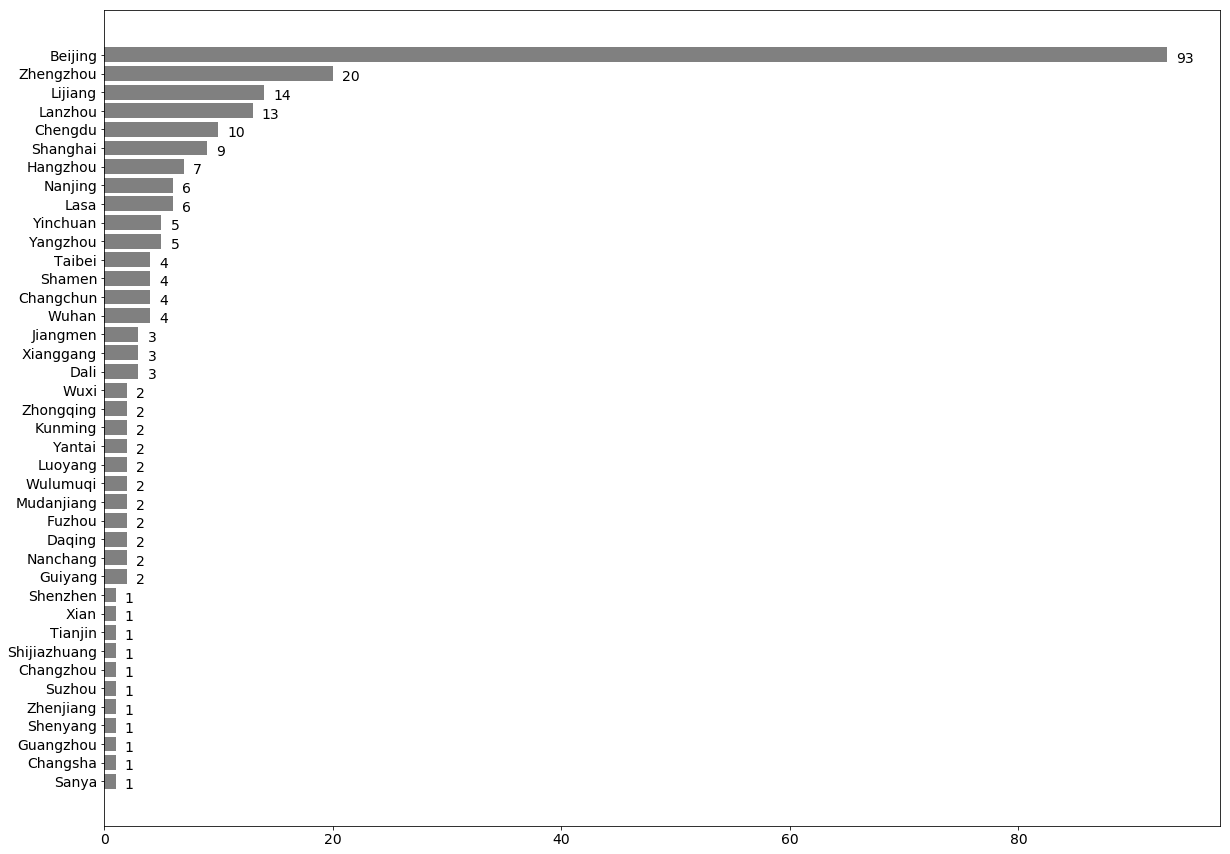

In [6]:
with open('statistic/words.txt', 'r' ,encoding='utf-8') as f:
    city = [w.strip() for w in f.readlines() if bool(w.strip()) and w.strip() in city_list]
total_num = len(set(city))
cnt = Counter(city)
coms, nums = tuple(map(np.asarray, zip(*[pair for pair in cnt.most_common(total_num)])))
lats, lons, prvn = zip(*[city_map[c] for c in coms])
coms = list(map(convert2pinyin, coms))
main_num = np.sum(np.asarray(nums)>=5)
def autolabel(rects):
    for rect in rects:
        width = rect.get_width()
        plt.text(width+0.8, rect.get_y(), '{}'.format(width),fontsize=14)
plt.figure(figsize=(20,15))
a=plt.barh(range(len(coms)),nums[::-1],color='gray',tick_label=coms[::-1])
autolabel(a)
plt.yticks(fontsize=14)
plt.xticks(fontsize=14)
plt.show()

  limb = ax.axesPatch

2018-06-08 10:41:31 [py.warnings] WARNING: /usr/local/lib/python3.6/site-packages/mpl_toolkits/basemap/__init__.py:1698: MatplotlibDeprecationWarning: The axesPatch function was deprecated in version 2.1. Use Axes.patch instead.
  limb = ax.axesPatch

  b = ax.ishold()

2018-06-08 10:41:35 [py.warnings] WARNING: /usr/local/lib/python3.6/site-packages/mpl_toolkits/basemap/__init__.py:3222: MatplotlibDeprecationWarning: The ishold function was deprecated in version 2.0.
  b = ax.ishold()

    See the API Changes document (http://matplotlib.org/api/api_changes.html)
    for more details.
  ax.hold(b)

2018-06-08 10:41:35 [py.warnings] WARNING: /usr/local/lib/python3.6/site-packages/mpl_toolkits/basemap/__init__.py:3231: MatplotlibDeprecationWarning: axes.hold is deprecated.
    See the API Changes document (http://matplotlib.org/api/api_changes.html)
    for more details.
  ax.hold(b)



Text(0.5,1,'City Hit')

DEBUG:matplotlib.font_manager:findfont: Matching :family=sans-serif:style=normal:variant=normal:weight=normal:stretch=normal:size=20.0 to DejaVu Sans ('/usr/local/lib/python3.6/site-packages/matplotlib/mpl-data/fonts/ttf/DejaVuSans.ttf') with score of 0.050000
2018-06-08 10:41:36 [matplotlib.font_manager] DEBUG: findfont: Matching :family=sans-serif:style=normal:variant=normal:weight=normal:stretch=normal:size=20.0 to DejaVu Sans ('/usr/local/lib/python3.6/site-packages/matplotlib/mpl-data/fonts/ttf/DejaVuSans.ttf') with score of 0.050000


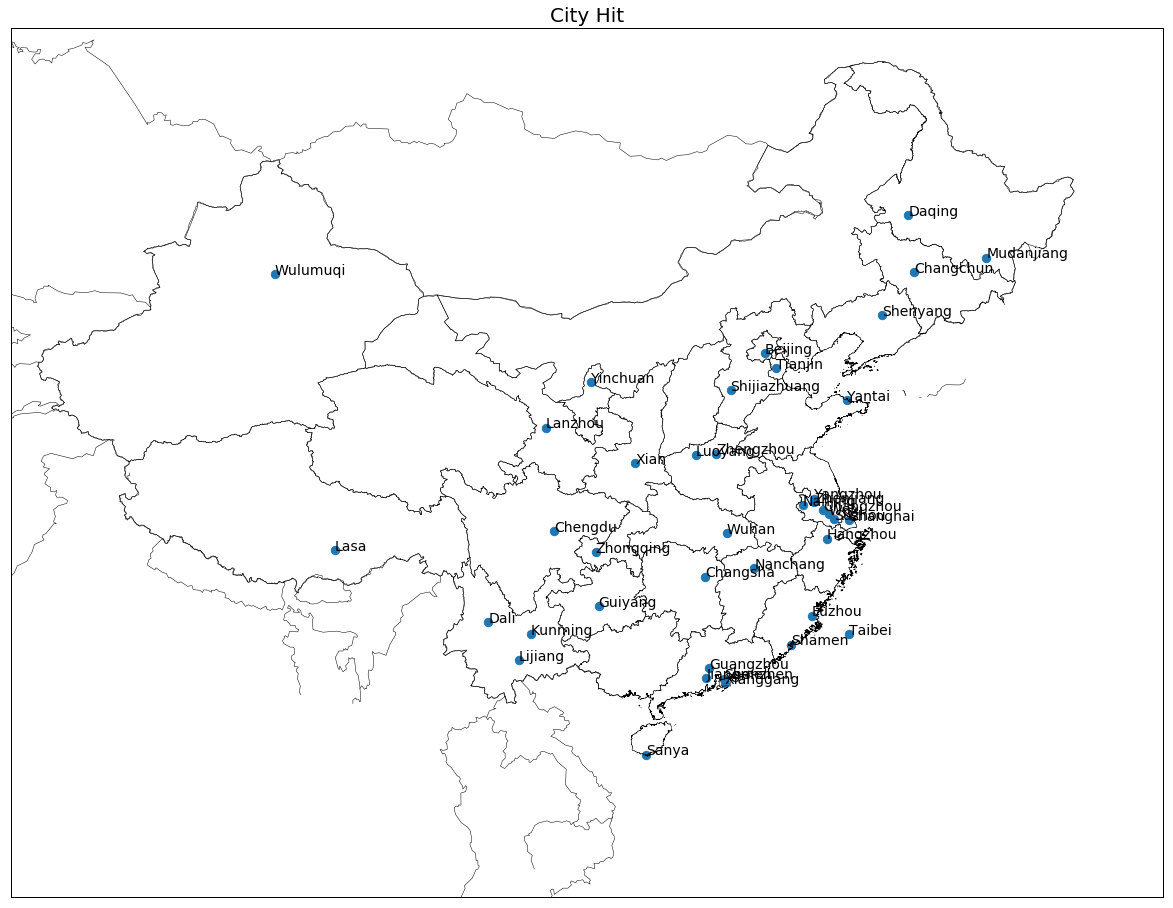

In [7]:
from mpl_toolkits.basemap import Basemap
from matplotlib.patches import Polygon

fig = plt.figure(figsize=(20,20))
ax1 = fig.add_axes([0.1,0.1,0.8,0.8])
my_map = Basemap(projection='mill',
            llcrnrlat = 10,
            llcrnrlon = 72,
            urcrnrlat = 55,
            urcrnrlon = 140,
            resolution='l',area_thresh=10000)
my_map.drawmapboundary(fill_color='white')
my_map.readshapefile("config/CHN_adm_shp/CHN_adm1",'states',drawbounds=True)
my_map.drawcountries()
x,y = my_map(lons,lats)
my_map.scatter(x,y,s=70)
for i, j, c in zip(x, y, coms):
    plt.text(i, j, c, size = 14, color = "black")
plt.title('City Hit', fontsize = 20)


  limb = ax.axesPatch

2018-06-08 10:41:40 [py.warnings] WARNING: /usr/local/lib/python3.6/site-packages/mpl_toolkits/basemap/__init__.py:1698: MatplotlibDeprecationWarning: The axesPatch function was deprecated in version 2.1. Use Axes.patch instead.
  limb = ax.axesPatch



Text(0.5,1,'Area Hit')

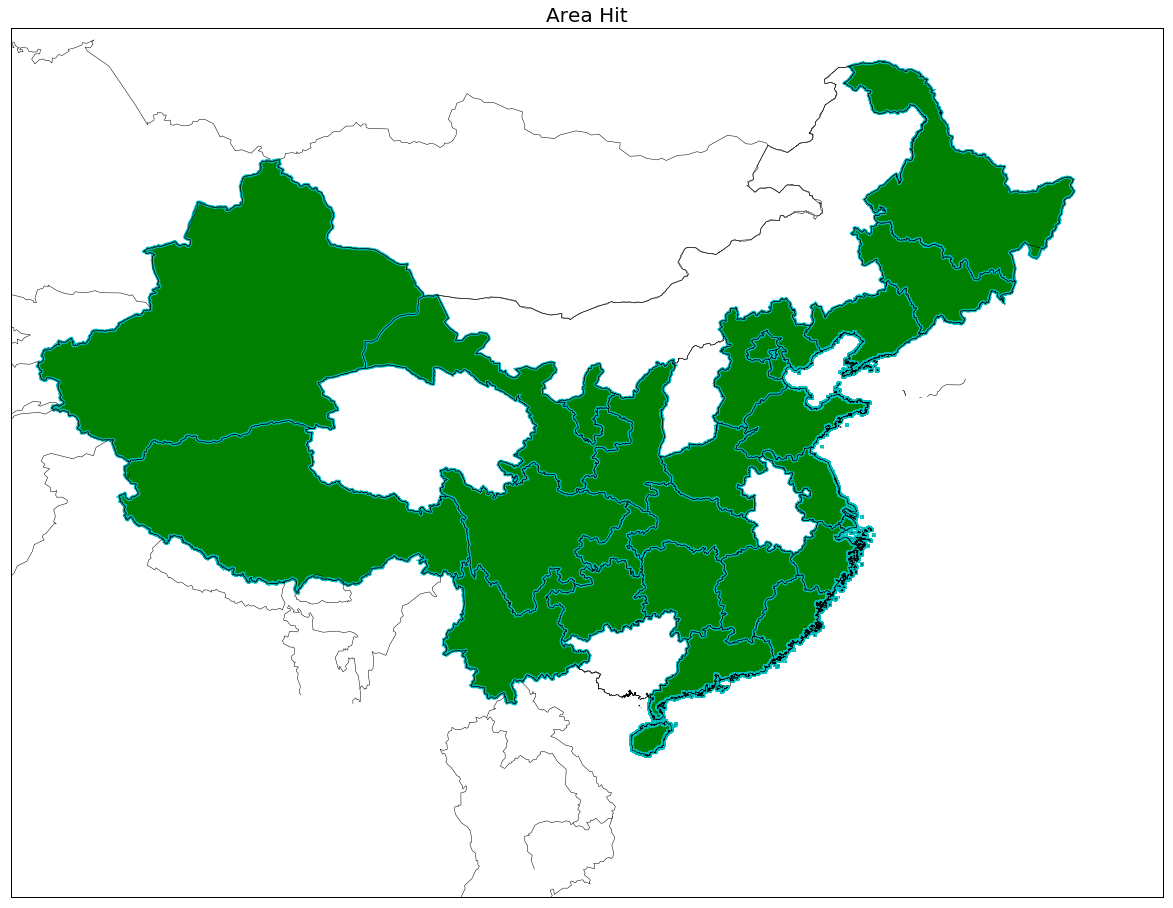

In [8]:
from mpl_toolkits.basemap import Basemap
from matplotlib.patches import Polygon

fig = plt.figure(figsize=(20,20))
ax1 = fig.add_axes([0.1,0.1,0.8,0.8])
size = np.ones_like(lons)
# my_map = Basemap(llcrnrlon=70, llcrnrlat=5, #min longitude (llcrnrlon) and latitude (llcrnrlat)
#             urcrnrlon=140, urcrnrlat=50) #max longitude (urcrnrlon) and latitude (urcrnrlat)
my_map = Basemap(projection='mill',
            llcrnrlat = 10,
            llcrnrlon = 72,
            urcrnrlat = 55,
            urcrnrlon = 140,
            resolution='l',area_thresh=10000)
my_map.drawmapboundary(fill_color='white')
my_map.readshapefile("config/CHN_adm_shp/CHN_adm1",'states',drawbounds=True)
my_map.drawcountries()

for info, shp in zip(my_map.states_info, my_map.states):
    proid = info['NAME_1']  # 可以用notepad打开CHN_adm1.csv文件，可以知道'NAME_1'代表各省的名称
    if proid in prvn:
        poly = Polygon(shp,facecolor='g',edgecolor='c',lw=3)
        ax1.add_patch(poly)

plt.title('Area Hit', fontsize = 20)

# 热词分析：季节

陪你走过春夏秋冬，民谣都在唱哪个季节？


DEBUG:matplotlib.font_manager:findfont: Matching :family=sans-serif:style=normal:variant=normal:weight=normal:stretch=normal:size=10.0 to DejaVu Sans ('/usr/local/lib/python3.6/site-packages/matplotlib/mpl-data/fonts/ttf/DejaVuSans.ttf') with score of 0.050000
2018-06-08 10:42:06 [matplotlib.font_manager] DEBUG: findfont: Matching :family=sans-serif:style=normal:variant=normal:weight=normal:stretch=normal:size=10.0 to DejaVu Sans ('/usr/local/lib/python3.6/site-packages/matplotlib/mpl-data/fonts/ttf/DejaVuSans.ttf') with score of 0.050000


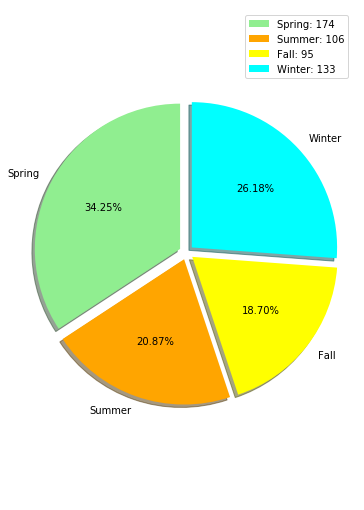

In [9]:
# 统计季节
seasons = {'Spring':0, 'Summer':0, 'Fall':0, 'Winter':0}
with open('statistic/words.txt', 'r' ,encoding='utf-8') as f:
    for w in f.readlines():
        if bool(w.strip()):
            if w.strip() in ['春季', '春天', '春']:
                seasons['Spring'] += 1
            if w.strip() in ['夏季', '夏天', '夏']:
                seasons['Summer'] += 1
            if w.strip() in ['秋季', '秋天', '秋']:
                seasons['Fall'] += 1
            if w.strip() in ['冬季', '冬天', '冬']:
                seasons['Winter'] += 1

plt.figure(figsize=(6,9))
labels = ['Spring','Summer','Fall','Winter']
sizes = [seasons['Spring'],seasons['Summer'],seasons['Fall'],seasons['Winter']]
colors = ['lightgreen','orange','yellow','cyan']
explode = (0.05,0.05,0.05,0.05)
patches,text1,text2 = plt.pie(sizes,
                      explode=explode,
                      labels=labels,
                      colors=colors,
                      autopct = '%3.2f%%',
                      textprops = {'fontsize':10, 'color':'k'},
                      shadow = True,
                      startangle =90,
                      pctdistance = 0.6) 
plt.legend(patches, [l+': '+str(sizes[i]) for i, l in enumerate(labels)], loc="best")
plt.axis('equal')
plt.show()

In [10]:
# 加载停词表
with open('./config/stopwords.txt', 'r', encoding='utf-8') as f:
    stopword = [line.strip() for line in f.readlines() if bool(line.strip())]
    stopword.append(' ')
from vec_ballad.utils import get_most_common_words

## 民谣画像：词频

利用词频可以对全局的民谣歌词进行初步画像，看看，民谣是否是“青春”“姑娘”“流浪”“北方”的组合呢？

In [11]:
words, counts, freq = get_most_common_words('statistic/words.txt', 20, stopword=stopword)
print('词\t计数\t频率')
for w, c, freq in zip(words, counts, freq):
    print(w+'\t'+str(c)+'\t'+'{:.2f}%'.format(freq*100))

词	计数	频率
爱	769	0.69%
世界	486	0.44%
生活	432	0.39%
时间	354	0.32%
离开	332	0.30%
永远	321	0.29%
快乐	311	0.28%
唱	306	0.28%
梦	297	0.27%
地方	279	0.25%
姑娘	274	0.25%
听	271	0.24%
城市	270	0.24%
再见	262	0.24%
妈妈	249	0.22%
也许	245	0.22%
天空	240	0.22%
时光	240	0.22%
明天	238	0.21%
青春	223	0.20%


### 谢春花
#### 自然语言画像
+ 清新文艺风
+ 诗意盎然
<img src="figures/谢春花.jpg" width = "600" align=center />
#### 机器画像
top词频画像(离散)如下：

In [12]:
words, counts, freq = get_most_common_words('statistic/谢春花/words.txt', 20, stopword=stopword)
print('词\t计数\t频率')
for w, c, freq in zip(words, counts, freq):
    print(w+'\t'+str(c)+'\t'+'{:.2f}%'.format(freq*100))

词	计数	频率
听见	16	0.69%
树	15	0.64%
遇见	14	0.60%
开	12	0.52%
相见	11	0.47%
春天	10	0.43%
明天	9	0.39%
誓言	9	0.39%
白色	9	0.39%
不用	9	0.39%
崖	9	0.39%
跌落	9	0.39%
不想	9	0.39%
干	9	0.39%
梦	8	0.34%
喜欢	8	0.34%
想要	8	0.34%
我要	8	0.34%
不知	8	0.34%
记得	8	0.34%


### 陈粒
#### 自然语言画像
+ 洒脱而深情
+ 若即若离
+ 禅
<img src="figures/陈粒.jpg" width = "400" align=center />
#### 机器画像
top词频画像(离散)如下：

In [13]:
words, counts, freq = get_most_common_words('statistic/陈粒/words.txt', 20, stopword=stopword)
print('词\t计数\t频率')
for w, c, freq in zip(words, counts, freq):
    print(w+'\t'+str(c)+'\t'+'{:.2f}%'.format(freq*100))

词	计数	频率
世界	19	0.54%
爱	18	0.51%
永不	17	0.48%
飞	14	0.39%
爱若	14	0.39%
浪漫	12	0.34%
时间	12	0.34%
纵容	12	0.34%
笑	11	0.31%
住	10	0.28%
美丽	10	0.28%
路	10	0.28%
醒	10	0.28%
喜欢	10	0.28%
任由	10	0.28%
占有	10	0.28%
沉默	9	0.25%
快乐	9	0.25%
离开	9	0.25%
终于	9	0.25%


### 花粥
#### 自然语言画像
+ 风格随意、任性
+ 自然流露
+ 市井气、流氓气
<img src="figures/花粥.jpg" width = "400" align=center />
#### 机器画像
top词频画像(离散)如下：

In [14]:
words, counts, freq = get_most_common_words('statistic/花粥/words.txt', 20, stopword=stopword)
print('词\t计数\t频率')
for w, c, freq in zip(words, counts, freq):
    print(w+'\t'+str(c)+'\t'+'{:.2f}%'.format(freq*100))

词	计数	频率
撸	62	1.96%
嗒	48	1.52%
喵	24	0.76%
笑	23	0.73%
钱	20	0.63%
生活	17	0.54%
世界	17	0.54%
喜欢	16	0.51%
妈妈	16	0.51%
真的	16	0.51%
温柔	15	0.47%
北方	14	0.44%
美丽	14	0.44%
姑娘	14	0.44%
也许	13	0.41%
爱	13	0.41%
身旁	13	0.41%
看着	12	0.38%
只能	12	0.38%
这是	12	0.38%


### 小结
词频画像**优点**：
+ 简单、效率高
+ 可以一定程度描述歌手画像
+ 和自然语言（人类经验）描述的画像有一定重合度

**缺点**
+ 词频简单地用极大值来概括（max-pooling）歌手风格，不能反映总体风格
+ 易受噪声影响

### 噪声示例
噪声如何影响最大值，如在描述花粥的词频画像时：

<img src="figures/noise_sample.png" width = "1000" align=center />

In [16]:
import gensim
from vec_ballad.word2vec import *

# 训练词向量，需要一定时间，四线程i5大概1分钟
# train_word2vec('./', workers=4)
# 加载预训练的词模型
model = gensim.models.KeyedVectors.load_word2vec_format('./checkpoint/ballad.vec')

INFO:gensim.models.utils_any2vec:loading projection weights from ./checkpoint/ballad.vec
2018-06-08 10:44:25 [gensim.models.utils_any2vec] INFO: loading projection weights from ./checkpoint/ballad.vec
DEBUG:smart_open.smart_open_lib:{'kw': {}, 'mode': 'rb', 'uri': './checkpoint/ballad.vec'}
2018-06-08 10:44:25 [smart_open.smart_open_lib] DEBUG: {'kw': {}, 'mode': 'rb', 'uri': './checkpoint/ballad.vec'}
DEBUG:smart_open.smart_open_lib:encoding_wrapper: {'errors': 'strict', 'encoding': None, 'mode': 'rb', 'fileobj': <_io.BufferedReader name='./checkpoint/ballad.vec'>}
2018-06-08 10:44:25 [smart_open.smart_open_lib] DEBUG: encoding_wrapper: {'errors': 'strict', 'encoding': None, 'mode': 'rb', 'fileobj': <_io.BufferedReader name='./checkpoint/ballad.vec'>}
INFO:gensim.models.utils_any2vec:loaded (4973, 256) matrix from ./checkpoint/ballad.vec
2018-06-08 10:44:27 [gensim.models.utils_any2vec] INFO: loaded (4973, 256) matrix from ./checkpoint/ballad.vec


In [17]:
words, alike = discripe(model, 'statistic/谢春花/sequences.txt', topn=10, stopword=stopword)

print('描述\t相似性')
for w, l in zip(words, alike):
    print(w+'\t'+'{:.4f}'.format(l))

描述	相似性
斗酒	0.5302
迈	0.5231
缓步	0.5162
陡	0.5022
羁绊	0.4892
平生	0.4746
诉	0.4734
儿女情长	0.4663
愁摩愁	0.4632
知是	0.4570


In [18]:
words, alike = discripe(model, 'statistic/陈粒/sequences.txt', topn=10, stopword=stopword)

print('描述\t相似性')
for w, l in zip(words, alike):
    print(w+'\t'+'{:.4f}'.format(l))

描述	相似性
欢脱	0.4542
倾翻	0.4473
果断	0.4235
心软	0.4202
纵容	0.3873
死心	0.3747
玩弄着	0.3697
肆无忌惮	0.3655
空洞	0.3618
大胆	0.3611


In [19]:
words, alike = discripe(model, 'statistic/花粥/sequences.txt', topn=10, stopword=stopword)

print('描述\t相似性')
for w, l in zip(words, alike):
    print(w+'\t'+'{:.4f}'.format(l))

描述	相似性
撸	0.4232
本事	0.3571
钱	0.3415
身旁	0.3360
天下	0.2977
独特	0.2958
笑	0.2888
嗒	0.2624
房	0.2611
习惯	0.2456


那么，计算整个民谣词空间的平均向量，能得到什么结果呢？

In [20]:
words, alike = discripe(model, 'statistic/sequences.txt', topn=10, stopword=stopword)

print('描述\t相似性')
for w, l in zip(words, alike):
    print(w+'\t'+'{:.4f}'.format(l))

描述	相似性
小手	0.3324
馅饼	0.3010
炙热	0.3007
香味儿	0.2972
西班牙	0.2921
急促	0.2871
稻草人	0.2819
西窗	0.2719
大雪纷飞	0.2613
布谷	0.2581


虽然这些结果呈现的词汇我们无法得知是从何而来，但从中可以看出，“馅饼”“小手”“香味”“稻草人”这些都是具体的意向，
表达了民谣歌手一定程度上的情感流露。

### 歌手相似性
虽然同为民谣歌手，但每个人风格也是不同的。我们可以利用歌手的平均词向量来代表歌手风格，从而其与其他歌手（或民谣平均风格）计算相似性。

#### 谁最接近平均水平？
如何向一位没有听过民谣的朋友推荐歌手呢？这里找了10位比较出名的民谣歌手。我的建议是推荐一个最为接近平均水平的歌手。

In [21]:
# 计算歌手向量及平均向量
select = ['谢春花','陈粒','花粥','房东的猫','好妹妹','赵雷','宋冬野','马頔','陈鸿宇','朴树']
vecs = []

for s in select:
    file = 'statistic/'+s+'/sequences.txt'
    with open(file, 'r', encoding='utf-8') as f:
        seq = [line.strip().split(' ') for line in f.readlines() if bool(line.strip())]
        vecs.append(get_mean_embed(model, seq, stopword=stopword))
vecs = np.asarray(vecs)

with open('statistic/sequences.txt', 'r', encoding='utf-8') as f:
    global_seq = [line.strip().split(' ') for line in f.readlines() if bool(line.strip())]
global_mean_vec = get_mean_embed(model, global_seq, stopword=stopword)

In [22]:
# 计算全歌曲平均词向量以及每个歌手平均词向量
global_list = [s for s in os.listdir('songs/') if s[0] != '.']
global_vec = []
for s in global_list:
    if s[0] != '.':
        file = 'statistic/'+s+'/sequences.txt'
        with open(file, 'r', encoding='utf-8') as f:
            seq = [line.strip().split(' ') for line in f.readlines() if bool(line.strip())]
            global_vec.append(get_mean_embed(model, seq, stopword=stopword))
global_vec = np.asarray(global_vec)
sim_mat = np.sum(global_vec*global_mean_vec, axis=1)/np.linalg.norm(global_vec, axis=1)/np.linalg.norm(global_mean_vec)
sort_idx = np.argsort(-sim_mat)
print('歌手\t\t与平均水平相似度')
for i, s in zip(sort_idx, sim_mat[sort_idx]):
    print(global_list[i]+'\t\t'+'{:.4f}'.format(s))

歌手		与平均水平相似度
蒋明		0.7376
好妹妹		0.6868
张希		0.6797
房东的猫		0.6767
赵照		0.6667
纣王老胡		0.6645
程璧		0.6580
赵雷		0.6560
朴树		0.6489
李健		0.5870
夏小虎		0.5869
鹿先森乐队		0.5835
宋冬野		0.5781
李志		0.5704
刘昰		0.5664
洪启		0.5584
马頔		0.5546
花粥		0.5490
小安		0.5457
李晋		0.5367
牛奶咖啡		0.5331
达达		0.5283
Jam		0.5271
谢春花		0.5262
万晓利		0.5231
郝云		0.5186
老四叔		0.5112
腰乐队		0.5087
丢火车		0.5063
陈绮贞		0.5038
陈粒		0.4993
倪健		0.4881
野孩子		0.4808
安来宁		0.4750
刘昊霖		0.4715
逃跑计划		0.4192
陈鸿宇		0.4140
杨力		0.4111
苏阳		0.3964
尧十三		0.3942
张悬		0.3849
李宗盛		0.3587
贰佰		0.3502
丝袜小姐		0.3309
白安		0.2926


画出选出的10个歌手之间的相似矩阵。注意到能代表平均水平的歌手如：好妹妹、朴树、赵雷，他们的色彩块对于每个其他歌手接近一致；而与平均格格不入的歌手：陈粒、陈鸿宇则“色彩斑斓”

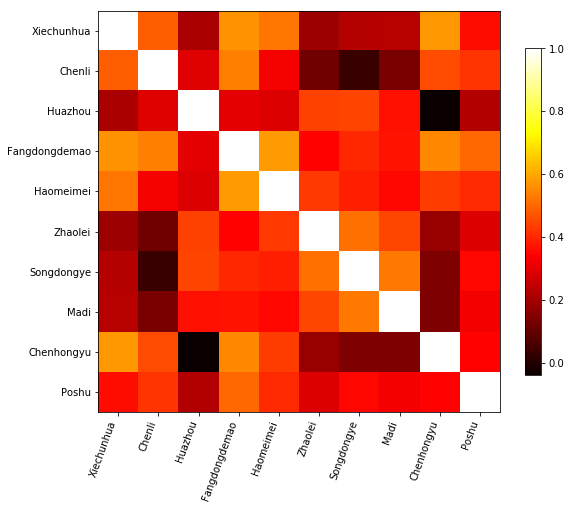

In [23]:
norms = np.sqrt(np.sum(vecs*vecs, axis=1))
sims = np.dot(vecs, vecs.T)/np.dot(norms[:, np.newaxis], norms[np.newaxis, :])
fig = plt.figure(figsize=(9,12))  
ax = fig.add_subplot(111)
im = ax.imshow(sims, cmap=plt.get_cmap('hot'))  
plt.colorbar(im, shrink=0.5)  
plt.xticks(range(len(select)), list(map(convert2pinyin, select)))
plt.setp(ax.get_xticklabels(), rotation=70, horizontalalignment='right')
plt.yticks(range(len(select)), list(map(convert2pinyin, select)))
plt.show()

# 总结：
## 内容总结
+ 民谣歌手最爱唱北京，但长三角的城市也较为集中。可能前者具有天生具备的“漂泊感”，而长三角区则为温婉文艺的“化身”
+ 民谣最爱唱春季，大概是因为这是一个易发感慨的季节。
+ 虽然从词频上统计，民谣大量使用“姑娘”“青春””梦““城市”，但从平均寓意分析，则被抽象为若干”不可理解“的具体意象，大概是民谣歌手的感情归宿。
+ 通过分析向量，得到更接近自然认知的结果，并且可以进行相应的数值分析

## 方法总结
+ 通过向量化的方式，我们可以将抽象的东西具体化，虽然这种数字化的形式不能被人类理解，但我们仍旧可以用此进行相关的分析
+ 机器语言与自然语言存在“语意鸿沟”，但这种“鸿沟”不妨碍各自独立地进行分析和理解。